# Introduction to Human Activity Recognition

Here we will explore some common ways of preprocessing human activity recognition data.

Using the example data we will learn:
* how to merge multiple files into one large DataFrame
* how to split data into sliding windows
* how to quickly extract features from a window
* how to set the number of classes considered for classification
* how to build a simple Random Forest Classifier and train it on HAR data
* how to build a simple CNN and train it on HAR data 

Bear in mind that the sample data offered is not cleaned or high quality. You should not use it in your own experiments but it is useful for this tutorial.

You will need the following packages: 
* tsfresh
* scikit-learn
* tensorflow

## Current Model Note for cw3 

#### Basic imports

In [1]:
import pandas as pd
import numpy as np
import tsfresh
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf

import os

import matplotlib.pyplot as plt

# keras goodies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv1D, Dropout, MaxPooling1D, BatchNormalization, LSTM, TimeDistributed
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras import metrics as kmetrics
import tensorflow.keras.backend as K


import seaborn as sns


## Loading multiple files into one large DataFrame

At this stage you should only be working with clean data, saved in the format required for Coursework 1. An example of such data can be found in the Data/Clean/ folder.

In [2]:
# DEPRECATED: New clean file was generated, which we will be used from now on
base_df_old = pd.DataFrame()

clean_data_folder = "../pdiot-data/2021"

for sUNN_folder in os.listdir(clean_data_folder):
    path_directory = clean_data_folder+"/"+sUNN_folder
    if os.path.isdir(path_directory):
        print(sUNN_folder)
        for filename in os.listdir(path_directory):
            try:
                    if filename.find('Falling') != -1:
                        full_path = f"{clean_data_folder}/{sUNN_folder}/{filename}"

                        print(full_path)

                        # load data into a DataFrame
                        new_df = pd.read_csv(full_path)
    #                     print(new_df)

                        # merge into the base DataFrame
                        base_df_old = pd.concat([base_df_old, new_df])
            except Exception as e:
                print(e)
    else:
        print(sUNN_folder + " is not a directory")


README.md is not a directory
Respeck_recordings_clean.csv is not a directory
Thingy_recordings_clean.csv is not a directory
s1541031
../pdiot-data/2021/s1541031/Respeck_s1541031_Falling on knees_06-10-2021_15-48-40.csv.csv
../pdiot-data/2021/s1541031/Respeck_s1541031_Falling on the back_06-10-2021_15-55-24.csv.csv
../pdiot-data/2021/s1541031/Respeck_s1541031_Falling on the left_06-10-2021_16-04-18.csv.csv
../pdiot-data/2021/s1541031/Respeck_s1541031_Falling on the right_06-10-2021_16-10-42.csv.csv
../pdiot-data/2021/s1541031/Thingy_s1541031_Falling on knees_06-10-2021_16-24-12.csv.csv
../pdiot-data/2021/s1541031/Thingy_s1541031_Falling on the back_06-10-2021_16-27-23.csv.csv
../pdiot-data/2021/s1541031/Thingy_s1541031_Falling on the left_06-10-2021_16-40-12.csv.csv
../pdiot-data/2021/s1541031/Thingy_s1541031_Falling on the right_06-10-2021_16-35-31.csv.csv
s1813106
../pdiot-data/2021/s1813106/Respeck_s1813106_Falling on knees_07-10-2021_12-17-42.csv
../pdiot-data/2021/s1813106/Respeck_

../pdiot-data/2021/s1757177/Thingy_s1757177_Falling on knees_06-10-2021_08-32-51.csv
../pdiot-data/2021/s1757177/Thingy_s1757177_Falling on the back_06-10-2021_08-27-51.csv
../pdiot-data/2021/s1757177/Thingy_s1757177_Falling on the left_02-10-2021_20-12-47.csv
../pdiot-data/2021/s1757177/Thingy_s1757177_Falling on the right_02-10-2021_20-14-46.csv
s1761322
../pdiot-data/2021/s1761322/Respeck_s1761322_Falling on knees_27-09-2021_11-13-39.csv
../pdiot-data/2021/s1761322/Respeck_s1761322_Falling on the back_06-10-2021_12-56-05.csv
../pdiot-data/2021/s1761322/Respeck_s1761322_Falling on the left_06-10-2021_12-59-21.csv
../pdiot-data/2021/s1761322/Respeck_s1761322_Falling on the right_06-10-2021_12-53-23.csv
../pdiot-data/2021/s1761322/Thingy_s1761322_Falling on knees_27-09-2021_11-25-14.csv
../pdiot-data/2021/s1761322/Thingy_s1761322_Falling on the back_27-09-2021_11-53-29.csv
../pdiot-data/2021/s1761322/Thingy_s1761322_Falling on the left_27-09-2021_11-38-48.csv
../pdiot-data/2021/s176132

../pdiot-data/2021/s1850642/Thingy_s1850642_Falling on the right_06-10-2021_12-13-04.csv
s1864705
../pdiot-data/2021/s1864705/Respeck_s1864705_Falling on knees_06-10-2021_23-05-06.csv
../pdiot-data/2021/s1864705/Respeck_s1864705_Falling on the back_07-10-2021_16-24-29.csv
../pdiot-data/2021/s1864705/Respeck_s1864705_Falling on the left_06-10-2021_23-14-06.csv
../pdiot-data/2021/s1864705/Respeck_s1864705_Falling on the right_06-10-2021_23-21-35.csv
../pdiot-data/2021/s1864705/Thingy_s1864705_Falling on knees_06-10-2021_23-05-05.csv
../pdiot-data/2021/s1864705/Thingy_s1864705_Falling on the back_06-10-2021_23-41-00.csv
../pdiot-data/2021/s1864705/Thingy_s1864705_Falling on the left_06-10-2021_23-14-05.csv
../pdiot-data/2021/s1864705/Thingy_s1864705_Falling on the right_06-10-2021_23-21-34.csv
s1865890
../pdiot-data/2021/s1865890/Respeck_s1865890_Falling on knees_05-10-2021_18-38-24.csv
../pdiot-data/2021/s1865890/Respeck_s1865890_Falling on the back_05-10-2021_18-34-13.csv
../pdiot-data/

../pdiot-data/2021/s2171931/Respeck_s2171931_Falling on the right_04-10-2021_16-13-54.csv
../pdiot-data/2021/s2171931/Thingy_s2171931_Falling on knees_04-10-2021_15-31-57.csv
../pdiot-data/2021/s2171931/Thingy_s2171931_Falling on the back_04-10-2021_15-39-04.csv
../pdiot-data/2021/s2171931/Thingy_s2171931_Falling on the left_04-10-2021_15-34-36.csv
../pdiot-data/2021/s2171931/Thingy_s2171931_Falling on the right_04-10-2021_15-36-53.csv
s2173036
../pdiot-data/2021/s2173036/Respeck_s2173036_Falling on knees_06-10-2021_13-39-32.csv
../pdiot-data/2021/s2173036/Respeck_s2173036_Falling on the back_06-10-2021_14-14-11.csv
../pdiot-data/2021/s2173036/Respeck_s2173036_Falling on the left_06-10-2021_14-07-09.csv
../pdiot-data/2021/s2173036/Respeck_s2173036_Falling on the right_06-10-2021_14-10-39.csv
../pdiot-data/2021/s2173036/Thingy_s2173036_Falling on knees_06-10-2021_13-40-48.csv
../pdiot-data/2021/s2173036/Thingy_s2173036_Falling on the back_06-10-2021_14-14-12.csv
../pdiot-data/2021/s2173

In [6]:
#Trying out merging old falling data with clean data
base_df_old = base_df_old[base_df_old['sensor_type'] == 'Respeck'] 
falling_activities= ['Falling on knees', 'Falling on the back', 'Falling on the left', 'Falling on the right']
for act in falling_activities:
    base_df = remove_activity_label(base_df,act)

base_df = pd.concat([base_df,base_df_old])

In [16]:
#Load Clean Thingy Recording to base_df
clean_data_folder = "../pdiot-data/2021/Thingy_recordings_clean.csv"
base_df_thingy = pd.read_csv(clean_data_folder)
base_df_thingy = base_df_thingy.rename(columns={"accel_x":"accel_x_thingy","accel_y":"accel_y_thingy","accel_z":"accel_z_thingy",
                                               "gyro_x":"gyro_x_thingy", "gyro_y":"gyro_y_thingy","gyro_z":"gyro_z_thingy"})

base_df = base_df.join(base_df_thingy)

ValueError: columns overlap but no suffix specified: Index(['timestamp', 'sensor_type', 'activity_type', 'activity_code',
       'subject_id', 'notes', 'recording_id'],
      dtype='object')

In [55]:
base_df

timestamp   accel_x   accel_y   accel_z     gyro_x     gyro_y  \
481937  1.633532e+12 -0.282471 -0.904602  0.451111   9.078125  39.078125   
481938  1.633532e+12  0.222656 -1.020081  0.120544   2.484375 -14.640625   
481939  1.633532e+12  0.327393 -0.915344  0.309509   8.984375  13.265625   
481940  1.633532e+12  0.093994 -0.904846  0.152771  11.281250   2.062500   
481941  1.633532e+12  0.211426 -0.992737  0.173279  -1.828125   2.546875   
...              ...       ...       ...       ...        ...        ...   
472824  1.633546e+12 -0.255127 -0.813293  0.309509   4.734375   1.687500   
472825  1.633546e+12 -0.234131 -0.831848  0.329041   2.593750  -2.609375   
472826  1.633546e+12 -0.311279 -0.873352  0.339539   4.359375  -3.515625   
472827  1.633546e+12 -0.286621 -0.866272  0.353455   4.859375  -0.125000   
472828  1.633546e+12 -0.274414 -0.892883  0.380798   1.484375  -2.187500   

           gyro_z sensor_type            activity_type  activity_code  \
481937  -8.875000     Respeck        Falling (Grouped)           48.0   
481938   9.515625     Respeck        Falling (Grouped)           48.0   
481939  -0.156250     Respeck        Falling (Grouped)           48.0   
481940   0.390625     Respeck        Falling (Grouped)           48.0   
481941   3.453125     Respeck        Falling (Grouped)           48.0   
...           ...         ...                      ...            ...   
472824   9.265625     Respeck  Walking at normal speed            1.0   
472825  11.421875     Respeck  Walking at normal speed            1.0   
472826   7.437500     Respeck  Walking at normal speed            1.0   
472827   3.484375     Respeck  Walking at normal speed            1.0   
472828   6.203125     Respeck  Walking at normal speed            1.0   

       subject_id notes                                       recording_id  \
481937   s1541031   1.0  Respeck_s1541031_Falling on knees_06-10-2021_1...   
481938   s1541031   1.0  Respeck_s1541031_Falling on knees_06-10-2021_1...   
481939   s1541031   1.0  Respeck_s1541031_Falling on knees_06-10-2021_1...   
481940   s1541031   1.0  Respeck_s1541031_Falling on knees_06-10-2021_1...   
481941   s1541031   1.0  Respeck_s1541031_Falling on knees_06-10-2021_1...   
...           ...   ...                                                ...   
472824   s2211228   NaN  Respeck_s2211228_Walking at normal speed_06-10...   
472825   s2211228   NaN  Respeck_s2211228_Walking at normal speed_06-10...   
472826   s2211228   NaN  Respeck_s2211228_Walking at normal speed_06-10...   
472827   s2211228   NaN  Respeck_s2211228_Walking at normal speed_06-10...   
472828   s2211228   NaN  Respeck_s2211228_Walking at normal speed_06-10...   

        mag_x  mag_y  mag_z  
481937    NaN    NaN    NaN  
481938    NaN    NaN    NaN  
481939    NaN    NaN    NaN  
481940    NaN    NaN    NaN  
481941    NaN    NaN    NaN  
...       ...    ...    ...  
472824    NaN    NaN    NaN  
472825    NaN    NaN    NaN  
472826    NaN    NaN    NaN  
472827    NaN    NaN    NaN  
472828    NaN    NaN    NaN  

[491024 rows x 16 columns]

In [11]:
base_df_thingy

timestamp  accel_x_thingy  accel_y_thingy  accel_z_thingy  \
0       1632912509851        0.020508        0.293945       -0.967773   
1       1632912509886        0.027344        0.287109       -0.971680   
2       1632912509910        0.023438        0.295898       -0.980469   
3       1632912509972        0.011719        0.287109       -0.981445   
4       1632912510002        0.020508        0.295898       -0.976562   
...               ...             ...             ...             ...   
488470  1633561049240       -0.121094       -0.396484       -0.922852   
488471  1633561049285       -0.126953       -0.395508       -0.931641   
488472  1633561049329       -0.112305       -0.399414       -0.924805   
488473  1633561049351       -0.124023       -0.399414       -0.924805   
488474  1633561049396       -0.125977       -0.403320       -0.919922   

        gyro_x_thingy  gyro_y_thingy  gyro_z_thingy  mag_x  mag_y  mag_z  \
0            -0.21875        0.21875        0.09375    0.0    0.0    0.0   
1            -0.21875        0.15625       -0.03125    0.0    0.0    0.0   
2            -0.21875        0.15625        0.03125    0.0    0.0    0.0   
3            -0.03125        0.09375        0.09375    0.0    0.0    0.0   
4             0.15625        0.03125        0.09375    0.0    0.0    0.0   
...               ...            ...            ...    ...    ...    ...   
488470       -0.12500        0.00000        0.12500    0.0    0.0    0.0   
488471       -0.06250        0.00000       -0.12500    0.0    0.0    0.0   
488472        0.25000        0.12500       -0.12500    0.0    0.0    0.0   
488473        0.12500        0.25000        0.00000    0.0    0.0    0.0   
488474       -0.12500       -0.06250       -0.06250    0.0    0.0    0.0   

       sensor_type          activity_type  activity_code subject_id notes  \
0           Thingy  Lying down on stomach              8   s1870467   Rob   
1           Thingy  Lying down on stomach              8   s1870467   Rob   
2           Thingy  Lying down on stomach              8   s1870467   Rob   
3           Thingy  Lying down on stomach              8   s1870467   Rob   
4           Thingy  Lying down on stomach              8   s1870467   Rob   
...            ...                    ...            ...        ...   ...   
488470      Thingy       Lying down right              6   s2211228   NaN   
488471      Thingy       Lying down right              6   s2211228   NaN   
488472      Thingy       Lying down right              6   s2211228   NaN   
488473      Thingy       Lying down right              6   s2211228   NaN   
488474      Thingy       Lying down right              6   s2211228   NaN   

                                             recording_id  
0       Thingy_s1870467_Lying down on stomach_29-09-20...  
1       Thingy_s1870467_Lying down on stomach_29-09-20...  
2       Thingy_s1870467_Lying down on stomach_29-09-20...  
3       Thingy_s1870467_Lying down on stomach_29-09-20...  
4       Thingy_s1870467_Lying down on stomach_29-09-20...  
...                                                   ...  
488470  Thingy_s2211228_Lying down right_06-10-2021_23...  
488471  Thingy_s2211228_Lying down right_06-10-2021_23...  
488472  Thingy_s2211228_Lying down right_06-10-2021_23...  
488473  Thingy_s2211228_Lying down right_06-10-2021_23...  
488474  Thingy_s2211228_Lying down right_06-10-2021_23...  

[488475 rows x 16 columns]

In [180]:
print(set(base_df_old.subject_id.unique()) - set(base_df.subject_id.unique()))

set()


In [33]:
len(base_df_old.subject_id.unique())


45

In [34]:
len(base_df.subject_id.unique())

46

In [35]:
set(base_df.subject_id.unique()) - set(base_df_old.subject_id.unique())

{'s1893835'}

In [ ]:

for act in falling

In [32]:
base_df_old = base_df_old[base_df_old['sensor_type'] == 'Respeck'] 
base_df = base_df_old.copy()

In [3]:
#Load Clean Respeck Recording to base_df
clean_data_folder = "../pdiot-data/2021/Respeck_recordings_clean.csv"
base_df = pd.read_csv(clean_data_folder)

/afs/inf.ed.ac.uk/user/s18/s1870697/miniconda3/envs/pdiot/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
columns_of_interest_initial = ['accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z','subject_id','activity_code', 'activity_type','recording_id']
# columns_of_

In [7]:
base_df = base_df.dropna(subset=columns_of_interest_initial).reset_index(drop=True)



In [63]:
base_df

timestamp   accel_x   accel_y   accel_z     gyro_x     gyro_y  \
0       1.633516e+12  0.261475 -1.116516 -0.502991  -0.812500  12.312500   
1       1.633516e+12 -0.177734 -0.636292 -0.477600  -5.265625   2.953125   
2       1.633516e+12  0.351562 -0.879456 -0.335754   5.671875  24.656250   
3       1.633516e+12  0.298584 -1.253479 -0.299622  -3.609375   2.687500   
4       1.633516e+12  0.056152 -0.777405 -0.210754 -14.328125   5.421875   
...              ...       ...       ...       ...        ...        ...   
621166  1.633195e+12  0.832275 -0.545227  0.698425  14.250000  -6.109375   
621167  1.633195e+12  0.777588 -0.649719  0.831482  -4.484375  -1.828125   
621168  1.633195e+12  0.326904 -0.567932  0.676941 -14.734375   0.968750   
621169  1.633195e+12  0.362549 -0.493958  0.539001  -8.046875   1.687500   
621170  1.633195e+12  0.674805 -0.376770  0.674500  -1.296875   7.250000   

           gyro_z sensor_type         activity_type  activity_code subject_id  \
0       19.500000     Respeck       Climbing stairs           12.0   s1870467   
1       -9.281250     Respeck       Climbing stairs           12.0   s1870467   
2      -10.562500     Respeck       Climbing stairs           12.0   s1870467   
3        5.890625     Respeck       Climbing stairs           12.0   s1870467   
4        8.140625     Respeck       Climbing stairs           12.0   s1870467   
...           ...         ...                   ...            ...        ...   
621166  -1.203125     Respeck  Falling on the right           46.0   s2254050   
621167   0.875000     Respeck  Falling on the right           46.0   s2254050   
621168   4.765625     Respeck  Falling on the right           46.0   s2254050   
621169  -1.687500     Respeck  Falling on the right           46.0   s2254050   
621170   0.937500     Respeck  Falling on the right           46.0   s2254050   

       notes                                       recording_id  mag_x  mag_y  \
0        rob  Respeck_s1870467_Climbing stairs_06-10-2021_11...    NaN    NaN   
1        rob  Respeck_s1870467_Climbing stairs_06-10-2021_11...    NaN    NaN   
2        rob  Respeck_s1870467_Climbing stairs_06-10-2021_11...    NaN    NaN   
3        rob  Respeck_s1870467_Climbing stairs_06-10-2021_11...    NaN    NaN   
4        rob  Respeck_s1870467_Climbing stairs_06-10-2021_11...    NaN    NaN   
...      ...                                                ...    ...    ...   
621166   NaN  Respeck_s2254050_Falling on the right_02-10-20...    NaN    NaN   
621167   NaN  Respeck_s2254050_Falling on the right_02-10-20...    NaN    NaN   
621168   NaN  Respeck_s2254050_Falling on the right_02-10-20...    NaN    NaN   
621169   NaN  Respeck_s2254050_Falling on the right_02-10-20...    NaN    NaN   
621170   NaN  Respeck_s2254050_Falling on the right_02-10-20...    NaN    NaN   

        mag_z  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
...       ...  
621166    NaN  
621167    NaN  
621168    NaN  
621169    NaN  
621170    NaN  

[621171 rows x 16 columns]

In [14]:
for rid, group in base_df.groupby("subject_id"):
    print(f"The number of activities done by {rid} are: {len(group.activity_type.unique())}")
    print(group.activity_type.unique())


The number of activities done by s1541031 are: 5
['Falling (Grouped)' 'Lying (Grouped)' 'Running' 'Sitting/Standing'
 'Walking at normal speed']
The number of activities done by s1704145 are: 5
['Falling (Grouped)' 'Lying (Grouped)' 'Running' 'Sitting/Standing'
 'Walking at normal speed']
The number of activities done by s1706154 are: 5
['Falling (Grouped)' 'Lying (Grouped)' 'Running' 'Sitting/Standing'
 'Walking at normal speed']
The number of activities done by s1711661 are: 5
['Falling (Grouped)' 'Lying (Grouped)' 'Running' 'Sitting/Standing'
 'Walking at normal speed']
The number of activities done by s1718069 are: 5
['Falling (Grouped)' 'Lying (Grouped)' 'Running' 'Sitting/Standing'
 'Walking at normal speed']
The number of activities done by s1721256 are: 5
['Falling (Grouped)' 'Lying (Grouped)' 'Running' 'Sitting/Standing'
 'Walking at normal speed']
The number of activities done by s1724067 are: 5
['Falling (Grouped)' 'Lying (Grouped)' 'Running' 'Sitting/Standing'
 'Walking at 

## Utilities

In [ ]:
def get_activity_code():
    

In [37]:
base_df.activity_type.unique()

array(['Climbing stairs', 'Descending stairs', 'Desk work',
       'Falling on knees', 'Falling on the back', 'Falling on the left',
       'Falling on the right', 'Lying down left', 'Lying down on back',
       'Lying down on stomach', 'Lying down right', 'Movement', 'Running',
       'Sitting bent backward', 'Sitting bent forward', 'Sitting',
       'Standing', 'Walking at normal speed'], dtype=object)

In [5]:
def remove_activity_label(df, activity_to_remove):
    df = df[df.activity_type!=activity_to_remove]
    return df

In [12]:

base_df = remove_activity_label(base_df,'Movement')
base_df =  remove_activity_label(base_df,'Desk work')
base_df =  remove_activity_label(base_df,'Climbing stairs')
base_df =  remove_activity_label(base_df,'Descending stairs')


In [143]:
def remove_subject(df, subject_id_to_remove):
    df = df[df.subject_id!=subject_id_to_remove]
    return df

In [144]:
base_df = remove_subject(base_df,'s1541031')
base_df = remove_subject(base_df,'s1721256')

## Preprocessing - trials

In [189]:
from scipy import signal

def filter(dataframe, cutoff=0.1):
    b, a = signal.butter(5, cutoff, btype='lowpass') #low pass filter

    x_low = signal.filtfilt(b, a, dataframe.accel_x)
    y_low = signal.filtfilt(b, a, dataframe.accel_y)
    z_low = signal.filtfilt(b, a, dataframe.accel_z)

    dataframe.loc[:, 'accel_x'] = x_low
    dataframe.loc[:, 'accel_y'] = y_low
    dataframe.loc[:, 'accel_z'] = z_low
    return dataframe

In [190]:
base_df = filter(base_df)

In [190]:
#Experimenting: Normalising data - FAIL
#Provides lower accuracy 
normalised = []
for rid, group in base_df.groupby("activity_type"):
    print(f"Processing rid = {rid}")
    
    group[columns_of_interest_training]=(group[columns_of_interest_training]-group[columns_of_interest_training].mean())/group[columns_of_interest_training].std()

    normalised.append(group)
new_df = pd.concat(normalised)

Processing rid = Climbing stairs
Processing rid = Descending stairs
Processing rid = Desk work
Processing rid = Falling on knees
Processing rid = Falling on the back
Processing rid = Falling on the left
Processing rid = Falling on the right
Processing rid = Lying down left
Processing rid = Lying down on back
Processing rid = Lying down on stomach
Processing rid = Lying down right
Processing rid = Movement
Processing rid = Running
Processing rid = Sitting
Processing rid = Sitting bent backward
Processing rid = Sitting bent forward
Processing rid = Standing
Processing rid = Walking at normal speed


In [119]:
#Experimenting: Normalising data v2 (Normalise ALL data) -

base_df[columns_of_interest_training]=(base_df[columns_of_interest_training]-base_df[columns_of_interest_training].mean())/base_df[columns_of_interest_training].std()


In [207]:
#Passing difference of values for training - FAIL
differences = []
for rid, group in base_df.groupby("recording_id"):
    print(f"Processing rid = {rid}")
    
    group[columns_of_interest_training] = group[columns_of_interest_training].diff()
    differences.append(group)
new_df = pd.concat(differences)

Processing rid = Respeck_s1541031_Climbing stairs_06-10-2021_11-25-43
Processing rid = Respeck_s1541031_Descending stairs_06-10-2021_11-25-05
Processing rid = Respeck_s1541031_Desk work_06-10-2021_11-04-49
Processing rid = Respeck_s1541031_Lying down left_06-10-2021_14-30-04
Processing rid = Respeck_s1541031_Lying down on back_06-10-2021_11-15-13
Processing rid = Respeck_s1541031_Lying down on stomach_06-10-2021_14-30-50
Processing rid = Respeck_s1541031_Lying down right_06-10-2021_14-27-40
Processing rid = Respeck_s1541031_Movement_06-10-2021_11-11-18
Processing rid = Respeck_s1541031_Running_08-10-2021_12-10-37
Processing rid = Respeck_s1541031_Sitting bent backward_06-10-2021_14-33-45
Processing rid = Respeck_s1541031_Sitting bent forward_06-10-2021_14-32-55
Processing rid = Respeck_s1541031_Sitting_06-10-2021_10-25-01
Processing rid = Respeck_s1541031_Standing_06-10-2021_11-10-10
Processing rid = Respeck_s1541031_Walking at normal speed_06-10-2021_18-30-14
Processing rid = Respeck_

Processing rid = Respeck_s1801931_Sitting bent backward_05-10-2021_22-58-02
Processing rid = Respeck_s1801931_Sitting bent forward_05-10-2021_22-56-09
Processing rid = Respeck_s1801931_Sitting_05-10-2021_22-46-37
Processing rid = Respeck_s1801931_Standing_05-10-2021_22-38-33
Processing rid = Respeck_s1801931_Walking at normal speed_06-10-2021_00-19-32
Processing rid = Respeck_s1813106_Descending stairs_07-10-2021_11-35-40
Processing rid = Respeck_s1813106_Desk work_07-10-2021_01-12-36
Processing rid = Respeck_s1813106_Lying down left_06-10-2021_20-22-50
Processing rid = Respeck_s1813106_Lying down on back_06-10-2021_20-26-49
Processing rid = Respeck_s1813106_Lying down on stomach_06-10-2021_20-25-39
Processing rid = Respeck_s1813106_Lying down right_06-10-2021_20-23-35
Processing rid = Respeck_s1813106_Movement_07-10-2021_01-18-49
Processing rid = Respeck_s1813106_Running_07-10-2021_00-34-58
Processing rid = Respeck_s1813106_Sitting bent backward_06-10-2021_20-16-19
Processing rid = Re

Processing rid = Respeck_s1865890_Desk work_05-10-2021_18-26-33
Processing rid = Respeck_s1865890_Lying down left_05-10-2021_18-18-11
Processing rid = Respeck_s1865890_Lying down on back_05-10-2021_18-17-22
Processing rid = Respeck_s1865890_Lying down on stomach_05-10-2021_18-20-06
Processing rid = Respeck_s1865890_Lying down right_05-10-2021_18-19-15
Processing rid = Respeck_s1865890_Movement_06-10-2021_09-57-59
Processing rid = Respeck_s1865890_Running_06-10-2021_10-07-41
Processing rid = Respeck_s1865890_Sitting bent backward_05-10-2021_18-14-54
Processing rid = Respeck_s1865890_Sitting bent forward_05-10-2021_18-10-45
Processing rid = Respeck_s1865890_Sitting_06-10-2021_10-31-42
Processing rid = Respeck_s1865890_Standing_05-10-2021_18-16-13
Processing rid = Respeck_s1865890_Walking at normal speed_06-10-2021_10-06-40
Processing rid = Respeck_s1870467_Climbing stairs_06-10-2021_11-26-24
Processing rid = Respeck_s1870467_Descending stairs_06-10-2021_11-27-15
Processing rid = Respeck_

Processing rid = Respeck_s2119637_Falling on the right_06-10-2021_15-01-30
Processing rid = Respeck_s2119637_Falling on the right_06-10-2021_15-01-36
Processing rid = Respeck_s2119637_Falling on the right_06-10-2021_15-01-45
Processing rid = Respeck_s2119637_Falling on the right_06-10-2021_15-01-56
Processing rid = Respeck_s2119637_Falling on the right_06-10-2021_15-02-19
Processing rid = Respeck_s2119637_Falling on the right_06-10-2021_15-02-24
Processing rid = Respeck_s2119637_Falling on the right_06-10-2021_15-02-33
Processing rid = Respeck_s2119637_Falling on the right_06-10-2021_15-02-39
Processing rid = Respeck_s2119637_Falling on the right_06-10-2021_15-02-50
Processing rid = Respeck_s2119637_Falling on the right_06-10-2021_15-02-57
Processing rid = Respeck_s2119637_Falling on the right_06-10-2021_15-03-35
Processing rid = Respeck_s2119637_Falling on the right_06-10-2021_15-03-50
Processing rid = Respeck_s2119637_Falling on the right_06-10-2021_15-04-01
Processing rid = Respeck_

Processing rid = Respeck_s2173036_Falling on the right_06-10-2021_14-10-39
Processing rid = Respeck_s2173036_Falling on the right_06-10-2021_14-10-40
Processing rid = Respeck_s2173036_Falling on the right_06-10-2021_14-10-41
Processing rid = Respeck_s2173036_Falling on the right_06-10-2021_14-10-42
Processing rid = Respeck_s2173036_Falling on the right_06-10-2021_14-10-43
Processing rid = Respeck_s2173036_Falling on the right_06-10-2021_14-10-44
Processing rid = Respeck_s2173036_Falling on the right_06-10-2021_14-10-45
Processing rid = Respeck_s2173036_Falling on the right_06-10-2021_14-10-46
Processing rid = Respeck_s2173036_Falling on the right_06-10-2021_14-10-47
Processing rid = Respeck_s2173036_Falling on the right_06-10-2021_14-10-48
Processing rid = Respeck_s2173036_Falling on the right_06-10-2021_14-10-49
Processing rid = Respeck_s2173036_Falling on the right_06-10-2021_14-10-50
Processing rid = Respeck_s2173036_Falling on the right_06-10-2021_14-10-51
Processing rid = Respeck_

In [296]:
#Preprocessing outliers, meh. So far no improvements
#Update: works decent with normalising all columns. No improvement, but better to keep it for stability of data.
from sklearn.preprocessing import RobustScaler


scaler = RobustScaler()
scaler = scaler.fit(base_df[columns_of_interest_training].values)
base_df.loc[:,columns_of_interest_training] = scaler.transform(base_df[columns_of_interest_training].to_numpy())

In [200]:
base_df = base_df.dropna(subset=columns_of_interest_initial).reset_index(drop=True)
base_df

timestamp   accel_x   accel_y   accel_z    gyro_x     gyro_y  \
0       1.633516e+12  0.605850 -0.458647 -0.906371 -0.447552   5.827068   
1       1.633516e+12 -0.229341  0.110179 -0.865967 -2.440559   1.323308   
2       1.633516e+12  0.777159 -0.177848 -0.640249  2.454545  11.766917   
3       1.633516e+12  0.676416 -0.620879 -0.582751 -1.699301   1.195489   
4       1.633516e+12  0.215413 -0.056969 -0.441336 -6.496503   2.511278   
...              ...       ...       ...       ...       ...        ...   
492670  1.633546e+12 -0.376509 -0.099479  0.386558  2.034965   0.714286   
492671  1.633546e+12 -0.336583 -0.121457  0.417638  1.076923  -1.353383   
492672  1.633546e+12 -0.483287 -0.170619  0.434343  1.867133  -1.789474   
492673  1.633546e+12 -0.436397 -0.162233  0.456488  2.090909  -0.157895   
492674  1.633546e+12 -0.413185 -0.193754  0.500000  0.580420  -1.150376   

           gyro_z sensor_type   activity_type  activity_code subject_id notes  \
0       17.871429     Respeck  Non-Stationary           12.0   s1870467   rob   
1       -8.442857     Respeck  Non-Stationary           12.0   s1870467   rob   
2       -9.614286     Respeck  Non-Stationary           12.0   s1870467   rob   
3        5.428571     Respeck  Non-Stationary           12.0   s1870467   rob   
4        7.485714     Respeck  Non-Stationary           12.0   s1870467   rob   
...           ...         ...             ...            ...        ...   ...   
492670   8.514286     Respeck  Non-Stationary            1.0   s2211228   NaN   
492671  10.485714     Respeck  Non-Stationary            1.0   s2211228   NaN   
492672   6.842857     Respeck  Non-Stationary            1.0   s2211228   NaN   
492673   3.228571     Respeck  Non-Stationary            1.0   s2211228   NaN   
492674   5.714286     Respeck  Non-Stationary            1.0   s2211228   NaN   

                                             recording_id  
0       Respeck_s1870467_Climbing stairs_06-10-2021_11...  
1       Respeck_s1870467_Climbing stairs_06-10-2021_11...  
2       Respeck_s1870467_Climbing stairs_06-10-2021_11...  
3       Respeck_s1870467_Climbing stairs_06-10-2021_11...  
4       Respeck_s1870467_Climbing stairs_06-10-2021_11...  
...                                                   ...  
492670  Respeck_s2211228_Walking at normal speed_06-10...  
492671  Respeck_s2211228_Walking at normal speed_06-10...  
492672  Respeck_s2211228_Walking at normal speed_06-10...  
492673  Respeck_s2211228_Walking at normal speed_06-10...  
492674  Respeck_s2211228_Walking at normal speed_06-10...  

[492675 rows x 13 columns]

In [94]:
base_df= new_df
base_df = base_df.dropna(subset=columns_of_interest_initial).reset_index(drop=True)
base_df

NameError: name 'new_df' is not defined

In [210]:
#Minmaxscaler Attempt
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler = scaler.fit(base_df[columns_of_interest_training].values)
base_df.loc[:,columns_of_interest_training] = scaler.transform(base_df[columns_of_interest_training].to_numpy())


In [5]:
len(base_df.activity_type.values == 'Falling on Knees')



NameError: name 'columns_of_interest_training' is not defined

Now you can get a list of all recording ids, activities, sensor types and anything else you might need.

In [6]:
print(f"The data was collected using the sensors: {base_df.sensor_type.unique()}")
print(f"The data was collected for the activities: {base_df.activity_type.unique()}")
print(f"The number of unique recordings is: {len(base_df.recording_id.unique())}")
print(f"The subject IDs in the recordings are: {len(base_df.subject_id.unique())}")

The data was collected using the sensors: ['Respeck']
The data was collected for the activities: ['Climbing stairs' 'Standing' 'Movement' 'Lying down on stomach'
 'Sitting bent backward' 'Lying down left' 'Lying down on back'
 'Descending stairs' 'Sitting bent forward' 'Walking at normal speed'
 'Running' 'Lying down right' 'Desk work' 'Sitting' 'Falling on knees'
 'Falling on the back' 'Falling on the right' 'Falling on the left']
The number of unique recordings is: 876
The subject IDs in the recordings are: 46


## Split by subject id

In [46]:
from sklearn.model_selection import GroupShuffleSplit

X_with_subject_id = base_df[columns_of_interest_initial]
y_with_subject_id = base_df['activity_code']



# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     test_size=0.2, train_size=0.8)

#Split by subject id
gs = GroupShuffleSplit(n_splits=2, test_size=0.2, random_state=2)

train_ix, test_ix = next(gs.split(X_with_subject_id, y_with_subject_id, groups=X_with_subject_id.subject_id))


X_train_df = X_with_subject_id.loc[train_ix]
X_test_df = X_with_subject_id.loc[test_ix]

y_train_df = y_with_subject_id.loc[train_ix]
y_test_df = y_with_subject_id.loc[test_ix]




# #Convert categorical variable (labels) into dummy/indicator variables (one-hot encoding)
# y_train = np.asarray(pd.get_dummies(y_train), dtype=np.float32)
# y_test = np.asarray(pd.get_dummies(y_test), dtype=np.float32)




KeyError: '[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1669, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 1690, 1691, 1692, 1693, 1694, 1695, 1696, 1697, 1698, 1699, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719, 1720, 1721, 1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729, 1730, 1731, 1732, 1733, 1734, 1735, 1736, 1737, 1738, 1739, 1740, 1741, 1742, 1743, 1744, 1745, 1746, 1747, 1748, 1749, 1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760, 1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771, 1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782, 1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100, 2101, 2102, 2103, 2104, 2105, 2106, 2107, 2108, 2109, 2110, 2111, 2112, 2113, 2114, 2115, 2116, 2117, 2118, 2119, 2120, 2121, 2122, 2123, 2124, 2125, 2126, 2127, 2128, 2129, 2130, 2131, 2132, 2133, 2134, 2135, 2136, 2137, 2138, 2139, 2140, 2141, 2142, 2143, 2144, 2145, 2146, 2147, 2148, 2149, 2150, 2151, 2152, 2153, 2154, 2155, 2156, 2157, 2158, 2159, 2160, 2161, 2162, 2163, 2164, 2165, 2166, 2167, 2168, 2169, 2170, 2171, 2172, 2173, 2174, 2175, 2176, 2177, 2178, 2179, 2180, 2181, 2182, 2183, 2184, 2185, 2186, 2187, 2188, 2189, 2190, 2191, 2192, 2193, 2194, 2195, 2196, 2197, 2198, 2199, 2200, 2201, 2202, 2203, 2204, 2205, 2206, 2207, 2208, 2209, 2210, 2211, 2212, 2213, 2214, 2215, 2216, 2217, 2218, 2219, 2220, 2221, 2222, 2223, 2224, 2225, 2226, 2227, 2228, 2229, 2230, 2231, 2232, 2233, 2234, 2235, 2236, 2237, 2238, 2239, 2240, 2241, 2242, 2243, 2244, 2245, 2246, 2247, 2248, 2249, 2250, 2251, 2252, 2253, 2254, 2255, 2256, 2257, 2258, 2259, 2260, 2261, 2262, 2263, 2264, 2265, 2266, 2267, 2268, 2269, 2270, 2271, 2272, 2273, 2274, 2275, 2276, 2277, 2278, 2279, 2280, 2281, 2282, 2283, 2284, 2285, 2286, 2287, 2288, 2289, 2290, 2291, 2292, 2293, 2294, 2295, 2296, 2297, 2298, 2299, 2300, 2301, 2302, 2303, 2304, 2305, 2306, 2307, 2308, 2309, 2310, 2311, 2312, 2313, 2314, 2315, 2316, 2317, 2318, 2319, 2320, 5386, 5387, 5388, 5389, 5390, 5391, 5392, 5393, 5394, 5395, 5396, 5397, 5398, 5399, 5400, 5401, 5402, 5403, 5404, 5405, 5406, 5407, 5408, 5409, 5410, 5411, 5412, 5413, 5414, 5415, 5416, 5417, 5418, 5419, 5420, 5421, 5422, 5423, 5424, 5425, 5426, 5427, 5428, 5429, 5430, 5431, 5432, 5433, 5434, 5435, 5436, 5437, 5438, 5439, 5440, 5441, 5442, 5443, 5444, 5445, 5446, 5447, 5448, 5449, 5450, 5451, 5452, 5453, 5454, 5455, 5456, 5457, 5458, 5459, 5460, 5461, 5462, 5463, 5464, 5465, 5466, 5467, 5468, 5469, 5470, 5471, 5472, 5473, 5474, 5475, 5476, 5477, 5478, 5479, 5480, 5481, 5482, 5483, 5484, 5485, 5486, 5487, 5488, 5489, 5490, 5491, 5492, 5493, 5494, 5495, 5496, 5497, 5498, 5499, 5500, 5501, 5502, 5503, 5504, 5505, 5506, 5507, 5508, 5509, 5510, 5511, 5512, 5513, 5514, 5515, 5516, 5517, 5518, 5519, 5520, 5521, 5522, 5523, 5524, 5525, 5526, 5527, 5528, 5529, 5530, 5531, 5532, 5533, 5534, 5535, 5536, 5537, 5538, 5539, 5540, 5541, 5542, 5543, 5544, 5545, 5546, 5547, 5548, 5549, 5550, 5551, 5552, 5553, 5554, 5555, 5556, 5557, 5558, 5559, 5560, 5561, 5562, 5563, 5564, 5565, 5566, 5567, 5568, 5569, 5570, 5571, 5572, 5573, 5574, 5575, 5576, 5577, 5578, 5579, 5580, 5581, 5582, 5583, 5584, 5585, 5586, 5587, 5588, 5589, 5590, 5591, 5592, 5593, 5594, 5595, 5596, 5597, 5598, 5599, 5600, 5601, 5602, 5603, 5604, 5605, 5606, 5607, 5608, 5609, 5610, 5611, 5612, 5613, 5614, 5615, 5616, 5617, 5618, 5619, 5620, 5621, 5622, 5623, 5624, 5625, 5626, 5627, 5628, 5629, 5630, 5631, 5632, 5633, 5634, 5635, 5636, 5637, 5638, 5639, 5640, 5641, 5642, 5643, 5644, 5645, 5646, 5647, 5648, 5649, 5650, 5651, 5652, 5653, 5654, 5655, 5656, 5657, 5658, 5659, 5660, 5661, 5662, 5663, 5664, 5665, 5666, 5667, 5668, 5669, 5670, 5671, 5672, 5673, 5674, 5675, 5676, 5677, 5678, 5679, 5680, 5681, 5682, 5683, 5684, 5685, 5686, 5687, 5688, 5689, 5690, 5691, 5692, 5693, 5694, 5695, 5696, 5697, 5698, 5699, 5700, 5701, 5702, 5703, 5704, 5705, 5706, 5707, 5708, 5709, 5710, 5711, 5712, 5713, 5714, 5715, 5716, 5717, 5718, 5719, 5720, 5721, 5722, 5723, 5724, 5725, 5726, 5727, 5728, 5729, 5730, 5731, 5732, 5733, 5734, 5735, 5736, 5737, 5738, 5739, 5740, 5741, 5742, 5743, 5744, 5745, 5746, 5747, 5748, 5749, 5750, 5751, 5752, 5753, 5754, 5755, 5756, 5757, 5758, 5759, 5760, 5761, 5762, 5763, 5764, 5765, 5766, 5767, 5768, 5769, 5770, 5771, 5772, 5773, 5774, 5775, 5776, 5777, 5778, 5779, 5780, 5781, 5782, 5783, 5784, 5785, 5786, 5787, 5788, 5789, 5790, 5791, 5792, 5793, 5794, 5795, 5796, 5797, 5798, 5799, 5800, 5801, 5802, 5803, 5804, 5805, 5806, 5807, 5808, 5809, 5810, 5811, 5812, 5813, 5814, 5815, 5816, 5817, 5818, 5819, 5820, 5821, 5822, 5823, 5824, 5825, 5826, 5827, 5828, 5829, 5830, 5831, 5832, 5833, 5834, 5835, 5836, 5837, 5838, 5839, 5840, 5841, 5842, 5843, 5844, 5845, 5846, 5847, 5848, 5849, 5850, 5851, 5852, 5853, 5854, 5855, 5856, 5857, 5858, 5859, 5860, 5861, 5862, 5863, 5864, 5865, 5866, 5867, 5868, 5869, 5870, 5871, 5872, 5873, 5874, 5875, 5876, 5877, 5878, 5879, 5880, 5881, 5882, 5883, 5884, 5885, 5886, 5887, 5888, 5889, 5890, 5891, 5892, 5893, 5894, 5895, 5896, 5897, 5898, 5899, 5900, 5901, 5902, 5903, 5904, 5905, 5906, 5907, 5908, 5909, 5910, 5911, 5912, 5913, 5914, 5915, 5916, 5917, 5918, 5919, 5920, 5921, 5922, 5923, 5924, 5925, 5926, 5927, 5928, 5929, 5930, 5931, 5932, 5933, 5934, 5935, 5936, 5937, 5938, 5939, 5940, 5941, 5942, 5943, 5944, 5945, 5946, 5947, 5948, 5949, 5950, 5951, 5952, 5953, 5954, 5955, 5956, 5957, 5958, 5959, 5960, 5961, 5962, 5963, 5964, 5965, 5966, 5967, 5968, 5969, 5970, 5971, 5972, 5973, 5974, 5975, 5976, 5977, 5978, 5979, 5980, 5981, 5982, 5983, 5984, 5985, 5986, 5987, 5988, 5989, 5990, 5991, 5992, 5993, 5994, 5995, 5996, 5997, 5998, 5999, 6000, 6001, 6002, 6003, 6004, 6005, 6006, 6007, 6008, 6009, 6010, 6011, 6012, 6013, 6014, 6015, 6016, 6017, 6018, 6019, 6020, 6021, 6022, 6023, 6024, 6025, 6026, 6027, 6028, 6029, 6030, 6031, 6032, 6033, 6034, 6035, 6036, 6037, 6038, 6039, 6040, 6041, 6042, 6043, 6044, 6045, 6046, 6047, 6048, 6049, 6050, 6051, 6052, 6053, 6054, 6055, 6056, 6057, 6058, 6059, 6060, 6061, 6062, 6063, 6064, 6065, 6066, 6067, 6068, 6069, 6070, 6071, 6072, 6073, 6074, 6075, 6076, 6077, 6078, 6079, 6080, 6081, 6082, 6083, 6084, 6085, 6086, 6087, 6088, 6089, 6090, 6091, 6092, 6093, 6094, 6095, 6096, 6097, 6098, 6099, 6100, 6101, 6102, 6103, 6104, 6105, 6106, 6107, 6108, 6109, 6110, 6111, 6112, 6113, 6114, 6115, 6116, 6117, 6118, 6119, 6120, 6121, 6122, 6123, 6124, 6125, 6126, 6127, 6128, 6129, 6130, 6131, 6132, 6133, 6134, 6135, 6136, 6137, 6138, 6139, 6140, 6141, 6142, 6143, 6144, 6145, 6146, 6147, 6148, 6149, 6150, 6151, 6152, 6153, 6154, 6155, 6156, 6157, 6158, 6159, 6160, 6161, 6162, 6163, 6164, 6165, 9266, 9267, 9268, 9269, 9270, 9271, 9272, 9273, 9274, 9275, 9276, 9277, 9278, 9279, 9280, 9281, 9282, 9283, 9284, 9285, 9286, 9287, 9288, 9289, 9290, 9291, 9292, 9293, 9294, 9295, 9296, 9297, 9298, 9299, 9300, 9301, 9302, 9303, 9304, 9305, 9306, 9307, 9308, 9309, 9310, 9311, 9312, 9313, 9314, 9315, 9316, 9317, 9318, 9319, 9320, 9321, 9322, 9323, 9324, 9325, 9326, 9327, 9328, 9329, 9330, 9331, 9332, 9333, 9334, 9335, 9336, 9337, 9338, 9339, 9340, 9341, 9342, 9343, 9344, 9345, 9346, 9347, 9348, 9349, 9350, 9351, 9352, 9353, 9354, 9355, 9356, 9357, 9358, 9359, 9360, 9361, 9362, 9363, 9364, 9365, 9366, 9367, 9368, 9369, 9370, 9371, 9372, 9373, 9374, 9375, 9376, 9377, 9378, 9379, 9380, 9381, 9382, 9383, 9384, 9385, 9386, 9387, 9388, 9389, 9390, 9391, 9392, 9393, 9394, 9395, 9396, 9397, 9398, 9399, 9400, 9401, 9402, 9403, 9404, 9405, 9406, 9407, 9408, 9409, 9410, 9411, 9412, 9413, 9414, 9415, 9416, 9417, 9418, 9419, 9420, 9421, 9422, 9423, 9424, 9425, 9426, 9427, 9428, 9429, 9430, 9431, 9432, 9433, 9434, 9435, 9436, 9437, 9438, 9439, 9440, 9441, 9442, 9443, 9444, 9445, 9446, 9447, 9448, 9449, 9450, 9451, 9452, 9453, 9454, 9455, 9456, 9457, 9458, 9459, 9460, 9461, 9462, 9463, 9464, 9465, 9466, 9467, 9468, 9469, 9470, 9471, 9472, 9473, 9474, 9475, 9476, 9477, 9478, 9479, 9480, 9481, 9482, 9483, 9484, 9485, 9486, 9487, 9488, 9489, 9490, 9491, 9492, 9493, 9494, 9495, 9496, 9497, 9498, 9499, 9500, 9501, 9502, 9503, 9504, 9505, 9506, 9507, 9508, 9509, 9510, 9511, 9512, 9513, 9514, 9515, 9516, 9517, 9518, 9519, 9520, 9521, 9522, 9523, 9524, 9525, 9526, 9527, 9528, 9529, 9530, 9531, 9532, 9533, 9534, 9535, 9536, 9537, 9538, 9539, 9540, 9541, 9542, 9543, 9544, 9545, 9546, 9547, 9548, 9549, 9550, 9551, 9552, 9553, 9554, 9555, 9556, 9557, 9558, 9559, 9560, 9561, 9562, 9563, 9564, 9565, 9566, 9567, 9568, 9569, 9570, 9571, 9572, 9573, 9574, 9575, 9576, 9577, 9578, 9579, 9580, 9581, 9582, 9583, 9584, 9585, 9586, 9587, 9588, 9589, 9590, 9591, 9592, 9593, 9594, 9595, 9596, 9597, 9598, 9599, 9600, 9601, 9602, 9603, 9604, 9605, 9606, 9607, 9608, 9609, 9610, 9611, 9612, 9613, 9614, 9615, 9616, 9617, 9618, 9619, 9620, 9621, 9622, 9623, 9624, 9625, 9626, 9627, 9628, 9629, 9630, 9631, 9632, 9633, 9634, 9635, 9636, 9637, 9638, 9639, 9640, 9641, 9642, 9643, 9644, 9645, 9646, 9647, 9648, 9649, 9650, 9651, 9652, 9653, 9654, 9655, 9656, 9657, 9658, 9659, 9660, 9661, 9662, 9663, 9664, 9665, 9666, 9667, 9668, 9669, 9670, 9671, 9672, 9673, 9674, 9675, 9676, 9677, 9678, 9679, 9680, 9681, 9682, 9683, 9684, 9685, 9686, 9687, 9688, 9689, 9690, 9691, 9692, 9693, 9694, 9695, 9696, 9697, 9698, 9699, 9700, 9701, 9702, 9703, 9704, 9705, 9706, 9707, 9708, 9709, 9710, 9711, 9712, 9713, 9714, 9715, 9716, 9717, 9718, 9719, 9720, 9721, 9722, 9723, 9724, 9725, 9726, 9727, 9728, 9729, 9730, 9731, 9732, 9733, 9734, 9735, 9736, 9737, 9738, 9739, 9740, 9741, 9742, 9743, 9744, 9745, 9746, 9747, 9748, 9749, 9750, 9751, 9752, 9753, 9754, 9755, 9756, 9757, 9758, 9759, 9760, 9761, 9762, 9763, 9764, 9765, 9766, 9767, 9768, 9769, 9770, 9771, 9772, 9773, 9774, 9775, 9776, 9777, 9778, 9779, 9780, 9781, 9782, 9783, 9784, 9785, 9786, 9787, 9788, 9789, 9790, 9791, 9792, 9793, 9794, 9795, 9796, 9797, 9798, 9799, 9800, 9801, 9802, 9803, 9804, 9805, 9806, 9807, 9808, 9809, 9810, 9811, 9812, 9813, 9814, 9815, 9816, 9817, 9818, 9819, 9820, 9821, 9822, 9823, 9824, 9825, 9826, 9827, 9828, 9829, 9830, 9831, 9832, 9833, 9834, 9835, 9836, 9837, 9838, 9839, 9840, 9841, 9842, 9843, 9844, 9845, 9846, 9847, 9848, 9849, 9850, 9851, 9852, 9853, 9854, 9855, 9856, 9857, 9858, 9859, 9860, 9861, 9862, 9863, 9864, 9865, 9866, 9867, 9868, 9869, 9870, 9871, 9872, 9873, 9874, 9875, 9876, 9877, 9878, 9879, 9880, 9881, 9882, 9883, 9884, 9885, 9886, 9887, 9888, 9889, 9890, 9891, 9892, 9893, 9894, 9895, 9896, 9897, 9898, 9899, 9900, 9901, 9902, 9903, 9904, 9905, 9906, 9907, 9908, 9909, 9910, 9911, 9912, 9913, 9914, 9915, 9916, 9917, 9918, 9919, 9920, 9921, 9922, 9923, 9924, 9925, 9926, 9927, 9928, 9929, 9930, 9931, 9932, 9933, 9934, 9935, 9936, 9937, 9938, 9939, 9940, 9941, 9942, 9943, 9944, 9945, 9946, 9947, 9948, 9949, 9950, 9951, 9952, 9953, 9954, 9955, 9956, 9957, 9958, 9959, 9960, 9961, 9962, 9963, 9964, 9965, 9966, 9967, 9968, 9969, 9970, 9971, 9972, 9973, 9974, 9975, 9976, 9977, 9978, 9979, 9980, 9981, 9982, 9983, 9984, 9985, 9986, 9987, 9988, 9989, 9990, 9991, 9992, 9993, 9994, 9995, 9996, 9997, 9998, 9999, 10000, 10001, 10002, 10003, 10004, 10005, 10006, 10007, 10008, 10009, 10010, 10011, 10012, 10013, 10014, 10015, 10016, 10017, 10018, 10019, 10020, 10021, 10022, 10023, 10024, 10025, 10026, 10027, 10028, 10029, 10030, 10031, 10032, 10033, 10034, 10035, 10036, 10037, 10038, 10039, 10040, 10041, 10042, 10043, 10044, 10045, 10046, 10047, 15382, 15383, 15384, 15385, 15386, 15387, 15388, 15389, 15390, 15391, 15392, 15393, 15394, 15395, 15396, 15397, 15398, 15399, 15400, 15401, 15402, 15403, 15404, 15405, 15406, 15407, 15408, 15409, 15410, 15411, 15412, 15413, 15414, 15415, 15416, 15417, 15418, 15419, 15420, 15421, 15422, 15423, 15424, 15425, 15426, 15427, 15428, 15429, 15430, 15431, 15432, 15433, 15434, 15435, 15436, 15437, 15438, 15439, 15440, 15441, 15442, 15443, 15444, 15445, 15446, 15447, 15448, 15449, 15450, 15451, 15452, 15453, 15454, 15455, 15456, 15457, 15458, 15459, 15460, 15461, 15462, 15463, 15464, 15465, 15466, 15467, 15468, 15469, 15470, 15471, 15472, 15473, 15474, 15475, 15476, 15477, 15478, 15479, 15480, 15481, 15482, 15483, 15484, 15485, 15486, 15487, 15488, 15489, 15490, 15491, 15492, 15493, 15494, 15495, 15496, 15497, 15498, 15499, 15500, 15501, 15502, 15503, 15504, 15505, 15506, 15507, 15508, 15509, 15510, 15511, 15512, 15513, 15514, 15515, 15516, 15517, 15518, 15519, 15520, 15521, 15522, 15523, 15524, 15525, 15526, 15527, 15528, 15529, 15530, 15531, 15532, 15533, 15534, 15535, 15536, 15537, 15538, 15539, 15540, 15541, 15542, 15543, 15544, 15545, 15546, 15547, 15548, 15549, 15550, 15551, 15552, 15553, 15554, 15555, 15556, 15557, 15558, 15559, 15560, 15561, 15562, 15563, 15564, 15565, 15566, 15567, 15568, 15569, 15570, 15571, 15572, 15573, 15574, 15575, 15576, 15577, 15578, 15579, 15580, 15581, 15582, 15583, 15584, 15585, 15586, 15587, 15588, 15589, 15590, 15591, 15592, 15593, 15594, 15595, 15596, 15597, 15598, 15599, 15600, 15601, 15602, 15603, 15604, 15605, 15606, 15607, 15608, 15609, 15610, 15611, 15612, 15613, 15614, 15615, 15616, 15617, 15618, 15619, 15620, 15621, 15622, 15623, 15624, 15625, 15626, 15627, 15628, 15629, 15630, 15631, 15632, 15633, 15634, 15635, 15636, 15637, 15638, 15639, 15640, 15641, 15642, 15643, 15644, 15645, 15646, 15647, 15648, 15649, 15650, 15651, 15652, 15653, 15654, 15655, 15656, 15657, 15658, 15659, 15660, 15661, 15662, 15663, 15664, 15665, 15666, 15667, 15668, 15669, 15670, 15671, 15672, 15673, 15674, 15675, 15676, 15677, 15678, 15679, 15680, 15681, 15682, 15683, 15684, 15685, 15686, 15687, 15688, 15689, 15690, 15691, 15692, 15693, 15694, 15695, 15696, 15697, 15698, 15699, 15700, 15701, 15702, 15703, 15704, 15705, 15706, 15707, 15708, 15709, 15710, 15711, 15712, 15713, 15714, 15715, 15716, 15717, 15718, 15719, 15720, 15721, 15722, 15723, 15724, 15725, 15726, 15727, 15728, 15729, 15730, 15731, 15732, 15733, 15734, 15735, 15736, 15737, 15738, 15739, 15740, 15741, 15742, 15743, 15744, 15745, 15746, 15747, 15748, 15749, 15750, 15751, 15752, 15753, 15754, 15755, 15756, 15757, 15758, 15759, 15760, 15761, 15762, 15763, 15764, 15765, 15766, 15767, 15768, 15769, 15770, 15771, 15772, 15773, 15774, 15775, 15776, 15777, 15778, 15779, 15780, 15781, 15782, 15783, 15784, 15785, 15786, 15787, 15788, 15789, 15790, 15791, 15792, 15793, 15794, 15795, 15796, 15797, 15798, 15799, 15800, 15801, 15802, 15803, 15804, 15805, 15806, 15807, 15808, 15809, 15810, 15811, 15812, 15813, 15814, 15815, 15816, 15817, 15818, 15819, 15820, 15821, 15822, 15823, 15824, 15825, 15826, 15827, 15828, 15829, 15830, 15831, 15832, 15833, 15834, 15835, 15836, 15837, 15838, 15839, 15840, 15841, 15842, 15843, 15844, 15845, 15846, 15847, 15848, 15849, 15850, 15851, 15852, 15853, 15854, 15855, 15856, 15857, 15858, 15859, 15860, 15861, 15862, 15863, 15864, 15865, 15866, 15867, 15868, 15869, 15870, 15871, 15872, 15873, 15874, 15875, 15876, 15877, 15878, 15879, 15880, 15881, 15882, 15883, 15884, 15885, 15886, 15887, 15888, 15889, 15890, 15891, 15892, 15893, 15894, 15895, 15896, 15897, 15898, 15899, 15900, 15901, 15902, 15903, 15904, 15905, 15906, 15907, 15908, 15909, 15910, 15911, 15912, 15913, 15914, 15915, 15916, 15917, 15918, 15919, 15920, 15921, 15922, 15923, 15924, 15925, 15926, 15927, 15928, 15929, 15930, 15931, 15932, 15933, 15934, 15935, 15936, 15937, 15938, 15939, 15940, 15941, 15942, 15943, 15944, 15945, 15946, 15947, 15948, 15949, 15950, 15951, 15952, 15953, 15954, 15955, 15956, 15957, 15958, 15959, 15960, 15961, 15962, 15963, 15964, 15965, 15966, 15967, 15968, 15969, 15970, 15971, 15972, 15973, 15974, 15975, 15976, 15977, 15978, 15979, 15980, 15981, 15982, 15983, 15984, 15985, 15986, 15987, 15988, 15989, 15990, 15991, 15992, 15993, 15994, 15995, 15996, 15997, 15998, 15999, 16000, 16001, 16002, 16003, 16004, 16005, 16006, 16007, 16008, 16009, 16010, 16011, 16012, 16013, 16014, 16015, 16016, 16017, 16018, 16019, 16020, 16021, 16022, 16023, 16024, 16025, 16026, 16027, 16028, 16029, 16030, 16031, 16032, 16033, 16034, 16035, 16036, 16037, 16038, 16039, 16040, 16041, 16042, 16043, 16044, 16045, 16046, 16047, 16048, 16049, 16050, 16051, 16052, 16053, 16054, 16055, 16056, 16057, 16058, 16059, 16060, 16061, 16062, 16063, 16064, 16065, 16066, 16067, 16068, 16069, 16070, 16071, 16072, 16073, 16074, 16075, 16076, 16077, 16078, 16079, 16080, 16081, 16082, 16083, 16084, 16085, 16086, 16087, 16088, 16089, 16090, 16091, 16092, 16093, 16094, 16095, 16096, 16097, 16098, 16099, 16100, 16101, 16102, 16103, 16104, 16105, 16106, 16107, 16108, 16109, 16110, 16111, 16112, 16113, 16114, 16115, 16116, 16117, 16118, 16119, 16120, 16121, 16122, 16123, 16124, 16125, 16126, 16127, 16128, 16129, 16130, 16131, 16132, 16133, 16134, 16135, 16136, 16137, 16138, 16139, 16140, 16141, 16142, 17668, 17669, 17670, 17671, 17672, 17673, 17674, 17675, 17676, 17677, 17678, 17679, 17680, 17681, 17682, 17683, 17684, 17685, 17686, 17687, 17688, 17689, 17690, 17691, 17692, 17693, 17694, 17695, 17696, 17697, 17698, 17699, 17700, 17701, 17702, 17703, 17704, 17705, 17706, 17707, 17708, 17709, 17710, 17711, 17712, 17713, 17714, 17715, 17716, 17717, 17718, 17719, 17720, 17721, 17722, 17723, 17724, 17725, 17726, 17727, 17728, 17729, 17730, 17731, 17732, 17733, 17734, 17735, 17736, 17737, 17738, 17739, 17740, 17741, 17742, 17743, 17744, 17745, 17746, 17747, 17748, 17749, 17750, 17751, 17752, 17753, 17754, 17755, 17756, 17757, 17758, 17759, 17760, 17761, 17762, 17763, 17764, 17765, 17766, 17767, 17768, 17769, 17770, 17771, 17772, 17773, 17774, 17775, 17776, 17777, 17778, 17779, 17780, 17781, 17782, 17783, 17784, 17785, 17786, 17787, 17788, 17789, 17790, 17791, 17792, 17793, 17794, 17795, 17796, 17797, 17798, 17799, 17800, 17801, 17802, 17803, 17804, 17805, 17806, 17807, 17808, 17809, 17810, 17811, 17812, 17813, 17814, 17815, 17816, 17817, 17818, 17819, 17820, 17821, 17822, 17823, 17824, 17825, 17826, 17827, 17828, 17829, 17830, 17831, 17832, 17833, 17834, 17835, 17836, 17837, 17838, 17839, 17840, 17841, 17842, 17843, 17844, 17845, 17846, 17847, 17848, 17849, 17850, 17851, 17852, 17853, 17854, 17855, 17856, 17857, 17858, 17859, 17860, 17861, 17862, 17863, 17864, 17865, 17866, 17867, 17868, 17869, 17870, 17871, 17872, 17873, 17874, 17875, 17876, 17877, 17878, 17879, 17880, 17881, 17882, 17883, 17884, 17885, 17886, 17887, 17888, 17889, 17890, 17891, 17892, 17893, 17894, 17895, 17896, 17897, 17898, 17899, 17900, 17901, 17902, 17903, 17904, 17905, 17906, 17907, 17908, 17909, 17910, 17911, 17912, 17913, 17914, 17915, 17916, 17917, 17918, 17919, 17920, 17921, 17922, 17923, 17924, 17925, 17926, 17927, 17928, 17929, 17930, 17931, 17932, 17933, 17934, 17935, 17936, 17937, 17938, 17939, 17940, 17941, 17942, 17943, 17944, 17945, 17946, 17947, 17948, 17949, 17950, 17951, 17952, 17953, 17954, 17955, 17956, 17957, 17958, 17959, 17960, 17961, 17962, 17963, 17964, 17965, 17966, 17967, 17968, 17969, 17970, 17971, 17972, 17973, 17974, 17975, 17976, 17977, 17978, 17979, 17980, 17981, 17982, 17983, 17984, 17985, 17986, 17987, 17988, 17989, 17990, 17991, 17992, 17993, 17994, 17995, 17996, 17997, 17998, 17999, 18000, 18001, 18002, 18003, 18004, 18005, 18006, 18007, 18008, 18009, 18010, 18011, 18012, 18013, 18014, 18015, 18016, 18017, 18018, 18019, 18020, 18021, 18022, 18023, 18024, 18025, 18026, 18027, 18028, 18029, 18030, 18031, 18032, 18033, 18034, 18035, 18036, 18037, 18038, 18039, 18040, 18041, 18042, 18043, 18044, 18045, 18046, 18047, 18048, 18049, 18050, 18051, 18052, 18053, 18054, 18055, 18056, 18057, 18058, 18059, 18060, 18061, 18062, 18063, 18064, 18065, 18066, 18067, 18068, 18069, 18070, 18071, 18072, 18073, 18074, 18075, 18076, 18077, 18078, 18079, 18080, 18081, 18082, 18083, 18084, 18085, 18086, 18087, 18088, 18089, 18090, 18091, 18092, 18093, 18094, 18095, 18096, 18097, 18098, 18099, 18100, 18101, 18102, 18103, 18104, 18105, 18106, 18107, 18108, 18109, 18110, 18111, 18112, 18113, 18114, 18115, 18116, 18117, 18118, 18119, 18120, 18121, 18122, 18123, 18124, 18125, 18126, 18127, 18128, 18129, 18130, 18131, 18132, 18133, 18134, 18135, 18136, 18137, 18138, 18139, 18140, 18141, 18142, 18143, 18144, 18145, 18146, 18147, 18148, 18149, 18150, 18151, 18152, 18153, 18154, 18155, 18156, 18157, 18158, 18159, 18160, 18161, 18162, 18163, 18164, 18165, 18166, 18167, 18168, 18169, 18170, 18171, 18172, 18173, 18174, 18175, 18176, 18177, 18178, 18179, 18180, 18181, 18182, 18183, 18184, 18185, 18186, 18187, 18188, 18189, 18190, 18191, 18192, 18193, 18194, 18195, 18196, 18197, 18198, 18199, 18200, 18201, 18202, 18203, 18204, 18205, 18206, 18207, 18208, 18209, 18210, 18211, 18212, 18213, 18214, 18215, 18216, 18217, 18218, 18219, 18220, 18221, 18222, 18223, 18224, 18225, 18226, 18227, 18228, 18229, 18230, 18231, 18232, 18233, 18234, 18235, 18236, 18237, 18238, 18239, 18240, 18241, 18242, 18243, 18244, 18245, 18246, 18247, 18248, 18249, 18250, 18251, 18252, 18253, 18254, 18255, 18256, 18257, 18258, 18259, 18260, 18261, 18262, 18263, 18264, 18265, 18266, 18267, 18268, 18269, 18270, 18271, 18272, 18273, 18274, 18275, 18276, 18277, 18278, 18279, 18280, 18281, 18282, 18283, 18284, 18285, 18286, 18287, 18288, 18289, 18290, 18291, 18292, 18293, 18294, 18295, 18296, 18297, 18298, 18299, 18300, 18301, 18302, 18303, 18304, 18305, 18306, 18307, 18308, 18309, 18310, 18311, 18312, 18313, 18314, 18315, 18316, 18317, 18318, 18319, 18320, 18321, 18322, 18323, 18324, 18325, 18326, 18327, 18328, 18329, 18330, 18331, 18332, 18333, 18334, 18335, 18336, 18337, 18338, 18339, 18340, 18341, 18342, 18343, 18344, 18345, 18346, 18347, 18348, 18349, 18350, 18351, 18352, 18353, 18354, 18355, 18356, 18357, 18358, 18359, 18360, 18361, 18362, 18363, 18364, 18365, 18366, 18367, 18368, 18369, 18370, 18371, 18372, 18373, 18374, 18375, 18376, 18377, 18378, 18379, 18380, 18381, 18382, 18383, 18384, 18385, 18386, 18387, 18388, 18389, 18390, 18391, 18392, 18393, 18394, 18395, 18396, 18397, 18398, 18399, 18400, 18401, 18402, 18403, 18404, 18405, 18406, 18407, 18408, 18409, 18410, 18411, 18412, 18413, 18414, 18415, 18416, 18417, 18418, 18419, 18420, 18421, 18422, 18423, 18424, 18425, 18426, 18427, 18428, 20715, 20716, 20717, 20718, 20719, 20720, 20721, 20722, 20723, 20724, 20725, 20726, 20727, 20728, 20729, 20730, 20731, 20732, 20733, 20734, 20735, 20736, 20737, 20738, 20739, 20740, 20741, 20742, 20743, 20744, 20745, 20746, 20747, 20748, 20749, 20750, 20751, 20752, 20753, 20754, 20755, 20756, 20757, 20758, 20759, 20760, 20761, 20762, 20763, 20764, 20765, 20766, 20767, 20768, 20769, 20770, 20771, 20772, 20773, 20774, 20775, 20776, 20777, 20778, 20779, 20780, 20781, 20782, 20783, 20784, 20785, 20786, 20787, 20788, 20789, 20790, 20791, 20792, 20793, 20794, 20795, 20796, 20797, 20798, 20799, 20800, 20801, 20802, 20803, 20804, 20805, 20806, 20807, 20808, 20809, 20810, 20811, 20812, 20813, 20814, 20815, 20816, 20817, 20818, 20819, 20820, 20821, 20822, 20823, 20824, 20825, 20826, 20827, 20828, 20829, 20830, 20831, 20832, 20833, 20834, 20835, 20836, 20837, 20838, 20839, 20840, 20841, 20842, 20843, 20844, 20845, 20846, 20847, 20848, 20849, 20850, 20851, 20852, 20853, 20854, 20855, 20856, 20857, 20858, 20859, 20860, 20861, 20862, 20863, 20864, 20865, 20866, 20867, 20868, 20869, 20870, 20871, 20872, 20873, 20874, 20875, 20876, 20877, 20878, 20879, 20880, 20881, 20882, 20883, 20884, 20885, 20886, 20887, 20888, 20889, 20890, 20891, 20892, 20893, 20894, 20895, 20896, 20897, 20898, 20899, 20900, 20901, 20902, 20903, 20904, 20905, 20906, 20907, 20908, 20909, 20910, 20911, 20912, 20913, 20914, 20915, 20916, 20917, 20918, 20919, 20920, 20921, 20922, 20923, 20924, 20925, 20926, 20927, 20928, 20929, 20930, 20931, 20932, 20933, 20934, 20935, 20936, 20937, 20938, 20939, 20940, 20941, 20942, 20943, 20944, 20945, 20946, 20947, 20948, 20949, 20950, 20951, 20952, 20953, 20954, 20955, 20956, 20957, 20958, 20959, 20960, 20961, 20962, 20963, 20964, 20965, 20966, 20967, 20968, 20969, 20970, 20971, 20972, 20973, 20974, 20975, 20976, 20977, 20978, 20979, 20980, 20981, 20982, 20983, 20984, 20985, 20986, 20987, 20988, 20989, 20990, 20991, 20992, 20993, 20994, 20995, 20996, 20997, 20998, 20999, 21000, 21001, 21002, 21003, 21004, 21005, 21006, 21007, 21008, 21009, 21010, 21011, 21012, 21013, 21014, 21015, 21016, 21017, 21018, 21019, 21020, 21021, 21022, 21023, 21024, 21025, 21026, 21027, 21028, 21029, 21030, 21031, 21032, 21033, 21034, 21035, 21036, 21037, 21038, 21039, 21040, 21041, 21042, 21043, 21044, 21045, 21046, 21047, 21048, 21049, 21050, 21051, 21052, 21053, 21054, 21055, 21056, 21057, 21058, 21059, 21060, 21061, 21062, 21063, 21064, 21065, 21066, 21067, 21068, 21069, 21070, 21071, 21072, 21073, 21074, 21075, 21076, 21077, 21078, 21079, 21080, 21081, 21082, 21083, 21084, 21085, 21086, 21087, 21088, 21089, 21090, 21091, 21092, 21093, 21094, 21095, 21096, 21097, 21098, 21099, 21100, 21101, 21102, 21103, 21104, 21105, 21106, 21107, 21108, 21109, 21110, 21111, 21112, 21113, 21114, 21115, 21116, 21117, 21118, 21119, 21120, 21121, 21122, 21123, 21124, 21125, 21126, 21127, 21128, 21129, 21130, 21131, 21132, 21133, 21134, 21135, 21136, 21137, 21138, 21139, 21140, 21141, 21142, 21143, 21144, 21145, 21146, 21147, 21148, 21149, 21150, 21151, 21152, 21153, 21154, 21155, 21156, 21157, 21158, 21159, 21160, 21161, 21162, 21163, 21164, 21165, 21166, 21167, 21168, 21169, 21170, 21171, 21172, 21173, 21174, 21175, 21176, 21177, 21178, 21179, 21180, 21181, 21182, 21183, 21184, 21185, 21186, 21187, 21188, 21189, 21190, 21191, 21192, 21193, 21194, 21195, 21196, 21197, 21198, 21199, 21200, 21201, 21202, 21203, 21204, 21205, 21206, 21207, 21208, 21209, 21210, 21211, 21212, 21213, 21214, 21215, 21216, 21217, 21218, 21219, 21220, 21221, 21222, 21223, 21224, 21225, 21226, 21227, 21228, 21229, 21230, 21231, 21232, 21233, 21234, 21235, 21236, 21237, 21238, 21239, 21240, 21241, 21242, 21243, 21244, 21245, 21246, 21247, 21248, 21249, 21250, 21251, 21252, 21253, 21254, 21255, 21256, 21257, 21258, 21259, 21260, 21261, 21262, 21263, 21264, 21265, 21266, 21267, 21268, 21269, 21270, 21271, 21272, 21273, 21274, 21275, 21276, 21277, 21278, 21279, 21280, 21281, 21282, 21283, 21284, 21285, 21286, 21287, 21288, 21289, 21290, 21291, 21292, 21293, 21294, 21295, 21296, 21297, 21298, 21299, 21300, 21301, 21302, 21303, 21304, 21305, 21306, 21307, 21308, 21309, 21310, 21311, 21312, 21313, 21314, 21315, 21316, 21317, 21318, 21319, 21320, 21321, 21322, 21323, 21324, 21325, 21326, 21327, 21328, 21329, 21330, 21331, 21332, 21333, 21334, 21335, 21336, 21337, 21338, 21339, 21340, 21341, 21342, 21343, 21344, 21345, 21346, 21347, 21348, 21349, 21350, 21351, 21352, 21353, 21354, 21355, 21356, 21357, 21358, 21359, 21360, 21361, 21362, 21363, 21364, 21365, 21366, 21367, 21368, 21369, 21370, 21371, 21372, 21373, 21374, 21375, 21376, 21377, 21378, 21379, 21380, 21381, 21382, 21383, 21384, 21385, 21386, 21387, 21388, 21389, 21390, 21391, 21392, 21393, 21394, 21395, 21396, 21397, 21398, 21399, 21400, 21401, 21402, 21403, 21404, 21405, 21406, 21407, 21408, 21409, 21410, 21411, 21412, 21413, 21414, 21415, 21416, 21417, 21418, 21419, 21420, 21421, 21422, 21423, 21424, 21425, 21426, 21427, 21428, 21429, 21430, 21431, 21432, 21433, 21434, 21435, 21436, 21437, 21438, 21439, 21440, 21441, 21442, 21443, 21444, 21445, 21446, 21447, 21448, 21449, 21450, 21451, 21452, 21453, 21454, 21455, 21456, 21457, 21458, 21459, 21460, 21461, 22970, 22971, 22972, 22973, 22974, 22975, 22976, 22977, 22978, 22979, 22980, 22981, 22982, 22983, 22984, 22985, 22986, 22987, 22988, 22989, 22990, 22991, 22992, 22993, 22994, 22995, 22996, 22997, 22998, 22999, 23000, 23001, 23002, 23003, 23004, 23005, 23006, 23007, 23008, 23009, 23010, 23011, 23012, 23013, 23014, 23015, 23016, 23017, 23018, 23019, 23020, 23021, 23022, 23023, 23024, 23025, 23026, 23027, 23028, 23029, 23030, 23031, 23032, 23033, 23034, 23035, 23036, 23037, 23038, 23039, 23040, 23041, 23042, 23043, 23044, 23045, 23046, 23047, 23048, 23049, 23050, 23051, 23052, 23053, 23054, 23055, 23056, 23057, 23058, 23059, 23060, 23061, 23062, 23063, 23064, 23065, 23066, 23067, 23068, 23069, 23070, 23071, 23072, 23073, 23074, 23075, 23076, 23077, 23078, 23079, 23080, 23081, 23082, 23083, 23084, 23085, 23086, 23087, 23088, 23089, 23090, 23091, 23092, 23093, 23094, 23095, 23096, 23097, 23098, 23099, 23100, 23101, 23102, 23103, 23104, 23105, 23106, 23107, 23108, 23109, 23110, 23111, 23112, 23113, 23114, 23115, 23116, 23117, 23118, 23119, 23120, 23121, 23122, 23123, 23124, 23125, 23126, 23127, 23128, 23129, 23130, 23131, 23132, 23133, 23134, 23135, 23136, 23137, 23138, 23139, 23140, 23141, 23142, 23143, 23144, 23145, 23146, 23147, 23148, 23149, 23150, 23151, 23152, 23153, 23154, 23155, 23156, 23157, 23158, 23159, 23160, 23161, 23162, 23163, 23164, 23165, 23166, 23167, 23168, 23169, 23170, 23171, 23172, 23173, 23174, 23175, 23176, 23177, 23178, 23179, 23180, 23181, 23182, 23183, 23184, 23185, 23186, 23187, 23188, 23189, 23190, 23191, 23192, 23193, 23194, 23195, 23196, 23197, 23198, 23199, 23200, 23201, 23202, 23203, 23204, 23205, 23206, 23207, 23208, 23209, 23210, 23211, 23212, 23213, 23214, 23215, 23216, 23217, 23218, 23219, 23220, 23221, 23222, 23223, 23224, 23225, 23226, 23227, 23228, 23229, 23230, 23231, 23232, 23233, 23234, 23235, 23236, 23237, 23238, 23239, 23240, 23241, 23242, 23243, 23244, 23245, 23246, 23247, 23248, 23249, 23250, 23251, 23252, 23253, 23254, 23255, 23256, 23257, 23258, 23259, 23260, 23261, 23262, 23263, 23264, 23265, 23266, 23267, 23268, 23269, 23270, 23271, 23272, 23273, 23274, 23275, 23276, 23277, 23278, 23279, 23280, 23281, 23282, 23283, 23284, 23285, 23286, 23287, 23288, 23289, 23290, 23291, 23292, 23293, 23294, 23295, 23296, 23297, 23298, 23299, 23300, 23301, 23302, 23303, 23304, 23305, 23306, 23307, 23308, 23309, 23310, 23311, 23312, 23313, 23314, 23315, 23316, 23317, 23318, 23319, 23320, 23321, 23322, 23323, 23324, 23325, 23326, 23327, 23328, 23329, 23330, 23331, 23332, 23333, 23334, 23335, 23336, 23337, 23338, 23339, 23340, 23341, 23342, 23343, 23344, 23345, 23346, 23347, 23348, 23349, 23350, 23351, 23352, 23353, 23354, 23355, 23356, 23357, 23358, 23359, 23360, 23361, 23362, 23363, 23364, 23365, 23366, 23367, 23368, 23369, 23370, 23371, 23372, 23373, 23374, 23375, 23376, 23377, 23378, 23379, 23380, 23381, 23382, 23383, 23384, 23385, 23386, 23387, 23388, 23389, 23390, 23391, 23392, 23393, 23394, 23395, 23396, 23397, 23398, 23399, 23400, 23401, 23402, 23403, 23404, 23405, 23406, 23407, 23408, 23409, 23410, 23411, 23412, 23413, 23414, 23415, 23416, 23417, 23418, 23419, 23420, 23421, 23422, 23423, 23424, 23425, 23426, 23427, 23428, 23429, 23430, 23431, 23432, 23433, 23434, 23435, 23436, 23437, 23438, 23439, 23440, 23441, 23442, 23443, 23444, 23445, 23446, 23447, 23448, 23449, 23450, 23451, 23452, 23453, 23454, 23455, 23456, 23457, 23458, 23459, 23460, 23461, 23462, 23463, 23464, 23465, 23466, 23467, 23468, 23469, 23470, 23471, 23472, 23473, 23474, 23475, 23476, 23477, 23478, 23479, 23480, 23481, 23482, 23483, 23484, 23485, 23486, 23487, 23488, 23489, 23490, 23491, 23492, 23493, 23494, 23495, 23496, 23497, 23498, 23499, 23500, 23501, 23502, 23503, 23504, 23505, 23506, 23507, 23508, 23509, 23510, 23511, 23512, 23513, 23514, 23515, 23516, 23517, 23518, 23519, 23520, 23521, 23522, 23523, 23524, 23525, 23526, 23527, 23528, 23529, 23530, 23531, 23532, 23533, 23534, 23535, 23536, 23537, 23538, 23539, 23540, 23541, 23542, 23543, 23544, 23545, 23546, 23547, 23548, 23549, 23550, 23551, 23552, 23553, 23554, 23555, 23556, 23557, 23558, 23559, 23560, 23561, 23562, 23563, 23564, 23565, 23566, 23567, 23568, 23569, 23570, 23571, 23572, 23573, 23574, 23575, 23576, 23577, 23578, 23579, 23580, 23581, 23582, 23583, 23584, 23585, 23586, 23587, 23588, 23589, 23590, 23591, 23592, 23593, 23594, 23595, 23596, 23597, 23598, 23599, 23600, 23601, 23602, 23603, 23604, 23605, 23606, 23607, 23608, 23609, 23610, 23611, 23612, 23613, 23614, 23615, 23616, 23617, 23618, 23619, 23620, 23621, 23622, 23623, 23624, 23625, 23626, 23627, 23628, 23629, 23630, 23631, 23632, 23633, 23634, 23635, 23636, 23637, 23638, 23639, 23640, 23641, 23642, 23643, 23644, 23645, 23646, 23647, 23648, 23649, 23650, 23651, 23652, 23653, 23654, 23655, 23656, 23657, 23658, 23659, 23660, 23661, 23662, 23663, 23664, 23665, 23666, 23667, 23668, 23669, 23670, 23671, 23672, 23673, 23674, 23675, 23676, 23677, 23678, 23679, 23680, 23681, 23682, 23683, 23684, 23685, 23686, 23687, 23688, 23689, 23690, 23691, 23692, 23693, 23694, 23695, 23696, 23697, 23698, 23699, 23700, 23701, 23702, 23703, 23704, 23705, 23706, 23707, 23708, 23709, 23710, 23711, 23712, 23713, 23714, 23715, 23716, 23717, 23718, 23719, 23720, 23721, 23722, 23723, 23724, 23725, 23726, 24483, 24484, 24485, 24486, 24487, 24488, 24489, 24490, 24491, 24492, 24493, 24494, 24495, 24496, 24497, 24498, 24499, 24500, 24501, 24502, 24503, 24504, 24505, 24506, 24507, 24508, 24509, 24510, 24511, 24512, 24513, 24514, 24515, 24516, 24517, 24518, 24519, 24520, 24521, 24522, 24523, 24524, 24525, 24526, 24527, 24528, 24529, 24530, 24531, 24532, 24533, 24534, 24535, 24536, 24537, 24538, 24539, 24540, 24541, 24542, 24543, 24544, 24545, 24546, 24547, 24548, 24549, 24550, 24551, 24552, 24553, 24554, 24555, 24556, 24557, 24558, 24559, 24560, 24561, 24562, 24563, 24564, 24565, 24566, 24567, 24568, 24569, 24570, 24571, 24572, 24573, 24574, 24575, 24576, 24577, 24578, 24579, 24580, 24581, 24582, 24583, 24584, 24585, 24586, 24587, 24588, 24589, 24590, 24591, 24592, 24593, 24594, 24595, 24596, 24597, 24598, 24599, 24600, 24601, 24602, 24603, 24604, 24605, 24606, 24607, 24608, 24609, 24610, 24611, 24612, 24613, 24614, 24615, 24616, 24617, 24618, 24619, 24620, 24621, 24622, 24623, 24624, 24625, 24626, 24627, 24628, 24629, 24630, 24631, 24632, 24633, 24634, 24635, 24636, 24637, 24638, 24639, 24640, 24641, 24642, 24643, 24644, 24645, 24646, 24647, 24648, 24649, 24650, 24651, 24652, 24653, 24654, 24655, 24656, 24657, 24658, 24659, 24660, 24661, 24662, 24663, 24664, 24665, 24666, 24667, 24668, 24669, 24670, 24671, 24672, 24673, 24674, 24675, 24676, 24677, 24678, 24679, 24680, 24681, 24682, 24683, 24684, 24685, 24686, 24687, 24688, 24689, 24690, 24691, 24692, 24693, 24694, 24695, 24696, 24697, 24698, 24699, 24700, 24701, 24702, 24703, 24704, 24705, 24706, 24707, 24708, 24709, 24710, 24711, 24712, 24713, 24714, 24715, 24716, 24717, 24718, 24719, 24720, 24721, 24722, 24723, 24724, 24725, 24726, 24727, 24728, 24729, 24730, 24731, 24732, 24733, 24734, 24735, 24736, 24737, 24738, 24739, 24740, 24741, 24742, 24743, 24744, 24745, 24746, 24747, 24748, 24749, 24750, 24751, 24752, 24753, 24754, 24755, 24756, 24757, 24758, 24759, 24760, 24761, 24762, 24763, 24764, 24765, 24766, 24767, 24768, 24769, 24770, 24771, 24772, 24773, 24774, 24775, 24776, 24777, 24778, 24779, 24780, 24781, 24782, 24783, 24784, 24785, 24786, 24787, 24788, 24789, 24790, 24791, 24792, 24793, 24794, 24795, 24796, 24797, 24798, 24799, 24800, 24801, 24802, 24803, 24804, 24805, 24806, 24807, 24808, 24809, 24810, 24811, 24812, 24813, 24814, 24815, 24816, 24817, 24818, 24819, 24820, 24821, 24822, 24823, 24824, 24825, 24826, 24827, 24828, 24829, 24830, 24831, 24832, 24833, 24834, 24835, 24836, 24837, 24838, 24839, 24840, 24841, 24842, 24843, 24844, 24845, 24846, 24847, 24848, 24849, 24850, 24851, 24852, 24853, 24854, 24855, 24856, 24857, 24858, 24859, 24860, 24861, 24862, 24863, 24864, 24865, 24866, 24867, 24868, 24869, 24870, 24871, 24872, 24873, 24874, 24875, 24876, 24877, 24878, 24879, 24880, 24881, 24882, 24883, 24884, 24885, 24886, 24887, 24888, 24889, 24890, 24891, 24892, 24893, 24894, 24895, 24896, 24897, 24898, 24899, 24900, 24901, 24902, 24903, 24904, 24905, 24906, 24907, 24908, 24909, 24910, 24911, 24912, 24913, 24914, 24915, 24916, 24917, 24918, 24919, 24920, 24921, 24922, 24923, 24924, 24925, 24926, 24927, 24928, 24929, 24930, 24931, 24932, 24933, 24934, 24935, 24936, 24937, 24938, 24939, 24940, 24941, 24942, 24943, 24944, 24945, 24946, 24947, 24948, 24949, 24950, 24951, 24952, 24953, 24954, 24955, 24956, 24957, 24958, 24959, 24960, 24961, 24962, 24963, 24964, 24965, 24966, 24967, 24968, 24969, 24970, 24971, 24972, 24973, 24974, 24975, 24976, 24977, 24978, 24979, 24980, 24981, 24982, 24983, 24984, 24985, 24986, 24987, 24988, 24989, 24990, 24991, 24992, 24993, 24994, 24995, 24996, 24997, 24998, 24999, 25000, 25001, 25002, 25003, 25004, 25005, 25006, 25007, 25008, 25009, 25010, 25011, 25012, 25013, 25014, 25015, 25016, 25017, 25018, 25019, 25020, 25021, 25022, 25023, 25024, 25025, 25026, 25027, 25028, 25029, 25030, 25031, 25032, 25033, 25034, 25035, 25036, 25037, 25038, 25039, 25040, 25041, 25042, 25043, 25044, 25045, 25046, 25047, 25048, 25049, 25050, 25051, 25052, 25053, 25054, 25055, 25056, 25057, 25058, 25059, 25060, 25061, 25062, 25063, 25064, 25065, 25066, 25067, 25068, 25069, 25070, 25071, 25072, 25073, 25074, 25075, 25076, 25077, 25078, 25079, 25080, 25081, 25082, 25083, 25084, 25085, 25086, 25087, 25088, 25089, 25090, 25091, 25092, 25093, 25094, 25095, 25096, 25097, 25098, 25099, 25100, 25101, 25102, 25103, 25104, 25105, 25106, 25107, 25108, 25109, 25110, 25111, 25112, 25113, 25114, 25115, 25116, 25117, 25118, 25119, 25120, 25121, 25122, 25123, 25124, 25125, 25126, 25127, 25128, 25129, 25130, 25131, 25132, 25133, 25134, 25135, 25136, 25137, 25138, 25139, 25140, 25141, 25142, 25143, 25144, 25145, 25146, 25147, 25148, 25149, 25150, 25151, 25152, 25153, 25154, 25155, 25156, 25157, 25158, 25159, 25160, 25161, 25162, 25163, 25164, 25165, 25166, 25167, 25168, 25169, 25170, 25171, 25172, 25173, 25174, 25175, 25176, 25177, 25178, 25179, 25180, 25181, 25182, 25183, 25184, 25185, 25186, 25187, 25188, 25189, 25190, 25191, 25192, 25193, 25194, 25195, 25196, 25197, 25198, 25199, 25200, 25201, 25202, 25203, 25204, 25205, 25206, 25207, 25208, 25209, 25210, 25211, 25212, 25213, 25214, 25215, 25216, 25217, 25218, 25219, 25220, 25221, 25222, 25223, 25224, 25225, 25226, 25227, 25228, 25229, 25230, 25231, 25232, 25233, 25234, 25235, 25236, 25237, 25238, 25239, 25240, 25241, 28266, 28267, 28268, 28269, 28270, 28271, 28272, 28273, 28274, 28275, 28276, 28277, 28278, 28279, 28280, 28281, 28282, 28283, 28284, 28285, 28286, 28287, 28288, 28289, 28290, 28291, 28292, 28293, 28294, 28295, 28296, 28297, 28298, 28299, 28300, 28301, 28302, 28303, 28304, 28305, 28306, 28307, 28308, 28309, 28310, 28311, 28312, 28313, 28314, 28315, 28316, 28317, 28318, 28319, 28320, 28321, 28322, 28323, 28324, 28325, 28326, 28327, 28328, 28329, 28330, 28331, 28332, 28333, 28334, 28335, 28336, 28337, 28338, 28339, 28340, 28341, 28342, 28343, 28344, 28345, 28346, 28347, 28348, 28349, 28350, 28351, 28352, 28353, 28354, 28355, 28356, 28357, 28358, 28359, 28360, 28361, 28362, 28363, 28364, 28365, 28366, 28367, 28368, 28369, 28370, 28371, 28372, 28373, 28374, 28375, 28376, 28377, 28378, 28379, 28380, 28381, 28382, 28383, 28384, 28385, 28386, 28387, 28388, 28389, 28390, 28391, 28392, 28393, 28394, 28395, 28396, 28397, 28398, 28399, 28400, 28401, 28402, 28403, 28404, 28405, 28406, 28407, 28408, 28409, 28410, 28411, 28412, 28413, 28414, 28415, 28416, 28417, 28418, 28419, 28420, 28421, 28422, 28423, 28424, 28425, 28426, 28427, 28428, 28429, 28430, 28431, 28432, 28433, 28434, 28435, 28436, 28437, 28438, 28439, 28440, 28441, 28442, 28443, 28444, 28445, 28446, 28447, 28448, 28449, 28450, 28451, 28452, 28453, 28454, 28455, 28456, 28457, 28458, 28459, 28460, 28461, 28462, 28463, 28464, 28465, 28466, 28467, 28468, 28469, 28470, 28471, 28472, 28473, 28474, 28475, 28476, 28477, 28478, 28479, 28480, 28481, 28482, 28483, 28484, 28485, 28486, 28487, 28488, 28489, 28490, 28491, 28492, 28493, 28494, 28495, 28496, 28497, 28498, 28499, 28500, 28501, 28502, 28503, 28504, 28505, 28506, 28507, 28508, 28509, 28510, 28511, 28512, 28513, 28514, 28515, 28516, 28517, 28518, 28519, 28520, 28521, 28522, 28523, 28524, 28525, 28526, 28527, 28528, 28529, 28530, 28531, 28532, 28533, 28534, 28535, 28536, 28537, 28538, 28539, 28540, 28541, 28542, 28543, 28544, 28545, 28546, 28547, 28548, 28549, 28550, 28551, 28552, 28553, 28554, 28555, 28556, 28557, 28558, 28559, 28560, 28561, 28562, 28563, 28564, 28565, 28566, 28567, 28568, 28569, 28570, 28571, 28572, 28573, 28574, 28575, 28576, 28577, 28578, 28579, 28580, 28581, 28582, 28583, 28584, 28585, 28586, 28587, 28588, 28589, 28590, 28591, 28592, 28593, 28594, 28595, 28596, 28597, 28598, 28599, 28600, 28601, 28602, 28603, 28604, 28605, 28606, 28607, 28608, 28609, 28610, 28611, 28612, 28613, 28614, 28615, 28616, 28617, 28618, 28619, 28620, 28621, 28622, 28623, 28624, 28625, 28626, 28627, 28628, 28629, 28630, 28631, 28632, 28633, 28634, 28635, 28636, 28637, 28638, 28639, 28640, 28641, 28642, 28643, 28644, 28645, 28646, 28647, 28648, 28649, 28650, 28651, 28652, 28653, 28654, 28655, 28656, 28657, 28658, 28659, 28660, 28661, 28662, 28663, 28664, 28665, 28666, 28667, 28668, 28669, 28670, 28671, 28672, 28673, 28674, 28675, 28676, 28677, 28678, 28679, 28680, 28681, 28682, 28683, 28684, 28685, 28686, 28687, 28688, 28689, 28690, 28691, 28692, 28693, 28694, 28695, 28696, 28697, 28698, 28699, 28700, 28701, 28702, 28703, 28704, 28705, 28706, 28707, 28708, 28709, 28710, 28711, 28712, 28713, 28714, 28715, 28716, 28717, 28718, 28719, 28720, 28721, 28722, 28723, 28724, 28725, 28726, 28727, 28728, 28729, 28730, 28731, 28732, 28733, 28734, 28735, 28736, 28737, 28738, 28739, 28740, 28741, 28742, 28743, 28744, 28745, 28746, 28747, 28748, 28749, 28750, 28751, 28752, 28753, 28754, 28755, 28756, 28757, 28758, 28759, 28760, 28761, 28762, 28763, 28764, 28765, 28766, 28767, 28768, 28769, 28770, 28771, 28772, 28773, 28774, 28775, 28776, 28777, 28778, 28779, 28780, 28781, 28782, 28783, 28784, 28785, 28786, 28787, 28788, 28789, 28790, 28791, 28792, 28793, 28794, 28795, 28796, 28797, 28798, 28799, 28800, 28801, 28802, 28803, 28804, 28805, 28806, 28807, 28808, 28809, 28810, 28811, 28812, 28813, 28814, 28815, 28816, 28817, 28818, 28819, 28820, 28821, 28822, 28823, 28824, 28825, 28826, 28827, 28828, 28829, 28830, 28831, 28832, 28833, 28834, 28835, 28836, 28837, 28838, 28839, 28840, 28841, 28842, 28843, 28844, 28845, 28846, 28847, 28848, 28849, 28850, 28851, 28852, 28853, 28854, 28855, 28856, 28857, 28858, 28859, 28860, 28861, 28862, 28863, 28864, 28865, 28866, 28867, 28868, 28869, 28870, 28871, 28872, 28873, 28874, 28875, 28876, 28877, 28878, 28879, 28880, 28881, 28882, 28883, 28884, 28885, 28886, 28887, 28888, 28889, 28890, 28891, 28892, 28893, 28894, 28895, 28896, 28897, 28898, 28899, 28900, 28901, 28902, 28903, 28904, 28905, 28906, 28907, 28908, 28909, 28910, 28911, 28912, 28913, 28914, 28915, 28916, 28917, 28918, 28919, 28920, 28921, 28922, 28923, 28924, 28925, 28926, 28927, 28928, 28929, 28930, 28931, 28932, 28933, 28934, 28935, 28936, 28937, 28938, 28939, 28940, 28941, 28942, 28943, 28944, 28945, 28946, 28947, 28948, 28949, 28950, 28951, 28952, 28953, 28954, 28955, 28956, 28957, 28958, 28959, 28960, 28961, 28962, 28963, 28964, 28965, 28966, 28967, 28968, 28969, 28970, 28971, 28972, 28973, 28974, 28975, 28976, 28977, 28978, 28979, 28980, 28981, 28982, 28983, 28984, 28985, 28986, 28987, 28988, 28989, 28990, 28991, 28992, 28993, 28994, 28995, 28996, 28997, 28998, 28999, 29000, 29001, 29002, 29003, 29004, 29005, 29006, 29007, 29008, 29009, 29010, 29011, 29012, 29013, 29014, 29015, 29016, 29017, 29018, 34350, 34351, 34352, 34353, 34354, 34355, 34356, 34357, 34358, 34359, 34360, 34361, 34362, 34363, 34364, 34365, 34366, 34367, 34368, 34369, 34370, 34371, 34372, 34373, 34374, 34375, 34376, 34377, 34378, 34379, 34380, 34381, 34382, 34383, 34384, 34385, 34386, 34387, 34388, 34389, 34390, 34391, 34392, 34393, 34394, 34395, 34396, 34397, 34398, 34399, 34400, 34401, 34402, 34403, 34404, 34405, 34406, 34407, 34408, 34409, 34410, 34411, 34412, 34413, 34414, 34415, 34416, 34417, 34418, 34419, 34420, 34421, 34422, 34423, 34424, 34425, 34426, 34427, 34428, 34429, 34430, 34431, 34432, 34433, 34434, 34435, 34436, 34437, 34438, 34439, 34440, 34441, 34442, 34443, 34444, 34445, 34446, 34447, 34448, 34449, 34450, 34451, 34452, 34453, 34454, 34455, 34456, 34457, 34458, 34459, 34460, 34461, 34462, 34463, 34464, 34465, 34466, 34467, 34468, 34469, 34470, 34471, 34472, 34473, 34474, 34475, 34476, 34477, 34478, 34479, 34480, 34481, 34482, 34483, 34484, 34485, 34486, 34487, 34488, 34489, 34490, 34491, 34492, 34493, 34494, 34495, 34496, 34497, 34498, 34499, 34500, 34501, 34502, 34503, 34504, 34505, 34506, 34507, 34508, 34509, 34510, 34511, 34512, 34513, 34514, 34515, 34516, 34517, 34518, 34519, 34520, 34521, 34522, 34523, 34524, 34525, 34526, 34527, 34528, 34529, 34530, 34531, 34532, 34533, 34534, 34535, 34536, 34537, 34538, 34539, 34540, 34541, 34542, 34543, 34544, 34545, 34546, 34547, 34548, 34549, 34550, 34551, 34552, 34553, 34554, 34555, 34556, 34557, 34558, 34559, 34560, 34561, 34562, 34563, 34564, 34565, 34566, 34567, 34568, 34569, 34570, 34571, 34572, 34573, 34574, 34575, 34576, 34577, 34578, 34579, 34580, 34581, 34582, 34583, 34584, 34585, 34586, 34587, 34588, 34589, 34590, 34591, 34592, 34593, 34594, 34595, 34596, 34597, 34598, 34599, 34600, 34601, 34602, 34603, 34604, 34605, 34606, 34607, 34608, 34609, 34610, 34611, 34612, 34613, 34614, 34615, 34616, 34617, 34618, 34619, 34620, 34621, 34622, 34623, 34624, 34625, 34626, 34627, 34628, 34629, 34630, 34631, 34632, 34633, 34634, 34635, 34636, 34637, 34638, 34639, 34640, 34641, 34642, 34643, 34644, 34645, 34646, 34647, 34648, 34649, 34650, 34651, 34652, 34653, 34654, 34655, 34656, 34657, 34658, 34659, 34660, 34661, 34662, 34663, 34664, 34665, 34666, 34667, 34668, 34669, 34670, 34671, 34672, 34673, 34674, 34675, 34676, 34677, 34678, 34679, 34680, 34681, 34682, 34683, 34684, 34685, 34686, 34687, 34688, 34689, 34690, 34691, 34692, 34693, 34694, 34695, 34696, 34697, 34698, 34699, 34700, 34701, 34702, 34703, 34704, 34705, 34706, 34707, 34708, 34709, 34710, 34711, 34712, 34713, 34714, 34715, 34716, 34717, 34718, 34719, 34720, 34721, 34722, 34723, 34724, 34725, 34726, 34727, 34728, 34729, 34730, 34731, 34732, 34733, 34734, 34735, 34736, 34737, 34738, 34739, 34740, 34741, 34742, 34743, 34744, 34745, 34746, 34747, 34748, 34749, 34750, 34751, 34752, 34753, 34754, 34755, 34756, 34757, 34758, 34759, 34760, 34761, 34762, 34763, 34764, 34765, 34766, 34767, 34768, 34769, 34770, 34771, 34772, 34773, 34774, 34775, 34776, 34777, 34778, 34779, 34780, 34781, 34782, 34783, 34784, 34785, 34786, 34787, 34788, 34789, 34790, 34791, 34792, 34793, 34794, 34795, 34796, 34797, 34798, 34799, 34800, 34801, 34802, 34803, 34804, 34805, 34806, 34807, 34808, 34809, 34810, 34811, 34812, 34813, 34814, 34815, 34816, 34817, 34818, 34819, 34820, 34821, 34822, 34823, 34824, 34825, 34826, 34827, 34828, 34829, 34830, 34831, 34832, 34833, 34834, 34835, 34836, 34837, 34838, 34839, 34840, 34841, 34842, 34843, 34844, 34845, 34846, 34847, 34848, 34849, 34850, 34851, 34852, 34853, 34854, 34855, 34856, 34857, 34858, 34859, 34860, 34861, 34862, 34863, 34864, 34865, 34866, 34867, 34868, 34869, 34870, 34871, 34872, 34873, 34874, 34875, 34876, 34877, 34878, 34879, 34880, 34881, 34882, 34883, 34884, 34885, 34886, 34887, 34888, 34889, 34890, 34891, 34892, 34893, 34894, 34895, 34896, 34897, 34898, 34899, 34900, 34901, 34902, 34903, 34904, 34905, 34906, 34907, 34908, 34909, 34910, 34911, 34912, 34913, 34914, 34915, 34916, 34917, 34918, 34919, 34920, 34921, 34922, 34923, 34924, 34925, 34926, 34927, 34928, 34929, 34930, 34931, 34932, 34933, 34934, 34935, 34936, 34937, 34938, 34939, 34940, 34941, 34942, 34943, 34944, 34945, 34946, 34947, 34948, 34949, 34950, 34951, 34952, 34953, 34954, 34955, 34956, 34957, 34958, 34959, 34960, 34961, 34962, 34963, 34964, 34965, 34966, 34967, 34968, 34969, 34970, 34971, 34972, 34973, 34974, 34975, 34976, 34977, 34978, 34979, 34980, 34981, 34982, 34983, 34984, 34985, 34986, 34987, 34988, 34989, 34990, 34991, 34992, 34993, 34994, 34995, 34996, 34997, 34998, 34999, 35000, 35001, 35002, 35003, 35004, 35005, 35006, 35007, 35008, 35009, 35010, 35011, 35012, 35013, 35014, 35015, 35016, 35017, 35018, 35019, 35020, 35021, 35022, 35023, 35024, 35025, 35026, 35027, 35028, 35029, 35030, 35031, 35032, 35033, 35034, 35035, 35036, 35037, 35038, 35039, 35040, 35041, 35042, 35043, 35044, 35045, 35046, 35047, 35048, 35049, 35050, 35051, 35052, 35053, 35054, 35055, 35056, 35057, 35058, 35059, 35060, 35061, 35062, 35063, 35064, 35065, 35066, 35067, 35068, 35069, 35070, 35071, 35072, 35073, 35074, 35075, 35076, 35077, 35078, 35079, 35080, 35081, 35082, 35083, 35084, 35085, 35086, 35087, 35088, 35089, 35090, 35091, 35092, 35093, 35094, 35095, 35096, 35097, 35098, 35099, 35100, 35101, 35102, 35103, 35104, 35105, 35106, 35107, 35108, 35109, 35110, 35111, 35112, 35113, 35114, 35115, 35116, 35117, 35118, 35119, 35120, 35121, 37427, 37428, 37429, 37430, 37431, 37432, 37433, 37434, 37435, 37436, 37437, 37438, 37439, 37440, 37441, 37442, 37443, 37444, 37445, 37446, 37447, 37448, 37449, 37450, 37451, 37452, 37453, 37454, 37455, 37456, 37457, 37458, 37459, 37460, 37461, 37462, 37463, 37464, 37465, 37466, 37467, 37468, 37469, 37470, 37471, 37472, 37473, 37474, 37475, 37476, 37477, 37478, 37479, 37480, 37481, 37482, 37483, 37484, 37485, 37486, 37487, 37488, 37489, 37490, 37491, 37492, 37493, 37494, 37495, 37496, 37497, 37498, 37499, 37500, 37501, 37502, 37503, 37504, 37505, 37506, 37507, 37508, 37509, 37510, 37511, 37512, 37513, 37514, 37515, 37516, 37517, 37518, 37519, 37520, 37521, 37522, 37523, 37524, 37525, 37526, 37527, 37528, 37529, 37530, 37531, 37532, 37533, 37534, 37535, 37536, 37537, 37538, 37539, 37540, 37541, 37542, 37543, 37544, 37545, 37546, 37547, 37548, 37549, 37550, 37551, 37552, 37553, 37554, 37555, 37556, 37557, 37558, 37559, 37560, 37561, 37562, 37563, 37564, 37565, 37566, 37567, 37568, 37569, 37570, 37571, 37572, 37573, 37574, 37575, 37576, 37577, 37578, 37579, 37580, 37581, 37582, 37583, 37584, 37585, 37586, 37587, 37588, 37589, 37590, 37591, 37592, 37593, 37594, 37595, 37596, 37597, 37598, 37599, 37600, 37601, 37602, 37603, 37604, 37605, 37606, 37607, 37608, 37609, 37610, 37611, 37612, 37613, 37614, 37615, 37616, 37617, 37618, 37619, 37620, 37621, 37622, 37623, 37624, 37625, 37626, 37627, 37628, 37629, 37630, 37631, 37632, 37633, 37634, 37635, 37636, 37637, 37638, 37639, 37640, 37641, 37642, 37643, 37644, 37645, 37646, 37647, 37648, 37649, 37650, 37651, 37652, 37653, 37654, 37655, 37656, 37657, 37658, 37659, 37660, 37661, 37662, 37663, 37664, 37665, 37666, 37667, 37668, 37669, 37670, 37671, 37672, 37673, 37674, 37675, 37676, 37677, 37678, 37679, 37680, 37681, 37682, 37683, 37684, 37685, 37686, 37687, 37688, 37689, 37690, 37691, 37692, 37693, 37694, 37695, 37696, 37697, 37698, 37699, 37700, 37701, 37702, 37703, 37704, 37705, 37706, 37707, 37708, 37709, 37710, 37711, 37712, 37713, 37714, 37715, 37716, 37717, 37718, 37719, 37720, 37721, 37722, 37723, 37724, 37725, 37726, 37727, 37728, 37729, 37730, 37731, 37732, 37733, 37734, 37735, 37736, 37737, 37738, 37739, 37740, 37741, 37742, 37743, 37744, 37745, 37746, 37747, 37748, 37749, 37750, 37751, 37752, 37753, 37754, 37755, 37756, 37757, 37758, 37759, 37760, 37761, 37762, 37763, 37764, 37765, 37766, 37767, 37768, 37769, 37770, 37771, 37772, 37773, 37774, 37775, 37776, 37777, 37778, 37779, 37780, 37781, 37782, 37783, 37784, 37785, 37786, 37787, 37788, 37789, 37790, 37791, 37792, 37793, 37794, 37795, 37796, 37797, 37798, 37799, 37800, 37801, 37802, 37803, 37804, 37805, 37806, 37807, 37808, 37809, 37810, 37811, 37812, 37813, 37814, 37815, 37816, 37817, 37818, 37819, 37820, 37821, 37822, 37823, 37824, 37825, 37826, 37827, 37828, 37829, 37830, 37831, 37832, 37833, 37834, 37835, 37836, 37837, 37838, 37839, 37840, 37841, 37842, 37843, 37844, 37845, 37846, 37847, 37848, 37849, 37850, 37851, 37852, 37853, 37854, 37855, 37856, 37857, 37858, 37859, 37860, 37861, 37862, 37863, 37864, 37865, 37866, 37867, 37868, 37869, 37870, 37871, 37872, 37873, 37874, 37875, 37876, 37877, 37878, 37879, 37880, 37881, 37882, 37883, 37884, 37885, 37886, 37887, 37888, 37889, 37890, 37891, 37892, 37893, 37894, 37895, 37896, 37897, 37898, 37899, 37900, 37901, 37902, 37903, 37904, 37905, 37906, 37907, 37908, 37909, 37910, 37911, 37912, 37913, 37914, 37915, 37916, 37917, 37918, 37919, 37920, 37921, 37922, 37923, 37924, 37925, 37926, 37927, 37928, 37929, 37930, 37931, 37932, 37933, 37934, 37935, 37936, 37937, 37938, 37939, 37940, 37941, 37942, 37943, 37944, 37945, 37946, 37947, 37948, 37949, 37950, 37951, 37952, 37953, 37954, 37955, 37956, 37957, 37958, 37959, 37960, 37961, 37962, 37963, 37964, 37965, 37966, 37967, 37968, 37969, 37970, 37971, 37972, 37973, 37974, 37975, 37976, 37977, 37978, 37979, 37980, 37981, 37982, 37983, 37984, 37985, 37986, 37987, 37988, 37989, 37990, 37991, 37992, 37993, 37994, 37995, 37996, 37997, 37998, 37999, 38000, 38001, 38002, 38003, 38004, 38005, 38006, 38007, 38008, 38009, 38010, 38011, 38012, 38013, 38014, 38015, 38016, 38017, 38018, 38019, 38020, 38021, 38022, 38023, 38024, 38025, 38026, 38027, 38028, 38029, 38030, 38031, 38032, 38033, 38034, 38035, 38036, 38037, 38038, 38039, 38040, 38041, 38042, 38043, 38044, 38045, 38046, 38047, 38048, 38049, 38050, 38051, 47280, 47281, 47282, 47283, 47284, 47285, 47286, 47287, 47288, 47289, 47290, 47291, 47292, 47293, 47294, 47295, 47296, 47297, 47298, 47299, 47300, 47301, 47302, 47303, 47304, 47305, 47306, 47307, 47308, 47309, 47310, 47311, 47312, 47313, 47314, 47315, 47316, 47317, 47318, 47319, 47320, 47321, 47322, 47323, 47324, 47325, 47326, 47327, 47328, 47329, 47330, 47331, 47332, 47333, 47334, 47335, 47336, 47337, 47338, 47339, 47340, 47341, 47342, 47343, 47344, 47345, 47346, 47347, 47348, 47349, 47350, 47351, 47352, 47353, 47354, 47355, 47356, 47357, 47358, 47359, 47360, 47361, 47362, 47363, 47364, 47365, 47366, 47367, 47368, 47369, 47370, 47371, 47372, 47373, 47374, 47375, 47376, 47377, 47378, 47379, 47380, 47381, 47382, 47383, 47384, 47385, 47386, 47387, 47388, 47389, 47390, 47391, 47392, 47393, 47394, 47395, 47396, 47397, 47398, 47399, 47400, 47401, 47402, 47403, 47404, 47405, 47406, 47407, 47408, 47409, 47410, 47411, 47412, 47413, 47414, 47415, 47416, 47417, 47418, 47419, 47420, 47421, 47422, 47423, 47424, 47425, 47426, 47427, 47428, 47429, 47430, 47431, 47432, 47433, 47434, 47435, 47436, 47437, 47438, 47439, 47440, 47441, 47442, 47443, 47444, 47445, 47446, 47447, 47448, 47449, 47450, 47451, 47452, 47453, 47454, 47455, 47456, 47457, 47458, 47459, 47460, 47461, 47462, 47463, 47464, 47465, 47466, 47467, 47468, 47469, 47470, 47471, 47472, 47473, 47474, 47475, 47476, 47477, 47478, 47479, 47480, 47481, 47482, 47483, 47484, 47485, 47486, 47487, 47488, 47489, 47490, 47491, 47492, 47493, 47494, 47495, 47496, 47497, 47498, 47499, 47500, 47501, 47502, 47503, 47504, 47505, 47506, 47507, 47508, 47509, 47510, 47511, 47512, 47513, 47514, 47515, 47516, 47517, 47518, 47519, 47520, 47521, 47522, 47523, 47524, 47525, 47526, 47527, 47528, 47529, 47530, 47531, 47532, 47533, 47534, 47535, 47536, 47537, 47538, 47539, 47540, 47541, 47542, 47543, 47544, 47545, 47546, 47547, 47548, 47549, 47550, 47551, 47552, 47553, 47554, 47555, 47556, 47557, 47558, 47559, 47560, 47561, 47562, 47563, 47564, 47565, 47566, 47567, 47568, 47569, 47570, 47571, 47572, 47573, 47574, 47575, 47576, 47577, 47578, 47579, 47580, 47581, 47582, 47583, 47584, 47585, 47586, 47587, 47588, 47589, 47590, 47591, 47592, 47593, 47594, 47595, 47596, 47597, 47598, 47599, 47600, 47601, 47602, 47603, 47604, 47605, 47606, 47607, 47608, 47609, 47610, 47611, 47612, 47613, 47614, 47615, 47616, 47617, 47618, 47619, 47620, 47621, 47622, 47623, 47624, 47625, 47626, 47627, 47628, 47629, 47630, 47631, 47632, 47633, 47634, 47635, 47636, 47637, 47638, 47639, 47640, 47641, 47642, 47643, 47644, 47645, 47646, 47647, 47648, 47649, 47650, 47651, 47652, 47653, 47654, 47655, 47656, 47657, 47658, 47659, 47660, 47661, 47662, 47663, 47664, 47665, 47666, 47667, 47668, 47669, 47670, 47671, 47672, 47673, 47674, 47675, 47676, 47677, 47678, 47679, 47680, 47681, 47682, 47683, 47684, 47685, 47686, 47687, 47688, 47689, 47690, 47691, 47692, 47693, 47694, 47695, 47696, 47697, 47698, 47699, 47700, 47701, 47702, 47703, 47704, 47705, 47706, 47707, 47708, 47709, 47710, 47711, 47712, 47713, 47714, 47715, 47716, 47717, 47718, 47719, 47720, 47721, 47722, 47723, 47724, 47725, 47726, 47727, 47728, 47729, 47730, 47731, 47732, 47733, 47734, 47735, 47736, 47737, 47738, 47739, 47740, 47741, 47742, 47743, 47744, 47745, 47746, 47747, 47748, 47749, 47750, 47751, 47752, 47753, 47754, 47755, 47756, 47757, 47758, 47759, 47760, 47761, 47762, 47763, 47764, 47765, 47766, 47767, 47768, 47769, 47770, 47771, 47772, 47773, 47774, 47775, 47776, 47777, 47778, 47779, 47780, 47781, 47782, 47783, 47784, 47785, 47786, 47787, 47788, 47789, 47790, 47791, 47792, 47793, 47794, 47795, 47796, 47797, 47798, 47799, 47800, 47801, 47802, 47803, 47804, 47805, 47806, 47807, 47808, 47809, 47810, 47811, 47812, 47813, 47814, 47815, 47816, 47817, 47818, 47819, 47820, 47821, 47822, 47823, 47824, 47825, 47826, 47827, 47828, 47829, 47830, 47831, 47832, 47833, 47834, 47835, 47836, 47837, 47838, 47839, 47840, 47841, 47842, 47843, 47844, 47845, 47846, 47847, 47848, 47849, 47850, 47851, 47852, 47853, 47854, 47855, 47856, 47857, 47858, 47859, 47860, 47861, 47862, 47863, 47864, 47865, 47866, 47867, 47868, 47869, 47870, 47871, 47872, 47873, 47874, 47875, 47876, 47877, 47878, 47879, 47880, 47881, 47882, 47883, 47884, 47885, 47886, 47887, 47888, 47889, 47890, 47891, 47892, 47893, 47894, 47895, 47896, 47897, 47898, 47899, 47900, 47901, 47902, 47903, 47904, 47905, 47906, 47907, 47908, 47909, 47910, 47911, 47912, 47913, 47914, 47915, 47916, 47917, 47918, 47919, 47920, 47921, 47922, 47923, 47924, 47925, 47926, 47927, 47928, 47929, 47930, 47931, 47932, 47933, 47934, 47935, 47936, 47937, 47938, 47939, 47940, 47941, 47942, 47943, 47944, 47945, 47946, 47947, 47948, 47949, 47950, 47951, 47952, 47953, 47954, 47955, 47956, 47957, 47958, 47959, 47960, 47961, 47962, 47963, 47964, 47965, 47966, 47967, 47968, 47969, 47970, 47971, 47972, 47973, 47974, 47975, 47976, 47977, 47978, 47979, 47980, 47981, 47982, 47983, 47984, 47985, 47986, 47987, 47988, 47989, 47990, 47991, 47992, 47993, 47994, 47995, 47996, 47997, 47998, 47999, 48000, 48001, 48002, 48003, 48004, 48005, 48006, 48007, 48008, 48009, 48010, 48011, 48012, 48013, 48014, 48015, 48016, 48017, 48018, 48019, 48020, 48021, 48022, 48023, 48024, 48025, 48026, 48027, 48028, 48029, 48030, 48031, 48032, 48033, 48034, 53327, 53328, 53329, 53330, 53331, 53332, 53333, 53334, 53335, 53336, 53337, 53338, 53339, 53340, 53341, 53342, 53343, 53344, 53345, 53346, 53347, 53348, 53349, 53350, 53351, 53352, 53353, 53354, 53355, 53356, 53357, 53358, 53359, 53360, 53361, 53362, 53363, 53364, 53365, 53366, 53367, 53368, 53369, 53370, 53371, 53372, 53373, 53374, 53375, 53376, 53377, 53378, 53379, 53380, 53381, 53382, 53383, 53384, 53385, 53386, 53387, 53388, 53389, 53390, 53391, 53392, 53393, 53394, 53395, 53396, 53397, 53398, 53399, 53400, 53401, 53402, 53403, 53404, 53405, 53406, 53407, 53408, 53409, 53410, 53411, 53412, 53413, 53414, 53415, 53416, 53417, 53418, 53419, 53420, 53421, 53422, 53423, 53424, 53425, 53426, 53427, 53428, 53429, 53430, 53431, 53432, 53433, 53434, 53435, 53436, 53437, 53438, 53439, 53440, 53441, 53442, 53443, 53444, 53445, 53446, 53447, 53448, 53449, 53450, 53451, 53452, 53453, 53454, 53455, 53456, 53457, 53458, 53459, 53460, 53461, 53462, 53463, 53464, 53465, 53466, 53467, 53468, 53469, 53470, 53471, 53472, 53473, 53474, 53475, 53476, 53477, 53478, 53479, 53480, 53481, 53482, 53483, 53484, 53485, 53486, 53487, 53488, 53489, 53490, 53491, 53492, 53493, 53494, 53495, 53496, 53497, 53498, 53499, 53500, 53501, 53502, 53503, 53504, 53505, 53506, 53507, 53508, 53509, 53510, 53511, 53512, 53513, 53514, 53515, 53516, 53517, 53518, 53519, 53520, 53521, 53522, 53523, 53524, 53525, 53526, 53527, 53528, 53529, 53530, 53531, 53532, 53533, 53534, 53535, 53536, 53537, 53538, 53539, 53540, 53541, 53542, 53543, 53544, 53545, 53546, 53547, 53548, 53549, 53550, 53551, 53552, 53553, 53554, 53555, 53556, 53557, 53558, 53559, 53560, 53561, 53562, 53563, 53564, 53565, 53566, 53567, 53568, 53569, 53570, 53571, 53572, 53573, 53574, 53575, 53576, 53577, 53578, 53579, 53580, 53581, 53582, 53583, 53584, 53585, 53586, 53587, 53588, 53589, 53590, 53591, 53592, 53593, 53594, 53595, 53596, 53597, 53598, 53599, 53600, 53601, 53602, 53603, 53604, 53605, 53606, 53607, 53608, 53609, 53610, 53611, 53612, 53613, 53614, 53615, 53616, 53617, 53618, 53619, 53620, 53621, 53622, 53623, 53624, 53625, 53626, 53627, 53628, 53629, 53630, 53631, 53632, 53633, 53634, 53635, 53636, 53637, 53638, 53639, 53640, 53641, 53642, 53643, 53644, 53645, 53646, 53647, 53648, 53649, 53650, 53651, 53652, 53653, 53654, 53655, 53656, 53657, 53658, 53659, 53660, 53661, 53662, 53663, 53664, 53665, 53666, 53667, 53668, 53669, 53670, 53671, 53672, 53673, 53674, 53675, 53676, 53677, 53678, 53679, 53680, 53681, 53682, 53683, 53684, 53685, 53686, 53687, 53688, 53689, 53690, 53691, 53692, 53693, 53694, 53695, 53696, 53697, 53698, 53699, 53700, 53701, 53702, 53703, 53704, 53705, 53706, 53707, 53708, 53709, 53710, 53711, 53712, 53713, 53714, 53715, 53716, 53717, 53718, 53719, 53720, 53721, 53722, 53723, 53724, 53725, 53726, 53727, 53728, 53729, 53730, 53731, 53732, 53733, 53734, 53735, 53736, 53737, 53738, 53739, 53740, 53741, 53742, 53743, 53744, 53745, 53746, 53747, 53748, 53749, 53750, 53751, 53752, 53753, 53754, 53755, 53756, 53757, 53758, 53759, 53760, 53761, 53762, 53763, 53764, 53765, 53766, 53767, 53768, 53769, 53770, 53771, 53772, 53773, 53774, 53775, 53776, 53777, 53778, 53779, 53780, 53781, 53782, 53783, 53784, 53785, 53786, 53787, 53788, 53789, 53790, 53791, 53792, 53793, 53794, 53795, 53796, 53797, 53798, 53799, 53800, 53801, 53802, 53803, 53804, 53805, 53806, 53807, 53808, 53809, 53810, 53811, 53812, 53813, 53814, 53815, 53816, 53817, 53818, 53819, 53820, 53821, 53822, 53823, 53824, 53825, 53826, 53827, 53828, 53829, 53830, 53831, 53832, 53833, 53834, 53835, 53836, 53837, 53838, 53839, 53840, 53841, 53842, 53843, 53844, 53845, 53846, 53847, 53848, 53849, 53850, 53851, 53852, 53853, 53854, 53855, 53856, 53857, 53858, 53859, 53860, 53861, 53862, 53863, 53864, 53865, 53866, 53867, 53868, 53869, 53870, 53871, 53872, 53873, 53874, 53875, 53876, 53877, 53878, 53879, 53880, 53881, 53882, 53883, 53884, 53885, 53886, 53887, 53888, 53889, 53890, 53891, 53892, 53893, 53894, 53895, 53896, 53897, 53898, 53899, 53900, 53901, 53902, 53903, 53904, 53905, 53906, 53907, 53908, 53909, 53910, 53911, 53912, 53913, 53914, 53915, 53916, 53917, 53918, 53919, 53920, 53921, 53922, 53923, 53924, 53925, 53926, 53927, 53928, 53929, 53930, 53931, 53932, 53933, 53934, 53935, 53936, 53937, 53938, 53939, 53940, 53941, 53942, 53943, 53944, 53945, 53946, 53947, 53948, 53949, 53950, 53951, 53952, 53953, 53954, 53955, 53956, 53957, 53958, 53959, 53960, 53961, 53962, 53963, 53964, 53965, 53966, 53967, 53968, 53969, 53970, 53971, 53972, 53973, 53974, 53975, 53976, 53977, 53978, 53979, 53980, 53981, 53982, 53983, 53984, 53985, 53986, 53987, 53988, 53989, 53990, 53991, 53992, 53993, 53994, 53995, 53996, 53997, 53998, 53999, 54000, 54001, 54002, 54003, 54004, 54005, 54006, 54007, 54008, 54009, 54010, 54011, 54012, 54013, 54014, 54015, 54016, 54017, 54018, 54019, 54020, 54021, 54022, 54023, 54024, 54025, 54026, 54027, 54028, 54029, 54030, 54031, 54032, 54033, 54034, 54035, 54036, 54037, 54038, 54039, 54040, 54041, 54042, 54043, 54044, 54045, 54046, 54047, 54048, 54049, 54050, 54051, 54052, 54053, 54054, 54055, 54056, 54057, 54058, 54059, 54060, 54061, 54062, 54063, 54064, 54065, 54066, 54067, 54068, 54069, 54070, 54071, 54072, 54073, 54074, 54075, 54076, 54077, 54078, 54079, 54080, 54081, 54082, 54083, 57113, 57114, 57115, 57116, 57117, 57118, 57119, 57120, 57121, 57122, 57123, 57124, 57125, 57126, 57127, 57128, 57129, 57130, 57131, 57132, 57133, 57134, 57135, 57136, 57137, 57138, 57139, 57140, 57141, 57142, 57143, 57144, 57145, 57146, 57147, 57148, 57149, 57150, 57151, 57152, 57153, 57154, 57155, 57156, 57157, 57158, 57159, 57160, 57161, 57162, 57163, 57164, 57165, 57166, 57167, 57168, 57169, 57170, 57171, 57172, 57173, 57174, 57175, 57176, 57177, 57178, 57179, 57180, 57181, 57182, 57183, 57184, 57185, 57186, 57187, 57188, 57189, 57190, 57191, 57192, 57193, 57194, 57195, 57196, 57197, 57198, 57199, 57200, 57201, 57202, 57203, 57204, 57205, 57206, 57207, 57208, 57209, 57210, 57211, 57212, 57213, 57214, 57215, 57216, 57217, 57218, 57219, 57220, 57221, 57222, 57223, 57224, 57225, 57226, 57227, 57228, 57229, 57230, 57231, 57232, 57233, 57234, 57235, 57236, 57237, 57238, 57239, 57240, 57241, 57242, 57243, 57244, 57245, 57246, 57247, 57248, 57249, 57250, 57251, 57252, 57253, 57254, 57255, 57256, 57257, 57258, 57259, 57260, 57261, 57262, 57263, 57264, 57265, 57266, 57267, 57268, 57269, 57270, 57271, 57272, 57273, 57274, 57275, 57276, 57277, 57278, 57279, 57280, 57281, 57282, 57283, 57284, 57285, 57286, 57287, 57288, 57289, 57290, 57291, 57292, 57293, 57294, 57295, 57296, 57297, 57298, 57299, 57300, 57301, 57302, 57303, 57304, 57305, 57306, 57307, 57308, 57309, 57310, 57311, 57312, 57313, 57314, 57315, 57316, 57317, 57318, 57319, 57320, 57321, 57322, 57323, 57324, 57325, 57326, 57327, 57328, 57329, 57330, 57331, 57332, 57333, 57334, 57335, 57336, 57337, 57338, 57339, 57340, 57341, 57342, 57343, 57344, 57345, 57346, 57347, 57348, 57349, 57350, 57351, 57352, 57353, 57354, 57355, 57356, 57357, 57358, 57359, 57360, 57361, 57362, 57363, 57364, 57365, 57366, 57367, 57368, 57369, 57370, 57371, 57372, 57373, 57374, 57375, 57376, 57377, 57378, 57379, 57380, 57381, 57382, 57383, 57384, 57385, 57386, 57387, 57388, 57389, 57390, 57391, 57392, 57393, 57394, 57395, 57396, 57397, 57398, 57399, 57400, 57401, 57402, 57403, 57404, 57405, 57406, 57407, 57408, 57409, 57410, 57411, 57412, 57413, 57414, 57415, 57416, 57417, 57418, 57419, 57420, 57421, 57422, 57423, 57424, 57425, 57426, 57427, 57428, 57429, 57430, 57431, 57432, 57433, 57434, 57435, 57436, 57437, 57438, 57439, 57440, 57441, 57442, 57443, 57444, 57445, 57446, 57447, 57448, 57449, 57450, 57451, 57452, 57453, 57454, 57455, 57456, 57457, 57458, 57459, 57460, 57461, 57462, 57463, 57464, 57465, 57466, 57467, 57468, 57469, 57470, 57471, 57472, 57473, 57474, 57475, 57476, 57477, 57478, 57479, 57480, 57481, 57482, 57483, 57484, 57485, 57486, 57487, 57488, 57489, 57490, 57491, 57492, 57493, 57494, 57495, 57496, 57497, 57498, 57499, 57500, 57501, 57502, 57503, 57504, 57505, 57506, 57507, 57508, 57509, 57510, 57511, 57512, 57513, 57514, 57515, 57516, 57517, 57518, 57519, 57520, 57521, 57522, 57523, 57524, 57525, 57526, 57527, 57528, 57529, 57530, 57531, 57532, 57533, 57534, 57535, 57536, 57537, 57538, 57539, 57540, 57541, 57542, 57543, 57544, 57545, 57546, 57547, 57548, 57549, 57550, 57551, 57552, 57553, 57554, 57555, 57556, 57557, 57558, 57559, 57560, 57561, 57562, 57563, 57564, 57565, 57566, 57567, 57568, 57569, 57570, 57571, 57572, 57573, 57574, 57575, 57576, 57577, 57578, 57579, 57580, 57581, 57582, 57583, 57584, 57585, 57586, 57587, 57588, 57589, 57590, 57591, 57592, 57593, 57594, 57595, 57596, 57597, 57598, 57599, 57600, 57601, 57602, 57603, 57604, 57605, 57606, 57607, 57608, 57609, 57610, 57611, 57612, 57613, 57614, 57615, 57616, 57617, 57618, 57619, 57620, 57621, 57622, 57623, 57624, 57625, 57626, 57627, 57628, 57629, 57630, 57631, 57632, 57633, 57634, 57635, 57636, 57637, 57638, 57639, 57640, 57641, 57642, 57643, 57644, 57645, 57646, 57647, 57648, 57649, 57650, 57651, 57652, 57653, 57654, 57655, 57656, 57657, 57658, 57659, 57660, 57661, 57662, 57663, 57664, 57665, 57666, 57667, 57668, 57669, 57670, 57671, 57672, 57673, 57674, 57675, 57676, 57677, 57678, 57679, 57680, 57681, 57682, 57683, 57684, 57685, 57686, 57687, 57688, 57689, 57690, 57691, 57692, 57693, 57694, 57695, 57696, 57697, 57698, 57699, 57700, 57701, 57702, 57703, 57704, 57705, 57706, 57707, 57708, 57709, 57710, 57711, 57712, 57713, 57714, 57715, 57716, 57717, 57718, 57719, 57720, 57721, 57722, 57723, 57724, 57725, 57726, 57727, 57728, 57729, 57730, 57731, 57732, 57733, 57734, 57735, 57736, 57737, 57738, 57739, 57740, 57741, 57742, 57743, 57744, 57745, 57746, 57747, 57748, 57749, 57750, 57751, 57752, 57753, 57754, 57755, 57756, 57757, 57758, 57759, 57760, 57761, 57762, 57763, 57764, 57765, 57766, 57767, 57768, 57769, 57770, 57771, 57772, 57773, 57774, 57775, 57776, 57777, 57778, 57779, 57780, 57781, 57782, 57783, 57784, 57785, 57786, 57787, 57788, 57789, 57790, 57791, 57792, 57793, 57794, 57795, 57796, 57797, 57798, 57799, 57800, 57801, 57802, 57803, 57804, 57805, 57806, 57807, 57808, 57809, 57810, 57811, 57812, 57813, 57814, 57815, 57816, 57817, 57818, 57819, 57820, 57821, 57822, 57823, 57824, 57825, 57826, 57827, 57828, 57829, 57830, 57831, 57832, 57833, 57834, 57835, 57836, 57837, 57838, 57839, 57840, 57841, 57842, 57843, 57844, 57845, 57846, 57847, 57848, 57849, 57850, 57851, 57852, 57853, 57854, 57855, 57856, 57857, 57858, 57859, 57860, 57861, 57862, 57863, 57864, 57865, 57866, 57867, 57868, 57869, 61726, 61727, 61728, 61729, 61730, 61731, 61732, 61733, 61734, 61735, 61736, 61737, 61738, 61739, 61740, 61741, 61742, 61743, 61744, 61745, 61746, 61747, 61748, 61749, 61750, 61751, 61752, 61753, 61754, 61755, 61756, 61757, 61758, 61759, 61760, 61761, 61762, 61763, 61764, 61765, 61766, 61767, 61768, 61769, 61770, 61771, 61772, 61773, 61774, 61775, 61776, 61777, 61778, 61779, 61780, 61781, 61782, 61783, 61784, 61785, 61786, 61787, 61788, 61789, 61790, 61791, 61792, 61793, 61794, 61795, 61796, 61797, 61798, 61799, 61800, 61801, 61802, 61803, 61804, 61805, 61806, 61807, 61808, 61809, 61810, 61811, 61812, 61813, 61814, 61815, 61816, 61817, 61818, 61819, 61820, 61821, 61822, 61823, 61824, 61825, 61826, 61827, 61828, 61829, 61830, 61831, 61832, 61833, 61834, 61835, 61836, 61837, 61838, 61839, 61840, 61841, 61842, 61843, 61844, 61845, 61846, 61847, 61848, 61849, 61850, 61851, 61852, 61853, 61854, 61855, 61856, 61857, 61858, 61859, 61860, 61861, 61862, 61863, 61864, 61865, 61866, 61867, 61868, 61869, 61870, 61871, 61872, 61873, 61874, 61875, 61876, 61877, 61878, 61879, 61880, 61881, 61882, 61883, 61884, 61885, 61886, 61887, 61888, 61889, 61890, 61891, 61892, 61893, 61894, 61895, 61896, 61897, 61898, 61899, 61900, 61901, 61902, 61903, 61904, 61905, 61906, 61907, 61908, 61909, 61910, 61911, 61912, 61913, 61914, 61915, 61916, 61917, 61918, 61919, 61920, 61921, 61922, 61923, 61924, 61925, 61926, 61927, 61928, 61929, 61930, 61931, 61932, 61933, 61934, 61935, 61936, 61937, 61938, 61939, 61940, 61941, 61942, 61943, 61944, 61945, 61946, 61947, 61948, 61949, 61950, 61951, 61952, 61953, 61954, 61955, 61956, 61957, 61958, 61959, 61960, 61961, 61962, 61963, 61964, 61965, 61966, 61967, 61968, 61969, 61970, 61971, 61972, 61973, 61974, 61975, 61976, 61977, 61978, 61979, 61980, 61981, 61982, 61983, 61984, 61985, 61986, 61987, 61988, 61989, 61990, 61991, 61992, 61993, 61994, 61995, 61996, 61997, 61998, 61999, 62000, 62001, 62002, 62003, 62004, 62005, 62006, 62007, 62008, 62009, 62010, 62011, 62012, 62013, 62014, 62015, 62016, 62017, 62018, 62019, 62020, 62021, 62022, 62023, 62024, 62025, 62026, 62027, 62028, 62029, 62030, 62031, 62032, 62033, 62034, 62035, 62036, 62037, 62038, 62039, 62040, 62041, 62042, 62043, 62044, 62045, 62046, 62047, 62048, 62049, 62050, 62051, 62052, 62053, 62054, 62055, 62056, 62057, 62058, 62059, 62060, 62061, 62062, 62063, 62064, 62065, 62066, 62067, 62068, 62069, 62070, 62071, 62072, 62073, 62074, 62075, 62076, 62077, 62078, 62079, 62080, 62081, 62082, 62083, 62084, 62085, 62086, 62087, 62088, 62089, 62090, 62091, 62092, 62093, 62094, 62095, 62096, 62097, 62098, 62099, 62100, 62101, 62102, 62103, 62104, 62105, 62106, 62107, 62108, 62109, 62110, 62111, 62112, 62113, 62114, 62115, 62116, 62117, 62118, 62119, 62120, 62121, 62122, 62123, 62124, 62125, 62126, 62127, 62128, 62129, 62130, 62131, 62132, 62133, 62134, 62135, 62136, 62137, 62138, 62139, 62140, 62141, 62142, 62143, 62144, 62145, 62146, 62147, 62148, 62149, 62150, 62151, 62152, 62153, 62154, 62155, 62156, 62157, 62158, 62159, 62160, 62161, 62162, 62163, 62164, 62165, 62166, 62167, 62168, 62169, 62170, 62171, 62172, 62173, 62174, 62175, 62176, 62177, 62178, 62179, 62180, 62181, 62182, 62183, 62184, 62185, 62186, 62187, 62188, 62189, 62190, 62191, 62192, 62193, 62194, 62195, 62196, 62197, 62198, 62199, 62200, 62201, 62202, 62203, 62204, 62205, 62206, 62207, 62208, 62209, 62210, 62211, 62212, 62213, 62214, 62215, 62216, 62217, 62218, 62219, 62220, 62221, 62222, 62223, 62224, 62225, 62226, 62227, 62228, 62229, 62230, 62231, 62232, 62233, 62234, 62235, 62236, 62237, 62238, 62239, 62240, 62241, 62242, 62243, 62244, 62245, 62246, 62247, 62248, 62249, 62250, 62251, 62252, 62253, 62254, 62255, 62256, 62257, 62258, 62259, 62260, 62261, 62262, 62263, 62264, 62265, 62266, 62267, 62268, 62269, 62270, 62271, 62272, 62273, 62274, 62275, 62276, 62277, 62278, 62279, 62280, 62281, 62282, 62283, 62284, 62285, 62286, 62287, 62288, 62289, 62290, 62291, 62292, 62293, 62294, 62295, 62296, 62297, 62298, 62299, 62300, 62301, 62302, 62303, 62304, 62305, 62306, 62307, 62308, 62309, 62310, 62311, 62312, 62313, 62314, 62315, 62316, 62317, 62318, 62319, 62320, 62321, 62322, 62323, 62324, 62325, 62326, 62327, 62328, 62329, 62330, 62331, 62332, 62333, 62334, 62335, 62336, 62337, 62338, 62339, 62340, 62341, 62342, 62343, 62344, 62345, 62346, 62347, 62348, 62349, 62350, 62351, 62352, 62353, 62354, 62355, 62356, 62357, 62358, 62359, 62360, 62361, 62362, 62363, 62364, 62365, 62366, 62367, 62368, 62369, 62370, 62371, 62372, 62373, 62374, 62375, 62376, 62377, 62378, 62379, 62380, 62381, 62382, 62383, 62384, 62385, 62386, 62387, 62388, 62389, 62390, 62391, 62392, 62393, 62394, 62395, 62396, 62397, 62398, 62399, 62400, 62401, 62402, 62403, 62404, 62405, 62406, 62407, 62408, 62409, 62410, 62411, 62412, 62413, 62414, 62415, 62416, 62417, 62418, 62419, 62420, 62421, 62422, 62423, 62424, 62425, 62426, 62427, 62428, 62429, 62430, 62431, 62432, 62433, 62434, 62435, 62436, 62437, 62438, 62439, 62440, 62441, 62442, 62443, 62444, 62445, 62446, 62447, 62448, 62449, 62450, 62451, 62452, 62453, 62454, 62455, 62456, 62457, 62458, 62459, 62460, 62461, 62462, 62463, 62464, 62465, 62466, 62467, 62468, 62469, 62470, 62471, 62472, 62473, 62474, 62475, 62476, 62477, 62478, 62479, 62480, 62481, 62482, 62483, 62484, 62485, 62486, 62487, 62488, 62489, 62490, 62491, 62492, 62493, 62494, 62495, 62496, 62497, 62498, 62499, 62500, 62501, 62502, 62503, 62504, 62505, 62506, 64067, 64068, 64069, 64070, 64071, 64072, 64073, 64074, 64075, 64076, 64077, 64078, 64079, 64080, 64081, 64082, 64083, 64084, 64085, 64086, 64087, 64088, 64089, 64090, 64091, 64092, 64093, 64094, 64095, 64096, 64097, 64098, 64099, 64100, 64101, 64102, 64103, 64104, 64105, 64106, 64107, 64108, 64109, 64110, 64111, 64112, 64113, 64114, 64115, 64116, 64117, 64118, 64119, 64120, 64121, 64122, 64123, 64124, 64125, 64126, 64127, 64128, 64129, 64130, 64131, 64132, 64133, 64134, 64135, 64136, 64137, 64138, 64139, 64140, 64141, 64142, 64143, 64144, 64145, 64146, 64147, 64148, 64149, 64150, 64151, 64152, 64153, 64154, 64155, 64156, 64157, 64158, 64159, 64160, 64161, 64162, 64163, 64164, 64165, 64166, 64167, 64168, 64169, 64170, 64171, 64172, 64173, 64174, 64175, 64176, 64177, 64178, 64179, 64180, 64181, 64182, 64183, 64184, 64185, 64186, 64187, 64188, 64189, 64190, 64191, 64192, 64193, 64194, 64195, 64196, 64197, 64198, 64199, 64200, 64201, 64202, 64203, 64204, 64205, 64206, 64207, 64208, 64209, 64210, 64211, 64212, 64213, 64214, 64215, 64216, 64217, 64218, 64219, 64220, 64221, 64222, 64223, 64224, 64225, 64226, 64227, 64228, 64229, 64230, 64231, 64232, 64233, 64234, 64235, 64236, 64237, 64238, 64239, 64240, 64241, 64242, 64243, 64244, 64245, 64246, 64247, 64248, 64249, 64250, 64251, 64252, 64253, 64254, 64255, 64256, 64257, 64258, 64259, 64260, 64261, 64262, 64263, 64264, 64265, 64266, 64267, 64268, 64269, 64270, 64271, 64272, 64273, 64274, 64275, 64276, 64277, 64278, 64279, 64280, 64281, 64282, 64283, 64284, 64285, 64286, 64287, 64288, 64289, 64290, 64291, 64292, 64293, 64294, 64295, 64296, 64297, 64298, 64299, 64300, 64301, 64302, 64303, 64304, 64305, 64306, 64307, 64308, 64309, 64310, 64311, 64312, 64313, 64314, 64315, 64316, 64317, 64318, 64319, 64320, 64321, 64322, 64323, 64324, 64325, 64326, 64327, 64328, 64329, 64330, 64331, 64332, 64333, 64334, 64335, 64336, 64337, 64338, 64339, 64340, 64341, 64342, 64343, 64344, 64345, 64346, 64347, 64348, 64349, 64350, 64351, 64352, 64353, 64354, 64355, 64356, 64357, 64358, 64359, 64360, 64361, 64362, 64363, 64364, 64365, 64366, 64367, 64368, 64369, 64370, 64371, 64372, 64373, 64374, 64375, 64376, 64377, 64378, 64379, 64380, 64381, 64382, 64383, 64384, 64385, 64386, 64387, 64388, 64389, 64390, 64391, 64392, 64393, 64394, 64395, 64396, 64397, 64398, 64399, 64400, 64401, 64402, 64403, 64404, 64405, 64406, 64407, 64408, 64409, 64410, 64411, 64412, 64413, 64414, 64415, 64416, 64417, 64418, 64419, 64420, 64421, 64422, 64423, 64424, 64425, 64426, 64427, 64428, 64429, 64430, 64431, 64432, 64433, 64434, 64435, 64436, 64437, 64438, 64439, 64440, 64441, 64442, 64443, 64444, 64445, 64446, 64447, 64448, 64449, 64450, 64451, 64452, 64453, 64454, 64455, 64456, 64457, 64458, 64459, 64460, 64461, 64462, 64463, 64464, 64465, 64466, 64467, 64468, 64469, 64470, 64471, 64472, 64473, 64474, 64475, 64476, 64477, 64478, 64479, 64480, 64481, 64482, 64483, 64484, 64485, 64486, 64487, 64488, 64489, 64490, 64491, 64492, 64493, 64494, 64495, 64496, 64497, 64498, 64499, 64500, 64501, 64502, 64503, 64504, 64505, 64506, 64507, 64508, 64509, 64510, 64511, 64512, 64513, 64514, 64515, 64516, 64517, 64518, 64519, 64520, 64521, 64522, 64523, 64524, 64525, 64526, 64527, 64528, 64529, 64530, 64531, 64532, 64533, 64534, 64535, 64536, 64537, 64538, 64539, 64540, 64541, 64542, 64543, 64544, 64545, 64546, 64547, 64548, 64549, 64550, 64551, 64552, 64553, 64554, 64555, 64556, 64557, 64558, 64559, 64560, 64561, 64562, 64563, 64564, 64565, 64566, 64567, 64568, 64569, 64570, 64571, 64572, 64573, 64574, 64575, 64576, 64577, 64578, 64579, 64580, 64581, 64582, 64583, 64584, 64585, 64586, 64587, 64588, 64589, 64590, 64591, 64592, 64593, 64594, 64595, 64596, 64597, 64598, 64599, 64600, 64601, 64602, 64603, 64604, 64605, 64606, 64607, 64608, 64609, 64610, 64611, 64612, 64613, 64614, 64615, 64616, 64617, 64618, 64619, 64620, 64621, 64622, 64623, 64624, 64625, 64626, 64627, 64628, 64629, 64630, 64631, 64632, 64633, 64634, 64635, 64636, 64637, 64638, 64639, 64640, 64641, 64642, 64643, 64644, 64645, 64646, 64647, 64648, 64649, 64650, 64651, 64652, 64653, 64654, 64655, 64656, 64657, 64658, 64659, 64660, 64661, 64662, 64663, 64664, 64665, 64666, 64667, 64668, 64669, 64670, 64671, 64672, 64673, 64674, 64675, 64676, 64677, 64678, 64679, 64680, 64681, 64682, 64683, 64684, 64685, 64686, 64687, 64688, 64689, 64690, 64691, 64692, 64693, 64694, 64695, 64696, 64697, 64698, 64699, 64700, 64701, 64702, 64703, 64704, 64705, 64706, 64707, 64708, 64709, 64710, 64711, 64712, 64713, 64714, 64715, 64716, 64717, 64718, 64719, 64720, 64721, 64722, 64723, 64724, 64725, 64726, 64727, 64728, 64729, 64730, 64731, 64732, 64733, 64734, 64735, 64736, 64737, 64738, 64739, 64740, 64741, 64742, 64743, 64744, 64745, 64746, 64747, 64748, 64749, 64750, 64751, 64752, 64753, 64754, 64755, 64756, 64757, 64758, 64759, 64760, 64761, 64762, 64763, 64764, 64765, 64766, 64767, 64768, 64769, 64770, 64771, 64772, 64773, 64774, 64775, 64776, 64777, 64778, 64779, 64780, 64781, 64782, 64783, 64784, 64785, 64786, 64787, 64788, 64789, 64790, 64791, 64792, 64793, 64794, 64795, 64796, 64797, 64798, 64799, 64800, 64801, 64802, 64803, 64804, 64805, 64806, 64807, 64808, 64809, 64810, 64811, 64812, 64813, 64814, 64815, 64816, 64817, 64818, 64819, 64820, 64821, 64822, 64823, 64824, 64825, 64826, 64827, 64828, 64829, 64830, 64831, 64832, 64833, 64834, 64835, 64836, 64837, 64838, 64839, 64840, 64841, 67957, 67958, 67959, 67960, 67961, 67962, 67963, 67964, 67965, 67966, 67967, 67968, 67969, 67970, 67971, 67972, 67973, 67974, 67975, 67976, 67977, 67978, 67979, 67980, 67981, 67982, 67983, 67984, 67985, 67986, 67987, 67988, 67989, 67990, 67991, 67992, 67993, 67994, 67995, 67996, 67997, 67998, 67999, 68000, 68001, 68002, 68003, 68004, 68005, 68006, 68007, 68008, 68009, 68010, 68011, 68012, 68013, 68014, 68015, 68016, 68017, 68018, 68019, 68020, 68021, 68022, 68023, 68024, 68025, 68026, 68027, 68028, 68029, 68030, 68031, 68032, 68033, 68034, 68035, 68036, 68037, 68038, 68039, 68040, 68041, 68042, 68043, 68044, 68045, 68046, 68047, 68048, 68049, 68050, 68051, 68052, 68053, 68054, 68055, 68056, 68057, 68058, 68059, 68060, 68061, 68062, 68063, 68064, 68065, 68066, 68067, 68068, 68069, 68070, 68071, 68072, 68073, 68074, 68075, 68076, 68077, 68078, 68079, 68080, 68081, 68082, 68083, 68084, 68085, 68086, 68087, 68088, 68089, 68090, 68091, 68092, 68093, 68094, 68095, 68096, 68097, 68098, 68099, 68100, 68101, 68102, 68103, 68104, 68105, 68106, 68107, 68108, 68109, 68110, 68111, 68112, 68113, 68114, 68115, 68116, 68117, 68118, 68119, 68120, 68121, 68122, 68123, 68124, 68125, 68126, 68127, 68128, 68129, 68130, 68131, 68132, 68133, 68134, 68135, 68136, 68137, 68138, 68139, 68140, 68141, 68142, 68143, 68144, 68145, 68146, 68147, 68148, 68149, 68150, 68151, 68152, 68153, 68154, 68155, 68156, 68157, 68158, 68159, 68160, 68161, 68162, 68163, 68164, 68165, 68166, 68167, 68168, 68169, 68170, 68171, 68172, 68173, 68174, 68175, 68176, 68177, 68178, 68179, 68180, 68181, 68182, 68183, 68184, 68185, 68186, 68187, 68188, 68189, 68190, 68191, 68192, 68193, 68194, 68195, 68196, 68197, 68198, 68199, 68200, 68201, 68202, 68203, 68204, 68205, 68206, 68207, 68208, 68209, 68210, 68211, 68212, 68213, 68214, 68215, 68216, 68217, 68218, 68219, 68220, 68221, 68222, 68223, 68224, 68225, 68226, 68227, 68228, 68229, 68230, 68231, 68232, 68233, 68234, 68235, 68236, 68237, 68238, 68239, 68240, 68241, 68242, 68243, 68244, 68245, 68246, 68247, 68248, 68249, 68250, 68251, 68252, 68253, 68254, 68255, 68256, 68257, 68258, 68259, 68260, 68261, 68262, 68263, 68264, 68265, 68266, 68267, 68268, 68269, 68270, 68271, 68272, 68273, 68274, 68275, 68276, 68277, 68278, 68279, 68280, 68281, 68282, 68283, 68284, 68285, 68286, 68287, 68288, 68289, 68290, 68291, 68292, 68293, 68294, 68295, 68296, 68297, 68298, 68299, 68300, 68301, 68302, 68303, 68304, 68305, 68306, 68307, 68308, 68309, 68310, 68311, 68312, 68313, 68314, 68315, 68316, 68317, 68318, 68319, 68320, 68321, 68322, 68323, 68324, 68325, 68326, 68327, 68328, 68329, 68330, 68331, 68332, 68333, 68334, 68335, 68336, 68337, 68338, 68339, 68340, 68341, 68342, 68343, 68344, 68345, 68346, 68347, 68348, 68349, 68350, 68351, 68352, 68353, 68354, 68355, 68356, 68357, 68358, 68359, 68360, 68361, 68362, 68363, 68364, 68365, 68366, 68367, 68368, 68369, 68370, 68371, 68372, 68373, 68374, 68375, 68376, 68377, 68378, 68379, 68380, 68381, 68382, 68383, 68384, 68385, 68386, 68387, 68388, 68389, 68390, 68391, 68392, 68393, 68394, 68395, 68396, 68397, 68398, 68399, 68400, 68401, 68402, 68403, 68404, 68405, 68406, 68407, 68408, 68409, 68410, 68411, 68412, 68413, 68414, 68415, 68416, 68417, 68418, 68419, 68420, 68421, 68422, 68423, 68424, 68425, 68426, 68427, 68428, 68429, 68430, 68431, 68432, 68433, 68434, 68435, 68436, 68437, 68438, 68439, 68440, 68441, 68442, 68443, 68444, 68445, 68446, 68447, 68448, 68449, 68450, 68451, 68452, 68453, 68454, 68455, 68456, 68457, 68458, 68459, 68460, 68461, 68462, 68463, 68464, 68465, 68466, 68467, 68468, 68469, 68470, 68471, 68472, 68473, 68474, 68475, 68476, 68477, 68478, 68479, 68480, 68481, 68482, 68483, 68484, 68485, 68486, 68487, 68488, 68489, 68490, 68491, 68492, 68493, 68494, 68495, 68496, 68497, 68498, 68499, 68500, 68501, 68502, 68503, 68504, 68505, 68506, 68507, 68508, 68509, 68510, 68511, 68512, 68513, 68514, 68515, 68516, 68517, 68518, 68519, 68520, 68521, 68522, 68523, 68524, 68525, 68526, 68527, 68528, 68529, 68530, 68531, 68532, 68533, 68534, 68535, 68536, 68537, 68538, 68539, 68540, 68541, 68542, 68543, 68544, 68545, 68546, 68547, 68548, 68549, 68550, 68551, 68552, 68553, 68554, 68555, 68556, 68557, 68558, 68559, 68560, 68561, 68562, 68563, 68564, 68565, 68566, 68567, 68568, 68569, 68570, 68571, 68572, 68573, 68574, 68575, 68576, 68577, 68578, 68579, 68580, 68581, 68582, 68583, 68584, 68585, 68586, 68587, 68588, 68589, 68590, 68591, 68592, 68593, 68594, 68595, 68596, 68597, 68598, 68599, 68600, 68601, 68602, 68603, 68604, 68605, 68606, 68607, 68608, 68609, 68610, 68611, 68612, 68613, 68614, 68615, 68616, 68617, 68618, 68619, 68620, 68621, 68622, 68623, 68624, 68625, 68626, 68627, 68628, 68629, 68630, 68631, 68632, 68633, 68634, 68635, 68636, 68637, 68638, 68639, 68640, 68641, 68642, 68643, 68644, 68645, 68646, 68647, 68648, 68649, 68650, 68651, 68652, 68653, 68654, 68655, 68656, 68657, 68658, 68659, 68660, 68661, 68662, 68663, 68664, 68665, 68666, 68667, 68668, 68669, 68670, 68671, 68672, 68673, 68674, 68675, 68676, 68677, 68678, 68679, 68680, 68681, 68682, 68683, 68684, 68685, 68686, 68687, 68688, 68689, 68690, 68691, 68692, 68693, 68694, 68695, 68696, 68697, 68698, 68699, 68700, 68701, 68702, 68703, 68704, 68705, 68706, 68707, 68708, 68709, 68710, 68711, 68712, 68713, 68714, 68715, 68716, 68717, 68718, 68719, 68720, 68721, 68722, 68723, 68724, 68725, 68726, 68727, 68728, 68729, 68730, 68731, 68732, 68733, 68734, 68735, 68736, 69517, 69518, 69519, 69520, 69521, 69522, 69523, 69524, 69525, 69526, 69527, 69528, 69529, 69530, 69531, 69532, 69533, 69534, 69535, 69536, 69537, 69538, 69539, 69540, 69541, 69542, 69543, 69544, 69545, 69546, 69547, 69548, 69549, 69550, 69551, 69552, 69553, 69554, 69555, 69556, 69557, 69558, 69559, 69560, 69561, 69562, 69563, 69564, 69565, 69566, 69567, 69568, 69569, 69570, 69571, 69572, 69573, 69574, 69575, 69576, 69577, 69578, 69579, 69580, 69581, 69582, 69583, 69584, 69585, 69586, 69587, 69588, 69589, 69590, 69591, 69592, 69593, 69594, 69595, 69596, 69597, 69598, 69599, 69600, 69601, 69602, 69603, 69604, 69605, 69606, 69607, 69608, 69609, 69610, 69611, 69612, 69613, 69614, 69615, 69616, 69617, 69618, 69619, 69620, 69621, 69622, 69623, 69624, 69625, 69626, 69627, 69628, 69629, 69630, 69631, 69632, 69633, 69634, 69635, 69636, 69637, 69638, 69639, 69640, 69641, 69642, 69643, 69644, 69645, 69646, 69647, 69648, 69649, 69650, 69651, 69652, 69653, 69654, 69655, 69656, 69657, 69658, 69659, 69660, 69661, 69662, 69663, 69664, 69665, 69666, 69667, 69668, 69669, 69670, 69671, 69672, 69673, 69674, 69675, 69676, 69677, 69678, 69679, 69680, 69681, 69682, 69683, 69684, 69685, 69686, 69687, 69688, 69689, 69690, 69691, 69692, 69693, 69694, 69695, 69696, 69697, 69698, 69699, 69700, 69701, 69702, 69703, 69704, 69705, 69706, 69707, 69708, 69709, 69710, 69711, 69712, 69713, 69714, 69715, 69716, 69717, 69718, 69719, 69720, 69721, 69722, 69723, 69724, 69725, 69726, 69727, 69728, 69729, 69730, 69731, 69732, 69733, 69734, 69735, 69736, 69737, 69738, 69739, 69740, 69741, 69742, 69743, 69744, 69745, 69746, 69747, 69748, 69749, 69750, 69751, 69752, 69753, 69754, 69755, 69756, 69757, 69758, 69759, 69760, 69761, 69762, 69763, 69764, 69765, 69766, 69767, 69768, 69769, 69770, 69771, 69772, 69773, 69774, 69775, 69776, 69777, 69778, 69779, 69780, 69781, 69782, 69783, 69784, 69785, 69786, 69787, 69788, 69789, 69790, 69791, 69792, 69793, 69794, 69795, 69796, 69797, 69798, 69799, 69800, 69801, 69802, 69803, 69804, 69805, 69806, 69807, 69808, 69809, 69810, 69811, 69812, 69813, 69814, 69815, 69816, 69817, 69818, 69819, 69820, 69821, 69822, 69823, 69824, 69825, 69826, 69827, 69828, 69829, 69830, 69831, 69832, 69833, 69834, 69835, 69836, 69837, 69838, 69839, 69840, 69841, 69842, 69843, 69844, 69845, 69846, 69847, 69848, 69849, 69850, 69851, 69852, 69853, 69854, 69855, 69856, 69857, 69858, 69859, 69860, 69861, 69862, 69863, 69864, 69865, 69866, 69867, 69868, 69869, 69870, 69871, 69872, 69873, 69874, 69875, 69876, 69877, 69878, 69879, 69880, 69881, 69882, 69883, 69884, 69885, 69886, 69887, 69888, 69889, 69890, 69891, 69892, 69893, 69894, 69895, 69896, 69897, 69898, 69899, 69900, 69901, 69902, 69903, 69904, 69905, 69906, 69907, 69908, 69909, 69910, 69911, 69912, 69913, 69914, 69915, 69916, 69917, 69918, 69919, 69920, 69921, 69922, 69923, 69924, 69925, 69926, 69927, 69928, 69929, 69930, 69931, 69932, 69933, 69934, 69935, 69936, 69937, 69938, 69939, 69940, 69941, 69942, 69943, 69944, 69945, 69946, 69947, 69948, 69949, 69950, 69951, 69952, 69953, 69954, 69955, 69956, 69957, 69958, 69959, 69960, 69961, 69962, 69963, 69964, 69965, 69966, 69967, 69968, 69969, 69970, 69971, 69972, 69973, 69974, 69975, 69976, 69977, 69978, 69979, 69980, 69981, 69982, 69983, 69984, 69985, 69986, 69987, 69988, 69989, 69990, 69991, 69992, 69993, 69994, 69995, 69996, 69997, 69998, 69999, 70000, 70001, 70002, 70003, 70004, 70005, 70006, 70007, 70008, 70009, 70010, 70011, 70012, 70013, 70014, 70015, 70016, 70017, 70018, 70019, 70020, 70021, 70022, 70023, 70024, 70025, 70026, 70027, 70028, 70029, 70030, 70031, 70032, 70033, 70034, 70035, 70036, 70037, 70038, 70039, 70040, 70041, 70042, 70043, 70044, 70045, 70046, 70047, 70048, 70049, 70050, 70051, 70052, 70053, 70054, 70055, 70056, 70057, 70058, 70059, 70060, 70061, 70062, 70063, 70064, 70065, 70066, 70067, 70068, 70069, 70070, 70071, 70072, 70073, 70074, 70075, 70076, 70077, 70078, 70079, 70080, 70081, 70082, 70083, 70084, 70085, 70086, 70087, 70088, 70089, 70090, 70091, 70092, 70093, 70094, 70095, 70096, 70097, 70098, 70099, 70100, 70101, 70102, 70103, 70104, 70105, 70106, 70107, 70108, 70109, 70110, 70111, 70112, 70113, 70114, 70115, 70116, 70117, 70118, 70119, 70120, 70121, 70122, 70123, 70124, 70125, 70126, 70127, 70128, 70129, 70130, 70131, 70132, 70133, 70134, 70135, 70136, 70137, 70138, 70139, 70140, 70141, 70142, 70143, 70144, 70145, 70146, 70147, 70148, 70149, 70150, 70151, 70152, 70153, 70154, 70155, 70156, 70157, 70158, 70159, 70160, 70161, 70162, 70163, 70164, 70165, 70166, 70167, 70168, 70169, 70170, 70171, 70172, 70173, 70174, 70175, 70176, 70177, 70178, 70179, 70180, 70181, 70182, 70183, 70184, 70185, 70186, 70187, 70188, 70189, 70190, 70191, 70192, 70193, 70194, 70195, 70196, 70197, 70198, 70199, 70200, 70201, 70202, 70203, 70204, 70205, 70206, 70207, 70208, 70209, 70210, 70211, 70212, 70213, 70214, 70215, 70216, 70217, 70218, 70219, 70220, 70221, 70222, 70223, 70224, 70225, 70226, 70227, 70228, 70229, 70230, 70231, 70232, 70233, 70234, 70235, 70236, 70237, 70238, 70239, 70240, 70241, 70242, 70243, 70244, 70245, 70246, 70247, 70248, 70249, 70250, 70251, 70252, 70253, 70254, 70255, 70256, 70257, 70258, 70259, 70260, 70261, 70262, 70263, 70264, 70265, 70266, 70267, 70268, 70269, 70270, 70271, 70272, 70273, 70274, 70275, 70276, 70277, 70278, 70279, 70280, 70281, 70282, 70283, 70284, 70285, 70286, 70287, 70288, 70289, 70290, 70291, 70292, 70293, 70294, 70295, 70296, 71837, 71838, 71839, 71840, 71841, 71842, 71843, 71844, 71845, 71846, 71847, 71848, 71849, 71850, 71851, 71852, 71853, 71854, 71855, 71856, 71857, 71858, 71859, 71860, 71861, 71862, 71863, 71864, 71865, 71866, 71867, 71868, 71869, 71870, 71871, 71872, 71873, 71874, 71875, 71876, 71877, 71878, 71879, 71880, 71881, 71882, 71883, 71884, 71885, 71886, 71887, 71888, 71889, 71890, 71891, 71892, 71893, 71894, 71895, 71896, 71897, 71898, 71899, 71900, 71901, 71902, 71903, 71904, 71905, 71906, 71907, 71908, 71909, 71910, 71911, 71912, 71913, 71914, 71915, 71916, 71917, 71918, 71919, 71920, 71921, 71922, 71923, 71924, 71925, 71926, 71927, 71928, 71929, 71930, 71931, 71932, 71933, 71934, 71935, 71936, 71937, 71938, 71939, 71940, 71941, 71942, 71943, 71944, 71945, 71946, 71947, 71948, 71949, 71950, 71951, 71952, 71953, 71954, 71955, 71956, 71957, 71958, 71959, 71960, 71961, 71962, 71963, 71964, 71965, 71966, 71967, 71968, 71969, 71970, 71971, 71972, 71973, 71974, 71975, 71976, 71977, 71978, 71979, 71980, 71981, 71982, 71983, 71984, 71985, 71986, 71987, 71988, 71989, 71990, 71991, 71992, 71993, 71994, 71995, 71996, 71997, 71998, 71999, 72000, 72001, 72002, 72003, 72004, 72005, 72006, 72007, 72008, 72009, 72010, 72011, 72012, 72013, 72014, 72015, 72016, 72017, 72018, 72019, 72020, 72021, 72022, 72023, 72024, 72025, 72026, 72027, 72028, 72029, 72030, 72031, 72032, 72033, 72034, 72035, 72036, 72037, 72038, 72039, 72040, 72041, 72042, 72043, 72044, 72045, 72046, 72047, 72048, 72049, 72050, 72051, 72052, 72053, 72054, 72055, 72056, 72057, 72058, 72059, 72060, 72061, 72062, 72063, 72064, 72065, 72066, 72067, 72068, 72069, 72070, 72071, 72072, 72073, 72074, 72075, 72076, 72077, 72078, 72079, 72080, 72081, 72082, 72083, 72084, 72085, 72086, 72087, 72088, 72089, 72090, 72091, 72092, 72093, 72094, 72095, 72096, 72097, 72098, 72099, 72100, 72101, 72102, 72103, 72104, 72105, 72106, 72107, 72108, 72109, 72110, 72111, 72112, 72113, 72114, 72115, 72116, 72117, 72118, 72119, 72120, 72121, 72122, 72123, 72124, 72125, 72126, 72127, 72128, 72129, 72130, 72131, 72132, 72133, 72134, 72135, 72136, 72137, 72138, 72139, 72140, 72141, 72142, 72143, 72144, 72145, 72146, 72147, 72148, 72149, 72150, 72151, 72152, 72153, 72154, 72155, 72156, 72157, 72158, 72159, 72160, 72161, 72162, 72163, 72164, 72165, 72166, 72167, 72168, 72169, 72170, 72171, 72172, 72173, 72174, 72175, 72176, 72177, 72178, 72179, 72180, 72181, 72182, 72183, 72184, 72185, 72186, 72187, 72188, 72189, 72190, 72191, 72192, 72193, 72194, 72195, 72196, 72197, 72198, 72199, 72200, 72201, 72202, 72203, 72204, 72205, 72206, 72207, 72208, 72209, 72210, 72211, 72212, 72213, 72214, 72215, 72216, 72217, 72218, 72219, 72220, 72221, 72222, 72223, 72224, 72225, 72226, 72227, 72228, 72229, 72230, 72231, 72232, 72233, 72234, 72235, 72236, 72237, 72238, 72239, 72240, 72241, 72242, 72243, 72244, 72245, 72246, 72247, 72248, 72249, 72250, 72251, 72252, 72253, 72254, 72255, 72256, 72257, 72258, 72259, 72260, 72261, 72262, 72263, 72264, 72265, 72266, 72267, 72268, 72269, 72270, 72271, 72272, 72273, 72274, 72275, 72276, 72277, 72278, 72279, 72280, 72281, 72282, 72283, 72284, 72285, 72286, 72287, 72288, 72289, 72290, 72291, 72292, 72293, 72294, 72295, 72296, 72297, 72298, 72299, 72300, 72301, 72302, 72303, 72304, 72305, 72306, 72307, 72308, 72309, 72310, 72311, 72312, 72313, 72314, 72315, 72316, 72317, 72318, 72319, 72320, 72321, 72322, 72323, 72324, 72325, 72326, 72327, 72328, 72329, 72330, 72331, 72332, 72333, 72334, 72335, 72336, 72337, 72338, 72339, 72340, 72341, 72342, 72343, 72344, 72345, 72346, 72347, 72348, 72349, 72350, 72351, 72352, 72353, 72354, 72355, 72356, 72357, 72358, 72359, 72360, 72361, 72362, 72363, 72364, 72365, 72366, 72367, 72368, 72369, 72370, 72371, 72372, 72373, 72374, 72375, 72376, 72377, 72378, 72379, 72380, 72381, 72382, 72383, 72384, 72385, 72386, 72387, 72388, 72389, 72390, 72391, 72392, 72393, 72394, 72395, 72396, 72397, 72398, 72399, 72400, 72401, 72402, 72403, 72404, 72405, 72406, 72407, 72408, 72409, 72410, 72411, 72412, 72413, 72414, 72415, 72416, 72417, 72418, 72419, 72420, 72421, 72422, 72423, 72424, 72425, 72426, 72427, 72428, 72429, 72430, 72431, 72432, 72433, 72434, 72435, 72436, 72437, 72438, 72439, 72440, 72441, 72442, 72443, 72444, 72445, 72446, 72447, 72448, 72449, 72450, 72451, 72452, 72453, 72454, 72455, 72456, 72457, 72458, 72459, 72460, 72461, 72462, 72463, 72464, 72465, 72466, 72467, 72468, 72469, 72470, 72471, 72472, 72473, 72474, 72475, 72476, 72477, 72478, 72479, 72480, 72481, 72482, 72483, 72484, 72485, 72486, 72487, 72488, 72489, 72490, 72491, 72492, 72493, 72494, 72495, 72496, 72497, 72498, 72499, 72500, 72501, 72502, 72503, 72504, 72505, 72506, 72507, 72508, 72509, 72510, 72511, 72512, 72513, 72514, 72515, 72516, 72517, 72518, 72519, 72520, 72521, 72522, 72523, 72524, 72525, 72526, 72527, 72528, 72529, 72530, 72531, 72532, 72533, 72534, 72535, 72536, 72537, 72538, 72539, 72540, 72541, 72542, 72543, 72544, 72545, 72546, 72547, 72548, 72549, 72550, 72551, 72552, 72553, 72554, 72555, 72556, 72557, 72558, 72559, 72560, 72561, 72562, 72563, 72564, 72565, 72566, 72567, 72568, 72569, 72570, 72571, 72572, 72573, 72574, 72575, 72576, 72577, 72578, 72579, 72580, 72581, 72582, 72583, 72584, 72585, 72586, 72587, 72588, 72589, 72590, 72591, 72592, 72593, 72594, 72595, 72596, 72597, 72598, 72599, 72600, 72601, 72602, 72603, 72604, 72605, 72606, 73379, 73380, 73381, 73382, 73383, 73384, 73385, 73386, 73387, 73388, 73389, 73390, 73391, 73392, 73393, 73394, 73395, 73396, 73397, 73398, 73399, 73400, 73401, 73402, 73403, 73404, 73405, 73406, 73407, 73408, 73409, 73410, 73411, 73412, 73413, 73414, 73415, 73416, 73417, 73418, 73419, 73420, 73421, 73422, 73423, 73424, 73425, 73426, 73427, 73428, 73429, 73430, 73431, 73432, 73433, 73434, 73435, 73436, 73437, 73438, 73439, 73440, 73441, 73442, 73443, 73444, 73445, 73446, 73447, 73448, 73449, 73450, 73451, 73452, 73453, 73454, 73455, 73456, 73457, 73458, 73459, 73460, 73461, 73462, 73463, 73464, 73465, 73466, 73467, 73468, 73469, 73470, 73471, 73472, 73473, 73474, 73475, 73476, 73477, 73478, 73479, 73480, 73481, 73482, 73483, 73484, 73485, 73486, 73487, 73488, 73489, 73490, 73491, 73492, 73493, 73494, 73495, 73496, 73497, 73498, 73499, 73500, 73501, 73502, 73503, 73504, 73505, 73506, 73507, 73508, 73509, 73510, 73511, 73512, 73513, 73514, 73515, 73516, 73517, 73518, 73519, 73520, 73521, 73522, 73523, 73524, 73525, 73526, 73527, 73528, 73529, 73530, 73531, 73532, 73533, 73534, 73535, 73536, 73537, 73538, 73539, 73540, 73541, 73542, 73543, 73544, 73545, 73546, 73547, 73548, 73549, 73550, 73551, 73552, 73553, 73554, 73555, 73556, 73557, 73558, 73559, 73560, 73561, 73562, 73563, 73564, 73565, 73566, 73567, 73568, 73569, 73570, 73571, 73572, 73573, 73574, 73575, 73576, 73577, 73578, 73579, 73580, 73581, 73582, 73583, 73584, 73585, 73586, 73587, 73588, 73589, 73590, 73591, 73592, 73593, 73594, 73595, 73596, 73597, 73598, 73599, 73600, 73601, 73602, 73603, 73604, 73605, 73606, 73607, 73608, 73609, 73610, 73611, 73612, 73613, 73614, 73615, 73616, 73617, 73618, 73619, 73620, 73621, 73622, 73623, 73624, 73625, 73626, 73627, 73628, 73629, 73630, 73631, 73632, 73633, 73634, 73635, 73636, 73637, 73638, 73639, 73640, 73641, 73642, 73643, 73644, 73645, 73646, 73647, 73648, 73649, 73650, 73651, 73652, 73653, 73654, 73655, 73656, 73657, 73658, 73659, 73660, 73661, 73662, 73663, 73664, 73665, 73666, 73667, 73668, 73669, 73670, 73671, 73672, 73673, 73674, 73675, 73676, 73677, 73678, 73679, 73680, 73681, 73682, 73683, 73684, 73685, 73686, 73687, 73688, 73689, 73690, 73691, 73692, 73693, 73694, 73695, 73696, 73697, 73698, 73699, 73700, 73701, 73702, 73703, 73704, 73705, 73706, 73707, 73708, 73709, 73710, 73711, 73712, 73713, 73714, 73715, 73716, 73717, 73718, 73719, 73720, 73721, 73722, 73723, 73724, 73725, 73726, 73727, 73728, 73729, 73730, 73731, 73732, 73733, 73734, 73735, 73736, 73737, 73738, 73739, 73740, 73741, 73742, 73743, 73744, 73745, 73746, 73747, 73748, 73749, 73750, 73751, 73752, 73753, 73754, 73755, 73756, 73757, 73758, 73759, 73760, 73761, 73762, 73763, 73764, 73765, 73766, 73767, 73768, 73769, 73770, 73771, 73772, 73773, 73774, 73775, 73776, 73777, 73778, 73779, 73780, 73781, 73782, 73783, 73784, 73785, 73786, 73787, 73788, 73789, 73790, 73791, 73792, 73793, 73794, 73795, 73796, 73797, 73798, 73799, 73800, 73801, 73802, 73803, 73804, 73805, 73806, 73807, 73808, 73809, 73810, 73811, 73812, 73813, 73814, 73815, 73816, 73817, 73818, 73819, 73820, 73821, 73822, 73823, 73824, 73825, 73826, 73827, 73828, 73829, 73830, 73831, 73832, 73833, 73834, 73835, 73836, 73837, 73838, 73839, 73840, 73841, 73842, 73843, 73844, 73845, 73846, 73847, 73848, 73849, 73850, 73851, 73852, 73853, 73854, 73855, 73856, 73857, 73858, 73859, 73860, 73861, 73862, 73863, 73864, 73865, 73866, 73867, 73868, 73869, 73870, 73871, 73872, 73873, 73874, 73875, 73876, 73877, 73878, 73879, 73880, 73881, 73882, 73883, 73884, 73885, 73886, 73887, 73888, 73889, 73890, 73891, 73892, 73893, 73894, 73895, 73896, 73897, 73898, 73899, 73900, 73901, 73902, 73903, 73904, 73905, 73906, 73907, 73908, 73909, 73910, 73911, 73912, 73913, 73914, 73915, 73916, 73917, 73918, 73919, 73920, 73921, 73922, 73923, 73924, 73925, 73926, 73927, 73928, 73929, 73930, 73931, 73932, 73933, 73934, 73935, 73936, 73937, 73938, 73939, 73940, 73941, 73942, 73943, 73944, 73945, 73946, 73947, 73948, 73949, 73950, 73951, 73952, 73953, 73954, 73955, 73956, 73957, 73958, 73959, 73960, 73961, 73962, 73963, 73964, 73965, 73966, 73967, 73968, 73969, 73970, 73971, 73972, 73973, 73974, 73975, 73976, 73977, 73978, 73979, 73980, 73981, 73982, 73983, 73984, 73985, 73986, 73987, 73988, 73989, 73990, 73991, 73992, 73993, 73994, 73995, 73996, 73997, 73998, 73999, 74000, 74001, 74002, 74003, 74004, 74005, 74006, 74007, 74008, 74009, 74010, 74011, 74012, 74013, 74014, 74015, 74016, 74017, 74018, 74019, 74020, 74021, 74022, 74023, 74024, 74025, 74026, 74027, 74028, 74029, 74030, 74031, 74032, 74033, 74034, 74035, 74036, 74037, 74038, 74039, 74040, 74041, 74042, 74043, 74044, 74045, 74046, 74047, 74048, 74049, 74050, 74051, 74052, 74053, 74054, 74055, 74056, 74057, 74058, 74059, 74060, 74061, 74062, 74063, 74064, 74065, 74066, 74067, 74068, 74069, 74070, 74071, 74072, 74073, 74074, 74075, 74076, 74077, 74078, 74079, 74080, 74081, 74082, 74083, 74084, 74085, 74086, 74087, 74088, 74089, 74090, 74091, 74092, 74093, 74094, 74095, 74096, 74097, 74098, 74099, 74100, 74101, 74102, 74103, 74104, 74105, 74106, 74107, 74108, 74109, 74110, 74111, 74112, 74113, 74114, 74115, 74116, 74117, 74118, 74119, 74120, 74121, 74122, 74123, 74124, 74125, 74126, 74127, 74128, 74129, 74130, 74131, 74132, 74133, 74134, 74135, 74136, 74137, 74138, 74139, 74140, 74141, 74142, 74143, 74144, 74145, 74146, 74147, 74148, 79539, 79540, 79541, 79542, 79543, 79544, 79545, 79546, 79547, 79548, 79549, 79550, 79551, 79552, 79553, 79554, 79555, 79556, 79557, 79558, 79559, 79560, 79561, 79562, 79563, 79564, 79565, 79566, 79567, 79568, 79569, 79570, 79571, 79572, 79573, 79574, 79575, 79576, 79577, 79578, 79579, 79580, 79581, 79582, 79583, 79584, 79585, 79586, 79587, 79588, 79589, 79590, 79591, 79592, 79593, 79594, 79595, 79596, 79597, 79598, 79599, 79600, 79601, 79602, 79603, 79604, 79605, 79606, 79607, 79608, 79609, 79610, 79611, 79612, 79613, 79614, 79615, 79616, 79617, 79618, 79619, 79620, 79621, 79622, 79623, 79624, 79625, 79626, 79627, 79628, 79629, 79630, 79631, 79632, 79633, 79634, 79635, 79636, 79637, 79638, 79639, 79640, 79641, 79642, 79643, 79644, 79645, 79646, 79647, 79648, 79649, 79650, 79651, 79652, 79653, 79654, 79655, 79656, 79657, 79658, 79659, 79660, 79661, 79662, 79663, 79664, 79665, 79666, 79667, 79668, 79669, 79670, 79671, 79672, 79673, 79674, 79675, 79676, 79677, 79678, 79679, 79680, 79681, 79682, 79683, 79684, 79685, 79686, 79687, 79688, 79689, 79690, 79691, 79692, 79693, 79694, 79695, 79696, 79697, 79698, 79699, 79700, 79701, 79702, 79703, 79704, 79705, 79706, 79707, 79708, 79709, 79710, 79711, 79712, 79713, 79714, 79715, 79716, 79717, 79718, 79719, 79720, 79721, 79722, 79723, 79724, 79725, 79726, 79727, 79728, 79729, 79730, 79731, 79732, 79733, 79734, 79735, 79736, 79737, 79738, 79739, 79740, 79741, 79742, 79743, 79744, 79745, 79746, 79747, 79748, 79749, 79750, 79751, 79752, 79753, 79754, 79755, 79756, 79757, 79758, 79759, 79760, 79761, 79762, 79763, 79764, 79765, 79766, 79767, 79768, 79769, 79770, 79771, 79772, 79773, 79774, 79775, 79776, 79777, 79778, 79779, 79780, 79781, 79782, 79783, 79784, 79785, 79786, 79787, 79788, 79789, 79790, 79791, 79792, 79793, 79794, 79795, 79796, 79797, 79798, 79799, 79800, 79801, 79802, 79803, 79804, 79805, 79806, 79807, 79808, 79809, 79810, 79811, 79812, 79813, 79814, 79815, 79816, 79817, 79818, 79819, 79820, 79821, 79822, 79823, 79824, 79825, 79826, 79827, 79828, 79829, 79830, 79831, 79832, 79833, 79834, 79835, 79836, 79837, 79838, 79839, 79840, 79841, 79842, 79843, 79844, 79845, 79846, 79847, 79848, 79849, 79850, 79851, 79852, 79853, 79854, 79855, 79856, 79857, 79858, 79859, 79860, 79861, 79862, 79863, 79864, 79865, 79866, 79867, 79868, 79869, 79870, 79871, 79872, 79873, 79874, 79875, 79876, 79877, 79878, 79879, 79880, 79881, 79882, 79883, 79884, 79885, 79886, 79887, 79888, 79889, 79890, 79891, 79892, 79893, 79894, 79895, 79896, 79897, 79898, 79899, 79900, 79901, 79902, 79903, 79904, 79905, 79906, 79907, 79908, 79909, 79910, 79911, 79912, 79913, 79914, 79915, 79916, 79917, 79918, 79919, 79920, 79921, 79922, 79923, 79924, 79925, 79926, 79927, 79928, 79929, 79930, 79931, 79932, 79933, 79934, 79935, 79936, 79937, 79938, 79939, 79940, 79941, 79942, 79943, 79944, 79945, 79946, 79947, 79948, 79949, 79950, 79951, 79952, 79953, 79954, 79955, 79956, 79957, 79958, 79959, 79960, 79961, 79962, 79963, 79964, 79965, 79966, 79967, 79968, 79969, 79970, 79971, 79972, 79973, 79974, 79975, 79976, 79977, 79978, 79979, 79980, 79981, 79982, 79983, 79984, 79985, 79986, 79987, 79988, 79989, 79990, 79991, 79992, 79993, 79994, 79995, 79996, 79997, 79998, 79999, 80000, 80001, 80002, 80003, 80004, 80005, 80006, 80007, 80008, 80009, 80010, 80011, 80012, 80013, 80014, 80015, 80016, 80017, 80018, 80019, 80020, 80021, 80022, 80023, 80024, 80025, 80026, 80027, 80028, 80029, 80030, 80031, 80032, 80033, 80034, 80035, 80036, 80037, 80038, 80039, 80040, 80041, 80042, 80043, 80044, 80045, 80046, 80047, 80048, 80049, 80050, 80051, 80052, 80053, 80054, 80055, 80056, 80057, 80058, 80059, 80060, 80061, 80062, 80063, 80064, 80065, 80066, 80067, 80068, 80069, 80070, 80071, 80072, 80073, 80074, 80075, 80076, 80077, 80078, 80079, 80080, 80081, 80082, 80083, 80084, 80085, 80086, 80087, 80088, 80089, 80090, 80091, 80092, 80093, 80094, 80095, 80096, 80097, 80098, 80099, 80100, 80101, 80102, 80103, 80104, 80105, 80106, 80107, 80108, 80109, 80110, 80111, 80112, 80113, 80114, 80115, 80116, 80117, 80118, 80119, 80120, 80121, 80122, 80123, 80124, 80125, 80126, 80127, 80128, 80129, 80130, 80131, 80132, 80133, 80134, 80135, 80136, 80137, 80138, 80139, 80140, 80141, 80142, 80143, 80144, 80145, 80146, 80147, 80148, 80149, 80150, 80151, 80152, 80153, 80154, 80155, 80156, 80157, 80158, 80159, 80160, 80161, 80162, 80163, 80164, 80165, 80166, 80167, 80168, 80169, 80170, 80171, 80172, 80173, 80174, 80175, 80176, 80177, 80178, 80179, 80180, 80181, 80182, 80183, 80184, 80185, 80186, 80187, 80188, 80189, 80190, 80191, 80192, 80193, 80194, 80195, 80196, 80197, 80198, 80199, 80200, 80201, 80202, 80203, 80204, 80205, 80206, 80207, 80208, 80209, 80210, 80211, 80212, 80213, 80214, 80215, 80216, 80217, 80218, 80219, 80220, 80221, 80222, 80223, 80224, 80225, 80226, 80227, 80228, 80229, 80230, 80231, 80232, 80233, 80234, 80235, 80236, 80237, 80238, 80239, 80240, 80241, 80242, 80243, 80244, 80245, 80246, 80247, 80248, 80249, 80250, 80251, 80252, 80253, 80254, 80255, 80256, 80257, 80258, 80259, 80260, 80261, 80262, 80263, 80264, 80265, 80266, 80267, 80268, 80269, 80270, 80271, 80272, 80273, 80274, 80275, 80276, 80277, 80278, 80279, 80280, 80281, 80282, 80283, 80284, 80285, 80286, 80287, 80288, 80289, 80290, 80291, 80292, 80293, 80294, 80295, 80296, 80297, 80298, 80299, 80300, 80301, 80302, 80303, 80304, 80305, 80306, 80307, 80308, 80309, 80310, 80311, 80312, 80313, 80314, 80315, 80316, 80317, 80318, 80319, 80320, 80321, 80322, 80323, 80324, 80325, 80326, 80327, 80328, 80329, 80330, 80331, 80332, 80333, 80334, 80335, 80336, 80337, 80338, 80339, 80340, 80341, 80342, 80343, 80344, 80345, 80346, 80347, 80348, 80349, 80350, 80351, 80352, 80353, 80354, 80355, 80356, 80357, 80358, 80359, 80360, 80361, 80362, 80363, 80364, 80365, 80366, 80367, 80368, 80369, 80370, 80371, 80372, 80373, 80374, 80375, 80376, 80377, 80378, 80379, 80380, 80381, 80382, 80383, 80384, 80385, 80386, 80387, 80388, 80389, 80390, 80391, 80392, 80393, 80394, 80395, 80396, 80397, 80398, 80399, 80400, 80401, 80402, 80403, 80404, 80405, 80406, 80407, 80408, 80409, 80410, 80411, 80412, 80413, 80414, 80415, 80416, 80417, 80418, 80419, 80420, 80421, 80422, 80423, 80424, 80425, 80426, 80427, 80428, 80429, 80430, 80431, 80432, 80433, 80434, 80435, 80436, 80437, 80438, 80439, 80440, 80441, 80442, 80443, 80444, 80445, 80446, 80447, 80448, 80449, 80450, 80451, 80452, 80453, 80454, 80455, 80456, 80457, 80458, 80459, 80460, 80461, 80462, 80463, 80464, 80465, 80466, 80467, 80468, 80469, 80470, 80471, 80472, 80473, 80474, 80475, 80476, 80477, 80478, 80479, 80480, 80481, 80482, 80483, 80484, 80485, 80486, 80487, 80488, 80489, 80490, 80491, 80492, 80493, 80494, 80495, 80496, 80497, 80498, 80499, 80500, 80501, 80502, 80503, 80504, 80505, 80506, 80507, 80508, 80509, 80510, 80511, 80512, 80513, 80514, 80515, 80516, 80517, 80518, 80519, 80520, 80521, 80522, 80523, 80524, 80525, 80526, 80527, 80528, 80529, 80530, 80531, 80532, 80533, 80534, 80535, 80536, 80537, 80538, 80539, 80540, 80541, 80542, 80543, 80544, 80545, 80546, 80547, 80548, 80549, 80550, 80551, 80552, 80553, 80554, 80555, 80556, 80557, 80558, 80559, 80560, 80561, 80562, 80563, 80564, 80565, 80566, 80567, 80568, 80569, 80570, 80571, 80572, 80573, 80574, 80575, 80576, 80577, 80578, 80579, 80580, 80581, 80582, 80583, 80584, 80585, 80586, 80587, 80588, 80589, 80590, 80591, 80592, 80593, 80594, 80595, 80596, 80597, 80598, 80599, 80600, 80601, 80602, 80603, 80604, 80605, 80606, 80607, 80608, 80609, 80610, 80611, 80612, 80613, 80614, 80615, 80616, 80617, 80618, 80619, 80620, 80621, 80622, 80623, 80624, 80625, 80626, 80627, 80628, 80629, 80630, 80631, 80632, 80633, 80634, 80635, 80636, 80637, 80638, 80639, 80640, 80641, 80642, 80643, 80644, 80645, 80646, 80647, 80648, 80649, 80650, 80651, 80652, 80653, 80654, 80655, 80656, 80657, 80658, 80659, 80660, 80661, 80662, 80663, 80664, 80665, 80666, 80667, 80668, 80669, 80670, 80671, 80672, 80673, 80674, 80675, 80676, 80677, 80678, 80679, 80680, 80681, 80682, 80683, 80684, 80685, 80686, 80687, 80688, 80689, 80690, 80691, 80692, 80693, 80694, 80695, 80696, 80697, 80698, 80699, 80700, 80701, 80702, 80703, 80704, 80705, 80706, 80707, 80708, 80709, 80710, 80711, 80712, 80713, 80714, 80715, 80716, 80717, 80718, 80719, 80720, 80721, 80722, 80723, 80724, 80725, 80726, 80727, 80728, 80729, 80730, 80731, 80732, 80733, 80734, 80735, 80736, 80737, 80738, 80739, 80740, 80741, 80742, 80743, 80744, 80745, 80746, 80747, 80748, 80749, 80750, 80751, 80752, 80753, 80754, 80755, 80756, 80757, 80758, 80759, 80760, 80761, 80762, 80763, 80764, 80765, 80766, 80767, 80768, 80769, 80770, 80771, 80772, 80773, 80774, 80775, 80776, 80777, 80778, 80779, 80780, 80781, 80782, 80783, 80784, 80785, 80786, 80787, 80788, 80789, 80790, 80791, 80792, 80793, 80794, 80795, 80796, 80797, 80798, 80799, 80800, 80801, 80802, 80803, 80804, 80805, 80806, 80807, 80808, 80809, 80810, 80811, 80812, 80813, 80814, 80815, 80816, 80817, 80818, 80819, 80820, 80821, 80822, 80823, 80824, 80825, 80826, 80827, 80828, 80829, 80830, 80831, 80832, 80833, 80834, 80835, 80836, 80837, 80838, 80839, 80840, 80841, 80842, 80843, 80844, 80845, 80846, 80847, 80848, 80849, 80850, 80851, 80852, 80853, 80854, 80855, 80856, 80857, 80858, 80859, 80860, 80861, 80862, 80863, 80864, 80865, 80866, 80867, 80868, 80869, 80870, 80871, 80872, 80873, 80874, 80875, 80876, 80877, 80878, 80879, 80880, 80881, 80882, 80883, 80884, 80885, 80886, 80887, 80888, 80889, 80890, 80891, 80892, 80893, 80894, 80895, 80896, 80897, 80898, 80899, 80900, 80901, 80902, 80903, 80904, 80905, 80906, 80907, 80908, 80909, 80910, 80911, 80912, 80913, 80914, 80915, 80916, 80917, 80918, 80919, 80920, 80921, 80922, 80923, 80924, 80925, 80926, 80927, 80928, 80929, 80930, 80931, 80932, 80933, 80934, 80935, 80936, 80937, 80938, 80939, 80940, 80941, 80942, 80943, 80944, 80945, 80946, 80947, 80948, 80949, 80950, 80951, 80952, 80953, 80954, 80955, 80956, 80957, 80958, 80959, 80960, 80961, 80962, 80963, 80964, 80965, 80966, 80967, 80968, 80969, 80970, 80971, 80972, 80973, 80974, 80975, 80976, 80977, 80978, 80979, 80980, 80981, 80982, 80983, 80984, 80985, 80986, 80987, 80988, 80989, 80990, 80991, 80992, 80993, 80994, 80995, 80996, 80997, 80998, 80999, 81000, 81001, 81002, 81003, 81004, 81005, 81006, 81007, 81008, 81009, 81010, 81011, 81012, 81013, 81014, 81015, 81016, 81017, 81018, 81019, 81020, 81021, 81022, 81023, 81024, 81025, 81026, 81027, 81028, 81029, 81030, 81031, 81032, 81033, 81034, 81035, 81036, 81037, 81038, 81039, 81040, 81041, 81042, 81043, 81044, 81045, 81046, 81047, 81048, 81049, 81050, 81051, 81052, 81053, 81054, 81055, 81056, 81057, 81058, 81059, 81060, 81061, 81062, 81063, 81064, 81065, 81066, 81067, 81068, 81069, 81070, 81071, 81072, 81073, 81074, 81075, 81076, 81077, 81078, 91649, 91650, 91651, 91652, 91653, 91654, 91655, 91656, 91657, 91658, 91659, 91660, 91661, 91662, 91663, 91664, 91665, 91666, 91667, 91668, 91669, 91670, 91671, 91672, 91673, 91674, 91675, 91676, 91677, 91678, 91679, 91680, 91681, 91682, 91683, 91684, 91685, 91686, 91687, 91688, 91689, 91690, 91691, 91692, 91693, 91694, 91695, 91696, 91697, 91698, 91699, 91700, 91701, 91702, 91703, 91704, 91705, 91706, 91707, 91708, 91709, 91710, 91711, 91712, 91713, 91714, 91715, 91716, 91717, 91718, 91719, 91720, 91721, 91722, 91723, 91724, 91725, 91726, 91727, 91728, 91729, 91730, 91731, 91732, 91733, 91734, 91735, 91736, 91737, 91738, 91739, 91740, 91741, 91742, 91743, 91744, 91745, 91746, 91747, 91748, 91749, 91750, 91751, 91752, 91753, 91754, 91755, 91756, 91757, 91758, 91759, 91760, 91761, 91762, 91763, 91764, 91765, 91766, 91767, 91768, 91769, 91770, 91771, 91772, 91773, 91774, 91775, 91776, 91777, 91778, 91779, 91780, 91781, 91782, 91783, 91784, 91785, 91786, 91787, 91788, 91789, 91790, 91791, 91792, 91793, 91794, 91795, 91796, 91797, 91798, 91799, 91800, 91801, 91802, 91803, 91804, 91805, 91806, 91807, 91808, 91809, 91810, 91811, 91812, 91813, 91814, 91815, 91816, 91817, 91818, 91819, 91820, 91821, 91822, 91823, 91824, 91825, 91826, 91827, 91828, 91829, 91830, 91831, 91832, 91833, 91834, 91835, 91836, 91837, 91838, 91839, 91840, 91841, 91842, 91843, 91844, 91845, 91846, 91847, 91848, 91849, 91850, 91851, 91852, 91853, 91854, 91855, 91856, 91857, 91858, 91859, 91860, 91861, 91862, 91863, 91864, 91865, 91866, 91867, 91868, 91869, 91870, 91871, 91872, 91873, 91874, 91875, 91876, 91877, 91878, 91879, 91880, 91881, 91882, 91883, 91884, 91885, 91886, 91887, 91888, 91889, 91890, 91891, 91892, 91893, 91894, 91895, 91896, 91897, 91898, 91899, 91900, 91901, 91902, 91903, 91904, 91905, 91906, 91907, 91908, 91909, 91910, 91911, 91912, 91913, 91914, 91915, 91916, 91917, 91918, 91919, 91920, 91921, 91922, 91923, 91924, 91925, 91926, 91927, 91928, 91929, 91930, 91931, 91932, 91933, 91934, 91935, 91936, 91937, 91938, 91939, 91940, 91941, 91942, 91943, 91944, 91945, 91946, 91947, 91948, 91949, 91950, 91951, 91952, 91953, 91954, 91955, 91956, 91957, 91958, 91959, 91960, 91961, 91962, 91963, 91964, 91965, 91966, 91967, 91968, 91969, 91970, 91971, 91972, 91973, 91974, 91975, 91976, 91977, 91978, 91979, 91980, 91981, 91982, 91983, 91984, 91985, 91986, 91987, 91988, 91989, 91990, 91991, 91992, 91993, 91994, 91995, 91996, 91997, 91998, 91999, 92000, 92001, 92002, 92003, 92004, 92005, 92006, 92007, 92008, 92009, 92010, 92011, 92012, 92013, 92014, 92015, 92016, 92017, 92018, 92019, 92020, 92021, 92022, 92023, 92024, 92025, 92026, 92027, 92028, 92029, 92030, 92031, 92032, 92033, 92034, 92035, 92036, 92037, 92038, 92039, 92040, 92041, 92042, 92043, 92044, 92045, 92046, 92047, 92048, 92049, 92050, 92051, 92052, 92053, 92054, 92055, 92056, 92057, 92058, 92059, 92060, 92061, 92062, 92063, 92064, 92065, 92066, 92067, 92068, 92069, 92070, 92071, 92072, 92073, 92074, 92075, 92076, 92077, 92078, 92079, 92080, 92081, 92082, 92083, 92084, 92085, 92086, 92087, 92088, 92089, 92090, 92091, 92092, 92093, 92094, 92095, 92096, 92097, 92098, 92099, 92100, 92101, 92102, 92103, 92104, 92105, 92106, 92107, 92108, 92109, 92110, 92111, 92112, 92113, 92114, 92115, 92116, 92117, 92118, 92119, 92120, 92121, 92122, 92123, 92124, 92125, 92126, 92127, 92128, 92129, 92130, 92131, 92132, 92133, 92134, 92135, 92136, 92137, 92138, 92139, 92140, 92141, 92142, 92143, 92144, 92145, 92146, 92147, 92148, 92149, 92150, 92151, 92152, 92153, 92154, 92155, 92156, 92157, 92158, 92159, 92160, 92161, 92162, 92163, 92164, 92165, 92166, 92167, 92168, 92169, 92170, 92171, 92172, 92173, 92174, 92175, 92176, 92177, 92178, 92179, 92180, 92181, 92182, 92183, 92184, 92185, 92186, 92187, 92188, 92189, 92190, 92191, 92192, 92193, 92194, 92195, 92196, 92197, 92198, 92199, 92200, 92201, 92202, 92203, 92204, 92205, 92206, 92207, 92208, 92209, 92210, 92211, 92212, 92213, 92214, 92215, 92216, 92217, 92218, 92219, 92220, 92221, 92222, 92223, 92224, 92225, 92226, 92227, 92228, 92229, 92230, 92231, 92232, 92233, 92234, 92235, 92236, 92237, 92238, 92239, 92240, 92241, 92242, 92243, 92244, 92245, 92246, 92247, 92248, 92249, 92250, 92251, 92252, 92253, 92254, 92255, 92256, 92257, 92258, 92259, 92260, 92261, 92262, 92263, 92264, 92265, 92266, 92267, 92268, 92269, 92270, 92271, 92272, 92273, 92274, 92275, 92276, 92277, 92278, 92279, 92280, 92281, 92282, 92283, 92284, 92285, 92286, 92287, 92288, 92289, 92290, 92291, 92292, 92293, 92294, 92295, 92296, 92297, 92298, 92299, 92300, 92301, 92302, 92303, 92304, 92305, 92306, 92307, 92308, 92309, 92310, 92311, 92312, 92313, 92314, 92315, 96983, 96984, 96985, 96986, 96987, 96988, 96989, 96990, 96991, 96992, 96993, 96994, 96995, 96996, 96997, 96998, 96999, 97000, 97001, 97002, 97003, 97004, 97005, 97006, 97007, 97008, 97009, 97010, 97011, 97012, 97013, 97014, 97015, 97016, 97017, 97018, 97019, 97020, 97021, 97022, 97023, 97024, 97025, 97026, 97027, 97028, 97029, 97030, 97031, 97032, 97033, 97034, 97035, 97036, 97037, 97038, 97039, 97040, 97041, 97042, 97043, 97044, 97045, 97046, 97047, 97048, 97049, 97050, 97051, 97052, 97053, 97054, 97055, 97056, 97057, 97058, 97059, 97060, 97061, 97062, 97063, 97064, 97065, 97066, 97067, 97068, 97069, 97070, 97071, 97072, 97073, 97074, 97075, 97076, 97077, 97078, 97079, 97080, 97081, 97082, 97083, 97084, 97085, 97086, 97087, 97088, 97089, 97090, 97091, 97092, 97093, 97094, 97095, 97096, 97097, 97098, 97099, 97100, 97101, 97102, 97103, 97104, 97105, 97106, 97107, 97108, 97109, 97110, 97111, 97112, 97113, 97114, 97115, 97116, 97117, 97118, 97119, 97120, 97121, 97122, 97123, 97124, 97125, 97126, 97127, 97128, 97129, 97130, 97131, 97132, 97133, 97134, 97135, 97136, 97137, 97138, 97139, 97140, 97141, 97142, 97143, 97144, 97145, 97146, 97147, 97148, 97149, 97150, 97151, 97152, 97153, 97154, 97155, 97156, 97157, 97158, 97159, 97160, 97161, 97162, 97163, 97164, 97165, 97166, 97167, 97168, 97169, 97170, 97171, 97172, 97173, 97174, 97175, 97176, 97177, 97178, 97179, 97180, 97181, 97182, 97183, 97184, 97185, 97186, 97187, 97188, 97189, 97190, 97191, 97192, 97193, 97194, 97195, 97196, 97197, 97198, 97199, 97200, 97201, 97202, 97203, 97204, 97205, 97206, 97207, 97208, 97209, 97210, 97211, 97212, 97213, 97214, 97215, 97216, 97217, 97218, 97219, 97220, 97221, 97222, 97223, 97224, 97225, 97226, 97227, 97228, 97229, 97230, 97231, 97232, 97233, 97234, 97235, 97236, 97237, 97238, 97239, 97240, 97241, 97242, 97243, 97244, 97245, 97246, 97247, 97248, 97249, 97250, 97251, 97252, 97253, 97254, 97255, 97256, 97257, 97258, 97259, 97260, 97261, 97262, 97263, 97264, 97265, 97266, 97267, 97268, 97269, 97270, 97271, 97272, 97273, 97274, 97275, 97276, 97277, 97278, 97279, 97280, 97281, 97282, 97283, 97284, 97285, 97286, 97287, 97288, 97289, 97290, 97291, 97292, 97293, 97294, 97295, 97296, 97297, 97298, 97299, 97300, 97301, 97302, 97303, 97304, 97305, 97306, 97307, 97308, 97309, 97310, 97311, 97312, 97313, 97314, 97315, 97316, 97317, 97318, 97319, 97320, 97321, 97322, 97323, 97324, 97325, 97326, 97327, 97328, 97329, 97330, 97331, 97332, 97333, 97334, 97335, 97336, 97337, 97338, 97339, 97340, 97341, 97342, 97343, 97344, 97345, 97346, 97347, 97348, 97349, 97350, 97351, 97352, 97353, 97354, 97355, 97356, 97357, 97358, 97359, 97360, 97361, 97362, 97363, 97364, 97365, 97366, 97367, 97368, 97369, 97370, 97371, 97372, 97373, 97374, 97375, 97376, 97377, 97378, 97379, 97380, 97381, 97382, 97383, 97384, 97385, 97386, 97387, 97388, 97389, 97390, 97391, 97392, 97393, 97394, 97395, 97396, 97397, 97398, 97399, 97400, 97401, 97402, 97403, 97404, 97405, 97406, 97407, 97408, 97409, 97410, 97411, 97412, 97413, 97414, 97415, 97416, 97417, 97418, 97419, 97420, 97421, 97422, 97423, 97424, 97425, 97426, 97427, 97428, 97429, 97430, 97431, 97432, 97433, 97434, 97435, 97436, 97437, 97438, 97439, 97440, 97441, 97442, 97443, 97444, 97445, 97446, 97447, 97448, 97449, 97450, 97451, 97452, 97453, 97454, 97455, 97456, 97457, 97458, 97459, 97460, 97461, 97462, 97463, 97464, 97465, 97466, 97467, 97468, 97469, 97470, 97471, 97472, 97473, 97474, 97475, 97476, 97477, 97478, 97479, 97480, 97481, 97482, 97483, 97484, 97485, 97486, 97487, 97488, 97489, 97490, 97491, 97492, 97493, 97494, 97495, 97496, 97497, 97498, 97499, 97500, 97501, 97502, 97503, 97504, 97505, 97506, 97507, 97508, 97509, 97510, 97511, 97512, 97513, 97514, 97515, 97516, 97517, 97518, 97519, 97520, 97521, 97522, 97523, 97524, 97525, 97526, 97527, 97528, 97529, 97530, 97531, 97532, 97533, 97534, 97535, 97536, 97537, 97538, 97539, 97540, 97541, 97542, 97543, 97544, 97545, 97546, 97547, 97548, 97549, 97550, 97551, 97552, 97553, 97554, 97555, 97556, 97557, 97558, 97559, 97560, 97561, 97562, 97563, 97564, 97565, 97566, 97567, 97568, 97569, 97570, 97571, 97572, 97573, 97574, 97575, 97576, 97577, 97578, 97579, 97580, 97581, 97582, 97583, 97584, 97585, 97586, 97587, 97588, 97589, 97590, 97591, 97592, 97593, 97594, 97595, 97596, 97597, 97598, 97599, 97600, 97601, 97602, 97603, 97604, 97605, 97606, 97607, 97608, 97609, 97610, 97611, 97612, 97613, 97614, 97615, 97616, 97617, 97618, 97619, 97620, 97621, 97622, 97623, 97624, 97625, 97626, 97627, 97628, 97629, 97630, 97631, 97632, 97633, 97634, 97635, 97636, 97637, 97638, 97639, 97640, 97641, 97642, 97643, 97644, 97645, 97646, 97647, 97648, 97649, 97650, 97651, 97652, 97653, 97654, 97655, 97656, 97657, 97658, 97659, 97660, 97661, 97662, 97663, 97664, 97665, 97666, 97667, 97668, 97669, 97670, 97671, 97672, 97673, 97674, 97675, 97676, 97677, 97678, 97679, 97680, 97681, 97682, 97683, 97684, 97685, 97686, 97687, 97688, 97689, 97690, 97691, 97692, 97693, 97694, 97695, 97696, 97697, 97698, 97699, 97700, 97701, 97702, 97703, 97704, 97705, 97706, 97707, 97708, 97709, 97710, 97711, 97712, 97713, 97714, 97715, 97716, 97717, 97718, 97719, 97720, 97721, 97722, 97723, 97724, 97725, 97726, 97727, 97728, 97729, 97730, 97731, 97732, 97733, 97734, 97735, 97736, 97737, 97738, 97739, 97740, 97741, 97742, 97743, 97744, 97745, 97746, 97747, 97748, 97749, 97750, 97751, 97752, 97753, 97754, 97755, 97756, 97757, 97758, 97759, 97760, 97761, 97762, 97763, 97764, 97765, 97766, 97767, 97768, 97769, 97770, 97771, 97772, 97773, 97774, 97775, 97776, 97777, 97778, 97779, 97780, 97781, 97782, 97783, 97784, 97785, 97786, 97787, 97788, 97789, 97790, 97791, 97792, 97793, 97794, 97795, 97796, 97797, 97798, 97799, 97800, 97801, 97802, 97803, 97804, 97805, 97806, 97807, 97808, 97809, 97810, 97811, 97812, 97813, 97814, 97815, 97816, 97817, 97818, 97819, 97820, 97821, 97822, 97823, 97824, 97825, 97826, 97827, 97828, 97829, 97830, 97831, 97832, 97833, 97834, 97835, 97836, 97837, 97838, 97839, 97840, 97841, 97842, 97843, 97844, 97845, 97846, 97847, 97848, 97849, 97850, 97851, 97852, 97853, 97854, 97855, 97856, 97857, 97858, 97859, 97860, 97861, 97862, 97863, 97864, 97865, 97866, 97867, 97868, 97869, 97870, 97871, 97872, 97873, 97874, 97875, 97876, 97877, 97878, 97879, 97880, 97881, 97882, 97883, 97884, 97885, 97886, 97887, 97888, 97889, 97890, 97891, 97892, 97893, 97894, 97895, 97896, 97897, 97898, 97899, 97900, 97901, 97902, 97903, 97904, 97905, 97906, 97907, 97908, 97909, 97910, 97911, 97912, 97913, 97914, 97915, 97916, 97917, 97918, 97919, 97920, 97921, 97922, 97923, 97924, 97925, 97926, 97927, 97928, 97929, 97930, 97931, 97932, 97933, 97934, 97935, 97936, 97937, 97938, 97939, 97940, 97941, 97942, 97943, 97944, 97945, 97946, 97947, 97948, 97949, 97950, 97951, 97952, 97953, 97954, 97955, 97956, 97957, 97958, 97959, 97960, 97961, 97962, 97963, 97964, 97965, 97966, 97967, 97968, 97969, 97970, 97971, 97972, 97973, 97974, 97975, 97976, 97977, 97978, 97979, 97980, 97981, 97982, 97983, 97984, 97985, 97986, 97987, 97988, 97989, 97990, 97991, 97992, 97993, 97994, 97995, 97996, 97997, 97998, 97999, 98000, 98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98009, 98010, 98011, 98012, 98013, 98014, 98015, 98016, 98017, 98018, 98019, 98020, 98021, 98022, 98023, 98024, 98025, 98026, 98027, 98028, 98029, 98030, 98031, 98032, 98033, 98034, 98035, 98036, 98037, 98038, 98039, 98040, 98041, 98042, 98043, 98044, 98045, 98046, 98047, 98048, 98049, 98050, 98051, 98052, 98053, 98054, 98055, 98056, 98057, 98058, 98059, 98060, 98061, 98062, 98063, 98064, 98065, 98066, 98067, 98068, 98069, 98070, 98071, 98072, 98073, 98074, 98075, 98076, 98077, 98078, 98079, 98080, 98081, 98082, 98083, 98084, 98085, 98086, 98087, 98088, 98089, 98090, 98091, 98092, 98093, 98094, 98095, 98096, 98097, 98098, 98099, 98100, 98101, 98102, 98103, 98104, 98105, 98106, 98107, 98108, 98109, 98110, 98111, 98112, 98113, 98114, 98115, 98116, 98117, 98118, 98119, 98120, 98121, 98122, 98123, 98124, 98125, 98126, 98127, 98128, 98129, 98130, 98131, 98132, 98133, 98134, 98135, 98136, 98137, 98138, 98139, 98140, 98141, 98142, 98143, 98144, 98145, 98146, 98147, 98148, 98149, 98150, 98151, 98152, 98153, 98154, 98155, 98156, 98157, 98158, 98159, 98160, 98161, 98162, 98163, 98164, 98165, 98166, 98167, 98168, 98169, 98170, 98171, 98172, 98173, 98174, 98175, 98176, 98177, 98178, 98179, 98180, 98181, 98182, 98183, 98184, 98185, 98186, 98187, 98188, 98189, 98190, 98191, 98192, 98193, 98194, 98195, 98196, 98197, 98198, 98199, 98200, 98201, 98202, 98203, 98204, 98205, 98206, 98207, 98208, 98209, 98210, 98211, 98212, 98213, 98214, 98215, 98216, 98217, 98218, 98219, 98220, 98221, 98222, 98223, 98224, 98225, 98226, 98227, 98228, 98229, 98230, 98231, 98232, 98233, 98234, 98235, 98236, 98237, 98238, 98239, 98240, 98241, 98242, 98243, 98244, 98245, 98246, 98247, 98248, 98249, 98250, 98251, 98252, 98253, 98254, 98255, 98256, 98257, 98258, 98259, 98260, 98261, 98262, 98263, 98264, 98265, 98266, 98267, 98268, 98269, 98270, 98271, 98272, 98273, 98274, 98275, 98276, 98277, 98278, 98279, 98280, 98281, 98282, 98283, 98284, 98285, 98286, 98287, 98288, 98289, 98290, 98291, 98292, 98293, 98294, 98295, 98296, 98297, 98298, 98299, 98300, 98301, 98302, 98303, 98304, 98305, 98306, 98307, 98308, 98309, 98310, 98311, 98312, 98313, 98314, 98315, 98316, 98317, 98318, 98319, 98320, 98321, 98322, 98323, 98324, 98325, 98326, 98327, 98328, 98329, 98330, 98331, 98332, 98333, 98334, 98335, 98336, 98337, 98338, 98339, 98340, 98341, 98342, 98343, 98344, 98345, 98346, 98347, 98348, 98349, 98350, 98351, 98352, 98353, 98354, 98355, 98356, 98357, 98358, 98359, 98360, 98361, 98362, 98363, 98364, 98365, 98366, 98367, 98368, 98369, 98370, 98371, 98372, 98373, 98374, 98375, 98376, 98377, 98378, 98379, 98380, 98381, 98382, 98383, 98384, 98385, 98386, 98387, 98388, 98389, 98390, 98391, 98392, 98393, 98394, 98395, 98396, 98397, 98398, 98399, 98400, 98401, 98402, 98403, 98404, 98405, 98406, 98407, 98408, 98409, 98410, 98411, 98412, 98413, 98414, 98415, 98416, 98417, 98418, 98419, 98420, 98421, 98422, 98423, 98424, 98425, 98426, 98427, 98428, 98429, 98430, 98431, 98432, 98433, 98434, 98435, 98436, 98437, 98438, 98439, 98440, 98441, 98442, 98443, 98444, 98445, 98446, 98447, 98448, 98449, 98450, 98451, 98452, 98453, 98454, 98455, 98456, 98457, 98458, 98459, 98460, 98461, 98462, 98463, 98464, 98465, 98466, 98467, 98468, 98469, 98470, 98471, 98472, 98473, 98474, 98475, 98476, 98477, 98478, 98479, 98480, 98481, 98482, 98483, 98484, 98485, 98486, 98487, 98488, 98489, 98490, 98491, 98492, 98493, 98494, 98495, 98496, 98497, 98498, 98499, 98500, 98501, 98502, 98503, 98504, 98505, 98506, 98507, 98508, 98509, 98510, 98511, 98512, 98513, 98514, 98515, 98516, 98517, 98518, 98519, 98520, 98521, 98522, 98523, 98524, 98525, 98526, 98527, 98528, 98529, 98530, 98531, 98532, 98533, 98534, 98535, 98536, 98537, 98538, 98539, 98540, 98541, 100076, 100077, 100078, 100079, 100080, 100081, 100082, 100083, 100084, 100085, 100086, 100087, 100088, 100089, 100090, 100091, 100092, 100093, 100094, 100095, 100096, 100097, 100098, 100099, 100100, 100101, 100102, 100103, 100104, 100105, 100106, 100107, 100108, 100109, 100110, 100111, 100112, 100113, 100114, 100115, 100116, 100117, 100118, 100119, 100120, 100121, 100122, 100123, 100124, 100125, 100126, 100127, 100128, 100129, 100130, 100131, 100132, 100133, 100134, 100135, 100136, 100137, 100138, 100139, 100140, 100141, 100142, 100143, 100144, 100145, 100146, 100147, 100148, 100149, 100150, 100151, 100152, 100153, 100154, 100155, 100156, 100157, 100158, 100159, 100160, 100161, 100162, 100163, 100164, 100165, 100166, 100167, 100168, 100169, 100170, 100171, 100172, 100173, 100174, 100175, 100176, 100177, 100178, 100179, 100180, 100181, 100182, 100183, 100184, 100185, 100186, 100187, 100188, 100189, 100190, 100191, 100192, 100193, 100194, 100195, 100196, 100197, 100198, 100199, 100200, 100201, 100202, 100203, 100204, 100205, 100206, 100207, 100208, 100209, 100210, 100211, 100212, 100213, 100214, 100215, 100216, 100217, 100218, 100219, 100220, 100221, 100222, 100223, 100224, 100225, 100226, 100227, 100228, 100229, 100230, 100231, 100232, 100233, 100234, 100235, 100236, 100237, 100238, 100239, 100240, 100241, 100242, 100243, 100244, 100245, 100246, 100247, 100248, 100249, 100250, 100251, 100252, 100253, 100254, 100255, 100256, 100257, 100258, 100259, 100260, 100261, 100262, 100263, 100264, 100265, 100266, 100267, 100268, 100269, 100270, 100271, 100272, 100273, 100274, 100275, 100276, 100277, 100278, 100279, 100280, 100281, 100282, 100283, 100284, 100285, 100286, 100287, 100288, 100289, 100290, 100291, 100292, 100293, 100294, 100295, 100296, 100297, 100298, 100299, 100300, 100301, 100302, 100303, 100304, 100305, 100306, 100307, 100308, 100309, 100310, 100311, 100312, 100313, 100314, 100315, 100316, 100317, 100318, 100319, 100320, 100321, 100322, 100323, 100324, 100325, 100326, 100327, 100328, 100329, 100330, 100331, 100332, 100333, 100334, 100335, 100336, 100337, 100338, 100339, 100340, 100341, 100342, 100343, 100344, 100345, 100346, 100347, 100348, 100349, 100350, 100351, 100352, 100353, 100354, 100355, 100356, 100357, 100358, 100359, 100360, 100361, 100362, 100363, 100364, 100365, 100366, 100367, 100368, 100369, 100370, 100371, 100372, 100373, 100374, 100375, 100376, 100377, 100378, 100379, 100380, 100381, 100382, 100383, 100384, 100385, 100386, 100387, 100388, 100389, 100390, 100391, 100392, 100393, 100394, 100395, 100396, 100397, 100398, 100399, 100400, 100401, 100402, 100403, 100404, 100405, 100406, 100407, 100408, 100409, 100410, 100411, 100412, 100413, 100414, 100415, 100416, 100417, 100418, 100419, 100420, 100421, 100422, 100423, 100424, 100425, 100426, 100427, 100428, 100429, 100430, 100431, 100432, 100433, 100434, 100435, 100436, 100437, 100438, 100439, 100440, 100441, 100442, 100443, 100444, 100445, 100446, 100447, 100448, 100449, 100450, 100451, 100452, 100453, 100454, 100455, 100456, 100457, 100458, 100459, 100460, 100461, 100462, 100463, 100464, 100465, 100466, 100467, 100468, 100469, 100470, 100471, 100472, 100473, 100474, 100475, 100476, 100477, 100478, 100479, 100480, 100481, 100482, 100483, 100484, 100485, 100486, 100487, 100488, 100489, 100490, 100491, 100492, 100493, 100494, 100495, 100496, 100497, 100498, 100499, 100500, 100501, 100502, 100503, 100504, 100505, 100506, 100507, 100508, 100509, 100510, 100511, 100512, 100513, 100514, 100515, 100516, 100517, 100518, 100519, 100520, 100521, 100522, 100523, 100524, 100525, 100526, 100527, 100528, 100529, 100530, 100531, 100532, 100533, 100534, 100535, 100536, 100537, 100538, 100539, 100540, 100541, 100542, 100543, 100544, 100545, 100546, 100547, 100548, 100549, 100550, 100551, 100552, 100553, 100554, 100555, 100556, 100557, 100558, 100559, 100560, 100561, 100562, 100563, 100564, 100565, 100566, 100567, 100568, 100569, 100570, 100571, 100572, 100573, 100574, 100575, 100576, 100577, 100578, 100579, 100580, 100581, 100582, 100583, 100584, 100585, 100586, 100587, 100588, 100589, 100590, 100591, 100592, 100593, 100594, 100595, 100596, 100597, 100598, 100599, 100600, 100601, 100602, 100603, 100604, 100605, 100606, 100607, 100608, 100609, 100610, 100611, 100612, 100613, 100614, 100615, 100616, 100617, 100618, 100619, 100620, 100621, 100622, 100623, 100624, 100625, 100626, 100627, 100628, 100629, 100630, 100631, 100632, 100633, 100634, 100635, 100636, 100637, 100638, 100639, 100640, 100641, 100642, 100643, 100644, 100645, 100646, 100647, 100648, 100649, 100650, 100651, 100652, 100653, 100654, 100655, 100656, 100657, 100658, 100659, 100660, 100661, 100662, 100663, 100664, 100665, 100666, 100667, 100668, 100669, 100670, 100671, 100672, 100673, 100674, 100675, 100676, 100677, 100678, 100679, 100680, 100681, 100682, 100683, 100684, 100685, 100686, 100687, 100688, 100689, 100690, 100691, 100692, 100693, 100694, 100695, 100696, 100697, 100698, 100699, 100700, 100701, 100702, 100703, 100704, 100705, 100706, 100707, 100708, 100709, 100710, 100711, 100712, 100713, 100714, 100715, 100716, 100717, 100718, 100719, 100720, 100721, 100722, 100723, 100724, 100725, 100726, 100727, 100728, 100729, 100730, 100731, 100732, 100733, 100734, 100735, 100736, 100737, 100738, 100739, 100740, 100741, 100742, 100743, 100744, 100745, 100746, 100747, 100748, 100749, 100750, 100751, 100752, 100753, 100754, 100755, 100756, 100757, 100758, 100759, 100760, 100761, 100762, 100763, 100764, 100765, 100766, 100767, 100768, 100769, 100770, 100771, 100772, 100773, 100774, 100775, 100776, 100777, 100778, 100779, 100780, 100781, 100782, 100783, 100784, 100785, 100786, 100787, 100788, 100789, 100790, 100791, 100792, 100793, 100794, 100795, 100796, 100797, 100798, 100799, 100800, 100801, 100802, 100803, 100804, 100805, 100806, 100807, 100808, 100809, 100810, 100811, 100812, 100813, 100814, 100815, 100816, 100817, 100818, 100819, 100820, 100821, 100822, 100823, 100824, 100825, 100826, 100827, 100828, 100829, 100830, 100831, 100832, 100833, 100834, 100835, 100836, 100837, 100838, 103147, 103148, 103149, 103150, 103151, 103152, 103153, 103154, 103155, 103156, 103157, 103158, 103159, 103160, 103161, 103162, 103163, 103164, 103165, 103166, 103167, 103168, 103169, 103170, 103171, 103172, 103173, 103174, 103175, 103176, 103177, 103178, 103179, 103180, 103181, 103182, 103183, 103184, 103185, 103186, 103187, 103188, 103189, 103190, 103191, 103192, 103193, 103194, 103195, 103196, 103197, 103198, 103199, 103200, 103201, 103202, 103203, 103204, 103205, 103206, 103207, 103208, 103209, 103210, 103211, 103212, 103213, 103214, 103215, 103216, 103217, 103218, 103219, 103220, 103221, 103222, 103223, 103224, 103225, 103226, 103227, 103228, 103229, 103230, 103231, 103232, 103233, 103234, 103235, 103236, 103237, 103238, 103239, 103240, 103241, 103242, 103243, 103244, 103245, 103246, 103247, 103248, 103249, 103250, 103251, 103252, 103253, 103254, 103255, 103256, 103257, 103258, 103259, 103260, 103261, 103262, 103263, 103264, 103265, 103266, 103267, 103268, 103269, 103270, 103271, 103272, 103273, 103274, 103275, 103276, 103277, 103278, 103279, 103280, 103281, 103282, 103283, 103284, 103285, 103286, 103287, 103288, 103289, 103290, 103291, 103292, 103293, 103294, 103295, 103296, 103297, 103298, 103299, 103300, 103301, 103302, 103303, 103304, 103305, 103306, 103307, 103308, 103309, 103310, 103311, 103312, 103313, 103314, 103315, 103316, 103317, 103318, 103319, 103320, 103321, 103322, 103323, 103324, 103325, 103326, 103327, 103328, 103329, 103330, 103331, 103332, 103333, 103334, 103335, 103336, 103337, 103338, 103339, 103340, 103341, 103342, 103343, 103344, 103345, 103346, 103347, 103348, 103349, 103350, 103351, 103352, 103353, 103354, 103355, 103356, 103357, 103358, 103359, 103360, 103361, 103362, 103363, 103364, 103365, 103366, 103367, 103368, 103369, 103370, 103371, 103372, 103373, 103374, 103375, 103376, 103377, 103378, 103379, 103380, 103381, 103382, 103383, 103384, 103385, 103386, 103387, 103388, 103389, 103390, 103391, 103392, 103393, 103394, 103395, 103396, 103397, 103398, 103399, 103400, 103401, 103402, 103403, 103404, 103405, 103406, 103407, 103408, 103409, 103410, 103411, 103412, 103413, 103414, 103415, 103416, 103417, 103418, 103419, 103420, 103421, 103422, 103423, 103424, 103425, 103426, 103427, 103428, 103429, 103430, 103431, 103432, 103433, 103434, 103435, 103436, 103437, 103438, 103439, 103440, 103441, 103442, 103443, 103444, 103445, 103446, 103447, 103448, 103449, 103450, 103451, 103452, 103453, 103454, 103455, 103456, 103457, 103458, 103459, 103460, 103461, 103462, 103463, 103464, 103465, 103466, 103467, 103468, 103469, 103470, 103471, 103472, 103473, 103474, 103475, 103476, 103477, 103478, 103479, 103480, 103481, 103482, 103483, 103484, 103485, 103486, 103487, 103488, 103489, 103490, 103491, 103492, 103493, 103494, 103495, 103496, 103497, 103498, 103499, 103500, 103501, 103502, 103503, 103504, 103505, 103506, 103507, 103508, 103509, 103510, 103511, 103512, 103513, 103514, 103515, 103516, 103517, 103518, 103519, 103520, 103521, 103522, 103523, 103524, 103525, 103526, 103527, 103528, 103529, 103530, 103531, 103532, 103533, 103534, 103535, 103536, 103537, 103538, 103539, 103540, 103541, 103542, 103543, 103544, 103545, 103546, 103547, 103548, 103549, 103550, 103551, 103552, 103553, 103554, 103555, 103556, 103557, 103558, 103559, 103560, 103561, 103562, 103563, 103564, 103565, 103566, 103567, 103568, 103569, 103570, 103571, 103572, 103573, 103574, 103575, 103576, 103577, 103578, 103579, 103580, 103581, 103582, 103583, 103584, 103585, 103586, 103587, 103588, 103589, 103590, 103591, 103592, 103593, 103594, 103595, 103596, 103597, 103598, 103599, 103600, 103601, 103602, 103603, 103604, 103605, 103606, 103607, 103608, 103609, 103610, 103611, 103612, 103613, 103614, 103615, 103616, 103617, 103618, 103619, 103620, 103621, 103622, 103623, 103624, 103625, 103626, 103627, 103628, 103629, 103630, 103631, 103632, 103633, 103634, 103635, 103636, 103637, 103638, 103639, 103640, 103641, 103642, 103643, 103644, 103645, 103646, 103647, 103648, 103649, 103650, 103651, 103652, 103653, 103654, 103655, 103656, 103657, 103658, 103659, 103660, 103661, 103662, 103663, 103664, 103665, 103666, 103667, 103668, 103669, 103670, 103671, 103672, 103673, 103674, 103675, 103676, 103677, 103678, 103679, 103680, 103681, 103682, 103683, 103684, 103685, 103686, 103687, 103688, 103689, 103690, 103691, 103692, 103693, 103694, 103695, 103696, 103697, 103698, 103699, 103700, 103701, 103702, 103703, 103704, 103705, 103706, 103707, 103708, 103709, 103710, 103711, 103712, 103713, 103714, 103715, 103716, 103717, 103718, 103719, 103720, 103721, 103722, 103723, 103724, 103725, 103726, 103727, 103728, 103729, 103730, 103731, 103732, 103733, 103734, 103735, 103736, 103737, 103738, 103739, 103740, 103741, 103742, 103743, 103744, 103745, 103746, 103747, 103748, 103749, 103750, 103751, 103752, 103753, 103754, 103755, 103756, 103757, 103758, 103759, 103760, 103761, 103762, 103763, 103764, 103765, 103766, 103767, 103768, 103769, 103770, 103771, 103772, 103773, 103774, 103775, 103776, 103777, 103778, 103779, 103780, 103781, 103782, 103783, 103784, 103785, 103786, 103787, 103788, 103789, 103790, 103791, 103792, 103793, 103794, 103795, 103796, 103797, 103798, 103799, 103800, 103801, 103802, 103803, 103804, 103805, 103806, 103807, 103808, 103809, 103810, 103811, 103812, 103813, 103814, 103815, 103816, 103817, 103818, 103819, 103820, 103821, 103822, 103823, 103824, 103825, 103826, 103827, 103828, 103829, 103830, 103831, 103832, 103833, 103834, 103835, 103836, 103837, 103838, 103839, 103840, 103841, 103842, 103843, 103844, 103845, 103846, 103847, 103848, 103849, 103850, 103851, 103852, 103853, 103854, 103855, 103856, 103857, 103858, 103859, 103860, 103861, 103862, 103863, 103864, 103865, 103866, 103867, 103868, 103869, 103870, 103871, 103872, 103873, 103874, 103875, 103876, 103877, 103878, 103879, 103880, 103881, 103882, 103883, 103884, 103885, 103886, 103887, 103888, 103889, 103890, 103891, 103892, 103893, 103894, 103895, 103896, 103897, 103898, 103899, 103900, 103901, 103902, 103903, 103904, 103905, 103906, 103907, 103908, 103909, 103910, 103911, 103912, 103913, 103914, 103915, 103916, 103917, 103918, 103919, 103920, 103921, 103922, 103923, 103924, 103925, 103926, 103927, 103928, 103929, 103930, 103931, 103932, 103933, 103934, 103935, 103936, 103937, 103938, 103939, 103940, 103941, 103942, 103943, 103944, 103945, 103946, 103947, 103948, 103949, 103950, 103951, 103952, 103953, 103954, 103955, 103956, 103957, 103958, 103959, 103960, 103961, 103962, 103963, 103964, 103965, 103966, 103967, 103968, 103969, 103970, 103971, 103972, 103973, 103974, 103975, 103976, 103977, 103978, 103979, 103980, 103981, 103982, 103983, 103984, 103985, 103986, 103987, 103988, 103989, 103990, 103991, 103992, 103993, 103994, 103995, 103996, 103997, 103998, 103999, 104000, 104001, 104002, 104003, 104004, 104005, 104006, 104007, 104008, 104009, 104010, 104011, 104012, 104013, 104014, 104015, 104016, 104017, 104018, 104019, 104020, 104021, 104022, 104023, 104024, 104025, 104026, 104027, 104028, 104029, 104030, 104031, 104032, 104033, 104034, 104035, 104036, 104037, 104038, 104039, 104040, 104041, 104042, 104043, 104044, 104045, 104046, 104047, 104048, 104049, 104050, 104051, 104052, 104053, 104054, 104055, 104056, 104057, 104058, 104059, 104060, 104061, 104062, 104063, 104064, 104065, 104066, 104067, 104068, 104069, 104070, 104071, 104072, 104073, 104074, 104075, 104076, 104077, 104078, 104079, 104080, 104081, 104082, 104083, 104084, 104085, 104086, 104087, 104088, 104089, 104090, 104091, 104092, 104093, 104094, 104095, 104096, 104097, 104098, 104099, 104100, 104101, 104102, 104103, 104104, 104105, 104106, 104107, 104108, 104109, 104110, 104111, 104112, 104113, 104114, 104115, 104116, 104117, 104118, 104119, 104120, 104121, 104122, 104123, 104124, 104125, 104126, 104127, 104128, 104129, 104130, 104131, 104132, 104133, 104134, 104135, 104136, 104137, 104138, 104139, 104140, 104141, 104142, 104143, 104144, 104145, 104146, 104147, 104148, 104149, 104150, 104151, 104152, 104153, 104154, 104155, 104156, 104157, 104158, 104159, 104160, 104161, 104162, 104163, 104164, 104165, 104166, 104167, 104168, 104169, 104170, 104171, 104172, 104173, 104174, 104175, 104176, 104177, 104178, 104179, 104180, 104181, 104182, 104183, 104184, 104185, 104186, 104187, 104188, 104189, 104190, 104191, 104192, 104193, 104194, 104195, 104196, 104197, 104198, 104199, 104200, 104201, 104202, 104203, 104204, 104205, 104206, 104207, 104208, 104209, 104210, 104211, 104212, 104213, 104214, 104215, 104216, 104217, 104218, 104219, 104220, 104221, 104222, 104223, 104224, 104225, 104226, 104227, 104228, 104229, 104230, 104231, 104232, 104233, 104234, 104235, 104236, 104237, 104238, 104239, 104240, 104241, 104242, 104243, 104244, 104245, 104246, 104247, 104248, 104249, 104250, 104251, 104252, 104253, 104254, 104255, 104256, 104257, 104258, 104259, 104260, 104261, 104262, 104263, 104264, 104265, 104266, 104267, 104268, 104269, 104270, 104271, 104272, 104273, 104274, 104275, 104276, 104277, 104278, 104279, 104280, 104281, 104282, 104283, 104284, 104285, 104286, 104287, 104288, 104289, 104290, 104291, 104292, 104293, 104294, 104295, 104296, 104297, 104298, 104299, 104300, 104301, 104302, 104303, 104304, 104305, 104306, 104307, 104308, 104309, 104310, 104311, 104312, 104313, 104314, 104315, 104316, 104317, 104318, 104319, 104320, 104321, 104322, 104323, 104324, 104325, 104326, 104327, 104328, 104329, 104330, 104331, 104332, 104333, 104334, 104335, 104336, 104337, 104338, 104339, 104340, 104341, 104342, 104343, 104344, 104345, 104346, 104347, 104348, 104349, 104350, 104351, 104352, 104353, 104354, 104355, 104356, 104357, 104358, 104359, 104360, 104361, 104362, 104363, 104364, 104365, 104366, 104367, 104368, 104369, 104370, 104371, 104372, 104373, 104374, 104375, 104376, 104377, 104378, 104379, 104380, 104381, 104382, 104383, 104384, 104385, 104386, 104387, 104388, 104389, 104390, 104391, 104392, 104393, 104394, 104395, 104396, 104397, 104398, 104399, 104400, 104401, 104402, 104403, 104404, 104405, 104406, 104407, 104408, 104409, 104410, 104411, 104412, 104413, 104414, 104415, 104416, 104417, 104418, 104419, 104420, 104421, 104422, 104423, 104424, 104425, 104426, 104427, 104428, 104429, 104430, 104431, 104432, 104433, 104434, 104435, 104436, 104437, 104438, 104439, 104440, 104441, 104442, 104443, 104444, 104445, 104446, 104447, 104448, 104449, 104450, 104451, 104452, 104453, 104454, 104455, 104456, 104457, 104458, 104459, 104460, 104461, 104462, 104463, 104464, 104465, 104466, 104467, 104468, 104469, 104470, 104471, 104472, 104473, 104474, 104475, 104476, 104477, 104478, 104479, 104480, 104481, 104482, 104483, 104484, 104485, 104486, 104487, 104488, 104489, 104490, 104491, 104492, 104493, 104494, 104495, 104496, 104497, 104498, 104499, 104500, 104501, 104502, 104503, 104504, 104505, 104506, 104507, 104508, 104509, 104510, 104511, 104512, 104513, 104514, 104515, 104516, 104517, 104518, 104519, 104520, 104521, 104522, 104523, 104524, 104525, 104526, 104527, 104528, 104529, 104530, 104531, 104532, 104533, 104534, 104535, 104536, 104537, 104538, 104539, 104540, 104541, 104542, 104543, 104544, 104545, 104546, 104547, 104548, 104549, 104550, 104551, 104552, 104553, 104554, 104555, 104556, 104557, 104558, 104559, 104560, 104561, 104562, 104563, 104564, 104565, 104566, 104567, 104568, 104569, 104570, 104571, 104572, 104573, 104574, 104575, 104576, 104577, 104578, 104579, 104580, 104581, 104582, 104583, 104584, 104585, 104586, 104587, 104588, 104589, 104590, 104591, 104592, 104593, 104594, 104595, 104596, 104597, 104598, 104599, 104600, 104601, 104602, 104603, 104604, 104605, 104606, 104607, 104608, 104609, 104610, 104611, 104612, 104613, 104614, 104615, 104616, 104617, 104618, 104619, 104620, 104621, 104622, 104623, 104624, 104625, 104626, 104627, 104628, 104629, 104630, 104631, 104632, 104633, 104634, 104635, 104636, 104637, 104638, 104639, 104640, 104641, 104642, 104643, 104644, 104645, 104646, 104647, 104648, 104649, 104650, 104651, 104652, 104653, 104654, 104655, 104656, 104657, 104658, 104659, 104660, 104661, 104662, 104663, 104664, 104665, 104666, 104667, 104668, 104669, 104670, 104671, 104672, 104673, 104674, 104675, 104676, 104677, 104678, 104679, 104680, 104681, 107741, 107742, 107743, 107744, 107745, 107746, 107747, 107748, 107749, 107750, 107751, 107752, 107753, 107754, 107755, 107756, 107757, 107758, 107759, 107760, 107761, 107762, 107763, 107764, 107765, 107766, 107767, 107768, 107769, 107770, 107771, 107772, 107773, 107774, 107775, 107776, 107777, 107778, 107779, 107780, 107781, 107782, 107783, 107784, 107785, 107786, 107787, 107788, 107789, 107790, 107791, 107792, 107793, 107794, 107795, 107796, 107797, 107798, 107799, 107800, 107801, 107802, 107803, 107804, 107805, 107806, 107807, 107808, 107809, 107810, 107811, 107812, 107813, 107814, 107815, 107816, 107817, 107818, 107819, 107820, 107821, 107822, 107823, 107824, 107825, 107826, 107827, 107828, 107829, 107830, 107831, 107832, 107833, 107834, 107835, 107836, 107837, 107838, 107839, 107840, 107841, 107842, 107843, 107844, 107845, 107846, 107847, 107848, 107849, 107850, 107851, 107852, 107853, 107854, 107855, 107856, 107857, 107858, 107859, 107860, 107861, 107862, 107863, 107864, 107865, 107866, 107867, 107868, 107869, 107870, 107871, 107872, 107873, 107874, 107875, 107876, 107877, 107878, 107879, 107880, 107881, 107882, 107883, 107884, 107885, 107886, 107887, 107888, 107889, 107890, 107891, 107892, 107893, 107894, 107895, 107896, 107897, 107898, 107899, 107900, 107901, 107902, 107903, 107904, 107905, 107906, 107907, 107908, 107909, 107910, 107911, 107912, 107913, 107914, 107915, 107916, 107917, 107918, 107919, 107920, 107921, 107922, 107923, 107924, 107925, 107926, 107927, 107928, 107929, 107930, 107931, 107932, 107933, 107934, 107935, 107936, 107937, 107938, 107939, 107940, 107941, 107942, 107943, 107944, 107945, 107946, 107947, 107948, 107949, 107950, 107951, 107952, 107953, 107954, 107955, 107956, 107957, 107958, 107959, 107960, 107961, 107962, 107963, 107964, 107965, 107966, 107967, 107968, 107969, 107970, 107971, 107972, 107973, 107974, 107975, 107976, 107977, 107978, 107979, 107980, 107981, 107982, 107983, 107984, 107985, 107986, 107987, 107988, 107989, 107990, 107991, 107992, 107993, 107994, 107995, 107996, 107997, 107998, 107999, 108000, 108001, 108002, 108003, 108004, 108005, 108006, 108007, 108008, 108009, 108010, 108011, 108012, 108013, 108014, 108015, 108016, 108017, 108018, 108019, 108020, 108021, 108022, 108023, 108024, 108025, 108026, 108027, 108028, 108029, 108030, 108031, 108032, 108033, 108034, 108035, 108036, 108037, 108038, 108039, 108040, 108041, 108042, 108043, 108044, 108045, 108046, 108047, 108048, 108049, 108050, 108051, 108052, 108053, 108054, 108055, 108056, 108057, 108058, 108059, 108060, 108061, 108062, 108063, 108064, 108065, 108066, 108067, 108068, 108069, 108070, 108071, 108072, 108073, 108074, 108075, 108076, 108077, 108078, 108079, 108080, 108081, 108082, 108083, 108084, 108085, 108086, 108087, 108088, 108089, 108090, 108091, 108092, 108093, 108094, 108095, 108096, 108097, 108098, 108099, 108100, 108101, 108102, 108103, 108104, 108105, 108106, 108107, 108108, 108109, 108110, 108111, 108112, 108113, 108114, 108115, 108116, 108117, 108118, 108119, 108120, 108121, 108122, 108123, 108124, 108125, 108126, 108127, 108128, 108129, 108130, 108131, 108132, 108133, 108134, 108135, 108136, 108137, 108138, 108139, 108140, 108141, 108142, 108143, 108144, 108145, 108146, 108147, 108148, 108149, 108150, 108151, 108152, 108153, 108154, 108155, 108156, 108157, 108158, 108159, 108160, 108161, 108162, 108163, 108164, 108165, 108166, 108167, 108168, 108169, 108170, 108171, 108172, 108173, 108174, 108175, 108176, 108177, 108178, 108179, 108180, 108181, 108182, 108183, 108184, 108185, 108186, 108187, 108188, 108189, 108190, 108191, 108192, 108193, 108194, 108195, 108196, 108197, 108198, 108199, 108200, 108201, 108202, 108203, 108204, 108205, 108206, 108207, 108208, 108209, 108210, 108211, 108212, 108213, 108214, 108215, 108216, 108217, 108218, 108219, 108220, 108221, 108222, 108223, 108224, 108225, 108226, 108227, 108228, 108229, 108230, 108231, 108232, 108233, 108234, 108235, 108236, 108237, 108238, 108239, 108240, 108241, 108242, 108243, 108244, 108245, 108246, 108247, 108248, 108249, 108250, 108251, 108252, 108253, 108254, 108255, 108256, 108257, 108258, 108259, 108260, 108261, 108262, 108263, 108264, 108265, 108266, 108267, 108268, 108269, 108270, 108271, 108272, 108273, 108274, 108275, 108276, 108277, 108278, 108279, 108280, 108281, 108282, 108283, 108284, 108285, 108286, 108287, 108288, 108289, 108290, 108291, 108292, 108293, 108294, 108295, 108296, 108297, 108298, 108299, 108300, 108301, 108302, 108303, 108304, 108305, 108306, 108307, 108308, 108309, 108310, 108311, 108312, 108313, 108314, 108315, 108316, 108317, 108318, 108319, 108320, 108321, 108322, 108323, 108324, 108325, 108326, 108327, 108328, 108329, 108330, 108331, 108332, 108333, 108334, 108335, 108336, 108337, 108338, 108339, 108340, 108341, 108342, 108343, 108344, 108345, 108346, 108347, 108348, 108349, 108350, 108351, 108352, 108353, 108354, 108355, 108356, 108357, 108358, 108359, 108360, 108361, 108362, 108363, 108364, 108365, 108366, 108367, 108368, 108369, 108370, 108371, 108372, 108373, 108374, 108375, 108376, 108377, 108378, 108379, 108380, 108381, 108382, 108383, 108384, 108385, 108386, 108387, 108388, 108389, 108390, 108391, 108392, 108393, 108394, 108395, 108396, 108397, 108398, 108399, 108400, 108401, 108402, 108403, 108404, 108405, 108406, 108407, 108408, 108409, 108410, 108411, 108412, 108413, 108414, 108415, 108416, 108417, 108418, 108419, 108420, 108421, 108422, 108423, 108424, 108425, 108426, 108427, 108428, 108429, 108430, 108431, 108432, 108433, 108434, 108435, 108436, 108437, 108438, 108439, 108440, 108441, 108442, 108443, 108444, 108445, 108446, 108447, 108448, 108449, 108450, 108451, 108452, 108453, 108454, 108455, 108456, 108457, 108458, 108459, 108460, 108461, 108462, 108463, 108464, 108465, 108466, 108467, 108468, 108469, 108470, 108471, 108472, 108473, 108474, 108475, 108476, 108477, 108478, 108479, 108480, 108481, 108482, 108483, 108484, 108485, 108486, 108487, 108488, 108489, 108490, 108491, 108492, 108493, 108494, 108495, 108496, 108497, 108498, 108499, 108500, 108501, 108502, 108503, 108504, 108505, 108506, 108507, 108508, 108509, 108510, 108511, 108512, 108513, 108514, 108515, 108516, 108517, 108518, 108519, 108520, 108521, 108522, 109296, 109297, 109298, 109299, 109300, 109301, 109302, 109303, 109304, 109305, 109306, 109307, 109308, 109309, 109310, 109311, 109312, 109313, 109314, 109315, 109316, 109317, 109318, 109319, 109320, 109321, 109322, 109323, 109324, 109325, 109326, 109327, 109328, 109329, 109330, 109331, 109332, 109333, 109334, 109335, 109336, 109337, 109338, 109339, 109340, 109341, 109342, 109343, 109344, 109345, 109346, 109347, 109348, 109349, 109350, 109351, 109352, 109353, 109354, 109355, 109356, 109357, 109358, 109359, 109360, 109361, 109362, 109363, 109364, 109365, 109366, 109367, 109368, 109369, 109370, 109371, 109372, 109373, 109374, 109375, 109376, 109377, 109378, 109379, 109380, 109381, 109382, 109383, 109384, 109385, 109386, 109387, 109388, 109389, 109390, 109391, 109392, 109393, 109394, 109395, 109396, 109397, 109398, 109399, 109400, 109401, 109402, 109403, 109404, 109405, 109406, 109407, 109408, 109409, 109410, 109411, 109412, 109413, 109414, 109415, 109416, 109417, 109418, 109419, 109420, 109421, 109422, 109423, 109424, 109425, 109426, 109427, 109428, 109429, 109430, 109431, 109432, 109433, 109434, 109435, 109436, 109437, 109438, 109439, 109440, 109441, 109442, 109443, 109444, 109445, 109446, 109447, 109448, 109449, 109450, 109451, 109452, 109453, 109454, 109455, 109456, 109457, 109458, 109459, 109460, 109461, 109462, 109463, 109464, 109465, 109466, 109467, 109468, 109469, 109470, 109471, 109472, 109473, 109474, 109475, 109476, 109477, 109478, 109479, 109480, 109481, 109482, 109483, 109484, 109485, 109486, 109487, 109488, 109489, 109490, 109491, 109492, 109493, 109494, 109495, 109496, 109497, 109498, 109499, 109500, 109501, 109502, 109503, 109504, 109505, 109506, 109507, 109508, 109509, 109510, 109511, 109512, 109513, 109514, 109515, 109516, 109517, 109518, 109519, 109520, 109521, 109522, 109523, 109524, 109525, 109526, 109527, 109528, 109529, 109530, 109531, 109532, 109533, 109534, 109535, 109536, 109537, 109538, 109539, 109540, 109541, 109542, 109543, 109544, 109545, 109546, 109547, 109548, 109549, 109550, 109551, 109552, 109553, 109554, 109555, 109556, 109557, 109558, 109559, 109560, 109561, 109562, 109563, 109564, 109565, 109566, 109567, 109568, 109569, 109570, 109571, 109572, 109573, 109574, 109575, 109576, 109577, 109578, 109579, 109580, 109581, 109582, 109583, 109584, 109585, 109586, 109587, 109588, 109589, 109590, 109591, 109592, 109593, 109594, 109595, 109596, 109597, 109598, 109599, 109600, 109601, 109602, 109603, 109604, 109605, 109606, 109607, 109608, 109609, 109610, 109611, 109612, 109613, 109614, 109615, 109616, 109617, 109618, 109619, 109620, 109621, 109622, 109623, 109624, 109625, 109626, 109627, 109628, 109629, 109630, 109631, 109632, 109633, 109634, 109635, 109636, 109637, 109638, 109639, 109640, 109641, 109642, 109643, 109644, 109645, 109646, 109647, 109648, 109649, 109650, 109651, 109652, 109653, 109654, 109655, 109656, 109657, 109658, 109659, 109660, 109661, 109662, 109663, 109664, 109665, 109666, 109667, 109668, 109669, 109670, 109671, 109672, 109673, 109674, 109675, 109676, 109677, 109678, 109679, 109680, 109681, 109682, 109683, 109684, 109685, 109686, 109687, 109688, 109689, 109690, 109691, 109692, 109693, 109694, 109695, 109696, 109697, 109698, 109699, 109700, 109701, 109702, 109703, 109704, 109705, 109706, 109707, 109708, 109709, 109710, 109711, 109712, 109713, 109714, 109715, 109716, 109717, 109718, 109719, 109720, 109721, 109722, 109723, 109724, 109725, 109726, 109727, 109728, 109729, 109730, 109731, 109732, 109733, 109734, 109735, 109736, 109737, 109738, 109739, 109740, 109741, 109742, 109743, 109744, 109745, 109746, 109747, 109748, 109749, 109750, 109751, 109752, 109753, 109754, 109755, 109756, 109757, 109758, 109759, 109760, 109761, 109762, 109763, 109764, 109765, 109766, 109767, 109768, 109769, 109770, 109771, 109772, 109773, 109774, 109775, 109776, 109777, 109778, 109779, 109780, 109781, 109782, 109783, 109784, 109785, 109786, 109787, 109788, 109789, 109790, 109791, 109792, 109793, 109794, 109795, 109796, 109797, 109798, 109799, 109800, 109801, 109802, 109803, 109804, 109805, 109806, 109807, 109808, 109809, 109810, 109811, 109812, 109813, 109814, 109815, 109816, 109817, 109818, 109819, 109820, 109821, 109822, 109823, 109824, 109825, 109826, 109827, 109828, 109829, 109830, 109831, 109832, 109833, 109834, 109835, 109836, 109837, 109838, 109839, 109840, 109841, 109842, 109843, 109844, 109845, 109846, 109847, 109848, 109849, 109850, 109851, 109852, 109853, 109854, 109855, 109856, 109857, 109858, 109859, 109860, 109861, 109862, 109863, 109864, 109865, 109866, 109867, 109868, 109869, 109870, 109871, 109872, 109873, 109874, 109875, 109876, 109877, 109878, 109879, 109880, 109881, 109882, 109883, 109884, 109885, 109886, 109887, 109888, 109889, 109890, 109891, 109892, 109893, 109894, 109895, 109896, 109897, 109898, 109899, 109900, 109901, 109902, 109903, 109904, 109905, 109906, 109907, 109908, 109909, 109910, 109911, 109912, 109913, 109914, 109915, 109916, 109917, 109918, 109919, 109920, 109921, 109922, 109923, 109924, 109925, 109926, 109927, 109928, 109929, 109930, 109931, 109932, 109933, 109934, 109935, 109936, 109937, 109938, 109939, 109940, 109941, 109942, 109943, 109944, 109945, 109946, 109947, 109948, 109949, 109950, 109951, 109952, 109953, 109954, 109955, 109956, 109957, 109958, 109959, 109960, 109961, 109962, 109963, 109964, 109965, 109966, 109967, 109968, 109969, 109970, 109971, 109972, 109973, 109974, 109975, 109976, 109977, 109978, 109979, 109980, 109981, 109982, 109983, 109984, 109985, 109986, 109987, 109988, 109989, 109990, 109991, 109992, 109993, 109994, 109995, 109996, 109997, 109998, 109999, 110000, 110001, 110002, 110003, 110004, 110005, 110006, 110007, 110008, 110009, 110010, 110011, 110012, 110013, 110014, 110015, 110016, 110017, 110018, 110019, 110020, 110021, 110022, 110023, 110024, 110025, 110026, 110027, 110028, 110029, 110030, 110031, 110032, 110033, 110034, 110035, 110036, 110037, 110038, 110039, 110040, 110041, 110042, 110043, 110044, 110045, 110046, 110047, 110048, 110049, 110050, 110051, 110052, 110053, 110054, 110055, 110056, 110057, 110058, 110059, 110060, 110061, 110062, 110063, 110064, 110065, 110066, 110067, 110068, 116201, 116202, 116203, 116204, 116205, 116206, 116207, 116208, 116209, 116210, 116211, 116212, 116213, 116214, 116215, 116216, 116217, 116218, 116219, 116220, 116221, 116222, 116223, 116224, 116225, 116226, 116227, 116228, 116229, 116230, 116231, 116232, 116233, 116234, 116235, 116236, 116237, 116238, 116239, 116240, 116241, 116242, 116243, 116244, 116245, 116246, 116247, 116248, 116249, 116250, 116251, 116252, 116253, 116254, 116255, 116256, 116257, 116258, 116259, 116260, 116261, 116262, 116263, 116264, 116265, 116266, 116267, 116268, 116269, 116270, 116271, 116272, 116273, 116274, 116275, 116276, 116277, 116278, 116279, 116280, 116281, 116282, 116283, 116284, 116285, 116286, 116287, 116288, 116289, 116290, 116291, 116292, 116293, 116294, 116295, 116296, 116297, 116298, 116299, 116300, 116301, 116302, 116303, 116304, 116305, 116306, 116307, 116308, 116309, 116310, 116311, 116312, 116313, 116314, 116315, 116316, 116317, 116318, 116319, 116320, 116321, 116322, 116323, 116324, 116325, 116326, 116327, 116328, 116329, 116330, 116331, 116332, 116333, 116334, 116335, 116336, 116337, 116338, 116339, 116340, 116341, 116342, 116343, 116344, 116345, 116346, 116347, 116348, 116349, 116350, 116351, 116352, 116353, 116354, 116355, 116356, 116357, 116358, 116359, 116360, 116361, 116362, 116363, 116364, 116365, 116366, 116367, 116368, 116369, 116370, 116371, 116372, 116373, 116374, 116375, 116376, 116377, 116378, 116379, 116380, 116381, 116382, 116383, 116384, 116385, 116386, 116387, 116388, 116389, 116390, 116391, 116392, 116393, 116394, 116395, 116396, 116397, 116398, 116399, 116400, 116401, 116402, 116403, 116404, 116405, 116406, 116407, 116408, 116409, 116410, 116411, 116412, 116413, 116414, 116415, 116416, 116417, 116418, 116419, 116420, 116421, 116422, 116423, 116424, 116425, 116426, 116427, 116428, 116429, 116430, 116431, 116432, 116433, 116434, 116435, 116436, 116437, 116438, 116439, 116440, 116441, 116442, 116443, 116444, 116445, 116446, 116447, 116448, 116449, 116450, 116451, 116452, 116453, 116454, 116455, 116456, 116457, 116458, 116459, 116460, 116461, 116462, 116463, 116464, 116465, 116466, 116467, 116468, 116469, 116470, 116471, 116472, 116473, 116474, 116475, 116476, 116477, 116478, 116479, 116480, 116481, 116482, 116483, 116484, 116485, 116486, 116487, 116488, 116489, 116490, 116491, 116492, 116493, 116494, 116495, 116496, 116497, 116498, 116499, 116500, 116501, 116502, 116503, 116504, 116505, 116506, 116507, 116508, 116509, 116510, 116511, 116512, 116513, 116514, 116515, 116516, 116517, 116518, 116519, 116520, 116521, 116522, 116523, 116524, 116525, 116526, 116527, 116528, 116529, 116530, 116531, 116532, 116533, 116534, 116535, 116536, 116537, 116538, 116539, 116540, 116541, 116542, 116543, 116544, 116545, 116546, 116547, 116548, 116549, 116550, 116551, 116552, 116553, 116554, 116555, 116556, 116557, 116558, 116559, 116560, 116561, 116562, 116563, 116564, 116565, 116566, 116567, 116568, 116569, 116570, 116571, 116572, 116573, 116574, 116575, 116576, 116577, 116578, 116579, 116580, 116581, 116582, 116583, 116584, 116585, 116586, 116587, 116588, 116589, 116590, 116591, 116592, 116593, 116594, 116595, 116596, 116597, 116598, 116599, 116600, 116601, 116602, 116603, 116604, 116605, 116606, 116607, 116608, 116609, 116610, 116611, 116612, 116613, 116614, 116615, 116616, 116617, 116618, 116619, 116620, 116621, 116622, 116623, 116624, 116625, 116626, 116627, 116628, 116629, 116630, 116631, 116632, 116633, 116634, 116635, 116636, 116637, 116638, 116639, 116640, 116641, 116642, 116643, 116644, 116645, 116646, 116647, 116648, 116649, 116650, 116651, 116652, 116653, 116654, 116655, 116656, 116657, 116658, 116659, 116660, 116661, 116662, 116663, 116664, 116665, 116666, 116667, 116668, 116669, 116670, 116671, 116672, 116673, 116674, 116675, 116676, 116677, 116678, 116679, 116680, 116681, 116682, 116683, 116684, 116685, 116686, 116687, 116688, 116689, 116690, 116691, 116692, 116693, 116694, 116695, 116696, 116697, 116698, 116699, 116700, 116701, 116702, 116703, 116704, 116705, 116706, 116707, 116708, 116709, 116710, 116711, 116712, 116713, 116714, 116715, 116716, 116717, 116718, 116719, 116720, 116721, 116722, 116723, 116724, 116725, 116726, 116727, 116728, 116729, 116730, 116731, 116732, 116733, 116734, 116735, 116736, 116737, 116738, 116739, 116740, 116741, 116742, 116743, 116744, 116745, 116746, 116747, 116748, 116749, 116750, 116751, 116752, 116753, 116754, 116755, 116756, 116757, 116758, 116759, 116760, 116761, 116762, 116763, 116764, 116765, 116766, 116767, 116768, 116769, 116770, 116771, 116772, 116773, 116774, 116775, 116776, 116777, 116778, 116779, 116780, 116781, 116782, 116783, 116784, 116785, 116786, 116787, 116788, 116789, 116790, 116791, 116792, 116793, 116794, 116795, 116796, 116797, 116798, 116799, 116800, 116801, 116802, 116803, 116804, 116805, 116806, 116807, 116808, 116809, 116810, 116811, 116812, 116813, 116814, 116815, 116816, 116817, 116818, 116819, 116820, 116821, 116822, 116823, 116824, 116825, 116826, 116827, 116828, 116829, 116830, 116831, 116832, 116833, 116834, 116835, 116836, 116837, 116838, 116839, 116840, 116841, 116842, 116843, 116844, 116845, 116846, 116847, 116848, 116849, 116850, 116851, 116852, 116853, 116854, 116855, 116856, 116857, 116858, 116859, 116860, 116861, 116862, 116863, 116864, 116865, 116866, 116867, 116868, 116869, 116870, 116871, 116872, 116873, 116874, 116875, 116876, 116877, 116878, 116879, 116880, 116881, 116882, 116883, 116884, 116885, 116886, 116887, 116888, 116889, 116890, 116891, 116892, 116893, 116894, 116895, 116896, 116897, 116898, 116899, 116900, 116901, 116902, 116903, 116904, 116905, 116906, 116907, 116908, 116909, 116910, 116911, 116912, 116913, 116914, 116915, 116916, 116917, 116918, 116919, 116920, 116921, 116922, 116923, 116924, 116925, 116926, 116927, 116928, 116929, 116930, 116931, 116932, 116933, 116934, 116935, 116936, 116937, 116938, 116939, 116940, 116941, 116942, 116943, 116944, 116945, 116946, 116947, 116948, 116949, 116950, 116951, 116952, 116953, 116954, 116955, 116956, 116957, 116958, 116959, 116960, 116961, 116962, 116963, 116964, 116965, 116966, 116967, 116968, 116969, 116970, 116971, 116972, 116973, 116974, 116975, 116976, 116977, 116978, 116979, 116980, 116981, 116982, 116983, 116984, 116985, 116986, 116987, 116988, 116989, 116990, 116991, 116992, 116993, 116994, 116995, 116996, 116997, 116998, 116999, 117000, 117001, 117002, 117003, 117004, 117005, 117006, 117007, 117008, 117009, 117010, 117011, 117012, 117013, 117014, 117015, 117016, 117017, 117018, 117019, 117020, 117021, 117022, 117023, 117024, 117025, 117026, 117027, 117028, 117029, 117030, 117031, 117032, 117033, 117034, 117035, 117036, 117037, 117038, 117039, 117040, 117041, 117042, 117043, 117044, 117045, 117046, 117047, 117048, 117049, 117050, 117051, 117052, 117053, 117054, 117055, 117056, 117057, 117058, 117059, 117060, 117061, 117062, 117063, 117064, 117065, 117066, 117067, 117068, 117069, 117070, 117071, 117072, 117073, 117074, 117075, 117076, 117077, 117078, 117079, 117080, 117081, 117082, 117083, 117084, 117085, 117086, 117087, 117088, 117089, 117090, 117091, 117092, 117093, 117094, 117095, 117096, 117097, 117098, 117099, 117100, 117101, 117102, 117103, 117104, 117105, 117106, 117107, 117108, 117109, 117110, 117111, 117112, 117113, 117114, 117115, 117116, 117117, 117118, 117119, 117120, 117121, 117122, 117123, 117124, 117125, 117126, 117127, 117128, 117129, 117130, 117131, 117132, 117133, 117134, 117135, 117136, 117137, 117138, 117139, 117140, 117141, 117142, 117143, 117144, 117145, 117146, 117147, 117148, 117149, 117150, 117151, 117152, 117153, 117154, 117155, 117156, 117157, 117158, 117159, 117160, 117161, 117162, 117163, 117164, 117165, 117166, 117167, 117168, 117169, 117170, 117171, 117172, 117173, 117174, 117175, 117176, 117177, 117178, 117179, 117180, 117181, 117182, 117183, 117184, 117185, 117186, 117187, 117188, 117189, 117190, 117191, 117192, 117193, 117194, 117195, 117196, 117197, 117198, 117199, 117200, 117201, 117202, 117203, 117204, 117205, 117206, 117207, 117208, 117209, 117210, 117211, 117212, 117213, 117214, 117215, 117216, 117217, 117218, 117219, 117220, 117221, 117222, 117223, 117224, 117225, 117226, 117227, 117228, 117229, 117230, 117231, 117232, 117233, 117234, 117235, 117236, 117237, 117238, 117239, 117240, 117241, 117242, 117243, 117244, 117245, 117246, 117247, 117248, 117249, 117250, 117251, 117252, 117253, 117254, 117255, 117256, 117257, 117258, 117259, 117260, 117261, 117262, 117263, 117264, 117265, 117266, 117267, 117268, 117269, 117270, 117271, 117272, 117273, 117274, 117275, 117276, 117277, 117278, 117279, 117280, 117281, 117282, 117283, 117284, 117285, 117286, 117287, 117288, 117289, 117290, 117291, 117292, 117293, 117294, 117295, 117296, 117297, 117298, 117299, 117300, 117301, 117302, 117303, 117304, 117305, 117306, 117307, 117308, 117309, 117310, 117311, 117312, 117313, 117314, 117315, 117316, 117317, 117318, 117319, 117320, 117321, 117322, 117323, 117324, 117325, 117326, 117327, 117328, 117329, 117330, 117331, 117332, 117333, 117334, 117335, 117336, 117337, 117338, 117339, 117340, 117341, 117342, 117343, 117344, 117345, 117346, 117347, 117348, 117349, 117350, 117351, 117352, 117353, 117354, 117355, 117356, 117357, 117358, 117359, 117360, 117361, 117362, 117363, 117364, 117365, 117366, 117367, 117368, 117369, 117370, 117371, 117372, 117373, 117374, 117375, 117376, 117377, 117378, 117379, 117380, 117381, 117382, 117383, 117384, 117385, 117386, 117387, 117388, 117389, 117390, 117391, 117392, 117393, 117394, 117395, 117396, 117397, 117398, 117399, 117400, 117401, 117402, 117403, 117404, 117405, 117406, 117407, 117408, 117409, 117410, 117411, 117412, 117413, 117414, 117415, 117416, 117417, 117418, 117419, 117420, 117421, 117422, 117423, 117424, 117425, 117426, 117427, 117428, 117429, 117430, 117431, 117432, 117433, 117434, 117435, 117436, 117437, 117438, 117439, 117440, 117441, 117442, 117443, 117444, 117445, 117446, 117447, 117448, 117449, 117450, 117451, 117452, 117453, 117454, 117455, 117456, 117457, 117458, 117459, 117460, 117461, 117462, 117463, 117464, 117465, 117466, 117467, 117468, 117469, 117470, 117471, 117472, 117473, 117474, 117475, 117476, 117477, 117478, 117479, 117480, 117481, 117482, 117483, 117484, 117485, 117486, 117487, 117488, 117489, 117490, 117491, 117492, 117493, 117494, 117495, 117496, 117497, 117498, 117499, 117500, 117501, 117502, 117503, 117504, 117505, 117506, 117507, 117508, 117509, 117510, 117511, 117512, 117513, 117514, 117515, 117516, 117517, 117518, 117519, 117520, 117521, 117522, 117523, 117524, 117525, 117526, 117527, 117528, 117529, 117530, 117531, 117532, 117533, 117534, 117535, 117536, 117537, 117538, 117539, 117540, 117541, 117542, 117543, 117544, 117545, 117546, 117547, 117548, 117549, 117550, 117551, 117552, 117553, 117554, 117555, 117556, 117557, 117558, 117559, 117560, 117561, 117562, 117563, 117564, 117565, 117566, 117567, 117568, 117569, 117570, 117571, 117572, 117573, 117574, 117575, 117576, 117577, 117578, 117579, 117580, 117581, 117582, 117583, 117584, 117585, 117586, 117587, 117588, 117589, 117590, 117591, 117592, 117593, 117594, 117595, 117596, 117597, 117598, 117599, 117600, 117601, 117602, 117603, 117604, 117605, 117606, 117607, 117608, 117609, 117610, 117611, 117612, 117613, 117614, 117615, 117616, 117617, 117618, 117619, 117620, 117621, 117622, 117623, 117624, 117625, 117626, 117627, 117628, 117629, 117630, 117631, 117632, 117633, 117634, 117635, 117636, 117637, 117638, 117639, 117640, 117641, 117642, 117643, 117644, 117645, 117646, 117647, 117648, 117649, 117650, 117651, 117652, 117653, 117654, 117655, 117656, 117657, 117658, 117659, 117660, 117661, 117662, 117663, 117664, 117665, 117666, 117667, 117668, 117669, 117670, 117671, 117672, 117673, 117674, 117675, 117676, 117677, 117678, 117679, 117680, 117681, 117682, 117683, 117684, 117685, 117686, 117687, 117688, 117689, 117690, 117691, 117692, 117693, 117694, 117695, 117696, 117697, 117698, 117699, 117700, 117701, 117702, 117703, 117704, 117705, 117706, 117707, 117708, 117709, 117710, 117711, 117712, 117713, 117714, 117715, 117716, 117717, 117718, 117719, 117720, 118481, 118482, 118483, 118484, 118485, 118486, 118487, 118488, 118489, 118490, 118491, 118492, 118493, 118494, 118495, 118496, 118497, 118498, 118499, 118500, 118501, 118502, 118503, 118504, 118505, 118506, 118507, 118508, 118509, 118510, 118511, 118512, 118513, 118514, 118515, 118516, 118517, 118518, 118519, 118520, 118521, 118522, 118523, 118524, 118525, 118526, 118527, 118528, 118529, 118530, 118531, 118532, 118533, 118534, 118535, 118536, 118537, 118538, 118539, 118540, 118541, 118542, 118543, 118544, 118545, 118546, 118547, 118548, 118549, 118550, 118551, 118552, 118553, 118554, 118555, 118556, 118557, 118558, 118559, 118560, 118561, 118562, 118563, 118564, 118565, 118566, 118567, 118568, 118569, 118570, 118571, 118572, 118573, 118574, 118575, 118576, 118577, 118578, 118579, 118580, 118581, 118582, 118583, 118584, 118585, 118586, 118587, 118588, 118589, 118590, 118591, 118592, 118593, 118594, 118595, 118596, 118597, 118598, 118599, 118600, 118601, 118602, 118603, 118604, 118605, 118606, 118607, 118608, 118609, 118610, 118611, 118612, 118613, 118614, 118615, 118616, 118617, 118618, 118619, 118620, 118621, 118622, 118623, 118624, 118625, 118626, 118627, 118628, 118629, 118630, 118631, 118632, 118633, 118634, 118635, 118636, 118637, 118638, 118639, 118640, 118641, 118642, 118643, 118644, 118645, 118646, 118647, 118648, 118649, 118650, 118651, 118652, 118653, 118654, 118655, 118656, 118657, 118658, 118659, 118660, 118661, 118662, 118663, 118664, 118665, 118666, 118667, 118668, 118669, 118670, 118671, 118672, 118673, 118674, 118675, 118676, 118677, 118678, 118679, 118680, 118681, 118682, 118683, 118684, 118685, 118686, 118687, 118688, 118689, 118690, 118691, 118692, 118693, 118694, 118695, 118696, 118697, 118698, 118699, 118700, 118701, 118702, 118703, 118704, 118705, 118706, 118707, 118708, 118709, 118710, 118711, 118712, 118713, 118714, 118715, 118716, 118717, 118718, 118719, 118720, 118721, 118722, 118723, 118724, 118725, 118726, 118727, 118728, 118729, 118730, 118731, 118732, 118733, 118734, 118735, 118736, 118737, 118738, 118739, 118740, 118741, 118742, 118743, 118744, 118745, 118746, 118747, 118748, 118749, 118750, 118751, 118752, 118753, 118754, 118755, 118756, 118757, 118758, 118759, 118760, 118761, 118762, 118763, 118764, 118765, 118766, 118767, 118768, 118769, 118770, 118771, 118772, 118773, 118774, 118775, 118776, 118777, 118778, 118779, 118780, 118781, 118782, 118783, 118784, 118785, 118786, 118787, 118788, 118789, 118790, 118791, 118792, 118793, 118794, 118795, 118796, 118797, 118798, 118799, 118800, 118801, 118802, 118803, 118804, 118805, 118806, 118807, 118808, 118809, 118810, 118811, 118812, 118813, 118814, 118815, 118816, 118817, 118818, 118819, 118820, 118821, 118822, 118823, 118824, 118825, 118826, 118827, 118828, 118829, 118830, 118831, 118832, 118833, 118834, 118835, 118836, 118837, 118838, 118839, 118840, 118841, 118842, 118843, 118844, 118845, 118846, 118847, 118848, 118849, 118850, 118851, 118852, 118853, 118854, 118855, 118856, 118857, 118858, 118859, 118860, 118861, 118862, 118863, 118864, 118865, 118866, 118867, 118868, 118869, 118870, 118871, 118872, 118873, 118874, 118875, 118876, 118877, 118878, 118879, 118880, 118881, 118882, 118883, 118884, 118885, 118886, 118887, 118888, 118889, 118890, 118891, 118892, 118893, 118894, 118895, 118896, 118897, 118898, 118899, 118900, 118901, 118902, 118903, 118904, 118905, 118906, 118907, 118908, 118909, 118910, 118911, 118912, 118913, 118914, 118915, 118916, 118917, 118918, 118919, 118920, 118921, 118922, 118923, 118924, 118925, 118926, 118927, 118928, 118929, 118930, 118931, 118932, 118933, 118934, 118935, 118936, 118937, 118938, 118939, 118940, 118941, 118942, 118943, 118944, 118945, 118946, 118947, 118948, 118949, 118950, 118951, 118952, 118953, 118954, 118955, 118956, 118957, 118958, 118959, 118960, 118961, 118962, 118963, 118964, 118965, 118966, 118967, 118968, 118969, 118970, 118971, 118972, 118973, 118974, 118975, 118976, 118977, 118978, 118979, 118980, 118981, 118982, 118983, 118984, 118985, 118986, 118987, 118988, 118989, 118990, 118991, 118992, 118993, 118994, 118995, 118996, 118997, 118998, 118999, 119000, 119001, 119002, 119003, 119004, 119005, 119006, 119007, 119008, 119009, 119010, 119011, 119012, 119013, 119014, 119015, 119016, 119017, 119018, 119019, 119020, 119021, 119022, 119023, 119024, 119025, 119026, 119027, 119028, 119029, 119030, 119031, 119032, 119033, 119034, 119035, 119036, 119037, 119038, 119039, 119040, 119041, 119042, 119043, 119044, 119045, 119046, 119047, 119048, 119049, 119050, 119051, 119052, 119053, 119054, 119055, 119056, 119057, 119058, 119059, 119060, 119061, 119062, 119063, 119064, 119065, 119066, 119067, 119068, 119069, 119070, 119071, 119072, 119073, 119074, 119075, 119076, 119077, 119078, 119079, 119080, 119081, 119082, 119083, 119084, 119085, 119086, 119087, 119088, 119089, 119090, 119091, 119092, 119093, 119094, 119095, 119096, 119097, 119098, 119099, 119100, 119101, 119102, 119103, 119104, 119105, 119106, 119107, 119108, 119109, 119110, 119111, 119112, 119113, 119114, 119115, 119116, 119117, 119118, 119119, 119120, 119121, 119122, 119123, 119124, 119125, 119126, 119127, 119128, 119129, 119130, 119131, 119132, 119133, 119134, 119135, 119136, 119137, 119138, 119139, 119140, 119141, 119142, 119143, 119144, 119145, 119146, 119147, 119148, 119149, 119150, 119151, 119152, 119153, 119154, 119155, 119156, 119157, 119158, 119159, 119160, 119161, 119162, 119163, 119164, 119165, 119166, 119167, 119168, 119169, 119170, 119171, 119172, 119173, 119174, 119175, 119176, 119177, 119178, 119179, 119180, 119181, 119182, 119183, 119184, 119185, 119186, 119187, 119188, 119189, 119190, 119191, 119192, 119193, 119194, 119195, 119196, 119197, 119198, 119199, 119200, 119201, 119202, 119203, 119204, 119205, 119206, 119207, 119208, 119209, 119210, 119211, 119212, 119213, 119214, 119215, 119216, 119217, 119218, 119219, 119220, 119221, 119222, 119223, 119224, 119225, 119226, 119227, 119228, 119229, 119230, 119231, 119232, 119233, 119234, 119235, 119236, 119237, 119238, 119239, 119240, 130000, 130001, 130002, 130003, 130004, 130005, 130006, 130007, 130008, 130009, 130010, 130011, 130012, 130013, 130014, 130015, 130016, 130017, 130018, 130019, 130020, 130021, 130022, 130023, 130024, 130025, 130026, 130027, 130028, 130029, 130030, 130031, 130032, 130033, 130034, 130035, 130036, 130037, 130038, 130039, 130040, 130041, 130042, 130043, 130044, 130045, 130046, 130047, 130048, 130049, 130050, 130051, 130052, 130053, 130054, 130055, 130056, 130057, 130058, 130059, 130060, 130061, 130062, 130063, 130064, 130065, 130066, 130067, 130068, 130069, 130070, 130071, 130072, 130073, 130074, 130075, 130076, 130077, 130078, 130079, 130080, 130081, 130082, 130083, 130084, 130085, 130086, 130087, 130088, 130089, 130090, 130091, 130092, 130093, 130094, 130095, 130096, 130097, 130098, 130099, 130100, 130101, 130102, 130103, 130104, 130105, 130106, 130107, 130108, 130109, 130110, 130111, 130112, 130113, 130114, 130115, 130116, 130117, 130118, 130119, 130120, 130121, 130122, 130123, 130124, 130125, 130126, 130127, 130128, 130129, 130130, 130131, 130132, 130133, 130134, 130135, 130136, 130137, 130138, 130139, 130140, 130141, 130142, 130143, 130144, 130145, 130146, 130147, 130148, 130149, 130150, 130151, 130152, 130153, 130154, 130155, 130156, 130157, 130158, 130159, 130160, 130161, 130162, 130163, 130164, 130165, 130166, 130167, 130168, 130169, 130170, 130171, 130172, 130173, 130174, 130175, 130176, 130177, 130178, 130179, 130180, 130181, 130182, 130183, 130184, 130185, 130186, 130187, 130188, 130189, 130190, 130191, 130192, 130193, 130194, 130195, 130196, 130197, 130198, 130199, 130200, 130201, 130202, 130203, 130204, 130205, 130206, 130207, 130208, 130209, 130210, 130211, 130212, 130213, 130214, 130215, 130216, 130217, 130218, 130219, 130220, 130221, 130222, 130223, 130224, 130225, 130226, 130227, 130228, 130229, 130230, 130231, 130232, 130233, 130234, 130235, 130236, 130237, 130238, 130239, 130240, 130241, 130242, 130243, 130244, 130245, 130246, 130247, 130248, 130249, 130250, 130251, 130252, 130253, 130254, 130255, 130256, 130257, 130258, 130259, 130260, 130261, 130262, 130263, 130264, 130265, 130266, 130267, 130268, 130269, 130270, 130271, 130272, 130273, 130274, 130275, 130276, 130277, 130278, 130279, 130280, 130281, 130282, 130283, 130284, 130285, 130286, 130287, 130288, 130289, 130290, 130291, 130292, 130293, 130294, 130295, 130296, 130297, 130298, 130299, 130300, 130301, 130302, 130303, 130304, 130305, 130306, 130307, 130308, 130309, 130310, 130311, 130312, 130313, 130314, 130315, 130316, 130317, 130318, 130319, 130320, 130321, 130322, 130323, 130324, 130325, 130326, 130327, 130328, 130329, 130330, 130331, 130332, 130333, 130334, 130335, 130336, 130337, 130338, 130339, 130340, 130341, 130342, 130343, 130344, 130345, 130346, 130347, 130348, 130349, 130350, 130351, 130352, 130353, 130354, 130355, 130356, 130357, 130358, 130359, 130360, 130361, 130362, 130363, 130364, 130365, 130366, 130367, 130368, 130369, 130370, 130371, 130372, 130373, 130374, 130375, 130376, 130377, 130378, 130379, 130380, 130381, 130382, 130383, 130384, 130385, 130386, 130387, 130388, 130389, 130390, 130391, 130392, 130393, 130394, 130395, 130396, 130397, 130398, 130399, 130400, 130401, 130402, 130403, 130404, 130405, 130406, 130407, 130408, 130409, 130410, 130411, 130412, 130413, 130414, 130415, 130416, 130417, 130418, 130419, 130420, 130421, 130422, 130423, 130424, 130425, 130426, 130427, 130428, 130429, 130430, 130431, 130432, 130433, 130434, 130435, 130436, 130437, 130438, 130439, 130440, 130441, 130442, 130443, 130444, 130445, 130446, 130447, 130448, 130449, 130450, 130451, 130452, 130453, 130454, 130455, 130456, 130457, 130458, 130459, 130460, 130461, 130462, 130463, 130464, 130465, 130466, 130467, 130468, 130469, 130470, 130471, 130472, 130473, 130474, 130475, 130476, 130477, 130478, 130479, 130480, 130481, 130482, 130483, 130484, 130485, 130486, 130487, 130488, 130489, 130490, 130491, 130492, 130493, 130494, 130495, 130496, 130497, 130498, 130499, 130500, 130501, 130502, 130503, 130504, 130505, 130506, 130507, 130508, 130509, 130510, 130511, 130512, 130513, 130514, 130515, 130516, 130517, 130518, 130519, 130520, 130521, 130522, 130523, 130524, 130525, 130526, 130527, 130528, 130529, 130530, 130531, 130532, 130533, 130534, 130535, 130536, 130537, 130538, 130539, 130540, 130541, 130542, 130543, 130544, 130545, 130546, 130547, 130548, 130549, 130550, 130551, 130552, 130553, 130554, 130555, 130556, 130557, 130558, 130559, 130560, 130561, 130562, 130563, 130564, 130565, 130566, 130567, 130568, 130569, 130570, 130571, 130572, 130573, 130574, 130575, 130576, 130577, 130578, 130579, 130580, 130581, 130582, 130583, 130584, 130585, 130586, 130587, 130588, 130589, 130590, 130591, 130592, 130593, 130594, 130595, 130596, 130597, 130598, 130599, 130600, 130601, 130602, 130603, 130604, 130605, 130606, 130607, 130608, 130609, 130610, 130611, 130612, 130613, 130614, 130615, 130616, 130617, 130618, 130619, 130620, 130621, 130622, 130623, 130624, 130625, 130626, 130627, 130628, 130629, 130630, 130631, 130632, 130633, 130634, 130635, 130636, 130637, 130638, 130639, 130640, 130641, 130642, 130643, 130644, 130645, 130646, 130647, 130648, 130649, 130650, 130651, 130652, 130653, 130654, 130655, 130656, 130657, 130658, 130659, 130660, 130661, 130662, 130663, 130664, 130665, 130666, 130667, 130668, 130669, 130670, 130671, 130672, 130673, 130674, 130675, 130676, 130677, 130678, 130679, 130680, 130681, 130682, 130683, 130684, 130685, 130686, 130687, 130688, 130689, 130690, 130691, 130692, 130693, 130694, 130695, 130696, 130697, 130698, 130699, 130700, 130701, 130702, 130703, 130704, 130705, 130706, 130707, 130708, 130709, 130710, 130711, 130712, 130713, 130714, 130715, 130716, 130717, 130718, 130719, 130720, 130721, 130722, 130723, 130724, 130725, 130726, 130727, 130728, 130729, 130730, 130731, 130732, 130733, 130734, 130735, 130736, 130737, 130738, 130739, 130740, 130741, 130742, 130743, 130744, 130745, 130746, 130747, 130748, 130749, 130750, 130751, 130752, 130753, 130754, 130755, 130756, 130757, 130758, 130759, 130760, 130761, 130762, 130763, 130764, 130765, 130766, 130767, 130768, 130769, 132330, 132331, 132332, 132333, 132334, 132335, 132336, 132337, 132338, 132339, 132340, 132341, 132342, 132343, 132344, 132345, 132346, 132347, 132348, 132349, 132350, 132351, 132352, 132353, 132354, 132355, 132356, 132357, 132358, 132359, 132360, 132361, 132362, 132363, 132364, 132365, 132366, 132367, 132368, 132369, 132370, 132371, 132372, 132373, 132374, 132375, 132376, 132377, 132378, 132379, 132380, 132381, 132382, 132383, 132384, 132385, 132386, 132387, 132388, 132389, 132390, 132391, 132392, 132393, 132394, 132395, 132396, 132397, 132398, 132399, 132400, 132401, 132402, 132403, 132404, 132405, 132406, 132407, 132408, 132409, 132410, 132411, 132412, 132413, 132414, 132415, 132416, 132417, 132418, 132419, 132420, 132421, 132422, 132423, 132424, 132425, 132426, 132427, 132428, 132429, 132430, 132431, 132432, 132433, 132434, 132435, 132436, 132437, 132438, 132439, 132440, 132441, 132442, 132443, 132444, 132445, 132446, 132447, 132448, 132449, 132450, 132451, 132452, 132453, 132454, 132455, 132456, 132457, 132458, 132459, 132460, 132461, 132462, 132463, 132464, 132465, 132466, 132467, 132468, 132469, 132470, 132471, 132472, 132473, 132474, 132475, 132476, 132477, 132478, 132479, 132480, 132481, 132482, 132483, 132484, 132485, 132486, 132487, 132488, 132489, 132490, 132491, 132492, 132493, 132494, 132495, 132496, 132497, 132498, 132499, 132500, 132501, 132502, 132503, 132504, 132505, 132506, 132507, 132508, 132509, 132510, 132511, 132512, 132513, 132514, 132515, 132516, 132517, 132518, 132519, 132520, 132521, 132522, 132523, 132524, 132525, 132526, 132527, 132528, 132529, 132530, 132531, 132532, 132533, 132534, 132535, 132536, 132537, 132538, 132539, 132540, 132541, 132542, 132543, 132544, 132545, 132546, 132547, 132548, 132549, 132550, 132551, 132552, 132553, 132554, 132555, 132556, 132557, 132558, 132559, 132560, 132561, 132562, 132563, 132564, 132565, 132566, 132567, 132568, 132569, 132570, 132571, 132572, 132573, 132574, 132575, 132576, 132577, 132578, 132579, 132580, 132581, 132582, 132583, 132584, 132585, 132586, 132587, 132588, 132589, 132590, 132591, 132592, 132593, 132594, 132595, 132596, 132597, 132598, 132599, 132600, 132601, 132602, 132603, 132604, 132605, 132606, 132607, 132608, 132609, 132610, 132611, 132612, 132613, 132614, 132615, 132616, 132617, 132618, 132619, 132620, 132621, 132622, 132623, 132624, 132625, 132626, 132627, 132628, 132629, 132630, 132631, 132632, 132633, 132634, 132635, 132636, 132637, 132638, 132639, 132640, 132641, 132642, 132643, 132644, 132645, 132646, 132647, 132648, 132649, 132650, 132651, 132652, 132653, 132654, 132655, 132656, 132657, 132658, 132659, 132660, 132661, 132662, 132663, 132664, 132665, 132666, 132667, 132668, 132669, 132670, 132671, 132672, 132673, 132674, 132675, 132676, 132677, 132678, 132679, 132680, 132681, 132682, 132683, 132684, 132685, 132686, 132687, 132688, 132689, 132690, 132691, 132692, 132693, 132694, 132695, 132696, 132697, 132698, 132699, 132700, 132701, 132702, 132703, 132704, 132705, 132706, 132707, 132708, 132709, 132710, 132711, 132712, 132713, 132714, 132715, 132716, 132717, 132718, 132719, 132720, 132721, 132722, 132723, 132724, 132725, 132726, 132727, 132728, 132729, 132730, 132731, 132732, 132733, 132734, 132735, 132736, 132737, 132738, 132739, 132740, 132741, 132742, 132743, 132744, 132745, 132746, 132747, 132748, 132749, 132750, 132751, 132752, 132753, 132754, 132755, 132756, 132757, 132758, 132759, 132760, 132761, 132762, 132763, 132764, 132765, 132766, 132767, 132768, 132769, 132770, 132771, 132772, 132773, 132774, 132775, 132776, 132777, 132778, 132779, 132780, 132781, 132782, 132783, 132784, 132785, 132786, 132787, 132788, 132789, 132790, 132791, 132792, 132793, 132794, 132795, 132796, 132797, 132798, 132799, 132800, 132801, 132802, 132803, 132804, 132805, 132806, 132807, 132808, 132809, 132810, 132811, 132812, 132813, 132814, 132815, 132816, 132817, 132818, 132819, 132820, 132821, 132822, 132823, 132824, 132825, 132826, 132827, 132828, 132829, 132830, 132831, 132832, 132833, 132834, 132835, 132836, 132837, 132838, 132839, 132840, 132841, 132842, 132843, 132844, 132845, 132846, 132847, 132848, 132849, 132850, 132851, 132852, 132853, 132854, 132855, 132856, 132857, 132858, 132859, 132860, 132861, 132862, 132863, 132864, 132865, 132866, 132867, 132868, 132869, 132870, 132871, 132872, 132873, 132874, 132875, 132876, 132877, 132878, 132879, 132880, 132881, 132882, 132883, 132884, 132885, 132886, 132887, 132888, 132889, 132890, 132891, 132892, 132893, 132894, 132895, 132896, 132897, 132898, 132899, 132900, 132901, 132902, 132903, 132904, 132905, 132906, 132907, 132908, 132909, 132910, 132911, 132912, 132913, 132914, 132915, 132916, 132917, 132918, 132919, 132920, 132921, 132922, 132923, 132924, 132925, 132926, 132927, 132928, 132929, 132930, 132931, 132932, 132933, 132934, 132935, 132936, 132937, 132938, 132939, 132940, 132941, 132942, 132943, 132944, 132945, 132946, 132947, 132948, 132949, 132950, 132951, 132952, 132953, 132954, 132955, 132956, 132957, 132958, 132959, 132960, 132961, 132962, 132963, 132964, 132965, 132966, 132967, 132968, 132969, 132970, 132971, 132972, 132973, 132974, 132975, 132976, 132977, 132978, 132979, 132980, 132981, 132982, 132983, 132984, 132985, 132986, 132987, 132988, 132989, 132990, 132991, 132992, 132993, 132994, 132995, 132996, 132997, 132998, 132999, 133000, 133001, 133002, 133003, 133004, 133005, 133006, 133007, 133008, 133009, 133010, 133011, 133012, 133013, 133014, 133015, 133016, 133017, 133018, 133019, 133020, 133021, 133022, 133023, 133024, 133025, 133026, 133027, 133028, 133029, 133030, 133031, 133032, 133033, 133034, 133035, 133036, 133037, 133038, 133039, 133040, 133041, 133042, 133043, 133044, 133045, 133046, 133047, 133048, 133049, 133050, 133051, 133052, 133053, 133054, 133055, 133056, 133057, 133058, 133059, 133060, 133061, 133062, 133063, 133064, 133065, 133066, 133067, 133068, 133069, 133070, 133071, 133072, 133073, 133074, 133075, 133076, 133077, 133078, 133079, 133080, 133081, 133082, 133083, 133084, 133085, 133086, 133087, 133088, 133089, 133090, 133091, 133092, 133093, 133094, 133095, 133096, 133097, 133098, 133099, 133100, 133101, 133102, 133103, 133104, 133105, 135425, 135426, 135427, 135428, 135429, 135430, 135431, 135432, 135433, 135434, 135435, 135436, 135437, 135438, 135439, 135440, 135441, 135442, 135443, 135444, 135445, 135446, 135447, 135448, 135449, 135450, 135451, 135452, 135453, 135454, 135455, 135456, 135457, 135458, 135459, 135460, 135461, 135462, 135463, 135464, 135465, 135466, 135467, 135468, 135469, 135470, 135471, 135472, 135473, 135474, 135475, 135476, 135477, 135478, 135479, 135480, 135481, 135482, 135483, 135484, 135485, 135486, 135487, 135488, 135489, 135490, 135491, 135492, 135493, 135494, 135495, 135496, 135497, 135498, 135499, 135500, 135501, 135502, 135503, 135504, 135505, 135506, 135507, 135508, 135509, 135510, 135511, 135512, 135513, 135514, 135515, 135516, 135517, 135518, 135519, 135520, 135521, 135522, 135523, 135524, 135525, 135526, 135527, 135528, 135529, 135530, 135531, 135532, 135533, 135534, 135535, 135536, 135537, 135538, 135539, 135540, 135541, 135542, 135543, 135544, 135545, 135546, 135547, 135548, 135549, 135550, 135551, 135552, 135553, 135554, 135555, 135556, 135557, 135558, 135559, 135560, 135561, 135562, 135563, 135564, 135565, 135566, 135567, 135568, 135569, 135570, 135571, 135572, 135573, 135574, 135575, 135576, 135577, 135578, 135579, 135580, 135581, 135582, 135583, 135584, 135585, 135586, 135587, 135588, 135589, 135590, 135591, 135592, 135593, 135594, 135595, 135596, 135597, 135598, 135599, 135600, 135601, 135602, 135603, 135604, 135605, 135606, 135607, 135608, 135609, 135610, 135611, 135612, 135613, 135614, 135615, 135616, 135617, 135618, 135619, 135620, 135621, 135622, 135623, 135624, 135625, 135626, 135627, 135628, 135629, 135630, 135631, 135632, 135633, 135634, 135635, 135636, 135637, 135638, 135639, 135640, 135641, 135642, 135643, 135644, 135645, 135646, 135647, 135648, 135649, 135650, 135651, 135652, 135653, 135654, 135655, 135656, 135657, 135658, 135659, 135660, 135661, 135662, 135663, 135664, 135665, 135666, 135667, 135668, 135669, 135670, 135671, 135672, 135673, 135674, 135675, 135676, 135677, 135678, 135679, 135680, 135681, 135682, 135683, 135684, 135685, 135686, 135687, 135688, 135689, 135690, 135691, 135692, 135693, 135694, 135695, 135696, 135697, 135698, 135699, 135700, 135701, 135702, 135703, 135704, 135705, 135706, 135707, 135708, 135709, 135710, 135711, 135712, 135713, 135714, 135715, 135716, 135717, 135718, 135719, 135720, 135721, 135722, 135723, 135724, 135725, 135726, 135727, 135728, 135729, 135730, 135731, 135732, 135733, 135734, 135735, 135736, 135737, 135738, 135739, 135740, 135741, 135742, 135743, 135744, 135745, 135746, 135747, 135748, 135749, 135750, 135751, 135752, 135753, 135754, 135755, 135756, 135757, 135758, 135759, 135760, 135761, 135762, 135763, 135764, 135765, 135766, 135767, 135768, 135769, 135770, 135771, 135772, 135773, 135774, 135775, 135776, 135777, 135778, 135779, 135780, 135781, 135782, 135783, 135784, 135785, 135786, 135787, 135788, 135789, 135790, 135791, 135792, 135793, 135794, 135795, 135796, 135797, 135798, 135799, 135800, 135801, 135802, 135803, 135804, 135805, 135806, 135807, 135808, 135809, 135810, 135811, 135812, 135813, 135814, 135815, 135816, 135817, 135818, 135819, 135820, 135821, 135822, 135823, 135824, 135825, 135826, 135827, 135828, 135829, 135830, 135831, 135832, 135833, 135834, 135835, 135836, 135837, 135838, 135839, 135840, 135841, 135842, 135843, 135844, 135845, 135846, 135847, 135848, 135849, 135850, 135851, 135852, 135853, 135854, 135855, 135856, 135857, 135858, 135859, 135860, 135861, 135862, 135863, 135864, 135865, 135866, 135867, 135868, 135869, 135870, 135871, 135872, 135873, 135874, 135875, 135876, 135877, 135878, 135879, 135880, 135881, 135882, 135883, 135884, 135885, 135886, 135887, 135888, 135889, 135890, 135891, 135892, 135893, 135894, 135895, 135896, 135897, 135898, 135899, 135900, 135901, 135902, 135903, 135904, 135905, 135906, 135907, 135908, 135909, 135910, 135911, 135912, 135913, 135914, 135915, 135916, 135917, 135918, 135919, 135920, 135921, 135922, 135923, 135924, 135925, 135926, 135927, 135928, 135929, 135930, 135931, 135932, 135933, 135934, 135935, 135936, 135937, 135938, 135939, 135940, 135941, 135942, 135943, 135944, 135945, 135946, 135947, 135948, 135949, 135950, 135951, 135952, 135953, 135954, 135955, 135956, 135957, 135958, 135959, 135960, 135961, 135962, 135963, 135964, 135965, 135966, 135967, 135968, 135969, 135970, 135971, 135972, 135973, 135974, 135975, 135976, 135977, 135978, 135979, 135980, 135981, 135982, 135983, 135984, 135985, 135986, 135987, 135988, 135989, 135990, 135991, 135992, 135993, 135994, 135995, 135996, 135997, 135998, 135999, 136000, 136001, 136002, 136003, 136004, 136005, 136006, 136007, 136008, 136009, 136010, 136011, 136012, 136013, 136014, 136015, 136016, 136017, 136018, 136019, 136020, 136021, 136022, 136023, 136024, 136025, 136026, 136027, 136028, 136029, 136030, 136031, 136032, 136033, 136034, 136035, 136036, 136037, 136038, 136039, 136040, 136041, 136042, 136043, 136044, 136045, 136046, 136047, 136048, 136049, 136050, 136051, 136052, 136053, 136054, 136055, 136056, 136057, 136058, 136059, 136060, 136061, 136062, 136063, 136064, 136065, 136066, 136067, 136068, 136069, 136070, 136071, 136072, 136073, 136074, 136075, 136076, 136077, 136078, 136079, 136080, 136081, 136082, 136083, 136084, 136085, 136086, 136087, 136088, 136089, 136090, 136091, 136092, 136093, 136094, 136095, 136096, 136097, 136098, 136099, 136100, 136101, 136102, 136103, 136104, 136105, 136106, 136107, 136108, 136109, 136110, 136111, 136112, 136113, 136114, 136115, 136116, 136117, 136118, 136119, 136120, 136121, 136122, 136123, 136124, 136125, 136126, 136127, 136128, 136129, 136130, 136131, 136132, 136133, 136134, 136135, 136136, 136137, 136138, 136139, 136140, 136141, 136142, 136143, 136144, 136145, 136146, 136147, 136148, 136149, 136150, 136151, 136152, 136153, 136154, 136155, 136156, 136157, 136158, 136159, 136160, 136161, 136162, 136163, 136164, 136165, 136166, 136167, 136168, 136169, 136170, 136171, 136172, 136173, 136174, 136175, 136176, 136177, 136178, 136179, 136180, 136181, 136182, 136183, 136184, 136185, 136186, 136949, 136950, 136951, 136952, 136953, 136954, 136955, 136956, 136957, 136958, 136959, 136960, 136961, 136962, 136963, 136964, 136965, 136966, 136967, 136968, 136969, 136970, 136971, 136972, 136973, 136974, 136975, 136976, 136977, 136978, 136979, 136980, 136981, 136982, 136983, 136984, 136985, 136986, 136987, 136988, 136989, 136990, 136991, 136992, 136993, 136994, 136995, 136996, 136997, 136998, 136999, 137000, 137001, 137002, 137003, 137004, 137005, 137006, 137007, 137008, 137009, 137010, 137011, 137012, 137013, 137014, 137015, 137016, 137017, 137018, 137019, 137020, 137021, 137022, 137023, 137024, 137025, 137026, 137027, 137028, 137029, 137030, 137031, 137032, 137033, 137034, 137035, 137036, 137037, 137038, 137039, 137040, 137041, 137042, 137043, 137044, 137045, 137046, 137047, 137048, 137049, 137050, 137051, 137052, 137053, 137054, 137055, 137056, 137057, 137058, 137059, 137060, 137061, 137062, 137063, 137064, 137065, 137066, 137067, 137068, 137069, 137070, 137071, 137072, 137073, 137074, 137075, 137076, 137077, 137078, 137079, 137080, 137081, 137082, 137083, 137084, 137085, 137086, 137087, 137088, 137089, 137090, 137091, 137092, 137093, 137094, 137095, 137096, 137097, 137098, 137099, 137100, 137101, 137102, 137103, 137104, 137105, 137106, 137107, 137108, 137109, 137110, 137111, 137112, 137113, 137114, 137115, 137116, 137117, 137118, 137119, 137120, 137121, 137122, 137123, 137124, 137125, 137126, 137127, 137128, 137129, 137130, 137131, 137132, 137133, 137134, 137135, 137136, 137137, 137138, 137139, 137140, 137141, 137142, 137143, 137144, 137145, 137146, 137147, 137148, 137149, 137150, 137151, 137152, 137153, 137154, 137155, 137156, 137157, 137158, 137159, 137160, 137161, 137162, 137163, 137164, 137165, 137166, 137167, 137168, 137169, 137170, 137171, 137172, 137173, 137174, 137175, 137176, 137177, 137178, 137179, 137180, 137181, 137182, 137183, 137184, 137185, 137186, 137187, 137188, 137189, 137190, 137191, 137192, 137193, 137194, 137195, 137196, 137197, 137198, 137199, 137200, 137201, 137202, 137203, 137204, 137205, 137206, 137207, 137208, 137209, 137210, 137211, 137212, 137213, 137214, 137215, 137216, 137217, 137218, 137219, 137220, 137221, 137222, 137223, 137224, 137225, 137226, 137227, 137228, 137229, 137230, 137231, 137232, 137233, 137234, 137235, 137236, 137237, 137238, 137239, 137240, 137241, 137242, 137243, 137244, 137245, 137246, 137247, 137248, 137249, 137250, 137251, 137252, 137253, 137254, 137255, 137256, 137257, 137258, 137259, 137260, 137261, 137262, 137263, 137264, 137265, 137266, 137267, 137268, 137269, 137270, 137271, 137272, 137273, 137274, 137275, 137276, 137277, 137278, 137279, 137280, 137281, 137282, 137283, 137284, 137285, 137286, 137287, 137288, 137289, 137290, 137291, 137292, 137293, 137294, 137295, 137296, 137297, 137298, 137299, 137300, 137301, 137302, 137303, 137304, 137305, 137306, 137307, 137308, 137309, 137310, 137311, 137312, 137313, 137314, 137315, 137316, 137317, 137318, 137319, 137320, 137321, 137322, 137323, 137324, 137325, 137326, 137327, 137328, 137329, 137330, 137331, 137332, 137333, 137334, 137335, 137336, 137337, 137338, 137339, 137340, 137341, 137342, 137343, 137344, 137345, 137346, 137347, 137348, 137349, 137350, 137351, 137352, 137353, 137354, 137355, 137356, 137357, 137358, 137359, 137360, 137361, 137362, 137363, 137364, 137365, 137366, 137367, 137368, 137369, 137370, 137371, 137372, 137373, 137374, 137375, 137376, 137377, 137378, 137379, 137380, 137381, 137382, 137383, 137384, 137385, 137386, 137387, 137388, 137389, 137390, 137391, 137392, 137393, 137394, 137395, 137396, 137397, 137398, 137399, 137400, 137401, 137402, 137403, 137404, 137405, 137406, 137407, 137408, 137409, 137410, 137411, 137412, 137413, 137414, 137415, 137416, 137417, 137418, 137419, 137420, 137421, 137422, 137423, 137424, 137425, 137426, 137427, 137428, 137429, 137430, 137431, 137432, 137433, 137434, 137435, 137436, 137437, 137438, 137439, 137440, 137441, 137442, 137443, 137444, 137445, 137446, 137447, 137448, 137449, 137450, 137451, 137452, 137453, 137454, 137455, 137456, 137457, 137458, 137459, 137460, 137461, 137462, 137463, 137464, 137465, 137466, 137467, 137468, 137469, 137470, 137471, 137472, 137473, 137474, 137475, 137476, 137477, 137478, 137479, 137480, 137481, 137482, 137483, 137484, 137485, 137486, 137487, 137488, 137489, 137490, 137491, 137492, 137493, 137494, 137495, 137496, 137497, 137498, 137499, 137500, 137501, 137502, 137503, 137504, 137505, 137506, 137507, 137508, 137509, 137510, 137511, 137512, 137513, 137514, 137515, 137516, 137517, 137518, 137519, 137520, 137521, 137522, 137523, 137524, 137525, 137526, 137527, 137528, 137529, 137530, 137531, 137532, 137533, 137534, 137535, 137536, 137537, 137538, 137539, 137540, 137541, 137542, 137543, 137544, 137545, 137546, 137547, 137548, 137549, 137550, 137551, 137552, 137553, 137554, 137555, 137556, 137557, 137558, 137559, 137560, 137561, 137562, 137563, 137564, 137565, 137566, 137567, 137568, 137569, 137570, 137571, 137572, 137573, 137574, 137575, 137576, 137577, 137578, 137579, 137580, 137581, 137582, 137583, 137584, 137585, 137586, 137587, 137588, 137589, 137590, 137591, 137592, 137593, 137594, 137595, 137596, 137597, 137598, 137599, 137600, 137601, 137602, 137603, 137604, 137605, 137606, 137607, 137608, 137609, 137610, 137611, 137612, 137613, 137614, 137615, 137616, 137617, 137618, 137619, 137620, 137621, 137622, 137623, 137624, 137625, 137626, 137627, 137628, 137629, 137630, 137631, 137632, 137633, 137634, 137635, 137636, 137637, 137638, 137639, 137640, 137641, 137642, 137643, 137644, 137645, 137646, 137647, 137648, 137649, 137650, 137651, 137652, 137653, 137654, 137655, 137656, 137657, 137658, 137659, 137660, 137661, 137662, 137663, 137664, 137665, 137666, 137667, 137668, 137669, 137670, 137671, 137672, 137673, 137674, 137675, 137676, 137677, 137678, 137679, 137680, 137681, 137682, 137683, 137684, 137685, 137686, 137687, 137688, 137689, 137690, 137691, 137692, 137693, 137694, 137695, 137696, 137697, 137698, 137699, 137700, 137701, 137702, 137703, 137704, 137705, 137706, 137707, 137708, 137709, 137710, 142283, 142284, 142285, 142286, 142287, 142288, 142289, 142290, 142291, 142292, 142293, 142294, 142295, 142296, 142297, 142298, 142299, 142300, 142301, 142302, 142303, 142304, 142305, 142306, 142307, 142308, 142309, 142310, 142311, 142312, 142313, 142314, 142315, 142316, 142317, 142318, 142319, 142320, 142321, 142322, 142323, 142324, 142325, 142326, 142327, 142328, 142329, 142330, 142331, 142332, 142333, 142334, 142335, 142336, 142337, 142338, 142339, 142340, 142341, 142342, 142343, 142344, 142345, 142346, 142347, 142348, 142349, 142350, 142351, 142352, 142353, 142354, 142355, 142356, 142357, 142358, 142359, 142360, 142361, 142362, 142363, 142364, 142365, 142366, 142367, 142368, 142369, 142370, 142371, 142372, 142373, 142374, 142375, 142376, 142377, 142378, 142379, 142380, 142381, 142382, 142383, 142384, 142385, 142386, 142387, 142388, 142389, 142390, 142391, 142392, 142393, 142394, 142395, 142396, 142397, 142398, 142399, 142400, 142401, 142402, 142403, 142404, 142405, 142406, 142407, 142408, 142409, 142410, 142411, 142412, 142413, 142414, 142415, 142416, 142417, 142418, 142419, 142420, 142421, 142422, 142423, 142424, 142425, 142426, 142427, 142428, 142429, 142430, 142431, 142432, 142433, 142434, 142435, 142436, 142437, 142438, 142439, 142440, 142441, 142442, 142443, 142444, 142445, 142446, 142447, 142448, 142449, 142450, 142451, 142452, 142453, 142454, 142455, 142456, 142457, 142458, 142459, 142460, 142461, 142462, 142463, 142464, 142465, 142466, 142467, 142468, 142469, 142470, 142471, 142472, 142473, 142474, 142475, 142476, 142477, 142478, 142479, 142480, 142481, 142482, 142483, 142484, 142485, 142486, 142487, 142488, 142489, 142490, 142491, 142492, 142493, 142494, 142495, 142496, 142497, 142498, 142499, 142500, 142501, 142502, 142503, 142504, 142505, 142506, 142507, 142508, 142509, 142510, 142511, 142512, 142513, 142514, 142515, 142516, 142517, 142518, 142519, 142520, 142521, 142522, 142523, 142524, 142525, 142526, 142527, 142528, 142529, 142530, 142531, 142532, 142533, 142534, 142535, 142536, 142537, 142538, 142539, 142540, 142541, 142542, 142543, 142544, 142545, 142546, 142547, 142548, 142549, 142550, 142551, 142552, 142553, 142554, 142555, 142556, 142557, 142558, 142559, 142560, 142561, 142562, 142563, 142564, 142565, 142566, 142567, 142568, 142569, 142570, 142571, 142572, 142573, 142574, 142575, 142576, 142577, 142578, 142579, 142580, 142581, 142582, 142583, 142584, 142585, 142586, 142587, 142588, 142589, 142590, 142591, 142592, 142593, 142594, 142595, 142596, 142597, 142598, 142599, 142600, 142601, 142602, 142603, 142604, 142605, 142606, 142607, 142608, 142609, 142610, 142611, 142612, 142613, 142614, 142615, 142616, 142617, 142618, 142619, 142620, 142621, 142622, 142623, 142624, 142625, 142626, 142627, 142628, 142629, 142630, 142631, 142632, 142633, 142634, 142635, 142636, 142637, 142638, 142639, 142640, 142641, 142642, 142643, 142644, 142645, 142646, 142647, 142648, 142649, 142650, 142651, 142652, 142653, 142654, 142655, 142656, 142657, 142658, 142659, 142660, 142661, 142662, 142663, 142664, 142665, 142666, 142667, 142668, 142669, 142670, 142671, 142672, 142673, 142674, 142675, 142676, 142677, 142678, 142679, 142680, 142681, 142682, 142683, 142684, 142685, 142686, 142687, 142688, 142689, 142690, 142691, 142692, 142693, 142694, 142695, 142696, 142697, 142698, 142699, 142700, 142701, 142702, 142703, 142704, 142705, 142706, 142707, 142708, 142709, 142710, 142711, 142712, 142713, 142714, 142715, 142716, 142717, 142718, 142719, 142720, 142721, 142722, 142723, 142724, 142725, 142726, 142727, 142728, 142729, 142730, 142731, 142732, 142733, 142734, 142735, 142736, 142737, 142738, 142739, 142740, 142741, 142742, 142743, 142744, 142745, 142746, 142747, 142748, 142749, 142750, 142751, 142752, 142753, 142754, 142755, 142756, 142757, 142758, 142759, 142760, 142761, 142762, 142763, 142764, 142765, 142766, 142767, 142768, 142769, 142770, 142771, 142772, 142773, 142774, 142775, 142776, 142777, 142778, 142779, 142780, 142781, 142782, 142783, 142784, 142785, 142786, 142787, 142788, 142789, 142790, 142791, 142792, 142793, 142794, 142795, 142796, 142797, 142798, 142799, 142800, 142801, 142802, 142803, 142804, 142805, 142806, 142807, 142808, 142809, 142810, 142811, 142812, 142813, 142814, 142815, 142816, 142817, 142818, 142819, 142820, 142821, 142822, 142823, 142824, 142825, 142826, 142827, 142828, 142829, 142830, 142831, 142832, 142833, 142834, 142835, 142836, 142837, 142838, 142839, 142840, 142841, 142842, 142843, 142844, 142845, 142846, 142847, 142848, 142849, 142850, 142851, 142852, 142853, 142854, 142855, 142856, 142857, 142858, 142859, 142860, 142861, 142862, 142863, 142864, 142865, 142866, 142867, 142868, 142869, 142870, 142871, 142872, 142873, 142874, 142875, 142876, 142877, 142878, 142879, 142880, 142881, 142882, 142883, 142884, 142885, 142886, 142887, 142888, 142889, 142890, 142891, 142892, 142893, 142894, 142895, 142896, 142897, 142898, 142899, 142900, 142901, 142902, 142903, 142904, 142905, 142906, 142907, 142908, 142909, 142910, 142911, 142912, 142913, 142914, 142915, 142916, 142917, 142918, 142919, 142920, 142921, 142922, 142923, 142924, 142925, 142926, 142927, 142928, 142929, 142930, 142931, 142932, 142933, 142934, 142935, 142936, 142937, 142938, 142939, 142940, 142941, 142942, 142943, 142944, 142945, 142946, 142947, 142948, 142949, 142950, 142951, 142952, 142953, 142954, 142955, 142956, 142957, 142958, 142959, 142960, 142961, 142962, 142963, 142964, 142965, 142966, 142967, 142968, 142969, 142970, 142971, 142972, 142973, 142974, 142975, 142976, 142977, 142978, 142979, 142980, 142981, 142982, 142983, 142984, 142985, 142986, 142987, 142988, 142989, 142990, 142991, 142992, 142993, 142994, 142995, 142996, 142997, 142998, 142999, 143000, 143001, 143002, 143003, 143004, 143005, 143006, 143007, 143008, 143009, 143010, 143011, 143012, 143013, 143014, 143015, 143016, 143017, 143018, 143019, 143020, 143021, 143022, 143023, 143024, 143025, 143026, 143027, 143028, 143029, 143030, 143031, 143032, 143033, 143034, 143035, 143036, 143037, 143038, 143039, 143040, 143041, 143042, 143043, 143044, 143045, 143046, 143047, 143048, 143049, 143050, 143051, 143052, 143053, 143054, 143055, 143056, 143057, 143058, 143059, 143060, 143061, 143062, 143063, 143064, 143065, 143066, 143067, 143068, 143069, 143070, 143071, 143072, 143073, 143074, 143075, 143076, 143077, 143078, 143079, 143080, 143081, 143082, 143083, 143084, 143085, 143086, 143087, 143088, 143089, 143090, 143091, 143092, 143093, 143094, 143095, 143096, 143097, 143098, 143099, 143100, 143101, 143102, 143103, 143104, 143105, 143106, 143107, 143108, 143109, 143110, 143111, 143112, 143113, 143114, 143115, 143116, 143117, 143118, 143119, 143120, 143121, 143122, 143123, 143124, 143125, 143126, 143127, 143128, 143129, 143130, 143131, 143132, 143133, 143134, 143135, 143136, 143137, 143138, 143139, 143140, 143141, 143142, 143143, 143144, 143145, 143146, 143147, 143148, 143149, 143150, 143151, 143152, 143153, 143154, 143155, 143156, 143157, 143158, 143159, 143160, 143161, 143162, 143163, 143164, 143165, 143166, 143167, 143168, 143169, 143170, 143171, 143172, 143173, 143174, 143175, 143176, 143177, 143178, 143179, 143180, 143181, 143182, 143183, 143184, 143185, 143186, 143187, 143188, 143189, 143190, 143191, 143192, 143193, 143194, 143195, 143196, 143197, 143198, 143199, 143200, 143201, 143202, 143203, 143204, 143205, 143206, 143207, 143208, 143209, 143210, 143211, 143212, 143213, 143214, 143215, 143216, 143217, 143218, 143219, 143220, 143221, 143222, 143223, 143224, 143225, 143226, 143227, 143228, 143229, 143230, 143231, 143232, 143233, 143234, 143235, 143236, 143237, 143238, 143239, 143240, 143241, 143242, 143243, 143244, 143245, 143246, 143247, 143248, 143249, 143250, 143251, 143252, 143253, 143254, 143255, 143256, 143257, 143258, 143259, 143260, 143261, 143262, 143263, 143264, 143265, 143266, 143267, 143268, 143269, 143270, 143271, 143272, 143273, 143274, 143275, 143276, 143277, 143278, 143279, 143280, 143281, 143282, 143283, 143284, 143285, 143286, 143287, 143288, 143289, 143290, 143291, 143292, 143293, 143294, 143295, 143296, 143297, 143298, 143299, 143300, 143301, 143302, 143303, 143304, 143305, 143306, 143307, 143308, 143309, 143310, 143311, 143312, 143313, 143314, 143315, 143316, 143317, 143318, 143319, 143320, 143321, 143322, 143323, 143324, 143325, 143326, 143327, 143328, 143329, 143330, 143331, 143332, 143333, 143334, 143335, 143336, 143337, 143338, 143339, 143340, 143341, 143342, 143343, 143344, 143345, 143346, 143347, 143348, 143349, 143350, 143351, 143352, 143353, 143354, 143355, 143356, 143357, 143358, 143359, 143360, 143361, 143362, 143363, 143364, 143365, 143366, 143367, 143368, 143369, 143370, 143371, 143372, 143373, 143374, 143375, 143376, 143377, 143378, 143379, 143380, 143381, 143382, 143383, 143384, 143385, 143386, 143387, 143388, 143389, 143390, 143391, 143392, 143393, 143394, 143395, 143396, 143397, 143398, 143399, 143400, 143401, 143402, 143403, 143404, 143405, 143406, 143407, 143408, 143409, 143410, 143411, 143412, 143413, 143414, 143415, 143416, 143417, 143418, 143419, 143420, 143421, 143422, 143423, 143424, 143425, 143426, 143427, 143428, 143429, 143430, 143431, 143432, 143433, 143434, 143435, 143436, 143437, 143438, 143439, 143440, 143441, 143442, 143443, 143444, 143445, 143446, 143447, 143448, 143449, 143450, 143451, 143452, 143453, 143454, 143455, 143456, 143457, 143458, 143459, 143460, 143461, 143462, 143463, 143464, 143465, 143466, 143467, 143468, 143469, 143470, 143471, 143472, 143473, 143474, 143475, 143476, 143477, 143478, 143479, 143480, 143481, 143482, 143483, 143484, 143485, 143486, 143487, 143488, 143489, 143490, 143491, 143492, 143493, 143494, 143495, 143496, 143497, 143498, 143499, 143500, 143501, 143502, 143503, 143504, 143505, 143506, 143507, 143508, 143509, 143510, 143511, 143512, 143513, 143514, 143515, 143516, 143517, 143518, 143519, 143520, 143521, 143522, 143523, 143524, 143525, 143526, 143527, 143528, 143529, 143530, 143531, 143532, 143533, 143534, 143535, 143536, 143537, 143538, 143539, 143540, 143541, 143542, 143543, 143544, 143545, 143546, 143547, 143548, 143549, 143550, 143551, 143552, 143553, 143554, 143555, 143556, 143557, 143558, 143559, 143560, 143561, 143562, 143563, 143564, 143565, 143566, 143567, 143568, 143569, 143570, 143571, 143572, 143573, 143574, 143575, 143576, 143577, 143578, 143579, 143580, 143581, 143582, 143583, 143584, 143585, 143586, 143587, 143588, 143589, 143590, 143591, 143592, 143593, 143594, 143595, 143596, 143597, 143598, 143599, 143600, 143601, 143602, 143603, 143604, 143605, 143606, 143607, 143608, 143609, 143610, 143611, 143612, 143613, 143614, 143615, 143616, 143617, 143618, 143619, 143620, 143621, 143622, 143623, 143624, 143625, 143626, 143627, 143628, 143629, 143630, 143631, 143632, 143633, 143634, 143635, 143636, 143637, 143638, 143639, 143640, 143641, 143642, 143643, 143644, 143645, 143646, 143647, 143648, 143649, 143650, 143651, 143652, 143653, 143654, 143655, 143656, 143657, 143658, 143659, 143660, 143661, 143662, 143663, 143664, 143665, 143666, 143667, 143668, 143669, 143670, 143671, 143672, 143673, 143674, 143675, 143676, 143677, 143678, 143679, 143680, 143681, 143682, 143683, 143684, 143685, 143686, 143687, 143688, 143689, 143690, 143691, 143692, 143693, 143694, 143695, 143696, 143697, 143698, 143699, 143700, 143701, 143702, 143703, 143704, 143705, 143706, 143707, 143708, 143709, 143710, 143711, 143712, 143713, 143714, 143715, 143716, 143717, 143718, 143719, 143720, 143721, 143722, 143723, 143724, 143725, 143726, 143727, 143728, 143729, 143730, 143731, 143732, 143733, 143734, 143735, 143736, 143737, 143738, 143739, 143740, 143741, 143742, 143743, 143744, 143745, 143746, 143747, 143748, 143749, 143750, 143751, 143752, 143753, 143754, 143755, 143756, 143757, 143758, 143759, 143760, 143761, 143762, 143763, 143764, 143765, 143766, 143767, 143768, 143769, 143770, 143771, 143772, 143773, 143774, 143775, 143776, 143777, 143778, 143779, 143780, 143781, 143782, 143783, 143784, 143785, 143786, 143787, 143788, 143789, 143790, 143791, 143792, 143793, 143794, 143795, 143796, 143797, 143798, 143799, 143800, 143801, 143802, 143803, 143804, 143805, 143806, 146083, 146084, 146085, 146086, 146087, 146088, 146089, 146090, 146091, 146092, 146093, 146094, 146095, 146096, 146097, 146098, 146099, 146100, 146101, 146102, 146103, 146104, 146105, 146106, 146107, 146108, 146109, 146110, 146111, 146112, 146113, 146114, 146115, 146116, 146117, 146118, 146119, 146120, 146121, 146122, 146123, 146124, 146125, 146126, 146127, 146128, 146129, 146130, 146131, 146132, 146133, 146134, 146135, 146136, 146137, 146138, 146139, 146140, 146141, 146142, 146143, 146144, 146145, 146146, 146147, 146148, 146149, 146150, 146151, 146152, 146153, 146154, 146155, 146156, 146157, 146158, 146159, 146160, 146161, 146162, 146163, 146164, 146165, 146166, 146167, 146168, 146169, 146170, 146171, 146172, 146173, 146174, 146175, 146176, 146177, 146178, 146179, 146180, 146181, 146182, 146183, 146184, 146185, 146186, 146187, 146188, 146189, 146190, 146191, 146192, 146193, 146194, 146195, 146196, 146197, 146198, 146199, 146200, 146201, 146202, 146203, 146204, 146205, 146206, 146207, 146208, 146209, 146210, 146211, 146212, 146213, 146214, 146215, 146216, 146217, 146218, 146219, 146220, 146221, 146222, 146223, 146224, 146225, 146226, 146227, 146228, 146229, 146230, 146231, 146232, 146233, 146234, 146235, 146236, 146237, 146238, 146239, 146240, 146241, 146242, 146243, 146244, 146245, 146246, 146247, 146248, 146249, 146250, 146251, 146252, 146253, 146254, 146255, 146256, 146257, 146258, 146259, 146260, 146261, 146262, 146263, 146264, 146265, 146266, 146267, 146268, 146269, 146270, 146271, 146272, 146273, 146274, 146275, 146276, 146277, 146278, 146279, 146280, 146281, 146282, 146283, 146284, 146285, 146286, 146287, 146288, 146289, 146290, 146291, 146292, 146293, 146294, 146295, 146296, 146297, 146298, 146299, 146300, 146301, 146302, 146303, 146304, 146305, 146306, 146307, 146308, 146309, 146310, 146311, 146312, 146313, 146314, 146315, 146316, 146317, 146318, 146319, 146320, 146321, 146322, 146323, 146324, 146325, 146326, 146327, 146328, 146329, 146330, 146331, 146332, 146333, 146334, 146335, 146336, 146337, 146338, 146339, 146340, 146341, 146342, 146343, 146344, 146345, 146346, 146347, 146348, 146349, 146350, 146351, 146352, 146353, 146354, 146355, 146356, 146357, 146358, 146359, 146360, 146361, 146362, 146363, 146364, 146365, 146366, 146367, 146368, 146369, 146370, 146371, 146372, 146373, 146374, 146375, 146376, 146377, 146378, 146379, 146380, 146381, 146382, 146383, 146384, 146385, 146386, 146387, 146388, 146389, 146390, 146391, 146392, 146393, 146394, 146395, 146396, 146397, 146398, 146399, 146400, 146401, 146402, 146403, 146404, 146405, 146406, 146407, 146408, 146409, 146410, 146411, 146412, 146413, 146414, 146415, 146416, 146417, 146418, 146419, 146420, 146421, 146422, 146423, 146424, 146425, 146426, 146427, 146428, 146429, 146430, 146431, 146432, 146433, 146434, 146435, 146436, 146437, 146438, 146439, 146440, 146441, 146442, 146443, 146444, 146445, 146446, 146447, 146448, 146449, 146450, 146451, 146452, 146453, 146454, 146455, 146456, 146457, 146458, 146459, 146460, 146461, 146462, 146463, 146464, 146465, 146466, 146467, 146468, 146469, 146470, 146471, 146472, 146473, 146474, 146475, 146476, 146477, 146478, 146479, 146480, 146481, 146482, 146483, 146484, 146485, 146486, 146487, 146488, 146489, 146490, 146491, 146492, 146493, 146494, 146495, 146496, 146497, 146498, 146499, 146500, 146501, 146502, 146503, 146504, 146505, 146506, 146507, 146508, 146509, 146510, 146511, 146512, 146513, 146514, 146515, 146516, 146517, 146518, 146519, 146520, 146521, 146522, 146523, 146524, 146525, 146526, 146527, 146528, 146529, 146530, 146531, 146532, 146533, 146534, 146535, 146536, 146537, 146538, 146539, 146540, 146541, 146542, 146543, 146544, 146545, 146546, 146547, 146548, 146549, 146550, 146551, 146552, 146553, 146554, 146555, 146556, 146557, 146558, 146559, 146560, 146561, 146562, 146563, 146564, 146565, 146566, 146567, 146568, 146569, 146570, 146571, 146572, 146573, 146574, 146575, 146576, 146577, 146578, 146579, 146580, 146581, 146582, 146583, 146584, 146585, 146586, 146587, 146588, 146589, 146590, 146591, 146592, 146593, 146594, 146595, 146596, 146597, 146598, 146599, 146600, 146601, 146602, 146603, 146604, 146605, 146606, 146607, 146608, 146609, 146610, 146611, 146612, 146613, 146614, 146615, 146616, 146617, 146618, 146619, 146620, 146621, 146622, 146623, 146624, 146625, 146626, 146627, 146628, 146629, 146630, 146631, 146632, 146633, 146634, 146635, 146636, 146637, 146638, 146639, 146640, 146641, 146642, 146643, 146644, 146645, 146646, 146647, 146648, 146649, 146650, 146651, 146652, 146653, 146654, 146655, 146656, 146657, 146658, 146659, 146660, 146661, 146662, 146663, 146664, 146665, 146666, 146667, 146668, 146669, 146670, 146671, 146672, 146673, 146674, 146675, 146676, 146677, 146678, 146679, 146680, 146681, 146682, 146683, 146684, 146685, 146686, 146687, 146688, 146689, 146690, 146691, 146692, 146693, 146694, 146695, 146696, 146697, 146698, 146699, 146700, 146701, 146702, 146703, 146704, 146705, 146706, 146707, 146708, 146709, 146710, 146711, 146712, 146713, 146714, 146715, 146716, 146717, 146718, 146719, 146720, 146721, 146722, 146723, 146724, 146725, 146726, 146727, 146728, 146729, 146730, 146731, 146732, 146733, 146734, 146735, 146736, 146737, 146738, 146739, 146740, 146741, 146742, 146743, 146744, 146745, 146746, 146747, 146748, 146749, 146750, 146751, 146752, 146753, 146754, 146755, 146756, 146757, 146758, 146759, 146760, 146761, 146762, 146763, 146764, 146765, 146766, 146767, 146768, 146769, 146770, 146771, 146772, 146773, 146774, 146775, 146776, 146777, 146778, 146779, 146780, 146781, 146782, 146783, 146784, 146785, 146786, 146787, 146788, 146789, 146790, 146791, 146792, 146793, 146794, 146795, 146796, 146797, 146798, 146799, 146800, 146801, 146802, 146803, 146804, 146805, 146806, 146807, 146808, 146809, 146810, 146811, 146812, 146813, 146814, 146815, 146816, 146817, 146818, 146819, 146820, 146821, 146822, 146823, 146824, 146825, 146826, 146827, 146828, 146829, 146830, 146831, 146832, 146833, 146834, 153567, 153568, 153569, 153570, 153571, 153572, 153573, 153574, 153575, 153576, 153577, 153578, 153579, 153580, 153581, 153582, 153583, 153584, 153585, 153586, 153587, 153588, 153589, 153590, 153591, 153592, 153593, 153594, 153595, 153596, 153597, 153598, 153599, 153600, 153601, 153602, 153603, 153604, 153605, 153606, 153607, 153608, 153609, 153610, 153611, 153612, 153613, 153614, 153615, 153616, 153617, 153618, 153619, 153620, 153621, 153622, 153623, 153624, 153625, 153626, 153627, 153628, 153629, 153630, 153631, 153632, 153633, 153634, 153635, 153636, 153637, 153638, 153639, 153640, 153641, 153642, 153643, 153644, 153645, 153646, 153647, 153648, 153649, 153650, 153651, 153652, 153653, 153654, 153655, 153656, 153657, 153658, 153659, 153660, 153661, 153662, 153663, 153664, 153665, 153666, 153667, 153668, 153669, 153670, 153671, 153672, 153673, 153674, 153675, 153676, 153677, 153678, 153679, 153680, 153681, 153682, 153683, 153684, 153685, 153686, 153687, 153688, 153689, 153690, 153691, 153692, 153693, 153694, 153695, 153696, 153697, 153698, 153699, 153700, 153701, 153702, 153703, 153704, 153705, 153706, 153707, 153708, 153709, 153710, 153711, 153712, 153713, 153714, 153715, 153716, 153717, 153718, 153719, 153720, 153721, 153722, 153723, 153724, 153725, 153726, 153727, 153728, 153729, 153730, 153731, 153732, 153733, 153734, 153735, 153736, 153737, 153738, 153739, 153740, 153741, 153742, 153743, 153744, 153745, 153746, 153747, 153748, 153749, 153750, 153751, 153752, 153753, 153754, 153755, 153756, 153757, 153758, 153759, 153760, 153761, 153762, 153763, 153764, 153765, 153766, 153767, 153768, 153769, 153770, 153771, 153772, 153773, 153774, 153775, 153776, 153777, 153778, 153779, 153780, 153781, 153782, 153783, 153784, 153785, 153786, 153787, 153788, 153789, 153790, 153791, 153792, 153793, 153794, 153795, 153796, 153797, 153798, 153799, 153800, 153801, 153802, 153803, 153804, 153805, 153806, 153807, 153808, 153809, 153810, 153811, 153812, 153813, 153814, 153815, 153816, 153817, 153818, 153819, 153820, 153821, 153822, 153823, 153824, 153825, 153826, 153827, 153828, 153829, 153830, 153831, 153832, 153833, 153834, 153835, 153836, 153837, 153838, 153839, 153840, 153841, 153842, 153843, 153844, 153845, 153846, 153847, 153848, 153849, 153850, 153851, 153852, 153853, 153854, 153855, 153856, 153857, 153858, 153859, 153860, 153861, 153862, 153863, 153864, 153865, 153866, 153867, 153868, 153869, 153870, 153871, 153872, 153873, 153874, 153875, 153876, 153877, 153878, 153879, 153880, 153881, 153882, 153883, 153884, 153885, 153886, 153887, 153888, 153889, 153890, 153891, 153892, 153893, 153894, 153895, 153896, 153897, 153898, 153899, 153900, 153901, 153902, 153903, 153904, 153905, 153906, 153907, 153908, 153909, 153910, 153911, 153912, 153913, 153914, 153915, 153916, 153917, 153918, 153919, 153920, 153921, 153922, 153923, 153924, 153925, 153926, 153927, 153928, 153929, 153930, 153931, 153932, 153933, 153934, 153935, 153936, 153937, 153938, 153939, 153940, 153941, 153942, 153943, 153944, 153945, 153946, 153947, 153948, 153949, 153950, 153951, 153952, 153953, 153954, 153955, 153956, 153957, 153958, 153959, 153960, 153961, 153962, 153963, 153964, 153965, 153966, 153967, 153968, 153969, 153970, 153971, 153972, 153973, 153974, 153975, 153976, 153977, 153978, 153979, 153980, 153981, 153982, 153983, 153984, 153985, 153986, 153987, 153988, 153989, 153990, 153991, 153992, 153993, 153994, 153995, 153996, 153997, 153998, 153999, 154000, 154001, 154002, 154003, 154004, 154005, 154006, 154007, 154008, 154009, 154010, 154011, 154012, 154013, 154014, 154015, 154016, 154017, 154018, 154019, 154020, 154021, 154022, 154023, 154024, 154025, 154026, 154027, 154028, 154029, 154030, 154031, 154032, 154033, 154034, 154035, 154036, 154037, 154038, 154039, 154040, 154041, 154042, 154043, 154044, 154045, 154046, 154047, 154048, 154049, 154050, 154051, 154052, 154053, 154054, 154055, 154056, 154057, 154058, 154059, 154060, 154061, 154062, 154063, 154064, 154065, 154066, 154067, 154068, 154069, 154070, 154071, 154072, 154073, 154074, 154075, 154076, 154077, 154078, 154079, 154080, 154081, 154082, 154083, 154084, 154085, 154086, 154087, 154088, 154089, 154090, 154091, 154092, 154093, 154094, 154095, 154096, 154097, 154098, 154099, 154100, 154101, 154102, 154103, 154104, 154105, 154106, 154107, 154108, 154109, 154110, 154111, 154112, 154113, 154114, 154115, 154116, 154117, 154118, 154119, 154120, 154121, 154122, 154123, 154124, 154125, 154126, 154127, 154128, 154129, 154130, 154131, 154132, 154133, 154134, 154135, 154136, 154137, 154138, 154139, 154140, 154141, 154142, 154143, 154144, 154145, 154146, 154147, 154148, 154149, 154150, 154151, 154152, 154153, 154154, 154155, 154156, 154157, 154158, 154159, 154160, 154161, 154162, 154163, 154164, 154165, 154166, 154167, 154168, 154169, 154170, 154171, 154172, 154173, 154174, 154175, 154176, 154177, 154178, 154179, 154180, 154181, 154182, 154183, 154184, 154185, 154186, 154187, 154188, 154189, 154190, 154191, 154192, 154193, 154194, 154195, 154196, 154197, 154198, 154199, 154200, 154201, 154202, 154203, 154204, 154205, 154206, 154207, 154208, 154209, 154210, 154211, 154212, 154213, 154214, 154215, 154216, 154217, 154218, 154219, 154220, 154221, 154222, 154223, 154224, 154225, 154226, 154227, 154228, 154229, 154230, 154231, 154232, 154233, 154234, 154235, 154236, 154237, 154238, 154239, 154240, 154241, 154242, 154243, 154244, 154245, 154246, 154247, 154248, 154249, 154250, 154251, 154252, 154253, 154254, 154255, 154256, 154257, 154258, 154259, 154260, 154261, 154262, 154263, 154264, 154265, 154266, 154267, 154268, 154269, 154270, 154271, 154272, 154273, 154274, 154275, 154276, 154277, 154278, 154279, 154280, 154281, 154282, 154283, 154284, 154285, 154286, 154287, 154288, 154289, 154290, 154291, 154292, 154293, 154294, 154295, 154296, 154297, 154298, 154299, 154300, 154301, 154302, 154303, 154304, 154305, 154306, 154307, 154308, 154309, 154310, 154311, 154312, 154313, 154314, 154315, 154316, 154317, 154318, 154319, 154320, 154321, 154322, 154323, 154324, 154325, 154326, 154327, 154328, 154329, 154330, 154331, 154332, 154333, 154334, 154335, 154336, 154337, 154338, 154339, 154340, 154341, 154342, 154343, 154344, 154345, 154346, 154347, 154348, 154349, 154350, 154351, 154352, 154353, 154354, 154355, 154356, 154357, 154358, 154359, 154360, 154361, 154362, 154363, 154364, 154365, 154366, 154367, 154368, 154369, 154370, 154371, 154372, 154373, 154374, 154375, 154376, 154377, 154378, 154379, 154380, 154381, 154382, 154383, 154384, 154385, 154386, 154387, 154388, 154389, 154390, 154391, 154392, 154393, 154394, 154395, 154396, 154397, 154398, 154399, 154400, 154401, 154402, 154403, 154404, 154405, 154406, 154407, 154408, 154409, 154410, 154411, 154412, 154413, 154414, 154415, 154416, 154417, 154418, 154419, 154420, 154421, 154422, 154423, 154424, 154425, 154426, 154427, 154428, 154429, 154430, 154431, 154432, 154433, 154434, 154435, 154436, 154437, 154438, 154439, 154440, 154441, 154442, 154443, 154444, 154445, 154446, 154447, 154448, 154449, 154450, 154451, 154452, 154453, 154454, 154455, 154456, 154457, 154458, 154459, 154460, 154461, 154462, 154463, 154464, 154465, 154466, 154467, 154468, 154469, 154470, 154471, 154472, 154473, 154474, 154475, 154476, 154477, 154478, 154479, 154480, 154481, 154482, 154483, 154484, 154485, 154486, 154487, 154488, 154489, 154490, 154491, 154492, 154493, 154494, 154495, 154496, 154497, 154498, 154499, 154500, 154501, 154502, 154503, 154504, 154505, 154506, 154507, 154508, 154509, 154510, 154511, 154512, 154513, 154514, 154515, 154516, 154517, 154518, 154519, 154520, 154521, 154522, 154523, 154524, 154525, 154526, 154527, 154528, 154529, 154530, 154531, 154532, 154533, 154534, 154535, 154536, 154537, 154538, 154539, 154540, 154541, 154542, 154543, 154544, 154545, 154546, 154547, 154548, 154549, 154550, 154551, 154552, 154553, 154554, 154555, 154556, 154557, 154558, 154559, 154560, 154561, 154562, 154563, 154564, 154565, 154566, 154567, 154568, 154569, 154570, 154571, 154572, 154573, 154574, 154575, 154576, 154577, 154578, 154579, 154580, 154581, 154582, 154583, 154584, 154585, 154586, 154587, 154588, 154589, 154590, 154591, 154592, 154593, 154594, 154595, 154596, 154597, 154598, 154599, 154600, 154601, 154602, 154603, 154604, 154605, 154606, 154607, 154608, 154609, 154610, 154611, 154612, 154613, 154614, 154615, 154616, 154617, 154618, 154619, 154620, 154621, 154622, 154623, 154624, 154625, 154626, 154627, 154628, 154629, 154630, 154631, 154632, 154633, 154634, 154635, 154636, 154637, 154638, 154639, 154640, 154641, 154642, 154643, 154644, 154645, 154646, 154647, 154648, 154649, 154650, 154651, 154652, 154653, 154654, 154655, 154656, 154657, 154658, 154659, 154660, 154661, 154662, 154663, 154664, 154665, 154666, 154667, 154668, 154669, 154670, 154671, 154672, 154673, 154674, 154675, 154676, 154677, 154678, 154679, 154680, 154681, 154682, 154683, 154684, 154685, 154686, 154687, 154688, 154689, 154690, 154691, 154692, 154693, 154694, 154695, 154696, 154697, 154698, 154699, 154700, 154701, 154702, 154703, 154704, 154705, 154706, 154707, 154708, 154709, 154710, 154711, 154712, 154713, 154714, 154715, 154716, 154717, 154718, 154719, 154720, 154721, 154722, 154723, 154724, 154725, 154726, 154727, 154728, 154729, 154730, 154731, 154732, 154733, 154734, 154735, 154736, 154737, 154738, 154739, 154740, 154741, 154742, 154743, 154744, 154745, 154746, 154747, 154748, 154749, 154750, 154751, 154752, 154753, 154754, 154755, 154756, 154757, 154758, 154759, 154760, 154761, 154762, 154763, 154764, 154765, 154766, 154767, 154768, 154769, 154770, 154771, 154772, 154773, 154774, 154775, 154776, 154777, 154778, 154779, 154780, 154781, 154782, 154783, 154784, 154785, 154786, 154787, 154788, 154789, 154790, 154791, 154792, 154793, 154794, 154795, 154796, 154797, 154798, 154799, 154800, 154801, 154802, 154803, 154804, 154805, 154806, 154807, 154808, 154809, 154810, 154811, 154812, 154813, 154814, 154815, 154816, 154817, 154818, 154819, 154820, 154821, 154822, 154823, 154824, 154825, 154826, 154827, 154828, 154829, 154830, 154831, 154832, 154833, 154834, 154835, 154836, 154837, 154838, 154839, 154840, 154841, 154842, 154843, 154844, 154845, 154846, 154847, 154848, 154849, 154850, 154851, 154852, 154853, 154854, 154855, 154856, 154857, 154858, 154859, 154860, 154861, 154862, 154863, 154864, 154865, 154866, 154867, 154868, 154869, 154870, 154871, 154872, 154873, 154874, 154875, 154876, 154877, 154878, 154879, 154880, 154881, 154882, 154883, 154884, 154885, 154886, 154887, 154888, 154889, 154890, 154891, 154892, 154893, 154894, 154895, 154896, 154897, 154898, 154899, 154900, 154901, 154902, 154903, 154904, 154905, 154906, 154907, 154908, 154909, 154910, 154911, 154912, 154913, 154914, 154915, 154916, 154917, 154918, 154919, 154920, 154921, 154922, 154923, 154924, 154925, 154926, 154927, 154928, 154929, 154930, 154931, 154932, 154933, 154934, 154935, 154936, 154937, 154938, 154939, 154940, 154941, 154942, 154943, 154944, 154945, 154946, 154947, 154948, 154949, 154950, 154951, 154952, 154953, 154954, 154955, 154956, 154957, 154958, 154959, 154960, 154961, 154962, 154963, 154964, 154965, 154966, 154967, 154968, 154969, 154970, 154971, 154972, 154973, 154974, 154975, 154976, 154977, 154978, 154979, 154980, 154981, 154982, 154983, 154984, 154985, 154986, 154987, 154988, 154989, 154990, 154991, 154992, 154993, 154994, 154995, 154996, 154997, 154998, 154999, 155000, 155001, 155002, 155003, 155004, 155005, 155006, 155007, 155008, 155009, 155010, 155011, 155012, 155013, 155014, 155015, 155016, 155017, 155018, 155019, 155020, 155021, 155022, 155023, 155024, 155025, 155026, 155027, 155028, 155029, 155030, 155031, 155032, 155033, 155034, 155035, 155036, 155037, 155038, 155039, 155040, 155041, 155042, 155043, 155044, 155045, 155046, 155047, 155048, 155049, 155050, 155051, 155052, 155053, 155054, 155055, 155056, 155057, 155058, 155059, 155060, 155061, 155062, 155063, 155064, 155065, 155066, 155067, 155068, 155069, 155070, 155071, 155072, 155073, 155074, 155075, 155076, 155077, 155078, 155079, 155080, 155081, 155082, 155083, 155084, 155085, 155086, 155087, 155088, 155089, 155090, 155091, 155092, 155093, 155094, 155095, 155096, 155097, 155098, 155099, 155100, 155101, 155102, 155103, 155104, 155105, 155106, 155107, 155108, 155109, 155110, 155111, 155112, 155113, 155114, 155115, 155116, 155117, 155118, 155119, 155120, 155121, 155122, 155123, 155124, 155125, 155126, 155127, 155128, 155129, 155130, 155131, 155132, 155133, 155134, 155135, 155136, 155137, 155138, 155139, 155140, 155141, 155142, 155143, 155144, 155145, 155146, 155147, 155148, 155149, 155150, 155151, 155152, 155153, 155154, 155155, 155156, 155157, 155158, 155159, 155160, 155161, 155162, 155163, 155164, 155165, 155166, 155167, 155168, 155169, 155170, 155171, 155172, 155173, 155174, 155175, 155176, 155177, 155178, 155179, 155180, 155181, 155182, 155183, 155184, 155185, 155186, 155187, 155188, 155189, 155190, 155191, 155192, 155193, 155194, 155195, 155196, 155197, 155198, 155199, 155200, 155201, 155202, 155203, 155204, 155205, 155206, 155207, 155208, 155209, 155210, 155211, 155212, 155213, 155214, 155215, 155216, 155217, 155218, 155219, 155220, 155221, 155222, 155223, 155224, 155225, 155226, 155227, 155228, 155229, 155230, 155231, 155232, 155233, 155234, 155235, 155236, 155237, 155238, 155239, 155240, 155241, 155242, 155243, 155244, 155245, 155246, 155247, 155248, 155249, 155250, 155251, 155252, 155253, 155254, 155255, 155256, 155257, 155258, 155259, 155260, 155261, 155262, 155263, 155264, 155265, 155266, 155267, 155268, 155269, 155270, 155271, 155272, 155273, 155274, 155275, 155276, 155277, 155278, 155279, 155280, 155281, 155282, 155283, 155284, 155285, 155286, 155287, 155288, 155289, 155290, 155291, 155292, 155293, 155294, 155295, 155296, 155297, 155298, 155299, 155300, 155301, 155302, 155303, 155304, 155305, 155306, 155307, 155308, 155309, 155310, 155311, 155312, 155313, 155314, 155315, 155316, 155317, 155318, 155319, 155320, 155321, 155322, 155323, 155324, 155325, 155326, 155327, 155328, 155329, 155330, 155331, 155332, 155333, 155334, 155335, 155336, 155337, 155338, 155339, 155340, 155341, 155342, 155343, 155344, 155345, 155346, 155347, 155348, 155349, 155350, 155351, 155352, 155353, 155354, 155355, 155356, 155357, 155358, 155359, 155360, 155361, 155362, 155363, 155364, 155365, 155366, 155367, 155368, 155369, 155370, 155371, 155372, 155373, 155374, 155375, 155376, 155377, 155378, 155379, 155380, 155381, 155382, 155383, 155384, 155385, 155386, 155387, 155388, 155389, 155390, 155391, 155392, 155393, 155394, 155395, 155396, 155397, 155398, 155399, 155400, 155401, 155402, 155403, 155404, 155405, 155406, 155407, 155408, 155409, 155410, 155411, 155412, 155413, 155414, 155415, 155416, 155417, 155418, 155419, 155420, 155421, 155422, 155423, 155424, 155425, 155426, 155427, 155428, 155429, 155430, 155431, 155432, 155433, 155434, 155435, 155436, 155437, 155438, 155439, 155440, 155441, 155442, 155443, 155444, 155445, 155446, 155447, 155448, 155449, 155450, 155451, 155452, 155453, 155454, 155455, 155456, 155457, 155458, 155459, 155460, 155461, 155462, 155463, 155464, 155465, 155466, 155467, 155468, 155469, 155470, 155471, 155472, 155473, 155474, 155475, 155476, 155477, 155478, 155479, 155480, 155481, 155482, 155483, 155484, 155485, 155486, 155487, 155488, 155489, 155490, 155491, 155492, 155493, 155494, 155495, 155496, 155497, 155498, 155499, 155500, 155501, 155502, 155503, 155504, 155505, 155506, 155507, 155508, 155509, 155510, 155511, 155512, 155513, 155514, 155515, 155516, 155517, 155518, 155519, 155520, 155521, 155522, 155523, 155524, 155525, 155526, 155527, 155528, 155529, 155530, 155531, 155532, 155533, 155534, 155535, 155536, 155537, 155538, 155539, 155540, 155541, 155542, 155543, 155544, 155545, 155546, 155547, 155548, 155549, 155550, 155551, 155552, 155553, 155554, 155555, 155556, 155557, 155558, 155559, 155560, 155561, 155562, 155563, 155564, 155565, 155566, 155567, 155568, 155569, 155570, 155571, 155572, 155573, 155574, 155575, 155576, 155577, 155578, 155579, 155580, 155581, 155582, 155583, 155584, 155585, 155586, 155587, 155588, 155589, 155590, 155591, 155592, 155593, 155594, 155595, 155596, 155597, 155598, 155599, 155600, 155601, 155602, 155603, 155604, 155605, 155606, 155607, 155608, 155609, 155610, 155611, 155612, 155613, 155614, 155615, 155616, 155617, 155618, 155619, 155620, 155621, 155622, 155623, 155624, 155625, 155626, 155627, 155628, 155629, 155630, 155631, 155632, 155633, 155634, 155635, 155636, 155637, 155638, 155639, 155640, 155641, 155642, 155643, 155644, 155645, 155646, 155647, 155648, 155649, 155650, 155651, 155652, 155653, 155654, 155655, 155656, 155657, 155658, 155659, 155660, 155661, 155662, 155663, 155664, 155665, 155666, 155667, 155668, 155669, 155670, 155671, 155672, 155673, 155674, 155675, 155676, 155677, 155678, 155679, 155680, 155681, 155682, 155683, 155684, 155685, 155686, 155687, 155688, 155689, 155690, 155691, 155692, 155693, 155694, 155695, 155696, 155697, 155698, 155699, 155700, 155701, 155702, 155703, 155704, 155705, 155706, 155707, 155708, 155709, 155710, 155711, 155712, 155713, 155714, 155715, 155716, 155717, 155718, 155719, 155720, 155721, 155722, 155723, 155724, 155725, 155726, 155727, 155728, 155729, 155730, 155731, 155732, 155733, 155734, 155735, 155736, 155737, 155738, 155739, 155740, 155741, 155742, 155743, 155744, 155745, 155746, 155747, 155748, 155749, 155750, 155751, 155752, 155753, 155754, 155755, 155756, 155757, 155758, 155759, 155760, 155761, 155762, 155763, 155764, 155765, 155766, 155767, 155768, 155769, 155770, 155771, 155772, 155773, 155774, 155775, 155776, 155777, 155778, 155779, 155780, 155781, 155782, 155783, 155784, 155785, 155786, 155787, 155788, 155789, 155790, 155791, 155792, 155793, 155794, 155795, 155796, 155797, 155798, 155799, 155800, 155801, 155802, 155803, 155804, 155805, 155806, 155807, 155808, 155809, 155810, 155811, 155812, 155813, 155814, 155815, 155816, 155817, 155818, 155819, 155820, 155821, 155822, 163520, 163521, 163522, 163523, 163524, 163525, 163526, 163527, 163528, 163529, 163530, 163531, 163532, 163533, 163534, 163535, 163536, 163537, 163538, 163539, 163540, 163541, 163542, 163543, 163544, 163545, 163546, 163547, 163548, 163549, 163550, 163551, 163552, 163553, 163554, 163555, 163556, 163557, 163558, 163559, 163560, 163561, 163562, 163563, 163564, 163565, 163566, 163567, 163568, 163569, 163570, 163571, 163572, 163573, 163574, 163575, 163576, 163577, 163578, 163579, 163580, 163581, 163582, 163583, 163584, 163585, 163586, 163587, 163588, 163589, 163590, 163591, 163592, 163593, 163594, 163595, 163596, 163597, 163598, 163599, 163600, 163601, 163602, 163603, 163604, 163605, 163606, 163607, 163608, 163609, 163610, 163611, 163612, 163613, 163614, 163615, 163616, 163617, 163618, 163619, 163620, 163621, 163622, 163623, 163624, 163625, 163626, 163627, 163628, 163629, 163630, 163631, 163632, 163633, 163634, 163635, 163636, 163637, 163638, 163639, 163640, 163641, 163642, 163643, 163644, 163645, 163646, 163647, 163648, 163649, 163650, 163651, 163652, 163653, 163654, 163655, 163656, 163657, 163658, 163659, 163660, 163661, 163662, 163663, 163664, 163665, 163666, 163667, 163668, 163669, 163670, 163671, 163672, 163673, 163674, 163675, 163676, 163677, 163678, 163679, 163680, 163681, 163682, 163683, 163684, 163685, 163686, 163687, 163688, 163689, 163690, 163691, 163692, 163693, 163694, 163695, 163696, 163697, 163698, 163699, 163700, 163701, 163702, 163703, 163704, 163705, 163706, 163707, 163708, 163709, 163710, 163711, 163712, 163713, 163714, 163715, 163716, 163717, 163718, 163719, 163720, 163721, 163722, 163723, 163724, 163725, 163726, 163727, 163728, 163729, 163730, 163731, 163732, 163733, 163734, 163735, 163736, 163737, 163738, 163739, 163740, 163741, 163742, 163743, 163744, 163745, 163746, 163747, 163748, 163749, 163750, 163751, 163752, 163753, 163754, 163755, 163756, 163757, 163758, 163759, 163760, 163761, 163762, 163763, 163764, 163765, 163766, 163767, 163768, 163769, 163770, 163771, 163772, 163773, 163774, 163775, 163776, 163777, 163778, 163779, 163780, 163781, 163782, 163783, 163784, 163785, 163786, 163787, 163788, 163789, 163790, 163791, 163792, 163793, 163794, 163795, 163796, 163797, 163798, 163799, 163800, 163801, 163802, 163803, 163804, 163805, 163806, 163807, 163808, 163809, 163810, 163811, 163812, 163813, 163814, 163815, 163816, 163817, 163818, 163819, 163820, 163821, 163822, 163823, 163824, 163825, 163826, 163827, 163828, 163829, 163830, 163831, 163832, 163833, 163834, 163835, 163836, 163837, 163838, 163839, 163840, 163841, 163842, 163843, 163844, 163845, 163846, 163847, 163848, 163849, 163850, 163851, 163852, 163853, 163854, 163855, 163856, 163857, 163858, 163859, 163860, 163861, 163862, 163863, 163864, 163865, 163866, 163867, 163868, 163869, 163870, 163871, 163872, 163873, 163874, 163875, 163876, 163877, 163878, 163879, 163880, 163881, 163882, 163883, 163884, 163885, 163886, 163887, 163888, 163889, 163890, 163891, 163892, 163893, 163894, 163895, 163896, 163897, 163898, 163899, 163900, 163901, 163902, 163903, 163904, 163905, 163906, 163907, 163908, 163909, 163910, 163911, 163912, 163913, 163914, 163915, 163916, 163917, 163918, 163919, 163920, 163921, 163922, 163923, 163924, 163925, 163926, 163927, 163928, 163929, 163930, 163931, 163932, 163933, 163934, 163935, 163936, 163937, 163938, 163939, 163940, 163941, 163942, 163943, 163944, 163945, 163946, 163947, 163948, 163949, 163950, 163951, 163952, 163953, 163954, 163955, 163956, 163957, 163958, 163959, 163960, 163961, 163962, 163963, 163964, 163965, 163966, 163967, 163968, 163969, 163970, 163971, 163972, 163973, 163974, 163975, 163976, 163977, 163978, 163979, 163980, 163981, 163982, 163983, 163984, 163985, 163986, 163987, 163988, 163989, 163990, 163991, 163992, 163993, 163994, 163995, 163996, 163997, 163998, 163999, 164000, 164001, 164002, 164003, 164004, 164005, 164006, 164007, 164008, 164009, 164010, 164011, 164012, 164013, 164014, 164015, 164016, 164017, 164018, 164019, 164020, 164021, 164022, 164023, 164024, 164025, 164026, 164027, 164028, 164029, 164030, 164031, 164032, 164033, 164034, 164035, 164036, 164037, 164038, 164039, 164040, 164041, 164042, 164043, 164044, 164045, 164046, 164047, 164048, 164049, 164050, 164051, 164052, 164053, 164054, 164055, 164056, 164057, 164058, 164059, 164060, 164061, 164062, 164063, 164064, 164065, 164066, 164067, 164068, 164069, 164070, 164071, 164072, 164073, 164074, 164075, 164076, 164077, 164078, 164079, 164080, 164081, 164082, 164083, 164084, 164085, 164086, 164087, 164088, 164089, 164090, 164091, 164092, 164093, 164094, 164095, 164096, 164097, 164098, 164099, 164100, 164101, 164102, 164103, 164104, 164105, 164106, 164107, 164108, 164109, 164110, 164111, 164112, 164113, 164114, 164115, 164116, 164117, 164118, 164119, 164120, 164121, 164122, 164123, 164124, 164125, 164126, 164127, 164128, 164129, 164130, 164131, 164132, 164133, 164134, 164135, 164136, 164137, 164138, 164139, 164140, 164141, 164142, 164143, 164144, 164145, 164146, 164147, 164148, 164149, 164150, 164151, 164152, 164153, 164154, 164155, 164156, 164157, 164158, 164159, 164160, 164161, 164162, 164163, 164164, 164165, 164166, 164167, 164168, 164169, 164170, 164171, 164172, 164173, 164174, 164175, 164176, 164177, 164178, 164179, 164180, 164181, 164182, 164183, 164184, 164185, 164186, 164187, 164188, 164189, 164190, 164191, 164192, 164193, 164194, 164195, 164196, 164197, 164198, 164199, 164200, 164201, 164202, 164203, 164204, 164205, 164206, 164207, 164208, 164209, 164210, 164211, 164212, 164213, 164214, 164215, 164216, 164217, 164218, 164219, 164220, 164221, 164222, 164223, 164224, 164225, 164226, 164227, 164228, 164229, 164230, 164231, 164232, 164233, 164234, 164235, 164236, 164237, 164238, 164239, 164240, 164241, 164242, 164243, 164244, 164245, 164246, 164247, 164248, 164249, 164250, 164251, 164252, 164253, 164254, 164255, 164256, 164257, 164258, 164259, 164260, 164261, 164262, 164263, 164264, 164265, 164266, 164267, 164268, 164269, 164270, 164271, 164272, 164273, 164274, 164275, 164276, 164277, 164278, 164279, 164280, 164281, 164282, 164283, 164284, 164285, 164286, 164287, 164288, 164289, 164290, 164291, 164292, 164293, 164294, 164295, 164296, 164297, 164298, 164299, 164300, 164301, 164302, 164303, 164304, 164305, 164306, 164307, 164308, 164309, 164310, 164311, 164312, 164313, 164314, 164315, 164316, 164317, 164318, 164319, 164320, 164321, 164322, 164323, 164324, 164325, 164326, 164327, 164328, 164329, 164330, 164331, 164332, 164333, 164334, 164335, 164336, 164337, 164338, 164339, 164340, 164341, 164342, 164343, 164344, 164345, 164346, 164347, 164348, 164349, 164350, 164351, 164352, 164353, 164354, 164355, 164356, 164357, 164358, 164359, 164360, 164361, 164362, 164363, 164364, 164365, 164366, 164367, 164368, 164369, 164370, 164371, 164372, 164373, 164374, 164375, 164376, 164377, 164378, 164379, 164380, 164381, 164382, 164383, 164384, 164385, 164386, 164387, 164388, 164389, 164390, 164391, 164392, 164393, 164394, 164395, 164396, 164397, 164398, 164399, 164400, 164401, 164402, 164403, 164404, 164405, 164406, 164407, 164408, 164409, 164410, 164411, 164412, 164413, 164414, 164415, 164416, 164417, 164418, 164419, 164420, 164421, 164422, 164423, 164424, 164425, 164426, 164427, 164428, 164429, 164430, 164431, 164432, 164433, 164434, 164435, 164436, 164437, 164438, 164439, 164440, 164441, 164442, 164443, 164444, 164445, 164446, 164447, 164448, 164449, 164450, 164451, 164452, 164453, 164454, 164455, 164456, 164457, 164458, 164459, 164460, 164461, 164462, 164463, 164464, 164465, 164466, 164467, 164468, 164469, 164470, 164471, 164472, 164473, 164474, 164475, 164476, 164477, 164478, 164479, 164480, 164481, 164482, 164483, 164484, 164485, 164486, 164487, 164488, 164489, 164490, 164491, 164492, 164493, 164494, 164495, 164496, 164497, 164498, 164499, 164500, 164501, 164502, 164503, 164504, 164505, 164506, 164507, 164508, 164509, 164510, 164511, 164512, 164513, 164514, 164515, 164516, 164517, 164518, 164519, 164520, 164521, 164522, 164523, 164524, 164525, 164526, 164527, 164528, 164529, 164530, 164531, 164532, 164533, 164534, 164535, 164536, 164537, 164538, 164539, 164540, 164541, 164542, 164543, 164544, 164545, 164546, 164547, 164548, 164549, 164550, 164551, 164552, 164553, 164554, 164555, 164556, 164557, 164558, 164559, 164560, 164561, 164562, 164563, 164564, 164565, 164566, 164567, 164568, 164569, 164570, 164571, 164572, 164573, 164574, 164575, 164576, 164577, 164578, 164579, 164580, 164581, 164582, 164583, 164584, 164585, 164586, 164587, 164588, 164589, 164590, 164591, 164592, 164593, 164594, 164595, 164596, 164597, 164598, 164599, 164600, 164601, 164602, 164603, 164604, 164605, 164606, 164607, 164608, 164609, 164610, 164611, 164612, 164613, 164614, 164615, 164616, 164617, 164618, 164619, 164620, 164621, 164622, 164623, 164624, 164625, 164626, 164627, 164628, 164629, 164630, 164631, 164632, 164633, 164634, 164635, 164636, 164637, 164638, 164639, 164640, 164641, 164642, 164643, 164644, 164645, 164646, 164647, 164648, 164649, 164650, 164651, 164652, 164653, 164654, 164655, 164656, 164657, 164658, 164659, 164660, 164661, 164662, 164663, 164664, 164665, 164666, 164667, 164668, 164669, 164670, 164671, 164672, 164673, 164674, 164675, 164676, 164677, 164678, 164679, 164680, 164681, 164682, 164683, 164684, 164685, 164686, 164687, 164688, 164689, 164690, 164691, 164692, 164693, 164694, 164695, 164696, 164697, 164698, 164699, 164700, 164701, 164702, 164703, 164704, 164705, 164706, 164707, 164708, 164709, 164710, 164711, 164712, 164713, 164714, 164715, 164716, 164717, 164718, 164719, 164720, 164721, 164722, 164723, 164724, 164725, 164726, 164727, 164728, 164729, 164730, 164731, 164732, 164733, 164734, 164735, 164736, 164737, 164738, 164739, 164740, 164741, 164742, 164743, 164744, 164745, 164746, 164747, 164748, 164749, 164750, 164751, 164752, 164753, 164754, 164755, 164756, 164757, 164758, 164759, 164760, 164761, 164762, 164763, 164764, 164765, 164766, 164767, 164768, 164769, 164770, 164771, 164772, 164773, 164774, 164775, 164776, 164777, 164778, 164779, 164780, 164781, 164782, 164783, 164784, 164785, 164786, 164787, 164788, 164789, 164790, 164791, 164792, 164793, 164794, 164795, 164796, 164797, 164798, 164799, 164800, 164801, 164802, 164803, 164804, 164805, 164806, 164807, 164808, 164809, 164810, 164811, 164812, 164813, 164814, 164815, 164816, 164817, 164818, 164819, 164820, 164821, 164822, 164823, 164824, 164825, 164826, 164827, 164828, 164829, 164830, 164831, 164832, 164833, 164834, 164835, 164836, 164837, 164838, 164839, 164840, 164841, 164842, 164843, 164844, 164845, 164846, 164847, 164848, 164849, 164850, 164851, 164852, 164853, 164854, 164855, 164856, 164857, 164858, 164859, 164860, 164861, 164862, 164863, 164864, 164865, 164866, 164867, 164868, 164869, 164870, 164871, 164872, 164873, 164874, 164875, 164876, 164877, 164878, 164879, 164880, 164881, 164882, 164883, 164884, 164885, 164886, 164887, 164888, 164889, 164890, 164891, 164892, 164893, 164894, 164895, 164896, 164897, 164898, 164899, 164900, 164901, 164902, 164903, 164904, 164905, 164906, 164907, 164908, 164909, 164910, 164911, 164912, 164913, 164914, 164915, 164916, 164917, 164918, 164919, 164920, 164921, 164922, 164923, 164924, 164925, 164926, 164927, 164928, 164929, 164930, 164931, 164932, 164933, 164934, 164935, 164936, 164937, 164938, 164939, 164940, 164941, 164942, 164943, 164944, 164945, 164946, 164947, 164948, 164949, 164950, 164951, 164952, 164953, 164954, 164955, 164956, 164957, 164958, 164959, 164960, 164961, 164962, 164963, 164964, 164965, 164966, 164967, 164968, 164969, 164970, 164971, 164972, 164973, 164974, 164975, 164976, 164977, 164978, 164979, 164980, 164981, 164982, 164983, 164984, 164985, 164986, 164987, 164988, 164989, 164990, 164991, 164992, 164993, 164994, 164995, 164996, 164997, 164998, 164999, 165000, 165001, 165002, 165003, 165004, 165005, 165006, 165007, 165008, 165009, 165010, 165011, 165012, 165013, 165014, 165015, 165016, 165017, 165018, 165019, 165020, 165021, 165022, 165023, 165024, 165025, 165026, 165027, 165028, 165029, 165030, 165031, 165032, 165033, 165034, 165035, 165036, 165037, 165038, 165039, 165040, 165041, 165042, 165043, 165044, 165045, 165046, 165047, 165048, 165049, 165050, 165051, 165052, 165053, 165054, 165055, 165056, 165057, 165058, 165059, 165060, 165061, 165062, 165063, 165064, 165065, 165066, 165067, 165068, 165069, 165070, 165071, 165072, 165073, 165074, 165075, 165076, 165077, 165078, 165079, 165080, 165081, 165082, 165083, 165084, 165085, 165086, 165087, 165088, 165089, 165090, 165091, 165092, 165093, 165094, 165095, 165096, 165097, 165098, 165099, 165100, 165101, 165102, 165103, 165104, 165105, 165106, 165107, 165108, 165109, 165110, 165111, 165112, 165113, 165114, 165115, 165116, 165117, 165118, 165119, 165120, 165121, 165122, 165123, 165124, 165125, 165126, 165127, 165128, 165129, 165130, 165131, 165132, 165133, 165134, 165135, 165136, 165137, 165138, 165139, 165140, 165141, 165142, 165143, 165144, 165145, 165146, 165147, 165148, 165149, 165150, 165151, 165152, 165153, 165154, 165155, 165156, 165157, 165158, 165159, 165160, 165161, 165162, 165163, 165164, 165165, 165166, 165167, 165168, 165169, 165170, 165171, 165172, 165173, 165174, 165175, 165176, 165177, 165178, 165179, 165180, 165181, 165182, 165183, 165184, 165185, 165186, 165187, 165188, 165189, 165190, 165191, 165192, 165193, 165194, 165195, 165196, 165197, 165198, 165199, 165200, 165201, 165202, 165203, 165204, 165205, 165206, 165207, 165208, 165209, 165210, 165211, 165212, 165213, 165214, 165215, 165216, 165217, 165218, 165219, 165220, 165221, 165222, 165223, 165224, 165225, 165226, 165227, 165228, 165229, 165230, 165231, 165232, 165233, 165234, 165235, 165236, 165237, 165238, 165239, 165240, 165241, 165242, 165243, 165244, 165245, 165246, 165247, 165248, 165249, 165250, 165251, 165252, 165253, 165254, 165255, 165256, 165257, 165258, 165259, 165260, 165261, 165262, 165263, 165264, 165265, 165266, 165267, 165268, 165269, 165270, 165271, 165272, 165273, 165274, 165275, 165276, 165277, 165278, 165279, 165280, 165281, 165282, 165283, 165284, 165285, 165286, 165287, 165288, 165289, 165290, 165291, 165292, 165293, 165294, 165295, 165296, 165297, 165298, 165299, 165300, 165301, 165302, 165303, 165304, 165305, 165306, 165307, 165308, 165309, 165310, 165311, 165312, 165313, 165314, 165315, 165316, 165317, 165318, 165319, 165320, 165321, 165322, 165323, 165324, 165325, 165326, 165327, 165328, 165329, 165330, 165331, 165332, 165333, 165334, 165335, 165336, 165337, 165338, 165339, 165340, 165341, 165342, 165343, 165344, 165345, 165346, 165347, 165348, 165349, 165350, 165351, 165352, 165353, 165354, 165355, 165356, 165357, 165358, 165359, 165360, 165361, 165362, 165363, 165364, 165365, 165366, 165367, 165368, 165369, 165370, 165371, 165372, 165373, 165374, 165375, 165376, 165377, 165378, 165379, 165380, 165381, 165382, 165383, 165384, 165385, 165386, 165387, 165388, 165389, 165390, 165391, 165392, 165393, 165394, 165395, 165396, 165397, 165398, 165399, 165400, 165401, 165402, 165403, 165404, 165405, 165406, 165407, 165408, 165409, 165410, 165411, 165412, 165413, 165414, 165415, 165416, 165417, 165418, 165419, 165420, 165421, 165422, 165423, 165424, 165425, 165426, 165427, 165428, 165429, 165430, 165431, 165432, 165433, 165434, 165435, 165436, 165437, 165438, 165439, 165440, 165441, 165442, 165443, 165444, 165445, 165446, 165447, 165448, 165449, 165450, 165451, 165452, 165453, 165454, 165455, 165456, 165457, 165458, 165459, 165460, 165461, 165462, 165463, 165464, 165465, 165466, 165467, 165468, 165469, 165470, 165471, 165472, 165473, 165474, 165475, 165476, 165477, 165478, 165479, 165480, 165481, 165482, 165483, 165484, 165485, 165486, 165487, 165488, 165489, 165490, 165491, 165492, 165493, 165494, 165495, 165496, 165497, 165498, 165499, 165500, 165501, 165502, 165503, 165504, 165505, 165506, 165507, 165508, 165509, 165510, 165511, 165512, 165513, 165514, 165515, 165516, 165517, 165518, 165519, 165520, 165521, 165522, 165523, 165524, 165525, 165526, 165527, 165528, 165529, 165530, 165531, 165532, 165533, 165534, 165535, 165536, 165537, 165538, 165539, 165540, 165541, 165542, 165543, 165544, 165545, 165546, 165547, 165548, 165549, 165550, 165551, 165552, 165553, 165554, 165555, 165556, 165557, 165558, 165559, 165560, 165561, 165562, 165563, 165564, 165565, 165566, 165567, 165568, 165569, 165570, 165571, 165572, 165573, 165574, 165575, 165576, 165577, 165578, 165579, 165580, 165581, 165582, 165583, 165584, 165585, 165586, 165587, 165588, 165589, 165590, 165591, 165592, 165593, 165594, 165595, 165596, 165597, 165598, 165599, 165600, 165601, 165602, 165603, 165604, 165605, 165606, 165607, 165608, 165609, 165610, 165611, 165612, 165613, 165614, 165615, 165616, 165617, 165618, 165619, 165620, 165621, 165622, 165623, 165624, 165625, 165626, 165627, 165628, 165629, 165630, 165631, 165632, 165633, 165634, 165635, 165636, 165637, 165638, 165639, 165640, 165641, 165642, 165643, 165644, 165645, 165646, 165647, 165648, 165649, 165650, 165651, 165652, 165653, 165654, 165655, 165656, 165657, 165658, 165659, 165660, 165661, 165662, 165663, 165664, 165665, 165666, 165667, 165668, 165669, 165670, 165671, 165672, 165673, 165674, 165675, 165676, 165677, 165678, 165679, 165680, 165681, 165682, 165683, 165684, 165685, 165686, 165687, 165688, 165689, 165690, 165691, 165692, 165693, 165694, 165695, 165696, 165697, 165698, 165699, 165700, 165701, 165702, 165703, 165704, 165705, 165706, 165707, 165708, 165709, 165710, 165711, 165712, 165713, 165714, 165715, 165716, 165717, 165718, 165719, 165720, 165721, 165722, 165723, 165724, 165725, 165726, 165727, 165728, 165729, 165730, 165731, 165732, 165733, 165734, 165735, 165736, 165737, 165738, 165739, 165740, 165741, 165742, 165743, 165744, 165745, 165746, 165747, 165748, 165749, 165750, 165751, 165752, 165753, 165754, 165755, 165756, 165757, 165758, 165759, 165760, 165761, 165762, 165763, 165764, 165765, 165766, 165767, 165768, 165769, 165770, 165771, 165772, 165773, 165774, 165775, 165776, 165777, 165778, 165779, 165780, 165781, 165782, 165783, 165784, 165785, 165786, 165787, 165788, 165789, 165790, 165791, 165792, 165793, 165794, 165795, 165796, 165797, 165798, 165799, 165800, 165801, 165802, 165803, 165804, 165805, 165806, 165807, 165808, 165809, 165810, 165811, 165812, 165813, 165814, 165815, 165816, 165817, 165818, 165819, 165820, 165821, 165822, 165823, 165824, 165825, 165826, 165827, 165828, 165829, 165830, 165831, 165832, 165833, 165834, 165835, 165836, 165837, 165838, 165839, 165840, 165841, 165842, 165843, 165844, 165845, 165846, 165847, 165848, 165849, 165850, 165851, 165852, 165853, 165854, 165855, 165856, 165857, 165858, 165859, 165860, 165861, 165862, 165863, 165864, 165865, 165866, 165867, 165868, 165869, 165870, 165871, 165872, 165873, 165874, 165875, 165876, 165877, 165878, 165879, 165880, 165881, 165882, 165883, 165884, 165885, 165886, 165887, 165888, 165889, 165890, 165891, 165892, 165893, 165894, 165895, 165896, 165897, 165898, 165899, 165900, 165901, 165902, 165903, 165904, 165905, 165906, 165907, 165908, 165909, 165910, 165911, 165912, 165913, 165914, 165915, 165916, 165917, 165918, 165919, 165920, 165921, 165922, 165923, 165924, 165925, 165926, 165927, 165928, 165929, 165930, 165931, 165932, 165933, 165934, 165935, 165936, 165937, 165938, 165939, 165940, 165941, 165942, 165943, 165944, 165945, 165946, 165947, 165948, 165949, 165950, 165951, 165952, 165953, 165954, 165955, 165956, 165957, 165958, 165959, 165960, 165961, 165962, 165963, 165964, 165965, 165966, 165967, 165968, 165969, 165970, 165971, 165972, 165973, 165974, 165975, 165976, 165977, 165978, 165979, 165980, 165981, 165982, 165983, 165984, 165985, 165986, 165987, 165988, 165989, 165990, 165991, 165992, 165993, 165994, 165995, 165996, 165997, 165998, 165999, 166000, 166001, 166002, 166003, 166004, 166005, 166006, 166007, 166008, 166009, 166010, 166011, 166012, 166013, 166014, 166015, 166016, 166017, 166018, 166019, 166020, 166021, 166022, 166023, 166024, 166025, 166026, 166027, 166028, 166029, 166030, 166031, 166032, 166033, 166034, 166035, 166036, 166037, 166038, 166039, 166040, 166041, 166042, 166043, 166044, 166045, 166046, 166047, 166048, 166049, 166050, 166051, 166052, 166053, 166054, 166055, 166056, 166057, 166058, 166059, 166060, 166061, 166062, 166063, 166064, 166065, 166066, 166067, 166068, 166069, 166070, 166071, 166072, 166073, 166074, 166075, 166076, 166077, 166078, 166079, 166080, 166081, 166082, 166083, 166084, 166085, 166086, 166087, 166088, 166089, 166090, 166091, 166092, 166093, 166094, 166095, 166096, 166097, 166098, 166099, 166100, 166101, 166102, 166103, 166104, 166105, 166106, 166107, 166108, 166109, 166110, 166111, 166112, 166113, 166114, 166115, 166116, 166117, 166118, 166119, 166120, 166121, 166122, 166123, 166124, 166125, 166126, 166127, 166128, 166129, 166130, 166131, 166132, 166133, 166134, 166135, 166136, 166137, 166138, 166139, 166140, 166141, 166142, 166143, 166144, 166145, 166146, 166147, 166148, 166149, 166150, 166151, 166152, 166153, 166154, 166155, 166156, 166157, 166158, 166159, 166160, 166161, 166162, 166163, 166164, 166165, 166166, 166167, 166168, 166169, 166170, 166171, 166172, 166173, 166174, 166175, 166176, 166177, 166178, 166179, 166180, 166181, 166182, 166183, 166184, 166185, 166186, 166187, 166188, 166189, 166190, 166191, 166192, 166193, 166194, 166195, 166196, 166197, 166198, 166199, 166200, 166201, 166202, 166203, 166204, 166205, 166206, 166207, 166208, 166209, 166210, 166211, 166212, 166213, 166214, 166215, 166216, 166217, 166218, 166219, 166220, 166221, 166222, 166223, 166224, 166225, 166226, 166227, 166228, 166229, 166230, 166231, 166232, 166233, 166234, 166235, 166236, 166237, 166238, 166239, 166240, 166241, 166242, 166243, 166244, 166245, 166246, 166247, 166248, 166249, 166250, 166251, 166252, 166253, 166254, 166255, 166256, 166257, 166258, 166259, 166260, 166261, 166262, 166263, 166264, 166265, 166266, 166267, 166268, 166269, 166270, 166271, 166272, 166273, 166274, 166275, 166276, 166277, 166278, 166279, 166280, 166281, 166282, 166283, 166284, 166285, 166286, 166287, 166288, 166289, 166290, 166291, 166292, 166293, 166294, 166295, 166296, 166297, 166298, 166299, 166300, 166301, 166302, 166303, 166304, 166305, 166306, 166307, 166308, 166309, 166310, 166311, 166312, 166313, 166314, 166315, 166316, 166317, 166318, 166319, 166320, 166321, 166322, 166323, 166324, 166325, 166326, 166327, 166328, 166329, 166330, 166331, 166332, 166333, 166334, 166335, 166336, 166337, 166338, 166339, 166340, 166341, 166342, 166343, 166344, 166345, 166346, 166347, 166348, 166349, 166350, 166351, 166352, 166353, 166354, 166355, 166356, 166357, 166358, 166359, 166360, 166361, 166362, 166363, 166364, 166365, 166366, 166367, 166368, 166369, 166370, 166371, 166372, 166373, 166374, 166375, 166376, 166377, 166378, 166379, 166380, 166381, 166382, 166383, 166384, 166385, 166386, 166387, 166388, 166389, 166390, 166391, 166392, 166393, 166394, 166395, 166396, 166397, 166398, 166399, 166400, 166401, 166402, 166403, 166404, 166405, 166406, 166407, 166408, 166409, 166410, 166411, 166412, 166413, 166414, 166415, 166416, 166417, 166418, 166419, 166420, 166421, 166422, 166423, 166424, 166425, 166426, 166427, 166428, 166429, 166430, 166431, 166432, 166433, 166434, 166435, 166436, 166437, 166438, 166439, 166440, 166441, 166442, 166443, 166444, 166445, 166446, 166447, 166448, 166449, 166450, 166451, 166452, 166453, 166454, 166455, 166456, 166457, 166458, 166459, 166460, 166461, 166462, 166463, 166464, 166465, 166466, 166467, 166468, 166469, 166470, 166471, 166472, 166473, 166474, 166475, 166476, 166477, 166478, 166479, 166480, 166481, 166482, 166483, 166484, 166485, 166486, 166487, 166488, 166489, 166490, 166491, 166492, 166493, 166494, 166495, 166496, 166497, 166498, 166499, 166500, 166501, 166502, 166503, 166504, 166505, 166506, 166507, 166508, 166509, 166510, 166511, 166512, 166513, 166514, 166515, 166516, 166517, 166518, 166519, 166520, 166521, 166522, 166523, 166524, 166525, 166526, 166527, 166528, 166529, 166530, 166531, 166532, 166533, 166534, 166535, 166536, 166537, 166538, 166539, 166540, 166541, 166542, 166543, 166544, 166545, 166546, 166547, 166548, 166549, 166550, 166551, 166552, 166553, 166554, 166555, 166556, 166557, 166558, 166559, 166560, 166561, 166562, 166563, 166564, 166565, 166566, 166567, 166568, 166569, 166570, 166571, 166572, 166573, 166574, 166575, 166576, 166577, 166578, 166579, 166580, 166581, 178750, 178751, 178752, 178753, 178754, 178755, 178756, 178757, 178758, 178759, 178760, 178761, 178762, 178763, 178764, 178765, 178766, 178767, 178768, 178769, 178770, 178771, 178772, 178773, 178774, 178775, 178776, 178777, 178778, 178779, 178780, 178781, 178782, 178783, 178784, 178785, 178786, 178787, 178788, 178789, 178790, 178791, 178792, 178793, 178794, 178795, 178796, 178797, 178798, 178799, 178800, 178801, 178802, 178803, 178804, 178805, 178806, 178807, 178808, 178809, 178810, 178811, 178812, 178813, 178814, 178815, 178816, 178817, 178818, 178819, 178820, 178821, 178822, 178823, 178824, 178825, 178826, 178827, 178828, 178829, 178830, 178831, 178832, 178833, 178834, 178835, 178836, 178837, 178838, 178839, 178840, 178841, 178842, 178843, 178844, 178845, 178846, 178847, 178848, 178849, 178850, 178851, 178852, 178853, 178854, 178855, 178856, 178857, 178858, 178859, 178860, 178861, 178862, 178863, 178864, 178865, 178866, 178867, 178868, 178869, 178870, 178871, 178872, 178873, 178874, 178875, 178876, 178877, 178878, 178879, 178880, 178881, 178882, 178883, 178884, 178885, 178886, 178887, 178888, 178889, 178890, 178891, 178892, 178893, 178894, 178895, 178896, 178897, 178898, 178899, 178900, 178901, 178902, 178903, 178904, 178905, 178906, 178907, 178908, 178909, 178910, 178911, 178912, 178913, 178914, 178915, 178916, 178917, 178918, 178919, 178920, 178921, 178922, 178923, 178924, 178925, 178926, 178927, 178928, 178929, 178930, 178931, 178932, 178933, 178934, 178935, 178936, 178937, 178938, 178939, 178940, 178941, 178942, 178943, 178944, 178945, 178946, 178947, 178948, 178949, 178950, 178951, 178952, 178953, 178954, 178955, 178956, 178957, 178958, 178959, 178960, 178961, 178962, 178963, 178964, 178965, 178966, 178967, 178968, 178969, 178970, 178971, 178972, 178973, 178974, 178975, 178976, 178977, 178978, 178979, 178980, 178981, 178982, 178983, 178984, 178985, 178986, 178987, 178988, 178989, 178990, 178991, 178992, 178993, 178994, 178995, 178996, 178997, 178998, 178999, 179000, 179001, 179002, 179003, 179004, 179005, 179006, 179007, 179008, 179009, 179010, 179011, 179012, 179013, 179014, 179015, 179016, 179017, 179018, 179019, 179020, 179021, 179022, 179023, 179024, 179025, 179026, 179027, 179028, 179029, 179030, 179031, 179032, 179033, 179034, 179035, 179036, 179037, 179038, 179039, 179040, 179041, 179042, 179043, 179044, 179045, 179046, 179047, 179048, 179049, 179050, 179051, 179052, 179053, 179054, 179055, 179056, 179057, 179058, 179059, 179060, 179061, 179062, 179063, 179064, 179065, 179066, 179067, 179068, 179069, 179070, 179071, 179072, 179073, 179074, 179075, 179076, 179077, 179078, 179079, 179080, 179081, 179082, 179083, 179084, 179085, 179086, 179087, 179088, 179089, 179090, 179091, 179092, 179093, 179094, 179095, 179096, 179097, 179098, 179099, 179100, 179101, 179102, 179103, 179104, 179105, 179106, 179107, 179108, 179109, 179110, 179111, 179112, 179113, 179114, 179115, 179116, 179117, 179118, 179119, 179120, 179121, 179122, 179123, 179124, 179125, 179126, 179127, 179128, 179129, 179130, 179131, 179132, 179133, 179134, 179135, 179136, 179137, 179138, 179139, 179140, 179141, 179142, 179143, 179144, 179145, 179146, 179147, 179148, 179149, 179150, 179151, 179152, 179153, 179154, 179155, 179156, 179157, 179158, 179159, 179160, 179161, 179162, 179163, 179164, 179165, 179166, 179167, 179168, 179169, 179170, 179171, 179172, 179173, 179174, 179175, 179176, 179177, 179178, 179179, 179180, 179181, 179182, 179183, 179184, 179185, 179186, 179187, 179188, 179189, 179190, 179191, 179192, 179193, 179194, 179195, 179196, 179197, 179198, 179199, 179200, 179201, 179202, 179203, 179204, 179205, 179206, 179207, 179208, 179209, 179210, 179211, 179212, 179213, 179214, 179215, 179216, 179217, 179218, 179219, 179220, 179221, 179222, 179223, 179224, 179225, 179226, 179227, 179228, 179229, 179230, 179231, 179232, 179233, 179234, 179235, 179236, 179237, 179238, 179239, 179240, 179241, 179242, 179243, 179244, 179245, 179246, 179247, 179248, 179249, 179250, 179251, 179252, 179253, 179254, 179255, 179256, 179257, 179258, 179259, 179260, 179261, 179262, 179263, 179264, 179265, 179266, 179267, 179268, 179269, 179270, 179271, 179272, 179273, 179274, 179275, 179276, 179277, 179278, 179279, 179280, 179281, 179282, 179283, 179284, 179285, 179286, 179287, 179288, 179289, 179290, 179291, 179292, 179293, 179294, 179295, 179296, 179297, 179298, 179299, 179300, 179301, 179302, 179303, 179304, 179305, 179306, 179307, 179308, 179309, 179310, 179311, 179312, 179313, 179314, 179315, 179316, 179317, 179318, 179319, 179320, 179321, 179322, 179323, 179324, 179325, 179326, 179327, 179328, 179329, 179330, 179331, 179332, 179333, 179334, 179335, 179336, 179337, 179338, 179339, 179340, 179341, 179342, 179343, 179344, 179345, 179346, 179347, 179348, 179349, 179350, 179351, 179352, 179353, 179354, 179355, 179356, 179357, 179358, 179359, 179360, 179361, 179362, 179363, 179364, 179365, 179366, 179367, 179368, 179369, 179370, 179371, 179372, 179373, 179374, 179375, 179376, 179377, 179378, 179379, 179380, 179381, 179382, 179383, 179384, 179385, 179386, 179387, 179388, 179389, 179390, 179391, 179392, 179393, 179394, 179395, 179396, 179397, 179398, 179399, 179400, 179401, 179402, 179403, 179404, 179405, 179406, 179407, 179408, 179409, 179410, 179411, 179412, 179413, 179414, 179415, 179416, 179417, 179418, 179419, 179420, 179421, 179422, 179423, 179424, 179425, 179426, 179427, 179428, 179429, 179430, 179431, 179432, 179433, 179434, 179435, 179436, 179437, 179438, 179439, 179440, 179441, 179442, 179443, 179444, 179445, 179446, 179447, 179448, 179449, 179450, 179451, 179452, 179453, 179454, 179455, 179456, 179457, 179458, 179459, 179460, 179461, 179462, 179463, 179464, 179465, 179466, 179467, 179468, 179469, 179470, 179471, 179472, 179473, 179474, 179475, 179476, 179477, 179478, 179479, 179480, 179481, 179482, 179483, 179484, 179485, 179486, 179487, 179488, 179489, 179490, 179491, 179492, 179493, 179494, 179495, 179496, 179497, 179498, 179499, 179500, 179501, 179502, 179503, 179504, 179505, 179506, 179507, 181024, 181025, 181026, 181027, 181028, 181029, 181030, 181031, 181032, 181033, 181034, 181035, 181036, 181037, 181038, 181039, 181040, 181041, 181042, 181043, 181044, 181045, 181046, 181047, 181048, 181049, 181050, 181051, 181052, 181053, 181054, 181055, 181056, 181057, 181058, 181059, 181060, 181061, 181062, 181063, 181064, 181065, 181066, 181067, 181068, 181069, 181070, 181071, 181072, 181073, 181074, 181075, 181076, 181077, 181078, 181079, 181080, 181081, 181082, 181083, 181084, 181085, 181086, 181087, 181088, 181089, 181090, 181091, 181092, 181093, 181094, 181095, 181096, 181097, 181098, 181099, 181100, 181101, 181102, 181103, 181104, 181105, 181106, 181107, 181108, 181109, 181110, 181111, 181112, 181113, 181114, 181115, 181116, 181117, 181118, 181119, 181120, 181121, 181122, 181123, 181124, 181125, 181126, 181127, 181128, 181129, 181130, 181131, 181132, 181133, 181134, 181135, 181136, 181137, 181138, 181139, 181140, 181141, 181142, 181143, 181144, 181145, 181146, 181147, 181148, 181149, 181150, 181151, 181152, 181153, 181154, 181155, 181156, 181157, 181158, 181159, 181160, 181161, 181162, 181163, 181164, 181165, 181166, 181167, 181168, 181169, 181170, 181171, 181172, 181173, 181174, 181175, 181176, 181177, 181178, 181179, 181180, 181181, 181182, 181183, 181184, 181185, 181186, 181187, 181188, 181189, 181190, 181191, 181192, 181193, 181194, 181195, 181196, 181197, 181198, 181199, 181200, 181201, 181202, 181203, 181204, 181205, 181206, 181207, 181208, 181209, 181210, 181211, 181212, 181213, 181214, 181215, 181216, 181217, 181218, 181219, 181220, 181221, 181222, 181223, 181224, 181225, 181226, 181227, 181228, 181229, 181230, 181231, 181232, 181233, 181234, 181235, 181236, 181237, 181238, 181239, 181240, 181241, 181242, 181243, 181244, 181245, 181246, 181247, 181248, 181249, 181250, 181251, 181252, 181253, 181254, 181255, 181256, 181257, 181258, 181259, 181260, 181261, 181262, 181263, 181264, 181265, 181266, 181267, 181268, 181269, 181270, 181271, 181272, 181273, 181274, 181275, 181276, 181277, 181278, 181279, 181280, 181281, 181282, 181283, 181284, 181285, 181286, 181287, 181288, 181289, 181290, 181291, 181292, 181293, 181294, 181295, 181296, 181297, 181298, 181299, 181300, 181301, 181302, 181303, 181304, 181305, 181306, 181307, 181308, 181309, 181310, 181311, 181312, 181313, 181314, 181315, 181316, 181317, 181318, 181319, 181320, 181321, 181322, 181323, 181324, 181325, 181326, 181327, 181328, 181329, 181330, 181331, 181332, 181333, 181334, 181335, 181336, 181337, 181338, 181339, 181340, 181341, 181342, 181343, 181344, 181345, 181346, 181347, 181348, 181349, 181350, 181351, 181352, 181353, 181354, 181355, 181356, 181357, 181358, 181359, 181360, 181361, 181362, 181363, 181364, 181365, 181366, 181367, 181368, 181369, 181370, 181371, 181372, 181373, 181374, 181375, 181376, 181377, 181378, 181379, 181380, 181381, 181382, 181383, 181384, 181385, 181386, 181387, 181388, 181389, 181390, 181391, 181392, 181393, 181394, 181395, 181396, 181397, 181398, 181399, 181400, 181401, 181402, 181403, 181404, 181405, 181406, 181407, 181408, 181409, 181410, 181411, 181412, 181413, 181414, 181415, 181416, 181417, 181418, 181419, 181420, 181421, 181422, 181423, 181424, 181425, 181426, 181427, 181428, 181429, 181430, 181431, 181432, 181433, 181434, 181435, 181436, 181437, 181438, 181439, 181440, 181441, 181442, 181443, 181444, 181445, 181446, 181447, 181448, 181449, 181450, 181451, 181452, 181453, 181454, 181455, 181456, 181457, 181458, 181459, 181460, 181461, 181462, 181463, 181464, 181465, 181466, 181467, 181468, 181469, 181470, 181471, 181472, 181473, 181474, 181475, 181476, 181477, 181478, 181479, 181480, 181481, 181482, 181483, 181484, 181485, 181486, 181487, 181488, 181489, 181490, 181491, 181492, 181493, 181494, 181495, 181496, 181497, 181498, 181499, 181500, 181501, 181502, 181503, 181504, 181505, 181506, 181507, 181508, 181509, 181510, 181511, 181512, 181513, 181514, 181515, 181516, 181517, 181518, 181519, 181520, 181521, 181522, 181523, 181524, 181525, 181526, 181527, 181528, 181529, 181530, 181531, 181532, 181533, 181534, 181535, 181536, 181537, 181538, 181539, 181540, 181541, 181542, 181543, 181544, 181545, 181546, 181547, 181548, 181549, 181550, 181551, 181552, 181553, 181554, 181555, 181556, 181557, 181558, 181559, 181560, 181561, 181562, 181563, 181564, 181565, 181566, 181567, 181568, 181569, 181570, 181571, 181572, 181573, 181574, 181575, 181576, 181577, 181578, 181579, 181580, 181581, 181582, 181583, 181584, 181585, 181586, 181587, 181588, 181589, 181590, 181591, 181592, 181593, 181594, 181595, 181596, 181597, 181598, 181599, 181600, 181601, 181602, 181603, 181604, 181605, 181606, 181607, 181608, 181609, 181610, 181611, 181612, 181613, 181614, 181615, 181616, 181617, 181618, 181619, 181620, 181621, 181622, 181623, 181624, 181625, 181626, 181627, 181628, 181629, 181630, 181631, 181632, 181633, 181634, 181635, 181636, 181637, 181638, 181639, 181640, 181641, 181642, 181643, 181644, 181645, 181646, 181647, 181648, 181649, 181650, 181651, 181652, 181653, 181654, 181655, 181656, 181657, 181658, 181659, 181660, 181661, 181662, 181663, 181664, 181665, 181666, 181667, 181668, 181669, 181670, 181671, 181672, 181673, 181674, 181675, 181676, 181677, 181678, 181679, 181680, 181681, 181682, 181683, 181684, 181685, 181686, 181687, 181688, 181689, 181690, 181691, 181692, 181693, 181694, 181695, 181696, 181697, 181698, 181699, 181700, 181701, 181702, 181703, 181704, 181705, 181706, 181707, 181708, 181709, 181710, 181711, 181712, 181713, 181714, 181715, 181716, 181717, 181718, 181719, 181720, 181721, 181722, 181723, 181724, 181725, 181726, 181727, 181728, 181729, 181730, 181731, 181732, 181733, 181734, 181735, 181736, 181737, 181738, 181739, 181740, 181741, 181742, 181743, 181744, 181745, 181746, 181747, 181748, 181749, 181750, 181751, 181752, 181753, 181754, 181755, 181756, 181757, 181758, 181759, 181760, 181761, 181762, 181763, 181764, 181765, 181766, 181767, 181768, 181769, 181770, 181771, 181772, 181773, 181774, 181775, 181776, 181777, 181778, 181779, 181780, 181781, 184056, 184057, 184058, 184059, 184060, 184061, 184062, 184063, 184064, 184065, 184066, 184067, 184068, 184069, 184070, 184071, 184072, 184073, 184074, 184075, 184076, 184077, 184078, 184079, 184080, 184081, 184082, 184083, 184084, 184085, 184086, 184087, 184088, 184089, 184090, 184091, 184092, 184093, 184094, 184095, 184096, 184097, 184098, 184099, 184100, 184101, 184102, 184103, 184104, 184105, 184106, 184107, 184108, 184109, 184110, 184111, 184112, 184113, 184114, 184115, 184116, 184117, 184118, 184119, 184120, 184121, 184122, 184123, 184124, 184125, 184126, 184127, 184128, 184129, 184130, 184131, 184132, 184133, 184134, 184135, 184136, 184137, 184138, 184139, 184140, 184141, 184142, 184143, 184144, 184145, 184146, 184147, 184148, 184149, 184150, 184151, 184152, 184153, 184154, 184155, 184156, 184157, 184158, 184159, 184160, 184161, 184162, 184163, 184164, 184165, 184166, 184167, 184168, 184169, 184170, 184171, 184172, 184173, 184174, 184175, 184176, 184177, 184178, 184179, 184180, 184181, 184182, 184183, 184184, 184185, 184186, 184187, 184188, 184189, 184190, 184191, 184192, 184193, 184194, 184195, 184196, 184197, 184198, 184199, 184200, 184201, 184202, 184203, 184204, 184205, 184206, 184207, 184208, 184209, 184210, 184211, 184212, 184213, 184214, 184215, 184216, 184217, 184218, 184219, 184220, 184221, 184222, 184223, 184224, 184225, 184226, 184227, 184228, 184229, 184230, 184231, 184232, 184233, 184234, 184235, 184236, 184237, 184238, 184239, 184240, 184241, 184242, 184243, 184244, 184245, 184246, 184247, 184248, 184249, 184250, 184251, 184252, 184253, 184254, 184255, 184256, 184257, 184258, 184259, 184260, 184261, 184262, 184263, 184264, 184265, 184266, 184267, 184268, 184269, 184270, 184271, 184272, 184273, 184274, 184275, 184276, 184277, 184278, 184279, 184280, 184281, 184282, 184283, 184284, 184285, 184286, 184287, 184288, 184289, 184290, 184291, 184292, 184293, 184294, 184295, 184296, 184297, 184298, 184299, 184300, 184301, 184302, 184303, 184304, 184305, 184306, 184307, 184308, 184309, 184310, 184311, 184312, 184313, 184314, 184315, 184316, 184317, 184318, 184319, 184320, 184321, 184322, 184323, 184324, 184325, 184326, 184327, 184328, 184329, 184330, 184331, 184332, 184333, 184334, 184335, 184336, 184337, 184338, 184339, 184340, 184341, 184342, 184343, 184344, 184345, 184346, 184347, 184348, 184349, 184350, 184351, 184352, 184353, 184354, 184355, 184356, 184357, 184358, 184359, 184360, 184361, 184362, 184363, 184364, 184365, 184366, 184367, 184368, 184369, 184370, 184371, 184372, 184373, 184374, 184375, 184376, 184377, 184378, 184379, 184380, 184381, 184382, 184383, 184384, 184385, 184386, 184387, 184388, 184389, 184390, 184391, 184392, 184393, 184394, 184395, 184396, 184397, 184398, 184399, 184400, 184401, 184402, 184403, 184404, 184405, 184406, 184407, 184408, 184409, 184410, 184411, 184412, 184413, 184414, 184415, 184416, 184417, 184418, 184419, 184420, 184421, 184422, 184423, 184424, 184425, 184426, 184427, 184428, 184429, 184430, 184431, 184432, 184433, 184434, 184435, 184436, 184437, 184438, 184439, 184440, 184441, 184442, 184443, 184444, 184445, 184446, 184447, 184448, 184449, 184450, 184451, 184452, 184453, 184454, 184455, 184456, 184457, 184458, 184459, 184460, 184461, 184462, 184463, 184464, 184465, 184466, 184467, 184468, 184469, 184470, 184471, 184472, 184473, 184474, 184475, 184476, 184477, 184478, 184479, 184480, 184481, 184482, 184483, 184484, 184485, 184486, 184487, 184488, 184489, 184490, 184491, 184492, 184493, 184494, 184495, 184496, 184497, 184498, 184499, 184500, 184501, 184502, 184503, 184504, 184505, 184506, 184507, 184508, 184509, 184510, 184511, 184512, 184513, 184514, 184515, 184516, 184517, 184518, 184519, 184520, 184521, 184522, 184523, 184524, 184525, 184526, 184527, 184528, 184529, 184530, 184531, 184532, 184533, 184534, 184535, 184536, 184537, 184538, 184539, 184540, 184541, 184542, 184543, 184544, 184545, 184546, 184547, 184548, 184549, 184550, 184551, 184552, 184553, 184554, 184555, 184556, 184557, 184558, 184559, 184560, 184561, 184562, 184563, 184564, 184565, 184566, 184567, 184568, 184569, 184570, 184571, 184572, 184573, 184574, 184575, 184576, 184577, 184578, 184579, 184580, 184581, 184582, 184583, 184584, 184585, 184586, 184587, 184588, 184589, 184590, 184591, 184592, 184593, 184594, 184595, 184596, 184597, 184598, 184599, 184600, 184601, 184602, 184603, 184604, 184605, 184606, 184607, 184608, 184609, 184610, 184611, 184612, 184613, 184614, 184615, 184616, 184617, 184618, 184619, 184620, 184621, 184622, 184623, 184624, 184625, 184626, 184627, 184628, 184629, 184630, 184631, 184632, 184633, 184634, 184635, 184636, 184637, 184638, 184639, 184640, 184641, 184642, 184643, 184644, 184645, 184646, 184647, 184648, 184649, 184650, 184651, 184652, 184653, 184654, 184655, 184656, 184657, 184658, 184659, 184660, 184661, 184662, 184663, 184664, 184665, 184666, 184667, 184668, 184669, 184670, 184671, 184672, 184673, 184674, 184675, 184676, 184677, 184678, 184679, 184680, 184681, 184682, 184683, 184684, 184685, 184686, 184687, 184688, 184689, 184690, 184691, 184692, 184693, 184694, 184695, 184696, 184697, 184698, 184699, 184700, 184701, 184702, 184703, 184704, 184705, 184706, 184707, 184708, 184709, 184710, 184711, 184712, 184713, 184714, 184715, 184716, 184717, 184718, 184719, 184720, 184721, 184722, 184723, 184724, 184725, 184726, 184727, 184728, 184729, 184730, 184731, 184732, 184733, 184734, 184735, 184736, 184737, 184738, 184739, 184740, 184741, 184742, 184743, 184744, 184745, 184746, 184747, 184748, 184749, 184750, 184751, 184752, 184753, 184754, 184755, 184756, 184757, 184758, 184759, 184760, 184761, 184762, 184763, 184764, 184765, 184766, 184767, 184768, 184769, 184770, 184771, 184772, 184773, 184774, 184775, 184776, 184777, 184778, 184779, 184780, 184781, 184782, 184783, 184784, 184785, 184786, 184787, 184788, 184789, 184790, 184791, 184792, 184793, 184794, 184795, 184796, 184797, 184798, 184799, 184800, 184801, 184802, 184803, 184804, 184805, 184806, 184807, 184808, 184809, 184810, 184811, 184812, 184813, 187063, 187064, 187065, 187066, 187067, 187068, 187069, 187070, 187071, 187072, 187073, 187074, 187075, 187076, 187077, 187078, 187079, 187080, 187081, 187082, 187083, 187084, 187085, 187086, 187087, 187088, 187089, 187090, 187091, 187092, 187093, 187094, 187095, 187096, 187097, 187098, 187099, 187100, 187101, 187102, 187103, 187104, 187105, 187106, 187107, 187108, 187109, 187110, 187111, 187112, 187113, 187114, 187115, 187116, 187117, 187118, 187119, 187120, 187121, 187122, 187123, 187124, 187125, 187126, 187127, 187128, 187129, 187130, 187131, 187132, 187133, 187134, 187135, 187136, 187137, 187138, 187139, 187140, 187141, 187142, 187143, 187144, 187145, 187146, 187147, 187148, 187149, 187150, 187151, 187152, 187153, 187154, 187155, 187156, 187157, 187158, 187159, 187160, 187161, 187162, 187163, 187164, 187165, 187166, 187167, 187168, 187169, 187170, 187171, 187172, 187173, 187174, 187175, 187176, 187177, 187178, 187179, 187180, 187181, 187182, 187183, 187184, 187185, 187186, 187187, 187188, 187189, 187190, 187191, 187192, 187193, 187194, 187195, 187196, 187197, 187198, 187199, 187200, 187201, 187202, 187203, 187204, 187205, 187206, 187207, 187208, 187209, 187210, 187211, 187212, 187213, 187214, 187215, 187216, 187217, 187218, 187219, 187220, 187221, 187222, 187223, 187224, 187225, 187226, 187227, 187228, 187229, 187230, 187231, 187232, 187233, 187234, 187235, 187236, 187237, 187238, 187239, 187240, 187241, 187242, 187243, 187244, 187245, 187246, 187247, 187248, 187249, 187250, 187251, 187252, 187253, 187254, 187255, 187256, 187257, 187258, 187259, 187260, 187261, 187262, 187263, 187264, 187265, 187266, 187267, 187268, 187269, 187270, 187271, 187272, 187273, 187274, 187275, 187276, 187277, 187278, 187279, 187280, 187281, 187282, 187283, 187284, 187285, 187286, 187287, 187288, 187289, 187290, 187291, 187292, 187293, 187294, 187295, 187296, 187297, 187298, 187299, 187300, 187301, 187302, 187303, 187304, 187305, 187306, 187307, 187308, 187309, 187310, 187311, 187312, 187313, 187314, 187315, 187316, 187317, 187318, 187319, 187320, 187321, 187322, 187323, 187324, 187325, 187326, 187327, 187328, 187329, 187330, 187331, 187332, 187333, 187334, 187335, 187336, 187337, 187338, 187339, 187340, 187341, 187342, 187343, 187344, 187345, 187346, 187347, 187348, 187349, 187350, 187351, 187352, 187353, 187354, 187355, 187356, 187357, 187358, 187359, 187360, 187361, 187362, 187363, 187364, 187365, 187366, 187367, 187368, 187369, 187370, 187371, 187372, 187373, 187374, 187375, 187376, 187377, 187378, 187379, 187380, 187381, 187382, 187383, 187384, 187385, 187386, 187387, 187388, 187389, 187390, 187391, 187392, 187393, 187394, 187395, 187396, 187397, 187398, 187399, 187400, 187401, 187402, 187403, 187404, 187405, 187406, 187407, 187408, 187409, 187410, 187411, 187412, 187413, 187414, 187415, 187416, 187417, 187418, 187419, 187420, 187421, 187422, 187423, 187424, 187425, 187426, 187427, 187428, 187429, 187430, 187431, 187432, 187433, 187434, 187435, 187436, 187437, 187438, 187439, 187440, 187441, 187442, 187443, 187444, 187445, 187446, 187447, 187448, 187449, 187450, 187451, 187452, 187453, 187454, 187455, 187456, 187457, 187458, 187459, 187460, 187461, 187462, 187463, 187464, 187465, 187466, 187467, 187468, 187469, 187470, 187471, 187472, 187473, 187474, 187475, 187476, 187477, 187478, 187479, 187480, 187481, 187482, 187483, 187484, 187485, 187486, 187487, 187488, 187489, 187490, 187491, 187492, 187493, 187494, 187495, 187496, 187497, 187498, 187499, 187500, 187501, 187502, 187503, 187504, 187505, 187506, 187507, 187508, 187509, 187510, 187511, 187512, 187513, 187514, 187515, 187516, 187517, 187518, 187519, 187520, 187521, 187522, 187523, 187524, 187525, 187526, 187527, 187528, 187529, 187530, 187531, 187532, 187533, 187534, 187535, 187536, 187537, 187538, 187539, 187540, 187541, 187542, 187543, 187544, 187545, 187546, 187547, 187548, 187549, 187550, 187551, 187552, 187553, 187554, 187555, 187556, 187557, 187558, 187559, 187560, 187561, 187562, 187563, 187564, 187565, 187566, 187567, 187568, 187569, 187570, 187571, 187572, 187573, 187574, 187575, 187576, 187577, 187578, 187579, 187580, 187581, 187582, 187583, 187584, 187585, 187586, 187587, 187588, 187589, 187590, 187591, 187592, 187593, 187594, 187595, 187596, 187597, 187598, 187599, 187600, 187601, 187602, 187603, 187604, 187605, 187606, 187607, 187608, 187609, 187610, 187611, 187612, 187613, 187614, 187615, 187616, 187617, 187618, 187619, 187620, 187621, 187622, 187623, 187624, 187625, 187626, 187627, 187628, 187629, 187630, 187631, 187632, 187633, 187634, 187635, 187636, 187637, 187638, 187639, 187640, 187641, 187642, 187643, 187644, 187645, 187646, 187647, 187648, 187649, 187650, 187651, 187652, 187653, 187654, 187655, 187656, 187657, 187658, 187659, 187660, 187661, 187662, 187663, 187664, 187665, 187666, 187667, 187668, 187669, 187670, 187671, 187672, 187673, 187674, 187675, 187676, 187677, 187678, 187679, 187680, 187681, 187682, 187683, 187684, 187685, 187686, 187687, 187688, 187689, 187690, 187691, 187692, 187693, 187694, 187695, 187696, 187697, 187698, 187699, 187700, 187701, 187702, 187703, 187704, 187705, 187706, 187707, 187708, 187709, 187710, 187711, 187712, 187713, 187714, 187715, 187716, 187717, 187718, 187719, 187720, 187721, 187722, 187723, 187724, 187725, 187726, 187727, 187728, 187729, 187730, 187731, 187732, 187733, 187734, 187735, 187736, 187737, 187738, 187739, 187740, 187741, 187742, 187743, 187744, 187745, 187746, 187747, 187748, 187749, 187750, 187751, 187752, 187753, 187754, 187755, 187756, 187757, 187758, 187759, 187760, 187761, 187762, 187763, 187764, 187765, 187766, 187767, 187768, 187769, 187770, 187771, 187772, 187773, 187774, 187775, 187776, 187777, 187778, 187779, 187780, 187781, 187782, 187783, 187784, 187785, 187786, 187787, 187788, 187789, 187790, 187791, 187792, 187793, 187794, 187795, 187796, 187797, 187798, 187799, 187800, 187801, 187802, 187803, 187804, 187805, 187806, 187807, 187808, 187809, 187810, 187811, 187812, 187813, 187814, 187815, 187816, 187817, 187818, 187819, 187820, 187821, 187822, 187823, 187824, 187825, 187826, 187827, 187828, 187829, 187830, 187831, 187832, 187833, 187834, 187835, 187836, 187837, 187838, 187839, 187840, 187841, 187842, 187843, 187844, 187845, 187846, 187847, 187848, 187849, 187850, 187851, 187852, 187853, 187854, 187855, 187856, 187857, 187858, 187859, 187860, 187861, 187862, 187863, 187864, 187865, 187866, 187867, 187868, 187869, 187870, 187871, 187872, 187873, 187874, 187875, 187876, 187877, 187878, 187879, 187880, 187881, 187882, 187883, 187884, 187885, 187886, 187887, 187888, 187889, 187890, 187891, 187892, 187893, 187894, 187895, 187896, 187897, 187898, 187899, 187900, 187901, 187902, 187903, 187904, 187905, 187906, 187907, 187908, 187909, 187910, 187911, 187912, 187913, 187914, 187915, 187916, 187917, 187918, 187919, 187920, 187921, 187922, 187923, 187924, 187925, 187926, 187927, 187928, 187929, 187930, 187931, 187932, 187933, 187934, 187935, 187936, 187937, 187938, 187939, 187940, 187941, 187942, 187943, 187944, 187945, 187946, 187947, 187948, 187949, 187950, 187951, 187952, 187953, 187954, 187955, 187956, 187957, 187958, 187959, 187960, 187961, 187962, 187963, 187964, 187965, 187966, 187967, 187968, 187969, 187970, 187971, 187972, 187973, 187974, 187975, 187976, 187977, 187978, 187979, 187980, 187981, 187982, 187983, 187984, 187985, 187986, 187987, 187988, 187989, 187990, 187991, 187992, 187993, 187994, 187995, 187996, 187997, 187998, 187999, 188000, 188001, 188002, 188003, 188004, 188005, 188006, 188007, 188008, 188009, 188010, 188011, 188012, 188013, 188014, 188015, 188016, 188017, 188018, 188019, 188020, 188021, 188022, 188023, 188024, 188025, 188026, 188027, 188028, 188029, 188030, 188031, 188032, 188033, 188034, 188035, 188036, 188037, 188038, 188039, 188040, 188041, 188042, 188043, 188044, 188045, 188046, 188047, 188048, 188049, 188050, 188051, 188052, 188053, 188054, 188055, 188056, 188057, 188058, 188059, 188060, 188061, 188062, 188063, 188064, 188065, 188066, 188067, 188068, 188069, 188070, 188071, 188072, 188073, 188074, 188075, 188076, 188077, 188078, 188079, 188080, 188081, 188082, 188083, 188084, 188085, 188086, 188087, 188088, 188089, 188090, 188091, 188092, 188093, 188094, 188095, 188096, 188097, 188098, 188099, 188100, 188101, 188102, 188103, 188104, 188105, 188106, 188107, 188108, 188109, 188110, 188111, 188112, 188113, 188114, 188115, 188116, 188117, 188118, 188119, 188120, 188121, 188122, 188123, 188124, 188125, 188126, 188127, 188128, 188129, 188130, 188131, 188132, 188133, 188134, 188135, 188136, 188137, 188138, 188139, 188140, 188141, 188142, 188143, 188144, 188145, 188146, 188147, 188148, 188149, 188150, 188151, 188152, 188153, 188154, 188155, 188156, 188157, 188158, 188159, 188160, 188161, 188162, 188163, 188164, 188165, 188166, 188167, 188168, 188169, 188170, 188171, 188172, 188173, 188174, 188175, 188176, 188177, 188178, 188179, 188180, 188181, 188182, 188183, 188184, 188185, 188186, 188187, 188188, 188189, 188190, 188191, 188192, 188193, 188194, 188195, 188196, 188197, 188198, 188199, 188200, 188201, 188202, 188203, 188204, 188205, 188206, 188207, 188208, 188209, 188210, 188211, 188212, 188213, 188214, 188215, 188216, 188217, 188218, 188219, 188220, 188221, 188222, 188223, 188224, 188225, 188226, 188227, 188228, 188229, 188230, 188231, 188232, 188233, 188234, 188235, 188236, 188237, 188238, 188239, 188240, 188241, 188242, 188243, 188244, 188245, 188246, 188247, 188248, 188249, 188250, 188251, 188252, 188253, 188254, 188255, 188256, 188257, 188258, 188259, 188260, 188261, 188262, 188263, 188264, 188265, 188266, 188267, 188268, 188269, 188270, 188271, 188272, 188273, 188274, 188275, 188276, 188277, 188278, 188279, 188280, 188281, 188282, 188283, 188284, 188285, 188286, 188287, 188288, 188289, 188290, 188291, 188292, 188293, 188294, 188295, 188296, 188297, 188298, 188299, 188300, 188301, 188302, 188303, 188304, 188305, 188306, 188307, 188308, 188309, 188310, 188311, 188312, 188313, 188314, 188315, 188316, 188317, 188318, 188319, 188320, 188321, 188322, 188323, 188324, 188325, 188326, 188327, 188328, 188329, 188330, 188331, 188332, 188333, 188334, 188335, 188336, 188337, 188338, 188339, 188340, 188341, 188342, 188343, 188344, 188345, 188346, 188347, 188348, 188349, 188350, 188351, 188352, 188353, 188354, 188355, 188356, 188357, 188358, 188359, 188360, 188361, 188362, 188363, 188364, 188365, 188366, 188367, 188368, 188369, 188370, 188371, 188372, 188373, 188374, 188375, 188376, 188377, 188378, 188379, 188380, 188381, 188382, 188383, 188384, 188385, 188386, 188387, 188388, 188389, 188390, 188391, 188392, 188393, 188394, 188395, 188396, 188397, 188398, 188399, 188400, 188401, 188402, 188403, 188404, 188405, 188406, 188407, 188408, 188409, 188410, 188411, 188412, 188413, 188414, 188415, 188416, 188417, 188418, 188419, 188420, 188421, 188422, 188423, 188424, 188425, 188426, 188427, 188428, 188429, 188430, 188431, 188432, 188433, 188434, 188435, 188436, 188437, 188438, 188439, 188440, 188441, 188442, 188443, 188444, 188445, 188446, 188447, 188448, 188449, 188450, 188451, 188452, 188453, 188454, 188455, 188456, 188457, 188458, 188459, 188460, 188461, 188462, 188463, 188464, 188465, 188466, 188467, 188468, 188469, 188470, 188471, 188472, 188473, 188474, 188475, 188476, 188477, 188478, 188479, 188480, 188481, 188482, 188483, 188484, 188485, 188486, 188487, 188488, 188489, 188490, 188491, 188492, 188493, 188494, 188495, 188496, 188497, 188498, 188499, 188500, 188501, 188502, 188503, 188504, 188505, 188506, 188507, 188508, 188509, 188510, 188511, 188512, 188513, 188514, 188515, 188516, 188517, 188518, 188519, 188520, 188521, 188522, 188523, 188524, 188525, 188526, 188527, 188528, 188529, 188530, 188531, 188532, 188533, 188534, 188535, 188536, 188537, 188538, 188539, 188540, 188541, 188542, 188543, 188544, 188545, 188546, 188547, 188548, 188549, 188550, 188551, 188552, 188553, 188554, 188555, 188556, 188557, 188558, 188559, 188560, 188561, 188562, 188563, 188564, 188565, 188566, 188567, 188568, 188569, 188570, 188571, 188572, 188573, 188574, 188575, 188576, 188577, 188578, 188579, 188580, 188581, 188582, 188583, 188584, 188585, 188586, 188587, 188588, 188589, 188590, 188591, 188592, 188593, 188594, 188595, 188596, 188597, 188598, 188599, 188600, 188601, 188602, 188603, 188604, 188605, 188606, 188607, 188608, 188609, 188610, 188611, 188612, 188613, 188614, 188615, 188616, 188617, 188618, 188619, 188620, 188621, 188622, 188623, 188624, 188625, 188626, 188627, 188628, 188629, 188630, 188631, 188632, 188633, 188634, 188635, 188636, 188637, 188638, 188639, 188640, 188641, 188642, 188643, 188644, 188645, 188646, 188647, 188648, 188649, 188650, 188651, 188652, 188653, 188654, 188655, 188656, 188657, 188658, 188659, 188660, 188661, 188662, 188663, 188664, 188665, 188666, 188667, 188668, 188669, 188670, 188671, 188672, 188673, 188674, 188675, 188676, 188677, 188678, 188679, 188680, 188681, 188682, 188683, 188684, 188685, 188686, 188687, 188688, 188689, 188690, 188691, 188692, 188693, 188694, 188695, 188696, 188697, 188698, 188699, 188700, 188701, 188702, 188703, 188704, 188705, 188706, 188707, 188708, 188709, 188710, 188711, 188712, 188713, 188714, 188715, 188716, 188717, 188718, 188719, 188720, 188721, 188722, 188723, 188724, 188725, 188726, 188727, 188728, 188729, 188730, 188731, 188732, 188733, 188734, 188735, 188736, 188737, 188738, 188739, 188740, 188741, 188742, 188743, 188744, 188745, 188746, 188747, 188748, 188749, 188750, 188751, 188752, 188753, 188754, 188755, 188756, 188757, 188758, 188759, 188760, 188761, 188762, 188763, 188764, 188765, 188766, 188767, 188768, 188769, 188770, 188771, 188772, 188773, 188774, 188775, 188776, 188777, 188778, 188779, 188780, 188781, 188782, 188783, 188784, 188785, 188786, 188787, 188788, 188789, 188790, 188791, 188792, 188793, 188794, 188795, 188796, 188797, 188798, 188799, 188800, 188801, 188802, 188803, 188804, 188805, 188806, 188807, 188808, 188809, 188810, 188811, 188812, 188813, 188814, 188815, 188816, 188817, 188818, 188819, 188820, 188821, 188822, 188823, 188824, 188825, 188826, 188827, 188828, 188829, 188830, 188831, 188832, 188833, 188834, 188835, 188836, 188837, 188838, 188839, 188840, 188841, 188842, 188843, 188844, 188845, 188846, 188847, 188848, 188849, 188850, 188851, 188852, 188853, 188854, 188855, 188856, 188857, 188858, 188859, 188860, 188861, 188862, 188863, 188864, 188865, 188866, 188867, 188868, 188869, 188870, 188871, 188872, 188873, 188874, 188875, 188876, 188877, 188878, 188879, 188880, 188881, 188882, 188883, 188884, 188885, 188886, 188887, 188888, 188889, 188890, 188891, 188892, 188893, 188894, 188895, 188896, 188897, 188898, 188899, 188900, 188901, 188902, 188903, 188904, 188905, 188906, 188907, 188908, 188909, 188910, 188911, 188912, 188913, 188914, 188915, 188916, 191722, 191723, 191724, 191725, 191726, 191727, 191728, 191729, 191730, 191731, 191732, 191733, 191734, 191735, 191736, 191737, 191738, 191739, 191740, 191741, 191742, 191743, 191744, 191745, 191746, 191747, 191748, 191749, 191750, 191751, 191752, 191753, 191754, 191755, 191756, 191757, 191758, 191759, 191760, 191761, 191762, 191763, 191764, 191765, 191766, 191767, 191768, 191769, 191770, 191771, 191772, 191773, 191774, 191775, 191776, 191777, 191778, 191779, 191780, 191781, 191782, 191783, 191784, 191785, 191786, 191787, 191788, 191789, 191790, 191791, 191792, 191793, 191794, 191795, 191796, 191797, 191798, 191799, 191800, 191801, 191802, 191803, 191804, 191805, 191806, 191807, 191808, 191809, 191810, 191811, 191812, 191813, 191814, 191815, 191816, 191817, 191818, 191819, 191820, 191821, 191822, 191823, 191824, 191825, 191826, 191827, 191828, 191829, 191830, 191831, 191832, 191833, 191834, 191835, 191836, 191837, 191838, 191839, 191840, 191841, 191842, 191843, 191844, 191845, 191846, 191847, 191848, 191849, 191850, 191851, 191852, 191853, 191854, 191855, 191856, 191857, 191858, 191859, 191860, 191861, 191862, 191863, 191864, 191865, 191866, 191867, 191868, 191869, 191870, 191871, 191872, 191873, 191874, 191875, 191876, 191877, 191878, 191879, 191880, 191881, 191882, 191883, 191884, 191885, 191886, 191887, 191888, 191889, 191890, 191891, 191892, 191893, 191894, 191895, 191896, 191897, 191898, 191899, 191900, 191901, 191902, 191903, 191904, 191905, 191906, 191907, 191908, 191909, 191910, 191911, 191912, 191913, 191914, 191915, 191916, 191917, 191918, 191919, 191920, 191921, 191922, 191923, 191924, 191925, 191926, 191927, 191928, 191929, 191930, 191931, 191932, 191933, 191934, 191935, 191936, 191937, 191938, 191939, 191940, 191941, 191942, 191943, 191944, 191945, 191946, 191947, 191948, 191949, 191950, 191951, 191952, 191953, 191954, 191955, 191956, 191957, 191958, 191959, 191960, 191961, 191962, 191963, 191964, 191965, 191966, 191967, 191968, 191969, 191970, 191971, 191972, 191973, 191974, 191975, 191976, 191977, 191978, 191979, 191980, 191981, 191982, 191983, 191984, 191985, 191986, 191987, 191988, 191989, 191990, 191991, 191992, 191993, 191994, 191995, 191996, 191997, 191998, 191999, 192000, 192001, 192002, 192003, 192004, 192005, 192006, 192007, 192008, 192009, 192010, 192011, 192012, 192013, 192014, 192015, 192016, 192017, 192018, 192019, 192020, 192021, 192022, 192023, 192024, 192025, 192026, 192027, 192028, 192029, 192030, 192031, 192032, 192033, 192034, 192035, 192036, 192037, 192038, 192039, 192040, 192041, 192042, 192043, 192044, 192045, 192046, 192047, 192048, 192049, 192050, 192051, 192052, 192053, 192054, 192055, 192056, 192057, 192058, 192059, 192060, 192061, 192062, 192063, 192064, 192065, 192066, 192067, 192068, 192069, 192070, 192071, 192072, 192073, 192074, 192075, 192076, 192077, 192078, 192079, 192080, 192081, 192082, 192083, 192084, 192085, 192086, 192087, 192088, 192089, 192090, 192091, 192092, 192093, 192094, 192095, 192096, 192097, 192098, 192099, 192100, 192101, 192102, 192103, 192104, 192105, 192106, 192107, 192108, 192109, 192110, 192111, 192112, 192113, 192114, 192115, 192116, 192117, 192118, 192119, 192120, 192121, 192122, 192123, 192124, 192125, 192126, 192127, 192128, 192129, 192130, 192131, 192132, 192133, 192134, 192135, 192136, 192137, 192138, 192139, 192140, 192141, 192142, 192143, 192144, 192145, 192146, 192147, 192148, 192149, 192150, 192151, 192152, 192153, 192154, 192155, 192156, 192157, 192158, 192159, 192160, 192161, 192162, 192163, 192164, 192165, 192166, 192167, 192168, 192169, 192170, 192171, 192172, 192173, 192174, 192175, 192176, 192177, 192178, 192179, 192180, 192181, 192182, 192183, 192184, 192185, 192186, 192187, 192188, 192189, 192190, 192191, 192192, 192193, 192194, 192195, 192196, 192197, 192198, 192199, 192200, 192201, 192202, 192203, 192204, 192205, 192206, 192207, 192208, 192209, 192210, 192211, 192212, 192213, 192214, 192215, 192216, 192217, 192218, 192219, 192220, 192221, 192222, 192223, 192224, 192225, 192226, 192227, 192228, 192229, 192230, 192231, 192232, 192233, 192234, 192235, 192236, 192237, 192238, 192239, 192240, 192241, 192242, 192243, 192244, 192245, 192246, 192247, 192248, 192249, 192250, 192251, 192252, 192253, 192254, 192255, 192256, 192257, 192258, 192259, 192260, 192261, 192262, 192263, 192264, 192265, 192266, 192267, 192268, 192269, 192270, 192271, 192272, 192273, 192274, 192275, 192276, 192277, 192278, 192279, 192280, 192281, 192282, 192283, 192284, 192285, 192286, 192287, 192288, 192289, 192290, 192291, 192292, 192293, 192294, 192295, 192296, 192297, 192298, 192299, 192300, 192301, 192302, 192303, 192304, 192305, 192306, 192307, 192308, 192309, 192310, 192311, 192312, 192313, 192314, 192315, 192316, 192317, 192318, 192319, 192320, 192321, 192322, 192323, 192324, 192325, 192326, 192327, 192328, 192329, 192330, 192331, 192332, 192333, 192334, 192335, 192336, 192337, 192338, 192339, 192340, 192341, 192342, 192343, 192344, 192345, 192346, 192347, 192348, 192349, 192350, 192351, 192352, 192353, 192354, 192355, 192356, 192357, 192358, 192359, 192360, 192361, 192362, 192363, 192364, 192365, 192366, 192367, 192368, 192369, 192370, 192371, 192372, 192373, 192374, 192375, 192376, 192377, 192378, 192379, 192380, 192381, 192382, 192383, 192384, 192385, 192386, 192387, 192388, 192389, 192390, 192391, 192392, 192393, 192394, 192395, 192396, 192397, 192398, 192399, 192400, 192401, 192402, 192403, 192404, 192405, 192406, 192407, 192408, 192409, 192410, 192411, 192412, 192413, 192414, 192415, 192416, 192417, 192418, 192419, 192420, 192421, 192422, 192423, 192424, 192425, 192426, 192427, 192428, 192429, 192430, 192431, 192432, 192433, 192434, 192435, 192436, 192437, 192438, 192439, 192440, 192441, 192442, 192443, 192444, 192445, 192446, 192447, 192448, 192449, 192450, 192451, 192452, 192453, 192454, 192455, 192456, 192457, 192458, 192459, 192460, 192461, 192462, 192463, 192464, 192465, 192466, 192467, 192468, 192469, 192470, 192471, 192472, 192473, 192474, 192475, 192476, 192477, 192478, 192479, 192480, 192481, 192482, 192483, 192484, 192485, 192486, 192487, 192488, 192489, 192490, 192491, 192492, 192493, 192494, 192495, 192496, 192497, 192498, 192499, 192500, 192501, 192502, 192503, 192504, 192505, 192506, 192507, 192508, 192509, 192510, 192511, 192512, 192513, 192514, 192515, 192516, 192517, 192518, 192519, 192520, 192521, 192522, 192523, 192524, 192525, 192526, 192527, 192528, 192529, 192530, 192531, 192532, 192533, 192534, 192535, 192536, 192537, 192538, 192539, 192540, 192541, 192542, 192543, 192544, 192545, 192546, 192547, 192548, 192549, 192550, 192551, 192552, 192553, 192554, 192555, 192556, 192557, 192558, 192559, 192560, 192561, 192562, 192563, 192564, 192565, 192566, 192567, 192568, 192569, 192570, 192571, 192572, 192573, 192574, 192575, 192576, 192577, 192578, 192579, 192580, 192581, 192582, 192583, 192584, 192585, 192586, 192587, 192588, 192589, 192590, 192591, 192592, 192593, 192594, 192595, 192596, 192597, 192598, 192599, 192600, 192601, 192602, 192603, 192604, 192605, 192606, 192607, 192608, 192609, 192610, 192611, 192612, 192613, 192614, 192615, 192616, 192617, 192618, 192619, 192620, 192621, 192622, 192623, 192624, 192625, 192626, 192627, 192628, 192629, 192630, 192631, 192632, 192633, 192634, 192635, 192636, 192637, 192638, 192639, 192640, 192641, 192642, 192643, 192644, 192645, 192646, 192647, 192648, 192649, 192650, 192651, 192652, 192653, 192654, 192655, 192656, 192657, 192658, 192659, 192660, 192661, 192662, 192663, 192664, 192665, 192666, 192667, 192668, 192669, 192670, 192671, 192672, 192673, 192674, 192675, 192676, 192677, 192678, 192679, 192680, 192681, 192682, 192683, 192684, 192685, 192686, 192687, 192688, 192689, 192690, 192691, 192692, 192693, 192694, 192695, 192696, 192697, 192698, 192699, 192700, 192701, 192702, 192703, 192704, 192705, 192706, 192707, 192708, 192709, 192710, 192711, 192712, 192713, 192714, 192715, 192716, 192717, 192718, 192719, 192720, 192721, 192722, 192723, 192724, 192725, 192726, 192727, 192728, 192729, 192730, 192731, 192732, 192733, 192734, 192735, 192736, 192737, 192738, 192739, 192740, 192741, 192742, 192743, 192744, 192745, 192746, 192747, 192748, 192749, 192750, 192751, 192752, 192753, 192754, 192755, 192756, 192757, 192758, 192759, 192760, 192761, 192762, 192763, 192764, 192765, 192766, 192767, 192768, 192769, 192770, 192771, 192772, 192773, 192774, 192775, 192776, 192777, 192778, 192779, 192780, 192781, 192782, 192783, 192784, 192785, 192786, 192787, 192788, 192789, 192790, 192791, 192792, 192793, 192794, 192795, 192796, 192797, 192798, 192799, 192800, 192801, 192802, 192803, 192804, 196085, 196086, 196087, 196088, 196089, 196090, 196091, 196092, 196093, 196094, 196095, 196096, 196097, 196098, 196099, 196100, 196101, 196102, 196103, 196104, 196105, 196106, 196107, 196108, 196109, 196110, 196111, 196112, 196113, 196114, 196115, 196116, 196117, 196118, 196119, 196120, 196121, 196122, 196123, 196124, 196125, 196126, 196127, 196128, 196129, 196130, 196131, 196132, 196133, 196134, 196135, 196136, 196137, 196138, 196139, 196140, 196141, 196142, 196143, 196144, 196145, 196146, 196147, 196148, 196149, 196150, 196151, 196152, 196153, 196154, 196155, 196156, 196157, 196158, 196159, 196160, 196161, 196162, 196163, 196164, 196165, 196166, 196167, 196168, 196169, 196170, 196171, 196172, 196173, 196174, 196175, 196176, 196177, 196178, 196179, 196180, 196181, 196182, 196183, 196184, 196185, 196186, 196187, 196188, 196189, 196190, 196191, 196192, 196193, 196194, 196195, 196196, 196197, 196198, 196199, 196200, 196201, 196202, 196203, 196204, 196205, 196206, 196207, 196208, 196209, 196210, 196211, 196212, 196213, 196214, 196215, 196216, 196217, 196218, 196219, 196220, 196221, 196222, 196223, 196224, 196225, 196226, 196227, 196228, 196229, 196230, 196231, 196232, 196233, 196234, 196235, 196236, 196237, 196238, 196239, 196240, 196241, 196242, 196243, 196244, 196245, 196246, 196247, 196248, 196249, 196250, 196251, 196252, 196253, 196254, 196255, 196256, 196257, 196258, 196259, 196260, 196261, 196262, 196263, 196264, 196265, 196266, 196267, 196268, 196269, 196270, 196271, 196272, 196273, 196274, 196275, 196276, 196277, 196278, 196279, 196280, 196281, 196282, 196283, 196284, 196285, 196286, 196287, 196288, 196289, 196290, 196291, 196292, 196293, 196294, 196295, 196296, 196297, 196298, 196299, 196300, 196301, 196302, 196303, 196304, 196305, 196306, 196307, 196308, 196309, 196310, 196311, 196312, 196313, 196314, 196315, 196316, 196317, 196318, 196319, 196320, 196321, 196322, 196323, 196324, 196325, 196326, 196327, 196328, 196329, 196330, 196331, 196332, 196333, 196334, 196335, 196336, 196337, 196338, 196339, 196340, 196341, 196342, 196343, 196344, 196345, 196346, 196347, 196348, 196349, 196350, 196351, 196352, 196353, 196354, 196355, 196356, 196357, 196358, 196359, 196360, 196361, 196362, 196363, 196364, 196365, 196366, 196367, 196368, 196369, 196370, 196371, 196372, 196373, 196374, 196375, 196376, 196377, 196378, 196379, 196380, 196381, 196382, 196383, 196384, 196385, 196386, 196387, 196388, 196389, 196390, 196391, 196392, 196393, 196394, 196395, 196396, 196397, 196398, 196399, 196400, 196401, 196402, 196403, 196404, 196405, 196406, 196407, 196408, 196409, 196410, 196411, 196412, 196413, 196414, 196415, 196416, 196417, 196418, 196419, 196420, 196421, 196422, 196423, 196424, 196425, 196426, 196427, 196428, 196429, 196430, 196431, 196432, 196433, 196434, 196435, 196436, 196437, 196438, 196439, 196440, 196441, 196442, 196443, 196444, 196445, 196446, 196447, 196448, 196449, 196450, 196451, 196452, 196453, 196454, 196455, 196456, 196457, 196458, 196459, 196460, 196461, 196462, 196463, 196464, 196465, 196466, 196467, 196468, 196469, 196470, 196471, 196472, 196473, 196474, 196475, 196476, 196477, 196478, 196479, 196480, 196481, 196482, 196483, 196484, 196485, 196486, 196487, 196488, 196489, 196490, 196491, 196492, 196493, 196494, 196495, 196496, 196497, 196498, 196499, 196500, 196501, 196502, 196503, 196504, 196505, 196506, 196507, 196508, 196509, 196510, 196511, 196512, 196513, 196514, 196515, 196516, 196517, 196518, 196519, 196520, 196521, 196522, 196523, 196524, 196525, 196526, 196527, 196528, 196529, 196530, 196531, 196532, 196533, 196534, 196535, 196536, 196537, 196538, 196539, 196540, 196541, 196542, 196543, 196544, 196545, 196546, 196547, 196548, 196549, 196550, 196551, 196552, 196553, 196554, 196555, 196556, 196557, 196558, 196559, 196560, 196561, 196562, 196563, 196564, 196565, 196566, 196567, 196568, 196569, 196570, 196571, 196572, 196573, 196574, 196575, 196576, 196577, 196578, 196579, 196580, 196581, 196582, 196583, 196584, 196585, 196586, 196587, 196588, 196589, 196590, 196591, 196592, 196593, 196594, 196595, 196596, 196597, 196598, 196599, 196600, 196601, 196602, 196603, 196604, 196605, 196606, 196607, 196608, 196609, 196610, 196611, 196612, 196613, 196614, 196615, 196616, 196617, 196618, 196619, 196620, 196621, 196622, 196623, 196624, 196625, 196626, 196627, 196628, 196629, 196630, 196631, 196632, 196633, 196634, 196635, 196636, 196637, 196638, 196639, 196640, 196641, 196642, 196643, 196644, 196645, 196646, 196647, 196648, 196649, 196650, 196651, 196652, 196653, 196654, 196655, 196656, 196657, 196658, 196659, 196660, 196661, 196662, 196663, 196664, 196665, 196666, 196667, 196668, 196669, 196670, 196671, 196672, 196673, 196674, 196675, 196676, 196677, 196678, 196679, 196680, 196681, 196682, 196683, 196684, 196685, 196686, 196687, 196688, 196689, 196690, 196691, 196692, 196693, 196694, 196695, 196696, 196697, 196698, 196699, 196700, 196701, 196702, 196703, 196704, 196705, 196706, 196707, 196708, 196709, 196710, 196711, 196712, 196713, 196714, 196715, 196716, 196717, 196718, 196719, 196720, 196721, 196722, 196723, 196724, 196725, 196726, 196727, 196728, 196729, 196730, 196731, 196732, 196733, 196734, 196735, 196736, 196737, 196738, 196739, 196740, 196741, 196742, 196743, 196744, 196745, 196746, 196747, 196748, 196749, 196750, 196751, 196752, 196753, 196754, 196755, 196756, 196757, 196758, 196759, 196760, 196761, 196762, 196763, 196764, 196765, 196766, 196767, 196768, 196769, 196770, 196771, 196772, 196773, 196774, 196775, 196776, 196777, 196778, 196779, 196780, 196781, 196782, 196783, 196784, 196785, 196786, 196787, 196788, 196789, 196790, 196791, 196792, 196793, 196794, 196795, 196796, 196797, 196798, 196799, 196800, 196801, 196802, 196803, 196804, 196805, 196806, 196807, 196808, 196809, 196810, 196811, 196812, 196813, 196814, 196815, 196816, 196817, 196818, 196819, 196820, 196821, 196822, 196823, 196824, 196825, 196826, 196827, 196828, 196829, 196830, 196831, 196832, 196833, 196834, 196835, 196836, 196837, 196838, 196839, 196840, 196841, 196842, 196843, 196844, 196845, 196846, 196847, 196848, 196849, 196850, 196851, 196852, 196853, 196854, 196855, 196856, 196857, 196858, 196859, 196860, 196861, 196862, 196863, 196864, 196865, 196866, 196867, 196868, 196869, 196870, 196871, 196872, 196873, 196874, 196875, 196876, 196877, 196878, 196879, 196880, 196881, 196882, 196883, 196884, 196885, 196886, 196887, 196888, 196889, 196890, 196891, 196892, 196893, 196894, 196895, 196896, 196897, 196898, 196899, 196900, 196901, 196902, 196903, 196904, 196905, 196906, 196907, 196908, 196909, 196910, 196911, 196912, 196913, 196914, 196915, 196916, 196917, 196918, 196919, 196920, 196921, 196922, 196923, 196924, 196925, 196926, 196927, 196928, 196929, 196930, 196931, 196932, 196933, 196934, 196935, 196936, 196937, 196938, 196939, 196940, 196941, 196942, 196943, 196944, 196945, 196946, 196947, 196948, 196949, 196950, 196951, 196952, 196953, 196954, 196955, 196956, 196957, 196958, 196959, 196960, 196961, 196962, 196963, 196964, 196965, 196966, 196967, 196968, 196969, 196970, 196971, 196972, 196973, 196974, 196975, 196976, 196977, 196978, 196979, 196980, 196981, 196982, 196983, 196984, 196985, 196986, 196987, 196988, 196989, 196990, 196991, 196992, 196993, 196994, 196995, 196996, 196997, 196998, 196999, 197000, 197001, 197002, 197003, 197004, 197005, 197006, 197007, 197008, 197009, 197010, 197011, 197012, 197013, 197014, 197015, 197016, 197017, 197018, 197019, 197020, 197021, 197022, 197023, 197024, 197025, 197026, 197027, 197028, 197029, 197030, 197031, 197032, 197033, 197034, 197035, 197036, 197037, 197038, 197039, 197040, 197041, 197042, 197043, 197044, 197045, 197046, 197047, 197048, 197049, 197050, 197051, 197052, 197053, 197054, 197055, 197056, 197057, 197058, 197059, 197060, 197061, 197062, 197063, 197064, 197065, 197066, 197067, 197068, 197069, 197070, 197071, 197072, 197073, 197074, 197075, 197076, 197077, 197078, 197079, 197080, 197081, 197082, 197083, 197084, 197085, 197086, 197087, 197088, 197089, 197090, 197091, 197092, 197093, 197094, 197095, 197096, 197097, 197098, 197099, 197100, 197101, 197102, 197103, 197104, 197105, 197106, 197107, 197108, 197109, 197110, 197111, 201928, 201929, 201930, 201931, 201932, 201933, 201934, 201935, 201936, 201937, 201938, 201939, 201940, 201941, 201942, 201943, 201944, 201945, 201946, 201947, 201948, 201949, 201950, 201951, 201952, 201953, 201954, 201955, 201956, 201957, 201958, 201959, 201960, 201961, 201962, 201963, 201964, 201965, 201966, 201967, 201968, 201969, 201970, 201971, 201972, 201973, 201974, 201975, 201976, 201977, 201978, 201979, 201980, 201981, 201982, 201983, 201984, 201985, 201986, 201987, 201988, 201989, 201990, 201991, 201992, 201993, 201994, 201995, 201996, 201997, 201998, 201999, 202000, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202013, 202014, 202015, 202016, 202017, 202018, 202019, 202020, 202021, 202022, 202023, 202024, 202025, 202026, 202027, 202028, 202029, 202030, 202031, 202032, 202033, 202034, 202035, 202036, 202037, 202038, 202039, 202040, 202041, 202042, 202043, 202044, 202045, 202046, 202047, 202048, 202049, 202050, 202051, 202052, 202053, 202054, 202055, 202056, 202057, 202058, 202059, 202060, 202061, 202062, 202063, 202064, 202065, 202066, 202067, 202068, 202069, 202070, 202071, 202072, 202073, 202074, 202075, 202076, 202077, 202078, 202079, 202080, 202081, 202082, 202083, 202084, 202085, 202086, 202087, 202088, 202089, 202090, 202091, 202092, 202093, 202094, 202095, 202096, 202097, 202098, 202099, 202100, 202101, 202102, 202103, 202104, 202105, 202106, 202107, 202108, 202109, 202110, 202111, 202112, 202113, 202114, 202115, 202116, 202117, 202118, 202119, 202120, 202121, 202122, 202123, 202124, 202125, 202126, 202127, 202128, 202129, 202130, 202131, 202132, 202133, 202134, 202135, 202136, 202137, 202138, 202139, 202140, 202141, 202142, 202143, 202144, 202145, 202146, 202147, 202148, 202149, 202150, 202151, 202152, 202153, 202154, 202155, 202156, 202157, 202158, 202159, 202160, 202161, 202162, 202163, 202164, 202165, 202166, 202167, 202168, 202169, 202170, 202171, 202172, 202173, 202174, 202175, 202176, 202177, 202178, 202179, 202180, 202181, 202182, 202183, 202184, 202185, 202186, 202187, 202188, 202189, 202190, 202191, 202192, 202193, 202194, 202195, 202196, 202197, 202198, 202199, 202200, 202201, 202202, 202203, 202204, 202205, 202206, 202207, 202208, 202209, 202210, 202211, 202212, 202213, 202214, 202215, 202216, 202217, 202218, 202219, 202220, 202221, 202222, 202223, 202224, 202225, 202226, 202227, 202228, 202229, 202230, 202231, 202232, 202233, 202234, 202235, 202236, 202237, 202238, 202239, 202240, 202241, 202242, 202243, 202244, 202245, 202246, 202247, 202248, 202249, 202250, 202251, 202252, 202253, 202254, 202255, 202256, 202257, 202258, 202259, 202260, 202261, 202262, 202263, 202264, 202265, 202266, 202267, 202268, 202269, 202270, 202271, 202272, 202273, 202274, 202275, 202276, 202277, 202278, 202279, 202280, 202281, 202282, 202283, 202284, 202285, 202286, 202287, 202288, 202289, 202290, 202291, 202292, 202293, 202294, 202295, 202296, 202297, 202298, 202299, 202300, 202301, 202302, 202303, 202304, 202305, 202306, 202307, 202308, 202309, 202310, 202311, 202312, 202313, 202314, 202315, 202316, 202317, 202318, 202319, 202320, 202321, 202322, 202323, 202324, 202325, 202326, 202327, 202328, 202329, 202330, 202331, 202332, 202333, 202334, 202335, 202336, 202337, 202338, 202339, 202340, 202341, 202342, 202343, 202344, 202345, 202346, 202347, 202348, 202349, 202350, 202351, 202352, 202353, 202354, 202355, 202356, 202357, 202358, 202359, 202360, 202361, 202362, 202363, 202364, 202365, 202366, 202367, 202368, 202369, 202370, 202371, 202372, 202373, 202374, 202375, 202376, 202377, 202378, 202379, 202380, 202381, 202382, 202383, 202384, 202385, 202386, 202387, 202388, 202389, 202390, 202391, 202392, 202393, 202394, 202395, 202396, 202397, 202398, 202399, 202400, 202401, 202402, 202403, 202404, 202405, 202406, 202407, 202408, 202409, 202410, 202411, 202412, 202413, 202414, 202415, 202416, 202417, 202418, 202419, 202420, 202421, 202422, 202423, 202424, 202425, 202426, 202427, 202428, 202429, 202430, 202431, 202432, 202433, 202434, 202435, 202436, 202437, 202438, 202439, 202440, 202441, 202442, 202443, 202444, 202445, 202446, 202447, 202448, 202449, 202450, 202451, 202452, 202453, 202454, 202455, 202456, 202457, 202458, 202459, 202460, 202461, 202462, 202463, 202464, 202465, 202466, 202467, 202468, 202469, 202470, 202471, 202472, 202473, 202474, 202475, 202476, 202477, 202478, 202479, 202480, 202481, 202482, 202483, 202484, 202485, 202486, 202487, 202488, 202489, 202490, 202491, 202492, 202493, 202494, 202495, 202496, 202497, 202498, 202499, 202500, 202501, 202502, 202503, 202504, 202505, 202506, 202507, 202508, 202509, 202510, 202511, 202512, 202513, 202514, 202515, 202516, 202517, 202518, 202519, 202520, 202521, 202522, 202523, 202524, 202525, 202526, 202527, 202528, 202529, 202530, 202531, 202532, 202533, 202534, 202535, 202536, 202537, 202538, 202539, 202540, 202541, 202542, 202543, 202544, 202545, 202546, 202547, 202548, 202549, 202550, 202551, 202552, 202553, 202554, 202555, 202556, 202557, 202558, 202559, 202560, 202561, 202562, 202563, 202564, 202565, 202566, 202567, 202568, 202569, 202570, 202571, 202572, 202573, 202574, 202575, 202576, 202577, 202578, 202579, 202580, 202581, 202582, 202583, 202584, 202585, 202586, 202587, 202588, 202589, 202590, 202591, 202592, 202593, 202594, 202595, 202596, 202597, 202598, 202599, 202600, 202601, 202602, 202603, 202604, 202605, 202606, 202607, 202608, 202609, 202610, 202611, 202612, 202613, 202614, 202615, 202616, 202617, 202618, 202619, 202620, 202621, 202622, 202623, 202624, 202625, 202626, 202627, 202628, 202629, 202630, 202631, 202632, 202633, 202634, 202635, 202636, 202637, 202638, 202639, 202640, 202641, 202642, 202643, 202644, 202645, 202646, 202647, 202648, 202649, 202650, 202651, 202652, 202653, 202654, 202655, 202656, 202657, 202658, 202659, 202660, 202661, 202662, 202663, 202664, 202665, 202666, 202667, 202668, 202669, 202670, 202671, 202672, 202673, 202674, 202675, 202676, 204924, 204925, 204926, 204927, 204928, 204929, 204930, 204931, 204932, 204933, 204934, 204935, 204936, 204937, 204938, 204939, 204940, 204941, 204942, 204943, 204944, 204945, 204946, 204947, 204948, 204949, 204950, 204951, 204952, 204953, 204954, 204955, 204956, 204957, 204958, 204959, 204960, 204961, 204962, 204963, 204964, 204965, 204966, 204967, 204968, 204969, 204970, 204971, 204972, 204973, 204974, 204975, 204976, 204977, 204978, 204979, 204980, 204981, 204982, 204983, 204984, 204985, 204986, 204987, 204988, 204989, 204990, 204991, 204992, 204993, 204994, 204995, 204996, 204997, 204998, 204999, 205000, 205001, 205002, 205003, 205004, 205005, 205006, 205007, 205008, 205009, 205010, 205011, 205012, 205013, 205014, 205015, 205016, 205017, 205018, 205019, 205020, 205021, 205022, 205023, 205024, 205025, 205026, 205027, 205028, 205029, 205030, 205031, 205032, 205033, 205034, 205035, 205036, 205037, 205038, 205039, 205040, 205041, 205042, 205043, 205044, 205045, 205046, 205047, 205048, 205049, 205050, 205051, 205052, 205053, 205054, 205055, 205056, 205057, 205058, 205059, 205060, 205061, 205062, 205063, 205064, 205065, 205066, 205067, 205068, 205069, 205070, 205071, 205072, 205073, 205074, 205075, 205076, 205077, 205078, 205079, 205080, 205081, 205082, 205083, 205084, 205085, 205086, 205087, 205088, 205089, 205090, 205091, 205092, 205093, 205094, 205095, 205096, 205097, 205098, 205099, 205100, 205101, 205102, 205103, 205104, 205105, 205106, 205107, 205108, 205109, 205110, 205111, 205112, 205113, 205114, 205115, 205116, 205117, 205118, 205119, 205120, 205121, 205122, 205123, 205124, 205125, 205126, 205127, 205128, 205129, 205130, 205131, 205132, 205133, 205134, 205135, 205136, 205137, 205138, 205139, 205140, 205141, 205142, 205143, 205144, 205145, 205146, 205147, 205148, 205149, 205150, 205151, 205152, 205153, 205154, 205155, 205156, 205157, 205158, 205159, 205160, 205161, 205162, 205163, 205164, 205165, 205166, 205167, 205168, 205169, 205170, 205171, 205172, 205173, 205174, 205175, 205176, 205177, 205178, 205179, 205180, 205181, 205182, 205183, 205184, 205185, 205186, 205187, 205188, 205189, 205190, 205191, 205192, 205193, 205194, 205195, 205196, 205197, 205198, 205199, 205200, 205201, 205202, 205203, 205204, 205205, 205206, 205207, 205208, 205209, 205210, 205211, 205212, 205213, 205214, 205215, 205216, 205217, 205218, 205219, 205220, 205221, 205222, 205223, 205224, 205225, 205226, 205227, 205228, 205229, 205230, 205231, 205232, 205233, 205234, 205235, 205236, 205237, 205238, 205239, 205240, 205241, 205242, 205243, 205244, 205245, 205246, 205247, 205248, 205249, 205250, 205251, 205252, 205253, 205254, 205255, 205256, 205257, 205258, 205259, 205260, 205261, 205262, 205263, 205264, 205265, 205266, 205267, 205268, 205269, 205270, 205271, 205272, 205273, 205274, 205275, 205276, 205277, 205278, 205279, 205280, 205281, 205282, 205283, 205284, 205285, 205286, 205287, 205288, 205289, 205290, 205291, 205292, 205293, 205294, 205295, 205296, 205297, 205298, 205299, 205300, 205301, 205302, 205303, 205304, 205305, 205306, 205307, 205308, 205309, 205310, 205311, 205312, 205313, 205314, 205315, 205316, 205317, 205318, 205319, 205320, 205321, 205322, 205323, 205324, 205325, 205326, 205327, 205328, 205329, 205330, 205331, 205332, 205333, 205334, 205335, 205336, 205337, 205338, 205339, 205340, 205341, 205342, 205343, 205344, 205345, 205346, 205347, 205348, 205349, 205350, 205351, 205352, 205353, 205354, 205355, 205356, 205357, 205358, 205359, 205360, 205361, 205362, 205363, 205364, 205365, 205366, 205367, 205368, 205369, 205370, 205371, 205372, 205373, 205374, 205375, 205376, 205377, 205378, 205379, 205380, 205381, 205382, 205383, 205384, 205385, 205386, 205387, 205388, 205389, 205390, 205391, 205392, 205393, 205394, 205395, 205396, 205397, 205398, 205399, 205400, 205401, 205402, 205403, 205404, 205405, 205406, 205407, 205408, 205409, 205410, 205411, 205412, 205413, 205414, 205415, 205416, 205417, 205418, 205419, 205420, 205421, 205422, 205423, 205424, 205425, 205426, 205427, 205428, 205429, 205430, 205431, 205432, 205433, 205434, 205435, 205436, 205437, 205438, 205439, 205440, 205441, 205442, 205443, 205444, 205445, 205446, 205447, 205448, 205449, 205450, 205451, 205452, 205453, 205454, 205455, 205456, 205457, 205458, 205459, 205460, 205461, 205462, 205463, 205464, 205465, 205466, 205467, 205468, 205469, 205470, 205471, 205472, 205473, 205474, 205475, 205476, 205477, 205478, 205479, 205480, 205481, 205482, 205483, 205484, 205485, 205486, 205487, 205488, 205489, 205490, 205491, 205492, 205493, 205494, 205495, 205496, 205497, 205498, 205499, 205500, 205501, 205502, 205503, 205504, 205505, 205506, 205507, 205508, 205509, 205510, 205511, 205512, 205513, 205514, 205515, 205516, 205517, 205518, 205519, 205520, 205521, 205522, 205523, 205524, 205525, 205526, 205527, 205528, 205529, 205530, 205531, 205532, 205533, 205534, 205535, 205536, 205537, 205538, 205539, 205540, 205541, 205542, 205543, 205544, 205545, 205546, 205547, 205548, 205549, 205550, 205551, 205552, 205553, 205554, 205555, 205556, 205557, 205558, 205559, 205560, 205561, 205562, 205563, 205564, 205565, 205566, 205567, 205568, 205569, 205570, 205571, 205572, 205573, 205574, 205575, 205576, 205577, 205578, 205579, 205580, 205581, 205582, 205583, 205584, 205585, 205586, 205587, 205588, 205589, 205590, 205591, 205592, 205593, 205594, 205595, 205596, 205597, 205598, 205599, 205600, 205601, 205602, 205603, 205604, 205605, 205606, 205607, 205608, 205609, 205610, 205611, 205612, 205613, 205614, 205615, 205616, 205617, 205618, 205619, 205620, 205621, 205622, 205623, 205624, 205625, 205626, 205627, 205628, 205629, 205630, 205631, 205632, 205633, 205634, 205635, 205636, 205637, 205638, 205639, 205640, 205641, 205642, 205643, 205644, 205645, 205646, 205647, 205648, 205649, 205650, 205651, 205652, 205653, 205654, 205655, 205656, 205657, 205658, 205659, 205660, 205661, 205662, 205663, 205664, 205665, 205666, 205667, 205668, 205669, 205670, 205671, 205672, 205673, 205674, 205675, 205676, 205677, 205678, 205679, 205680, 205681, 205682, 205683, 205684, 205685, 205686, 205687, 205688, 205689, 205690, 205691, 205692, 205693, 205694, 205695, 205696, 205697, 205698, 205699, 205700, 205701, 205702, 205703, 205704, 205705, 205706, 205707, 205708, 205709, 205710, 205711, 205712, 205713, 205714, 205715, 205716, 205717, 205718, 205719, 205720, 205721, 205722, 205723, 205724, 205725, 205726, 205727, 205728, 205729, 205730, 205731, 205732, 205733, 205734, 205735, 205736, 205737, 205738, 205739, 205740, 205741, 205742, 205743, 205744, 205745, 205746, 205747, 205748, 205749, 205750, 205751, 205752, 205753, 205754, 205755, 205756, 205757, 205758, 205759, 205760, 205761, 205762, 205763, 205764, 205765, 205766, 205767, 205768, 205769, 205770, 205771, 205772, 205773, 205774, 205775, 205776, 205777, 205778, 205779, 205780, 205781, 205782, 205783, 205784, 205785, 205786, 205787, 205788, 205789, 205790, 205791, 205792, 205793, 205794, 205795, 205796, 205797, 205798, 205799, 205800, 205801, 205802, 205803, 205804, 205805, 205806, 205807, 205808, 205809, 205810, 205811, 205812, 205813, 205814, 205815, 205816, 205817, 205818, 205819, 205820, 205821, 205822, 205823, 205824, 205825, 205826, 205827, 205828, 205829, 205830, 205831, 205832, 205833, 205834, 205835, 205836, 205837, 205838, 205839, 205840, 205841, 205842, 205843, 205844, 205845, 205846, 205847, 205848, 205849, 205850, 205851, 205852, 205853, 205854, 205855, 205856, 205857, 205858, 205859, 205860, 205861, 205862, 205863, 205864, 205865, 205866, 205867, 205868, 205869, 205870, 205871, 205872, 205873, 205874, 205875, 205876, 205877, 205878, 205879, 205880, 205881, 205882, 205883, 205884, 205885, 205886, 205887, 205888, 205889, 205890, 205891, 205892, 205893, 205894, 205895, 205896, 205897, 205898, 205899, 205900, 205901, 205902, 205903, 205904, 205905, 205906, 205907, 205908, 205909, 205910, 205911, 205912, 205913, 205914, 205915, 205916, 205917, 205918, 205919, 205920, 205921, 205922, 205923, 205924, 205925, 205926, 205927, 205928, 205929, 205930, 205931, 205932, 205933, 205934, 205935, 205936, 205937, 205938, 205939, 205940, 205941, 205942, 205943, 205944, 205945, 205946, 205947, 205948, 205949, 205950, 205951, 205952, 205953, 205954, 205955, 205956, 205957, 205958, 205959, 205960, 205961, 205962, 205963, 205964, 205965, 205966, 205967, 205968, 205969, 205970, 205971, 205972, 205973, 205974, 205975, 205976, 205977, 205978, 205979, 205980, 205981, 205982, 205983, 205984, 205985, 205986, 205987, 205988, 205989, 205990, 205991, 205992, 205993, 205994, 205995, 205996, 205997, 205998, 205999, 206000, 206001, 206002, 206003, 206004, 206005, 206006, 206007, 206008, 206009, 206010, 206011, 206012, 206013, 206014, 206015, 206016, 206017, 206018, 206019, 206020, 206021, 206022, 206023, 206024, 206025, 206026, 206027, 206028, 206029, 206030, 206031, 206032, 206033, 206034, 206035, 206036, 206037, 206038, 206039, 206040, 206041, 206042, 206043, 206044, 206045, 206046, 206047, 206048, 206049, 206050, 206051, 206052, 206053, 206054, 206055, 206056, 206057, 206058, 206059, 206060, 206061, 206062, 206063, 206064, 206065, 206066, 206067, 206068, 206069, 206070, 206071, 206072, 206073, 206074, 206075, 206076, 206077, 206078, 206079, 206080, 206081, 206082, 206083, 206084, 206085, 206086, 206087, 206088, 206089, 206090, 206091, 206092, 206093, 206094, 206095, 206096, 206097, 206098, 206099, 206100, 206101, 206102, 206103, 206104, 206105, 206106, 206107, 206108, 206109, 206110, 206111, 206112, 206113, 206114, 206115, 206116, 206117, 206118, 206119, 206120, 206121, 206122, 206123, 206124, 206125, 206126, 206127, 206128, 206129, 206130, 206131, 206132, 206133, 206134, 206135, 206136, 206137, 206138, 206139, 206140, 206141, 206142, 206143, 206144, 206145, 206146, 206147, 206148, 206149, 206150, 206151, 206152, 206153, 206154, 206155, 206156, 206157, 206158, 206159, 206160, 206161, 206162, 206163, 206164, 206165, 206166, 206167, 206168, 206169, 206170, 206171, 206172, 206173, 206174, 206175, 206176, 206177, 206178, 206179, 206180, 206181, 206182, 206183, 206184, 206185, 206186, 206187, 206188, 206189, 206190, 206191, 206192, 206193, 206194, 206195, 206196, 206197, 206198, 206199, 206200, 206201, 206202, 206203, 206204, 206205, 206206, 206207, 206208, 206209, 206210, 206211, 206212, 206213, 206214, 206215, 206216, 206217, 206218, 206219, 206220, 206221, 206222, 206223, 206224, 206225, 206226, 206227, 206228, 206229, 206230, 206231, 206232, 206233, 206234, 206235, 206236, 206237, 206238, 206239, 206240, 206241, 206242, 206243, 206244, 206245, 206246, 206247, 206248, 206249, 206250, 206251, 206252, 206253, 206254, 206255, 206256, 206257, 206258, 206259, 206260, 206261, 206262, 206263, 206264, 206265, 206266, 206267, 206268, 206269, 206270, 206271, 206272, 206273, 206274, 206275, 206276, 206277, 206278, 206279, 206280, 206281, 206282, 206283, 206284, 206285, 206286, 206287, 206288, 206289, 206290, 206291, 206292, 206293, 206294, 206295, 206296, 206297, 206298, 206299, 206300, 206301, 206302, 206303, 206304, 206305, 206306, 206307, 206308, 206309, 206310, 206311, 206312, 206313, 206314, 206315, 206316, 206317, 206318, 206319, 206320, 206321, 206322, 206323, 206324, 206325, 206326, 206327, 206328, 206329, 206330, 206331, 206332, 206333, 206334, 206335, 206336, 206337, 206338, 206339, 206340, 206341, 206342, 206343, 206344, 206345, 206346, 206347, 206348, 206349, 206350, 206351, 206352, 206353, 206354, 206355, 206356, 206357, 206358, 206359, 206360, 206361, 206362, 206363, 206364, 206365, 206366, 206367, 206368, 206369, 206370, 206371, 206372, 206373, 206374, 206375, 206376, 206377, 206378, 206379, 206380, 206381, 206382, 206383, 206384, 206385, 206386, 206387, 206388, 206389, 206390, 206391, 206392, 206393, 206394, 206395, 206396, 206397, 206398, 206399, 206400, 206401, 206402, 206403, 206404, 206405, 206406, 206407, 206408, 206409, 206410, 206411, 206412, 206413, 206414, 206415, 206416, 206417, 206418, 206419, 206420, 206421, 207171, 207172, 207173, 207174, 207175, 207176, 207177, 207178, 207179, 207180, 207181, 207182, 207183, 207184, 207185, 207186, 207187, 207188, 207189, 207190, 207191, 207192, 207193, 207194, 207195, 207196, 207197, 207198, 207199, 207200, 207201, 207202, 207203, 207204, 207205, 207206, 207207, 207208, 207209, 207210, 207211, 207212, 207213, 207214, 207215, 207216, 207217, 207218, 207219, 207220, 207221, 207222, 207223, 207224, 207225, 207226, 207227, 207228, 207229, 207230, 207231, 207232, 207233, 207234, 207235, 207236, 207237, 207238, 207239, 207240, 207241, 207242, 207243, 207244, 207245, 207246, 207247, 207248, 207249, 207250, 207251, 207252, 207253, 207254, 207255, 207256, 207257, 207258, 207259, 207260, 207261, 207262, 207263, 207264, 207265, 207266, 207267, 207268, 207269, 207270, 207271, 207272, 207273, 207274, 207275, 207276, 207277, 207278, 207279, 207280, 207281, 207282, 207283, 207284, 207285, 207286, 207287, 207288, 207289, 207290, 207291, 207292, 207293, 207294, 207295, 207296, 207297, 207298, 207299, 207300, 207301, 207302, 207303, 207304, 207305, 207306, 207307, 207308, 207309, 207310, 207311, 207312, 207313, 207314, 207315, 207316, 207317, 207318, 207319, 207320, 207321, 207322, 207323, 207324, 207325, 207326, 207327, 207328, 207329, 207330, 207331, 207332, 207333, 207334, 207335, 207336, 207337, 207338, 207339, 207340, 207341, 207342, 207343, 207344, 207345, 207346, 207347, 207348, 207349, 207350, 207351, 207352, 207353, 207354, 207355, 207356, 207357, 207358, 207359, 207360, 207361, 207362, 207363, 207364, 207365, 207366, 207367, 207368, 207369, 207370, 207371, 207372, 207373, 207374, 207375, 207376, 207377, 207378, 207379, 207380, 207381, 207382, 207383, 207384, 207385, 207386, 207387, 207388, 207389, 207390, 207391, 207392, 207393, 207394, 207395, 207396, 207397, 207398, 207399, 207400, 207401, 207402, 207403, 207404, 207405, 207406, 207407, 207408, 207409, 207410, 207411, 207412, 207413, 207414, 207415, 207416, 207417, 207418, 207419, 207420, 207421, 207422, 207423, 207424, 207425, 207426, 207427, 207428, 207429, 207430, 207431, 207432, 207433, 207434, 207435, 207436, 207437, 207438, 207439, 207440, 207441, 207442, 207443, 207444, 207445, 207446, 207447, 207448, 207449, 207450, 207451, 207452, 207453, 207454, 207455, 207456, 207457, 207458, 207459, 207460, 207461, 207462, 207463, 207464, 207465, 207466, 207467, 207468, 207469, 207470, 207471, 207472, 207473, 207474, 207475, 207476, 207477, 207478, 207479, 207480, 207481, 207482, 207483, 207484, 207485, 207486, 207487, 207488, 207489, 207490, 207491, 207492, 207493, 207494, 207495, 207496, 207497, 207498, 207499, 207500, 207501, 207502, 207503, 207504, 207505, 207506, 207507, 207508, 207509, 207510, 207511, 207512, 207513, 207514, 207515, 207516, 207517, 207518, 207519, 207520, 207521, 207522, 207523, 207524, 207525, 207526, 207527, 207528, 207529, 207530, 207531, 207532, 207533, 207534, 207535, 207536, 207537, 207538, 207539, 207540, 207541, 207542, 207543, 207544, 207545, 207546, 207547, 207548, 207549, 207550, 207551, 207552, 207553, 207554, 207555, 207556, 207557, 207558, 207559, 207560, 207561, 207562, 207563, 207564, 207565, 207566, 207567, 207568, 207569, 207570, 207571, 207572, 207573, 207574, 207575, 207576, 207577, 207578, 207579, 207580, 207581, 207582, 207583, 207584, 207585, 207586, 207587, 207588, 207589, 207590, 207591, 207592, 207593, 207594, 207595, 207596, 207597, 207598, 207599, 207600, 207601, 207602, 207603, 207604, 207605, 207606, 207607, 207608, 207609, 207610, 207611, 207612, 207613, 207614, 207615, 207616, 207617, 207618, 207619, 207620, 207621, 207622, 207623, 207624, 207625, 207626, 207627, 207628, 207629, 207630, 207631, 207632, 207633, 207634, 207635, 207636, 207637, 207638, 207639, 207640, 207641, 207642, 207643, 207644, 207645, 207646, 207647, 207648, 207649, 207650, 207651, 207652, 207653, 207654, 207655, 207656, 207657, 207658, 207659, 207660, 207661, 207662, 207663, 207664, 207665, 207666, 207667, 207668, 207669, 207670, 207671, 207672, 207673, 207674, 207675, 207676, 207677, 207678, 207679, 207680, 207681, 207682, 207683, 207684, 207685, 207686, 207687, 207688, 207689, 207690, 207691, 207692, 207693, 207694, 207695, 207696, 207697, 207698, 207699, 207700, 207701, 207702, 207703, 207704, 207705, 207706, 207707, 207708, 207709, 207710, 207711, 207712, 207713, 207714, 207715, 207716, 207717, 207718, 207719, 207720, 207721, 207722, 207723, 207724, 207725, 207726, 207727, 207728, 207729, 207730, 207731, 207732, 207733, 207734, 207735, 207736, 207737, 207738, 207739, 207740, 207741, 207742, 207743, 207744, 207745, 207746, 207747, 207748, 207749, 207750, 207751, 207752, 207753, 207754, 207755, 207756, 207757, 207758, 207759, 207760, 207761, 207762, 207763, 207764, 207765, 207766, 207767, 207768, 207769, 207770, 207771, 207772, 207773, 207774, 207775, 207776, 207777, 207778, 207779, 207780, 207781, 207782, 207783, 207784, 207785, 207786, 207787, 207788, 207789, 207790, 207791, 207792, 207793, 207794, 207795, 207796, 207797, 207798, 207799, 207800, 207801, 207802, 207803, 207804, 207805, 207806, 207807, 207808, 207809, 207810, 207811, 207812, 207813, 207814, 207815, 207816, 207817, 207818, 207819, 207820, 207821, 207822, 207823, 207824, 207825, 207826, 207827, 207828, 207829, 207830, 207831, 207832, 207833, 207834, 207835, 207836, 207837, 207838, 207839, 207840, 207841, 207842, 207843, 207844, 207845, 207846, 207847, 207848, 207849, 207850, 207851, 207852, 207853, 207854, 207855, 207856, 207857, 207858, 207859, 207860, 207861, 207862, 207863, 207864, 207865, 207866, 207867, 207868, 207869, 207870, 207871, 207872, 207873, 207874, 207875, 207876, 207877, 207878, 207879, 207880, 207881, 207882, 207883, 207884, 207885, 207886, 207887, 207888, 207889, 207890, 207891, 207892, 207893, 207894, 207895, 207896, 207897, 207898, 207899, 207900, 207901, 207902, 207903, 207904, 207905, 207906, 207907, 207908, 207909, 207910, 207911, 207912, 207913, 207914, 207915, 207916, 207917, 207918, 207919, 210943, 210944, 210945, 210946, 210947, 210948, 210949, 210950, 210951, 210952, 210953, 210954, 210955, 210956, 210957, 210958, 210959, 210960, 210961, 210962, 210963, 210964, 210965, 210966, 210967, 210968, 210969, 210970, 210971, 210972, 210973, 210974, 210975, 210976, 210977, 210978, 210979, 210980, 210981, 210982, 210983, 210984, 210985, 210986, 210987, 210988, 210989, 210990, 210991, 210992, 210993, 210994, 210995, 210996, 210997, 210998, 210999, 211000, 211001, 211002, 211003, 211004, 211005, 211006, 211007, 211008, 211009, 211010, 211011, 211012, 211013, 211014, 211015, 211016, 211017, 211018, 211019, 211020, 211021, 211022, 211023, 211024, 211025, 211026, 211027, 211028, 211029, 211030, 211031, 211032, 211033, 211034, 211035, 211036, 211037, 211038, 211039, 211040, 211041, 211042, 211043, 211044, 211045, 211046, 211047, 211048, 211049, 211050, 211051, 211052, 211053, 211054, 211055, 211056, 211057, 211058, 211059, 211060, 211061, 211062, 211063, 211064, 211065, 211066, 211067, 211068, 211069, 211070, 211071, 211072, 211073, 211074, 211075, 211076, 211077, 211078, 211079, 211080, 211081, 211082, 211083, 211084, 211085, 211086, 211087, 211088, 211089, 211090, 211091, 211092, 211093, 211094, 211095, 211096, 211097, 211098, 211099, 211100, 211101, 211102, 211103, 211104, 211105, 211106, 211107, 211108, 211109, 211110, 211111, 211112, 211113, 211114, 211115, 211116, 211117, 211118, 211119, 211120, 211121, 211122, 211123, 211124, 211125, 211126, 211127, 211128, 211129, 211130, 211131, 211132, 211133, 211134, 211135, 211136, 211137, 211138, 211139, 211140, 211141, 211142, 211143, 211144, 211145, 211146, 211147, 211148, 211149, 211150, 211151, 211152, 211153, 211154, 211155, 211156, 211157, 211158, 211159, 211160, 211161, 211162, 211163, 211164, 211165, 211166, 211167, 211168, 211169, 211170, 211171, 211172, 211173, 211174, 211175, 211176, 211177, 211178, 211179, 211180, 211181, 211182, 211183, 211184, 211185, 211186, 211187, 211188, 211189, 211190, 211191, 211192, 211193, 211194, 211195, 211196, 211197, 211198, 211199, 211200, 211201, 211202, 211203, 211204, 211205, 211206, 211207, 211208, 211209, 211210, 211211, 211212, 211213, 211214, 211215, 211216, 211217, 211218, 211219, 211220, 211221, 211222, 211223, 211224, 211225, 211226, 211227, 211228, 211229, 211230, 211231, 211232, 211233, 211234, 211235, 211236, 211237, 211238, 211239, 211240, 211241, 211242, 211243, 211244, 211245, 211246, 211247, 211248, 211249, 211250, 211251, 211252, 211253, 211254, 211255, 211256, 211257, 211258, 211259, 211260, 211261, 211262, 211263, 211264, 211265, 211266, 211267, 211268, 211269, 211270, 211271, 211272, 211273, 211274, 211275, 211276, 211277, 211278, 211279, 211280, 211281, 211282, 211283, 211284, 211285, 211286, 211287, 211288, 211289, 211290, 211291, 211292, 211293, 211294, 211295, 211296, 211297, 211298, 211299, 211300, 211301, 211302, 211303, 211304, 211305, 211306, 211307, 211308, 211309, 211310, 211311, 211312, 211313, 211314, 211315, 211316, 211317, 211318, 211319, 211320, 211321, 211322, 211323, 211324, 211325, 211326, 211327, 211328, 211329, 211330, 211331, 211332, 211333, 211334, 211335, 211336, 211337, 211338, 211339, 211340, 211341, 211342, 211343, 211344, 211345, 211346, 211347, 211348, 211349, 211350, 211351, 211352, 211353, 211354, 211355, 211356, 211357, 211358, 211359, 211360, 211361, 211362, 211363, 211364, 211365, 211366, 211367, 211368, 211369, 211370, 211371, 211372, 211373, 211374, 211375, 211376, 211377, 211378, 211379, 211380, 211381, 211382, 211383, 211384, 211385, 211386, 211387, 211388, 211389, 211390, 211391, 211392, 211393, 211394, 211395, 211396, 211397, 211398, 211399, 211400, 211401, 211402, 211403, 211404, 211405, 211406, 211407, 211408, 211409, 211410, 211411, 211412, 211413, 211414, 211415, 211416, 211417, 211418, 211419, 211420, 211421, 211422, 211423, 211424, 211425, 211426, 211427, 211428, 211429, 211430, 211431, 211432, 211433, 211434, 211435, 211436, 211437, 211438, 211439, 211440, 211441, 211442, 211443, 211444, 211445, 211446, 211447, 211448, 211449, 211450, 211451, 211452, 211453, 211454, 211455, 211456, 211457, 211458, 211459, 211460, 211461, 211462, 211463, 211464, 211465, 211466, 211467, 211468, 211469, 211470, 211471, 211472, 211473, 211474, 211475, 211476, 211477, 211478, 211479, 211480, 211481, 211482, 211483, 211484, 211485, 211486, 211487, 211488, 211489, 211490, 211491, 211492, 211493, 211494, 211495, 211496, 211497, 211498, 211499, 211500, 211501, 211502, 211503, 211504, 211505, 211506, 211507, 211508, 211509, 211510, 211511, 211512, 211513, 211514, 211515, 211516, 211517, 211518, 211519, 211520, 211521, 211522, 211523, 211524, 211525, 211526, 211527, 211528, 211529, 211530, 211531, 211532, 211533, 211534, 211535, 211536, 211537, 211538, 211539, 211540, 211541, 211542, 211543, 211544, 211545, 211546, 211547, 211548, 211549, 211550, 211551, 211552, 211553, 211554, 211555, 211556, 211557, 211558, 211559, 211560, 211561, 211562, 211563, 211564, 211565, 211566, 211567, 211568, 211569, 211570, 211571, 211572, 211573, 211574, 211575, 211576, 211577, 211578, 211579, 211580, 211581, 211582, 211583, 211584, 211585, 211586, 211587, 211588, 211589, 211590, 211591, 211592, 211593, 211594, 211595, 211596, 211597, 211598, 211599, 211600, 211601, 211602, 211603, 211604, 211605, 211606, 211607, 211608, 211609, 211610, 211611, 211612, 211613, 211614, 211615, 211616, 211617, 211618, 211619, 211620, 211621, 211622, 211623, 211624, 211625, 211626, 211627, 211628, 211629, 211630, 211631, 211632, 211633, 211634, 211635, 211636, 211637, 211638, 211639, 211640, 211641, 211642, 211643, 211644, 211645, 211646, 211647, 211648, 211649, 211650, 211651, 211652, 211653, 211654, 211655, 211656, 211657, 211658, 211659, 211660, 211661, 211662, 211663, 211664, 211665, 211666, 211667, 211668, 211669, 211670, 211671, 211672, 211673, 211674, 211675, 211676, 211677, 211678, 211679, 211680, 211681, 211682, 211683, 211684, 211685, 211686, 211687, 211688, 211689, 211690, 211691, 211692, 211693, 211694, 211695, 211696, 211697, 211698, 211699, 211700, 211701, 211702, 211703, 211704, 211705, 211706, 211707, 211708, 211709, 211710, 211711, 211712, 211713, 211714, 211715, 211716, 211717, 211718, 211719, 211720, 211721, 212470, 212471, 212472, 212473, 212474, 212475, 212476, 212477, 212478, 212479, 212480, 212481, 212482, 212483, 212484, 212485, 212486, 212487, 212488, 212489, 212490, 212491, 212492, 212493, 212494, 212495, 212496, 212497, 212498, 212499, 212500, 212501, 212502, 212503, 212504, 212505, 212506, 212507, 212508, 212509, 212510, 212511, 212512, 212513, 212514, 212515, 212516, 212517, 212518, 212519, 212520, 212521, 212522, 212523, 212524, 212525, 212526, 212527, 212528, 212529, 212530, 212531, 212532, 212533, 212534, 212535, 212536, 212537, 212538, 212539, 212540, 212541, 212542, 212543, 212544, 212545, 212546, 212547, 212548, 212549, 212550, 212551, 212552, 212553, 212554, 212555, 212556, 212557, 212558, 212559, 212560, 212561, 212562, 212563, 212564, 212565, 212566, 212567, 212568, 212569, 212570, 212571, 212572, 212573, 212574, 212575, 212576, 212577, 212578, 212579, 212580, 212581, 212582, 212583, 212584, 212585, 212586, 212587, 212588, 212589, 212590, 212591, 212592, 212593, 212594, 212595, 212596, 212597, 212598, 212599, 212600, 212601, 212602, 212603, 212604, 212605, 212606, 212607, 212608, 212609, 212610, 212611, 212612, 212613, 212614, 212615, 212616, 212617, 212618, 212619, 212620, 212621, 212622, 212623, 212624, 212625, 212626, 212627, 212628, 212629, 212630, 212631, 212632, 212633, 212634, 212635, 212636, 212637, 212638, 212639, 212640, 212641, 212642, 212643, 212644, 212645, 212646, 212647, 212648, 212649, 212650, 212651, 212652, 212653, 212654, 212655, 212656, 212657, 212658, 212659, 212660, 212661, 212662, 212663, 212664, 212665, 212666, 212667, 212668, 212669, 212670, 212671, 212672, 212673, 212674, 212675, 212676, 212677, 212678, 212679, 212680, 212681, 212682, 212683, 212684, 212685, 212686, 212687, 212688, 212689, 212690, 212691, 212692, 212693, 212694, 212695, 212696, 212697, 212698, 212699, 212700, 212701, 212702, 212703, 212704, 212705, 212706, 212707, 212708, 212709, 212710, 212711, 212712, 212713, 212714, 212715, 212716, 212717, 212718, 212719, 212720, 212721, 212722, 212723, 212724, 212725, 212726, 212727, 212728, 212729, 212730, 212731, 212732, 212733, 212734, 212735, 212736, 212737, 212738, 212739, 212740, 212741, 212742, 212743, 212744, 212745, 212746, 212747, 212748, 212749, 212750, 212751, 212752, 212753, 212754, 212755, 212756, 212757, 212758, 212759, 212760, 212761, 212762, 212763, 212764, 212765, 212766, 212767, 212768, 212769, 212770, 212771, 212772, 212773, 212774, 212775, 212776, 212777, 212778, 212779, 212780, 212781, 212782, 212783, 212784, 212785, 212786, 212787, 212788, 212789, 212790, 212791, 212792, 212793, 212794, 212795, 212796, 212797, 212798, 212799, 212800, 212801, 212802, 212803, 212804, 212805, 212806, 212807, 212808, 212809, 212810, 212811, 212812, 212813, 212814, 212815, 212816, 212817, 212818, 212819, 212820, 212821, 212822, 212823, 212824, 212825, 212826, 212827, 212828, 212829, 212830, 212831, 212832, 212833, 212834, 212835, 212836, 212837, 212838, 212839, 212840, 212841, 212842, 212843, 212844, 212845, 212846, 212847, 212848, 212849, 212850, 212851, 212852, 212853, 212854, 212855, 212856, 212857, 212858, 212859, 212860, 212861, 212862, 212863, 212864, 212865, 212866, 212867, 212868, 212869, 212870, 212871, 212872, 212873, 212874, 212875, 212876, 212877, 212878, 212879, 212880, 212881, 212882, 212883, 212884, 212885, 212886, 212887, 212888, 212889, 212890, 212891, 212892, 212893, 212894, 212895, 212896, 212897, 212898, 212899, 212900, 212901, 212902, 212903, 212904, 212905, 212906, 212907, 212908, 212909, 212910, 212911, 212912, 212913, 212914, 212915, 212916, 212917, 212918, 212919, 212920, 212921, 212922, 212923, 212924, 212925, 212926, 212927, 212928, 212929, 212930, 212931, 212932, 212933, 212934, 212935, 212936, 212937, 212938, 212939, 212940, 212941, 212942, 212943, 212944, 212945, 212946, 212947, 212948, 212949, 212950, 212951, 212952, 212953, 212954, 212955, 212956, 212957, 212958, 212959, 212960, 212961, 212962, 212963, 212964, 212965, 212966, 212967, 212968, 212969, 212970, 212971, 212972, 212973, 212974, 212975, 212976, 212977, 212978, 212979, 212980, 212981, 212982, 212983, 212984, 212985, 212986, 212987, 212988, 212989, 212990, 212991, 212992, 212993, 212994, 212995, 212996, 212997, 212998, 212999, 213000, 213001, 213002, 213003, 213004, 213005, 213006, 213007, 213008, 213009, 213010, 213011, 213012, 213013, 213014, 213015, 213016, 213017, 213018, 213019, 213020, 213021, 213022, 213023, 213024, 213025, 213026, 213027, 213028, 213029, 213030, 213031, 213032, 213033, 213034, 213035, 213036, 213037, 213038, 213039, 213040, 213041, 213042, 213043, 213044, 213045, 213046, 213047, 213048, 213049, 213050, 213051, 213052, 213053, 213054, 213055, 213056, 213057, 213058, 213059, 213060, 213061, 213062, 213063, 213064, 213065, 213066, 213067, 213068, 213069, 213070, 213071, 213072, 213073, 213074, 213075, 213076, 213077, 213078, 213079, 213080, 213081, 213082, 213083, 213084, 213085, 213086, 213087, 213088, 213089, 213090, 213091, 213092, 213093, 213094, 213095, 213096, 213097, 213098, 213099, 213100, 213101, 213102, 213103, 213104, 213105, 213106, 213107, 213108, 213109, 213110, 213111, 213112, 213113, 213114, 213115, 213116, 213117, 213118, 213119, 213120, 213121, 213122, 213123, 213124, 213125, 213126, 213127, 213128, 213129, 213130, 213131, 213132, 213133, 213134, 213135, 213136, 213137, 213138, 213139, 213140, 213141, 213142, 213143, 213144, 213145, 213146, 213147, 213148, 213149, 213150, 213151, 213152, 213153, 213154, 213155, 213156, 213157, 213158, 213159, 213160, 213161, 213162, 213163, 213164, 213165, 213166, 213167, 213168, 213169, 213170, 213171, 213172, 213173, 213174, 213175, 213176, 213177, 213178, 213179, 213180, 213181, 213182, 213183, 213184, 213185, 213186, 213187, 213188, 213189, 213190, 213191, 213192, 213193, 213194, 213195, 213196, 213197, 213198, 213199, 213200, 213201, 213202, 213203, 213204, 213205, 213206, 213207, 213208, 213209, 213210, 213211, 213212, 213213, 213214, 213215, 213216, 213217, 213218, 213219, 213220, 213221, 213222, 213223, 213224, 213225, 213226, 213227, 213228, 213229, 213230, 213231, 213232, 213233, 213234, 213235, 213236, 213237, 213238, 213239, 213240, 213241, 213242, 213243, 213244, 213245, 213246, 214019, 214020, 214021, 214022, 214023, 214024, 214025, 214026, 214027, 214028, 214029, 214030, 214031, 214032, 214033, 214034, 214035, 214036, 214037, 214038, 214039, 214040, 214041, 214042, 214043, 214044, 214045, 214046, 214047, 214048, 214049, 214050, 214051, 214052, 214053, 214054, 214055, 214056, 214057, 214058, 214059, 214060, 214061, 214062, 214063, 214064, 214065, 214066, 214067, 214068, 214069, 214070, 214071, 214072, 214073, 214074, 214075, 214076, 214077, 214078, 214079, 214080, 214081, 214082, 214083, 214084, 214085, 214086, 214087, 214088, 214089, 214090, 214091, 214092, 214093, 214094, 214095, 214096, 214097, 214098, 214099, 214100, 214101, 214102, 214103, 214104, 214105, 214106, 214107, 214108, 214109, 214110, 214111, 214112, 214113, 214114, 214115, 214116, 214117, 214118, 214119, 214120, 214121, 214122, 214123, 214124, 214125, 214126, 214127, 214128, 214129, 214130, 214131, 214132, 214133, 214134, 214135, 214136, 214137, 214138, 214139, 214140, 214141, 214142, 214143, 214144, 214145, 214146, 214147, 214148, 214149, 214150, 214151, 214152, 214153, 214154, 214155, 214156, 214157, 214158, 214159, 214160, 214161, 214162, 214163, 214164, 214165, 214166, 214167, 214168, 214169, 214170, 214171, 214172, 214173, 214174, 214175, 214176, 214177, 214178, 214179, 214180, 214181, 214182, 214183, 214184, 214185, 214186, 214187, 214188, 214189, 214190, 214191, 214192, 214193, 214194, 214195, 214196, 214197, 214198, 214199, 214200, 214201, 214202, 214203, 214204, 214205, 214206, 214207, 214208, 214209, 214210, 214211, 214212, 214213, 214214, 214215, 214216, 214217, 214218, 214219, 214220, 214221, 214222, 214223, 214224, 214225, 214226, 214227, 214228, 214229, 214230, 214231, 214232, 214233, 214234, 214235, 214236, 214237, 214238, 214239, 214240, 214241, 214242, 214243, 214244, 214245, 214246, 214247, 214248, 214249, 214250, 214251, 214252, 214253, 214254, 214255, 214256, 214257, 214258, 214259, 214260, 214261, 214262, 214263, 214264, 214265, 214266, 214267, 214268, 214269, 214270, 214271, 214272, 214273, 214274, 214275, 214276, 214277, 214278, 214279, 214280, 214281, 214282, 214283, 214284, 214285, 214286, 214287, 214288, 214289, 214290, 214291, 214292, 214293, 214294, 214295, 214296, 214297, 214298, 214299, 214300, 214301, 214302, 214303, 214304, 214305, 214306, 214307, 214308, 214309, 214310, 214311, 214312, 214313, 214314, 214315, 214316, 214317, 214318, 214319, 214320, 214321, 214322, 214323, 214324, 214325, 214326, 214327, 214328, 214329, 214330, 214331, 214332, 214333, 214334, 214335, 214336, 214337, 214338, 214339, 214340, 214341, 214342, 214343, 214344, 214345, 214346, 214347, 214348, 214349, 214350, 214351, 214352, 214353, 214354, 214355, 214356, 214357, 214358, 214359, 214360, 214361, 214362, 214363, 214364, 214365, 214366, 214367, 214368, 214369, 214370, 214371, 214372, 214373, 214374, 214375, 214376, 214377, 214378, 214379, 214380, 214381, 214382, 214383, 214384, 214385, 214386, 214387, 214388, 214389, 214390, 214391, 214392, 214393, 214394, 214395, 214396, 214397, 214398, 214399, 214400, 214401, 214402, 214403, 214404, 214405, 214406, 214407, 214408, 214409, 214410, 214411, 214412, 214413, 214414, 214415, 214416, 214417, 214418, 214419, 214420, 214421, 214422, 214423, 214424, 214425, 214426, 214427, 214428, 214429, 214430, 214431, 214432, 214433, 214434, 214435, 214436, 214437, 214438, 214439, 214440, 214441, 214442, 214443, 214444, 214445, 214446, 214447, 214448, 214449, 214450, 214451, 214452, 214453, 214454, 214455, 214456, 214457, 214458, 214459, 214460, 214461, 214462, 214463, 214464, 214465, 214466, 214467, 214468, 214469, 214470, 214471, 214472, 214473, 214474, 214475, 214476, 214477, 214478, 214479, 214480, 214481, 214482, 214483, 214484, 214485, 214486, 214487, 214488, 214489, 214490, 214491, 214492, 214493, 214494, 214495, 214496, 214497, 214498, 214499, 214500, 214501, 214502, 214503, 214504, 214505, 214506, 214507, 214508, 214509, 214510, 214511, 214512, 214513, 214514, 214515, 214516, 214517, 214518, 214519, 214520, 214521, 214522, 214523, 214524, 214525, 214526, 214527, 214528, 214529, 214530, 214531, 214532, 214533, 214534, 214535, 214536, 214537, 214538, 214539, 214540, 214541, 214542, 214543, 214544, 214545, 214546, 214547, 214548, 214549, 214550, 214551, 214552, 214553, 214554, 214555, 214556, 214557, 214558, 214559, 214560, 214561, 214562, 214563, 214564, 214565, 214566, 214567, 214568, 214569, 214570, 214571, 214572, 214573, 214574, 214575, 214576, 214577, 214578, 214579, 214580, 214581, 214582, 214583, 214584, 214585, 214586, 214587, 214588, 214589, 214590, 214591, 214592, 214593, 214594, 214595, 214596, 214597, 214598, 214599, 214600, 214601, 214602, 214603, 214604, 214605, 214606, 214607, 214608, 214609, 214610, 214611, 214612, 214613, 214614, 214615, 214616, 214617, 214618, 214619, 214620, 214621, 214622, 214623, 214624, 214625, 214626, 214627, 214628, 214629, 214630, 214631, 214632, 214633, 214634, 214635, 214636, 214637, 214638, 214639, 214640, 214641, 214642, 214643, 214644, 214645, 214646, 214647, 214648, 214649, 214650, 214651, 214652, 214653, 214654, 214655, 214656, 214657, 214658, 214659, 214660, 214661, 214662, 214663, 214664, 214665, 214666, 214667, 214668, 214669, 214670, 214671, 214672, 214673, 214674, 214675, 214676, 214677, 214678, 214679, 214680, 214681, 214682, 214683, 214684, 214685, 214686, 214687, 214688, 214689, 214690, 214691, 214692, 214693, 214694, 214695, 214696, 214697, 214698, 214699, 214700, 214701, 214702, 214703, 214704, 214705, 214706, 214707, 214708, 214709, 214710, 214711, 214712, 214713, 214714, 214715, 214716, 214717, 214718, 214719, 214720, 214721, 214722, 214723, 214724, 214725, 214726, 214727, 214728, 214729, 214730, 214731, 214732, 214733, 214734, 214735, 214736, 214737, 214738, 214739, 214740, 214741, 214742, 214743, 214744, 214745, 214746, 214747, 214748, 214749, 214750, 214751, 214752, 214753, 214754, 214755, 214756, 214757, 214758, 214759, 214760, 214761, 214762, 214763, 214764, 214765, 214766, 214767, 214768, 214769, 214770, 214771, 214772, 214773, 214774, 214775, 214776, 214777, 214778, 214779, 214780, 214781, 214782, 214783, 214784, 214785, 214786, 214787, 214788, 214789, 214790, 214791, 214792, 214793, 214794, 214795, 214796, 231212, 231213, 231214, 231215, 231216, 231217, 231218, 231219, 231220, 231221, 231222, 231223, 231224, 231225, 231226, 231227, 231228, 231229, 231230, 231231, 231232, 231233, 231234, 231235, 231236, 231237, 231238, 231239, 231240, 231241, 231242, 231243, 231244, 231245, 231246, 231247, 231248, 231249, 231250, 231251, 231252, 231253, 231254, 231255, 231256, 231257, 231258, 231259, 231260, 231261, 231262, 231263, 231264, 231265, 231266, 231267, 231268, 231269, 231270, 231271, 231272, 231273, 231274, 231275, 231276, 231277, 231278, 231279, 231280, 231281, 231282, 231283, 231284, 231285, 231286, 231287, 231288, 231289, 231290, 231291, 231292, 231293, 231294, 231295, 231296, 231297, 231298, 231299, 231300, 231301, 231302, 231303, 231304, 231305, 231306, 231307, 231308, 231309, 231310, 231311, 231312, 231313, 231314, 231315, 231316, 231317, 231318, 231319, 231320, 231321, 231322, 231323, 231324, 231325, 231326, 231327, 231328, 231329, 231330, 231331, 231332, 231333, 231334, 231335, 231336, 231337, 231338, 231339, 231340, 231341, 231342, 231343, 231344, 231345, 231346, 231347, 231348, 231349, 231350, 231351, 231352, 231353, 231354, 231355, 231356, 231357, 231358, 231359, 231360, 231361, 231362, 231363, 231364, 231365, 231366, 231367, 231368, 231369, 231370, 231371, 231372, 231373, 231374, 231375, 231376, 231377, 231378, 231379, 231380, 231381, 231382, 231383, 231384, 231385, 231386, 231387, 231388, 231389, 231390, 231391, 231392, 231393, 231394, 231395, 231396, 231397, 231398, 231399, 231400, 231401, 231402, 231403, 231404, 231405, 231406, 231407, 231408, 231409, 231410, 231411, 231412, 231413, 231414, 231415, 231416, 231417, 231418, 231419, 231420, 231421, 231422, 231423, 231424, 231425, 231426, 231427, 231428, 231429, 231430, 231431, 231432, 231433, 231434, 231435, 231436, 231437, 231438, 231439, 231440, 231441, 231442, 231443, 231444, 231445, 231446, 231447, 231448, 231449, 231450, 231451, 231452, 231453, 231454, 231455, 231456, 231457, 231458, 231459, 231460, 231461, 231462, 231463, 231464, 231465, 231466, 231467, 231468, 231469, 231470, 231471, 231472, 231473, 231474, 231475, 231476, 231477, 231478, 231479, 231480, 231481, 231482, 231483, 231484, 231485, 231486, 231487, 231488, 231489, 231490, 231491, 231492, 231493, 231494, 231495, 231496, 231497, 231498, 231499, 231500, 231501, 231502, 231503, 231504, 231505, 231506, 231507, 231508, 231509, 231510, 231511, 231512, 231513, 231514, 231515, 231516, 231517, 231518, 231519, 231520, 231521, 231522, 231523, 231524, 231525, 231526, 231527, 231528, 231529, 231530, 231531, 231532, 231533, 231534, 231535, 231536, 231537, 231538, 231539, 231540, 231541, 231542, 231543, 231544, 231545, 231546, 231547, 231548, 231549, 231550, 231551, 231552, 231553, 231554, 231555, 231556, 231557, 231558, 231559, 231560, 231561, 231562, 231563, 231564, 231565, 231566, 231567, 231568, 231569, 231570, 231571, 231572, 231573, 231574, 231575, 231576, 231577, 231578, 231579, 231580, 231581, 231582, 231583, 231584, 231585, 231586, 231587, 231588, 231589, 231590, 231591, 231592, 231593, 231594, 231595, 231596, 231597, 231598, 231599, 231600, 231601, 234646, 234647, 234648, 234649, 234650, 234651, 234652, 234653, 234654, 234655, 234656, 234657, 234658, 234659, 234660, 234661, 234662, 234663, 234664, 234665, 234666, 234667, 234668, 234669, 234670, 234671, 234672, 234673, 234674, 234675, 234676, 234677, 234678, 234679, 234680, 234681, 234682, 234683, 234684, 234685, 234686, 234687, 234688, 234689, 234690, 234691, 234692, 234693, 234694, 234695, 234696, 234697, 234698, 234699, 234700, 234701, 234702, 234703, 234704, 234705, 234706, 234707, 234708, 234709, 234710, 234711, 234712, 234713, 234714, 234715, 234716, 234717, 234718, 234719, 234720, 234721, 234722, 234723, 234724, 234725, 234726, 234727, 234728, 234729, 234730, 234731, 234732, 234733, 234734, 234735, 234736, 234737, 234738, 234739, 234740, 234741, 234742, 234743, 234744, 234745, 234746, 234747, 234748, 234749, 234750, 234751, 234752, 234753, 234754, 234755, 234756, 234757, 234758, 234759, 234760, 234761, 234762, 234763, 234764, 234765, 234766, 234767, 234768, 234769, 234770, 234771, 234772, 234773, 234774, 234775, 234776, 234777, 234778, 234779, 234780, 234781, 234782, 234783, 234784, 234785, 234786, 234787, 234788, 234789, 234790, 234791, 234792, 234793, 234794, 234795, 234796, 234797, 234798, 234799, 234800, 234801, 234802, 234803, 234804, 234805, 234806, 234807, 234808, 234809, 234810, 234811, 234812, 234813, 234814, 234815, 234816, 234817, 234818, 234819, 234820, 234821, 234822, 234823, 234824, 234825, 234826, 234827, 234828, 234829, 234830, 234831, 234832, 234833, 234834, 234835, 234836, 234837, 234838, 234839, 234840, 234841, 234842, 234843, 234844, 234845, 234846, 234847, 234848, 234849, 234850, 234851, 234852, 234853, 234854, 234855, 234856, 234857, 234858, 234859, 234860, 234861, 234862, 234863, 234864, 234865, 234866, 234867, 234868, 234869, 234870, 234871, 234872, 234873, 234874, 234875, 234876, 234877, 234878, 234879, 234880, 234881, 234882, 234883, 234884, 234885, 234886, 234887, 234888, 234889, 234890, 234891, 234892, 234893, 234894, 234895, 234896, 234897, 234898, 234899, 234900, 234901, 234902, 234903, 234904, 234905, 234906, 234907, 234908, 234909, 234910, 234911, 234912, 234913, 234914, 234915, 234916, 234917, 234918, 234919, 234920, 234921, 234922, 234923, 234924, 234925, 234926, 234927, 234928, 234929, 234930, 234931, 234932, 234933, 234934, 234935, 234936, 234937, 234938, 234939, 234940, 234941, 234942, 234943, 234944, 234945, 234946, 234947, 234948, 234949, 234950, 234951, 234952, 234953, 234954, 234955, 234956, 234957, 234958, 234959, 234960, 234961, 234962, 234963, 234964, 234965, 234966, 234967, 234968, 234969, 234970, 234971, 234972, 234973, 234974, 234975, 234976, 234977, 234978, 234979, 234980, 234981, 234982, 234983, 234984, 234985, 234986, 234987, 234988, 234989, 234990, 234991, 234992, 234993, 234994, 234995, 234996, 234997, 234998, 234999, 235000, 235001, 235002, 235003, 235004, 235005, 235006, 235007, 235008, 235009, 235010, 235011, 235012, 235013, 235014, 235015, 235016, 235017, 235018, 235019, 235020, 235021, 235022, 235023, 235024, 235025, 235026, 235027, 235028, 235029, 235030, 235031, 235032, 235033, 235034, 235035, 235036, 235037, 235038, 235039, 235040, 235041, 235042, 235043, 235044, 235045, 235046, 235047, 235048, 235049, 235050, 235051, 235052, 235053, 235054, 235055, 235056, 235057, 235058, 235059, 235060, 235061, 235062, 235063, 235064, 235065, 235066, 235067, 235068, 235069, 235070, 235071, 235072, 235073, 235074, 235075, 235076, 235077, 235078, 235079, 235080, 235081, 235082, 235083, 235084, 235085, 235086, 235087, 235088, 235089, 235090, 235091, 235092, 235093, 235094, 235095, 235096, 235097, 235098, 235099, 235100, 235101, 235102, 235103, 235104, 235105, 235106, 235107, 235108, 235109, 235110, 235111, 235112, 235113, 235114, 235115, 235116, 235117, 235118, 235119, 235120, 235121, 235122, 235123, 235124, 235125, 235126, 235127, 235128, 235129, 235130, 235131, 235132, 235133, 235134, 235135, 235136, 235137, 235138, 235139, 235140, 235141, 235142, 235143, 235144, 235145, 235146, 235147, 235148, 235149, 235150, 235151, 235152, 235153, 235154, 235155, 235156, 235157, 235158, 235159, 235160, 235161, 235162, 235163, 235164, 235165, 235166, 235167, 235168, 235169, 235170, 235171, 235172, 235173, 235174, 235175, 235176, 235177, 235178, 235179, 235180, 235181, 235182, 235183, 235184, 235185, 235186, 235187, 235188, 235189, 235190, 235191, 235192, 235193, 235194, 235195, 235196, 235197, 235198, 235199, 235200, 235201, 235202, 235203, 235204, 235205, 235206, 235207, 235208, 235209, 235210, 235211, 235212, 235213, 235214, 235215, 235216, 235217, 235218, 235219, 235220, 235221, 235222, 235223, 235224, 235225, 235226, 235227, 235228, 235229, 235230, 235231, 235232, 235233, 235234, 235235, 235236, 235237, 235238, 235239, 235240, 235241, 235242, 235243, 235244, 235245, 235246, 235247, 235248, 235249, 235250, 235251, 235252, 235253, 235254, 235255, 235256, 235257, 235258, 235259, 235260, 235261, 235262, 235263, 235264, 235265, 235266, 235267, 235268, 235269, 235270, 235271, 235272, 235273, 235274, 235275, 235276, 235277, 235278, 235279, 235280, 235281, 235282, 235283, 235284, 235285, 235286, 235287, 235288, 235289, 235290, 235291, 235292, 235293, 235294, 235295, 235296, 235297, 235298, 235299, 235300, 235301, 235302, 235303, 235304, 235305, 235306, 235307, 235308, 235309, 235310, 235311, 235312, 235313, 235314, 235315, 235316, 235317, 235318, 235319, 235320, 235321, 235322, 235323, 235324, 235325, 235326, 235327, 235328, 235329, 235330, 235331, 235332, 235333, 235334, 235335, 235336, 235337, 235338, 235339, 235340, 235341, 235342, 235343, 235344, 235345, 235346, 235347, 235348, 235349, 235350, 235351, 235352, 235353, 235354, 235355, 235356, 235357, 235358, 235359, 235360, 235361, 235362, 235363, 235364, 235365, 235366, 235367, 235368, 235369, 235370, 235371, 235372, 235373, 235374, 235375, 235376, 235377, 235378, 235379, 235380, 235381, 235382, 235383, 235384, 235385, 235386, 235387, 235388, 235389, 235390, 235391, 235392, 235393, 235394, 235395, 235396, 235397, 235398, 235399, 235400, 235401, 235402, 235403, 235404, 235405, 235406, 235407, 235408, 235409, 235410, 235411, 235412, 235413, 235414, 235415, 235416, 235417, 235418, 235419, 235420, 235421, 235422, 235423, 235424, 235425, 235426, 235427, 235428, 235429, 235430, 235431, 235432, 235433, 235434, 235435, 235436, 235437, 235438, 235439, 235440, 235441, 235442, 235443, 235444, 235445, 235446, 235447, 235448, 235449, 235450, 235451, 235452, 235453, 235454, 235455, 235456, 235457, 235458, 235459, 235460, 235461, 235462, 235463, 235464, 235465, 235466, 235467, 235468, 235469, 235470, 235471, 235472, 235473, 235474, 235475, 235476, 235477, 235478, 235479, 235480, 235481, 235482, 235483, 235484, 235485, 235486, 235487, 235488, 235489, 235490, 235491, 235492, 235493, 235494, 235495, 235496, 235497, 235498, 235499, 235500, 235501, 235502, 235503, 235504, 235505, 235506, 235507, 235508, 235509, 235510, 235511, 235512, 235513, 235514, 235515, 235516, 235517, 235518, 235519, 235520, 235521, 235522, 235523, 235524, 235525, 235526, 235527, 235528, 235529, 235530, 235531, 235532, 235533, 235534, 235535, 235536, 235537, 235538, 235539, 235540, 235541, 235542, 235543, 235544, 235545, 235546, 235547, 235548, 235549, 235550, 235551, 235552, 235553, 235554, 235555, 235556, 235557, 235558, 235559, 235560, 235561, 235562, 235563, 235564, 235565, 235566, 235567, 235568, 235569, 235570, 235571, 235572, 235573, 235574, 235575, 235576, 235577, 235578, 235579, 235580, 235581, 235582, 235583, 235584, 235585, 235586, 235587, 235588, 235589, 235590, 235591, 235592, 235593, 235594, 235595, 235596, 235597, 235598, 235599, 235600, 235601, 235602, 235603, 235604, 235605, 235606, 235607, 235608, 235609, 235610, 235611, 235612, 235613, 235614, 235615, 235616, 235617, 235618, 235619, 235620, 235621, 235622, 235623, 235624, 235625, 235626, 235627, 235628, 235629, 235630, 235631, 235632, 235633, 235634, 235635, 235636, 235637, 235638, 235639, 235640, 235641, 235642, 235643, 235644, 235645, 235646, 235647, 235648, 235649, 235650, 235651, 235652, 235653, 235654, 235655, 235656, 235657, 235658, 235659, 235660, 235661, 235662, 235663, 235664, 235665, 235666, 235667, 235668, 235669, 235670, 235671, 235672, 235673, 235674, 235675, 235676, 235677, 235678, 235679, 235680, 235681, 235682, 235683, 235684, 235685, 235686, 235687, 235688, 235689, 235690, 235691, 235692, 235693, 235694, 235695, 235696, 235697, 235698, 235699, 235700, 235701, 235702, 235703, 235704, 235705, 235706, 235707, 235708, 235709, 235710, 235711, 235712, 235713, 235714, 235715, 235716, 235717, 235718, 235719, 235720, 235721, 235722, 235723, 235724, 235725, 235726, 235727, 235728, 235729, 235730, 235731, 235732, 235733, 235734, 235735, 235736, 235737, 235738, 235739, 235740, 235741, 235742, 235743, 235744, 235745, 235746, 235747, 235748, 235749, 235750, 235751, 235752, 235753, 235754, 235755, 235756, 235757, 235758, 235759, 235760, 235761, 235762, 235763, 235764, 235765, 235766, 235767, 235768, 235769, 235770, 235771, 235772, 235773, 235774, 235775, 235776, 235777, 235778, 235779, 235780, 235781, 235782, 235783, 235784, 235785, 235786, 235787, 235788, 235789, 235790, 235791, 235792, 235793, 235794, 235795, 235796, 235797, 235798, 235799, 235800, 235801, 235802, 235803, 235804, 235805, 235806, 235807, 235808, 235809, 235810, 235811, 235812, 235813, 235814, 235815, 235816, 235817, 235818, 235819, 235820, 235821, 235822, 235823, 235824, 235825, 235826, 235827, 235828, 235829, 235830, 235831, 235832, 235833, 235834, 235835, 235836, 235837, 235838, 235839, 235840, 235841, 235842, 235843, 235844, 235845, 235846, 235847, 235848, 235849, 235850, 235851, 235852, 235853, 235854, 235855, 235856, 235857, 235858, 235859, 235860, 235861, 235862, 235863, 235864, 235865, 235866, 235867, 235868, 235869, 235870, 235871, 235872, 235873, 235874, 235875, 235876, 235877, 235878, 235879, 235880, 235881, 235882, 235883, 235884, 235885, 235886, 235887, 235888, 235889, 235890, 235891, 235892, 235893, 235894, 235895, 235896, 235897, 235898, 235899, 235900, 235901, 235902, 235903, 235904, 235905, 235906, 235907, 235908, 235909, 235910, 235911, 235912, 235913, 235914, 235915, 235916, 235917, 235918, 235919, 235920, 235921, 235922, 235923, 235924, 235925, 235926, 235927, 235928, 235929, 235930, 235931, 235932, 235933, 235934, 235935, 235936, 235937, 235938, 235939, 235940, 235941, 235942, 235943, 235944, 235945, 235946, 235947, 235948, 235949, 235950, 235951, 235952, 235953, 235954, 235955, 235956, 235957, 235958, 235959, 235960, 235961, 235962, 235963, 235964, 235965, 235966, 235967, 235968, 235969, 235970, 235971, 235972, 235973, 235974, 235975, 235976, 235977, 235978, 235979, 235980, 235981, 235982, 235983, 235984, 235985, 235986, 235987, 235988, 235989, 235990, 235991, 235992, 235993, 235994, 235995, 235996, 235997, 235998, 235999, 236000, 236001, 236002, 236003, 236004, 236005, 236006, 236007, 236008, 236009, 236010, 236011, 236012, 236013, 236014, 236015, 236016, 236017, 236018, 236019, 236020, 236021, 236022, 236023, 236024, 236025, 236026, 236027, 236028, 236029, 236030, 236031, 236032, 236033, 236034, 236035, 236036, 236037, 236038, 236039, 236040, 236041, 236042, 236043, 236044, 236045, 236046, 236047, 236048, 236049, 236050, 236051, 236052, 236053, 236054, 236055, 236056, 236057, 236058, 236059, 236060, 236061, 236062, 236063, 236064, 236065, 236066, 236067, 236068, 236069, 236070, 236071, 236072, 236073, 236074, 236075, 236076, 236077, 236078, 236079, 236080, 236081, 236082, 236083, 236084, 236085, 236086, 236087, 236088, 236089, 236090, 236091, 236092, 236093, 236094, 236095, 236096, 236097, 236098, 236099, 236100, 236101, 236102, 236103, 236104, 236105, 236106, 236107, 236108, 236109, 236110, 236111, 236112, 236113, 236114, 236115, 236116, 236117, 236118, 236119, 236120, 236121, 236122, 236123, 236124, 236125, 236126, 236127, 236128, 236129, 236130, 236131, 236132, 236133, 236134, 236135, 236136, 236137, 236138, 236139, 236140, 236141, 236142, 236143, 236144, 236145, 236146, 236147, 236148, 236149, 236150, 236151, 236152, 236153, 236154, 236155, 236156, 236157, 236158, 236159, 236160, 236161, 236162, 236163, 236164, 236165, 236166, 236167, 237690, 237691, 237692, 237693, 237694, 237695, 237696, 237697, 237698, 237699, 237700, 237701, 237702, 237703, 237704, 237705, 237706, 237707, 237708, 237709, 237710, 237711, 237712, 237713, 237714, 237715, 237716, 237717, 237718, 237719, 237720, 237721, 237722, 237723, 237724, 237725, 237726, 237727, 237728, 237729, 237730, 237731, 237732, 237733, 237734, 237735, 237736, 237737, 237738, 237739, 237740, 237741, 237742, 237743, 237744, 237745, 237746, 237747, 237748, 237749, 237750, 237751, 237752, 237753, 237754, 237755, 237756, 237757, 237758, 237759, 237760, 237761, 237762, 237763, 237764, 237765, 237766, 237767, 237768, 237769, 237770, 237771, 237772, 237773, 237774, 237775, 237776, 237777, 237778, 237779, 237780, 237781, 237782, 237783, 237784, 237785, 237786, 237787, 237788, 237789, 237790, 237791, 237792, 237793, 237794, 237795, 237796, 237797, 237798, 237799, 237800, 237801, 237802, 237803, 237804, 237805, 237806, 237807, 237808, 237809, 237810, 237811, 237812, 237813, 237814, 237815, 237816, 237817, 237818, 237819, 237820, 237821, 237822, 237823, 237824, 237825, 237826, 237827, 237828, 237829, 237830, 237831, 237832, 237833, 237834, 237835, 237836, 237837, 237838, 237839, 237840, 237841, 237842, 237843, 237844, 237845, 237846, 237847, 237848, 237849, 237850, 237851, 237852, 237853, 237854, 237855, 237856, 237857, 237858, 237859, 237860, 237861, 237862, 237863, 237864, 237865, 237866, 237867, 237868, 237869, 237870, 237871, 237872, 237873, 237874, 237875, 237876, 237877, 237878, 237879, 237880, 237881, 237882, 237883, 237884, 237885, 237886, 237887, 237888, 237889, 237890, 237891, 237892, 237893, 237894, 237895, 237896, 237897, 237898, 237899, 237900, 237901, 237902, 237903, 237904, 237905, 237906, 237907, 237908, 237909, 237910, 237911, 237912, 237913, 237914, 237915, 237916, 237917, 237918, 237919, 237920, 237921, 237922, 237923, 237924, 237925, 237926, 237927, 237928, 237929, 237930, 237931, 237932, 237933, 237934, 237935, 237936, 237937, 237938, 237939, 237940, 237941, 237942, 237943, 237944, 237945, 237946, 237947, 237948, 237949, 237950, 237951, 237952, 237953, 237954, 237955, 237956, 237957, 237958, 237959, 237960, 237961, 237962, 237963, 237964, 237965, 237966, 237967, 237968, 237969, 237970, 237971, 237972, 237973, 237974, 237975, 237976, 237977, 237978, 237979, 237980, 237981, 237982, 237983, 237984, 237985, 237986, 237987, 237988, 237989, 237990, 237991, 237992, 237993, 237994, 237995, 237996, 237997, 237998, 237999, 238000, 238001, 238002, 238003, 238004, 238005, 238006, 238007, 238008, 238009, 238010, 238011, 238012, 238013, 238014, 238015, 238016, 238017, 238018, 238019, 238020, 238021, 238022, 238023, 238024, 238025, 238026, 238027, 238028, 238029, 238030, 238031, 238032, 238033, 238034, 238035, 238036, 238037, 238038, 238039, 238040, 238041, 238042, 238043, 238044, 238045, 238046, 238047, 238048, 238049, 238050, 238051, 238052, 238053, 238054, 238055, 238056, 238057, 238058, 238059, 238060, 238061, 238062, 238063, 238064, 238065, 238066, 238067, 238068, 238069, 238070, 238071, 238072, 238073, 238074, 238075, 238076, 238077, 238078, 238079, 238080, 238081, 238082, 238083, 238084, 238085, 238086, 238087, 238088, 238089, 238090, 238091, 238092, 238093, 238094, 238095, 238096, 238097, 238098, 238099, 238100, 238101, 238102, 238103, 238104, 238105, 238106, 238107, 238108, 238109, 238110, 238111, 238112, 238113, 238114, 238115, 238116, 238117, 238118, 238119, 238120, 238121, 238122, 238123, 238124, 238125, 238126, 238127, 238128, 238129, 238130, 238131, 238132, 238133, 238134, 238135, 238136, 238137, 238138, 238139, 238140, 238141, 238142, 238143, 238144, 238145, 238146, 238147, 238148, 238149, 238150, 238151, 238152, 238153, 238154, 238155, 238156, 238157, 238158, 238159, 238160, 238161, 238162, 238163, 238164, 238165, 238166, 238167, 238168, 238169, 238170, 238171, 238172, 238173, 238174, 238175, 238176, 238177, 238178, 238179, 238180, 238181, 238182, 238183, 238184, 238185, 238186, 238187, 238188, 238189, 238190, 238191, 238192, 238193, 238194, 238195, 238196, 238197, 238198, 238199, 238200, 238201, 238202, 238203, 238204, 238205, 238206, 238207, 238208, 238209, 238210, 238211, 238212, 238213, 238214, 238215, 238216, 238217, 238218, 238219, 238220, 238221, 238222, 238223, 238224, 238225, 238226, 238227, 238228, 238229, 238230, 238231, 238232, 238233, 238234, 238235, 238236, 238237, 238238, 238239, 238240, 238241, 238242, 238243, 238244, 238245, 238246, 238247, 238248, 238249, 238250, 238251, 238252, 238253, 238254, 238255, 238256, 238257, 238258, 238259, 238260, 238261, 238262, 238263, 238264, 238265, 238266, 238267, 238268, 238269, 238270, 238271, 238272, 238273, 238274, 238275, 238276, 238277, 238278, 238279, 238280, 238281, 238282, 238283, 238284, 238285, 238286, 238287, 238288, 238289, 238290, 238291, 238292, 238293, 238294, 238295, 238296, 238297, 238298, 238299, 238300, 238301, 238302, 238303, 238304, 238305, 238306, 238307, 238308, 238309, 238310, 238311, 238312, 238313, 238314, 238315, 238316, 238317, 238318, 238319, 238320, 238321, 238322, 238323, 238324, 238325, 238326, 238327, 238328, 238329, 238330, 238331, 238332, 238333, 238334, 238335, 238336, 238337, 238338, 238339, 238340, 238341, 238342, 238343, 238344, 238345, 238346, 238347, 238348, 238349, 238350, 238351, 238352, 238353, 238354, 238355, 238356, 238357, 238358, 238359, 238360, 238361, 238362, 238363, 238364, 238365, 238366, 238367, 238368, 238369, 238370, 238371, 238372, 238373, 238374, 238375, 238376, 238377, 238378, 238379, 238380, 238381, 238382, 238383, 238384, 238385, 238386, 238387, 238388, 238389, 238390, 238391, 238392, 238393, 238394, 238395, 238396, 238397, 238398, 238399, 238400, 238401, 238402, 238403, 238404, 238405, 238406, 238407, 238408, 238409, 238410, 238411, 238412, 238413, 238414, 238415, 238416, 238417, 238418, 238419, 238420, 238421, 238422, 238423, 238424, 238425, 238426, 238427, 238428, 238429, 238430, 238431, 238432, 238433, 238434, 238435, 238436, 238437, 238438, 238439, 238440, 238441, 238442, 238443, 238444, 238445, 238446, 238447, 238448, 238449, 241507, 241508, 241509, 241510, 241511, 241512, 241513, 241514, 241515, 241516, 241517, 241518, 241519, 241520, 241521, 241522, 241523, 241524, 241525, 241526, 241527, 241528, 241529, 241530, 241531, 241532, 241533, 241534, 241535, 241536, 241537, 241538, 241539, 241540, 241541, 241542, 241543, 241544, 241545, 241546, 241547, 241548, 241549, 241550, 241551, 241552, 241553, 241554, 241555, 241556, 241557, 241558, 241559, 241560, 241561, 241562, 241563, 241564, 241565, 241566, 241567, 241568, 241569, 241570, 241571, 241572, 241573, 241574, 241575, 241576, 241577, 241578, 241579, 241580, 241581, 241582, 241583, 241584, 241585, 241586, 241587, 241588, 241589, 241590, 241591, 241592, 241593, 241594, 241595, 241596, 241597, 241598, 241599, 241600, 241601, 241602, 241603, 241604, 241605, 241606, 241607, 241608, 241609, 241610, 241611, 241612, 241613, 241614, 241615, 241616, 241617, 241618, 241619, 241620, 241621, 241622, 241623, 241624, 241625, 241626, 241627, 241628, 241629, 241630, 241631, 241632, 241633, 241634, 241635, 241636, 241637, 241638, 241639, 241640, 241641, 241642, 241643, 241644, 241645, 241646, 241647, 241648, 241649, 241650, 241651, 241652, 241653, 241654, 241655, 241656, 241657, 241658, 241659, 241660, 241661, 241662, 241663, 241664, 241665, 241666, 241667, 241668, 241669, 241670, 241671, 241672, 241673, 241674, 241675, 241676, 241677, 241678, 241679, 241680, 241681, 241682, 241683, 241684, 241685, 241686, 241687, 241688, 241689, 241690, 241691, 241692, 241693, 241694, 241695, 241696, 241697, 241698, 241699, 241700, 241701, 241702, 241703, 241704, 241705, 241706, 241707, 241708, 241709, 241710, 241711, 241712, 241713, 241714, 241715, 241716, 241717, 241718, 241719, 241720, 241721, 241722, 241723, 241724, 241725, 241726, 241727, 241728, 241729, 241730, 241731, 241732, 241733, 241734, 241735, 241736, 241737, 241738, 241739, 241740, 241741, 241742, 241743, 241744, 241745, 241746, 241747, 241748, 241749, 241750, 241751, 241752, 241753, 241754, 241755, 241756, 241757, 241758, 241759, 241760, 241761, 241762, 241763, 241764, 241765, 241766, 241767, 241768, 241769, 241770, 241771, 241772, 241773, 241774, 241775, 241776, 241777, 241778, 241779, 241780, 241781, 241782, 241783, 241784, 241785, 241786, 241787, 241788, 241789, 241790, 241791, 241792, 241793, 241794, 241795, 241796, 241797, 241798, 241799, 241800, 241801, 241802, 241803, 241804, 241805, 241806, 241807, 241808, 241809, 241810, 241811, 241812, 241813, 241814, 241815, 241816, 241817, 241818, 241819, 241820, 241821, 241822, 241823, 241824, 241825, 241826, 241827, 241828, 241829, 241830, 241831, 241832, 241833, 241834, 241835, 241836, 241837, 241838, 241839, 241840, 241841, 241842, 241843, 241844, 241845, 241846, 241847, 241848, 241849, 241850, 241851, 241852, 241853, 241854, 241855, 241856, 241857, 241858, 241859, 241860, 241861, 241862, 241863, 241864, 241865, 241866, 241867, 241868, 241869, 241870, 241871, 241872, 241873, 241874, 241875, 241876, 241877, 241878, 241879, 241880, 241881, 241882, 241883, 241884, 241885, 241886, 241887, 241888, 241889, 241890, 241891, 241892, 241893, 241894, 241895, 241896, 241897, 241898, 241899, 241900, 241901, 241902, 241903, 241904, 241905, 241906, 241907, 241908, 241909, 241910, 241911, 241912, 241913, 241914, 241915, 241916, 241917, 241918, 241919, 241920, 241921, 241922, 241923, 241924, 241925, 241926, 241927, 241928, 241929, 241930, 241931, 241932, 241933, 241934, 241935, 241936, 241937, 241938, 241939, 241940, 241941, 241942, 241943, 241944, 241945, 241946, 241947, 241948, 241949, 241950, 241951, 241952, 241953, 241954, 241955, 241956, 241957, 241958, 241959, 241960, 241961, 241962, 241963, 241964, 241965, 241966, 241967, 241968, 241969, 241970, 241971, 241972, 241973, 241974, 241975, 241976, 241977, 241978, 241979, 241980, 241981, 241982, 241983, 241984, 241985, 241986, 241987, 241988, 241989, 241990, 241991, 241992, 241993, 241994, 241995, 241996, 241997, 241998, 241999, 242000, 242001, 242002, 242003, 242004, 242005, 242006, 242007, 242008, 242009, 242010, 242011, 242012, 242013, 242014, 242015, 242016, 242017, 242018, 242019, 242020, 242021, 242022, 242023, 242024, 242025, 242026, 242027, 242028, 242029, 242030, 242031, 242032, 242033, 242034, 242035, 242036, 242037, 242038, 242039, 242040, 242041, 242042, 242043, 242044, 242045, 242046, 242047, 242048, 242049, 242050, 242051, 242052, 242053, 242054, 242055, 242056, 242057, 242058, 242059, 242060, 242061, 242062, 242063, 242064, 242065, 242066, 242067, 242068, 242069, 242070, 242071, 242072, 242073, 242074, 242075, 242076, 242077, 242078, 242079, 242080, 242081, 242082, 242083, 242084, 242085, 242086, 242087, 242088, 242089, 242090, 242091, 242092, 242093, 242094, 242095, 242096, 242097, 242098, 242099, 242100, 242101, 242102, 242103, 242104, 242105, 242106, 242107, 242108, 242109, 242110, 242111, 242112, 242113, 242114, 242115, 242116, 242117, 242118, 242119, 242120, 242121, 242122, 242123, 242124, 242125, 242126, 242127, 242128, 242129, 242130, 242131, 242132, 242133, 242134, 242135, 242136, 242137, 242138, 242139, 242140, 242141, 242142, 242143, 242144, 242145, 242146, 242147, 242148, 242149, 242150, 242151, 242152, 242153, 242154, 242155, 242156, 242157, 242158, 242159, 242160, 242161, 242162, 242163, 242164, 242165, 242166, 242167, 242168, 242169, 242170, 242171, 242172, 242173, 242174, 242175, 242176, 242177, 242178, 242179, 242180, 242181, 242182, 242183, 242184, 242185, 242186, 242187, 242188, 242189, 242190, 242191, 242192, 242193, 242194, 242195, 242196, 242197, 242198, 242199, 242200, 242201, 242202, 242203, 242204, 242205, 242206, 242207, 242208, 242209, 242210, 242211, 242212, 242213, 242214, 242215, 242216, 242217, 242218, 242219, 242220, 242221, 242222, 242223, 242224, 242225, 242226, 242227, 242228, 242229, 242230, 242231, 242232, 242233, 242234, 242235, 242236, 242237, 242238, 242239, 242240, 242241, 242242, 242243, 242244, 242245, 242246, 242247, 242248, 242249, 242250, 242251, 242252, 242253, 242254, 242255, 242256, 243008, 243009, 243010, 243011, 243012, 243013, 243014, 243015, 243016, 243017, 243018, 243019, 243020, 243021, 243022, 243023, 243024, 243025, 243026, 243027, 243028, 243029, 243030, 243031, 243032, 243033, 243034, 243035, 243036, 243037, 243038, 243039, 243040, 243041, 243042, 243043, 243044, 243045, 243046, 243047, 243048, 243049, 243050, 243051, 243052, 243053, 243054, 243055, 243056, 243057, 243058, 243059, 243060, 243061, 243062, 243063, 243064, 243065, 243066, 243067, 243068, 243069, 243070, 243071, 243072, 243073, 243074, 243075, 243076, 243077, 243078, 243079, 243080, 243081, 243082, 243083, 243084, 243085, 243086, 243087, 243088, 243089, 243090, 243091, 243092, 243093, 243094, 243095, 243096, 243097, 243098, 243099, 243100, 243101, 243102, 243103, 243104, 243105, 243106, 243107, 243108, 243109, 243110, 243111, 243112, 243113, 243114, 243115, 243116, 243117, 243118, 243119, 243120, 243121, 243122, 243123, 243124, 243125, 243126, 243127, 243128, 243129, 243130, 243131, 243132, 243133, 243134, 243135, 243136, 243137, 243138, 243139, 243140, 243141, 243142, 243143, 243144, 243145, 243146, 243147, 243148, 243149, 243150, 243151, 243152, 243153, 243154, 243155, 243156, 243157, 243158, 243159, 243160, 243161, 243162, 243163, 243164, 243165, 243166, 243167, 243168, 243169, 243170, 243171, 243172, 243173, 243174, 243175, 243176, 243177, 243178, 243179, 243180, 243181, 243182, 243183, 243184, 243185, 243186, 243187, 243188, 243189, 243190, 243191, 243192, 243193, 243194, 243195, 243196, 243197, 243198, 243199, 243200, 243201, 243202, 243203, 243204, 243205, 243206, 243207, 243208, 243209, 243210, 243211, 243212, 243213, 243214, 243215, 243216, 243217, 243218, 243219, 243220, 243221, 243222, 243223, 243224, 243225, 243226, 243227, 243228, 243229, 243230, 243231, 243232, 243233, 243234, 243235, 243236, 243237, 243238, 243239, 243240, 243241, 243242, 243243, 243244, 243245, 243246, 243247, 243248, 243249, 243250, 243251, 243252, 243253, 243254, 243255, 243256, 243257, 243258, 243259, 243260, 243261, 243262, 243263, 243264, 243265, 243266, 243267, 243268, 243269, 243270, 243271, 243272, 243273, 243274, 243275, 243276, 243277, 243278, 243279, 243280, 243281, 243282, 243283, 243284, 243285, 243286, 243287, 243288, 243289, 243290, 243291, 243292, 243293, 243294, 243295, 243296, 243297, 243298, 243299, 243300, 243301, 243302, 243303, 243304, 243305, 243306, 243307, 243308, 243309, 243310, 243311, 243312, 243313, 243314, 243315, 243316, 243317, 243318, 243319, 243320, 243321, 243322, 243323, 243324, 243325, 243326, 243327, 243328, 243329, 243330, 243331, 243332, 243333, 243334, 243335, 243336, 243337, 243338, 243339, 243340, 243341, 243342, 243343, 243344, 243345, 243346, 243347, 243348, 243349, 243350, 243351, 243352, 243353, 243354, 243355, 243356, 243357, 243358, 243359, 243360, 243361, 243362, 243363, 243364, 243365, 243366, 243367, 243368, 243369, 243370, 243371, 243372, 243373, 243374, 243375, 243376, 243377, 243378, 243379, 243380, 243381, 243382, 243383, 243384, 243385, 243386, 243387, 243388, 243389, 243390, 243391, 243392, 243393, 243394, 243395, 243396, 243397, 243398, 243399, 243400, 243401, 243402, 243403, 243404, 243405, 243406, 243407, 243408, 243409, 243410, 243411, 243412, 243413, 243414, 243415, 243416, 243417, 243418, 243419, 243420, 243421, 243422, 243423, 243424, 243425, 243426, 243427, 243428, 243429, 243430, 243431, 243432, 243433, 243434, 243435, 243436, 243437, 243438, 243439, 243440, 243441, 243442, 243443, 243444, 243445, 243446, 243447, 243448, 243449, 243450, 243451, 243452, 243453, 243454, 243455, 243456, 243457, 243458, 243459, 243460, 243461, 243462, 243463, 243464, 243465, 243466, 243467, 243468, 243469, 243470, 243471, 243472, 243473, 243474, 243475, 243476, 243477, 243478, 243479, 243480, 243481, 243482, 243483, 243484, 243485, 243486, 243487, 243488, 243489, 243490, 243491, 243492, 243493, 243494, 243495, 243496, 243497, 243498, 243499, 243500, 243501, 243502, 243503, 243504, 243505, 243506, 243507, 243508, 243509, 243510, 243511, 243512, 243513, 243514, 243515, 243516, 243517, 243518, 243519, 243520, 243521, 243522, 243523, 243524, 243525, 243526, 243527, 243528, 243529, 243530, 243531, 243532, 243533, 243534, 243535, 243536, 243537, 243538, 243539, 243540, 243541, 243542, 243543, 243544, 243545, 243546, 243547, 243548, 243549, 243550, 243551, 243552, 243553, 243554, 243555, 243556, 243557, 243558, 243559, 243560, 243561, 243562, 243563, 243564, 243565, 243566, 243567, 243568, 243569, 243570, 243571, 243572, 243573, 243574, 243575, 243576, 243577, 243578, 243579, 243580, 243581, 243582, 243583, 243584, 243585, 243586, 243587, 243588, 243589, 243590, 243591, 243592, 243593, 243594, 243595, 243596, 243597, 243598, 243599, 243600, 243601, 243602, 243603, 243604, 243605, 243606, 243607, 243608, 243609, 243610, 243611, 243612, 243613, 243614, 243615, 243616, 243617, 243618, 243619, 243620, 243621, 243622, 243623, 243624, 243625, 243626, 243627, 243628, 243629, 243630, 243631, 243632, 243633, 243634, 243635, 243636, 243637, 243638, 243639, 243640, 243641, 243642, 243643, 243644, 243645, 243646, 243647, 243648, 243649, 243650, 243651, 243652, 243653, 243654, 243655, 243656, 243657, 243658, 243659, 243660, 243661, 243662, 243663, 243664, 243665, 243666, 243667, 243668, 243669, 243670, 243671, 243672, 243673, 243674, 243675, 243676, 243677, 243678, 243679, 243680, 243681, 243682, 243683, 243684, 243685, 243686, 243687, 243688, 243689, 243690, 243691, 243692, 243693, 243694, 243695, 243696, 243697, 243698, 243699, 243700, 243701, 243702, 243703, 243704, 243705, 243706, 243707, 243708, 243709, 243710, 243711, 243712, 243713, 243714, 243715, 243716, 243717, 243718, 243719, 243720, 243721, 243722, 243723, 243724, 243725, 243726, 243727, 243728, 243729, 243730, 243731, 243732, 243733, 243734, 243735, 243736, 243737, 243738, 243739, 243740, 243741, 243742, 243743, 243744, 243745, 243746, 243747, 243748, 243749, 243750, 243751, 243752, 243753, 243754, 243755, 243756, 243757, 249008, 249009, 249010, 249011, 249012, 249013, 249014, 249015, 249016, 249017, 249018, 249019, 249020, 249021, 249022, 249023, 249024, 249025, 249026, 249027, 249028, 249029, 249030, 249031, 249032, 249033, 249034, 249035, 249036, 249037, 249038, 249039, 249040, 249041, 249042, 249043, 249044, 249045, 249046, 249047, 249048, 249049, 249050, 249051, 249052, 249053, 249054, 249055, 249056, 249057, 249058, 249059, 249060, 249061, 249062, 249063, 249064, 249065, 249066, 249067, 249068, 249069, 249070, 249071, 249072, 249073, 249074, 249075, 249076, 249077, 249078, 249079, 249080, 249081, 249082, 249083, 249084, 249085, 249086, 249087, 249088, 249089, 249090, 249091, 249092, 249093, 249094, 249095, 249096, 249097, 249098, 249099, 249100, 249101, 249102, 249103, 249104, 249105, 249106, 249107, 249108, 249109, 249110, 249111, 249112, 249113, 249114, 249115, 249116, 249117, 249118, 249119, 249120, 249121, 249122, 249123, 249124, 249125, 249126, 249127, 249128, 249129, 249130, 249131, 249132, 249133, 249134, 249135, 249136, 249137, 249138, 249139, 249140, 249141, 249142, 249143, 249144, 249145, 249146, 249147, 249148, 249149, 249150, 249151, 249152, 249153, 249154, 249155, 249156, 249157, 249158, 249159, 249160, 249161, 249162, 249163, 249164, 249165, 249166, 249167, 249168, 249169, 249170, 249171, 249172, 249173, 249174, 249175, 249176, 249177, 249178, 249179, 249180, 249181, 249182, 249183, 249184, 249185, 249186, 249187, 249188, 249189, 249190, 249191, 249192, 249193, 249194, 249195, 249196, 249197, 249198, 249199, 249200, 249201, 249202, 249203, 249204, 249205, 249206, 249207, 249208, 249209, 249210, 249211, 249212, 249213, 249214, 249215, 249216, 249217, 249218, 249219, 249220, 249221, 249222, 249223, 249224, 249225, 249226, 249227, 249228, 249229, 249230, 249231, 249232, 249233, 249234, 249235, 249236, 249237, 249238, 249239, 249240, 249241, 249242, 249243, 249244, 249245, 249246, 249247, 249248, 249249, 249250, 249251, 249252, 249253, 249254, 249255, 249256, 249257, 249258, 249259, 249260, 249261, 249262, 249263, 249264, 249265, 249266, 249267, 249268, 249269, 249270, 249271, 249272, 249273, 249274, 249275, 249276, 249277, 249278, 249279, 249280, 249281, 249282, 249283, 249284, 249285, 249286, 249287, 249288, 249289, 249290, 249291, 249292, 249293, 249294, 249295, 249296, 249297, 249298, 249299, 249300, 249301, 249302, 249303, 249304, 249305, 249306, 249307, 249308, 249309, 249310, 249311, 249312, 249313, 249314, 249315, 249316, 249317, 249318, 249319, 249320, 249321, 249322, 249323, 249324, 249325, 249326, 249327, 249328, 249329, 249330, 249331, 249332, 249333, 249334, 249335, 249336, 249337, 249338, 249339, 249340, 249341, 249342, 249343, 249344, 249345, 249346, 249347, 249348, 249349, 249350, 249351, 249352, 249353, 249354, 249355, 249356, 249357, 249358, 249359, 249360, 249361, 249362, 249363, 249364, 249365, 249366, 249367, 249368, 249369, 249370, 249371, 249372, 249373, 249374, 249375, 249376, 249377, 249378, 249379, 249380, 249381, 249382, 249383, 249384, 249385, 249386, 249387, 249388, 249389, 249390, 249391, 249392, 249393, 249394, 249395, 249396, 249397, 249398, 249399, 249400, 249401, 249402, 249403, 249404, 249405, 249406, 249407, 249408, 249409, 249410, 249411, 249412, 249413, 249414, 249415, 249416, 249417, 249418, 249419, 249420, 249421, 249422, 249423, 249424, 249425, 249426, 249427, 249428, 249429, 249430, 249431, 249432, 249433, 249434, 249435, 249436, 249437, 249438, 249439, 249440, 249441, 249442, 249443, 249444, 249445, 249446, 249447, 249448, 249449, 249450, 249451, 249452, 249453, 249454, 249455, 249456, 249457, 249458, 249459, 249460, 249461, 249462, 249463, 249464, 249465, 249466, 249467, 249468, 249469, 249470, 249471, 249472, 249473, 249474, 249475, 249476, 249477, 249478, 249479, 249480, 249481, 249482, 249483, 249484, 249485, 249486, 249487, 249488, 249489, 249490, 249491, 249492, 249493, 249494, 249495, 249496, 249497, 249498, 249499, 249500, 249501, 249502, 249503, 249504, 249505, 249506, 249507, 249508, 249509, 249510, 249511, 249512, 249513, 249514, 249515, 249516, 249517, 249518, 249519, 249520, 249521, 249522, 249523, 249524, 249525, 249526, 249527, 249528, 249529, 249530, 249531, 249532, 249533, 249534, 249535, 249536, 249537, 249538, 249539, 249540, 249541, 249542, 249543, 249544, 249545, 249546, 249547, 249548, 249549, 249550, 249551, 249552, 249553, 249554, 249555, 249556, 249557, 249558, 249559, 249560, 249561, 249562, 249563, 249564, 249565, 249566, 249567, 249568, 249569, 249570, 249571, 249572, 249573, 249574, 249575, 249576, 249577, 249578, 249579, 249580, 249581, 249582, 249583, 249584, 249585, 249586, 249587, 249588, 249589, 249590, 249591, 249592, 249593, 249594, 249595, 249596, 249597, 249598, 249599, 249600, 249601, 249602, 249603, 249604, 249605, 249606, 249607, 249608, 249609, 249610, 249611, 249612, 249613, 249614, 249615, 249616, 249617, 249618, 249619, 249620, 249621, 249622, 249623, 249624, 249625, 249626, 249627, 249628, 249629, 249630, 249631, 249632, 249633, 249634, 249635, 249636, 249637, 249638, 249639, 249640, 249641, 249642, 249643, 249644, 249645, 249646, 249647, 249648, 249649, 249650, 249651, 249652, 249653, 249654, 249655, 249656, 249657, 249658, 249659, 249660, 249661, 249662, 249663, 249664, 249665, 249666, 249667, 249668, 249669, 249670, 249671, 249672, 249673, 249674, 249675, 249676, 249677, 249678, 249679, 249680, 249681, 249682, 249683, 249684, 249685, 249686, 249687, 249688, 249689, 249690, 249691, 249692, 249693, 249694, 249695, 249696, 249697, 249698, 249699, 249700, 249701, 249702, 249703, 249704, 249705, 249706, 249707, 249708, 249709, 249710, 249711, 249712, 249713, 249714, 249715, 249716, 249717, 249718, 249719, 249720, 249721, 249722, 249723, 249724, 249725, 249726, 249727, 249728, 249729, 249730, 249731, 249732, 249733, 249734, 249735, 249736, 249737, 249738, 249739, 249740, 249741, 249742, 249743, 249744, 249745, 249746, 249747, 249748, 249749, 249750, 249751, 249752, 249753, 249754, 249755, 249756, 249757, 251258, 251259, 251260, 251261, 251262, 251263, 251264, 251265, 251266, 251267, 251268, 251269, 251270, 251271, 251272, 251273, 251274, 251275, 251276, 251277, 251278, 251279, 251280, 251281, 251282, 251283, 251284, 251285, 251286, 251287, 251288, 251289, 251290, 251291, 251292, 251293, 251294, 251295, 251296, 251297, 251298, 251299, 251300, 251301, 251302, 251303, 251304, 251305, 251306, 251307, 251308, 251309, 251310, 251311, 251312, 251313, 251314, 251315, 251316, 251317, 251318, 251319, 251320, 251321, 251322, 251323, 251324, 251325, 251326, 251327, 251328, 251329, 251330, 251331, 251332, 251333, 251334, 251335, 251336, 251337, 251338, 251339, 251340, 251341, 251342, 251343, 251344, 251345, 251346, 251347, 251348, 251349, 251350, 251351, 251352, 251353, 251354, 251355, 251356, 251357, 251358, 251359, 251360, 251361, 251362, 251363, 251364, 251365, 251366, 251367, 251368, 251369, 251370, 251371, 251372, 251373, 251374, 251375, 251376, 251377, 251378, 251379, 251380, 251381, 251382, 251383, 251384, 251385, 251386, 251387, 251388, 251389, 251390, 251391, 251392, 251393, 251394, 251395, 251396, 251397, 251398, 251399, 251400, 251401, 251402, 251403, 251404, 251405, 251406, 251407, 251408, 251409, 251410, 251411, 251412, 251413, 251414, 251415, 251416, 251417, 251418, 251419, 251420, 251421, 251422, 251423, 251424, 251425, 251426, 251427, 251428, 251429, 251430, 251431, 251432, 251433, 251434, 251435, 251436, 251437, 251438, 251439, 251440, 251441, 251442, 251443, 251444, 251445, 251446, 251447, 251448, 251449, 251450, 251451, 251452, 251453, 251454, 251455, 251456, 251457, 251458, 251459, 251460, 251461, 251462, 251463, 251464, 251465, 251466, 251467, 251468, 251469, 251470, 251471, 251472, 251473, 251474, 251475, 251476, 251477, 251478, 251479, 251480, 251481, 251482, 251483, 251484, 251485, 251486, 251487, 251488, 251489, 251490, 251491, 251492, 251493, 251494, 251495, 251496, 251497, 251498, 251499, 251500, 251501, 251502, 251503, 251504, 251505, 251506, 251507, 251508, 251509, 251510, 251511, 251512, 251513, 251514, 251515, 251516, 251517, 251518, 251519, 251520, 251521, 251522, 251523, 251524, 251525, 251526, 251527, 251528, 251529, 251530, 251531, 251532, 251533, 251534, 251535, 251536, 251537, 251538, 251539, 251540, 251541, 251542, 251543, 251544, 251545, 251546, 251547, 251548, 251549, 251550, 251551, 251552, 251553, 251554, 251555, 251556, 251557, 251558, 251559, 251560, 251561, 251562, 251563, 251564, 251565, 251566, 251567, 251568, 251569, 251570, 251571, 251572, 251573, 251574, 251575, 251576, 251577, 251578, 251579, 251580, 251581, 251582, 251583, 251584, 251585, 251586, 251587, 251588, 251589, 251590, 251591, 251592, 251593, 251594, 251595, 251596, 251597, 251598, 251599, 251600, 251601, 251602, 251603, 251604, 251605, 251606, 251607, 251608, 251609, 251610, 251611, 251612, 251613, 251614, 251615, 251616, 251617, 251618, 251619, 251620, 251621, 251622, 251623, 251624, 251625, 251626, 251627, 251628, 251629, 251630, 251631, 251632, 251633, 251634, 251635, 251636, 251637, 251638, 251639, 251640, 251641, 251642, 251643, 251644, 251645, 251646, 251647, 251648, 251649, 251650, 251651, 251652, 251653, 251654, 251655, 251656, 251657, 251658, 251659, 251660, 251661, 251662, 251663, 251664, 251665, 251666, 251667, 251668, 251669, 251670, 251671, 251672, 251673, 251674, 251675, 251676, 251677, 251678, 251679, 251680, 251681, 251682, 251683, 251684, 251685, 251686, 251687, 251688, 251689, 251690, 251691, 251692, 251693, 251694, 251695, 251696, 251697, 251698, 251699, 251700, 251701, 251702, 251703, 251704, 251705, 251706, 251707, 251708, 251709, 251710, 251711, 251712, 251713, 251714, 251715, 251716, 251717, 251718, 251719, 251720, 251721, 251722, 251723, 251724, 251725, 251726, 251727, 251728, 251729, 251730, 251731, 251732, 251733, 251734, 251735, 251736, 251737, 251738, 251739, 251740, 251741, 251742, 251743, 251744, 251745, 251746, 251747, 251748, 251749, 251750, 251751, 251752, 251753, 251754, 251755, 251756, 251757, 251758, 251759, 251760, 251761, 251762, 251763, 251764, 251765, 251766, 251767, 251768, 251769, 251770, 251771, 251772, 251773, 251774, 251775, 251776, 251777, 251778, 251779, 251780, 251781, 251782, 251783, 251784, 251785, 251786, 251787, 251788, 251789, 251790, 251791, 251792, 251793, 251794, 251795, 251796, 251797, 251798, 251799, 251800, 251801, 251802, 251803, 251804, 251805, 251806, 251807, 251808, 251809, 251810, 251811, 251812, 251813, 251814, 251815, 251816, 251817, 251818, 251819, 251820, 251821, 251822, 251823, 251824, 251825, 251826, 251827, 251828, 251829, 251830, 251831, 251832, 251833, 251834, 251835, 251836, 251837, 251838, 251839, 251840, 251841, 251842, 251843, 251844, 251845, 251846, 251847, 251848, 251849, 251850, 251851, 251852, 251853, 251854, 251855, 251856, 251857, 251858, 251859, 251860, 251861, 251862, 251863, 251864, 251865, 251866, 251867, 251868, 251869, 251870, 251871, 251872, 251873, 251874, 251875, 251876, 251877, 251878, 251879, 251880, 251881, 251882, 251883, 251884, 251885, 251886, 251887, 251888, 251889, 251890, 251891, 251892, 251893, 251894, 251895, 251896, 251897, 251898, 251899, 251900, 251901, 251902, 251903, 251904, 251905, 251906, 251907, 251908, 251909, 251910, 251911, 251912, 251913, 251914, 251915, 251916, 251917, 251918, 251919, 251920, 251921, 251922, 251923, 251924, 251925, 251926, 251927, 251928, 251929, 251930, 251931, 251932, 251933, 251934, 251935, 251936, 251937, 251938, 251939, 251940, 251941, 251942, 251943, 251944, 251945, 251946, 251947, 251948, 251949, 251950, 251951, 251952, 251953, 251954, 251955, 251956, 251957, 251958, 251959, 251960, 251961, 251962, 251963, 251964, 251965, 251966, 251967, 251968, 251969, 251970, 251971, 251972, 251973, 251974, 251975, 251976, 251977, 251978, 251979, 251980, 251981, 251982, 251983, 251984, 251985, 251986, 251987, 251988, 251989, 251990, 251991, 251992, 251993, 251994, 251995, 251996, 251997, 251998, 251999, 252000, 252001, 252002, 252003, 252004, 252005, 252006, 252007, 260389, 260390, 260391, 260392, 260393, 260394, 260395, 260396, 260397, 260398, 260399, 260400, 260401, 260402, 260403, 260404, 260405, 260406, 260407, 260408, 260409, 260410, 260411, 260412, 260413, 260414, 260415, 260416, 260417, 260418, 260419, 260420, 260421, 260422, 260423, 260424, 260425, 260426, 260427, 260428, 260429, 260430, 260431, 260432, 260433, 260434, 260435, 260436, 260437, 260438, 260439, 260440, 260441, 260442, 260443, 260444, 260445, 260446, 260447, 260448, 260449, 260450, 260451, 260452, 260453, 260454, 260455, 260456, 260457, 260458, 260459, 260460, 260461, 260462, 260463, 260464, 260465, 260466, 260467, 260468, 260469, 260470, 260471, 260472, 260473, 260474, 260475, 260476, 260477, 260478, 260479, 260480, 260481, 260482, 260483, 260484, 260485, 260486, 260487, 260488, 260489, 260490, 260491, 260492, 260493, 260494, 260495, 260496, 260497, 260498, 260499, 260500, 260501, 260502, 260503, 260504, 260505, 260506, 260507, 260508, 260509, 260510, 260511, 260512, 260513, 260514, 260515, 260516, 260517, 260518, 260519, 260520, 260521, 260522, 260523, 260524, 260525, 260526, 260527, 260528, 260529, 260530, 260531, 260532, 260533, 260534, 260535, 260536, 260537, 260538, 260539, 260540, 260541, 260542, 260543, 260544, 260545, 260546, 260547, 260548, 260549, 260550, 260551, 260552, 260553, 260554, 260555, 260556, 260557, 260558, 260559, 260560, 260561, 260562, 260563, 260564, 260565, 260566, 260567, 260568, 260569, 260570, 260571, 260572, 260573, 260574, 260575, 260576, 260577, 260578, 260579, 260580, 260581, 260582, 260583, 260584, 260585, 260586, 260587, 260588, 260589, 260590, 260591, 260592, 260593, 260594, 260595, 260596, 260597, 260598, 260599, 260600, 260601, 260602, 260603, 260604, 260605, 260606, 260607, 260608, 260609, 260610, 260611, 260612, 260613, 260614, 260615, 260616, 260617, 260618, 260619, 260620, 260621, 260622, 260623, 260624, 260625, 260626, 260627, 260628, 260629, 260630, 260631, 260632, 260633, 260634, 260635, 260636, 260637, 260638, 260639, 260640, 260641, 260642, 260643, 260644, 260645, 260646, 260647, 260648, 260649, 260650, 260651, 260652, 260653, 260654, 260655, 260656, 260657, 260658, 260659, 260660, 260661, 260662, 260663, 260664, 260665, 260666, 260667, 260668, 260669, 260670, 260671, 260672, 260673, 260674, 260675, 260676, 260677, 260678, 260679, 260680, 260681, 260682, 260683, 260684, 260685, 260686, 260687, 260688, 260689, 260690, 260691, 260692, 260693, 260694, 260695, 260696, 260697, 260698, 260699, 260700, 260701, 260702, 260703, 260704, 260705, 260706, 260707, 260708, 260709, 260710, 260711, 260712, 260713, 260714, 260715, 260716, 260717, 260718, 260719, 260720, 260721, 260722, 260723, 260724, 260725, 260726, 260727, 260728, 260729, 260730, 260731, 260732, 260733, 260734, 260735, 260736, 260737, 260738, 260739, 260740, 260741, 260742, 260743, 260744, 260745, 260746, 260747, 260748, 260749, 260750, 260751, 260752, 260753, 260754, 260755, 260756, 260757, 260758, 260759, 260760, 260761, 260762, 260763, 260764, 260765, 260766, 260767, 260768, 260769, 260770, 260771, 260772, 260773, 260774, 260775, 260776, 260777, 260778, 260779, 260780, 260781, 260782, 260783, 260784, 260785, 260786, 260787, 260788, 260789, 260790, 260791, 260792, 260793, 260794, 260795, 260796, 260797, 260798, 260799, 260800, 260801, 260802, 260803, 260804, 260805, 260806, 260807, 260808, 260809, 260810, 260811, 260812, 260813, 260814, 260815, 260816, 260817, 260818, 260819, 260820, 260821, 260822, 260823, 260824, 260825, 260826, 260827, 260828, 260829, 260830, 260831, 260832, 260833, 260834, 260835, 260836, 260837, 260838, 260839, 260840, 260841, 260842, 260843, 260844, 260845, 260846, 260847, 260848, 260849, 260850, 260851, 260852, 260853, 260854, 260855, 260856, 260857, 260858, 260859, 260860, 260861, 260862, 260863, 260864, 260865, 260866, 260867, 260868, 260869, 260870, 260871, 260872, 260873, 260874, 260875, 260876, 260877, 260878, 260879, 260880, 260881, 260882, 260883, 260884, 260885, 260886, 260887, 260888, 260889, 260890, 260891, 260892, 260893, 260894, 260895, 260896, 260897, 260898, 260899, 260900, 260901, 260902, 260903, 260904, 260905, 260906, 260907, 260908, 260909, 260910, 260911, 260912, 260913, 260914, 260915, 260916, 260917, 260918, 260919, 260920, 260921, 260922, 260923, 260924, 260925, 260926, 260927, 260928, 260929, 260930, 260931, 260932, 260933, 260934, 260935, 260936, 260937, 260938, 260939, 260940, 260941, 260942, 260943, 260944, 260945, 260946, 260947, 260948, 260949, 260950, 260951, 260952, 260953, 260954, 260955, 260956, 260957, 260958, 260959, 260960, 260961, 260962, 260963, 260964, 260965, 260966, 260967, 260968, 260969, 260970, 260971, 260972, 260973, 260974, 260975, 260976, 260977, 260978, 260979, 260980, 260981, 260982, 260983, 260984, 260985, 260986, 260987, 260988, 260989, 260990, 260991, 260992, 260993, 260994, 260995, 260996, 260997, 260998, 260999, 261000, 261001, 261002, 261003, 261004, 261005, 261006, 261007, 261008, 261009, 261010, 261011, 261012, 261013, 261014, 261015, 261016, 261017, 261018, 261019, 261020, 261021, 261022, 261023, 261024, 261025, 261026, 261027, 261028, 261029, 261030, 261031, 261032, 261033, 261034, 261035, 261036, 261037, 261038, 261039, 261040, 261041, 261042, 261043, 261044, 261045, 261046, 261047, 261048, 261049, 261050, 261051, 261052, 261053, 261054, 261055, 261056, 261057, 261058, 261059, 261060, 261061, 261062, 261063, 261064, 261065, 261066, 261067, 261068, 261069, 261070, 261071, 261072, 261073, 261074, 261075, 261076, 261077, 261078, 261079, 261080, 261081, 261082, 261083, 261084, 261085, 261086, 261087, 261088, 261089, 261090, 261091, 261092, 261093, 261094, 261095, 261096, 261097, 261098, 261099, 261100, 261101, 261102, 261103, 261104, 261105, 261106, 261107, 261108, 261109, 261110, 261111, 261112, 261113, 261114, 261115, 261116, 261117, 261118, 261119, 261120, 261121, 261122, 261123, 261124, 261125, 261126, 261127, 261128, 261129, 261130, 261131, 261132, 261133, 261134, 261135, 261136, 261137, 261138, 261139, 261140, 261141, 261142, 261143, 261144, 261145, 261146, 261147, 261148, 261149, 261150, 261151, 261152, 261153, 261154, 261155, 261156, 261157, 261158, 261159, 261160, 261161, 261162, 261163, 261164, 261165, 261166, 261167, 261168, 261169, 261170, 261171, 261172, 261173, 261174, 261175, 261176, 261177, 261178, 261179, 261180, 261181, 261182, 261183, 261184, 261185, 261186, 261187, 261188, 261189, 261190, 261191, 261192, 261193, 261194, 261195, 261196, 261197, 261198, 261199, 261200, 261201, 261202, 261203, 261204, 261205, 261206, 261207, 261208, 261209, 261210, 261211, 261212, 261213, 261214, 261215, 261216, 261217, 261218, 261219, 261220, 261221, 261222, 261223, 261224, 261225, 261226, 261227, 261228, 261229, 261230, 261231, 261232, 261233, 261234, 261235, 261236, 261237, 261238, 261239, 261240, 261241, 261242, 261243, 261244, 261245, 261246, 261247, 261248, 261249, 261250, 261251, 261252, 261253, 261254, 261255, 261256, 261257, 261258, 261259, 261260, 261261, 261262, 261263, 261264, 261265, 261266, 261267, 261268, 261269, 261270, 261271, 261272, 261273, 261274, 261275, 261276, 261277, 261278, 261279, 261280, 261281, 261282, 261283, 261284, 261285, 261286, 261287, 261288, 261289, 261290, 261291, 261292, 261293, 261294, 261295, 261296, 261297, 261298, 261299, 261300, 261301, 261302, 261303, 261304, 261305, 261306, 261307, 261308, 261309, 261310, 261311, 261312, 261313, 261314, 261315, 261316, 261317, 261318, 261319, 261320, 261321, 261322, 261323, 261324, 261325, 261326, 261327, 261328, 261329, 261330, 261331, 261332, 261333, 261334, 261335, 261336, 261337, 261338, 261339, 261340, 261341, 261342, 261343, 261344, 261345, 261346, 261347, 261348, 261349, 261350, 261351, 261352, 261353, 261354, 261355, 261356, 261357, 261358, 261359, 261360, 261361, 261362, 261363, 261364, 261365, 261366, 261367, 261368, 261369, 261370, 261371, 261372, 261373, 261374, 261375, 261376, 261377, 261378, 261379, 261380, 261381, 261382, 261383, 261384, 261385, 261386, 261387, 261388, 261389, 261390, 261391, 261392, 261393, 261394, 261395, 261396, 261397, 261398, 261399, 261400, 261401, 261402, 261403, 261404, 261405, 261406, 261407, 261408, 261409, 261410, 261411, 261412, 261413, 261414, 261415, 261416, 261417, 261418, 261419, 261420, 261421, 261422, 261423, 261424, 261425, 261426, 261427, 261428, 261429, 261430, 261431, 261432, 261433, 261434, 261435, 261436, 261437, 261438, 261439, 261440, 261441, 261442, 261443, 261444, 261445, 261446, 261447, 261448, 261449, 261450, 261451, 261452, 261453, 261454, 261455, 261456, 261457, 261458, 261459, 261460, 261461, 261462, 261463, 261464, 261465, 261466, 261467, 261468, 261469, 261470, 261471, 261472, 261473, 261474, 261475, 261476, 261477, 261478, 261479, 261480, 261481, 261482, 261483, 261484, 261485, 261486, 261487, 261488, 261489, 261490, 261491, 261492, 261493, 261494, 261495, 261496, 261497, 261498, 261499, 261500, 261501, 261502, 261503, 261504, 261505, 261506, 261507, 261508, 261509, 261510, 261511, 261512, 261513, 261514, 261515, 261516, 261517, 261518, 261519, 261520, 261521, 261522, 261523, 261524, 261525, 261526, 261527, 261528, 261529, 261530, 261531, 261532, 261533, 261534, 261535, 261536, 261537, 261538, 261539, 261540, 261541, 261542, 261543, 261544, 261545, 261546, 261547, 261548, 261549, 261550, 261551, 261552, 261553, 261554, 261555, 261556, 261557, 261558, 261559, 261560, 261561, 261562, 261563, 261564, 261565, 261566, 261567, 261568, 261569, 261570, 261571, 261572, 261573, 261574, 261575, 261576, 261577, 261578, 261579, 261580, 261581, 261582, 261583, 261584, 261585, 261586, 261587, 261588, 261589, 261590, 261591, 261592, 261593, 261594, 261595, 261596, 261597, 261598, 261599, 261600, 261601, 261602, 261603, 261604, 261605, 261606, 261607, 261608, 261609, 261610, 261611, 261612, 261613, 261614, 261615, 261616, 261617, 261618, 261619, 261620, 261621, 261622, 261623, 261624, 261625, 261626, 261627, 261628, 261629, 261630, 261631, 261632, 261633, 261634, 261635, 261636, 261637, 261638, 261639, 261640, 261641, 261642, 261643, 261644, 261645, 261646, 261647, 261648, 261649, 261650, 261651, 261652, 261653, 261654, 261655, 261656, 261657, 261658, 261659, 261660, 261661, 261662, 261663, 261664, 261665, 261666, 261667, 261668, 261669, 261670, 261671, 261672, 261673, 261674, 261675, 261676, 261677, 261678, 261679, 261680, 261681, 261682, 261683, 261684, 261685, 261686, 261687, 261688, 261689, 261690, 261691, 261692, 261693, 261694, 261695, 261696, 261697, 261698, 261699, 261700, 261701, 261702, 261703, 261704, 261705, 261706, 261707, 261708, 261709, 261710, 261711, 261712, 261713, 261714, 261715, 261716, 261717, 261718, 261719, 261720, 261721, 261722, 261723, 261724, 261725, 261726, 261727, 261728, 261729, 261730, 261731, 261732, 261733, 261734, 261735, 261736, 261737, 261738, 261739, 261740, 261741, 261742, 261743, 261744, 261745, 261746, 261747, 261748, 261749, 261750, 261751, 261752, 261753, 261754, 261755, 261756, 261757, 261758, 261759, 261760, 261761, 261762, 261763, 261764, 261765, 261766, 261767, 261768, 261769, 261770, 261771, 261772, 261773, 261774, 261775, 261776, 261777, 261778, 261779, 261780, 261781, 261782, 261783, 261784, 261785, 261786, 261787, 261788, 261789, 261790, 261791, 261792, 261793, 261794, 261795, 261796, 261797, 261798, 261799, 261800, 261801, 261802, 261803, 261804, 261805, 261806, 261807, 261808, 261809, 261810, 261811, 261812, 261813, 261814, 261815, 261816, 261817, 261818, 261819, 261820, 261821, 261822, 261823, 261824, 261825, 261826, 261827, 261828, 261829, 261830, 261831, 261832, 261833, 261834, 261835, 261836, 261837, 261838, 261839, 261840, 261841, 261842, 261843, 261844, 261845, 261846, 261847, 261848, 261849, 261850, 261851, 261852, 261853, 261854, 261855, 261856, 261857, 261858, 261859, 261860, 261861, 261862, 261863, 261864, 261865, 261866, 261867, 261868, 261869, 261870, 261871, 261872, 261873, 261874, 261875, 261876, 261877, 261878, 261879, 261880, 261881, 261882, 261883, 261884, 261885, 261886, 261887, 261888, 261889, 261890, 261891, 261892, 261893, 261894, 261895, 261896, 261897, 261898, 261899, 261900, 261901, 261902, 261903, 261904, 261905, 261906, 261907, 261908, 261909, 261910, 261911, 261912, 261913, 261914, 264228, 264229, 264230, 264231, 264232, 264233, 264234, 264235, 264236, 264237, 264238, 264239, 264240, 264241, 264242, 264243, 264244, 264245, 264246, 264247, 264248, 264249, 264250, 264251, 264252, 264253, 264254, 264255, 264256, 264257, 264258, 264259, 264260, 264261, 264262, 264263, 264264, 264265, 264266, 264267, 264268, 264269, 264270, 264271, 264272, 264273, 264274, 264275, 264276, 264277, 264278, 264279, 264280, 264281, 264282, 264283, 264284, 264285, 264286, 264287, 264288, 264289, 264290, 264291, 264292, 264293, 264294, 264295, 264296, 264297, 264298, 264299, 264300, 264301, 264302, 264303, 264304, 264305, 264306, 264307, 264308, 264309, 264310, 264311, 264312, 264313, 264314, 264315, 264316, 264317, 264318, 264319, 264320, 264321, 264322, 264323, 264324, 264325, 264326, 264327, 264328, 264329, 264330, 264331, 264332, 264333, 264334, 264335, 264336, 264337, 264338, 264339, 264340, 264341, 264342, 264343, 264344, 264345, 264346, 264347, 264348, 264349, 264350, 264351, 264352, 264353, 264354, 264355, 264356, 264357, 264358, 264359, 264360, 264361, 264362, 264363, 264364, 264365, 264366, 264367, 264368, 264369, 264370, 264371, 264372, 264373, 264374, 264375, 264376, 264377, 264378, 264379, 264380, 264381, 264382, 264383, 264384, 264385, 264386, 264387, 264388, 264389, 264390, 264391, 264392, 264393, 264394, 264395, 264396, 264397, 264398, 264399, 264400, 264401, 264402, 264403, 264404, 264405, 264406, 264407, 264408, 264409, 264410, 264411, 264412, 264413, 264414, 264415, 264416, 264417, 264418, 264419, 264420, 264421, 264422, 264423, 264424, 264425, 264426, 264427, 264428, 264429, 264430, 264431, 264432, 264433, 264434, 264435, 264436, 264437, 264438, 264439, 264440, 264441, 264442, 264443, 264444, 264445, 264446, 264447, 264448, 264449, 264450, 264451, 264452, 264453, 264454, 264455, 264456, 264457, 264458, 264459, 264460, 264461, 264462, 264463, 264464, 264465, 264466, 264467, 264468, 264469, 264470, 264471, 264472, 264473, 264474, 264475, 264476, 264477, 264478, 264479, 264480, 264481, 264482, 264483, 264484, 264485, 264486, 264487, 264488, 264489, 264490, 264491, 264492, 264493, 264494, 264495, 264496, 264497, 264498, 264499, 264500, 264501, 264502, 264503, 264504, 264505, 264506, 264507, 264508, 264509, 264510, 264511, 264512, 264513, 264514, 264515, 264516, 264517, 264518, 264519, 264520, 264521, 264522, 264523, 264524, 264525, 264526, 264527, 264528, 264529, 264530, 264531, 264532, 264533, 264534, 264535, 264536, 264537, 264538, 264539, 264540, 264541, 264542, 264543, 264544, 264545, 264546, 264547, 264548, 264549, 264550, 264551, 264552, 264553, 264554, 264555, 264556, 264557, 264558, 264559, 264560, 264561, 264562, 264563, 264564, 264565, 264566, 264567, 264568, 264569, 264570, 264571, 264572, 264573, 264574, 264575, 264576, 264577, 264578, 264579, 264580, 264581, 264582, 264583, 264584, 264585, 264586, 264587, 264588, 264589, 264590, 264591, 264592, 264593, 264594, 264595, 264596, 264597, 264598, 264599, 264600, 264601, 264602, 264603, 264604, 264605, 264606, 264607, 264608, 264609, 264610, 264611, 264612, 264613, 264614, 264615, 264616, 264617, 264618, 264619, 264620, 264621, 264622, 264623, 264624, 264625, 264626, 264627, 264628, 264629, 264630, 264631, 264632, 264633, 264634, 264635, 264636, 264637, 264638, 264639, 264640, 264641, 264642, 264643, 264644, 264645, 264646, 264647, 264648, 264649, 264650, 264651, 264652, 264653, 264654, 264655, 264656, 264657, 264658, 264659, 264660, 264661, 264662, 264663, 264664, 264665, 264666, 264667, 264668, 264669, 264670, 264671, 264672, 264673, 264674, 264675, 264676, 264677, 264678, 264679, 264680, 264681, 264682, 264683, 264684, 264685, 264686, 264687, 264688, 264689, 264690, 264691, 264692, 264693, 264694, 264695, 264696, 264697, 264698, 264699, 264700, 264701, 264702, 264703, 264704, 264705, 264706, 264707, 264708, 264709, 264710, 264711, 264712, 264713, 264714, 264715, 264716, 264717, 264718, 264719, 264720, 264721, 264722, 264723, 264724, 264725, 264726, 264727, 264728, 264729, 264730, 264731, 264732, 264733, 264734, 264735, 264736, 264737, 264738, 264739, 264740, 264741, 264742, 264743, 264744, 264745, 264746, 264747, 264748, 264749, 264750, 264751, 264752, 264753, 264754, 264755, 264756, 264757, 264758, 264759, 264760, 264761, 264762, 264763, 264764, 264765, 264766, 264767, 264768, 264769, 264770, 264771, 264772, 264773, 264774, 264775, 264776, 264777, 264778, 264779, 264780, 264781, 264782, 264783, 264784, 264785, 264786, 264787, 264788, 264789, 264790, 264791, 264792, 264793, 264794, 264795, 264796, 264797, 264798, 264799, 264800, 264801, 264802, 264803, 264804, 264805, 264806, 264807, 264808, 264809, 264810, 264811, 264812, 264813, 264814, 264815, 264816, 264817, 264818, 264819, 264820, 264821, 264822, 264823, 264824, 264825, 264826, 264827, 264828, 264829, 264830, 264831, 264832, 264833, 264834, 264835, 264836, 264837, 264838, 264839, 264840, 264841, 264842, 264843, 264844, 264845, 264846, 264847, 264848, 264849, 264850, 264851, 264852, 264853, 264854, 264855, 264856, 264857, 264858, 264859, 264860, 264861, 264862, 264863, 264864, 264865, 264866, 264867, 264868, 264869, 264870, 264871, 264872, 264873, 264874, 264875, 264876, 264877, 264878, 264879, 264880, 264881, 264882, 264883, 264884, 264885, 264886, 264887, 264888, 264889, 264890, 264891, 264892, 264893, 264894, 264895, 264896, 264897, 264898, 264899, 264900, 264901, 264902, 264903, 264904, 264905, 264906, 264907, 264908, 264909, 264910, 264911, 264912, 264913, 264914, 264915, 264916, 264917, 264918, 264919, 264920, 264921, 264922, 264923, 264924, 264925, 264926, 264927, 264928, 264929, 264930, 264931, 264932, 264933, 264934, 264935, 264936, 264937, 264938, 264939, 264940, 264941, 264942, 264943, 264944, 264945, 264946, 264947, 264948, 264949, 264950, 264951, 264952, 264953, 264954, 264955, 264956, 264957, 264958, 264959, 264960, 264961, 264962, 264963, 264964, 264965, 264966, 264967, 264968, 264969, 264970, 264971, 264972, 264973, 264974, 264975, 264976, 264977, 264978, 264979, 264980, 264981, 264982, 264983, 264984, 264985, 264986, 264987, 264988, 264989, 264990, 264991, 264992, 264993, 264994, 264995, 264996, 264997, 264998, 264999, 265000, 265001, 265002, 265003, 265004, 265005, 265006, 265007, 265008, 265009, 265010, 265011, 265012, 265013, 265014, 265015, 265016, 265017, 265018, 265019, 265020, 265021, 265022, 265023, 265024, 265025, 265026, 265027, 265028, 265029, 265030, 265031, 265032, 265033, 265034, 265035, 265036, 265037, 265038, 265039, 265040, 265041, 265042, 265043, 265044, 265045, 265046, 265047, 265048, 265049, 265050, 265051, 265052, 265053, 265054, 265055, 265056, 265057, 265058, 265059, 265060, 265061, 265062, 265063, 265064, 265065, 265066, 265067, 265068, 265069, 265070, 265071, 265072, 265073, 265074, 265075, 265076, 265077, 265078, 265079, 265080, 265081, 265082, 265083, 265084, 265085, 265086, 265087, 265088, 265089, 265090, 265091, 265092, 265093, 265094, 265095, 265096, 265097, 265098, 265099, 265100, 265101, 265102, 265103, 265104, 265105, 265106, 265107, 265108, 265109, 265110, 265111, 265112, 265113, 265114, 265115, 265116, 265117, 265118, 265119, 265120, 265121, 265122, 265123, 265124, 265125, 265126, 265127, 265128, 265129, 265130, 265131, 265132, 265133, 265134, 265135, 265136, 265137, 265138, 265139, 265140, 265141, 265142, 265143, 265144, 265145, 265146, 265147, 265148, 265149, 265150, 265151, 265152, 265153, 265154, 265155, 265156, 265157, 265158, 265159, 265160, 265161, 265162, 265163, 265164, 265165, 265166, 265167, 265168, 265169, 265170, 265171, 265172, 265173, 265174, 265175, 265176, 265177, 265178, 265179, 265180, 265181, 265182, 265183, 265184, 265185, 265186, 265187, 265188, 265189, 265190, 265191, 265192, 265193, 265194, 265195, 265196, 265197, 265198, 265199, 265200, 265201, 265202, 265203, 265204, 265205, 265206, 265207, 265208, 265209, 265210, 265211, 265212, 265213, 265214, 265215, 265216, 265217, 265218, 265219, 265220, 265221, 265222, 265223, 265224, 265225, 265226, 265227, 265228, 265229, 265230, 265231, 265232, 265233, 265234, 265235, 265236, 265237, 265238, 265239, 265240, 265241, 265242, 265243, 265244, 265245, 265246, 265247, 265248, 265249, 265250, 265251, 265252, 265253, 265254, 265255, 265256, 265257, 265258, 265259, 265260, 265261, 265262, 265263, 265264, 265265, 265266, 265267, 265268, 265269, 265270, 265271, 265272, 265273, 265274, 265275, 265276, 265277, 265278, 265279, 265280, 265281, 265282, 265283, 265284, 265285, 265286, 265287, 265288, 265289, 265290, 265291, 265292, 265293, 265294, 265295, 265296, 265297, 265298, 265299, 265300, 265301, 265302, 265303, 265304, 265305, 265306, 265307, 265308, 265309, 265310, 265311, 265312, 265313, 265314, 265315, 265316, 265317, 265318, 265319, 265320, 265321, 265322, 265323, 265324, 265325, 265326, 265327, 265328, 265329, 265330, 265331, 265332, 265333, 265334, 265335, 265336, 265337, 265338, 265339, 265340, 265341, 265342, 265343, 265344, 265345, 265346, 265347, 265348, 265349, 265350, 265351, 265352, 265353, 265354, 265355, 265356, 265357, 265358, 265359, 265360, 265361, 265362, 265363, 265364, 265365, 265366, 265367, 265368, 265369, 265370, 265371, 265372, 265373, 265374, 265375, 265376, 265377, 265378, 265379, 265380, 265381, 265382, 265383, 265384, 265385, 265386, 265387, 265388, 265389, 265390, 265391, 265392, 265393, 265394, 265395, 265396, 265397, 265398, 265399, 265400, 265401, 265402, 265403, 265404, 265405, 265406, 265407, 265408, 265409, 265410, 265411, 265412, 265413, 265414, 265415, 265416, 265417, 265418, 265419, 265420, 265421, 265422, 265423, 265424, 265425, 265426, 265427, 265428, 265429, 265430, 265431, 265432, 265433, 265434, 265435, 265436, 265437, 265438, 265439, 265440, 265441, 265442, 265443, 265444, 265445, 265446, 265447, 265448, 265449, 265450, 265451, 265452, 265453, 265454, 265455, 265456, 265457, 265458, 265459, 265460, 265461, 265462, 265463, 265464, 265465, 265466, 265467, 265468, 265469, 265470, 265471, 265472, 265473, 265474, 265475, 265476, 265477, 265478, 265479, 265480, 265481, 265482, 265483, 265484, 265485, 265486, 265487, 265488, 265489, 265490, 265491, 265492, 265493, 265494, 265495, 265496, 265497, 265498, 265499, 265500, 265501, 265502, 265503, 265504, 265505, 265506, 265507, 265508, 265509, 265510, 265511, 265512, 265513, 265514, 265515, 265516, 265517, 265518, 265519, 265520, 265521, 265522, 265523, 265524, 265525, 265526, 265527, 265528, 265529, 265530, 265531, 265532, 265533, 265534, 265535, 265536, 265537, 265538, 265539, 265540, 265541, 265542, 265543, 265544, 265545, 265546, 265547, 265548, 265549, 265550, 265551, 265552, 265553, 265554, 265555, 265556, 265557, 265558, 265559, 265560, 265561, 265562, 265563, 265564, 265565, 265566, 265567, 265568, 265569, 265570, 265571, 265572, 265573, 265574, 265575, 265576, 265577, 265578, 265579, 265580, 265581, 265582, 265583, 265584, 265585, 265586, 265587, 265588, 265589, 265590, 265591, 265592, 265593, 265594, 265595, 265596, 265597, 265598, 265599, 265600, 265601, 265602, 265603, 265604, 265605, 265606, 265607, 265608, 265609, 265610, 265611, 265612, 265613, 265614, 265615, 265616, 265617, 265618, 265619, 265620, 265621, 265622, 265623, 265624, 265625, 265626, 265627, 265628, 265629, 265630, 265631, 265632, 265633, 265634, 265635, 265636, 265637, 265638, 265639, 265640, 265641, 265642, 265643, 265644, 265645, 265646, 265647, 265648, 265649, 265650, 265651, 265652, 265653, 265654, 265655, 265656, 265657, 265658, 265659, 265660, 265661, 265662, 265663, 265664, 265665, 265666, 265667, 265668, 265669, 265670, 265671, 265672, 265673, 265674, 265675, 265676, 265677, 265678, 265679, 265680, 265681, 265682, 265683, 265684, 265685, 265686, 265687, 265688, 265689, 265690, 265691, 265692, 265693, 265694, 265695, 265696, 265697, 265698, 265699, 265700, 265701, 265702, 265703, 265704, 265705, 265706, 265707, 265708, 265709, 265710, 265711, 265712, 265713, 265714, 265715, 265716, 265717, 265718, 265719, 265720, 265721, 265722, 265723, 265724, 265725, 265726, 265727, 265728, 265729, 265730, 265731, 265732, 265733, 265734, 265735, 265736, 265737, 265738, 265739, 265740, 265741, 265742, 265743, 265744, 265745, 265746, 265747, 265748, 265749, 265750, 265751, 265752, 265753, 265754, 265755, 265756, 265757, 265758, 265759, 265760, 265761, 265762, 265763, 265764, 265765, 265766, 265767, 265768, 265769, 265770, 265771, 265772, 265773, 265774, 265775, 265776, 265777, 265778, 265779, 265780, 265781, 265782, 265783, 265784, 265785, 265786, 265787, 265788, 265789, 265790, 265791, 265792, 265793, 265794, 265795, 265796, 265797, 265798, 265799, 265800, 265801, 265802, 265803, 265804, 265805, 265806, 265807, 265808, 265809, 265810, 265811, 265812, 265813, 265814, 265815, 265816, 265817, 265818, 265819, 265820, 265821, 265822, 265823, 265824, 265825, 265826, 265827, 265828, 265829, 265830, 265831, 265832, 265833, 265834, 265835, 265836, 265837, 265838, 265839, 265840, 265841, 265842, 265843, 265844, 265845, 265846, 265847, 265848, 265849, 265850, 265851, 265852, 265853, 265854, 265855, 265856, 265857, 265858, 265859, 265860, 265861, 265862, 265863, 265864, 265865, 265866, 265867, 265868, 265869, 265870, 265871, 265872, 265873, 265874, 265875, 265876, 265877, 265878, 265879, 265880, 265881, 265882, 265883, 265884, 265885, 265886, 265887, 265888, 265889, 265890, 265891, 265892, 265893, 265894, 265895, 265896, 265897, 265898, 265899, 265900, 265901, 265902, 265903, 265904, 265905, 265906, 265907, 265908, 265909, 265910, 265911, 265912, 265913, 265914, 265915, 265916, 265917, 265918, 265919, 265920, 265921, 265922, 265923, 265924, 265925, 265926, 265927, 265928, 265929, 265930, 265931, 265932, 265933, 265934, 265935, 265936, 265937, 265938, 265939, 265940, 265941, 265942, 265943, 265944, 265945, 265946, 265947, 265948, 265949, 265950, 265951, 265952, 265953, 265954, 265955, 265956, 265957, 265958, 265959, 265960, 265961, 265962, 265963, 265964, 265965, 265966, 265967, 265968, 265969, 265970, 265971, 265972, 265973, 265974, 265975, 265976, 265977, 265978, 265979, 265980, 265981, 265982, 265983, 265984, 265985, 265986, 265987, 265988, 265989, 265990, 265991, 265992, 265993, 265994, 265995, 265996, 265997, 265998, 265999, 266000, 266001, 266002, 266003, 266004, 266005, 266006, 266007, 266008, 266009, 266010, 266011, 266012, 266013, 266014, 266015, 266016, 266017, 266018, 266019, 266020, 266021, 266022, 266023, 266024, 266025, 266026, 266027, 266028, 266029, 266030, 266031, 266032, 266033, 266034, 266035, 266036, 266037, 266038, 266039, 266040, 266041, 266042, 266043, 266044, 266045, 266046, 266047, 266048, 266049, 266050, 266051, 266052, 266053, 266054, 266055, 266056, 266057, 266058, 266059, 266060, 266061, 266062, 266063, 266064, 266065, 266066, 266067, 266068, 266069, 266070, 266071, 266072, 266073, 266074, 266075, 266076, 266077, 266078, 266079, 266080, 266081, 266082, 266083, 266084, 266085, 266086, 266087, 266088, 266089, 266090, 266091, 266092, 266093, 266094, 266095, 266096, 266097, 266098, 266099, 266100, 266101, 266102, 266103, 266104, 266105, 266106, 266107, 266108, 266109, 266110, 266111, 266112, 266113, 266114, 266115, 266116, 266117, 266118, 266119, 266120, 266121, 266122, 266123, 266124, 266125, 266126, 266127, 266128, 266129, 266130, 266131, 266132, 266133, 266134, 266135, 266136, 266137, 266138, 266139, 266140, 266141, 266142, 266143, 266144, 266145, 266146, 266147, 266148, 266149, 266150, 266151, 266152, 266153, 266154, 266155, 266156, 266157, 266158, 266159, 266160, 266161, 266162, 266163, 266164, 266165, 266166, 266167, 266168, 266169, 266170, 266171, 266172, 266173, 266174, 266175, 266176, 266177, 266178, 266179, 266180, 266181, 266182, 266183, 266184, 266185, 266186, 266187, 266188, 266189, 266190, 266191, 266192, 266193, 266194, 266195, 266196, 266197, 266198, 266199, 266200, 266201, 266202, 266203, 266204, 266205, 266206, 266207, 266208, 266209, 266210, 266211, 266212, 266213, 266214, 266215, 266216, 266217, 266218, 266219, 266220, 266221, 266222, 266223, 266224, 266225, 266226, 266227, 266228, 266229, 266230, 266231, 266232, 266233, 266234, 266235, 266236, 266237, 266238, 266239, 266240, 266241, 266242, 266243, 266244, 266245, 266246, 266247, 266248, 266249, 266250, 266251, 266252, 266253, 266254, 266255, 266256, 266257, 266258, 266259, 266260, 266261, 266262, 266263, 266264, 266265, 266266, 266267, 266268, 266269, 266270, 266271, 266272, 266273, 266274, 266275, 266276, 266277, 266278, 266279, 266280, 266281, 266282, 266283, 266284, 266285, 266286, 266287, 266288, 266289, 266290, 266291, 266292, 266293, 266294, 266295, 266296, 266297, 266298, 266299, 266300, 266301, 266302, 266303, 266304, 266305, 266306, 266307, 266308, 266309, 266310, 266311, 266312, 266313, 266314, 266315, 266316, 266317, 266318, 266319, 266320, 266321, 266322, 266323, 266324, 266325, 266326, 266327, 266328, 266329, 266330, 266331, 266332, 266333, 266334, 266335, 266336, 266337, 266338, 266339, 266340, 266341, 266342, 266343, 266344, 266345, 266346, 266347, 266348, 266349, 266350, 266351, 266352, 266353, 266354, 266355, 266356, 266357, 266358, 266359, 266360, 266361, 266362, 266363, 266364, 266365, 266366, 266367, 266368, 266369, 266370, 266371, 266372, 266373, 266374, 266375, 266376, 266377, 266378, 266379, 266380, 266381, 266382, 266383, 266384, 266385, 266386, 266387, 266388, 266389, 266390, 266391, 266392, 266393, 266394, 266395, 266396, 266397, 266398, 266399, 266400, 266401, 266402, 266403, 266404, 266405, 266406, 266407, 266408, 266409, 266410, 266411, 266412, 266413, 266414, 266415, 266416, 266417, 266418, 266419, 266420, 266421, 266422, 266423, 266424, 266425, 266426, 266427, 266428, 266429, 266430, 266431, 266432, 266433, 266434, 266435, 266436, 266437, 266438, 266439, 266440, 266441, 266442, 266443, 266444, 266445, 266446, 266447, 266448, 266449, 266450, 266451, 266452, 266453, 266454, 266455, 266456, 266457, 266458, 266459, 266460, 266461, 266462, 266463, 266464, 266465, 266466, 266467, 266468, 266469, 266470, 266471, 266472, 266473, 266474, 266475, 266476, 266477, 266478, 266479, 266480, 266481, 266482, 266483, 266484, 266485, 266486, 266487, 266488, 266489, 266490, 266491, 266492, 266493, 266494, 266495, 266496, 266497, 266498, 266499, 266500, 266501, 266502, 266503, 266504, 266505, 266506, 266507, 266508, 266509, 266510, 266511, 266512, 266513, 266514, 266515, 266516, 266517, 266518, 266519, 266520, 266521, 266522, 266523, 266524, 266525, 266526, 266527, 266528, 266529, 266530, 266531, 266532, 266533, 266534, 266535, 266536, 266537, 266538, 266539, 266540, 266541, 266542, 266543, 266544, 266545, 266546, 266547, 266548, 266549, 266550, 266551, 266552, 266553, 266554, 266555, 266556, 266557, 266558, 266559, 266560, 266561, 266562, 266563, 266564, 266565, 266566, 266567, 266568, 266569, 266570, 266571, 266572, 266573, 266574, 266575, 266576, 266577, 266578, 266579, 266580, 266581, 266582, 266583, 266584, 266585, 266586, 266587, 266588, 266589, 266590, 266591, 266592, 266593, 266594, 266595, 266596, 266597, 266598, 266599, 266600, 266601, 266602, 266603, 266604, 266605, 266606, 266607, 266608, 266609, 266610, 266611, 266612, 266613, 266614, 266615, 266616, 266617, 266618, 266619, 266620, 266621, 266622, 266623, 266624, 266625, 266626, 266627, 266628, 266629, 266630, 266631, 266632, 266633, 266634, 266635, 266636, 266637, 266638, 266639, 266640, 266641, 266642, 266643, 266644, 266645, 266646, 266647, 266648, 266649, 266650, 266651, 266652, 266653, 266654, 266655, 266656, 266657, 266658, 266659, 266660, 266661, 266662, 266663, 266664, 266665, 266666, 266667, 266668, 266669, 266670, 266671, 266672, 266673, 266674, 266675, 266676, 266677, 266678, 266679, 266680, 266681, 266682, 266683, 266684, 266685, 266686, 266687, 266688, 266689, 266690, 266691, 266692, 266693, 266694, 266695, 266696, 266697, 266698, 266699, 266700, 266701, 266702, 266703, 266704, 266705, 266706, 266707, 266708, 266709, 266710, 266711, 266712, 266713, 266714, 266715, 266716, 266717, 266718, 266719, 266720, 266721, 266722, 266723, 266724, 266725, 266726, 266727, 266728, 266729, 266730, 266731, 266732, 266733, 266734, 266735, 266736, 266737, 266738, 266739, 266740, 266741, 266742, 266743, 266744, 266745, 266746, 266747, 266748, 266749, 266750, 266751, 266752, 266753, 266754, 266755, 266756, 266757, 266758, 266759, 266760, 266761, 266762, 266763, 266764, 266765, 266766, 266767, 266768, 266769, 266770, 266771, 266772, 266773, 266774, 266775, 266776, 266777, 266778, 266779, 266780, 266781, 266782, 266783, 266784, 266785, 266786, 266787, 266788, 266789, 266790, 266791, 266792, 266793, 266794, 266795, 266796, 266797, 266798, 266799, 266800, 266801, 266802, 266803, 266804, 266805, 266806, 266807, 266808, 266809, 266810, 266811, 266812, 266813, 266814, 266815, 266816, 266817, 266818, 266819, 266820, 266821, 266822, 266823, 266824, 266825, 266826, 266827, 266828, 266829, 266830, 266831, 266832, 266833, 266834, 266835, 266836, 266837, 266838, 266839, 266840, 266841, 266842, 266843, 266844, 266845, 266846, 266847, 266848, 266849, 266850, 266851, 266852, 266853, 266854, 266855, 266856, 266857, 266858, 266859, 266860, 266861, 266862, 266863, 266864, 266865, 266866, 266867, 266868, 266869, 266870, 266871, 266872, 266873, 266874, 266875, 266876, 266877, 266878, 266879, 266880, 266881, 266882, 266883, 266884, 266885, 266886, 266887, 266888, 266889, 266890, 266891, 266892, 266893, 266894, 266895, 266896, 266897, 266898, 266899, 266900, 266901, 266902, 266903, 266904, 266905, 266906, 266907, 266908, 266909, 266910, 266911, 266912, 266913, 266914, 266915, 266916, 266917, 266918, 266919, 266920, 266921, 266922, 266923, 266924, 266925, 266926, 266927, 266928, 266929, 266930, 266931, 266932, 266933, 266934, 266935, 266936, 266937, 266938, 266939, 266940, 266941, 266942, 266943, 266944, 266945, 266946, 266947, 266948, 266949, 266950, 266951, 266952, 266953, 266954, 266955, 266956, 266957, 266958, 266959, 266960, 266961, 266962, 266963, 266964, 266965, 266966, 266967, 266968, 266969, 266970, 266971, 266972, 266973, 266974, 266975, 266976, 266977, 266978, 266979, 266980, 266981, 266982, 266983, 266984, 266985, 266986, 266987, 266988, 266989, 266990, 266991, 266992, 266993, 266994, 266995, 266996, 266997, 266998, 266999, 267000, 267001, 267002, 267003, 267004, 267005, 267006, 267007, 267008, 267009, 267010, 267011, 267012, 267013, 267014, 267015, 267016, 267017, 267018, 267019, 267020, 267021, 267022, 267023, 267024, 267025, 267026, 267027, 267028, 267029, 267030, 267031, 267032, 267033, 267034, 267035, 267036, 267037, 267038, 267039, 267040, 267041, 267042, 267043, 267044, 267045, 267046, 267047, 267048, 267049, 267050, 267051, 267052, 267053, 267054, 267055, 267056, 267057, 267058, 267059, 267060, 267061, 267062, 267063, 267064, 267065, 267066, 267067, 267068, 267069, 267070, 267071, 267072, 267073, 267074, 267075, 267076, 267077, 267078, 267079, 267080, 267081, 267082, 267083, 267084, 267085, 267086, 267087, 267088, 267089, 267090, 267091, 267092, 267093, 267094, 267095, 267096, 267097, 267098, 267099, 267100, 267101, 267102, 267103, 267104, 267105, 267106, 267107, 267108, 267109, 267110, 267111, 267112, 267113, 267114, 267115, 267116, 267117, 267118, 267119, 267120, 267121, 267122, 267123, 267124, 267125, 267126, 267127, 267128, 267129, 267130, 267131, 267132, 267133, 267134, 267135, 267136, 267137, 267138, 267139, 267140, 267141, 267142, 267143, 267144, 267145, 267146, 267147, 267148, 267149, 267150, 267151, 267152, 267153, 267154, 267155, 267156, 267157, 267158, 267159, 267160, 267161, 267162, 267163, 267164, 267165, 267166, 267167, 267168, 267169, 267170, 267171, 267172, 267173, 267174, 267175, 267176, 267177, 267178, 267179, 267180, 267181, 267182, 267183, 267184, 267185, 267186, 267187, 267188, 267189, 267190, 267191, 267192, 267193, 267194, 267195, 267196, 267197, 267198, 267199, 267200, 267201, 267202, 267203, 267204, 267205, 267206, 267207, 267208, 267209, 267210, 267211, 267212, 267213, 267214, 267215, 267216, 267217, 267218, 267219, 267220, 267221, 267222, 267223, 267224, 267225, 267226, 267227, 267228, 267229, 267230, 267231, 267232, 267233, 267234, 267235, 267236, 267237, 267238, 267239, 267240, 267241, 267242, 267243, 267244, 267245, 267246, 267247, 267248, 267249, 267250, 267251, 267252, 267253, 267254, 267255, 267256, 267257, 267258, 267259, 267260, 267261, 267262, 267263, 267264, 267265, 267266, 267267, 267268, 267269, 267270, 267271, 267272, 267273, 267274, 267275, 267276, 267277, 267278, 267279, 267280, 267281, 267282, 267283, 267284, 267285, 267286, 267287, 267288, 267289, 267290, 267291, 267292, 267293, 267294, 267295, 267296, 267297, 267298, 267299, 267300, 267301, 267302, 267303, 267304, 267305, 267306, 267307, 267308, 267309, 267310, 267311, 267312, 267313, 267314, 267315, 267316, 267317, 267318, 267319, 267320, 267321, 267322, 267323, 267324, 267325, 267326, 267327, 276565, 276566, 276567, 276568, 276569, 276570, 276571, 276572, 276573, 276574, 276575, 276576, 276577, 276578, 276579, 276580, 276581, 276582, 276583, 276584, 276585, 276586, 276587, 276588, 276589, 276590, 276591, 276592, 276593, 276594, 276595, 276596, 276597, 276598, 276599, 276600, 276601, 276602, 276603, 276604, 276605, 276606, 276607, 276608, 276609, 276610, 276611, 276612, 276613, 276614, 276615, 276616, 276617, 276618, 276619, 276620, 276621, 276622, 276623, 276624, 276625, 276626, 276627, 276628, 276629, 276630, 276631, 276632, 276633, 276634, 276635, 276636, 276637, 276638, 276639, 276640, 276641, 276642, 276643, 276644, 276645, 276646, 276647, 276648, 276649, 276650, 276651, 276652, 276653, 276654, 276655, 276656, 276657, 276658, 276659, 276660, 276661, 276662, 276663, 276664, 276665, 276666, 276667, 276668, 276669, 276670, 276671, 276672, 276673, 276674, 276675, 276676, 276677, 276678, 276679, 276680, 276681, 276682, 276683, 276684, 276685, 276686, 276687, 276688, 276689, 276690, 276691, 276692, 276693, 276694, 276695, 276696, 276697, 276698, 276699, 276700, 276701, 276702, 276703, 276704, 276705, 276706, 276707, 276708, 276709, 276710, 276711, 276712, 276713, 276714, 276715, 276716, 276717, 276718, 276719, 276720, 276721, 276722, 276723, 276724, 276725, 276726, 276727, 276728, 276729, 276730, 276731, 276732, 276733, 276734, 276735, 276736, 276737, 276738, 276739, 276740, 276741, 276742, 276743, 276744, 276745, 276746, 276747, 276748, 276749, 276750, 276751, 276752, 276753, 276754, 276755, 276756, 276757, 276758, 276759, 276760, 276761, 276762, 276763, 276764, 276765, 276766, 276767, 276768, 276769, 276770, 276771, 276772, 276773, 276774, 276775, 276776, 276777, 276778, 276779, 276780, 276781, 276782, 276783, 276784, 276785, 276786, 276787, 276788, 276789, 276790, 276791, 276792, 276793, 276794, 276795, 276796, 276797, 276798, 276799, 276800, 276801, 276802, 276803, 276804, 276805, 276806, 276807, 276808, 276809, 276810, 276811, 276812, 276813, 276814, 276815, 276816, 276817, 276818, 276819, 276820, 276821, 276822, 276823, 276824, 276825, 276826, 276827, 276828, 276829, 276830, 276831, 276832, 276833, 276834, 276835, 276836, 276837, 276838, 276839, 276840, 276841, 276842, 276843, 276844, 276845, 276846, 276847, 276848, 276849, 276850, 276851, 276852, 276853, 276854, 276855, 276856, 276857, 276858, 276859, 276860, 276861, 276862, 276863, 276864, 276865, 276866, 276867, 276868, 276869, 276870, 276871, 276872, 276873, 276874, 276875, 276876, 276877, 276878, 276879, 276880, 276881, 276882, 276883, 276884, 276885, 276886, 276887, 276888, 276889, 276890, 276891, 276892, 276893, 276894, 276895, 276896, 276897, 276898, 276899, 276900, 276901, 276902, 276903, 276904, 276905, 276906, 276907, 276908, 276909, 276910, 276911, 276912, 276913, 276914, 276915, 276916, 276917, 276918, 276919, 276920, 276921, 276922, 276923, 276924, 276925, 276926, 276927, 276928, 276929, 276930, 276931, 276932, 276933, 276934, 276935, 276936, 276937, 276938, 276939, 276940, 276941, 276942, 276943, 276944, 276945, 276946, 276947, 276948, 276949, 276950, 276951, 276952, 276953, 276954, 276955, 276956, 276957, 276958, 276959, 276960, 276961, 276962, 276963, 276964, 276965, 276966, 276967, 276968, 276969, 276970, 276971, 276972, 276973, 276974, 276975, 276976, 276977, 276978, 276979, 276980, 276981, 276982, 276983, 276984, 276985, 276986, 276987, 276988, 276989, 276990, 276991, 276992, 276993, 276994, 276995, 276996, 276997, 276998, 276999, 277000, 277001, 277002, 277003, 277004, 277005, 277006, 277007, 277008, 277009, 277010, 277011, 277012, 277013, 277014, 277015, 277016, 277017, 277018, 277019, 277020, 277021, 277022, 277023, 277024, 277025, 277026, 277027, 277028, 277029, 277030, 277031, 277032, 277033, 277034, 277035, 277036, 277037, 277038, 277039, 277040, 277041, 277042, 277043, 277044, 277045, 277046, 277047, 277048, 277049, 277050, 277051, 277052, 277053, 277054, 277055, 277056, 277057, 277058, 277059, 277060, 277061, 277062, 277063, 277064, 277065, 277066, 277067, 277068, 277069, 277070, 277071, 277072, 277073, 277074, 277075, 277076, 277077, 277078, 277079, 277080, 277081, 277082, 277083, 277084, 277085, 277086, 277087, 277088, 277089, 277090, 277091, 277092, 277093, 277094, 277095, 277096, 277097, 277098, 277099, 277100, 277101, 277102, 277103, 277104, 277105, 277106, 277107, 277108, 277109, 277110, 277111, 277112, 277113, 277114, 277115, 277116, 277117, 277118, 277119, 277120, 277121, 277122, 277123, 277124, 277125, 277126, 277127, 277128, 277129, 277130, 277131, 277132, 277133, 277134, 277135, 277136, 277137, 277138, 277139, 277140, 277141, 277142, 277143, 277144, 277145, 277146, 277147, 277148, 277149, 277150, 277151, 277152, 277153, 277154, 277155, 277156, 277157, 277158, 277159, 277160, 277161, 277162, 277163, 277164, 277165, 277166, 277167, 277168, 277169, 277170, 277171, 277172, 277173, 277174, 277175, 277176, 277177, 277178, 277179, 277180, 277181, 277182, 277183, 277184, 277185, 277186, 277187, 277188, 277189, 277190, 277191, 277192, 277193, 277194, 277195, 277196, 277197, 277198, 277199, 277200, 277201, 277202, 277203, 277204, 277205, 277206, 277207, 277208, 277209, 277210, 277211, 277212, 277213, 277214, 277215, 277216, 277217, 277218, 277219, 277220, 277221, 277222, 277223, 277224, 277225, 277226, 277227, 277228, 277229, 277230, 277231, 277232, 277233, 277234, 277235, 277236, 277237, 277238, 277239, 277240, 277241, 277242, 277243, 277244, 277245, 277246, 277247, 277248, 277249, 277250, 277251, 277252, 277253, 277254, 277255, 277256, 277257, 277258, 277259, 277260, 277261, 277262, 277263, 277264, 277265, 277266, 277267, 277268, 277269, 277270, 277271, 277272, 277273, 277274, 277275, 277276, 277277, 277278, 277279, 277280, 277281, 277282, 277283, 277284, 277285, 277286, 277287, 277288, 277289, 277290, 277291, 277292, 277293, 277294, 277295, 277296, 277297, 277298, 277299, 277300, 277301, 277302, 277303, 277304, 277305, 277306, 277307, 277308, 277309, 277310, 277311, 277312, 277313, 277314, 277315, 277316, 277317, 277318, 277319, 277320, 277321, 277322, 278083, 278084, 278085, 278086, 278087, 278088, 278089, 278090, 278091, 278092, 278093, 278094, 278095, 278096, 278097, 278098, 278099, 278100, 278101, 278102, 278103, 278104, 278105, 278106, 278107, 278108, 278109, 278110, 278111, 278112, 278113, 278114, 278115, 278116, 278117, 278118, 278119, 278120, 278121, 278122, 278123, 278124, 278125, 278126, 278127, 278128, 278129, 278130, 278131, 278132, 278133, 278134, 278135, 278136, 278137, 278138, 278139, 278140, 278141, 278142, 278143, 278144, 278145, 278146, 278147, 278148, 278149, 278150, 278151, 278152, 278153, 278154, 278155, 278156, 278157, 278158, 278159, 278160, 278161, 278162, 278163, 278164, 278165, 278166, 278167, 278168, 278169, 278170, 278171, 278172, 278173, 278174, 278175, 278176, 278177, 278178, 278179, 278180, 278181, 278182, 278183, 278184, 278185, 278186, 278187, 278188, 278189, 278190, 278191, 278192, 278193, 278194, 278195, 278196, 278197, 278198, 278199, 278200, 278201, 278202, 278203, 278204, 278205, 278206, 278207, 278208, 278209, 278210, 278211, 278212, 278213, 278214, 278215, 278216, 278217, 278218, 278219, 278220, 278221, 278222, 278223, 278224, 278225, 278226, 278227, 278228, 278229, 278230, 278231, 278232, 278233, 278234, 278235, 278236, 278237, 278238, 278239, 278240, 278241, 278242, 278243, 278244, 278245, 278246, 278247, 278248, 278249, 278250, 278251, 278252, 278253, 278254, 278255, 278256, 278257, 278258, 278259, 278260, 278261, 278262, 278263, 278264, 278265, 278266, 278267, 278268, 278269, 278270, 278271, 278272, 278273, 278274, 278275, 278276, 278277, 278278, 278279, 278280, 278281, 278282, 278283, 278284, 278285, 278286, 278287, 278288, 278289, 278290, 278291, 278292, 278293, 278294, 278295, 278296, 278297, 278298, 278299, 278300, 278301, 278302, 278303, 278304, 278305, 278306, 278307, 278308, 278309, 278310, 278311, 278312, 278313, 278314, 278315, 278316, 278317, 278318, 278319, 278320, 278321, 278322, 278323, 278324, 278325, 278326, 278327, 278328, 278329, 278330, 278331, 278332, 278333, 278334, 278335, 278336, 278337, 278338, 278339, 278340, 278341, 278342, 278343, 278344, 278345, 278346, 278347, 278348, 278349, 278350, 278351, 278352, 278353, 278354, 278355, 278356, 278357, 278358, 278359, 278360, 278361, 278362, 278363, 278364, 278365, 278366, 278367, 278368, 278369, 278370, 278371, 278372, 278373, 278374, 278375, 278376, 278377, 278378, 278379, 278380, 278381, 278382, 278383, 278384, 278385, 278386, 278387, 278388, 278389, 278390, 278391, 278392, 278393, 278394, 278395, 278396, 278397, 278398, 278399, 278400, 278401, 278402, 278403, 278404, 278405, 278406, 278407, 278408, 278409, 278410, 278411, 278412, 278413, 278414, 278415, 278416, 278417, 278418, 278419, 278420, 278421, 278422, 278423, 278424, 278425, 278426, 278427, 278428, 278429, 278430, 278431, 278432, 278433, 278434, 278435, 278436, 278437, 278438, 278439, 278440, 278441, 278442, 278443, 278444, 278445, 278446, 278447, 278448, 278449, 278450, 278451, 278452, 278453, 278454, 278455, 278456, 278457, 278458, 278459, 278460, 278461, 278462, 278463, 278464, 278465, 278466, 278467, 278468, 278469, 278470, 278471, 278472, 278473, 278474, 278475, 278476, 278477, 278478, 278479, 278480, 278481, 278482, 278483, 278484, 278485, 278486, 278487, 278488, 278489, 278490, 278491, 278492, 278493, 278494, 278495, 278496, 278497, 278498, 278499, 278500, 278501, 278502, 278503, 278504, 278505, 278506, 278507, 278508, 278509, 278510, 278511, 278512, 278513, 278514, 278515, 278516, 278517, 278518, 278519, 278520, 278521, 278522, 278523, 278524, 278525, 278526, 278527, 278528, 278529, 278530, 278531, 278532, 278533, 278534, 278535, 278536, 278537, 278538, 278539, 278540, 278541, 278542, 278543, 278544, 278545, 278546, 278547, 278548, 278549, 278550, 278551, 278552, 278553, 278554, 278555, 278556, 278557, 278558, 278559, 278560, 278561, 278562, 278563, 278564, 278565, 278566, 278567, 278568, 278569, 278570, 278571, 278572, 278573, 278574, 278575, 278576, 278577, 278578, 278579, 278580, 278581, 278582, 278583, 278584, 278585, 278586, 278587, 278588, 278589, 278590, 278591, 278592, 278593, 278594, 278595, 278596, 278597, 278598, 278599, 278600, 278601, 278602, 278603, 278604, 278605, 278606, 278607, 278608, 278609, 278610, 278611, 278612, 278613, 278614, 278615, 278616, 278617, 278618, 278619, 278620, 278621, 278622, 278623, 278624, 278625, 278626, 278627, 278628, 278629, 278630, 278631, 278632, 278633, 278634, 278635, 278636, 278637, 278638, 278639, 278640, 278641, 278642, 278643, 278644, 278645, 278646, 278647, 278648, 278649, 278650, 278651, 278652, 278653, 278654, 278655, 278656, 278657, 278658, 278659, 278660, 278661, 278662, 278663, 278664, 278665, 278666, 278667, 278668, 278669, 278670, 278671, 278672, 278673, 278674, 278675, 278676, 278677, 278678, 278679, 278680, 278681, 278682, 278683, 278684, 278685, 278686, 278687, 278688, 278689, 278690, 278691, 278692, 278693, 278694, 278695, 278696, 278697, 278698, 278699, 278700, 278701, 278702, 278703, 278704, 278705, 278706, 278707, 278708, 278709, 278710, 278711, 278712, 278713, 278714, 278715, 278716, 278717, 278718, 278719, 278720, 278721, 278722, 278723, 278724, 278725, 278726, 278727, 278728, 278729, 278730, 278731, 278732, 278733, 278734, 278735, 278736, 278737, 278738, 278739, 278740, 278741, 278742, 278743, 278744, 278745, 278746, 278747, 278748, 278749, 278750, 278751, 278752, 278753, 278754, 278755, 278756, 278757, 278758, 278759, 278760, 278761, 278762, 278763, 278764, 278765, 278766, 278767, 278768, 278769, 278770, 278771, 278772, 278773, 278774, 278775, 278776, 278777, 278778, 278779, 278780, 278781, 278782, 278783, 278784, 278785, 278786, 278787, 278788, 278789, 278790, 278791, 278792, 278793, 278794, 278795, 278796, 278797, 278798, 278799, 278800, 278801, 278802, 278803, 278804, 278805, 278806, 278807, 278808, 278809, 278810, 278811, 278812, 278813, 278814, 278815, 278816, 278817, 278818, 278819, 278820, 278821, 278822, 278823, 278824, 278825, 278826, 278827, 278828, 278829, 278830, 278831, 278832, 278833, 278834, 278835, 278836, 278837, 278838, 278839, 278840, 278841, 278842, 280363, 280364, 280365, 280366, 280367, 280368, 280369, 280370, 280371, 280372, 280373, 280374, 280375, 280376, 280377, 280378, 280379, 280380, 280381, 280382, 280383, 280384, 280385, 280386, 280387, 280388, 280389, 280390, 280391, 280392, 280393, 280394, 280395, 280396, 280397, 280398, 280399, 280400, 280401, 280402, 280403, 280404, 280405, 280406, 280407, 280408, 280409, 280410, 280411, 280412, 280413, 280414, 280415, 280416, 280417, 280418, 280419, 280420, 280421, 280422, 280423, 280424, 280425, 280426, 280427, 280428, 280429, 280430, 280431, 280432, 280433, 280434, 280435, 280436, 280437, 280438, 280439, 280440, 280441, 280442, 280443, 280444, 280445, 280446, 280447, 280448, 280449, 280450, 280451, 280452, 280453, 280454, 280455, 280456, 280457, 280458, 280459, 280460, 280461, 280462, 280463, 280464, 280465, 280466, 280467, 280468, 280469, 280470, 280471, 280472, 280473, 280474, 280475, 280476, 280477, 280478, 280479, 280480, 280481, 280482, 280483, 280484, 280485, 280486, 280487, 280488, 280489, 280490, 280491, 280492, 280493, 280494, 280495, 280496, 280497, 280498, 280499, 280500, 280501, 280502, 280503, 280504, 280505, 280506, 280507, 280508, 280509, 280510, 280511, 280512, 280513, 280514, 280515, 280516, 280517, 280518, 280519, 280520, 280521, 280522, 280523, 280524, 280525, 280526, 280527, 280528, 280529, 280530, 280531, 280532, 280533, 280534, 280535, 280536, 280537, 280538, 280539, 280540, 280541, 280542, 280543, 280544, 280545, 280546, 280547, 280548, 280549, 280550, 280551, 280552, 280553, 280554, 280555, 280556, 280557, 280558, 280559, 280560, 280561, 280562, 280563, 280564, 280565, 280566, 280567, 280568, 280569, 280570, 280571, 280572, 280573, 280574, 280575, 280576, 280577, 280578, 280579, 280580, 280581, 280582, 280583, 280584, 280585, 280586, 280587, 280588, 280589, 280590, 280591, 280592, 280593, 280594, 280595, 280596, 280597, 280598, 280599, 280600, 280601, 280602, 280603, 280604, 280605, 280606, 280607, 280608, 280609, 280610, 280611, 280612, 280613, 280614, 280615, 280616, 280617, 280618, 280619, 280620, 280621, 280622, 280623, 280624, 280625, 280626, 280627, 280628, 280629, 280630, 280631, 280632, 280633, 280634, 280635, 280636, 280637, 280638, 280639, 280640, 280641, 280642, 280643, 280644, 280645, 280646, 280647, 280648, 280649, 280650, 280651, 280652, 280653, 280654, 280655, 280656, 280657, 280658, 280659, 280660, 280661, 280662, 280663, 280664, 280665, 280666, 280667, 280668, 280669, 280670, 280671, 280672, 280673, 280674, 280675, 280676, 280677, 280678, 280679, 280680, 280681, 280682, 280683, 280684, 280685, 280686, 280687, 280688, 280689, 280690, 280691, 280692, 280693, 280694, 280695, 280696, 280697, 280698, 280699, 280700, 280701, 280702, 280703, 280704, 280705, 280706, 280707, 280708, 280709, 280710, 280711, 280712, 280713, 280714, 280715, 280716, 280717, 280718, 280719, 280720, 280721, 280722, 280723, 280724, 280725, 280726, 280727, 280728, 280729, 280730, 280731, 280732, 280733, 280734, 280735, 280736, 280737, 280738, 280739, 280740, 280741, 280742, 280743, 280744, 280745, 280746, 280747, 280748, 280749, 280750, 280751, 280752, 280753, 280754, 280755, 280756, 280757, 280758, 280759, 280760, 280761, 280762, 280763, 280764, 280765, 280766, 280767, 280768, 280769, 280770, 280771, 280772, 280773, 280774, 280775, 280776, 280777, 280778, 280779, 280780, 280781, 280782, 280783, 280784, 280785, 280786, 280787, 280788, 280789, 280790, 280791, 280792, 280793, 280794, 280795, 280796, 280797, 280798, 280799, 280800, 280801, 280802, 280803, 280804, 280805, 280806, 280807, 280808, 280809, 280810, 280811, 280812, 280813, 280814, 280815, 280816, 280817, 280818, 280819, 280820, 280821, 280822, 280823, 280824, 280825, 280826, 280827, 280828, 280829, 280830, 280831, 280832, 280833, 280834, 280835, 280836, 280837, 280838, 280839, 280840, 280841, 280842, 280843, 280844, 280845, 280846, 280847, 280848, 280849, 280850, 280851, 280852, 280853, 280854, 280855, 280856, 280857, 280858, 280859, 280860, 280861, 280862, 280863, 280864, 280865, 280866, 280867, 280868, 280869, 280870, 280871, 280872, 280873, 280874, 280875, 280876, 280877, 280878, 280879, 280880, 280881, 280882, 280883, 280884, 280885, 280886, 280887, 280888, 280889, 280890, 280891, 280892, 280893, 280894, 280895, 280896, 280897, 280898, 280899, 280900, 280901, 280902, 280903, 280904, 280905, 280906, 280907, 280908, 280909, 280910, 280911, 280912, 280913, 280914, 280915, 280916, 280917, 280918, 280919, 280920, 280921, 280922, 280923, 280924, 280925, 280926, 280927, 280928, 280929, 280930, 280931, 280932, 280933, 280934, 280935, 280936, 280937, 280938, 280939, 280940, 280941, 280942, 280943, 280944, 280945, 280946, 280947, 280948, 280949, 280950, 280951, 280952, 280953, 280954, 280955, 280956, 280957, 280958, 280959, 280960, 280961, 280962, 280963, 280964, 280965, 280966, 280967, 280968, 280969, 280970, 280971, 280972, 280973, 280974, 280975, 280976, 280977, 280978, 280979, 280980, 280981, 280982, 280983, 280984, 280985, 280986, 280987, 280988, 280989, 280990, 280991, 280992, 280993, 280994, 280995, 280996, 280997, 280998, 280999, 281000, 281001, 281002, 281003, 281004, 281005, 281006, 281007, 281008, 281009, 281010, 281011, 281012, 281013, 281014, 281015, 281016, 281017, 281018, 281019, 281020, 281021, 281022, 281023, 281024, 281025, 281026, 281027, 281028, 281029, 281030, 281031, 281032, 281033, 281034, 281035, 281036, 281037, 281038, 281039, 281040, 281041, 281042, 281043, 281044, 281045, 281046, 281047, 281048, 281049, 281050, 281051, 281052, 281053, 281054, 281055, 281056, 281057, 281058, 281059, 281060, 281061, 281062, 281063, 281064, 281065, 281066, 281067, 281068, 281069, 281070, 281071, 281072, 281073, 281074, 281075, 281076, 281077, 281078, 281079, 281080, 281081, 281082, 281083, 281084, 281085, 281086, 281087, 281088, 281089, 281090, 281091, 281092, 281093, 281094, 281095, 281096, 281097, 281098, 281099, 281100, 281101, 281102, 281103, 281104, 281105, 281106, 281107, 281108, 281109, 281110, 281111, 281112, 281113, 281114, 281115, 281116, 281117, 281118, 281119, 281120, 281121, 281122, 281883, 281884, 281885, 281886, 281887, 281888, 281889, 281890, 281891, 281892, 281893, 281894, 281895, 281896, 281897, 281898, 281899, 281900, 281901, 281902, 281903, 281904, 281905, 281906, 281907, 281908, 281909, 281910, 281911, 281912, 281913, 281914, 281915, 281916, 281917, 281918, 281919, 281920, 281921, 281922, 281923, 281924, 281925, 281926, 281927, 281928, 281929, 281930, 281931, 281932, 281933, 281934, 281935, 281936, 281937, 281938, 281939, 281940, 281941, 281942, 281943, 281944, 281945, 281946, 281947, 281948, 281949, 281950, 281951, 281952, 281953, 281954, 281955, 281956, 281957, 281958, 281959, 281960, 281961, 281962, 281963, 281964, 281965, 281966, 281967, 281968, 281969, 281970, 281971, 281972, 281973, 281974, 281975, 281976, 281977, 281978, 281979, 281980, 281981, 281982, 281983, 281984, 281985, 281986, 281987, 281988, 281989, 281990, 281991, 281992, 281993, 281994, 281995, 281996, 281997, 281998, 281999, 282000, 282001, 282002, 282003, 282004, 282005, 282006, 282007, 282008, 282009, 282010, 282011, 282012, 282013, 282014, 282015, 282016, 282017, 282018, 282019, 282020, 282021, 282022, 282023, 282024, 282025, 282026, 282027, 282028, 282029, 282030, 282031, 282032, 282033, 282034, 282035, 282036, 282037, 282038, 282039, 282040, 282041, 282042, 282043, 282044, 282045, 282046, 282047, 282048, 282049, 282050, 282051, 282052, 282053, 282054, 282055, 282056, 282057, 282058, 282059, 282060, 282061, 282062, 282063, 282064, 282065, 282066, 282067, 282068, 282069, 282070, 282071, 282072, 282073, 282074, 282075, 282076, 282077, 282078, 282079, 282080, 282081, 282082, 282083, 282084, 282085, 282086, 282087, 282088, 282089, 282090, 282091, 282092, 282093, 282094, 282095, 282096, 282097, 282098, 282099, 282100, 282101, 282102, 282103, 282104, 282105, 282106, 282107, 282108, 282109, 282110, 282111, 282112, 282113, 282114, 282115, 282116, 282117, 282118, 282119, 282120, 282121, 282122, 282123, 282124, 282125, 282126, 282127, 282128, 282129, 282130, 282131, 282132, 282133, 282134, 282135, 282136, 282137, 282138, 282139, 282140, 282141, 282142, 282143, 282144, 282145, 282146, 282147, 282148, 282149, 282150, 282151, 282152, 282153, 282154, 282155, 282156, 282157, 282158, 282159, 282160, 282161, 282162, 282163, 282164, 282165, 282166, 282167, 282168, 282169, 282170, 282171, 282172, 282173, 282174, 282175, 282176, 282177, 282178, 282179, 282180, 282181, 282182, 282183, 282184, 282185, 282186, 282187, 282188, 282189, 282190, 282191, 282192, 282193, 282194, 282195, 282196, 282197, 282198, 282199, 282200, 282201, 282202, 282203, 282204, 282205, 282206, 282207, 282208, 282209, 282210, 282211, 282212, 282213, 282214, 282215, 282216, 282217, 282218, 282219, 282220, 282221, 282222, 282223, 282224, 282225, 282226, 282227, 282228, 282229, 282230, 282231, 282232, 282233, 282234, 282235, 282236, 282237, 282238, 282239, 282240, 282241, 282242, 282243, 282244, 282245, 282246, 282247, 282248, 282249, 282250, 282251, 282252, 282253, 282254, 282255, 282256, 282257, 282258, 282259, 282260, 282261, 282262, 282263, 282264, 282265, 282266, 282267, 282268, 282269, 282270, 282271, 282272, 282273, 282274, 282275, 282276, 282277, 282278, 282279, 282280, 282281, 282282, 282283, 282284, 282285, 282286, 282287, 282288, 282289, 282290, 282291, 282292, 282293, 282294, 282295, 282296, 282297, 282298, 282299, 282300, 282301, 282302, 282303, 282304, 282305, 282306, 282307, 282308, 282309, 282310, 282311, 282312, 282313, 282314, 282315, 282316, 282317, 282318, 282319, 282320, 282321, 282322, 282323, 282324, 282325, 282326, 282327, 282328, 282329, 282330, 282331, 282332, 282333, 282334, 282335, 282336, 282337, 282338, 282339, 282340, 282341, 282342, 282343, 282344, 282345, 282346, 282347, 282348, 282349, 282350, 282351, 282352, 282353, 282354, 282355, 282356, 282357, 282358, 282359, 282360, 282361, 282362, 282363, 282364, 282365, 282366, 282367, 282368, 282369, 282370, 282371, 282372, 282373, 282374, 282375, 282376, 282377, 282378, 282379, 282380, 282381, 282382, 282383, 282384, 282385, 282386, 282387, 282388, 282389, 282390, 282391, 282392, 282393, 282394, 282395, 282396, 282397, 282398, 282399, 282400, 282401, 282402, 282403, 282404, 282405, 282406, 282407, 282408, 282409, 282410, 282411, 282412, 282413, 282414, 282415, 282416, 282417, 282418, 282419, 282420, 282421, 282422, 282423, 282424, 282425, 282426, 282427, 282428, 282429, 282430, 282431, 282432, 282433, 282434, 282435, 282436, 282437, 282438, 282439, 282440, 282441, 282442, 282443, 282444, 282445, 282446, 282447, 282448, 282449, 282450, 282451, 282452, 282453, 282454, 282455, 282456, 282457, 282458, 282459, 282460, 282461, 282462, 282463, 282464, 282465, 282466, 282467, 282468, 282469, 282470, 282471, 282472, 282473, 282474, 282475, 282476, 282477, 282478, 282479, 282480, 282481, 282482, 282483, 282484, 282485, 282486, 282487, 282488, 282489, 282490, 282491, 282492, 282493, 282494, 282495, 282496, 282497, 282498, 282499, 282500, 282501, 282502, 282503, 282504, 282505, 282506, 282507, 282508, 282509, 282510, 282511, 282512, 282513, 282514, 282515, 282516, 282517, 282518, 282519, 282520, 282521, 282522, 282523, 282524, 282525, 282526, 282527, 282528, 282529, 282530, 282531, 282532, 282533, 282534, 282535, 282536, 282537, 282538, 282539, 282540, 282541, 282542, 282543, 282544, 282545, 282546, 282547, 282548, 282549, 282550, 282551, 282552, 282553, 282554, 282555, 282556, 282557, 282558, 282559, 282560, 282561, 282562, 282563, 282564, 282565, 282566, 282567, 282568, 282569, 282570, 282571, 282572, 282573, 282574, 282575, 282576, 282577, 282578, 282579, 282580, 282581, 282582, 282583, 282584, 282585, 282586, 282587, 282588, 282589, 282590, 282591, 282592, 282593, 282594, 282595, 282596, 282597, 282598, 282599, 282600, 282601, 282602, 282603, 282604, 282605, 282606, 282607, 282608, 282609, 282610, 282611, 282612, 282613, 282614, 282615, 282616, 282617, 282618, 282619, 282620, 282621, 282622, 282623, 282624, 282625, 282626, 282627, 282628, 282629, 282630, 282631, 282632, 282633, 282634, 282635, 282636, 282637, 282638, 282639, 282640, 282641, 282642, 284162, 284163, 284164, 284165, 284166, 284167, 284168, 284169, 284170, 284171, 284172, 284173, 284174, 284175, 284176, 284177, 284178, 284179, 284180, 284181, 284182, 284183, 284184, 284185, 284186, 284187, 284188, 284189, 284190, 284191, 284192, 284193, 284194, 284195, 284196, 284197, 284198, 284199, 284200, 284201, 284202, 284203, 284204, 284205, 284206, 284207, 284208, 284209, 284210, 284211, 284212, 284213, 284214, 284215, 284216, 284217, 284218, 284219, 284220, 284221, 284222, 284223, 284224, 284225, 284226, 284227, 284228, 284229, 284230, 284231, 284232, 284233, 284234, 284235, 284236, 284237, 284238, 284239, 284240, 284241, 284242, 284243, 284244, 284245, 284246, 284247, 284248, 284249, 284250, 284251, 284252, 284253, 284254, 284255, 284256, 284257, 284258, 284259, 284260, 284261, 284262, 284263, 284264, 284265, 284266, 284267, 284268, 284269, 284270, 284271, 284272, 284273, 284274, 284275, 284276, 284277, 284278, 284279, 284280, 284281, 284282, 284283, 284284, 284285, 284286, 284287, 284288, 284289, 284290, 284291, 284292, 284293, 284294, 284295, 284296, 284297, 284298, 284299, 284300, 284301, 284302, 284303, 284304, 284305, 284306, 284307, 284308, 284309, 284310, 284311, 284312, 284313, 284314, 284315, 284316, 284317, 284318, 284319, 284320, 284321, 284322, 284323, 284324, 284325, 284326, 284327, 284328, 284329, 284330, 284331, 284332, 284333, 284334, 284335, 284336, 284337, 284338, 284339, 284340, 284341, 284342, 284343, 284344, 284345, 284346, 284347, 284348, 284349, 284350, 284351, 284352, 284353, 284354, 284355, 284356, 284357, 284358, 284359, 284360, 284361, 284362, 284363, 284364, 284365, 284366, 284367, 284368, 284369, 284370, 284371, 284372, 284373, 284374, 284375, 284376, 284377, 284378, 284379, 284380, 284381, 284382, 284383, 284384, 284385, 284386, 284387, 284388, 284389, 284390, 284391, 284392, 284393, 284394, 284395, 284396, 284397, 284398, 284399, 284400, 284401, 284402, 284403, 284404, 284405, 284406, 284407, 284408, 284409, 284410, 284411, 284412, 284413, 284414, 284415, 284416, 284417, 284418, 284419, 284420, 284421, 284422, 284423, 284424, 284425, 284426, 284427, 284428, 284429, 284430, 284431, 284432, 284433, 284434, 284435, 284436, 284437, 284438, 284439, 284440, 284441, 284442, 284443, 284444, 284445, 284446, 284447, 284448, 284449, 284450, 284451, 284452, 284453, 284454, 284455, 284456, 284457, 284458, 284459, 284460, 284461, 284462, 284463, 284464, 284465, 284466, 284467, 284468, 284469, 284470, 284471, 284472, 284473, 284474, 284475, 284476, 284477, 284478, 284479, 284480, 284481, 284482, 284483, 284484, 284485, 284486, 284487, 284488, 284489, 284490, 284491, 284492, 284493, 284494, 284495, 284496, 284497, 284498, 284499, 284500, 284501, 284502, 284503, 284504, 284505, 284506, 284507, 284508, 284509, 284510, 284511, 284512, 284513, 284514, 284515, 284516, 284517, 284518, 284519, 284520, 284521, 284522, 284523, 284524, 284525, 284526, 284527, 284528, 284529, 284530, 284531, 284532, 284533, 284534, 284535, 284536, 284537, 284538, 284539, 284540, 284541, 284542, 284543, 284544, 284545, 284546, 284547, 284548, 284549, 284550, 284551, 284552, 284553, 284554, 284555, 284556, 284557, 284558, 284559, 284560, 284561, 284562, 284563, 284564, 284565, 284566, 284567, 284568, 284569, 284570, 284571, 284572, 284573, 284574, 284575, 284576, 284577, 284578, 284579, 284580, 284581, 284582, 284583, 284584, 284585, 284586, 284587, 284588, 284589, 284590, 284591, 284592, 284593, 284594, 284595, 284596, 284597, 284598, 284599, 284600, 284601, 284602, 284603, 284604, 284605, 284606, 284607, 284608, 284609, 284610, 284611, 284612, 284613, 284614, 284615, 284616, 284617, 284618, 284619, 284620, 284621, 284622, 284623, 284624, 284625, 284626, 284627, 284628, 284629, 284630, 284631, 284632, 284633, 284634, 284635, 284636, 284637, 284638, 284639, 284640, 284641, 284642, 284643, 284644, 284645, 284646, 284647, 284648, 284649, 284650, 284651, 284652, 284653, 284654, 284655, 284656, 284657, 284658, 284659, 284660, 284661, 284662, 284663, 284664, 284665, 284666, 284667, 284668, 284669, 284670, 284671, 284672, 284673, 284674, 284675, 284676, 284677, 284678, 284679, 284680, 284681, 284682, 284683, 284684, 284685, 284686, 284687, 284688, 284689, 284690, 284691, 284692, 284693, 284694, 284695, 284696, 284697, 284698, 284699, 284700, 284701, 284702, 284703, 284704, 284705, 284706, 284707, 284708, 284709, 284710, 284711, 284712, 284713, 284714, 284715, 284716, 284717, 284718, 284719, 284720, 284721, 284722, 284723, 284724, 284725, 284726, 284727, 284728, 284729, 284730, 284731, 284732, 284733, 284734, 284735, 284736, 284737, 284738, 284739, 284740, 284741, 284742, 284743, 284744, 284745, 284746, 284747, 284748, 284749, 284750, 284751, 284752, 284753, 284754, 284755, 284756, 284757, 284758, 284759, 284760, 284761, 284762, 284763, 284764, 284765, 284766, 284767, 284768, 284769, 284770, 284771, 284772, 284773, 284774, 284775, 284776, 284777, 284778, 284779, 284780, 284781, 284782, 284783, 284784, 284785, 284786, 284787, 284788, 284789, 284790, 284791, 284792, 284793, 284794, 284795, 284796, 284797, 284798, 284799, 284800, 284801, 284802, 284803, 284804, 284805, 284806, 284807, 284808, 284809, 284810, 284811, 284812, 284813, 284814, 284815, 284816, 284817, 284818, 284819, 284820, 284821, 284822, 284823, 284824, 284825, 284826, 284827, 284828, 284829, 284830, 284831, 284832, 284833, 284834, 284835, 284836, 284837, 284838, 284839, 284840, 284841, 284842, 284843, 284844, 284845, 284846, 284847, 284848, 284849, 284850, 284851, 284852, 284853, 284854, 284855, 284856, 284857, 284858, 284859, 284860, 284861, 284862, 284863, 284864, 284865, 284866, 284867, 284868, 284869, 284870, 284871, 284872, 284873, 284874, 284875, 284876, 284877, 284878, 284879, 284880, 284881, 284882, 284883, 284884, 284885, 284886, 284887, 284888, 284889, 284890, 284891, 284892, 284893, 284894, 284895, 284896, 284897, 284898, 284899, 284900, 284901, 284902, 284903, 284904, 284905, 284906, 284907, 284908, 284909, 284910, 284911, 284912, 284913, 284914, 284915, 284916, 284917, 284918, 284919, 284920, 284921, 286427, 286428, 286429, 286430, 286431, 286432, 286433, 286434, 286435, 286436, 286437, 286438, 286439, 286440, 286441, 286442, 286443, 286444, 286445, 286446, 286447, 286448, 286449, 286450, 286451, 286452, 286453, 286454, 286455, 286456, 286457, 286458, 286459, 286460, 286461, 286462, 286463, 286464, 286465, 286466, 286467, 286468, 286469, 286470, 286471, 286472, 286473, 286474, 286475, 286476, 286477, 286478, 286479, 286480, 286481, 286482, 286483, 286484, 286485, 286486, 286487, 286488, 286489, 286490, 286491, 286492, 286493, 286494, 286495, 286496, 286497, 286498, 286499, 286500, 286501, 286502, 286503, 286504, 286505, 286506, 286507, 286508, 286509, 286510, 286511, 286512, 286513, 286514, 286515, 286516, 286517, 286518, 286519, 286520, 286521, 286522, 286523, 286524, 286525, 286526, 286527, 286528, 286529, 286530, 286531, 286532, 286533, 286534, 286535, 286536, 286537, 286538, 286539, 286540, 286541, 286542, 286543, 286544, 286545, 286546, 286547, 286548, 286549, 286550, 286551, 286552, 286553, 286554, 286555, 286556, 286557, 286558, 286559, 286560, 286561, 286562, 286563, 286564, 286565, 286566, 286567, 286568, 286569, 286570, 286571, 286572, 286573, 286574, 286575, 286576, 286577, 286578, 286579, 286580, 286581, 286582, 286583, 286584, 286585, 286586, 286587, 286588, 286589, 286590, 286591, 286592, 286593, 286594, 286595, 286596, 286597, 286598, 286599, 286600, 286601, 286602, 286603, 286604, 286605, 286606, 286607, 286608, 286609, 286610, 286611, 286612, 286613, 286614, 286615, 286616, 286617, 286618, 286619, 286620, 286621, 286622, 286623, 286624, 286625, 286626, 286627, 286628, 286629, 286630, 286631, 286632, 286633, 286634, 286635, 286636, 286637, 286638, 286639, 286640, 286641, 286642, 286643, 286644, 286645, 286646, 286647, 286648, 286649, 286650, 286651, 286652, 286653, 286654, 286655, 286656, 286657, 286658, 286659, 286660, 286661, 286662, 286663, 286664, 286665, 286666, 286667, 286668, 286669, 286670, 286671, 286672, 286673, 286674, 286675, 286676, 286677, 286678, 286679, 286680, 286681, 286682, 286683, 286684, 286685, 286686, 286687, 286688, 286689, 286690, 286691, 286692, 286693, 286694, 286695, 286696, 286697, 286698, 286699, 286700, 286701, 286702, 286703, 286704, 286705, 286706, 286707, 286708, 286709, 286710, 286711, 286712, 286713, 286714, 286715, 286716, 286717, 286718, 286719, 286720, 286721, 286722, 286723, 286724, 286725, 286726, 286727, 286728, 286729, 286730, 286731, 286732, 286733, 286734, 286735, 286736, 286737, 286738, 286739, 286740, 286741, 286742, 286743, 286744, 286745, 286746, 286747, 286748, 286749, 286750, 286751, 286752, 286753, 286754, 286755, 286756, 286757, 286758, 286759, 286760, 286761, 286762, 286763, 286764, 286765, 286766, 286767, 286768, 286769, 286770, 286771, 286772, 286773, 286774, 286775, 286776, 286777, 286778, 286779, 286780, 286781, 286782, 286783, 286784, 286785, 286786, 286787, 286788, 286789, 286790, 286791, 286792, 286793, 286794, 286795, 286796, 286797, 286798, 286799, 286800, 286801, 286802, 286803, 286804, 286805, 286806, 286807, 286808, 286809, 286810, 286811, 286812, 286813, 286814, 286815, 286816, 286817, 286818, 286819, 286820, 286821, 286822, 286823, 286824, 286825, 286826, 286827, 286828, 286829, 286830, 286831, 286832, 286833, 286834, 286835, 286836, 286837, 286838, 286839, 286840, 286841, 286842, 286843, 286844, 286845, 286846, 286847, 286848, 286849, 286850, 286851, 286852, 286853, 286854, 286855, 286856, 286857, 286858, 286859, 286860, 286861, 286862, 286863, 286864, 286865, 286866, 286867, 286868, 286869, 286870, 286871, 286872, 286873, 286874, 286875, 286876, 286877, 286878, 286879, 286880, 286881, 286882, 286883, 286884, 286885, 286886, 286887, 286888, 286889, 286890, 286891, 286892, 286893, 286894, 286895, 286896, 286897, 286898, 286899, 286900, 286901, 286902, 286903, 286904, 286905, 286906, 286907, 286908, 286909, 286910, 286911, 286912, 286913, 286914, 286915, 286916, 286917, 286918, 286919, 286920, 286921, 286922, 286923, 286924, 286925, 286926, 286927, 286928, 286929, 286930, 286931, 286932, 286933, 286934, 286935, 286936, 286937, 286938, 286939, 286940, 286941, 286942, 286943, 286944, 286945, 286946, 286947, 286948, 286949, 286950, 286951, 286952, 286953, 286954, 286955, 286956, 286957, 286958, 286959, 286960, 286961, 286962, 286963, 286964, 286965, 286966, 286967, 286968, 286969, 286970, 286971, 286972, 286973, 286974, 286975, 286976, 286977, 286978, 286979, 286980, 286981, 286982, 286983, 286984, 286985, 286986, 286987, 286988, 286989, 286990, 286991, 286992, 286993, 286994, 286995, 286996, 286997, 286998, 286999, 287000, 287001, 287002, 287003, 287004, 287005, 287006, 287007, 287008, 287009, 287010, 287011, 287012, 287013, 287014, 287015, 287016, 287017, 287018, 287019, 287020, 287021, 287022, 287023, 287024, 287025, 287026, 287027, 287028, 287029, 287030, 287031, 287032, 287033, 287034, 287035, 287036, 287037, 287038, 287039, 287040, 287041, 287042, 287043, 287044, 287045, 287046, 287047, 287048, 287049, 287050, 287051, 287052, 287053, 287054, 287055, 287056, 287057, 287058, 287059, 287060, 287061, 287062, 287063, 287064, 287065, 287066, 287067, 287068, 287069, 287070, 287071, 287072, 287073, 287074, 287075, 287076, 287077, 287078, 287079, 287080, 287081, 287082, 287083, 287084, 287085, 287086, 287087, 287088, 287089, 287090, 287091, 287092, 287093, 287094, 287095, 287096, 287097, 287098, 287099, 287100, 287101, 287102, 287103, 287104, 287105, 287106, 287107, 287108, 287109, 287110, 287111, 287112, 287113, 287114, 287115, 287116, 287117, 287118, 287119, 287120, 287121, 287122, 287123, 287124, 287125, 287126, 287127, 287128, 287129, 287130, 287131, 287132, 287133, 287134, 287135, 287136, 287137, 287138, 287139, 287140, 287141, 287142, 287143, 287144, 287145, 287146, 287147, 287148, 287149, 287150, 287151, 287152, 287153, 287154, 287155, 287156, 287157, 287158, 287159, 287160, 287161, 287162, 287163, 287164, 287165, 287166, 287167, 287168, 287169, 287170, 287171, 287172, 287173, 287174, 287175, 287176, 287177, 287178, 287179, 287180, 287181, 287182, 287955, 287956, 287957, 287958, 287959, 287960, 287961, 287962, 287963, 287964, 287965, 287966, 287967, 287968, 287969, 287970, 287971, 287972, 287973, 287974, 287975, 287976, 287977, 287978, 287979, 287980, 287981, 287982, 287983, 287984, 287985, 287986, 287987, 287988, 287989, 287990, 287991, 287992, 287993, 287994, 287995, 287996, 287997, 287998, 287999, 288000, 288001, 288002, 288003, 288004, 288005, 288006, 288007, 288008, 288009, 288010, 288011, 288012, 288013, 288014, 288015, 288016, 288017, 288018, 288019, 288020, 288021, 288022, 288023, 288024, 288025, 288026, 288027, 288028, 288029, 288030, 288031, 288032, 288033, 288034, 288035, 288036, 288037, 288038, 288039, 288040, 288041, 288042, 288043, 288044, 288045, 288046, 288047, 288048, 288049, 288050, 288051, 288052, 288053, 288054, 288055, 288056, 288057, 288058, 288059, 288060, 288061, 288062, 288063, 288064, 288065, 288066, 288067, 288068, 288069, 288070, 288071, 288072, 288073, 288074, 288075, 288076, 288077, 288078, 288079, 288080, 288081, 288082, 288083, 288084, 288085, 288086, 288087, 288088, 288089, 288090, 288091, 288092, 288093, 288094, 288095, 288096, 288097, 288098, 288099, 288100, 288101, 288102, 288103, 288104, 288105, 288106, 288107, 288108, 288109, 288110, 288111, 288112, 288113, 288114, 288115, 288116, 288117, 288118, 288119, 288120, 288121, 288122, 288123, 288124, 288125, 288126, 288127, 288128, 288129, 288130, 288131, 288132, 288133, 288134, 288135, 288136, 288137, 288138, 288139, 288140, 288141, 288142, 288143, 288144, 288145, 288146, 288147, 288148, 288149, 288150, 288151, 288152, 288153, 288154, 288155, 288156, 288157, 288158, 288159, 288160, 288161, 288162, 288163, 288164, 288165, 288166, 288167, 288168, 288169, 288170, 288171, 288172, 288173, 288174, 288175, 288176, 288177, 288178, 288179, 288180, 288181, 288182, 288183, 288184, 288185, 288186, 288187, 288188, 288189, 288190, 288191, 288192, 288193, 288194, 288195, 288196, 288197, 288198, 288199, 288200, 288201, 288202, 288203, 288204, 288205, 288206, 288207, 288208, 288209, 288210, 288211, 288212, 288213, 288214, 288215, 288216, 288217, 288218, 288219, 288220, 288221, 288222, 288223, 288224, 288225, 288226, 288227, 288228, 288229, 288230, 288231, 288232, 288233, 288234, 288235, 288236, 288237, 288238, 288239, 288240, 288241, 288242, 288243, 288244, 288245, 288246, 288247, 288248, 288249, 288250, 288251, 288252, 288253, 288254, 288255, 288256, 288257, 288258, 288259, 288260, 288261, 288262, 288263, 288264, 288265, 288266, 288267, 288268, 288269, 288270, 288271, 288272, 288273, 288274, 288275, 288276, 288277, 288278, 288279, 288280, 288281, 288282, 288283, 288284, 288285, 288286, 288287, 288288, 288289, 288290, 288291, 288292, 288293, 288294, 288295, 288296, 288297, 288298, 288299, 288300, 288301, 288302, 288303, 288304, 288305, 288306, 288307, 288308, 288309, 288310, 288311, 288312, 288313, 288314, 288315, 288316, 288317, 288318, 288319, 288320, 288321, 288322, 288323, 288324, 288325, 288326, 288327, 288328, 288329, 288330, 288331, 288332, 288333, 288334, 288335, 288336, 288337, 288338, 288339, 288340, 288341, 288342, 288343, 288344, 288345, 288346, 288347, 288348, 288349, 288350, 288351, 288352, 288353, 288354, 288355, 288356, 288357, 288358, 288359, 288360, 288361, 288362, 288363, 288364, 288365, 288366, 288367, 288368, 288369, 288370, 288371, 288372, 288373, 288374, 288375, 288376, 288377, 288378, 288379, 288380, 288381, 288382, 288383, 288384, 288385, 288386, 288387, 288388, 288389, 288390, 288391, 288392, 288393, 288394, 288395, 288396, 288397, 288398, 288399, 288400, 288401, 288402, 288403, 288404, 288405, 288406, 288407, 288408, 288409, 288410, 288411, 288412, 288413, 288414, 288415, 288416, 288417, 288418, 288419, 288420, 288421, 288422, 288423, 288424, 288425, 288426, 288427, 288428, 288429, 288430, 288431, 288432, 288433, 288434, 288435, 288436, 288437, 288438, 288439, 288440, 288441, 288442, 288443, 288444, 288445, 288446, 288447, 288448, 288449, 288450, 288451, 288452, 288453, 288454, 288455, 288456, 288457, 288458, 288459, 288460, 288461, 288462, 288463, 288464, 288465, 288466, 288467, 288468, 288469, 288470, 288471, 288472, 288473, 288474, 288475, 288476, 288477, 288478, 288479, 288480, 288481, 288482, 288483, 288484, 288485, 288486, 288487, 288488, 288489, 288490, 288491, 288492, 288493, 288494, 288495, 288496, 288497, 288498, 288499, 288500, 288501, 288502, 288503, 288504, 288505, 288506, 288507, 288508, 288509, 288510, 288511, 288512, 288513, 288514, 288515, 288516, 288517, 288518, 288519, 288520, 288521, 288522, 288523, 288524, 288525, 288526, 288527, 288528, 288529, 288530, 288531, 288532, 288533, 288534, 288535, 288536, 288537, 288538, 288539, 288540, 288541, 288542, 288543, 288544, 288545, 288546, 288547, 288548, 288549, 288550, 288551, 288552, 288553, 288554, 288555, 288556, 288557, 288558, 288559, 288560, 288561, 288562, 288563, 288564, 288565, 288566, 288567, 288568, 288569, 288570, 288571, 288572, 288573, 288574, 288575, 288576, 288577, 288578, 288579, 288580, 288581, 288582, 288583, 288584, 288585, 288586, 288587, 288588, 288589, 288590, 288591, 288592, 288593, 288594, 288595, 288596, 288597, 288598, 288599, 288600, 288601, 288602, 288603, 288604, 288605, 288606, 288607, 288608, 288609, 288610, 288611, 288612, 288613, 288614, 288615, 288616, 288617, 288618, 288619, 288620, 288621, 288622, 288623, 288624, 288625, 288626, 288627, 288628, 288629, 288630, 288631, 288632, 288633, 288634, 288635, 288636, 288637, 288638, 288639, 288640, 288641, 288642, 288643, 288644, 288645, 288646, 288647, 288648, 288649, 288650, 288651, 288652, 288653, 288654, 288655, 288656, 288657, 288658, 288659, 288660, 288661, 288662, 288663, 288664, 288665, 288666, 288667, 288668, 288669, 288670, 288671, 288672, 288673, 288674, 288675, 288676, 288677, 288678, 288679, 288680, 288681, 288682, 288683, 288684, 288685, 288686, 288687, 288688, 288689, 288690, 288691, 288692, 288693, 288694, 288695, 288696, 288697, 288698, 288699, 288700, 288701, 288702, 288703, 288704, 288705, 288706, 288707, 288708, 288709, 288710, 288711, 288712, 288713, 288714, 288715, 288716, 288717, 288718, 288719, 288720, 288721, 288722, 288723, 288724, 288725, 290997, 290998, 290999, 291000, 291001, 291002, 291003, 291004, 291005, 291006, 291007, 291008, 291009, 291010, 291011, 291012, 291013, 291014, 291015, 291016, 291017, 291018, 291019, 291020, 291021, 291022, 291023, 291024, 291025, 291026, 291027, 291028, 291029, 291030, 291031, 291032, 291033, 291034, 291035, 291036, 291037, 291038, 291039, 291040, 291041, 291042, 291043, 291044, 291045, 291046, 291047, 291048, 291049, 291050, 291051, 291052, 291053, 291054, 291055, 291056, 291057, 291058, 291059, 291060, 291061, 291062, 291063, 291064, 291065, 291066, 291067, 291068, 291069, 291070, 291071, 291072, 291073, 291074, 291075, 291076, 291077, 291078, 291079, 291080, 291081, 291082, 291083, 291084, 291085, 291086, 291087, 291088, 291089, 291090, 291091, 291092, 291093, 291094, 291095, 291096, 291097, 291098, 291099, 291100, 291101, 291102, 291103, 291104, 291105, 291106, 291107, 291108, 291109, 291110, 291111, 291112, 291113, 291114, 291115, 291116, 291117, 291118, 291119, 291120, 291121, 291122, 291123, 291124, 291125, 291126, 291127, 291128, 291129, 291130, 291131, 291132, 291133, 291134, 291135, 291136, 291137, 291138, 291139, 291140, 291141, 291142, 291143, 291144, 291145, 291146, 291147, 291148, 291149, 291150, 291151, 291152, 291153, 291154, 291155, 291156, 291157, 291158, 291159, 291160, 291161, 291162, 291163, 291164, 291165, 291166, 291167, 291168, 291169, 291170, 291171, 291172, 291173, 291174, 291175, 291176, 291177, 291178, 291179, 291180, 291181, 291182, 291183, 291184, 291185, 291186, 291187, 291188, 291189, 291190, 291191, 291192, 291193, 291194, 291195, 291196, 291197, 291198, 291199, 291200, 291201, 291202, 291203, 291204, 291205, 291206, 291207, 291208, 291209, 291210, 291211, 291212, 291213, 291214, 291215, 291216, 291217, 291218, 291219, 291220, 291221, 291222, 291223, 291224, 291225, 291226, 291227, 291228, 291229, 291230, 291231, 291232, 291233, 291234, 291235, 291236, 291237, 291238, 291239, 291240, 291241, 291242, 291243, 291244, 291245, 291246, 291247, 291248, 291249, 291250, 291251, 291252, 291253, 291254, 291255, 291256, 291257, 291258, 291259, 291260, 291261, 291262, 291263, 291264, 291265, 291266, 291267, 291268, 291269, 291270, 291271, 291272, 291273, 291274, 291275, 291276, 291277, 291278, 291279, 291280, 291281, 291282, 291283, 291284, 291285, 291286, 291287, 291288, 291289, 291290, 291291, 291292, 291293, 291294, 291295, 291296, 291297, 291298, 291299, 291300, 291301, 291302, 291303, 291304, 291305, 291306, 291307, 291308, 291309, 291310, 291311, 291312, 291313, 291314, 291315, 291316, 291317, 291318, 291319, 291320, 291321, 291322, 291323, 291324, 291325, 291326, 291327, 291328, 291329, 291330, 291331, 291332, 291333, 291334, 291335, 291336, 291337, 291338, 291339, 291340, 291341, 291342, 291343, 291344, 291345, 291346, 291347, 291348, 291349, 291350, 291351, 291352, 291353, 291354, 291355, 291356, 291357, 291358, 291359, 291360, 291361, 291362, 291363, 291364, 291365, 291366, 291367, 291368, 291369, 291370, 291371, 291372, 291373, 291374, 291375, 291376, 291377, 291378, 291379, 291380, 291381, 291382, 291383, 291384, 291385, 291386, 291387, 291388, 291389, 291390, 291391, 291392, 291393, 291394, 291395, 291396, 291397, 291398, 291399, 291400, 291401, 291402, 291403, 291404, 291405, 291406, 291407, 291408, 291409, 291410, 291411, 291412, 291413, 291414, 291415, 291416, 291417, 291418, 291419, 291420, 291421, 291422, 291423, 291424, 291425, 291426, 291427, 291428, 291429, 291430, 291431, 291432, 291433, 291434, 291435, 291436, 291437, 291438, 291439, 291440, 291441, 291442, 291443, 291444, 291445, 291446, 291447, 291448, 291449, 291450, 291451, 291452, 291453, 291454, 291455, 291456, 291457, 291458, 291459, 291460, 291461, 291462, 291463, 291464, 291465, 291466, 291467, 291468, 291469, 291470, 291471, 291472, 291473, 291474, 291475, 291476, 291477, 291478, 291479, 291480, 291481, 291482, 291483, 291484, 291485, 291486, 291487, 291488, 291489, 291490, 291491, 291492, 291493, 291494, 291495, 291496, 291497, 291498, 291499, 291500, 291501, 291502, 291503, 291504, 291505, 291506, 291507, 291508, 291509, 291510, 291511, 291512, 291513, 291514, 291515, 291516, 291517, 291518, 291519, 291520, 291521, 291522, 291523, 291524, 291525, 291526, 291527, 291528, 291529, 291530, 291531, 291532, 291533, 291534, 291535, 291536, 291537, 291538, 291539, 291540, 291541, 291542, 291543, 291544, 291545, 291546, 291547, 291548, 291549, 291550, 291551, 291552, 291553, 291554, 291555, 291556, 291557, 291558, 291559, 291560, 291561, 291562, 291563, 291564, 291565, 291566, 291567, 291568, 291569, 291570, 291571, 291572, 291573, 291574, 291575, 291576, 291577, 291578, 291579, 291580, 291581, 291582, 291583, 291584, 291585, 291586, 291587, 291588, 291589, 291590, 291591, 291592, 291593, 291594, 291595, 291596, 291597, 291598, 291599, 291600, 291601, 291602, 291603, 291604, 291605, 291606, 291607, 291608, 291609, 291610, 291611, 291612, 291613, 291614, 291615, 291616, 291617, 291618, 291619, 291620, 291621, 291622, 291623, 291624, 291625, 291626, 291627, 291628, 291629, 291630, 291631, 291632, 291633, 291634, 291635, 291636, 291637, 291638, 291639, 291640, 291641, 291642, 291643, 291644, 291645, 291646, 291647, 291648, 291649, 291650, 291651, 291652, 291653, 291654, 291655, 291656, 291657, 291658, 291659, 291660, 291661, 291662, 291663, 291664, 291665, 291666, 291667, 291668, 291669, 291670, 291671, 291672, 291673, 291674, 291675, 291676, 291677, 291678, 291679, 291680, 291681, 291682, 291683, 291684, 291685, 291686, 291687, 291688, 291689, 291690, 291691, 291692, 291693, 291694, 291695, 291696, 291697, 291698, 291699, 291700, 291701, 291702, 291703, 291704, 291705, 291706, 291707, 291708, 291709, 291710, 291711, 291712, 291713, 291714, 291715, 291716, 291717, 291718, 291719, 291720, 291721, 291722, 291723, 291724, 291725, 291726, 291727, 291728, 291729, 291730, 291731, 291732, 291733, 291734, 291735, 291736, 291737, 291738, 291739, 291740, 291741, 291742, 291743, 291744, 291745, 291746, 291747, 291748, 291749, 291750, 291751, 291752, 291753, 291754, 291755, 291756, 291757, 291758, 291759, 291760, 291761, 291762, 291763, 291764, 291765, 291766, 291767, 291768, 291769, 291770, 291771, 294829, 294830, 294831, 294832, 294833, 294834, 294835, 294836, 294837, 294838, 294839, 294840, 294841, 294842, 294843, 294844, 294845, 294846, 294847, 294848, 294849, 294850, 294851, 294852, 294853, 294854, 294855, 294856, 294857, 294858, 294859, 294860, 294861, 294862, 294863, 294864, 294865, 294866, 294867, 294868, 294869, 294870, 294871, 294872, 294873, 294874, 294875, 294876, 294877, 294878, 294879, 294880, 294881, 294882, 294883, 294884, 294885, 294886, 294887, 294888, 294889, 294890, 294891, 294892, 294893, 294894, 294895, 294896, 294897, 294898, 294899, 294900, 294901, 294902, 294903, 294904, 294905, 294906, 294907, 294908, 294909, 294910, 294911, 294912, 294913, 294914, 294915, 294916, 294917, 294918, 294919, 294920, 294921, 294922, 294923, 294924, 294925, 294926, 294927, 294928, 294929, 294930, 294931, 294932, 294933, 294934, 294935, 294936, 294937, 294938, 294939, 294940, 294941, 294942, 294943, 294944, 294945, 294946, 294947, 294948, 294949, 294950, 294951, 294952, 294953, 294954, 294955, 294956, 294957, 294958, 294959, 294960, 294961, 294962, 294963, 294964, 294965, 294966, 294967, 294968, 294969, 294970, 294971, 294972, 294973, 294974, 294975, 294976, 294977, 294978, 294979, 294980, 294981, 294982, 294983, 294984, 294985, 294986, 294987, 294988, 294989, 294990, 294991, 294992, 294993, 294994, 294995, 294996, 294997, 294998, 294999, 295000, 295001, 295002, 295003, 295004, 295005, 295006, 295007, 295008, 295009, 295010, 295011, 295012, 295013, 295014, 295015, 295016, 295017, 295018, 295019, 295020, 295021, 295022, 295023, 295024, 295025, 295026, 295027, 295028, 295029, 295030, 295031, 295032, 295033, 295034, 295035, 295036, 295037, 295038, 295039, 295040, 295041, 295042, 295043, 295044, 295045, 295046, 295047, 295048, 295049, 295050, 295051, 295052, 295053, 295054, 295055, 295056, 295057, 295058, 295059, 295060, 295061, 295062, 295063, 295064, 295065, 295066, 295067, 295068, 295069, 295070, 295071, 295072, 295073, 295074, 295075, 295076, 295077, 295078, 295079, 295080, 295081, 295082, 295083, 295084, 295085, 295086, 295087, 295088, 295089, 295090, 295091, 295092, 295093, 295094, 295095, 295096, 295097, 295098, 295099, 295100, 295101, 295102, 295103, 295104, 295105, 295106, 295107, 295108, 295109, 295110, 295111, 295112, 295113, 295114, 295115, 295116, 295117, 295118, 295119, 295120, 295121, 295122, 295123, 295124, 295125, 295126, 295127, 295128, 295129, 295130, 295131, 295132, 295133, 295134, 295135, 295136, 295137, 295138, 295139, 295140, 295141, 295142, 295143, 295144, 295145, 295146, 295147, 295148, 295149, 295150, 295151, 295152, 295153, 295154, 295155, 295156, 295157, 295158, 295159, 295160, 295161, 295162, 295163, 295164, 295165, 295166, 295167, 295168, 295169, 295170, 295171, 295172, 295173, 295174, 295175, 295176, 295177, 295178, 295179, 295180, 295181, 295182, 295183, 295184, 295185, 295186, 295187, 295188, 295189, 295190, 295191, 295192, 295193, 295194, 295195, 295196, 295197, 295198, 295199, 295200, 295201, 295202, 295203, 295204, 295205, 295206, 295207, 295208, 295209, 295210, 295211, 295212, 295213, 295214, 295215, 295216, 295217, 295218, 295219, 295220, 295221, 295222, 295223, 295224, 295225, 295226, 295227, 295228, 295229, 295230, 295231, 295232, 295233, 295234, 295235, 295236, 295237, 295238, 295239, 295240, 295241, 295242, 295243, 295244, 295245, 295246, 295247, 295248, 295249, 295250, 295251, 295252, 295253, 295254, 295255, 295256, 295257, 295258, 295259, 295260, 295261, 295262, 295263, 295264, 295265, 295266, 295267, 295268, 295269, 295270, 295271, 295272, 295273, 295274, 295275, 295276, 295277, 295278, 295279, 295280, 295281, 295282, 295283, 295284, 295285, 295286, 295287, 295288, 295289, 295290, 295291, 295292, 295293, 295294, 295295, 295296, 295297, 295298, 295299, 295300, 295301, 295302, 295303, 295304, 295305, 295306, 295307, 295308, 295309, 295310, 295311, 295312, 295313, 295314, 295315, 295316, 295317, 295318, 295319, 295320, 295321, 295322, 295323, 295324, 295325, 295326, 295327, 295328, 295329, 295330, 295331, 295332, 295333, 295334, 295335, 295336, 295337, 295338, 295339, 295340, 295341, 295342, 295343, 295344, 295345, 295346, 295347, 295348, 295349, 295350, 295351, 295352, 295353, 295354, 295355, 295356, 295357, 295358, 295359, 295360, 295361, 295362, 295363, 295364, 295365, 295366, 295367, 295368, 295369, 295370, 295371, 295372, 295373, 295374, 295375, 295376, 295377, 295378, 295379, 295380, 295381, 295382, 295383, 295384, 295385, 295386, 295387, 295388, 295389, 295390, 295391, 295392, 295393, 295394, 295395, 295396, 295397, 295398, 295399, 295400, 295401, 295402, 295403, 295404, 295405, 295406, 295407, 295408, 295409, 295410, 295411, 295412, 295413, 295414, 295415, 295416, 295417, 295418, 295419, 295420, 295421, 295422, 295423, 295424, 295425, 295426, 295427, 295428, 295429, 295430, 295431, 295432, 295433, 295434, 295435, 295436, 295437, 295438, 295439, 295440, 295441, 295442, 295443, 295444, 295445, 295446, 295447, 295448, 295449, 295450, 295451, 295452, 295453, 295454, 295455, 295456, 295457, 295458, 295459, 295460, 295461, 295462, 295463, 295464, 295465, 295466, 295467, 295468, 295469, 295470, 295471, 295472, 295473, 295474, 295475, 295476, 295477, 295478, 295479, 295480, 295481, 295482, 295483, 295484, 295485, 295486, 295487, 295488, 295489, 295490, 295491, 295492, 295493, 295494, 295495, 295496, 295497, 295498, 295499, 295500, 295501, 295502, 295503, 295504, 295505, 295506, 295507, 295508, 295509, 295510, 295511, 295512, 295513, 295514, 295515, 295516, 295517, 295518, 295519, 295520, 295521, 295522, 295523, 295524, 295525, 295526, 295527, 295528, 295529, 295530, 295531, 295532, 295533, 295534, 295535, 295536, 295537, 295538, 295539, 295540, 295541, 295542, 295543, 295544, 295545, 295546, 295547, 295548, 295549, 295550, 295551, 295552, 295553, 295554, 295555, 295556, 295557, 295558, 295559, 295560, 295561, 295562, 295563, 295564, 295565, 295566, 295567, 295568, 295569, 295570, 295571, 295572, 295573, 295574, 295575, 295576, 295577, 295578, 295579, 295580, 295581, 295582, 295583, 295584, 295585, 295586, 295587, 295588, 295589, 295590, 295591, 295592, 295593, 295594, 295595, 295596, 295597, 295598, 295599, 295600, 295601, 295602, 295603, 295604, 295605, 295606, 295607, 295608, 295609, 295610, 295611, 295612, 295613, 295614, 295615, 295616, 295617, 295618, 295619, 295620, 295621, 295622, 295623, 295624, 295625, 295626, 295627, 295628, 295629, 295630, 295631, 295632, 295633, 295634, 295635, 295636, 295637, 295638, 295639, 295640, 295641, 295642, 295643, 295644, 295645, 295646, 295647, 295648, 295649, 295650, 295651, 295652, 295653, 295654, 295655, 295656, 295657, 295658, 295659, 295660, 295661, 295662, 295663, 295664, 295665, 295666, 295667, 295668, 295669, 295670, 295671, 295672, 295673, 295674, 295675, 295676, 295677, 295678, 295679, 295680, 295681, 295682, 295683, 295684, 295685, 295686, 295687, 295688, 295689, 295690, 295691, 295692, 295693, 295694, 295695, 295696, 295697, 295698, 295699, 295700, 295701, 295702, 295703, 295704, 295705, 295706, 295707, 295708, 295709, 295710, 295711, 295712, 295713, 295714, 295715, 295716, 295717, 295718, 295719, 295720, 295721, 295722, 295723, 295724, 295725, 295726, 295727, 295728, 295729, 295730, 295731, 295732, 295733, 295734, 295735, 295736, 295737, 295738, 295739, 295740, 295741, 295742, 295743, 295744, 295745, 295746, 295747, 295748, 295749, 295750, 295751, 295752, 295753, 295754, 295755, 295756, 295757, 295758, 295759, 295760, 295761, 295762, 295763, 295764, 295765, 295766, 295767, 295768, 295769, 295770, 295771, 295772, 295773, 295774, 295775, 295776, 295777, 295778, 295779, 295780, 295781, 295782, 295783, 295784, 295785, 295786, 295787, 295788, 295789, 295790, 295791, 295792, 295793, 295794, 295795, 295796, 295797, 295798, 295799, 295800, 295801, 295802, 295803, 295804, 295805, 295806, 295807, 295808, 295809, 295810, 295811, 295812, 295813, 295814, 295815, 295816, 295817, 295818, 295819, 295820, 295821, 295822, 295823, 295824, 295825, 295826, 295827, 295828, 295829, 295830, 295831, 295832, 295833, 295834, 295835, 295836, 295837, 295838, 295839, 295840, 295841, 295842, 295843, 295844, 295845, 295846, 295847, 295848, 295849, 295850, 295851, 295852, 295853, 295854, 295855, 295856, 295857, 295858, 295859, 295860, 295861, 295862, 295863, 295864, 295865, 295866, 295867, 295868, 295869, 295870, 295871, 295872, 295873, 295874, 295875, 295876, 295877, 295878, 295879, 295880, 295881, 295882, 295883, 295884, 295885, 295886, 295887, 295888, 295889, 295890, 295891, 295892, 295893, 295894, 295895, 295896, 295897, 295898, 295899, 295900, 295901, 295902, 295903, 295904, 295905, 295906, 295907, 295908, 295909, 295910, 295911, 295912, 295913, 295914, 295915, 295916, 295917, 295918, 295919, 295920, 295921, 295922, 295923, 295924, 295925, 295926, 295927, 295928, 295929, 295930, 295931, 295932, 295933, 295934, 295935, 295936, 295937, 295938, 295939, 295940, 295941, 295942, 295943, 295944, 295945, 295946, 295947, 295948, 295949, 295950, 295951, 295952, 295953, 295954, 295955, 295956, 295957, 295958, 295959, 295960, 295961, 295962, 295963, 295964, 295965, 295966, 295967, 295968, 295969, 295970, 295971, 295972, 295973, 295974, 295975, 295976, 295977, 295978, 295979, 295980, 295981, 295982, 295983, 295984, 295985, 295986, 295987, 295988, 295989, 295990, 295991, 295992, 295993, 295994, 295995, 295996, 295997, 295998, 295999, 296000, 296001, 296002, 296003, 296004, 296005, 296006, 296007, 296008, 296009, 296010, 296011, 296012, 296013, 296014, 296015, 296016, 296017, 296018, 296019, 296020, 296021, 296022, 296023, 296024, 296025, 296026, 296027, 296028, 296029, 296030, 296031, 296032, 296033, 296034, 296035, 296036, 296037, 296038, 296039, 296040, 296041, 296042, 296043, 296044, 296045, 296046, 296047, 296048, 296049, 296050, 296051, 296052, 296053, 296054, 296055, 296056, 296057, 296058, 296059, 296060, 296061, 296062, 296063, 296064, 296065, 296066, 296067, 296068, 296069, 296070, 296071, 296072, 296073, 296074, 296075, 296076, 296077, 296078, 296079, 296080, 296081, 296082, 296083, 296084, 296085, 296086, 296087, 296088, 296089, 296090, 296091, 296092, 296093, 296094, 296095, 296096, 296097, 296098, 296099, 296100, 296101, 296102, 296103, 296104, 296105, 296106, 296107, 296108, 296109, 296110, 296111, 296112, 296113, 296114, 296115, 296116, 296117, 296118, 296119, 296120, 296121, 296122, 296123, 296124, 296125, 296126, 296127, 296128, 296129, 296130, 296131, 296132, 296133, 296134, 296135, 296136, 296137, 296138, 296139, 296140, 296141, 296142, 296143, 296144, 296145, 296146, 296147, 296148, 296149, 296150, 296151, 296152, 296153, 296154, 296155, 296156, 296157, 296158, 296159, 296160, 296161, 296162, 296163, 296164, 296165, 296166, 296167, 296168, 296169, 296170, 296171, 296172, 296173, 296174, 296175, 296176, 296177, 296178, 296179, 296180, 296181, 296182, 296183, 296184, 296185, 296186, 296187, 296188, 296189, 296190, 296191, 296192, 296193, 296194, 296195, 296196, 296197, 296198, 296199, 296200, 296201, 296202, 296203, 296204, 296205, 296206, 296207, 296208, 296209, 296210, 296211, 296212, 296213, 296214, 296215, 296216, 296217, 296218, 296219, 296220, 296221, 296222, 296223, 296224, 296225, 296226, 296227, 296228, 296229, 296230, 296231, 296232, 296233, 296234, 296235, 296236, 296237, 296238, 296239, 296240, 296241, 296242, 296243, 296244, 296245, 296246, 296247, 296248, 296249, 296250, 296251, 296252, 296253, 296254, 296255, 296256, 296257, 296258, 296259, 296260, 296261, 296262, 296263, 296264, 296265, 296266, 296267, 296268, 296269, 296270, 296271, 296272, 296273, 296274, 296275, 296276, 296277, 296278, 296279, 296280, 296281, 296282, 296283, 296284, 296285, 296286, 296287, 296288, 296289, 296290, 296291, 296292, 296293, 296294, 296295, 296296, 296297, 296298, 296299, 296300, 296301, 296302, 296303, 296304, 296305, 296306, 296307, 296308, 296309, 296310, 296311, 296312, 296313, 296314, 296315, 296316, 296317, 296318, 296319, 296320, 296321, 296322, 296323, 296324, 296325, 296326, 296327, 296328, 296329, 296330, 296331, 296332, 296333, 296334, 296335, 296336, 296337, 296338, 296339, 296340, 296341, 296342, 296343, 296344, 296345, 296346, 296347, 296348, 296349, 296350, 296351, 296352, 296353, 296354, 296355, 296356, 296357, 296358, 296359, 296360, 296361, 296362, 296363, 296364, 296365, 296366, 296367, 296368, 296369, 296370, 296371, 296372, 296373, 296374, 296375, 296376, 296377, 296378, 296379, 296380, 296381, 296382, 296383, 296384, 307136, 307137, 307138, 307139, 307140, 307141, 307142, 307143, 307144, 307145, 307146, 307147, 307148, 307149, 307150, 307151, 307152, 307153, 307154, 307155, 307156, 307157, 307158, 307159, 307160, 307161, 307162, 307163, 307164, 307165, 307166, 307167, 307168, 307169, 307170, 307171, 307172, 307173, 307174, 307175, 307176, 307177, 307178, 307179, 307180, 307181, 307182, 307183, 307184, 307185, 307186, 307187, 307188, 307189, 307190, 307191, 307192, 307193, 307194, 307195, 307196, 307197, 307198, 307199, 307200, 307201, 307202, 307203, 307204, 307205, 307206, 307207, 307208, 307209, 307210, 307211, 307212, 307213, 307214, 307215, 307216, 307217, 307218, 307219, 307220, 307221, 307222, 307223, 307224, 307225, 307226, 307227, 307228, 307229, 307230, 307231, 307232, 307233, 307234, 307235, 307236, 307237, 307238, 307239, 307240, 307241, 307242, 307243, 307244, 307245, 307246, 307247, 307248, 307249, 307250, 307251, 307252, 307253, 307254, 307255, 307256, 307257, 307258, 307259, 307260, 307261, 307262, 307263, 307264, 307265, 307266, 307267, 307268, 307269, 307270, 307271, 307272, 307273, 307274, 307275, 307276, 307277, 307278, 307279, 307280, 307281, 307282, 307283, 307284, 307285, 307286, 307287, 307288, 307289, 307290, 307291, 307292, 307293, 307294, 307295, 307296, 307297, 307298, 307299, 307300, 307301, 307302, 307303, 307304, 307305, 307306, 307307, 307308, 307309, 307310, 307311, 307312, 307313, 307314, 307315, 307316, 307317, 307318, 307319, 307320, 307321, 307322, 307323, 307324, 307325, 307326, 307327, 307328, 307329, 307330, 307331, 307332, 307333, 307334, 307335, 307336, 307337, 307338, 307339, 307340, 307341, 307342, 307343, 307344, 307345, 307346, 307347, 307348, 307349, 307350, 307351, 307352, 307353, 307354, 307355, 307356, 307357, 307358, 307359, 307360, 307361, 307362, 307363, 307364, 307365, 307366, 307367, 307368, 307369, 307370, 307371, 307372, 307373, 307374, 307375, 307376, 307377, 307378, 307379, 307380, 307381, 307382, 307383, 307384, 307385, 307386, 307387, 307388, 307389, 307390, 307391, 307392, 307393, 307394, 307395, 307396, 307397, 307398, 307399, 307400, 307401, 307402, 307403, 307404, 307405, 307406, 307407, 307408, 307409, 307410, 307411, 307412, 307413, 307414, 307415, 307416, 307417, 307418, 307419, 307420, 307421, 307422, 307423, 307424, 307425, 307426, 307427, 307428, 307429, 307430, 307431, 307432, 307433, 307434, 307435, 307436, 307437, 307438, 307439, 307440, 307441, 307442, 307443, 307444, 307445, 307446, 307447, 307448, 307449, 307450, 307451, 307452, 307453, 307454, 307455, 307456, 307457, 307458, 307459, 307460, 307461, 307462, 307463, 307464, 307465, 307466, 307467, 307468, 307469, 307470, 307471, 307472, 307473, 307474, 307475, 307476, 307477, 307478, 307479, 307480, 307481, 307482, 307483, 307484, 307485, 307486, 307487, 307488, 307489, 307490, 307491, 307492, 307493, 307494, 307495, 307496, 307497, 307498, 307499, 307500, 307501, 307502, 307503, 307504, 307505, 307506, 307507, 307508, 307509, 307510, 307511, 307512, 307513, 307514, 307515, 307516, 307517, 307518, 307519, 307520, 307521, 307522, 307523, 307524, 307525, 307526, 307527, 307528, 307529, 307530, 307531, 307532, 307533, 307534, 307535, 307536, 307537, 307538, 307539, 307540, 307541, 307542, 307543, 307544, 307545, 307546, 307547, 307548, 307549, 307550, 307551, 307552, 307553, 307554, 307555, 307556, 307557, 307558, 307559, 307560, 307561, 307562, 307563, 307564, 307565, 307566, 307567, 307568, 307569, 307570, 307571, 307572, 307573, 307574, 307575, 307576, 307577, 307578, 307579, 307580, 307581, 307582, 307583, 307584, 307585, 307586, 307587, 307588, 307589, 307590, 307591, 307592, 307593, 307594, 307595, 307596, 307597, 307598, 307599, 307600, 307601, 307602, 307603, 307604, 307605, 307606, 307607, 307608, 307609, 307610, 307611, 307612, 307613, 307614, 307615, 307616, 307617, 307618, 307619, 307620, 307621, 307622, 307623, 307624, 307625, 307626, 307627, 307628, 307629, 307630, 307631, 307632, 307633, 307634, 307635, 307636, 307637, 307638, 307639, 307640, 307641, 307642, 307643, 307644, 307645, 307646, 307647, 307648, 307649, 307650, 307651, 307652, 307653, 307654, 307655, 307656, 307657, 307658, 307659, 307660, 307661, 307662, 307663, 307664, 307665, 307666, 307667, 307668, 307669, 307670, 307671, 307672, 307673, 307674, 307675, 307676, 307677, 307678, 307679, 307680, 307681, 307682, 307683, 307684, 307685, 307686, 307687, 307688, 307689, 307690, 307691, 307692, 307693, 307694, 307695, 307696, 307697, 307698, 307699, 307700, 307701, 307702, 307703, 307704, 307705, 307706, 307707, 307708, 307709, 307710, 307711, 307712, 307713, 307714, 307715, 307716, 307717, 307718, 307719, 307720, 307721, 307722, 307723, 307724, 307725, 307726, 307727, 307728, 307729, 307730, 307731, 307732, 307733, 307734, 307735, 307736, 307737, 307738, 307739, 307740, 307741, 307742, 307743, 307744, 307745, 307746, 307747, 307748, 307749, 307750, 307751, 307752, 307753, 307754, 307755, 307756, 307757, 307758, 307759, 307760, 307761, 307762, 307763, 307764, 307765, 307766, 307767, 307768, 307769, 307770, 307771, 307772, 307773, 307774, 307775, 307776, 307777, 307778, 307779, 307780, 307781, 307782, 307783, 307784, 307785, 307786, 307787, 307788, 307789, 307790, 307791, 307792, 307793, 307794, 307795, 307796, 307797, 307798, 307799, 307800, 307801, 307802, 307803, 307804, 307805, 307806, 307807, 307808, 307809, 307810, 307811, 307812, 307813, 307814, 307815, 307816, 307817, 307818, 307819, 307820, 307821, 307822, 307823, 307824, 307825, 307826, 307827, 307828, 307829, 307830, 307831, 307832, 307833, 307834, 307835, 307836, 307837, 307838, 307839, 307840, 307841, 307842, 307843, 307844, 307845, 307846, 307847, 307848, 307849, 307850, 307851, 307852, 307853, 307854, 307855, 307856, 307857, 307858, 307859, 307860, 307861, 307862, 307863, 307864, 307865, 307866, 307867, 307868, 307869, 307870, 307871, 307872, 307873, 307874, 307875, 307876, 307877, 307878, 307879, 307880, 307881, 307882, 307883, 307884, 307885, 307886, 307887, 307888, 307889, 307890, 307891, 307892, 307893, 307894, 307895, 307896, 307897, 307898, 307899, 307900, 307901, 307902, 307903, 307904, 307905, 307906, 307907, 309389, 309390, 309391, 309392, 309393, 309394, 309395, 309396, 309397, 309398, 309399, 309400, 309401, 309402, 309403, 309404, 309405, 309406, 309407, 309408, 309409, 309410, 309411, 309412, 309413, 309414, 309415, 309416, 309417, 309418, 309419, 309420, 309421, 309422, 309423, 309424, 309425, 309426, 309427, 309428, 309429, 309430, 309431, 309432, 309433, 309434, 309435, 309436, 309437, 309438, 309439, 309440, 309441, 309442, 309443, 309444, 309445, 309446, 309447, 309448, 309449, 309450, 309451, 309452, 309453, 309454, 309455, 309456, 309457, 309458, 309459, 309460, 309461, 309462, 309463, 309464, 309465, 309466, 309467, 309468, 309469, 309470, 309471, 309472, 309473, 309474, 309475, 309476, 309477, 309478, 309479, 309480, 309481, 309482, 309483, 309484, 309485, 309486, 309487, 309488, 309489, 309490, 309491, 309492, 309493, 309494, 309495, 309496, 309497, 309498, 309499, 309500, 309501, 309502, 309503, 309504, 309505, 309506, 309507, 309508, 309509, 309510, 309511, 309512, 309513, 309514, 309515, 309516, 309517, 309518, 309519, 309520, 309521, 309522, 309523, 309524, 309525, 309526, 309527, 309528, 309529, 309530, 309531, 309532, 309533, 309534, 309535, 309536, 309537, 309538, 309539, 309540, 309541, 309542, 309543, 309544, 309545, 309546, 309547, 309548, 309549, 309550, 309551, 309552, 309553, 309554, 309555, 309556, 309557, 309558, 309559, 309560, 309561, 309562, 309563, 309564, 309565, 309566, 309567, 309568, 309569, 309570, 309571, 309572, 309573, 309574, 309575, 309576, 309577, 309578, 309579, 309580, 309581, 309582, 309583, 309584, 309585, 309586, 309587, 309588, 309589, 309590, 309591, 309592, 309593, 309594, 309595, 309596, 309597, 309598, 309599, 309600, 309601, 309602, 309603, 309604, 309605, 309606, 309607, 309608, 309609, 309610, 309611, 309612, 309613, 309614, 309615, 309616, 309617, 309618, 309619, 309620, 309621, 309622, 309623, 309624, 309625, 309626, 309627, 309628, 309629, 309630, 309631, 309632, 309633, 309634, 309635, 309636, 309637, 309638, 309639, 309640, 309641, 309642, 309643, 309644, 309645, 309646, 309647, 309648, 309649, 309650, 309651, 309652, 309653, 309654, 309655, 309656, 309657, 309658, 309659, 309660, 309661, 309662, 309663, 309664, 309665, 309666, 309667, 309668, 309669, 309670, 309671, 309672, 309673, 309674, 309675, 309676, 309677, 309678, 309679, 309680, 309681, 309682, 309683, 309684, 309685, 309686, 309687, 309688, 309689, 309690, 309691, 309692, 309693, 309694, 309695, 309696, 309697, 309698, 309699, 309700, 309701, 309702, 309703, 309704, 309705, 309706, 309707, 309708, 309709, 309710, 309711, 309712, 309713, 309714, 309715, 309716, 309717, 309718, 309719, 309720, 309721, 309722, 309723, 309724, 309725, 309726, 309727, 309728, 309729, 309730, 309731, 309732, 309733, 309734, 309735, 309736, 309737, 309738, 309739, 309740, 309741, 309742, 309743, 309744, 309745, 309746, 309747, 309748, 309749, 309750, 309751, 309752, 309753, 309754, 309755, 309756, 309757, 309758, 309759, 309760, 309761, 309762, 309763, 309764, 309765, 309766, 309767, 309768, 309769, 309770, 309771, 309772, 309773, 309774, 309775, 309776, 309777, 309778, 309779, 309780, 309781, 309782, 309783, 309784, 309785, 309786, 309787, 309788, 309789, 309790, 309791, 309792, 309793, 309794, 309795, 309796, 309797, 309798, 309799, 309800, 309801, 309802, 309803, 309804, 309805, 309806, 309807, 309808, 309809, 309810, 309811, 309812, 309813, 309814, 309815, 309816, 309817, 309818, 309819, 309820, 309821, 309822, 309823, 309824, 309825, 309826, 309827, 309828, 309829, 309830, 309831, 309832, 309833, 309834, 309835, 309836, 309837, 309838, 309839, 309840, 309841, 309842, 309843, 309844, 309845, 309846, 309847, 309848, 309849, 309850, 309851, 309852, 309853, 309854, 309855, 309856, 309857, 309858, 309859, 309860, 309861, 309862, 309863, 309864, 309865, 309866, 309867, 309868, 309869, 309870, 309871, 309872, 309873, 309874, 309875, 309876, 309877, 309878, 309879, 309880, 309881, 309882, 309883, 309884, 309885, 309886, 309887, 309888, 309889, 309890, 309891, 309892, 309893, 309894, 309895, 309896, 309897, 309898, 309899, 309900, 309901, 309902, 309903, 309904, 309905, 309906, 309907, 309908, 309909, 309910, 309911, 309912, 309913, 309914, 309915, 309916, 309917, 309918, 309919, 309920, 309921, 309922, 309923, 309924, 309925, 309926, 309927, 309928, 309929, 309930, 309931, 309932, 309933, 309934, 309935, 309936, 309937, 309938, 309939, 309940, 309941, 309942, 309943, 309944, 309945, 309946, 309947, 309948, 309949, 309950, 309951, 309952, 309953, 309954, 309955, 309956, 309957, 309958, 309959, 309960, 309961, 309962, 309963, 309964, 309965, 309966, 309967, 309968, 309969, 309970, 309971, 309972, 309973, 309974, 309975, 309976, 309977, 309978, 309979, 309980, 309981, 309982, 309983, 309984, 309985, 309986, 309987, 309988, 309989, 309990, 309991, 309992, 309993, 309994, 309995, 309996, 309997, 309998, 309999, 310000, 310001, 310002, 310003, 310004, 310005, 310006, 310007, 310008, 310009, 310010, 310011, 310012, 310013, 310014, 310015, 310016, 310017, 310018, 310019, 310020, 310021, 310022, 310023, 310024, 310025, 310026, 310027, 310028, 310029, 310030, 310031, 310032, 310033, 310034, 310035, 310036, 310037, 310038, 310039, 310040, 310041, 310042, 310043, 310044, 310045, 310046, 310047, 310048, 310049, 310050, 310051, 310052, 310053, 310054, 310055, 310056, 310057, 310058, 310059, 310060, 310061, 310062, 310063, 310064, 310065, 310066, 310067, 310068, 310069, 310070, 310071, 310072, 310073, 310074, 310075, 310076, 310077, 310078, 310079, 310080, 310081, 310082, 310083, 310084, 310085, 310086, 310087, 310088, 310089, 310090, 310091, 310092, 310093, 310094, 310095, 310096, 310097, 310098, 310099, 310100, 310101, 310102, 310103, 310104, 310105, 310106, 310107, 310108, 310109, 310110, 310111, 310112, 310113, 310114, 310115, 310116, 310117, 310118, 310119, 310120, 310121, 310122, 310123, 310124, 310125, 310126, 310127, 310128, 310129, 310130, 310131, 310132, 310133, 310134, 310135, 310136, 310137, 310138, 310139, 310140, 310141, 310142, 310143, 310144, 310145, 310146, 310147, 310148, 310149, 310150, 310151, 310152, 310153, 310154, 310155, 310156, 310157, 310158, 310159, 310160, 310161, 310162, 310163, 310164, 310165, 310166, 310167, 310168, 310169, 310170, 310171, 310172, 310173, 310174, 310175, 310176, 310177, 310178, 310179, 310180, 310181, 310182, 310183, 310184, 310185, 310186, 310187, 310188, 310189, 310190, 310191, 310192, 310193, 310194, 310195, 310196, 310197, 310198, 310199, 310200, 310201, 310202, 310203, 310204, 310205, 310206, 310207, 310208, 310209, 310210, 310211, 310212, 310213, 310214, 310215, 310216, 310217, 310218, 310219, 310220, 310221, 310222, 310223, 310224, 310225, 310226, 310227, 310228, 310229, 310230, 310231, 310232, 310233, 310234, 310235, 310236, 310237, 310238, 310239, 310240, 310241, 310242, 310243, 310244, 310245, 310246, 310247, 310248, 310249, 310250, 310251, 310252, 310253, 310254, 310255, 310256, 310257, 310258, 310259, 310260, 310261, 310262, 310263, 310264, 310265, 310266, 310267, 310268, 310269, 310270, 310271, 310272, 310273, 310274, 310275, 310276, 310277, 310278, 310279, 310280, 310281, 310282, 310283, 310284, 310285, 310286, 310287, 310288, 310289, 310290, 310291, 310292, 310293, 310294, 310295, 310296, 310297, 310298, 310299, 310300, 310301, 310302, 310303, 310304, 310305, 310306, 310307, 310308, 310309, 310310, 310311, 310312, 310313, 310314, 310315, 310316, 310317, 310318, 310319, 310320, 310321, 310322, 310323, 310324, 310325, 310326, 310327, 310328, 310329, 310330, 310331, 310332, 310333, 310334, 310335, 310336, 310337, 310338, 310339, 310340, 310341, 310342, 310343, 310344, 310345, 310346, 310347, 310348, 310349, 310350, 310351, 310352, 310353, 310354, 310355, 310356, 310357, 310358, 310359, 310360, 310361, 310362, 310363, 310364, 310365, 310366, 310367, 310368, 310369, 310370, 310371, 310372, 310373, 310374, 310375, 310376, 310377, 310378, 310379, 310380, 310381, 310382, 310383, 310384, 310385, 310386, 310387, 310388, 310389, 310390, 310391, 310392, 310393, 310394, 310395, 310396, 310397, 310398, 310399, 310400, 310401, 310402, 310403, 310404, 310405, 310406, 310407, 310408, 310409, 310410, 310411, 310412, 310413, 310414, 310415, 310416, 310417, 310418, 310419, 310420, 310421, 310422, 310423, 310424, 310425, 310426, 310427, 310428, 310429, 310430, 310431, 310432, 310433, 310434, 310435, 310436, 310437, 310438, 310439, 310440, 310441, 310442, 310443, 310444, 310445, 310446, 310447, 310448, 310449, 310450, 310451, 310452, 310453, 310454, 310455, 310456, 310457, 310458, 310459, 310460, 310461, 310462, 310463, 310464, 310465, 310466, 310467, 310468, 310469, 310470, 310471, 310472, 310473, 310474, 310475, 310476, 310477, 310478, 310479, 310480, 310481, 310482, 310483, 310484, 310485, 310486, 310487, 310488, 310489, 310490, 310491, 310492, 310493, 310494, 310495, 310496, 310497, 310498, 310499, 310500, 310501, 310502, 310503, 310504, 310505, 310506, 310507, 310508, 310509, 310510, 310511, 310512, 310513, 310514, 310515, 310516, 310517, 310518, 310519, 310520, 310521, 310522, 310523, 310524, 310525, 310526, 310527, 310528, 310529, 310530, 310531, 310532, 310533, 310534, 310535, 310536, 310537, 310538, 310539, 310540, 310541, 310542, 310543, 310544, 310545, 310546, 310547, 310548, 310549, 310550, 310551, 310552, 310553, 310554, 310555, 310556, 310557, 310558, 310559, 310560, 310561, 310562, 310563, 310564, 310565, 310566, 310567, 310568, 310569, 310570, 310571, 310572, 310573, 310574, 310575, 310576, 310577, 310578, 310579, 310580, 310581, 310582, 310583, 310584, 310585, 310586, 310587, 310588, 310589, 310590, 310591, 310592, 310593, 310594, 310595, 310596, 310597, 310598, 310599, 310600, 310601, 310602, 310603, 310604, 310605, 310606, 310607, 310608, 310609, 310610, 310611, 310612, 310613, 310614, 310615, 310616, 310617, 310618, 310619, 310620, 310621, 310622, 310623, 310624, 310625, 310626, 310627, 310628, 310629, 310630, 310631, 310632, 310633, 310634, 310635, 310636, 310637, 310638, 310639, 310640, 310641, 310642, 310643, 310644, 310645, 310646, 310647, 310648, 310649, 310650, 310651, 310652, 310653, 310654, 310655, 310656, 310657, 310658, 310659, 310660, 310661, 310662, 310663, 310664, 310665, 310666, 310667, 310668, 310669, 310670, 310671, 310672, 310673, 310674, 310675, 310676, 310677, 310678, 310679, 310680, 310681, 310682, 310683, 310684, 310685, 310686, 310687, 310688, 310689, 310690, 310691, 310692, 310693, 310694, 310695, 310696, 310697, 310698, 310699, 310700, 310701, 310702, 310703, 310704, 310705, 310706, 310707, 310708, 310709, 310710, 310711, 310712, 310713, 310714, 310715, 310716, 310717, 310718, 310719, 310720, 310721, 310722, 310723, 310724, 310725, 310726, 310727, 310728, 310729, 310730, 310731, 310732, 310733, 310734, 310735, 310736, 310737, 310738, 310739, 310740, 310741, 310742, 310743, 310744, 310745, 310746, 310747, 310748, 310749, 310750, 310751, 310752, 310753, 310754, 310755, 310756, 310757, 310758, 310759, 310760, 310761, 310762, 310763, 310764, 310765, 310766, 310767, 310768, 310769, 310770, 310771, 310772, 310773, 310774, 310775, 310776, 310777, 310778, 310779, 310780, 310781, 310782, 310783, 310784, 310785, 310786, 310787, 310788, 310789, 310790, 310791, 310792, 310793, 310794, 310795, 310796, 310797, 310798, 310799, 310800, 310801, 310802, 310803, 310804, 310805, 310806, 310807, 310808, 310809, 310810, 310811, 310812, 310813, 310814, 310815, 310816, 310817, 310818, 310819, 310820, 310821, 310822, 310823, 310824, 310825, 310826, 310827, 310828, 310829, 310830, 310831, 310832, 310833, 310834, 310835, 310836, 310837, 310838, 310839, 310840, 310841, 310842, 310843, 310844, 310845, 310846, 310847, 310848, 310849, 310850, 310851, 310852, 310853, 310854, 310855, 310856, 310857, 310858, 310859, 310860, 310861, 310862, 310863, 310864, 310865, 310866, 310867, 310868, 310869, 310870, 310871, 310872, 310873, 310874, 310875, 310876, 310877, 310878, 310879, 310880, 310881, 310882, 310883, 310884, 310885, 310886, 310887, 310888, 310889, 310890, 310891, 310892, 310893, 310894, 310895, 310896, 310897, 310898, 310899, 310900, 310901, 310902, 310903, 310904, 310905, 310906, 310907, 310908, 310909, 310910, 310911, 310912, 310913, 310914, 310915, 314669, 314670, 314671, 314672, 314673, 314674, 314675, 314676, 314677, 314678, 314679, 314680, 314681, 314682, 314683, 314684, 314685, 314686, 314687, 314688, 314689, 314690, 314691, 314692, 314693, 314694, 314695, 314696, 314697, 314698, 314699, 314700, 314701, 314702, 314703, 314704, 314705, 314706, 314707, 314708, 314709, 314710, 314711, 314712, 314713, 314714, 314715, 314716, 314717, 314718, 314719, 314720, 314721, 314722, 314723, 314724, 314725, 314726, 314727, 314728, 314729, 314730, 314731, 314732, 314733, 314734, 314735, 314736, 314737, 314738, 314739, 314740, 314741, 314742, 314743, 314744, 314745, 314746, 314747, 314748, 314749, 314750, 314751, 314752, 314753, 314754, 314755, 314756, 314757, 314758, 314759, 314760, 314761, 314762, 314763, 314764, 314765, 314766, 314767, 314768, 314769, 314770, 314771, 314772, 314773, 314774, 314775, 314776, 314777, 314778, 314779, 314780, 314781, 314782, 314783, 314784, 314785, 314786, 314787, 314788, 314789, 314790, 314791, 314792, 314793, 314794, 314795, 314796, 314797, 314798, 314799, 314800, 314801, 314802, 314803, 314804, 314805, 314806, 314807, 314808, 314809, 314810, 314811, 314812, 314813, 314814, 314815, 314816, 314817, 314818, 314819, 314820, 314821, 314822, 314823, 314824, 314825, 314826, 314827, 314828, 314829, 314830, 314831, 314832, 314833, 314834, 314835, 314836, 314837, 314838, 314839, 314840, 314841, 314842, 314843, 314844, 314845, 314846, 314847, 314848, 314849, 314850, 314851, 314852, 314853, 314854, 314855, 314856, 314857, 314858, 314859, 314860, 314861, 314862, 314863, 314864, 314865, 314866, 314867, 314868, 314869, 314870, 314871, 314872, 314873, 314874, 314875, 314876, 314877, 314878, 314879, 314880, 314881, 314882, 314883, 314884, 314885, 314886, 314887, 314888, 314889, 314890, 314891, 314892, 314893, 314894, 314895, 314896, 314897, 314898, 314899, 314900, 314901, 314902, 314903, 314904, 314905, 314906, 314907, 314908, 314909, 314910, 314911, 314912, 314913, 314914, 314915, 314916, 314917, 314918, 314919, 314920, 314921, 314922, 314923, 314924, 314925, 314926, 314927, 314928, 314929, 314930, 314931, 314932, 314933, 314934, 314935, 314936, 314937, 314938, 314939, 314940, 314941, 314942, 314943, 314944, 314945, 314946, 314947, 314948, 314949, 314950, 314951, 314952, 314953, 314954, 314955, 314956, 314957, 314958, 314959, 314960, 314961, 314962, 314963, 314964, 314965, 314966, 314967, 314968, 314969, 314970, 314971, 314972, 314973, 314974, 314975, 314976, 314977, 314978, 314979, 314980, 314981, 314982, 314983, 314984, 314985, 314986, 314987, 314988, 314989, 314990, 314991, 314992, 314993, 314994, 314995, 314996, 314997, 314998, 314999, 315000, 315001, 315002, 315003, 315004, 315005, 315006, 315007, 315008, 315009, 315010, 315011, 315012, 315013, 315014, 315015, 315016, 315017, 315018, 315019, 315020, 315021, 315022, 315023, 315024, 315025, 315026, 315027, 315028, 315029, 315030, 315031, 315032, 315033, 315034, 315035, 315036, 315037, 315038, 315039, 315040, 315041, 315042, 315043, 315044, 315045, 315046, 315047, 315048, 315049, 315050, 315051, 315052, 315053, 315054, 315055, 315056, 315057, 315058, 315059, 315060, 315061, 315062, 315063, 315064, 315065, 315066, 315067, 315068, 315069, 315070, 315071, 315072, 315073, 315074, 315075, 315076, 315077, 315078, 315079, 315080, 315081, 315082, 315083, 315084, 315085, 315086, 315087, 315088, 315089, 315090, 315091, 315092, 315093, 315094, 315095, 315096, 315097, 315098, 315099, 315100, 315101, 315102, 315103, 315104, 315105, 315106, 315107, 315108, 315109, 315110, 315111, 315112, 315113, 315114, 315115, 315116, 315117, 315118, 315119, 315120, 315121, 315122, 315123, 315124, 315125, 315126, 315127, 315128, 315129, 315130, 315131, 315132, 315133, 315134, 315135, 315136, 315137, 315138, 315139, 315140, 315141, 315142, 315143, 315144, 315145, 315146, 315147, 315148, 315149, 315150, 315151, 315152, 315153, 315154, 315155, 315156, 315157, 315158, 315159, 315160, 315161, 315162, 315163, 315164, 315165, 315166, 315167, 315168, 315169, 315170, 315171, 315172, 315173, 315174, 315175, 315176, 315177, 315178, 315179, 315180, 315181, 315182, 315183, 315184, 315185, 315186, 315187, 315188, 315189, 315190, 315191, 315192, 315193, 315194, 315195, 315196, 315197, 315198, 315199, 315200, 315201, 315202, 315203, 315204, 315205, 315206, 315207, 315208, 315209, 315210, 315211, 315212, 315213, 315214, 315215, 315216, 315217, 315218, 315219, 315220, 315221, 315222, 315223, 315224, 315225, 315226, 315227, 315228, 315229, 315230, 315231, 315232, 315233, 315234, 315235, 315236, 315237, 315238, 315239, 315240, 315241, 315242, 315243, 315244, 315245, 315246, 315247, 315248, 315249, 315250, 315251, 315252, 315253, 315254, 315255, 315256, 315257, 315258, 315259, 315260, 315261, 315262, 315263, 315264, 315265, 315266, 315267, 315268, 315269, 315270, 315271, 315272, 315273, 315274, 315275, 315276, 315277, 315278, 315279, 315280, 315281, 315282, 315283, 315284, 315285, 315286, 315287, 315288, 315289, 315290, 315291, 315292, 315293, 315294, 315295, 315296, 315297, 315298, 315299, 315300, 315301, 315302, 315303, 315304, 315305, 315306, 315307, 315308, 315309, 315310, 315311, 315312, 315313, 315314, 315315, 315316, 315317, 315318, 315319, 315320, 315321, 315322, 315323, 315324, 315325, 315326, 315327, 315328, 315329, 315330, 315331, 315332, 315333, 315334, 315335, 315336, 315337, 315338, 315339, 315340, 315341, 315342, 315343, 315344, 315345, 315346, 315347, 315348, 315349, 315350, 315351, 315352, 315353, 315354, 315355, 315356, 315357, 315358, 315359, 315360, 315361, 315362, 315363, 315364, 315365, 315366, 315367, 315368, 315369, 315370, 315371, 315372, 315373, 315374, 315375, 315376, 315377, 315378, 315379, 315380, 315381, 315382, 315383, 315384, 315385, 315386, 315387, 315388, 315389, 315390, 315391, 315392, 315393, 315394, 315395, 315396, 315397, 315398, 315399, 315400, 315401, 315402, 315403, 315404, 315405, 315406, 315407, 315408, 315409, 315410, 315411, 315412, 315413, 315414, 315415, 315416, 315417, 315418, 315419, 315420, 315421, 315422, 315423, 315424, 315425, 315426, 315427, 317713, 317714, 317715, 317716, 317717, 317718, 317719, 317720, 317721, 317722, 317723, 317724, 317725, 317726, 317727, 317728, 317729, 317730, 317731, 317732, 317733, 317734, 317735, 317736, 317737, 317738, 317739, 317740, 317741, 317742, 317743, 317744, 317745, 317746, 317747, 317748, 317749, 317750, 317751, 317752, 317753, 317754, 317755, 317756, 317757, 317758, 317759, 317760, 317761, 317762, 317763, 317764, 317765, 317766, 317767, 317768, 317769, 317770, 317771, 317772, 317773, 317774, 317775, 317776, 317777, 317778, 317779, 317780, 317781, 317782, 317783, 317784, 317785, 317786, 317787, 317788, 317789, 317790, 317791, 317792, 317793, 317794, 317795, 317796, 317797, 317798, 317799, 317800, 317801, 317802, 317803, 317804, 317805, 317806, 317807, 317808, 317809, 317810, 317811, 317812, 317813, 317814, 317815, 317816, 317817, 317818, 317819, 317820, 317821, 317822, 317823, 317824, 317825, 317826, 317827, 317828, 317829, 317830, 317831, 317832, 317833, 317834, 317835, 317836, 317837, 317838, 317839, 317840, 317841, 317842, 317843, 317844, 317845, 317846, 317847, 317848, 317849, 317850, 317851, 317852, 317853, 317854, 317855, 317856, 317857, 317858, 317859, 317860, 317861, 317862, 317863, 317864, 317865, 317866, 317867, 317868, 317869, 317870, 317871, 317872, 317873, 317874, 317875, 317876, 317877, 317878, 317879, 317880, 317881, 317882, 317883, 317884, 317885, 317886, 317887, 317888, 317889, 317890, 317891, 317892, 317893, 317894, 317895, 317896, 317897, 317898, 317899, 317900, 317901, 317902, 317903, 317904, 317905, 317906, 317907, 317908, 317909, 317910, 317911, 317912, 317913, 317914, 317915, 317916, 317917, 317918, 317919, 317920, 317921, 317922, 317923, 317924, 317925, 317926, 317927, 317928, 317929, 317930, 317931, 317932, 317933, 317934, 317935, 317936, 317937, 317938, 317939, 317940, 317941, 317942, 317943, 317944, 317945, 317946, 317947, 317948, 317949, 317950, 317951, 317952, 317953, 317954, 317955, 317956, 317957, 317958, 317959, 317960, 317961, 317962, 317963, 317964, 317965, 317966, 317967, 317968, 317969, 317970, 317971, 317972, 317973, 317974, 317975, 317976, 317977, 317978, 317979, 317980, 317981, 317982, 317983, 317984, 317985, 317986, 317987, 317988, 317989, 317990, 317991, 317992, 317993, 317994, 317995, 317996, 317997, 317998, 317999, 318000, 318001, 318002, 318003, 318004, 318005, 318006, 318007, 318008, 318009, 318010, 318011, 318012, 318013, 318014, 318015, 318016, 318017, 318018, 318019, 318020, 318021, 318022, 318023, 318024, 318025, 318026, 318027, 318028, 318029, 318030, 318031, 318032, 318033, 318034, 318035, 318036, 318037, 318038, 318039, 318040, 318041, 318042, 318043, 318044, 318045, 318046, 318047, 318048, 318049, 318050, 318051, 318052, 318053, 318054, 318055, 318056, 318057, 318058, 318059, 318060, 318061, 318062, 318063, 318064, 318065, 318066, 318067, 318068, 318069, 318070, 318071, 318072, 318073, 318074, 318075, 318076, 318077, 318078, 318079, 318080, 318081, 318082, 318083, 318084, 318085, 318086, 318087, 318088, 318089, 318090, 318091, 318092, 318093, 318094, 318095, 318096, 318097, 318098, 318099, 318100, 318101, 318102, 318103, 318104, 318105, 318106, 318107, 318108, 318109, 318110, 318111, 318112, 318113, 318114, 318115, 318116, 318117, 318118, 318119, 318120, 318121, 318122, 318123, 318124, 318125, 318126, 318127, 318128, 318129, 318130, 318131, 318132, 318133, 318134, 318135, 318136, 318137, 318138, 318139, 318140, 318141, 318142, 318143, 318144, 318145, 318146, 318147, 318148, 318149, 318150, 318151, 318152, 318153, 318154, 318155, 318156, 318157, 318158, 318159, 318160, 318161, 318162, 318163, 318164, 318165, 318166, 318167, 318168, 318169, 318170, 318171, 318172, 318173, 318174, 318175, 318176, 318177, 318178, 318179, 318180, 318181, 318182, 318183, 318184, 318185, 318186, 318187, 318188, 318189, 318190, 318191, 318192, 318193, 318194, 318195, 318196, 318197, 318198, 318199, 318200, 318201, 318202, 318203, 318204, 318205, 318206, 318207, 318208, 318209, 318210, 318211, 318212, 318213, 318214, 318215, 318216, 318217, 318218, 318219, 318220, 318221, 318222, 318223, 318224, 318225, 318226, 318227, 318228, 318229, 318230, 318231, 318232, 318233, 318234, 318235, 318236, 318237, 318238, 318239, 318240, 318241, 318242, 318243, 318244, 318245, 318246, 318247, 318248, 318249, 318250, 318251, 318252, 318253, 318254, 318255, 318256, 318257, 318258, 318259, 318260, 318261, 318262, 318263, 318264, 318265, 318266, 318267, 318268, 318269, 318270, 318271, 318272, 318273, 318274, 318275, 318276, 318277, 318278, 318279, 318280, 318281, 318282, 318283, 318284, 318285, 318286, 318287, 318288, 318289, 318290, 318291, 318292, 318293, 318294, 318295, 318296, 318297, 318298, 318299, 318300, 318301, 318302, 318303, 318304, 318305, 318306, 318307, 318308, 318309, 318310, 318311, 318312, 318313, 318314, 318315, 318316, 318317, 318318, 318319, 318320, 318321, 318322, 318323, 318324, 318325, 318326, 318327, 318328, 318329, 318330, 318331, 318332, 318333, 318334, 318335, 318336, 318337, 318338, 318339, 318340, 318341, 318342, 318343, 318344, 318345, 318346, 318347, 318348, 318349, 318350, 318351, 318352, 318353, 318354, 318355, 318356, 318357, 318358, 318359, 318360, 318361, 318362, 318363, 318364, 318365, 318366, 318367, 318368, 318369, 318370, 318371, 318372, 318373, 318374, 318375, 318376, 318377, 318378, 318379, 318380, 318381, 318382, 318383, 318384, 318385, 318386, 318387, 318388, 318389, 318390, 318391, 318392, 318393, 318394, 318395, 318396, 318397, 318398, 318399, 318400, 318401, 318402, 318403, 318404, 318405, 318406, 318407, 318408, 318409, 318410, 318411, 318412, 318413, 318414, 318415, 318416, 318417, 318418, 318419, 318420, 318421, 318422, 318423, 318424, 318425, 318426, 318427, 318428, 318429, 318430, 318431, 318432, 318433, 318434, 318435, 318436, 318437, 318438, 318439, 318440, 318441, 318442, 318443, 318444, 318445, 318446, 318447, 318448, 318449, 318450, 318451, 318452, 318453, 318454, 318455, 318456, 318457, 318458, 318459, 318460, 318461, 318462, 318463, 318464, 318465, 318466, 318467, 318468, 318469, 318470, 318471, 318472, 318473, 318474, 318475, 318476, 318477, 319234, 319235, 319236, 319237, 319238, 319239, 319240, 319241, 319242, 319243, 319244, 319245, 319246, 319247, 319248, 319249, 319250, 319251, 319252, 319253, 319254, 319255, 319256, 319257, 319258, 319259, 319260, 319261, 319262, 319263, 319264, 319265, 319266, 319267, 319268, 319269, 319270, 319271, 319272, 319273, 319274, 319275, 319276, 319277, 319278, 319279, 319280, 319281, 319282, 319283, 319284, 319285, 319286, 319287, 319288, 319289, 319290, 319291, 319292, 319293, 319294, 319295, 319296, 319297, 319298, 319299, 319300, 319301, 319302, 319303, 319304, 319305, 319306, 319307, 319308, 319309, 319310, 319311, 319312, 319313, 319314, 319315, 319316, 319317, 319318, 319319, 319320, 319321, 319322, 319323, 319324, 319325, 319326, 319327, 319328, 319329, 319330, 319331, 319332, 319333, 319334, 319335, 319336, 319337, 319338, 319339, 319340, 319341, 319342, 319343, 319344, 319345, 319346, 319347, 319348, 319349, 319350, 319351, 319352, 319353, 319354, 319355, 319356, 319357, 319358, 319359, 319360, 319361, 319362, 319363, 319364, 319365, 319366, 319367, 319368, 319369, 319370, 319371, 319372, 319373, 319374, 319375, 319376, 319377, 319378, 319379, 319380, 319381, 319382, 319383, 319384, 319385, 319386, 319387, 319388, 319389, 319390, 319391, 319392, 319393, 319394, 319395, 319396, 319397, 319398, 319399, 319400, 319401, 319402, 319403, 319404, 319405, 319406, 319407, 319408, 319409, 319410, 319411, 319412, 319413, 319414, 319415, 319416, 319417, 319418, 319419, 319420, 319421, 319422, 319423, 319424, 319425, 319426, 319427, 319428, 319429, 319430, 319431, 319432, 319433, 319434, 319435, 319436, 319437, 319438, 319439, 319440, 319441, 319442, 319443, 319444, 319445, 319446, 319447, 319448, 319449, 319450, 319451, 319452, 319453, 319454, 319455, 319456, 319457, 319458, 319459, 319460, 319461, 319462, 319463, 319464, 319465, 319466, 319467, 319468, 319469, 319470, 319471, 319472, 319473, 319474, 319475, 319476, 319477, 319478, 319479, 319480, 319481, 319482, 319483, 319484, 319485, 319486, 319487, 319488, 319489, 319490, 319491, 319492, 319493, 319494, 319495, 319496, 319497, 319498, 319499, 319500, 319501, 319502, 319503, 319504, 319505, 319506, 319507, 319508, 319509, 319510, 319511, 319512, 319513, 319514, 319515, 319516, 319517, 319518, 319519, 319520, 319521, 319522, 319523, 319524, 319525, 319526, 319527, 319528, 319529, 319530, 319531, 319532, 319533, 319534, 319535, 319536, 319537, 319538, 319539, 319540, 319541, 319542, 319543, 319544, 319545, 319546, 319547, 319548, 319549, 319550, 319551, 319552, 319553, 319554, 319555, 319556, 319557, 319558, 319559, 319560, 319561, 319562, 319563, 319564, 319565, 319566, 319567, 319568, 319569, 319570, 319571, 319572, 319573, 319574, 319575, 319576, 319577, 319578, 319579, 319580, 319581, 319582, 319583, 319584, 319585, 319586, 319587, 319588, 319589, 319590, 319591, 319592, 319593, 319594, 319595, 319596, 319597, 319598, 319599, 319600, 319601, 319602, 319603, 319604, 319605, 319606, 319607, 319608, 319609, 319610, 319611, 319612, 319613, 319614, 319615, 319616, 319617, 319618, 319619, 319620, 319621, 319622, 319623, 319624, 319625, 319626, 319627, 319628, 319629, 319630, 319631, 319632, 319633, 319634, 319635, 319636, 319637, 319638, 319639, 319640, 319641, 319642, 319643, 319644, 319645, 319646, 319647, 319648, 319649, 319650, 319651, 319652, 319653, 319654, 319655, 319656, 319657, 319658, 319659, 319660, 319661, 319662, 319663, 319664, 319665, 319666, 319667, 319668, 319669, 319670, 319671, 319672, 319673, 319674, 319675, 319676, 319677, 319678, 319679, 319680, 319681, 319682, 319683, 319684, 319685, 319686, 319687, 319688, 319689, 319690, 319691, 319692, 319693, 319694, 319695, 319696, 319697, 319698, 319699, 319700, 319701, 319702, 319703, 319704, 319705, 319706, 319707, 319708, 319709, 319710, 319711, 319712, 319713, 319714, 319715, 319716, 319717, 319718, 319719, 319720, 319721, 319722, 319723, 319724, 319725, 319726, 319727, 319728, 319729, 319730, 319731, 319732, 319733, 319734, 319735, 319736, 319737, 319738, 319739, 319740, 319741, 319742, 319743, 319744, 319745, 319746, 319747, 319748, 319749, 319750, 319751, 319752, 319753, 319754, 319755, 319756, 319757, 319758, 319759, 319760, 319761, 319762, 319763, 319764, 319765, 319766, 319767, 319768, 319769, 319770, 319771, 319772, 319773, 319774, 319775, 319776, 319777, 319778, 319779, 319780, 319781, 319782, 319783, 319784, 319785, 319786, 319787, 319788, 319789, 319790, 319791, 319792, 319793, 319794, 319795, 319796, 319797, 319798, 319799, 319800, 319801, 319802, 319803, 319804, 319805, 319806, 319807, 319808, 319809, 319810, 319811, 319812, 319813, 319814, 319815, 319816, 319817, 319818, 319819, 319820, 319821, 319822, 319823, 319824, 319825, 319826, 319827, 319828, 319829, 319830, 319831, 319832, 319833, 319834, 319835, 319836, 319837, 319838, 319839, 319840, 319841, 319842, 319843, 319844, 319845, 319846, 319847, 319848, 319849, 319850, 319851, 319852, 319853, 319854, 319855, 319856, 319857, 319858, 319859, 319860, 319861, 319862, 319863, 319864, 319865, 319866, 319867, 319868, 319869, 319870, 319871, 319872, 319873, 319874, 319875, 319876, 319877, 319878, 319879, 319880, 319881, 319882, 319883, 319884, 319885, 319886, 319887, 319888, 319889, 319890, 319891, 319892, 319893, 319894, 319895, 319896, 319897, 319898, 319899, 319900, 319901, 319902, 319903, 319904, 319905, 319906, 319907, 319908, 319909, 319910, 319911, 319912, 319913, 319914, 319915, 319916, 319917, 319918, 319919, 319920, 319921, 319922, 319923, 319924, 319925, 319926, 319927, 319928, 319929, 319930, 319931, 319932, 319933, 319934, 319935, 319936, 319937, 319938, 319939, 319940, 319941, 319942, 319943, 319944, 319945, 319946, 319947, 319948, 319949, 319950, 319951, 319952, 319953, 319954, 319955, 319956, 319957, 319958, 319959, 319960, 319961, 319962, 319963, 319964, 319965, 319966, 319967, 319968, 319969, 319970, 319971, 319972, 319973, 319974, 319975, 319976, 319977, 319978, 319979, 319980, 319981, 319982, 319983, 319984, 319985, 319986, 319987, 319988, 319989, 319990, 319991, 319992, 319993, 319994, 319995, 319996, 319997, 319998, 319999, 320000, 320001, 320002, 320003, 320004, 320005, 320006, 320007, 320008, 320009, 320010, 320011, 320012, 320013, 320014, 320015, 320016, 320017, 320018, 320019, 320020, 320021, 320022, 320023, 320024, 320025, 320026, 320027, 320028, 320029, 320030, 320031, 320032, 320033, 320034, 320035, 320036, 320037, 320038, 320039, 320040, 320041, 320042, 320043, 320044, 320045, 320046, 320047, 320048, 320049, 320050, 320051, 320052, 320053, 320054, 320055, 320056, 320057, 320058, 320059, 320060, 320061, 320062, 320063, 320064, 320065, 320066, 320067, 320068, 320069, 320070, 320071, 320072, 320073, 320074, 320075, 320076, 320077, 320078, 320079, 320080, 320081, 320082, 320083, 320084, 320085, 320086, 320087, 320088, 320089, 320090, 320091, 320092, 320093, 320094, 320095, 320096, 320097, 320098, 320099, 320100, 320101, 320102, 320103, 320104, 320105, 320106, 320107, 320108, 320109, 320110, 320111, 320112, 320113, 320114, 320115, 320116, 320117, 320118, 320119, 320120, 320121, 320122, 320123, 320124, 320125, 320126, 320127, 320128, 320129, 320130, 320131, 320132, 320133, 320134, 320135, 320136, 320137, 320138, 320139, 320140, 320141, 320142, 320143, 320144, 320145, 320146, 320147, 320148, 320149, 320150, 320151, 320152, 320153, 320154, 320155, 320156, 320157, 320158, 320159, 320160, 320161, 320162, 320163, 320164, 320165, 320166, 320167, 320168, 320169, 320170, 320171, 320172, 320173, 320174, 320175, 320176, 320177, 320178, 320179, 320180, 320181, 320182, 320183, 320184, 320185, 320186, 320187, 320188, 320189, 320190, 320191, 320192, 320193, 320194, 320195, 320196, 320197, 320198, 320199, 320200, 320201, 320202, 320203, 320204, 320205, 320206, 320207, 320208, 320209, 320210, 320211, 320212, 320213, 320214, 320215, 320216, 320217, 320218, 320219, 320220, 320221, 320222, 320223, 320224, 320225, 320226, 320227, 320228, 320229, 320230, 320231, 320232, 320233, 320234, 320235, 320236, 320237, 320238, 320239, 320240, 320241, 320242, 320243, 320244, 320245, 320246, 320247, 320248, 320249, 320250, 320251, 320252, 320253, 320254, 320255, 320256, 320257, 320258, 320259, 320260, 320261, 320262, 320263, 320264, 320265, 320266, 320267, 320268, 320269, 320270, 320271, 320272, 320273, 320274, 320275, 320276, 320277, 320278, 320279, 320280, 320281, 320282, 320283, 320284, 320285, 320286, 320287, 320288, 320289, 320290, 320291, 320292, 320293, 320294, 320295, 320296, 320297, 320298, 320299, 320300, 320301, 320302, 320303, 320304, 320305, 320306, 320307, 320308, 320309, 320310, 320311, 320312, 320313, 320314, 320315, 320316, 320317, 320318, 320319, 320320, 320321, 320322, 320323, 320324, 320325, 320326, 320327, 320328, 320329, 320330, 320331, 320332, 320333, 320334, 320335, 320336, 320337, 320338, 320339, 320340, 320341, 320342, 320343, 320344, 320345, 320346, 320347, 320348, 320349, 320350, 320351, 320352, 320353, 320354, 320355, 320356, 320357, 320358, 320359, 320360, 320361, 320362, 320363, 320364, 320365, 320366, 320367, 320368, 320369, 320370, 320371, 320372, 320373, 320374, 320375, 320376, 320377, 320378, 320379, 320380, 320381, 320382, 320383, 320384, 320385, 320386, 320387, 320388, 320389, 320390, 320391, 320392, 320393, 320394, 320395, 320396, 320397, 320398, 320399, 320400, 320401, 320402, 320403, 320404, 320405, 320406, 320407, 320408, 320409, 320410, 320411, 320412, 320413, 320414, 320415, 320416, 320417, 320418, 320419, 320420, 320421, 320422, 320423, 320424, 320425, 320426, 320427, 320428, 320429, 320430, 320431, 320432, 320433, 320434, 320435, 320436, 320437, 320438, 320439, 320440, 320441, 320442, 320443, 320444, 320445, 320446, 320447, 320448, 320449, 320450, 320451, 320452, 320453, 320454, 320455, 320456, 320457, 320458, 320459, 320460, 320461, 320462, 320463, 320464, 320465, 320466, 320467, 320468, 320469, 320470, 320471, 320472, 320473, 320474, 320475, 320476, 320477, 320478, 320479, 320480, 320481, 320482, 320483, 320484, 320485, 320486, 320487, 320488, 320489, 320490, 320491, 320492, 320493, 320494, 320495, 320496, 320497, 320498, 320499, 320500, 320501, 320502, 320503, 320504, 320505, 320506, 320507, 320508, 320509, 320510, 320511, 320512, 320513, 320514, 320515, 320516, 320517, 320518, 320519, 320520, 320521, 320522, 320523, 320524, 320525, 320526, 320527, 320528, 320529, 320530, 320531, 320532, 320533, 320534, 320535, 320536, 320537, 320538, 320539, 320540, 320541, 320542, 320543, 320544, 320545, 320546, 320547, 320548, 320549, 320550, 320551, 320552, 320553, 320554, 320555, 320556, 320557, 320558, 320559, 320560, 320561, 320562, 320563, 320564, 320565, 320566, 320567, 320568, 320569, 320570, 320571, 320572, 320573, 320574, 320575, 320576, 320577, 320578, 320579, 320580, 320581, 320582, 320583, 320584, 320585, 320586, 320587, 320588, 320589, 320590, 320591, 320592, 320593, 320594, 320595, 320596, 320597, 320598, 320599, 320600, 320601, 320602, 320603, 320604, 320605, 320606, 320607, 320608, 320609, 320610, 320611, 320612, 320613, 320614, 320615, 320616, 320617, 320618, 320619, 320620, 320621, 320622, 320623, 320624, 320625, 320626, 320627, 320628, 320629, 320630, 320631, 320632, 320633, 320634, 320635, 320636, 320637, 320638, 320639, 320640, 320641, 320642, 320643, 320644, 320645, 320646, 320647, 320648, 320649, 320650, 320651, 320652, 320653, 320654, 320655, 320656, 320657, 320658, 320659, 320660, 320661, 320662, 320663, 320664, 320665, 320666, 320667, 320668, 320669, 320670, 320671, 320672, 320673, 320674, 320675, 320676, 320677, 320678, 320679, 320680, 320681, 320682, 320683, 320684, 320685, 320686, 320687, 320688, 320689, 320690, 320691, 320692, 320693, 320694, 320695, 320696, 320697, 320698, 320699, 320700, 320701, 320702, 320703, 320704, 320705, 320706, 320707, 320708, 320709, 320710, 320711, 320712, 320713, 320714, 320715, 320716, 320717, 320718, 320719, 320720, 320721, 320722, 320723, 320724, 320725, 320726, 320727, 320728, 320729, 320730, 320731, 320732, 320733, 320734, 320735, 320736, 320737, 320738, 320739, 320740, 320741, 320742, 320743, 320744, 320745, 320746, 320747, 320748, 320749, 320750, 320751, 320752, 320753, 320754, 320755, 320756, 320757, 320758, 320759, 320760, 320761, 320762, 320763, 320764, 320765, 320766, 320767, 320768, 320769, 320770, 320771, 320772, 320773, 320774, 320775, 320776, 320777, 320778, 320779, 320780, 320781, 320782, 320783, 320784, 320785, 320786, 320787, 320788, 320789, 320790, 320791, 320792, 320793, 320794, 320795, 320796, 320797, 320798, 320799, 320800, 320801, 320802, 320803, 320804, 320805, 320806, 320807, 320808, 320809, 320810, 320811, 320812, 320813, 320814, 320815, 320816, 320817, 320818, 320819, 320820, 320821, 320822, 320823, 320824, 320825, 320826, 320827, 320828, 320829, 320830, 320831, 320832, 320833, 320834, 320835, 320836, 320837, 320838, 320839, 320840, 320841, 320842, 320843, 320844, 320845, 320846, 320847, 320848, 320849, 320850, 320851, 320852, 320853, 320854, 320855, 320856, 320857, 320858, 320859, 320860, 320861, 320862, 320863, 320864, 320865, 320866, 320867, 320868, 320869, 320870, 320871, 320872, 320873, 320874, 320875, 320876, 320877, 320878, 320879, 320880, 320881, 320882, 320883, 320884, 321641, 321642, 321643, 321644, 321645, 321646, 321647, 321648, 321649, 321650, 321651, 321652, 321653, 321654, 321655, 321656, 321657, 321658, 321659, 321660, 321661, 321662, 321663, 321664, 321665, 321666, 321667, 321668, 321669, 321670, 321671, 321672, 321673, 321674, 321675, 321676, 321677, 321678, 321679, 321680, 321681, 321682, 321683, 321684, 321685, 321686, 321687, 321688, 321689, 321690, 321691, 321692, 321693, 321694, 321695, 321696, 321697, 321698, 321699, 321700, 321701, 321702, 321703, 321704, 321705, 321706, 321707, 321708, 321709, 321710, 321711, 321712, 321713, 321714, 321715, 321716, 321717, 321718, 321719, 321720, 321721, 321722, 321723, 321724, 321725, 321726, 321727, 321728, 321729, 321730, 321731, 321732, 321733, 321734, 321735, 321736, 321737, 321738, 321739, 321740, 321741, 321742, 321743, 321744, 321745, 321746, 321747, 321748, 321749, 321750, 321751, 321752, 321753, 321754, 321755, 321756, 321757, 321758, 321759, 321760, 321761, 321762, 321763, 321764, 321765, 321766, 321767, 321768, 321769, 321770, 321771, 321772, 321773, 321774, 321775, 321776, 321777, 321778, 321779, 321780, 321781, 321782, 321783, 321784, 321785, 321786, 321787, 321788, 321789, 321790, 321791, 321792, 321793, 321794, 321795, 321796, 321797, 321798, 321799, 321800, 321801, 321802, 321803, 321804, 321805, 321806, 321807, 321808, 321809, 321810, 321811, 321812, 321813, 321814, 321815, 321816, 321817, 321818, 321819, 321820, 321821, 321822, 321823, 321824, 321825, 321826, 321827, 321828, 321829, 321830, 321831, 321832, 321833, 321834, 321835, 321836, 321837, 321838, 321839, 321840, 321841, 321842, 321843, 321844, 321845, 321846, 321847, 321848, 321849, 321850, 321851, 321852, 321853, 321854, 321855, 321856, 321857, 321858, 321859, 321860, 321861, 321862, 321863, 321864, 321865, 321866, 321867, 321868, 321869, 321870, 321871, 321872, 321873, 321874, 321875, 321876, 321877, 321878, 321879, 321880, 321881, 321882, 321883, 321884, 321885, 321886, 321887, 321888, 321889, 321890, 321891, 321892, 321893, 321894, 321895, 321896, 321897, 321898, 321899, 321900, 321901, 321902, 321903, 321904, 321905, 321906, 321907, 321908, 321909, 321910, 321911, 321912, 321913, 321914, 321915, 321916, 321917, 321918, 321919, 321920, 321921, 321922, 321923, 321924, 321925, 321926, 321927, 321928, 321929, 321930, 321931, 321932, 321933, 321934, 321935, 321936, 321937, 321938, 321939, 321940, 321941, 321942, 321943, 321944, 321945, 321946, 321947, 321948, 321949, 321950, 321951, 321952, 321953, 321954, 321955, 321956, 321957, 321958, 321959, 321960, 321961, 321962, 321963, 321964, 321965, 321966, 321967, 321968, 321969, 321970, 321971, 321972, 321973, 321974, 321975, 321976, 321977, 321978, 321979, 321980, 321981, 321982, 321983, 321984, 321985, 321986, 321987, 321988, 321989, 321990, 321991, 321992, 321993, 321994, 321995, 321996, 321997, 321998, 321999, 322000, 322001, 322002, 322003, 322004, 322005, 322006, 322007, 322008, 322009, 322010, 322011, 322012, 322013, 322014, 322015, 322016, 322017, 322018, 322019, 322020, 322021, 322022, 322023, 322024, 322025, 322026, 322027, 322028, 322029, 322030, 322031, 322032, 322033, 322034, 322035, 322036, 322037, 322038, 322039, 322040, 322041, 322042, 322043, 322044, 322045, 322046, 322047, 322048, 322049, 322050, 322051, 322052, 322053, 322054, 322055, 322056, 322057, 322058, 322059, 322060, 322061, 322062, 322063, 322064, 322065, 322066, 322067, 322068, 322069, 322070, 322071, 322072, 322073, 322074, 322075, 322076, 322077, 322078, 322079, 322080, 322081, 322082, 322083, 322084, 322085, 322086, 322087, 322088, 322089, 322090, 322091, 322092, 322093, 322094, 322095, 322096, 322097, 322098, 322099, 322100, 322101, 322102, 322103, 322104, 322105, 322106, 322107, 322108, 322109, 322110, 322111, 322112, 322113, 322114, 322115, 322116, 322117, 322118, 322119, 322120, 322121, 322122, 322123, 322124, 322125, 322126, 322127, 322128, 322129, 322130, 322131, 322132, 322133, 322134, 322135, 322136, 322137, 322138, 322139, 322140, 322141, 322142, 322143, 322144, 322145, 322146, 322147, 322148, 322149, 322150, 322151, 322152, 322153, 322154, 322155, 322156, 322157, 322158, 322159, 322160, 322161, 322162, 322163, 322164, 322165, 322166, 322167, 322168, 322169, 322170, 322171, 322172, 322173, 322174, 322175, 322176, 322177, 322178, 322179, 322180, 322181, 322182, 322183, 322184, 322185, 322186, 322187, 322188, 322189, 322190, 322191, 322192, 322193, 322194, 322195, 322196, 322197, 322198, 322199, 322200, 322201, 322202, 322203, 322204, 322205, 322206, 322207, 322208, 322209, 322210, 322211, 322212, 322213, 322214, 322215, 322216, 322217, 322218, 322219, 322220, 322221, 322222, 322223, 322224, 322225, 322226, 322227, 322228, 322229, 322230, 322231, 322232, 322233, 322234, 322235, 322236, 322237, 322238, 322239, 322240, 322241, 322242, 322243, 322244, 322245, 322246, 322247, 322248, 322249, 322250, 322251, 322252, 322253, 322254, 322255, 322256, 322257, 322258, 322259, 322260, 322261, 322262, 322263, 322264, 322265, 322266, 322267, 322268, 322269, 322270, 322271, 322272, 322273, 322274, 322275, 322276, 322277, 322278, 322279, 322280, 322281, 322282, 322283, 322284, 322285, 322286, 322287, 322288, 322289, 322290, 322291, 322292, 322293, 322294, 322295, 322296, 322297, 322298, 322299, 322300, 322301, 322302, 322303, 322304, 322305, 322306, 322307, 322308, 322309, 322310, 322311, 322312, 322313, 322314, 322315, 322316, 322317, 322318, 322319, 322320, 322321, 322322, 322323, 322324, 322325, 322326, 322327, 322328, 322329, 322330, 322331, 322332, 322333, 322334, 322335, 322336, 322337, 322338, 322339, 322340, 322341, 322342, 322343, 322344, 322345, 322346, 322347, 322348, 322349, 322350, 322351, 322352, 322353, 322354, 322355, 322356, 322357, 322358, 322359, 322360, 322361, 322362, 322363, 322364, 322365, 322366, 322367, 322368, 322369, 322370, 322371, 322372, 322373, 322374, 322375, 322376, 322377, 322378, 322379, 322380, 322381, 322382, 322383, 322384, 322385, 322386, 322387, 322388, 322389, 322390, 322391, 322392, 322393, 322394, 322395, 322396, 322397, 322398, 322399, 322400, 322401, 322402, 322403, 322404, 322405, 322406, 322407, 322408, 322409, 322410, 322411, 322412, 322413, 322414, 322415, 322416, 322417, 322418, 322419, 322420, 322421, 322422, 325392, 325393, 325394, 325395, 325396, 325397, 325398, 325399, 325400, 325401, 325402, 325403, 325404, 325405, 325406, 325407, 325408, 325409, 325410, 325411, 325412, 325413, 325414, 325415, 325416, 325417, 325418, 325419, 325420, 325421, 325422, 325423, 325424, 325425, 325426, 325427, 325428, 325429, 325430, 325431, 325432, 325433, 325434, 325435, 325436, 325437, 325438, 325439, 325440, 325441, 325442, 325443, 325444, 325445, 325446, 325447, 325448, 325449, 325450, 325451, 325452, 325453, 325454, 325455, 325456, 325457, 325458, 325459, 325460, 325461, 325462, 325463, 325464, 325465, 325466, 325467, 325468, 325469, 325470, 325471, 325472, 325473, 325474, 325475, 325476, 325477, 325478, 325479, 325480, 325481, 325482, 325483, 325484, 325485, 325486, 325487, 325488, 325489, 325490, 325491, 325492, 325493, 325494, 325495, 325496, 325497, 325498, 325499, 325500, 325501, 325502, 325503, 325504, 325505, 325506, 325507, 325508, 325509, 325510, 325511, 325512, 325513, 325514, 325515, 325516, 325517, 325518, 325519, 325520, 325521, 325522, 325523, 325524, 325525, 325526, 325527, 325528, 325529, 325530, 325531, 325532, 325533, 325534, 325535, 325536, 325537, 325538, 325539, 325540, 325541, 325542, 325543, 325544, 325545, 325546, 325547, 325548, 325549, 325550, 325551, 325552, 325553, 325554, 325555, 325556, 325557, 325558, 325559, 325560, 325561, 325562, 325563, 325564, 325565, 325566, 325567, 325568, 325569, 325570, 325571, 325572, 325573, 325574, 325575, 325576, 325577, 325578, 325579, 325580, 325581, 325582, 325583, 325584, 325585, 325586, 325587, 325588, 325589, 325590, 325591, 325592, 325593, 325594, 325595, 325596, 325597, 325598, 325599, 325600, 325601, 325602, 325603, 325604, 325605, 325606, 325607, 325608, 325609, 325610, 325611, 325612, 325613, 325614, 325615, 325616, 325617, 325618, 325619, 325620, 325621, 325622, 325623, 325624, 325625, 325626, 325627, 325628, 325629, 325630, 325631, 325632, 325633, 325634, 325635, 325636, 325637, 325638, 325639, 325640, 325641, 325642, 325643, 325644, 325645, 325646, 325647, 325648, 325649, 325650, 325651, 325652, 325653, 325654, 325655, 325656, 325657, 325658, 325659, 325660, 325661, 325662, 325663, 325664, 325665, 325666, 325667, 325668, 325669, 325670, 325671, 325672, 325673, 325674, 325675, 325676, 325677, 325678, 325679, 325680, 325681, 325682, 325683, 325684, 325685, 325686, 325687, 325688, 325689, 325690, 325691, 325692, 325693, 325694, 325695, 325696, 325697, 325698, 325699, 325700, 325701, 325702, 325703, 325704, 325705, 325706, 325707, 325708, 325709, 325710, 325711, 325712, 325713, 325714, 325715, 325716, 325717, 325718, 325719, 325720, 325721, 325722, 325723, 325724, 325725, 325726, 325727, 325728, 325729, 325730, 325731, 325732, 325733, 325734, 325735, 325736, 325737, 325738, 325739, 325740, 325741, 325742, 325743, 325744, 325745, 325746, 325747, 325748, 325749, 325750, 325751, 325752, 325753, 325754, 325755, 325756, 325757, 325758, 325759, 325760, 325761, 325762, 325763, 325764, 325765, 325766, 325767, 325768, 325769, 325770, 325771, 325772, 325773, 325774, 325775, 325776, 325777, 325778, 325779, 325780, 325781, 325782, 325783, 325784, 325785, 325786, 325787, 325788, 325789, 325790, 325791, 325792, 325793, 325794, 325795, 325796, 325797, 325798, 325799, 325800, 325801, 325802, 325803, 325804, 325805, 325806, 325807, 325808, 325809, 325810, 325811, 325812, 325813, 325814, 325815, 325816, 325817, 325818, 325819, 325820, 325821, 325822, 325823, 325824, 325825, 325826, 325827, 325828, 325829, 325830, 325831, 325832, 325833, 325834, 325835, 325836, 325837, 325838, 325839, 325840, 325841, 325842, 325843, 325844, 325845, 325846, 325847, 325848, 325849, 325850, 325851, 325852, 325853, 325854, 325855, 325856, 325857, 325858, 325859, 325860, 325861, 325862, 325863, 325864, 325865, 325866, 325867, 325868, 325869, 325870, 325871, 325872, 325873, 325874, 325875, 325876, 325877, 325878, 325879, 325880, 325881, 325882, 325883, 325884, 325885, 325886, 325887, 325888, 325889, 325890, 325891, 325892, 325893, 325894, 325895, 325896, 325897, 325898, 325899, 325900, 325901, 325902, 325903, 325904, 325905, 325906, 325907, 325908, 325909, 325910, 325911, 325912, 325913, 325914, 325915, 325916, 325917, 325918, 325919, 325920, 325921, 325922, 325923, 325924, 325925, 325926, 325927, 325928, 325929, 325930, 325931, 325932, 325933, 325934, 325935, 325936, 325937, 325938, 325939, 325940, 325941, 325942, 325943, 325944, 325945, 325946, 325947, 325948, 325949, 325950, 325951, 325952, 325953, 325954, 325955, 325956, 325957, 325958, 325959, 325960, 325961, 325962, 325963, 325964, 325965, 325966, 325967, 325968, 325969, 325970, 325971, 325972, 325973, 325974, 325975, 325976, 325977, 325978, 325979, 325980, 325981, 325982, 325983, 325984, 325985, 325986, 325987, 325988, 325989, 325990, 325991, 325992, 325993, 325994, 325995, 325996, 325997, 325998, 325999, 326000, 326001, 326002, 326003, 326004, 326005, 326006, 326007, 326008, 326009, 326010, 326011, 326012, 326013, 326014, 326015, 326016, 326017, 326018, 326019, 326020, 326021, 326022, 326023, 326024, 326025, 326026, 326027, 326028, 326029, 326030, 326031, 326032, 326033, 326034, 326035, 326036, 326037, 326038, 326039, 326040, 326041, 326042, 326043, 326044, 326045, 326046, 326047, 326048, 326049, 326050, 326051, 326052, 326053, 326054, 326055, 326056, 326057, 326058, 326059, 326060, 326061, 326062, 326063, 326064, 326065, 326066, 326067, 326068, 326069, 326070, 326071, 326072, 326073, 326074, 326075, 326076, 326077, 326078, 326079, 326080, 326081, 326082, 326083, 326084, 326085, 326086, 326087, 326088, 326089, 326090, 326091, 326092, 326093, 326094, 326095, 326096, 326097, 326098, 326099, 326100, 326101, 326102, 326103, 326104, 326105, 326106, 326107, 326108, 326109, 326110, 326111, 326112, 326113, 326114, 326115, 326116, 326117, 326118, 326119, 326120, 326121, 326122, 326123, 326124, 326125, 326126, 326127, 326128, 326129, 326130, 326131, 326132, 326133, 326134, 326135, 326136, 326137, 326138, 326139, 326140, 326141, 326142, 326143, 326144, 326145, 326146, 326147, 326148, 326149, 326150, 326151, 326152, 326153, 326154, 326155, 326156, 326157, 326158, 326159, 326160, 326161, 326162, 326163, 326164, 336718, 336719, 336720, 336721, 336722, 336723, 336724, 336725, 336726, 336727, 336728, 336729, 336730, 336731, 336732, 336733, 336734, 336735, 336736, 336737, 336738, 336739, 336740, 336741, 336742, 336743, 336744, 336745, 336746, 336747, 336748, 336749, 336750, 336751, 336752, 336753, 336754, 336755, 336756, 336757, 336758, 336759, 336760, 336761, 336762, 336763, 336764, 336765, 336766, 336767, 336768, 336769, 336770, 336771, 336772, 336773, 336774, 336775, 336776, 336777, 336778, 336779, 336780, 336781, 336782, 336783, 336784, 336785, 336786, 336787, 336788, 336789, 336790, 336791, 336792, 336793, 336794, 336795, 336796, 336797, 336798, 336799, 336800, 336801, 336802, 336803, 336804, 336805, 336806, 336807, 336808, 336809, 336810, 336811, 336812, 336813, 336814, 336815, 336816, 336817, 336818, 336819, 336820, 336821, 336822, 336823, 336824, 336825, 336826, 336827, 336828, 336829, 336830, 336831, 336832, 336833, 336834, 336835, 336836, 336837, 336838, 336839, 336840, 336841, 336842, 336843, 336844, 336845, 336846, 336847, 336848, 336849, 336850, 336851, 336852, 336853, 336854, 336855, 336856, 336857, 336858, 336859, 336860, 336861, 336862, 336863, 336864, 336865, 336866, 336867, 336868, 336869, 336870, 336871, 336872, 336873, 336874, 336875, 336876, 336877, 336878, 336879, 336880, 336881, 336882, 336883, 336884, 336885, 336886, 336887, 336888, 336889, 336890, 336891, 336892, 336893, 336894, 336895, 336896, 336897, 336898, 336899, 336900, 336901, 336902, 336903, 336904, 336905, 336906, 336907, 336908, 336909, 336910, 336911, 336912, 336913, 336914, 336915, 336916, 338470, 338471, 338472, 338473, 338474, 338475, 338476, 338477, 338478, 338479, 338480, 338481, 338482, 338483, 338484, 338485, 338486, 338487, 338488, 338489, 338490, 338491, 338492, 338493, 338494, 338495, 338496, 338497, 338498, 338499, 338500, 338501, 338502, 338503, 338504, 338505, 338506, 338507, 338508, 338509, 338510, 338511, 338512, 338513, 338514, 338515, 338516, 338517, 338518, 338519, 338520, 338521, 338522, 338523, 338524, 338525, 338526, 338527, 338528, 338529, 338530, 338531, 338532, 338533, 338534, 338535, 338536, 338537, 338538, 338539, 338540, 338541, 338542, 338543, 338544, 338545, 338546, 338547, 338548, 338549, 338550, 338551, 338552, 338553, 338554, 338555, 338556, 338557, 338558, 338559, 338560, 338561, 338562, 338563, 338564, 338565, 338566, 338567, 338568, 338569, 338570, 338571, 338572, 338573, 338574, 338575, 338576, 338577, 338578, 338579, 338580, 338581, 338582, 338583, 338584, 338585, 338586, 338587, 338588, 338589, 338590, 338591, 338592, 338593, 338594, 338595, 338596, 338597, 338598, 338599, 338600, 338601, 338602, 338603, 338604, 338605, 338606, 338607, 338608, 338609, 338610, 338611, 338612, 338613, 338614, 338615, 338616, 338617, 338618, 338619, 338620, 338621, 338622, 338623, 338624, 338625, 338626, 338627, 338628, 338629, 338630, 338631, 338632, 338633, 338634, 338635, 338636, 338637, 338638, 338639, 338640, 338641, 338642, 338643, 338644, 338645, 338646, 338647, 338648, 338649, 338650, 338651, 338652, 338653, 338654, 338655, 338656, 338657, 338658, 338659, 338660, 338661, 338662, 338663, 338664, 338665, 338666, 338667, 338668, 338669, 338670, 338671, 338672, 338673, 338674, 338675, 338676, 338677, 338678, 338679, 338680, 338681, 338682, 338683, 338684, 338685, 338686, 338687, 338688, 338689, 338690, 338691, 338692, 338693, 338694, 338695, 338696, 338697, 338698, 338699, 338700, 338701, 338702, 338703, 338704, 338705, 338706, 338707, 338708, 338709, 338710, 338711, 338712, 338713, 338714, 338715, 338716, 338717, 338718, 338719, 338720, 338721, 338722, 338723, 338724, 338725, 338726, 338727, 338728, 338729, 338730, 338731, 338732, 338733, 338734, 338735, 338736, 338737, 338738, 338739, 338740, 338741, 338742, 338743, 338744, 338745, 338746, 338747, 338748, 338749, 338750, 338751, 338752, 338753, 338754, 338755, 338756, 338757, 338758, 338759, 338760, 338761, 338762, 338763, 338764, 338765, 338766, 338767, 338768, 338769, 338770, 338771, 338772, 338773, 338774, 338775, 338776, 338777, 338778, 338779, 338780, 338781, 338782, 338783, 338784, 338785, 338786, 338787, 338788, 338789, 338790, 338791, 338792, 338793, 338794, 338795, 338796, 338797, 338798, 338799, 338800, 338801, 338802, 338803, 338804, 338805, 338806, 338807, 338808, 338809, 338810, 338811, 338812, 338813, 338814, 338815, 338816, 338817, 338818, 338819, 338820, 338821, 338822, 338823, 338824, 338825, 338826, 338827, 338828, 338829, 338830, 338831, 338832, 338833, 338834, 338835, 338836, 338837, 338838, 338839, 338840, 338841, 338842, 338843, 338844, 338845, 338846, 338847, 338848, 338849, 338850, 338851, 338852, 338853, 338854, 338855, 338856, 338857, 338858, 338859, 338860, 338861, 338862, 338863, 338864, 338865, 338866, 338867, 338868, 338869, 338870, 338871, 338872, 338873, 338874, 338875, 338876, 338877, 338878, 338879, 338880, 338881, 338882, 338883, 338884, 338885, 338886, 338887, 338888, 338889, 338890, 338891, 338892, 338893, 338894, 338895, 338896, 338897, 338898, 338899, 338900, 338901, 338902, 338903, 338904, 338905, 338906, 338907, 338908, 338909, 338910, 338911, 338912, 338913, 338914, 338915, 338916, 338917, 338918, 338919, 338920, 338921, 338922, 338923, 338924, 338925, 338926, 338927, 338928, 338929, 338930, 338931, 338932, 338933, 338934, 338935, 338936, 338937, 338938, 338939, 338940, 338941, 338942, 338943, 338944, 338945, 338946, 338947, 338948, 338949, 338950, 338951, 338952, 338953, 338954, 338955, 338956, 338957, 338958, 338959, 338960, 338961, 338962, 338963, 338964, 338965, 338966, 338967, 338968, 338969, 338970, 338971, 338972, 338973, 338974, 338975, 338976, 338977, 338978, 338979, 338980, 338981, 338982, 338983, 338984, 338985, 338986, 338987, 338988, 338989, 338990, 338991, 338992, 338993, 338994, 338995, 338996, 338997, 338998, 338999, 339000, 339001, 339002, 339003, 339004, 339005, 339006, 339007, 339008, 339009, 339010, 339011, 339012, 339013, 339014, 339015, 339016, 339017, 339018, 339019, 339020, 339021, 339022, 339023, 339024, 339025, 339026, 339027, 339028, 339029, 339030, 339031, 339032, 339033, 339034, 339035, 339036, 339037, 339038, 339039, 339040, 339041, 339042, 339043, 339044, 339045, 339046, 339047, 339048, 339049, 339050, 339051, 339052, 339053, 339054, 339055, 339056, 339057, 339058, 339059, 339060, 339061, 339062, 339063, 339064, 339065, 339066, 339067, 339068, 339069, 339070, 339071, 339072, 339073, 339074, 339075, 339076, 339077, 339078, 339079, 339080, 339081, 339082, 339083, 339084, 339085, 339086, 339087, 339088, 339089, 339090, 339091, 339092, 339093, 339094, 339095, 339096, 339097, 339098, 339099, 339100, 339101, 339102, 339103, 339104, 339105, 339106, 339107, 339108, 339109, 339110, 339111, 339112, 339113, 339114, 339115, 339116, 339117, 339118, 339119, 339120, 339121, 339122, 339123, 339124, 339125, 339126, 339127, 339128, 339129, 339130, 339131, 339132, 339133, 339134, 339135, 339136, 339137, 339138, 339139, 339140, 339141, 339142, 339143, 339144, 339145, 339146, 339147, 339148, 339149, 339150, 339151, 339152, 339153, 339154, 339155, 339156, 339157, 339158, 339159, 339160, 339161, 339162, 339163, 339164, 339165, 339166, 339167, 339168, 339169, 339170, 339171, 339172, 339173, 339174, 339175, 339176, 339177, 339178, 339179, 339180, 339181, 339182, 339183, 339184, 339185, 339186, 339187, 339188, 339189, 339190, 339191, 339192, 339193, 339194, 339195, 339196, 339197, 339198, 339199, 339200, 339201, 339202, 339203, 339204, 339205, 339206, 339207, 339208, 339209, 339210, 339211, 339212, 339213, 339214, 339215, 339216, 339217, 339218, 339219, 339220, 339221, 339222, 339223, 339224, 339225, 339226, 339227, 339228, 339229, 339230, 339231, 339232, 339233, 339234, 339235, 339236, 339237, 339238, 339239, 339240, 339241, 339242, 339243, 339244, 339245, 339246, 339247, 339248, 339249, 339250, 339251, 339252, 339253, 339254, 339255, 339256, 339257, 339258, 339259, 339260, 339261, 339262, 339263, 339264, 339265, 339266, 339267, 339268, 339269, 339270, 339271, 339272, 339273, 339274, 339275, 339276, 339277, 339278, 339279, 339280, 339281, 339282, 339283, 339284, 339285, 339286, 339287, 339288, 339289, 339290, 339291, 339292, 339293, 339294, 339295, 339296, 339297, 339298, 339299, 339300, 339301, 339302, 339303, 339304, 339305, 339306, 339307, 339308, 339309, 339310, 339311, 339312, 339313, 339314, 339315, 339316, 339317, 339318, 339319, 339320, 339321, 339322, 339323, 339324, 339325, 339326, 339327, 339328, 339329, 339330, 339331, 339332, 339333, 339334, 339335, 339336, 339337, 339338, 339339, 339340, 339341, 339342, 339343, 339344, 339345, 339346, 339347, 339348, 339349, 339350, 339351, 339352, 339353, 339354, 339355, 339356, 339357, 339358, 339359, 339360, 339361, 339362, 339363, 339364, 339365, 339366, 339367, 339368, 339369, 339370, 339371, 339372, 339373, 339374, 339375, 339376, 339377, 339378, 339379, 339380, 339381, 339382, 339383, 339384, 339385, 339386, 339387, 339388, 339389, 339390, 339391, 339392, 339393, 339394, 339395, 339396, 339397, 339398, 339399, 339400, 339401, 339402, 339403, 339404, 339405, 339406, 339407, 339408, 339409, 339410, 339411, 339412, 339413, 339414, 339415, 339416, 339417, 339418, 339419, 339420, 339421, 339422, 339423, 339424, 339425, 339426, 339427, 339428, 339429, 339430, 339431, 339432, 339433, 339434, 339435, 339436, 339437, 339438, 339439, 339440, 339441, 339442, 339443, 339444, 339445, 339446, 339447, 339448, 339449, 339450, 339451, 339452, 339453, 339454, 339455, 339456, 339457, 339458, 339459, 339460, 339461, 339462, 339463, 339464, 339465, 339466, 339467, 339468, 339469, 339470, 339471, 339472, 339473, 339474, 339475, 339476, 339477, 339478, 339479, 339480, 339481, 339482, 339483, 339484, 339485, 339486, 339487, 339488, 339489, 339490, 339491, 339492, 339493, 339494, 339495, 339496, 339497, 339498, 339499, 339500, 339501, 339502, 339503, 339504, 339505, 339506, 339507, 339508, 339509, 339510, 339511, 339512, 339513, 339514, 339515, 339516, 339517, 339518, 339519, 339520, 339521, 339522, 339523, 339524, 339525, 339526, 339527, 339528, 339529, 339530, 339531, 339532, 339533, 339534, 339535, 339536, 339537, 339538, 339539, 339540, 339541, 339542, 339543, 339544, 339545, 339546, 339547, 339548, 339549, 339550, 339551, 339552, 339553, 339554, 339555, 339556, 339557, 339558, 339559, 339560, 339561, 339562, 339563, 339564, 339565, 339566, 339567, 339568, 339569, 339570, 339571, 339572, 339573, 339574, 339575, 339576, 339577, 339578, 339579, 339580, 339581, 339582, 339583, 339584, 339585, 339586, 339587, 339588, 339589, 339590, 339591, 339592, 339593, 339594, 339595, 339596, 339597, 339598, 339599, 339600, 339601, 339602, 339603, 339604, 339605, 339606, 339607, 339608, 339609, 339610, 339611, 339612, 339613, 339614, 339615, 339616, 339617, 339618, 339619, 339620, 339621, 339622, 339623, 339624, 339625, 339626, 339627, 339628, 339629, 339630, 339631, 339632, 339633, 339634, 339635, 339636, 339637, 339638, 339639, 339640, 339641, 339642, 339643, 339644, 339645, 339646, 339647, 339648, 339649, 339650, 339651, 339652, 339653, 339654, 339655, 339656, 339657, 339658, 339659, 339660, 339661, 339662, 339663, 339664, 339665, 339666, 339667, 339668, 339669, 339670, 339671, 339672, 339673, 339674, 339675, 339676, 339677, 339678, 339679, 339680, 339681, 339682, 339683, 339684, 339685, 339686, 339687, 339688, 339689, 339690, 339691, 339692, 339693, 339694, 339695, 339696, 339697, 339698, 339699, 339700, 339701, 339702, 339703, 339704, 339705, 339706, 339707, 339708, 339709, 339710, 339711, 339712, 339713, 339714, 339715, 339716, 339717, 339718, 339719, 339720, 339721, 339722, 339723, 339724, 339725, 339726, 339727, 339728, 339729, 339730, 339731, 339732, 339733, 339734, 339735, 339736, 339737, 339738, 339739, 339740, 339741, 339742, 339743, 339744, 339745, 339746, 339747, 339748, 339749, 339750, 339751, 339752, 339753, 339754, 339755, 339756, 339757, 339758, 339759, 339760, 339761, 339762, 339763, 339764, 339765, 339766, 339767, 339768, 339769, 339770, 339771, 339772, 339773, 339774, 339775, 339776, 339777, 339778, 339779, 339780, 339781, 339782, 339783, 339784, 339785, 339786, 339787, 339788, 339789, 339790, 339791, 339792, 339793, 339794, 339795, 339796, 339797, 339798, 339799, 339800, 339801, 339802, 339803, 339804, 339805, 339806, 339807, 339808, 339809, 339810, 339811, 339812, 339813, 339814, 339815, 339816, 339817, 339818, 339819, 339820, 339821, 339822, 339823, 339824, 339825, 339826, 339827, 339828, 339829, 339830, 339831, 339832, 339833, 339834, 339835, 339836, 339837, 339838, 339839, 339840, 339841, 339842, 339843, 339844, 339845, 339846, 339847, 339848, 339849, 339850, 339851, 339852, 339853, 339854, 339855, 339856, 339857, 339858, 339859, 339860, 339861, 339862, 339863, 339864, 339865, 339866, 339867, 339868, 339869, 339870, 339871, 339872, 339873, 339874, 339875, 339876, 339877, 339878, 339879, 339880, 339881, 339882, 339883, 339884, 339885, 339886, 339887, 339888, 339889, 339890, 339891, 339892, 339893, 339894, 339895, 339896, 339897, 339898, 339899, 339900, 339901, 339902, 339903, 339904, 339905, 339906, 339907, 339908, 339909, 339910, 339911, 339912, 339913, 339914, 339915, 339916, 339917, 339918, 339919, 339920, 339921, 339922, 339923, 339924, 339925, 339926, 339927, 339928, 339929, 339930, 339931, 339932, 339933, 339934, 339935, 339936, 339937, 339938, 339939, 339940, 339941, 339942, 339943, 339944, 339945, 339946, 339947, 339948, 339949, 339950, 339951, 339952, 339953, 339954, 339955, 339956, 339957, 339958, 339959, 339960, 339961, 339962, 339963, 339964, 339965, 339966, 339967, 339968, 339969, 339970, 339971, 339972, 339973, 339974, 339975, 339976, 339977, 339978, 339979, 339980, 339981, 339982, 339983, 339984, 339985, 339986, 339987, 339988, 339989, 339990, 339991, 339992, 339993, 339994, 339995, 339996, 339997, 339998, 339999, 340000, 340001, 340002, 340003, 340004, 340005, 340006, 340007, 340008, 340009, 357968, 357969, 357970, 357971, 357972, 357973, 357974, 357975, 357976, 357977, 357978, 357979, 357980, 357981, 357982, 357983, 357984, 357985, 357986, 357987, 357988, 357989, 357990, 357991, 357992, 357993, 357994, 357995, 357996, 357997, 357998, 357999, 358000, 358001, 358002, 358003, 358004, 358005, 358006, 358007, 358008, 358009, 358010, 358011, 358012, 358013, 358014, 358015, 358016, 358017, 358018, 358019, 358020, 358021, 358022, 358023, 358024, 358025, 358026, 358027, 358028, 358029, 358030, 358031, 358032, 358033, 358034, 358035, 358036, 358037, 358038, 358039, 358040, 358041, 358042, 358043, 358044, 358045, 358046, 358047, 358048, 358049, 358050, 358051, 358052, 358053, 358054, 358055, 358056, 358057, 358058, 358059, 358060, 358061, 358062, 358063, 358064, 358065, 358066, 358067, 358068, 358069, 358070, 358071, 358072, 358073, 358074, 358075, 358076, 358077, 358078, 358079, 358080, 358081, 358082, 358083, 358084, 358085, 358086, 358087, 358088, 358089, 358090, 358091, 358092, 358093, 358094, 358095, 358096, 358097, 358098, 358099, 358100, 358101, 358102, 358103, 358104, 358105, 358106, 358107, 358108, 358109, 358110, 358111, 358112, 358113, 358114, 358115, 358116, 358117, 358118, 358119, 358120, 358121, 358122, 358123, 358124, 358125, 358126, 358127, 358128, 358129, 358130, 358131, 358132, 358133, 358134, 358135, 358136, 358137, 358138, 358139, 358140, 358141, 358142, 358143, 358144, 358145, 358146, 358147, 358148, 358149, 358150, 358151, 358152, 358153, 358154, 358155, 358156, 358157, 358158, 358159, 358160, 358161, 358162, 358163, 358164, 358165, 358166, 358167, 358168, 358169, 358170, 358171, 358172, 358173, 358174, 358175, 358176, 358177, 358178, 358179, 358180, 358181, 358182, 358183, 358184, 358185, 358186, 358187, 358188, 358189, 358190, 358191, 358192, 358193, 358194, 358195, 358196, 358197, 358198, 358199, 358200, 358201, 358202, 358203, 358204, 358205, 358206, 358207, 358208, 358209, 358210, 358211, 358212, 358213, 358214, 358215, 358216, 358217, 358218, 358219, 358220, 358221, 358222, 358223, 358224, 358225, 358226, 358227, 358228, 358229, 358230, 358231, 358232, 358233, 358234, 358235, 358236, 358237, 358238, 358239, 358240, 358241, 358242, 358243, 358244, 358245, 358246, 358247, 358248, 358249, 358250, 358251, 358252, 358253, 358254, 358255, 358256, 358257, 358258, 358259, 358260, 358261, 358262, 358263, 358264, 358265, 358266, 358267, 358268, 358269, 358270, 358271, 358272, 358273, 358274, 358275, 358276, 358277, 358278, 358279, 358280, 358281, 358282, 358283, 358284, 358285, 358286, 358287, 358288, 358289, 358290, 358291, 358292, 358293, 358294, 358295, 358296, 358297, 358298, 358299, 358300, 358301, 358302, 358303, 358304, 358305, 358306, 358307, 358308, 358309, 358310, 358311, 358312, 358313, 358314, 358315, 358316, 358317, 358318, 358319, 358320, 358321, 358322, 358323, 358324, 358325, 358326, 358327, 358328, 358329, 358330, 358331, 358332, 358333, 358334, 358335, 358336, 358337, 358338, 358339, 358340, 358341, 358342, 358343, 358344, 358345, 358346, 358347, 358348, 358349, 358350, 361341, 361342, 361343, 361344, 361345, 361346, 361347, 361348, 361349, 361350, 361351, 361352, 361353, 361354, 361355, 361356, 361357, 361358, 361359, 361360, 361361, 361362, 361363, 361364, 361365, 361366, 361367, 361368, 361369, 361370, 361371, 361372, 361373, 361374, 361375, 361376, 361377, 361378, 361379, 361380, 361381, 361382, 361383, 361384, 361385, 361386, 361387, 361388, 361389, 361390, 361391, 361392, 361393, 361394, 361395, 361396, 361397, 361398, 361399, 361400, 361401, 361402, 361403, 361404, 361405, 361406, 361407, 361408, 361409, 361410, 361411, 361412, 361413, 361414, 361415, 361416, 361417, 361418, 361419, 361420, 361421, 361422, 361423, 361424, 361425, 361426, 361427, 361428, 361429, 361430, 361431, 361432, 361433, 361434, 361435, 361436, 361437, 361438, 361439, 361440, 361441, 361442, 361443, 361444, 361445, 361446, 361447, 361448, 361449, 361450, 361451, 361452, 361453, 361454, 361455, 361456, 361457, 361458, 361459, 361460, 361461, 361462, 361463, 361464, 361465, 361466, 361467, 361468, 361469, 361470, 361471, 361472, 361473, 361474, 361475, 361476, 361477, 361478, 361479, 361480, 361481, 361482, 361483, 361484, 361485, 361486, 361487, 361488, 361489, 361490, 361491, 361492, 361493, 361494, 361495, 361496, 361497, 361498, 361499, 361500, 361501, 361502, 361503, 361504, 361505, 361506, 361507, 361508, 361509, 361510, 361511, 361512, 361513, 361514, 361515, 361516, 361517, 361518, 361519, 361520, 361521, 361522, 361523, 361524, 361525, 361526, 361527, 361528, 361529, 361530, 361531, 361532, 361533, 361534, 361535, 361536, 361537, 361538, 361539, 361540, 361541, 361542, 361543, 361544, 361545, 361546, 361547, 361548, 361549, 361550, 361551, 361552, 361553, 361554, 361555, 361556, 361557, 361558, 361559, 361560, 361561, 361562, 361563, 361564, 361565, 361566, 361567, 361568, 361569, 361570, 361571, 361572, 361573, 361574, 361575, 361576, 361577, 361578, 361579, 361580, 361581, 361582, 361583, 361584, 361585, 361586, 361587, 361588, 361589, 361590, 361591, 361592, 361593, 361594, 361595, 361596, 361597, 361598, 361599, 361600, 361601, 361602, 361603, 361604, 361605, 361606, 361607, 361608, 361609, 361610, 361611, 361612, 361613, 361614, 361615, 361616, 361617, 361618, 361619, 361620, 361621, 361622, 361623, 361624, 361625, 361626, 361627, 361628, 361629, 361630, 361631, 361632, 361633, 361634, 361635, 361636, 361637, 361638, 361639, 361640, 361641, 361642, 361643, 361644, 361645, 361646, 361647, 361648, 361649, 361650, 361651, 361652, 361653, 361654, 361655, 361656, 361657, 361658, 361659, 361660, 361661, 361662, 361663, 361664, 361665, 361666, 361667, 361668, 361669, 361670, 361671, 361672, 361673, 361674, 361675, 361676, 361677, 361678, 361679, 361680, 361681, 361682, 361683, 361684, 361685, 361686, 361687, 361688, 361689, 361690, 361691, 361692, 361693, 361694, 361695, 361696, 361697, 361698, 361699, 361700, 361701, 361702, 361703, 361704, 361705, 361706, 361707, 361708, 361709, 361710, 361711, 361712, 361713, 361714, 361715, 361716, 361717, 361718, 361719, 361720, 361721, 361722, 361723, 361724, 361725, 361726, 361727, 361728, 361729, 361730, 361731, 361732, 361733, 361734, 361735, 361736, 361737, 361738, 361739, 361740, 361741, 361742, 361743, 361744, 361745, 361746, 361747, 361748, 361749, 361750, 361751, 361752, 361753, 361754, 361755, 361756, 361757, 361758, 361759, 361760, 361761, 361762, 361763, 361764, 361765, 361766, 361767, 361768, 361769, 361770, 361771, 361772, 361773, 361774, 361775, 361776, 361777, 361778, 361779, 361780, 361781, 361782, 361783, 361784, 361785, 361786, 361787, 361788, 361789, 361790, 361791, 361792, 361793, 361794, 361795, 361796, 361797, 361798, 361799, 361800, 361801, 361802, 361803, 361804, 361805, 361806, 361807, 361808, 361809, 361810, 361811, 361812, 361813, 361814, 361815, 361816, 361817, 361818, 361819, 361820, 361821, 361822, 361823, 361824, 361825, 361826, 361827, 361828, 361829, 361830, 361831, 361832, 361833, 361834, 361835, 361836, 361837, 361838, 361839, 361840, 361841, 361842, 361843, 361844, 361845, 361846, 361847, 361848, 361849, 361850, 361851, 361852, 361853, 361854, 361855, 361856, 361857, 361858, 361859, 361860, 361861, 361862, 361863, 361864, 361865, 361866, 361867, 361868, 361869, 361870, 361871, 361872, 361873, 361874, 361875, 361876, 361877, 361878, 361879, 361880, 361881, 361882, 361883, 361884, 361885, 361886, 361887, 361888, 361889, 361890, 361891, 361892, 361893, 361894, 361895, 361896, 361897, 361898, 361899, 361900, 361901, 361902, 361903, 361904, 361905, 361906, 361907, 361908, 361909, 361910, 361911, 361912, 361913, 361914, 361915, 361916, 361917, 361918, 361919, 361920, 361921, 361922, 361923, 361924, 361925, 361926, 361927, 361928, 361929, 361930, 361931, 361932, 361933, 361934, 361935, 361936, 361937, 361938, 361939, 361940, 361941, 361942, 361943, 361944, 361945, 361946, 361947, 361948, 361949, 361950, 361951, 361952, 361953, 361954, 361955, 361956, 361957, 361958, 361959, 361960, 361961, 361962, 361963, 361964, 361965, 361966, 361967, 361968, 361969, 361970, 361971, 361972, 361973, 361974, 361975, 361976, 361977, 361978, 361979, 361980, 361981, 361982, 361983, 361984, 361985, 361986, 361987, 361988, 361989, 361990, 361991, 361992, 361993, 361994, 361995, 361996, 361997, 361998, 361999, 362000, 362001, 362002, 362003, 362004, 362005, 362006, 362007, 362008, 362009, 362010, 362011, 362012, 362013, 362014, 362015, 362016, 362017, 362018, 362019, 362020, 362021, 362022, 362023, 362024, 362025, 362026, 362027, 362028, 362029, 362030, 362031, 362032, 362033, 362034, 362035, 362036, 362037, 362038, 362039, 362040, 362041, 362042, 362043, 362044, 362045, 362046, 362047, 362048, 362049, 362050, 362051, 362052, 362053, 362054, 362055, 362056, 362057, 362058, 362059, 362060, 362061, 362062, 362063, 362064, 362065, 362066, 362067, 362068, 362069, 362070, 362071, 362072, 362073, 362074, 362075, 362076, 362077, 362078, 362079, 362080, 362081, 362082, 362083, 362084, 362085, 362086, 362087, 362088, 362089, 362090, 362091, 362092, 362093, 362094, 365865, 365866, 365867, 365868, 365869, 365870, 365871, 365872, 365873, 365874, 365875, 365876, 365877, 365878, 365879, 365880, 365881, 365882, 365883, 365884, 365885, 365886, 365887, 365888, 365889, 365890, 365891, 365892, 365893, 365894, 365895, 365896, 365897, 365898, 365899, 365900, 365901, 365902, 365903, 365904, 365905, 365906, 365907, 365908, 365909, 365910, 365911, 365912, 365913, 365914, 365915, 365916, 365917, 365918, 365919, 365920, 365921, 365922, 365923, 365924, 365925, 365926, 365927, 365928, 365929, 365930, 365931, 365932, 365933, 365934, 365935, 365936, 365937, 365938, 365939, 365940, 365941, 365942, 365943, 365944, 365945, 365946, 365947, 365948, 365949, 365950, 365951, 365952, 365953, 365954, 365955, 365956, 365957, 365958, 365959, 365960, 365961, 365962, 365963, 365964, 365965, 365966, 365967, 365968, 365969, 365970, 365971, 365972, 365973, 365974, 365975, 365976, 365977, 365978, 365979, 365980, 365981, 365982, 365983, 365984, 365985, 365986, 365987, 365988, 365989, 365990, 365991, 365992, 365993, 365994, 365995, 365996, 365997, 365998, 365999, 366000, 366001, 366002, 366003, 366004, 366005, 366006, 366007, 366008, 366009, 366010, 366011, 366012, 366013, 366014, 366015, 366016, 366017, 366018, 366019, 366020, 366021, 366022, 366023, 366024, 366025, 366026, 366027, 366028, 366029, 366030, 366031, 366032, 366033, 366034, 366035, 366036, 366037, 366038, 366039, 366040, 366041, 366042, 366043, 366044, 366045, 366046, 366047, 366048, 366049, 366050, 366051, 366052, 366053, 366054, 366055, 366056, 366057, 366058, 366059, 366060, 366061, 366062, 366063, 366064, 366065, 366066, 366067, 366068, 366069, 366070, 366071, 366072, 366073, 366074, 366075, 366076, 366077, 366078, 366079, 366080, 366081, 366082, 366083, 366084, 366085, 366086, 366087, 366088, 366089, 366090, 366091, 366092, 366093, 366094, 366095, 366096, 366097, 366098, 366099, 366100, 366101, 366102, 366103, 366104, 366105, 366106, 366107, 366108, 366109, 366110, 366111, 366112, 366113, 366114, 366115, 366116, 366117, 366118, 366119, 366120, 366121, 366122, 366123, 366124, 366125, 366126, 366127, 366128, 366129, 366130, 366131, 366132, 366133, 366134, 366135, 366136, 366137, 366138, 366139, 366140, 366141, 366142, 366143, 366144, 366145, 366146, 366147, 366148, 366149, 366150, 366151, 366152, 366153, 366154, 366155, 366156, 366157, 366158, 366159, 366160, 366161, 366162, 366163, 366164, 366165, 366166, 366167, 366168, 366169, 366170, 366171, 366172, 366173, 366174, 366175, 366176, 366177, 366178, 366179, 366180, 366181, 366182, 366183, 366184, 366185, 366186, 366187, 366188, 366189, 366190, 366191, 366192, 366193, 366194, 366195, 366196, 366197, 366198, 366199, 366200, 366201, 366202, 366203, 366204, 366205, 366206, 366207, 366208, 366209, 366210, 366211, 366212, 366213, 366214, 366215, 366216, 366217, 366218, 366219, 366220, 366221, 366222, 366223, 366224, 366225, 366226, 366227, 366228, 366229, 366230, 366231, 366232, 366233, 366234, 366235, 366236, 366237, 366238, 366239, 366240, 366241, 366242, 366243, 366244, 366245, 366246, 366247, 366248, 366249, 366250, 366251, 366252, 366253, 366254, 366255, 366256, 366257, 366258, 366259, 366260, 366261, 366262, 366263, 366264, 366265, 366266, 366267, 366268, 366269, 366270, 366271, 366272, 366273, 366274, 366275, 366276, 366277, 366278, 366279, 366280, 366281, 366282, 366283, 366284, 366285, 366286, 366287, 366288, 366289, 366290, 366291, 366292, 366293, 366294, 366295, 366296, 366297, 366298, 366299, 366300, 366301, 366302, 366303, 366304, 366305, 366306, 366307, 366308, 366309, 366310, 366311, 366312, 366313, 366314, 366315, 366316, 366317, 366318, 366319, 366320, 366321, 366322, 366323, 366324, 366325, 366326, 366327, 366328, 366329, 366330, 366331, 366332, 366333, 366334, 366335, 366336, 366337, 366338, 366339, 366340, 366341, 366342, 366343, 366344, 366345, 366346, 366347, 366348, 366349, 366350, 366351, 366352, 366353, 366354, 366355, 366356, 366357, 366358, 366359, 366360, 366361, 366362, 366363, 366364, 366365, 366366, 366367, 366368, 366369, 366370, 366371, 366372, 366373, 366374, 366375, 366376, 366377, 366378, 366379, 366380, 366381, 366382, 366383, 366384, 366385, 366386, 366387, 366388, 366389, 366390, 366391, 366392, 366393, 366394, 366395, 366396, 366397, 366398, 366399, 366400, 366401, 366402, 366403, 366404, 366405, 366406, 366407, 366408, 366409, 366410, 366411, 366412, 366413, 366414, 366415, 366416, 366417, 366418, 366419, 366420, 366421, 366422, 366423, 366424, 366425, 366426, 366427, 366428, 366429, 366430, 366431, 366432, 366433, 366434, 366435, 366436, 366437, 366438, 366439, 366440, 366441, 366442, 366443, 366444, 366445, 366446, 366447, 366448, 366449, 366450, 366451, 366452, 366453, 366454, 366455, 366456, 366457, 366458, 366459, 366460, 366461, 366462, 366463, 366464, 366465, 366466, 366467, 366468, 366469, 366470, 366471, 366472, 366473, 366474, 366475, 366476, 366477, 366478, 366479, 366480, 366481, 366482, 366483, 366484, 366485, 366486, 366487, 366488, 366489, 366490, 366491, 366492, 366493, 366494, 366495, 366496, 366497, 366498, 366499, 366500, 366501, 366502, 366503, 366504, 366505, 366506, 366507, 366508, 366509, 366510, 366511, 366512, 366513, 366514, 366515, 366516, 366517, 366518, 366519, 366520, 366521, 366522, 366523, 366524, 366525, 366526, 366527, 366528, 366529, 366530, 366531, 366532, 366533, 366534, 366535, 366536, 366537, 366538, 366539, 366540, 366541, 366542, 366543, 366544, 366545, 366546, 366547, 366548, 366549, 366550, 366551, 366552, 366553, 366554, 366555, 366556, 366557, 366558, 366559, 366560, 366561, 366562, 366563, 366564, 366565, 366566, 366567, 366568, 366569, 366570, 366571, 366572, 366573, 366574, 366575, 366576, 366577, 366578, 366579, 366580, 366581, 366582, 366583, 366584, 366585, 366586, 366587, 366588, 366589, 366590, 366591, 366592, 366593, 366594, 366595, 366596, 366597, 366598, 366599, 366600, 366601, 366602, 366603, 366604, 366605, 366606, 366607, 366608, 366609, 366610, 366611, 366612, 366613, 366614, 366615, 366616, 366617, 366618, 366619, 366620, 366621, 366622, 366623, 366624, 366625, 366626, 366627, 366628, 366629, 366630, 366631, 366632, 366633, 366634, 366635, 366636, 366637, 366638, 366639, 366640, 366641, 366642, 366643, 366644, 366645, 366646, 366647, 366648, 366649, 366650, 366651, 366652, 366653, 366654, 366655, 366656, 366657, 366658, 366659, 366660, 366661, 366662, 366663, 366664, 366665, 366666, 366667, 366668, 366669, 366670, 366671, 366672, 366673, 366674, 366675, 366676, 366677, 366678, 366679, 366680, 366681, 366682, 366683, 366684, 366685, 366686, 366687, 366688, 366689, 366690, 366691, 366692, 366693, 366694, 366695, 366696, 366697, 366698, 366699, 366700, 366701, 366702, 366703, 366704, 366705, 366706, 366707, 366708, 366709, 366710, 366711, 366712, 366713, 366714, 366715, 366716, 366717, 366718, 366719, 366720, 366721, 366722, 366723, 366724, 366725, 366726, 366727, 366728, 366729, 366730, 366731, 366732, 366733, 366734, 366735, 366736, 366737, 366738, 366739, 366740, 366741, 366742, 366743, 366744, 366745, 366746, 366747, 366748, 366749, 366750, 366751, 366752, 366753, 366754, 366755, 366756, 366757, 366758, 366759, 366760, 366761, 366762, 366763, 366764, 366765, 366766, 366767, 366768, 366769, 366770, 366771, 366772, 366773, 366774, 366775, 366776, 366777, 366778, 366779, 366780, 366781, 366782, 366783, 366784, 366785, 366786, 366787, 366788, 366789, 366790, 366791, 366792, 366793, 366794, 366795, 366796, 366797, 366798, 366799, 366800, 366801, 366802, 366803, 366804, 366805, 366806, 366807, 366808, 366809, 366810, 366811, 366812, 366813, 366814, 366815, 366816, 366817, 366818, 366819, 366820, 366821, 366822, 366823, 366824, 366825, 366826, 366827, 366828, 366829, 366830, 366831, 366832, 366833, 366834, 366835, 366836, 366837, 366838, 366839, 366840, 366841, 366842, 366843, 366844, 366845, 366846, 366847, 366848, 366849, 366850, 366851, 366852, 366853, 366854, 366855, 366856, 366857, 366858, 366859, 366860, 366861, 366862, 366863, 366864, 366865, 366866, 366867, 366868, 366869, 366870, 366871, 366872, 366873, 366874, 366875, 366876, 366877, 366878, 366879, 366880, 366881, 366882, 366883, 366884, 366885, 366886, 366887, 366888, 366889, 366890, 366891, 366892, 366893, 366894, 366895, 366896, 366897, 366898, 366899, 366900, 366901, 366902, 366903, 366904, 366905, 366906, 366907, 366908, 366909, 366910, 366911, 366912, 366913, 366914, 366915, 366916, 366917, 366918, 366919, 366920, 366921, 366922, 366923, 366924, 366925, 366926, 366927, 366928, 366929, 366930, 366931, 366932, 366933, 366934, 366935, 366936, 366937, 366938, 366939, 366940, 366941, 366942, 366943, 366944, 366945, 366946, 366947, 366948, 366949, 366950, 366951, 366952, 366953, 366954, 366955, 366956, 366957, 366958, 366959, 366960, 366961, 366962, 366963, 366964, 366965, 366966, 366967, 366968, 366969, 366970, 366971, 366972, 366973, 366974, 366975, 366976, 366977, 366978, 366979, 366980, 366981, 366982, 366983, 366984, 366985, 366986, 366987, 366988, 366989, 366990, 366991, 366992, 366993, 366994, 366995, 366996, 366997, 366998, 366999, 367000, 367001, 367002, 367003, 367004, 367005, 367006, 367007, 367008, 367009, 367010, 367011, 367012, 367013, 367014, 367015, 367016, 367017, 367018, 367019, 367020, 367021, 367022, 367023, 367024, 367025, 367026, 367027, 367028, 367029, 367030, 367031, 367032, 367033, 367034, 367035, 367036, 367037, 367038, 367039, 367040, 367041, 367042, 367043, 367044, 367045, 367046, 367047, 367048, 367049, 367050, 367051, 367052, 367053, 367054, 367055, 367056, 367057, 367058, 367059, 367060, 367061, 367062, 367063, 367064, 367065, 367066, 367067, 367068, 367069, 367070, 367071, 367072, 367073, 367074, 367075, 367076, 367077, 367078, 367079, 367080, 367081, 367082, 367083, 367084, 367085, 367086, 367087, 367088, 367089, 367090, 367091, 367092, 367093, 367094, 367095, 367096, 367097, 367098, 367099, 367100, 367101, 367102, 367103, 367104, 367105, 367106, 367107, 367108, 367109, 367110, 367111, 367112, 367113, 367114, 367115, 367116, 367117, 367118, 367119, 367120, 367121, 367122, 367123, 367124, 367125, 367126, 367127, 367128, 367129, 367130, 367131, 367132, 367133, 367134, 367135, 367136, 367137, 367138, 367139, 367140, 367141, 367142, 367143, 367144, 367145, 367146, 367147, 367148, 367149, 367150, 367151, 367152, 367153, 367154, 367155, 367156, 367157, 367158, 367159, 367160, 367161, 367162, 367163, 367164, 367165, 367166, 367167, 367168, 367169, 367170, 367171, 367172, 367173, 367174, 367175, 367176, 367177, 367178, 367179, 367180, 367181, 367182, 367183, 367184, 367185, 367186, 367187, 367188, 367189, 367190, 367191, 367192, 367193, 367194, 367195, 367196, 367197, 367198, 367199, 367200, 367201, 367202, 367203, 367204, 367205, 367206, 367207, 367208, 367209, 367210, 367211, 367212, 367213, 367214, 367215, 367216, 367217, 367218, 367219, 367220, 367221, 367222, 367223, 367224, 367225, 367226, 367227, 367228, 367229, 367230, 367231, 367232, 367233, 367234, 367235, 367236, 367237, 367238, 367239, 367240, 367241, 367242, 367243, 367244, 367245, 367246, 367247, 367248, 367249, 367250, 367251, 367252, 367253, 367254, 367255, 367256, 367257, 367258, 367259, 367260, 367261, 367262, 367263, 367264, 367265, 367266, 367267, 367268, 367269, 367270, 367271, 367272, 367273, 367274, 367275, 367276, 367277, 367278, 367279, 367280, 367281, 367282, 367283, 367284, 367285, 367286, 367287, 367288, 367289, 367290, 367291, 367292, 367293, 367294, 367295, 367296, 367297, 367298, 367299, 367300, 367301, 367302, 367303, 367304, 367305, 367306, 367307, 367308, 367309, 367310, 367311, 367312, 367313, 367314, 367315, 367316, 367317, 367318, 367319, 367320, 367321, 367322, 367323, 367324, 367325, 367326, 367327, 367328, 367329, 367330, 367331, 367332, 367333, 367334, 367335, 367336, 367337, 367338, 367339, 367340, 367341, 367342, 367343, 367344, 367345, 367346, 367347, 367348, 367349, 367350, 367351, 367352, 367353, 367354, 367355, 367356, 367357, 367358, 367359, 367360, 367361, 367362, 367363, 367364, 367365, 367366, 367367, 367368, 367369, 367370, 367371, 367372, 367373, 367374, 367375, 367376, 367377, 367378, 367379, 367380, 367381, 367382, 367383, 367384, 367385, 367386, 367387, 367388, 367389, 367390, 367391, 367392, 367393, 367394, 367395, 367396, 367397, 367398, 367399, 367400, 367401, 367402, 367403, 367404, 367405, 367406, 367407, 367408, 367409, 367410, 367411, 367412, 367413, 367414, 367415, 367416, 367417, 367418, 367419, 367420, 367421, 367422, 367423, 367424, 367425, 367426, 367427, 367428, 367429, 367430, 367431, 367432, 367433, 367434, 367435, 367436, 367437, 367438, 367439, 367440, 367441, 367442, 367443, 367444, 367445, 367446, 367447, 367448, 367449, 367450, 367451, 367452, 367453, 367454, 367455, 367456, 367457, 367458, 367459, 367460, 367461, 367462, 367463, 367464, 367465, 367466, 367467, 367468, 367469, 367470, 367471, 367472, 367473, 367474, 367475, 367476, 367477, 367478, 367479, 367480, 367481, 367482, 367483, 367484, 367485, 367486, 367487, 367488, 367489, 367490, 367491, 367492, 367493, 367494, 367495, 367496, 367497, 367498, 367499, 367500, 367501, 367502, 367503, 367504, 367505, 367506, 367507, 367508, 367509, 367510, 367511, 367512, 367513, 367514, 367515, 367516, 367517, 367518, 367519, 367520, 367521, 367522, 367523, 367524, 367525, 367526, 367527, 367528, 367529, 367530, 367531, 367532, 367533, 367534, 367535, 367536, 367537, 367538, 367539, 367540, 367541, 367542, 367543, 367544, 367545, 367546, 367547, 367548, 367549, 367550, 367551, 367552, 367553, 367554, 367555, 367556, 367557, 367558, 367559, 367560, 367561, 367562, 367563, 367564, 367565, 367566, 367567, 367568, 367569, 367570, 367571, 367572, 367573, 367574, 367575, 367576, 367577, 367578, 367579, 367580, 367581, 367582, 367583, 367584, 367585, 367586, 367587, 367588, 367589, 367590, 367591, 367592, 367593, 367594, 367595, 367596, 367597, 367598, 367599, 367600, 367601, 367602, 367603, 367604, 367605, 367606, 367607, 367608, 367609, 367610, 367611, 367612, 367613, 367614, 367615, 367616, 367617, 367618, 367619, 367620, 367621, 367622, 367623, 367624, 367625, 367626, 367627, 367628, 367629, 367630, 367631, 367632, 367633, 367634, 367635, 367636, 367637, 367638, 367639, 367640, 367641, 367642, 367643, 367644, 367645, 367646, 367647, 367648, 367649, 367650, 367651, 367652, 367653, 367654, 367655, 367656, 367657, 367658, 367659, 367660, 367661, 367662, 367663, 367664, 367665, 367666, 367667, 367668, 367669, 367670, 367671, 367672, 367673, 367674, 367675, 367676, 367677, 367678, 367679, 367680, 367681, 367682, 367683, 367684, 367685, 367686, 367687, 367688, 367689, 367690, 367691, 367692, 367693, 367694, 367695, 367696, 367697, 367698, 367699, 367700, 367701, 367702, 367703, 367704, 367705, 367706, 367707, 367708, 367709, 367710, 367711, 367712, 367713, 367714, 367715, 367716, 367717, 367718, 367719, 367720, 367721, 367722, 367723, 367724, 367725, 367726, 367727, 367728, 367729, 367730, 367731, 367732, 367733, 367734, 367735, 367736, 367737, 367738, 367739, 367740, 367741, 367742, 367743, 367744, 367745, 367746, 367747, 367748, 367749, 367750, 367751, 367752, 367753, 367754, 367755, 367756, 367757, 367758, 367759, 367760, 367761, 367762, 367763, 367764, 367765, 367766, 367767, 367768, 367769, 367770, 367771, 367772, 367773, 367774, 367775, 367776, 367777, 367778, 367779, 367780, 367781, 367782, 367783, 367784, 367785, 367786, 367787, 367788, 367789, 367790, 367791, 367792, 367793, 367794, 367795, 367796, 367797, 367798, 367799, 367800, 367801, 367802, 367803, 367804, 367805, 367806, 367807, 367808, 367809, 367810, 367811, 367812, 367813, 367814, 367815, 367816, 367817, 367818, 367819, 367820, 367821, 367822, 367823, 367824, 367825, 367826, 367827, 367828, 367829, 367830, 367831, 367832, 367833, 367834, 367835, 367836, 367837, 367838, 367839, 367840, 367841, 367842, 367843, 367844, 367845, 367846, 367847, 367848, 367849, 367850, 367851, 367852, 367853, 367854, 367855, 367856, 367857, 367858, 367859, 367860, 367861, 367862, 367863, 367864, 367865, 367866, 367867, 367868, 367869, 367870, 367871, 367872, 367873, 367874, 367875, 367876, 367877, 367878, 367879, 367880, 367881, 367882, 367883, 367884, 367885, 367886, 367887, 367888, 367889, 367890, 367891, 367892, 367893, 367894, 367895, 367896, 367897, 367898, 367899, 367900, 367901, 367902, 367903, 367904, 367905, 367906, 367907, 367908, 367909, 367910, 367911, 367912, 367913, 367914, 367915, 367916, 367917, 367918, 367919, 367920, 367921, 367922, 367923, 367924, 367925, 367926, 367927, 367928, 367929, 367930, 367931, 367932, 367933, 367934, 367935, 367936, 367937, 367938, 367939, 367940, 367941, 367942, 367943, 367944, 367945, 367946, 367947, 367948, 367949, 367950, 367951, 367952, 367953, 367954, 367955, 367956, 367957, 367958, 367959, 367960, 367961, 367962, 367963, 367964, 367965, 367966, 367967, 367968, 367969, 367970, 367971, 367972, 367973, 367974, 367975, 367976, 367977, 367978, 367979, 367980, 367981, 367982, 367983, 367984, 367985, 367986, 367987, 367988, 367989, 367990, 367991, 367992, 367993, 367994, 367995, 367996, 367997, 367998, 367999, 368000, 368001, 368002, 368003, 368004, 368005, 368006, 368007, 368008, 368009, 368010, 368011, 368012, 368013, 368014, 368015, 368016, 368017, 368018, 368019, 368020, 368021, 368022, 368023, 368024, 368025, 368026, 368027, 368028, 368029, 368030, 368031, 368032, 368033, 368034, 368035, 368036, 368037, 368038, 368039, 368040, 368041, 368042, 368043, 368044, 368045, 368046, 368047, 368048, 368049, 368050, 368051, 368052, 368053, 368054, 368055, 368056, 368057, 368058, 368059, 368060, 368061, 368062, 368063, 368064, 368065, 368066, 368067, 368068, 368069, 368070, 368071, 368072, 368073, 368074, 368075, 368076, 368077, 368078, 368079, 368080, 368081, 368082, 368083, 368084, 368085, 368086, 368087, 368088, 368089, 368090, 368091, 368092, 368093, 368094, 368095, 368096, 368097, 368098, 368099, 368100, 368101, 368102, 368103, 368104, 368105, 368106, 368107, 368108, 368109, 368110, 368111, 368112, 368113, 368114, 368115, 368116, 368117, 368118, 368119, 368120, 368121, 368122, 368123, 368124, 368125, 368126, 368127, 368128, 368129, 368130, 368131, 368132, 368133, 368134, 368135, 368136, 368137, 368138, 368139, 368140, 368141, 368142, 371993, 371994, 371995, 371996, 371997, 371998, 371999, 372000, 372001, 372002, 372003, 372004, 372005, 372006, 372007, 372008, 372009, 372010, 372011, 372012, 372013, 372014, 372015, 372016, 372017, 372018, 372019, 372020, 372021, 372022, 372023, 372024, 372025, 372026, 372027, 372028, 372029, 372030, 372031, 372032, 372033, 372034, 372035, 372036, 372037, 372038, 372039, 372040, 372041, 372042, 372043, 372044, 372045, 372046, 372047, 372048, 372049, 372050, 372051, 372052, 372053, 372054, 372055, 372056, 372057, 372058, 372059, 372060, 372061, 372062, 372063, 372064, 372065, 372066, 372067, 372068, 372069, 372070, 372071, 372072, 372073, 372074, 372075, 372076, 372077, 372078, 372079, 372080, 372081, 372082, 372083, 372084, 372085, 372086, 372087, 372088, 372089, 372090, 372091, 372092, 372093, 372094, 372095, 372096, 372097, 372098, 372099, 372100, 372101, 372102, 372103, 372104, 372105, 372106, 372107, 372108, 372109, 372110, 372111, 372112, 372113, 372114, 372115, 372116, 372117, 372118, 372119, 372120, 372121, 372122, 372123, 372124, 372125, 372126, 372127, 372128, 372129, 372130, 372131, 372132, 372133, 372134, 372135, 372136, 372137, 372138, 372139, 372140, 372141, 372142, 372143, 372144, 372145, 372146, 372147, 372148, 372149, 372150, 372151, 372152, 372153, 372154, 372155, 372156, 372157, 372158, 372159, 372160, 372161, 372162, 372163, 372164, 372165, 372166, 372167, 372168, 372169, 372170, 372171, 372172, 372173, 372174, 372175, 372176, 372177, 372178, 372179, 372180, 372181, 372182, 372183, 372184, 372185, 372186, 372187, 372188, 372189, 372190, 372191, 372192, 372193, 372194, 372195, 372196, 372197, 372198, 372199, 372200, 372201, 372202, 372203, 372204, 372205, 372206, 372207, 372208, 372209, 372210, 372211, 372212, 372213, 372214, 372215, 372216, 372217, 372218, 372219, 372220, 372221, 372222, 372223, 372224, 372225, 372226, 372227, 372228, 372229, 372230, 372231, 372232, 372233, 372234, 372235, 372236, 372237, 372238, 372239, 372240, 372241, 372242, 372243, 372244, 372245, 372246, 372247, 372248, 372249, 372250, 372251, 372252, 372253, 372254, 372255, 372256, 372257, 372258, 372259, 372260, 372261, 372262, 372263, 372264, 372265, 372266, 372267, 372268, 372269, 372270, 372271, 372272, 372273, 372274, 372275, 372276, 372277, 372278, 372279, 372280, 372281, 372282, 372283, 372284, 372285, 372286, 372287, 372288, 372289, 372290, 372291, 372292, 372293, 372294, 372295, 372296, 372297, 372298, 372299, 372300, 372301, 372302, 372303, 372304, 372305, 372306, 372307, 372308, 372309, 372310, 372311, 372312, 372313, 372314, 372315, 372316, 372317, 372318, 372319, 372320, 372321, 372322, 372323, 372324, 372325, 372326, 372327, 372328, 372329, 372330, 372331, 372332, 372333, 372334, 372335, 372336, 372337, 372338, 372339, 372340, 372341, 372342, 372343, 372344, 372345, 372346, 372347, 372348, 372349, 372350, 372351, 372352, 372353, 372354, 372355, 372356, 372357, 372358, 372359, 372360, 372361, 372362, 372363, 372364, 372365, 372366, 372367, 372368, 372369, 372370, 372371, 372372, 372373, 372374, 372375, 372376, 372377, 372378, 372379, 372380, 372381, 372382, 372383, 372384, 372385, 372386, 372387, 372388, 372389, 372390, 372391, 372392, 372393, 372394, 372395, 372396, 372397, 372398, 372399, 372400, 372401, 372402, 372403, 372404, 372405, 372406, 372407, 372408, 372409, 372410, 372411, 372412, 372413, 372414, 372415, 372416, 372417, 372418, 372419, 372420, 372421, 372422, 372423, 372424, 372425, 372426, 372427, 372428, 372429, 372430, 372431, 372432, 372433, 372434, 372435, 372436, 372437, 372438, 372439, 372440, 372441, 372442, 372443, 372444, 372445, 372446, 372447, 372448, 372449, 372450, 372451, 372452, 372453, 372454, 372455, 372456, 372457, 372458, 372459, 372460, 372461, 372462, 372463, 372464, 372465, 372466, 372467, 372468, 372469, 372470, 372471, 372472, 372473, 372474, 372475, 372476, 372477, 372478, 372479, 372480, 372481, 372482, 372483, 372484, 372485, 372486, 372487, 372488, 372489, 372490, 372491, 372492, 372493, 372494, 372495, 372496, 372497, 372498, 372499, 372500, 372501, 372502, 372503, 372504, 372505, 372506, 372507, 372508, 372509, 372510, 372511, 372512, 372513, 372514, 372515, 372516, 372517, 372518, 372519, 372520, 372521, 372522, 372523, 372524, 372525, 372526, 372527, 372528, 372529, 372530, 372531, 372532, 372533, 372534, 372535, 372536, 372537, 372538, 372539, 372540, 372541, 372542, 372543, 372544, 372545, 372546, 372547, 372548, 372549, 372550, 372551, 372552, 372553, 372554, 372555, 372556, 372557, 372558, 372559, 372560, 372561, 372562, 372563, 372564, 372565, 372566, 372567, 372568, 372569, 372570, 372571, 372572, 372573, 372574, 372575, 372576, 372577, 372578, 372579, 372580, 372581, 372582, 372583, 372584, 372585, 372586, 372587, 372588, 372589, 372590, 372591, 372592, 372593, 372594, 372595, 372596, 372597, 372598, 372599, 372600, 372601, 372602, 372603, 372604, 372605, 372606, 372607, 372608, 372609, 372610, 372611, 372612, 372613, 372614, 372615, 372616, 372617, 372618, 372619, 372620, 372621, 372622, 372623, 372624, 372625, 372626, 372627, 372628, 372629, 372630, 372631, 372632, 372633, 372634, 372635, 372636, 372637, 372638, 372639, 372640, 372641, 372642, 372643, 372644, 372645, 372646, 372647, 372648, 372649, 372650, 372651, 372652, 372653, 372654, 372655, 372656, 372657, 372658, 372659, 372660, 372661, 372662, 372663, 372664, 372665, 372666, 372667, 372668, 372669, 372670, 372671, 372672, 372673, 372674, 372675, 372676, 372677, 372678, 372679, 372680, 372681, 372682, 372683, 372684, 372685, 372686, 372687, 372688, 372689, 372690, 372691, 372692, 372693, 372694, 372695, 372696, 372697, 372698, 372699, 372700, 372701, 372702, 372703, 372704, 372705, 372706, 372707, 372708, 372709, 372710, 372711, 372712, 372713, 372714, 372715, 372716, 372717, 372718, 372719, 372720, 372721, 372722, 372723, 372724, 372725, 372726, 372727, 372728, 372729, 372730, 372731, 372732, 372733, 372734, 372735, 372736, 372737, 372738, 372739, 372740, 372741, 372742, 372743, 372744, 372745, 372746, 372747, 372748, 372749, 372750, 372751, 372752, 372753, 372754, 372755, 372756, 372757, 372758, 372759, 372760, 372761, 372762, 372763, 372764, 372765, 372766, 372767, 372768, 372769, 372770, 372771, 372772, 372773, 372774, 372775, 372776, 372777, 372778, 372779, 372780, 372781, 372782, 372783, 372784, 372785, 372786, 372787, 372788, 372789, 372790, 372791, 372792, 372793, 372794, 372795, 372796, 372797, 372798, 372799, 372800, 372801, 372802, 372803, 372804, 372805, 372806, 372807, 372808, 372809, 372810, 372811, 372812, 372813, 372814, 372815, 372816, 372817, 372818, 372819, 372820, 372821, 372822, 372823, 372824, 372825, 372826, 372827, 372828, 372829, 372830, 372831, 372832, 372833, 372834, 372835, 372836, 372837, 372838, 372839, 372840, 372841, 372842, 372843, 372844, 372845, 372846, 372847, 372848, 372849, 372850, 372851, 372852, 372853, 372854, 372855, 372856, 372857, 372858, 372859, 372860, 372861, 372862, 372863, 372864, 372865, 372866, 372867, 372868, 372869, 372870, 372871, 372872, 372873, 372874, 372875, 372876, 372877, 372878, 372879, 372880, 372881, 372882, 372883, 372884, 372885, 372886, 372887, 372888, 372889, 372890, 372891, 372892, 372893, 372894, 372895, 372896, 372897, 372898, 372899, 372900, 372901, 372902, 372903, 372904, 372905, 372906, 372907, 372908, 372909, 372910, 372911, 372912, 372913, 372914, 372915, 372916, 372917, 372918, 372919, 372920, 372921, 372922, 372923, 372924, 372925, 372926, 372927, 372928, 372929, 372930, 372931, 372932, 372933, 372934, 372935, 372936, 372937, 372938, 372939, 372940, 372941, 372942, 372943, 372944, 372945, 372946, 372947, 372948, 372949, 372950, 372951, 372952, 372953, 372954, 372955, 372956, 372957, 372958, 372959, 372960, 372961, 372962, 372963, 372964, 372965, 372966, 372967, 372968, 372969, 372970, 372971, 372972, 372973, 372974, 372975, 372976, 372977, 372978, 372979, 372980, 372981, 372982, 372983, 372984, 372985, 372986, 372987, 372988, 372989, 372990, 372991, 372992, 372993, 372994, 372995, 372996, 372997, 372998, 372999, 373000, 373001, 373002, 373003, 373004, 373005, 373006, 373007, 373008, 373009, 373010, 373011, 373012, 373013, 373014, 373015, 373016, 373017, 373018, 373019, 373020, 373021, 373022, 373023, 373024, 373025, 373026, 373027, 373028, 373029, 373030, 373031, 373032, 373033, 373034, 373035, 373036, 373037, 373038, 373039, 373040, 373041, 373042, 373043, 373044, 373045, 373046, 373047, 373048, 373049, 373050, 373051, 373052, 373053, 373054, 373055, 373056, 373057, 373058, 373059, 373060, 373061, 373062, 373063, 373064, 373065, 373066, 373067, 373068, 373069, 373070, 373071, 373072, 373073, 373074, 373075, 373076, 373077, 373078, 373079, 373080, 373081, 373082, 373083, 373084, 373085, 373086, 373087, 373088, 373089, 373090, 373091, 373092, 373093, 373094, 373095, 373096, 373097, 373098, 373099, 373100, 373101, 373102, 373103, 373104, 373105, 373106, 373107, 373108, 373109, 373110, 373111, 373112, 373113, 373114, 373115, 373116, 373117, 373118, 373119, 373120, 373121, 373122, 373123, 373124, 373125, 373126, 373127, 373128, 373129, 373130, 373131, 373132, 373133, 373134, 373135, 373136, 373137, 373138, 373139, 373140, 373141, 373142, 373143, 373144, 373145, 373146, 373147, 373148, 373149, 373150, 373151, 373152, 373153, 373154, 373155, 373156, 373157, 373158, 373159, 373160, 373161, 373162, 373163, 373164, 373165, 373166, 373167, 373168, 373169, 373170, 373171, 373172, 373173, 373174, 373175, 373176, 373177, 373178, 373179, 373180, 373181, 373182, 373183, 373184, 373185, 373186, 373187, 373188, 373189, 373190, 373191, 373192, 373193, 373194, 373195, 373196, 373197, 373198, 373199, 373200, 373201, 373202, 373203, 373204, 373205, 373206, 373207, 373208, 373209, 373210, 373211, 373212, 373213, 373214, 373215, 373216, 373217, 373218, 373219, 373220, 373221, 373222, 373223, 373224, 373225, 373226, 373227, 373228, 373229, 373230, 373231, 373232, 373233, 373234, 373235, 373236, 373237, 373238, 373239, 373240, 373241, 373242, 373243, 373244, 373245, 373246, 373247, 373248, 373249, 373250, 373251, 373252, 373253, 373254, 373255, 373256, 373257, 373258, 373259, 373260, 373261, 373262, 373263, 373264, 373265, 373266, 373267, 373268, 373269, 373270, 373271, 373272, 373273, 373274, 373275, 373276, 373277, 373278, 373279, 373280, 373281, 373282, 373283, 373284, 373285, 373286, 373287, 373288, 373289, 373290, 373291, 373292, 373293, 373294, 373295, 373296, 373297, 373298, 373299, 373300, 373301, 373302, 373303, 373304, 373305, 373306, 373307, 373308, 373309, 373310, 373311, 373312, 373313, 373314, 373315, 373316, 373317, 373318, 373319, 373320, 373321, 373322, 373323, 373324, 373325, 373326, 373327, 373328, 373329, 373330, 373331, 373332, 373333, 373334, 373335, 373336, 373337, 373338, 373339, 373340, 373341, 373342, 373343, 373344, 373345, 373346, 373347, 373348, 373349, 373350, 373351, 373352, 373353, 373354, 373355, 373356, 373357, 373358, 373359, 373360, 373361, 373362, 373363, 373364, 373365, 373366, 373367, 373368, 373369, 373370, 373371, 373372, 373373, 373374, 373375, 373376, 373377, 373378, 373379, 373380, 373381, 373382, 373383, 373384, 373385, 373386, 373387, 373388, 373389, 373390, 373391, 373392, 373393, 373394, 373395, 373396, 373397, 373398, 373399, 373400, 373401, 373402, 373403, 373404, 373405, 373406, 373407, 373408, 373409, 373410, 373411, 373412, 373413, 373414, 373415, 373416, 373417, 373418, 373419, 373420, 373421, 373422, 373423, 373424, 373425, 373426, 373427, 373428, 373429, 373430, 373431, 373432, 373433, 373434, 373435, 373436, 373437, 373438, 373439, 373440, 373441, 373442, 373443, 373444, 373445, 373446, 373447, 373448, 373449, 373450, 373451, 373452, 373453, 373454, 373455, 373456, 373457, 373458, 373459, 373460, 373461, 373462, 373463, 373464, 373465, 373466, 373467, 373468, 373469, 373470, 373471, 373472, 373473, 373474, 373475, 373476, 373477, 373478, 373479, 373480, 373481, 373482, 373483, 373484, 373485, 373486, 373487, 373488, 373489, 373490, 373491, 373492, 373493, 373494, 373495, 373496, 373497, 373498, 373499, 373500, 373501, 373502, 373503, 373504, 373505, 373506, 373507, 373508, 373509, 375818, 375819, 375820, 375821, 375822, 375823, 375824, 375825, 375826, 375827, 375828, 375829, 375830, 375831, 375832, 375833, 375834, 375835, 375836, 375837, 375838, 375839, 375840, 375841, 375842, 375843, 375844, 375845, 375846, 375847, 375848, 375849, 375850, 375851, 375852, 375853, 375854, 375855, 375856, 375857, 375858, 375859, 375860, 375861, 375862, 375863, 375864, 375865, 375866, 375867, 375868, 375869, 375870, 375871, 375872, 375873, 375874, 375875, 375876, 375877, 375878, 375879, 375880, 375881, 375882, 375883, 375884, 375885, 375886, 375887, 375888, 375889, 375890, 375891, 375892, 375893, 375894, 375895, 375896, 375897, 375898, 375899, 375900, 375901, 375902, 375903, 375904, 375905, 375906, 375907, 375908, 375909, 375910, 375911, 375912, 375913, 375914, 375915, 375916, 375917, 375918, 375919, 375920, 375921, 375922, 375923, 375924, 375925, 375926, 375927, 375928, 375929, 375930, 375931, 375932, 375933, 375934, 375935, 375936, 375937, 375938, 375939, 375940, 375941, 375942, 375943, 375944, 375945, 375946, 375947, 375948, 375949, 375950, 375951, 375952, 375953, 375954, 375955, 375956, 375957, 375958, 375959, 375960, 375961, 375962, 375963, 375964, 375965, 375966, 375967, 375968, 375969, 375970, 375971, 375972, 375973, 375974, 375975, 375976, 375977, 375978, 375979, 375980, 375981, 375982, 375983, 375984, 375985, 375986, 375987, 375988, 375989, 375990, 375991, 375992, 375993, 375994, 375995, 375996, 375997, 375998, 375999, 376000, 376001, 376002, 376003, 376004, 376005, 376006, 376007, 376008, 376009, 376010, 376011, 376012, 376013, 376014, 376015, 376016, 376017, 376018, 376019, 376020, 376021, 376022, 376023, 376024, 376025, 376026, 376027, 376028, 376029, 376030, 376031, 376032, 376033, 376034, 376035, 376036, 376037, 376038, 376039, 376040, 376041, 376042, 376043, 376044, 376045, 376046, 376047, 376048, 376049, 376050, 376051, 376052, 376053, 376054, 376055, 376056, 376057, 376058, 376059, 376060, 376061, 376062, 376063, 376064, 376065, 376066, 376067, 376068, 376069, 376070, 376071, 376072, 376073, 376074, 376075, 376076, 376077, 376078, 376079, 376080, 376081, 376082, 376083, 376084, 376085, 376086, 376087, 376088, 376089, 376090, 376091, 376092, 376093, 376094, 376095, 376096, 376097, 376098, 376099, 376100, 376101, 376102, 376103, 376104, 376105, 376106, 376107, 376108, 376109, 376110, 376111, 376112, 376113, 376114, 376115, 376116, 376117, 376118, 376119, 376120, 376121, 376122, 376123, 376124, 376125, 376126, 376127, 376128, 376129, 376130, 376131, 376132, 376133, 376134, 376135, 376136, 376137, 376138, 376139, 376140, 376141, 376142, 376143, 376144, 376145, 376146, 376147, 376148, 376149, 376150, 376151, 376152, 376153, 376154, 376155, 376156, 376157, 376158, 376159, 376160, 376161, 376162, 376163, 376164, 376165, 376166, 376167, 376168, 376169, 376170, 376171, 376172, 376173, 376174, 376175, 376176, 376177, 376178, 376179, 376180, 376181, 376182, 376183, 376184, 376185, 376186, 376187, 376188, 376189, 376190, 376191, 376192, 376193, 376194, 376195, 376196, 376197, 376198, 376199, 376200, 376201, 376202, 376203, 376204, 376205, 376206, 376207, 376208, 376209, 376210, 376211, 376212, 376213, 376214, 376215, 376216, 376217, 376218, 376219, 376220, 376221, 376222, 376223, 376224, 376225, 376226, 376227, 376228, 376229, 376230, 376231, 376232, 376233, 376234, 376235, 376236, 376237, 376238, 376239, 376240, 376241, 376242, 376243, 376244, 376245, 376246, 376247, 376248, 376249, 376250, 376251, 376252, 376253, 376254, 376255, 376256, 376257, 376258, 376259, 376260, 376261, 376262, 376263, 376264, 376265, 376266, 376267, 376268, 376269, 376270, 376271, 376272, 376273, 376274, 376275, 376276, 376277, 376278, 376279, 376280, 376281, 376282, 376283, 376284, 376285, 376286, 376287, 376288, 376289, 376290, 376291, 376292, 376293, 376294, 376295, 376296, 376297, 376298, 376299, 376300, 376301, 376302, 376303, 376304, 376305, 376306, 376307, 376308, 376309, 376310, 376311, 376312, 376313, 376314, 376315, 376316, 376317, 376318, 376319, 376320, 376321, 376322, 376323, 376324, 376325, 376326, 376327, 376328, 376329, 376330, 376331, 376332, 376333, 376334, 376335, 376336, 376337, 376338, 376339, 376340, 376341, 376342, 376343, 376344, 376345, 376346, 376347, 376348, 376349, 376350, 376351, 376352, 376353, 376354, 376355, 376356, 376357, 376358, 376359, 376360, 376361, 376362, 376363, 376364, 376365, 376366, 376367, 376368, 376369, 376370, 376371, 376372, 376373, 376374, 376375, 376376, 376377, 376378, 376379, 376380, 376381, 376382, 376383, 376384, 376385, 376386, 376387, 376388, 376389, 376390, 376391, 376392, 376393, 376394, 376395, 376396, 376397, 376398, 376399, 376400, 376401, 376402, 376403, 376404, 376405, 376406, 376407, 376408, 376409, 376410, 376411, 376412, 376413, 376414, 376415, 376416, 376417, 376418, 376419, 376420, 376421, 376422, 376423, 376424, 376425, 376426, 376427, 376428, 376429, 376430, 376431, 376432, 376433, 376434, 376435, 376436, 376437, 376438, 376439, 376440, 376441, 376442, 376443, 376444, 376445, 376446, 376447, 376448, 376449, 376450, 376451, 376452, 376453, 376454, 376455, 376456, 376457, 376458, 376459, 376460, 376461, 376462, 376463, 376464, 376465, 376466, 376467, 376468, 376469, 376470, 376471, 376472, 376473, 376474, 376475, 376476, 376477, 376478, 376479, 376480, 376481, 376482, 376483, 376484, 376485, 376486, 376487, 376488, 376489, 376490, 376491, 376492, 376493, 376494, 376495, 376496, 376497, 376498, 376499, 376500, 376501, 376502, 376503, 376504, 376505, 376506, 376507, 376508, 376509, 376510, 376511, 376512, 376513, 376514, 376515, 376516, 376517, 376518, 376519, 376520, 376521, 376522, 376523, 376524, 376525, 376526, 376527, 376528, 376529, 376530, 376531, 376532, 376533, 376534, 376535, 376536, 376537, 376538, 376539, 376540, 376541, 376542, 376543, 376544, 376545, 376546, 376547, 376548, 376549, 376550, 376551, 376552, 376553, 376554, 376555, 376556, 376557, 376558, 376559, 376560, 376561, 376562, 379624, 379625, 379626, 379627, 379628, 379629, 379630, 379631, 379632, 379633, 379634, 379635, 379636, 379637, 379638, 379639, 379640, 379641, 379642, 379643, 379644, 379645, 379646, 379647, 379648, 379649, 379650, 379651, 379652, 379653, 379654, 379655, 379656, 379657, 379658, 379659, 379660, 379661, 379662, 379663, 379664, 379665, 379666, 379667, 379668, 379669, 379670, 379671, 379672, 379673, 379674, 379675, 379676, 379677, 379678, 379679, 379680, 379681, 379682, 379683, 379684, 379685, 379686, 379687, 379688, 379689, 379690, 379691, 379692, 379693, 379694, 379695, 379696, 379697, 379698, 379699, 379700, 379701, 379702, 379703, 379704, 379705, 379706, 379707, 379708, 379709, 379710, 379711, 379712, 379713, 379714, 379715, 379716, 379717, 379718, 379719, 379720, 379721, 379722, 379723, 379724, 379725, 379726, 379727, 379728, 379729, 379730, 379731, 379732, 379733, 379734, 379735, 379736, 379737, 379738, 379739, 379740, 379741, 379742, 379743, 379744, 379745, 379746, 379747, 379748, 379749, 379750, 379751, 379752, 379753, 379754, 379755, 379756, 379757, 379758, 379759, 379760, 379761, 379762, 379763, 379764, 379765, 379766, 379767, 379768, 379769, 379770, 379771, 379772, 379773, 379774, 379775, 379776, 379777, 379778, 379779, 379780, 379781, 379782, 379783, 379784, 379785, 379786, 379787, 379788, 379789, 379790, 379791, 379792, 379793, 379794, 379795, 379796, 379797, 379798, 379799, 379800, 379801, 379802, 379803, 379804, 379805, 379806, 379807, 379808, 379809, 379810, 379811, 379812, 379813, 379814, 379815, 379816, 379817, 379818, 379819, 379820, 379821, 379822, 379823, 379824, 379825, 379826, 379827, 379828, 379829, 379830, 379831, 379832, 379833, 379834, 379835, 379836, 379837, 379838, 379839, 379840, 379841, 379842, 379843, 379844, 379845, 379846, 379847, 379848, 379849, 379850, 379851, 379852, 379853, 379854, 379855, 379856, 379857, 379858, 379859, 379860, 379861, 379862, 379863, 379864, 379865, 379866, 379867, 379868, 379869, 379870, 379871, 379872, 379873, 379874, 379875, 379876, 379877, 379878, 379879, 379880, 379881, 379882, 379883, 379884, 379885, 379886, 379887, 379888, 379889, 379890, 379891, 379892, 379893, 379894, 379895, 379896, 379897, 379898, 379899, 379900, 379901, 379902, 379903, 379904, 379905, 379906, 379907, 379908, 379909, 379910, 379911, 379912, 379913, 379914, 379915, 379916, 379917, 379918, 379919, 379920, 379921, 379922, 379923, 379924, 379925, 379926, 379927, 379928, 379929, 379930, 379931, 379932, 379933, 379934, 379935, 379936, 379937, 379938, 379939, 379940, 379941, 379942, 379943, 379944, 379945, 379946, 379947, 379948, 379949, 379950, 379951, 379952, 379953, 379954, 379955, 379956, 379957, 379958, 379959, 379960, 379961, 379962, 379963, 379964, 379965, 379966, 379967, 379968, 379969, 379970, 379971, 379972, 379973, 379974, 379975, 379976, 379977, 379978, 379979, 379980, 379981, 379982, 379983, 379984, 379985, 379986, 379987, 379988, 379989, 379990, 379991, 379992, 379993, 379994, 379995, 379996, 379997, 379998, 379999, 380000, 380001, 380002, 380003, 380004, 380005, 380006, 380007, 380008, 380009, 380010, 380011, 380012, 380013, 380014, 380015, 380016, 380017, 380018, 380019, 380020, 380021, 380022, 380023, 380024, 380025, 380026, 380027, 380028, 380029, 380030, 380031, 380032, 380033, 380034, 380035, 380036, 380037, 380038, 380039, 380040, 380041, 380042, 380043, 380044, 380045, 380046, 380047, 380048, 380049, 380050, 380051, 380052, 380053, 380054, 380055, 380056, 380057, 380058, 380059, 380060, 380061, 380062, 380063, 380064, 380065, 380066, 380067, 380068, 380069, 380070, 380071, 380072, 380073, 380074, 380075, 380076, 380077, 380078, 380079, 380080, 380081, 380082, 380083, 380084, 380085, 380086, 380087, 380088, 380089, 380090, 380091, 380092, 380093, 380094, 380095, 380096, 380097, 380098, 380099, 380100, 380101, 380102, 380103, 380104, 380105, 380106, 380107, 380108, 380109, 380110, 380111, 380112, 380113, 380114, 380115, 380116, 380117, 380118, 380119, 380120, 380121, 380122, 380123, 380124, 380125, 380126, 380127, 380128, 380129, 380130, 380131, 380132, 380133, 380134, 380135, 380136, 380137, 380138, 380139, 380140, 380141, 380142, 380143, 380144, 380145, 380146, 380147, 380148, 380149, 380150, 380151, 380152, 380153, 380154, 380155, 380156, 380157, 380158, 380159, 380160, 380161, 380162, 380163, 380164, 380165, 380166, 380167, 380168, 380169, 380170, 380171, 380172, 380173, 380174, 380175, 380176, 380177, 380178, 380179, 380180, 380181, 380182, 380183, 380184, 380185, 380186, 380187, 380188, 380189, 380190, 380191, 380192, 380193, 380194, 380195, 380196, 380197, 380198, 380199, 380200, 380201, 380202, 380203, 380204, 380205, 380206, 380207, 380208, 380209, 380210, 380211, 380212, 380213, 380214, 380215, 380216, 380217, 380218, 380219, 380220, 380221, 380222, 380223, 380224, 380225, 380226, 380227, 380228, 380229, 380230, 380231, 380232, 380233, 380234, 380235, 380236, 380237, 380238, 380239, 380240, 380241, 380242, 380243, 380244, 380245, 380246, 380247, 380248, 380249, 380250, 380251, 380252, 380253, 380254, 380255, 380256, 380257, 380258, 380259, 380260, 380261, 380262, 380263, 380264, 380265, 380266, 380267, 380268, 380269, 380270, 380271, 380272, 380273, 380274, 380275, 380276, 380277, 380278, 380279, 380280, 380281, 380282, 380283, 380284, 380285, 380286, 380287, 380288, 380289, 380290, 380291, 380292, 380293, 380294, 380295, 380296, 380297, 380298, 380299, 380300, 380301, 380302, 380303, 380304, 380305, 380306, 380307, 380308, 380309, 380310, 380311, 380312, 380313, 380314, 380315, 380316, 380317, 380318, 380319, 380320, 380321, 380322, 380323, 380324, 380325, 380326, 380327, 380328, 380329, 380330, 380331, 380332, 380333, 380334, 380335, 380336, 380337, 380338, 380339, 380340, 380341, 380342, 380343, 380344, 380345, 380346, 380347, 380348, 380349, 380350, 380351, 380352, 380353, 380354, 380355, 380356, 380357, 380358, 380359, 380360, 380361, 380362, 380363, 380364, 380365, 380366, 380367, 380368, 380369, 380370, 380371, 380372, 380373, 380374, 380375, 380376, 380377, 380378, 380379, 380380, 380381, 380382, 380383, 380384, 386473, 386474, 386475, 386476, 386477, 386478, 386479, 386480, 386481, 386482, 386483, 386484, 386485, 386486, 386487, 386488, 386489, 386490, 386491, 386492, 386493, 386494, 386495, 386496, 386497, 386498, 386499, 386500, 386501, 386502, 386503, 386504, 386505, 386506, 386507, 386508, 386509, 386510, 386511, 386512, 386513, 386514, 386515, 386516, 386517, 386518, 386519, 386520, 386521, 386522, 386523, 386524, 386525, 386526, 386527, 386528, 386529, 386530, 386531, 386532, 386533, 386534, 386535, 386536, 386537, 386538, 386539, 386540, 386541, 386542, 386543, 386544, 386545, 386546, 386547, 386548, 386549, 386550, 386551, 386552, 386553, 386554, 386555, 386556, 386557, 386558, 386559, 386560, 386561, 386562, 386563, 386564, 386565, 386566, 386567, 386568, 386569, 386570, 386571, 386572, 386573, 386574, 386575, 386576, 386577, 386578, 386579, 386580, 386581, 386582, 386583, 386584, 386585, 386586, 386587, 386588, 386589, 386590, 386591, 386592, 386593, 386594, 386595, 386596, 386597, 386598, 386599, 386600, 386601, 386602, 386603, 386604, 386605, 386606, 386607, 386608, 386609, 386610, 386611, 386612, 386613, 386614, 386615, 386616, 386617, 386618, 386619, 386620, 386621, 386622, 386623, 386624, 386625, 386626, 386627, 386628, 386629, 386630, 386631, 386632, 386633, 386634, 386635, 386636, 386637, 386638, 386639, 386640, 386641, 386642, 386643, 386644, 386645, 386646, 386647, 386648, 386649, 386650, 386651, 386652, 386653, 386654, 386655, 386656, 386657, 386658, 386659, 386660, 386661, 386662, 386663, 386664, 386665, 386666, 386667, 386668, 386669, 386670, 386671, 386672, 386673, 386674, 386675, 386676, 386677, 386678, 386679, 386680, 386681, 386682, 386683, 386684, 386685, 386686, 386687, 386688, 386689, 386690, 386691, 386692, 386693, 386694, 386695, 386696, 386697, 386698, 386699, 386700, 386701, 386702, 386703, 386704, 386705, 386706, 386707, 386708, 386709, 386710, 386711, 386712, 386713, 386714, 386715, 386716, 386717, 386718, 386719, 386720, 386721, 386722, 386723, 386724, 386725, 386726, 386727, 386728, 386729, 386730, 386731, 386732, 386733, 386734, 386735, 386736, 386737, 386738, 386739, 386740, 386741, 386742, 386743, 386744, 386745, 386746, 386747, 386748, 386749, 386750, 386751, 386752, 386753, 386754, 386755, 386756, 386757, 386758, 386759, 386760, 386761, 386762, 386763, 386764, 386765, 386766, 386767, 386768, 386769, 386770, 386771, 386772, 386773, 386774, 386775, 386776, 386777, 386778, 386779, 386780, 386781, 386782, 386783, 386784, 386785, 386786, 386787, 386788, 386789, 386790, 386791, 386792, 386793, 386794, 386795, 386796, 386797, 386798, 386799, 386800, 386801, 386802, 386803, 386804, 386805, 386806, 386807, 386808, 386809, 386810, 386811, 386812, 386813, 386814, 386815, 386816, 386817, 386818, 386819, 386820, 386821, 386822, 386823, 386824, 386825, 386826, 386827, 386828, 386829, 386830, 386831, 386832, 386833, 386834, 386835, 386836, 386837, 386838, 386839, 386840, 386841, 386842, 386843, 386844, 386845, 386846, 386847, 386848, 386849, 386850, 386851, 386852, 386853, 386854, 386855, 386856, 386857, 386858, 386859, 386860, 386861, 386862, 386863, 386864, 386865, 386866, 386867, 386868, 386869, 386870, 386871, 386872, 386873, 386874, 386875, 386876, 386877, 386878, 386879, 386880, 386881, 386882, 386883, 386884, 386885, 386886, 386887, 386888, 386889, 386890, 386891, 386892, 386893, 386894, 386895, 386896, 386897, 386898, 386899, 386900, 386901, 386902, 386903, 386904, 386905, 386906, 386907, 386908, 386909, 386910, 386911, 386912, 386913, 386914, 386915, 386916, 386917, 386918, 386919, 386920, 386921, 386922, 386923, 386924, 386925, 386926, 386927, 386928, 386929, 386930, 386931, 386932, 386933, 386934, 386935, 386936, 386937, 386938, 386939, 386940, 386941, 386942, 386943, 386944, 386945, 386946, 386947, 386948, 386949, 386950, 386951, 386952, 386953, 386954, 386955, 386956, 386957, 386958, 386959, 386960, 386961, 386962, 386963, 386964, 386965, 386966, 386967, 386968, 386969, 386970, 386971, 386972, 386973, 386974, 386975, 386976, 386977, 386978, 386979, 386980, 386981, 386982, 386983, 386984, 386985, 386986, 386987, 386988, 386989, 386990, 386991, 386992, 386993, 386994, 386995, 386996, 386997, 386998, 386999, 387000, 387001, 387002, 387003, 387004, 387005, 387006, 387007, 387008, 387009, 387010, 387011, 387012, 387013, 387014, 387015, 387016, 387017, 387018, 387019, 387020, 387021, 387022, 387023, 387024, 387025, 387026, 387027, 387028, 387029, 387030, 387031, 387032, 387033, 387034, 387035, 387036, 387037, 387038, 387039, 387040, 387041, 387042, 387043, 387044, 387045, 387046, 387047, 387048, 387049, 387050, 387051, 387052, 387053, 387054, 387055, 387056, 387057, 387058, 387059, 387060, 387061, 387062, 387063, 387064, 387065, 387066, 387067, 387068, 387069, 387070, 387071, 387072, 387073, 387074, 387075, 387076, 387077, 387078, 387079, 387080, 387081, 387082, 387083, 387084, 387085, 387086, 387087, 387088, 387089, 387090, 387091, 387092, 387093, 387094, 387095, 387096, 387097, 387098, 387099, 387100, 387101, 387102, 387103, 387104, 387105, 387106, 387107, 387108, 387109, 387110, 387111, 387112, 387113, 387114, 387115, 387116, 387117, 387118, 387119, 387120, 387121, 387122, 387123, 387124, 387125, 387126, 387127, 387128, 387129, 387130, 387131, 387132, 387133, 387134, 387135, 387136, 387137, 387138, 387139, 387140, 387141, 387142, 387143, 387144, 387145, 387146, 387147, 387148, 387149, 387150, 387151, 387152, 387153, 387154, 387155, 387156, 387157, 387158, 387159, 387160, 387161, 387162, 387163, 387164, 387165, 387166, 387167, 387168, 387169, 387170, 387171, 387172, 387173, 387174, 387175, 387176, 387177, 387178, 387179, 387180, 387181, 387182, 387183, 387184, 387185, 387186, 387187, 387188, 387189, 387190, 387191, 387192, 387193, 387194, 387195, 387196, 387197, 387198, 387199, 387200, 387201, 387202, 387203, 387204, 387205, 387206, 387207, 387208, 387209, 387210, 387211, 387212, 387213, 387214, 387215, 387216, 387217, 387218, 387219, 387220, 387221, 387222, 387223, 387224, 387225, 387226, 387227, 387228, 387229, 387230, 387231, 387232, 387233, 387234, 388013, 388014, 388015, 388016, 388017, 388018, 388019, 388020, 388021, 388022, 388023, 388024, 388025, 388026, 388027, 388028, 388029, 388030, 388031, 388032, 388033, 388034, 388035, 388036, 388037, 388038, 388039, 388040, 388041, 388042, 388043, 388044, 388045, 388046, 388047, 388048, 388049, 388050, 388051, 388052, 388053, 388054, 388055, 388056, 388057, 388058, 388059, 388060, 388061, 388062, 388063, 388064, 388065, 388066, 388067, 388068, 388069, 388070, 388071, 388072, 388073, 388074, 388075, 388076, 388077, 388078, 388079, 388080, 388081, 388082, 388083, 388084, 388085, 388086, 388087, 388088, 388089, 388090, 388091, 388092, 388093, 388094, 388095, 388096, 388097, 388098, 388099, 388100, 388101, 388102, 388103, 388104, 388105, 388106, 388107, 388108, 388109, 388110, 388111, 388112, 388113, 388114, 388115, 388116, 388117, 388118, 388119, 388120, 388121, 388122, 388123, 388124, 388125, 388126, 388127, 388128, 388129, 388130, 388131, 388132, 388133, 388134, 388135, 388136, 388137, 388138, 388139, 388140, 388141, 388142, 388143, 388144, 388145, 388146, 388147, 388148, 388149, 388150, 388151, 388152, 388153, 388154, 388155, 388156, 388157, 388158, 388159, 388160, 388161, 388162, 388163, 388164, 388165, 388166, 388167, 388168, 388169, 388170, 388171, 388172, 388173, 388174, 388175, 388176, 388177, 388178, 388179, 388180, 388181, 388182, 388183, 388184, 388185, 388186, 388187, 388188, 388189, 388190, 388191, 388192, 388193, 388194, 388195, 388196, 388197, 388198, 388199, 388200, 388201, 388202, 388203, 388204, 388205, 388206, 388207, 388208, 388209, 388210, 388211, 388212, 388213, 388214, 388215, 388216, 388217, 388218, 388219, 388220, 388221, 388222, 388223, 388224, 388225, 388226, 388227, 388228, 388229, 388230, 388231, 388232, 388233, 388234, 388235, 388236, 388237, 388238, 388239, 388240, 388241, 388242, 388243, 388244, 388245, 388246, 388247, 388248, 388249, 388250, 388251, 388252, 388253, 388254, 388255, 388256, 388257, 388258, 388259, 388260, 388261, 388262, 388263, 388264, 388265, 388266, 388267, 388268, 388269, 388270, 388271, 388272, 388273, 388274, 388275, 388276, 388277, 388278, 388279, 388280, 388281, 388282, 388283, 388284, 388285, 388286, 388287, 388288, 388289, 388290, 388291, 388292, 388293, 388294, 388295, 388296, 388297, 388298, 388299, 388300, 388301, 388302, 388303, 388304, 388305, 388306, 388307, 388308, 388309, 388310, 388311, 388312, 388313, 388314, 388315, 388316, 388317, 388318, 388319, 388320, 388321, 388322, 388323, 388324, 388325, 388326, 388327, 388328, 388329, 388330, 388331, 388332, 388333, 388334, 388335, 388336, 388337, 388338, 388339, 388340, 388341, 388342, 388343, 388344, 388345, 388346, 388347, 388348, 388349, 388350, 388351, 388352, 388353, 388354, 388355, 388356, 388357, 388358, 388359, 388360, 388361, 388362, 388363, 388364, 388365, 388366, 388367, 388368, 388369, 388370, 388371, 388372, 388373, 388374, 388375, 388376, 388377, 388378, 388379, 388380, 388381, 388382, 388383, 388384, 388385, 388386, 388387, 388388, 388389, 388390, 388391, 388392, 388393, 388394, 388395, 388396, 388397, 388398, 388399, 388400, 388401, 388402, 388403, 388404, 388405, 388406, 388407, 388408, 388409, 388410, 388411, 388412, 388413, 388414, 388415, 388416, 388417, 388418, 388419, 388420, 388421, 388422, 388423, 388424, 388425, 388426, 388427, 388428, 388429, 388430, 388431, 388432, 388433, 388434, 388435, 388436, 388437, 388438, 388439, 388440, 388441, 388442, 388443, 388444, 388445, 388446, 388447, 388448, 388449, 388450, 388451, 388452, 388453, 388454, 388455, 388456, 388457, 388458, 388459, 388460, 388461, 388462, 388463, 388464, 388465, 388466, 388467, 388468, 388469, 388470, 388471, 388472, 388473, 388474, 388475, 388476, 388477, 388478, 388479, 388480, 388481, 388482, 388483, 388484, 388485, 388486, 388487, 388488, 388489, 388490, 388491, 388492, 388493, 388494, 388495, 388496, 388497, 388498, 388499, 388500, 388501, 388502, 388503, 388504, 388505, 388506, 388507, 388508, 388509, 388510, 388511, 388512, 388513, 388514, 388515, 388516, 388517, 388518, 388519, 388520, 388521, 388522, 388523, 388524, 388525, 388526, 388527, 388528, 388529, 388530, 388531, 388532, 388533, 388534, 388535, 388536, 388537, 388538, 388539, 388540, 388541, 388542, 388543, 388544, 388545, 388546, 388547, 388548, 388549, 388550, 388551, 388552, 388553, 388554, 388555, 388556, 388557, 388558, 388559, 388560, 388561, 388562, 388563, 388564, 388565, 388566, 388567, 388568, 388569, 388570, 388571, 388572, 388573, 388574, 388575, 388576, 388577, 388578, 388579, 388580, 388581, 388582, 388583, 388584, 388585, 388586, 388587, 388588, 388589, 388590, 388591, 388592, 388593, 388594, 388595, 388596, 388597, 388598, 388599, 388600, 388601, 388602, 388603, 388604, 388605, 388606, 388607, 388608, 388609, 388610, 388611, 388612, 388613, 388614, 388615, 388616, 388617, 388618, 388619, 388620, 388621, 388622, 388623, 388624, 388625, 388626, 388627, 388628, 388629, 388630, 388631, 388632, 388633, 388634, 388635, 388636, 388637, 388638, 388639, 388640, 388641, 388642, 388643, 388644, 388645, 388646, 388647, 388648, 388649, 388650, 388651, 388652, 388653, 388654, 388655, 388656, 388657, 388658, 388659, 388660, 388661, 388662, 388663, 388664, 388665, 388666, 388667, 388668, 388669, 388670, 388671, 388672, 388673, 388674, 388675, 388676, 388677, 388678, 388679, 388680, 388681, 388682, 388683, 388684, 388685, 388686, 388687, 388688, 388689, 388690, 388691, 388692, 388693, 388694, 388695, 388696, 388697, 388698, 388699, 388700, 388701, 388702, 388703, 388704, 388705, 388706, 388707, 388708, 388709, 388710, 388711, 388712, 388713, 388714, 388715, 388716, 388717, 388718, 388719, 388720, 388721, 388722, 388723, 388724, 388725, 388726, 388727, 388728, 388729, 388730, 388731, 388732, 388733, 388734, 388735, 388736, 388737, 388738, 388739, 388740, 388741, 388742, 388743, 388744, 388745, 388746, 388747, 388748, 388749, 388750, 388751, 388752, 388753, 388754, 388755, 388756, 388757, 388758, 388759, 388760, 388761, 388762, 388763, 388764, 388765, 388766, 388767, 388768, 388769, 388770, 388771, 388772, 388773, 388774, 388775, 388776, 388777, 388778, 388779, 388780, 388781, 388782, 388783, 388784, 388785, 391864, 391865, 391866, 391867, 391868, 391869, 391870, 391871, 391872, 391873, 397918, 397919, 397920, 397921, 397922, 397923, 397924, 397925, 397926, 397927, 397928, 397929, 397930, 397931, 397932, 397933, 397934, 397935, 397936, 397937, 397938, 397939, 397940, 397941, 397942, 397943, 397944, 397945, 397946, 397947, 397948, 397949, 397950, 397951, 397952, 397953, 397954, 397955, 397956, 397957, 397958, 397959, 397960, 397961, 397962, 397963, 397964, 397965, 397966, 397967, 397968, 397969, 397970, 397971, 397972, 397973, 397974, 397975, 397976, 397977, 397978, 397979, 397980, 397981, 397982, 397983, 397984, 397985, 397986, 397987, 397988, 397989, 397990, 397991, 397992, 397993, 397994, 397995, 397996, 397997, 397998, 397999, 398000, 398001, 398002, 398003, 398004, 398005, 398006, 398007, 398008, 398009, 398010, 398011, 398012, 398013, 398014, 398015, 398016, 398017, 398018, 398019, 398020, 398021, 398022, 398023, 398024, 398025, 398026, 398027, 400314, 400315, 400316, 400317, 400318, 400319, 400320, 400321, 400322, 400323, 400324, 400325, 400326, 400327, 400328, 400329, 400330, 400331, 400332, 400333, 400334, 400335, 400336, 400337, 400338, 400339, 400340, 400341, 400342, 400343, 400344, 400345, 400346, 400347, 400348, 400349, 400350, 400351, 400352, 400353, 400354, 400355, 400356, 400357, 400358, 400359, 400360, 400361, 400362, 400363, 400364, 400365, 400366, 400367, 400368, 400369, 400370, 400371, 400372, 400373, 400374, 400375, 400376, 400377, 400378, 400379, 400380, 400381, 400382, 400383, 400384, 400385, 400386, 400387, 400388, 400389, 400390, 400391, 400392, 400393, 400394, 400395, 400396, 400397, 400398, 400399, 400400, 400401, 400402, 400403, 400404, 400405, 400406, 400407, 400408, 400409, 400410, 400411, 400412, 400413, 400414, 400415, 400416, 400417, 400418, 400419, 400420, 400421, 400422, 400423, 400424, 400425, 400426, 400427, 400428, 400429, 400430, 400431, 400432, 400433, 400434, 400435, 400436, 400437, 400438, 400439, 400440, 400441, 400442, 400443, 400444, 400445, 400446, 400447, 400448, 400449, 400450, 400451, 400452, 400453, 400454, 400455, 400456, 400457, 400458, 400459, 400460, 400461, 400462, 400463, 400464, 400465, 400466, 400467, 400468, 400469, 400470, 400471, 400472, 400473, 400474, 400475, 400476, 400477, 400478, 400479, 400480, 400481, 400482, 400483, 400484, 400485, 400486, 400487, 400488, 400489, 400490, 400491, 400492, 400493, 400494, 400495, 400496, 400497, 400498, 400499, 400500, 400501, 400502, 400503, 400504, 400505, 400506, 400507, 400508, 400509, 400510, 400511, 400512, 400513, 400514, 400515, 400516, 400517, 400518, 400519, 400520, 400521, 400522, 400523, 400524, 400525, 400526, 400527, 400528, 400529, 400530, 400531, 400532, 400533, 400534, 400535, 400536, 400537, 400538, 400539, 400540, 400541, 400542, 400543, 400544, 400545, 400546, 400547, 400548, 400549, 400550, 400551, 400552, 400553, 400554, 400555, 400556, 400557, 400558, 400559, 400560, 400561, 400562, 400563, 400564, 400565, 400566, 400567, 400568, 400569, 400570, 400571, 400572, 400573, 400574, 400575, 400576, 400577, 400578, 400579, 400580, 400581, 400582, 400583, 400584, 400585, 400586, 400587, 400588, 400589, 400590, 400591, 400592, 400593, 400594, 400595, 400596, 400597, 400598, 400599, 400600, 400601, 400602, 400603, 400604, 400605, 400606, 400607, 400608, 400609, 400610, 400611, 400612, 400613, 400614, 400615, 400616, 400617, 400618, 400619, 400620, 400621, 400622, 400623, 400624, 400625, 400626, 400627, 400628, 400629, 400630, 400631, 400632, 400633, 400634, 400635, 400636, 400637, 400638, 400639, 400640, 400641, 400642, 400643, 400644, 400645, 400646, 400647, 400648, 400649, 400650, 400651, 400652, 400653, 400654, 400655, 400656, 400657, 400658, 400659, 400660, 400661, 400662, 400663, 400664, 400665, 400666, 400667, 400668, 400669, 400670, 400671, 400672, 400673, 400674, 400675, 400676, 400677, 400678, 400679, 400680, 400681, 400682, 400683, 400684, 400685, 400686, 400687, 400688, 400689, 400690, 400691, 400692, 400693, 400694, 400695, 400696, 400697, 400698, 400699, 400700, 400701, 400702, 400703, 400704, 400705, 400706, 400707, 400708, 400709, 400710, 400711, 400712, 400713, 400714, 400715, 400716, 400717, 400718, 400719, 400720, 400721, 400722, 400723, 400724, 400725, 400726, 400727, 400728, 400729, 400730, 400731, 400732, 400733, 400734, 400735, 400736, 400737, 400738, 400739, 400740, 400741, 400742, 400743, 400744, 400745, 400746, 400747, 400748, 400749, 400750, 400751, 400752, 400753, 400754, 400755, 400756, 400757, 400758, 400759, 400760, 400761, 400762, 400763, 400764, 400765, 400766, 400767, 400768, 400769, 400770, 400771, 400772, 400773, 400774, 400775, 400776, 400777, 400778, 400779, 400780, 400781, 400782, 400783, 400784, 400785, 400786, 400787, 400788, 400789, 400790, 400791, 400792, 400793, 400794, 400795, 400796, 400797, 400798, 400799, 400800, 400801, 400802, 400803, 400804, 400805, 400806, 400807, 400808, 400809, 400810, 400811, 400812, 400813, 400814, 400815, 400816, 400817, 400818, 400819, 400820, 400821, 400822, 400823, 400824, 400825, 400826, 400827, 400828, 400829, 400830, 400831, 400832, 400833, 400834, 400835, 400836, 400837, 400838, 400839, 400840, 400841, 400842, 400843, 400844, 400845, 400846, 400847, 400848, 400849, 400850, 400851, 400852, 400853, 400854, 400855, 400856, 400857, 400858, 400859, 400860, 400861, 400862, 400863, 400864, 400865, 400866, 400867, 400868, 400869, 400870, 400871, 400872, 400873, 400874, 400875, 400876, 400877, 400878, 400879, 400880, 400881, 400882, 400883, 400884, 400885, 400886, 400887, 400888, 400889, 400890, 400891, 400892, 400893, 400894, 400895, 400896, 400897, 400898, 400899, 400900, 400901, 400902, 400903, 400904, 400905, 400906, 400907, 400908, 400909, 400910, 400911, 400912, 400913, 400914, 400915, 400916, 400917, 400918, 400919, 400920, 400921, 400922, 400923, 400924, 400925, 400926, 400927, 400928, 400929, 400930, 400931, 400932, 400933, 400934, 400935, 400936, 400937, 400938, 400939, 400940, 400941, 400942, 400943, 400944, 400945, 400946, 400947, 400948, 400949, 400950, 400951, 400952, 400953, 400954, 400955, 400956, 400957, 400958, 400959, 400960, 400961, 400962, 400963, 400964, 400965, 400966, 400967, 400968, 400969, 400970, 400971, 400972, 400973, 400974, 400975, 400976, 400977, 400978, 400979, 400980, 400981, 400982, 400983, 400984, 400985, 400986, 400987, 400988, 400989, 400990, 400991, 400992, 400993, 400994, 400995, 400996, 400997, 400998, 400999, 401000, 401001, 401002, 401003, 401004, 401005, 406415, 406416, 406417, 406418, 406419, 406420, 406421, 406422, 406423, 406424, 406425, 406426, 406427, 406428, 406429, 406430, 406431, 406432, 406433, 406434, 406435, 406436, 406437, 406438, 406439, 406440, 406441, 406442, 406443, 406444, 406445, 406446, 406447, 406448, 406449, 406450, 406451, 406452, 406453, 406454, 406455, 406456, 406457, 406458, 406459, 406460, 406461, 406462, 406463, 406464, 406465, 406466, 406467, 406468, 406469, 406470, 406471, 406472, 406473, 406474, 406475, 406476, 406477, 406478, 406479, 406480, 406481, 406482, 406483, 406484, 406485, 406486, 406487, 406488, 406489, 406490, 406491, 406492, 406493, 406494, 406495, 406496, 406497, 406498, 406499, 406500, 406501, 406502, 406503, 406504, 406505, 406506, 406507, 406508, 406509, 406510, 406511, 406512, 406513, 406514, 406515, 406516, 406517, 406518, 406519, 406520, 406521, 406522, 406523, 406524, 406525, 406526, 406527, 406528, 406529, 406530, 406531, 406532, 406533, 406534, 406535, 406536, 406537, 406538, 406539, 406540, 406541, 406542, 406543, 406544, 406545, 406546, 406547, 406548, 406549, 406550, 406551, 406552, 406553, 406554, 406555, 406556, 406557, 406558, 406559, 406560, 406561, 406562, 406563, 406564, 406565, 406566, 406567, 406568, 406569, 406570, 406571, 406572, 406573, 406574, 406575, 406576, 406577, 406578, 406579, 406580, 406581, 406582, 406583, 406584, 406585, 406586, 406587, 406588, 406589, 406590, 406591, 406592, 406593, 406594, 406595, 406596, 406597, 406598, 406599, 406600, 406601, 406602, 406603, 406604, 406605, 406606, 406607, 406608, 406609, 406610, 406611, 406612, 406613, 406614, 406615, 406616, 406617, 406618, 406619, 406620, 406621, 406622, 406623, 406624, 406625, 406626, 406627, 406628, 406629, 406630, 406631, 406632, 406633, 406634, 406635, 406636, 406637, 406638, 406639, 406640, 406641, 406642, 406643, 406644, 406645, 406646, 406647, 406648, 406649, 406650, 406651, 406652, 406653, 406654, 406655, 406656, 406657, 406658, 406659, 406660, 406661, 406662, 406663, 406664, 406665, 406666, 406667, 406668, 406669, 406670, 406671, 406672, 406673, 406674, 406675, 406676, 406677, 406678, 406679, 406680, 406681, 406682, 406683, 406684, 406685, 406686, 406687, 406688, 406689, 406690, 406691, 406692, 406693, 406694, 406695, 406696, 406697, 406698, 406699, 406700, 406701, 406702, 406703, 406704, 406705, 406706, 406707, 406708, 406709, 406710, 406711, 406712, 406713, 406714, 406715, 406716, 406717, 406718, 406719, 406720, 406721, 406722, 406723, 406724, 406725, 406726, 406727, 406728, 406729, 406730, 406731, 406732, 406733, 406734, 406735, 406736, 406737, 406738, 406739, 406740, 406741, 406742, 406743, 406744, 406745, 406746, 406747, 406748, 406749, 406750, 406751, 406752, 406753, 406754, 406755, 406756, 406757, 406758, 406759, 406760, 406761, 406762, 406763, 406764, 406765, 406766, 406767, 406768, 406769, 406770, 406771, 406772, 406773, 406774, 406775, 406776, 406777, 406778, 406779, 406780, 406781, 406782, 406783, 406784, 406785, 406786, 406787, 406788, 406789, 406790, 406791, 406792, 406793, 406794, 406795, 406796, 406797, 406798, 406799, 406800, 406801, 406802, 406803, 406804, 406805, 406806, 406807, 406808, 406809, 406810, 406811, 406812, 406813, 406814, 406815, 406816, 406817, 406818, 406819, 406820, 406821, 406822, 406823, 406824, 406825, 406826, 406827, 406828, 406829, 406830, 406831, 406832, 406833, 406834, 406835, 406836, 406837, 406838, 406839, 406840, 406841, 406842, 406843, 406844, 406845, 406846, 406847, 406848, 406849, 406850, 406851, 406852, 406853, 406854, 406855, 406856, 406857, 406858, 406859, 406860, 406861, 406862, 406863, 406864, 406865, 406866, 406867, 406868, 406869, 406870, 406871, 406872, 406873, 406874, 406875, 406876, 406877, 406878, 406879, 406880, 406881, 406882, 406883, 406884, 406885, 406886, 406887, 406888, 406889, 406890, 406891, 406892, 406893, 406894, 406895, 406896, 406897, 406898, 406899, 406900, 406901, 406902, 406903, 406904, 406905, 406906, 406907, 406908, 406909, 406910, 406911, 406912, 406913, 406914, 406915, 406916, 406917, 406918, 406919, 406920, 406921, 406922, 406923, 406924, 406925, 406926, 406927, 406928, 406929, 406930, 406931, 406932, 406933, 406934, 406935, 406936, 406937, 406938, 406939, 406940, 406941, 406942, 406943, 406944, 406945, 406946, 406947, 406948, 406949, 406950, 406951, 406952, 406953, 406954, 406955, 406956, 406957, 406958, 406959, 406960, 406961, 406962, 406963, 406964, 406965, 406966, 406967, 406968, 406969, 406970, 406971, 406972, 406973, 406974, 406975, 406976, 406977, 406978, 406979, 406980, 406981, 406982, 406983, 406984, 406985, 406986, 406987, 406988, 406989, 406990, 406991, 406992, 406993, 406994, 406995, 406996, 406997, 406998, 406999, 407000, 407001, 407002, 407003, 407004, 407005, 407006, 407007, 407008, 407009, 407010, 407011, 407012, 407013, 407014, 407015, 407016, 407017, 407018, 407019, 407020, 407021, 407022, 407023, 407024, 407025, 407026, 407027, 407028, 407029, 407030, 407031, 407032, 407033, 407034, 407035, 407036, 407037, 407038, 407039, 407040, 407041, 407042, 407043, 407044, 407045, 407046, 407047, 407048, 407049, 407050, 407051, 407052, 407053, 407054, 407055, 407056, 407057, 407058, 407059, 407060, 407061, 407062, 407063, 407064, 407065, 407066, 407067, 407068, 407069, 407070, 407071, 407072, 407073, 407074, 407075, 407076, 407077, 407078, 407079, 407080, 407081, 407082, 407083, 407084, 407085, 407086, 407087, 407088, 407089, 407090, 407091, 407092, 407093, 407094, 407095, 407096, 407097, 407098, 407099, 407100, 407101, 407102, 407103, 407104, 407105, 407106, 407107, 407108, 407109, 407110, 407111, 407112, 407113, 407114, 407115, 407116, 407117, 407118, 407119, 407120, 407121, 407122, 407123, 407124, 407125, 407126, 407127, 407128, 407129, 407130, 407131, 407132, 407133, 407134, 407135, 407136, 407137, 407138, 407139, 407140, 407141, 407142, 407143, 407144, 407145, 407146, 407147, 407148, 407149, 407150, 407151, 407152, 407153, 407154, 407155, 407156, 407157, 407158, 407159, 407160, 407161, 407162, 407163, 407164, 407165, 407166, 407167, 407168, 407169, 407170, 407171, 407172, 407173, 407174, 407175, 407176, 407177, 407178, 407936, 407937, 407938, 407939, 407940, 407941, 407942, 407943, 407944, 407945, 407946, 407947, 407948, 407949, 407950, 407951, 407952, 407953, 407954, 407955, 407956, 407957, 407958, 407959, 407960, 407961, 407962, 407963, 407964, 407965, 407966, 407967, 407968, 407969, 407970, 407971, 407972, 407973, 407974, 407975, 407976, 407977, 407978, 407979, 407980, 407981, 407982, 407983, 407984, 407985, 407986, 407987, 407988, 407989, 407990, 407991, 407992, 407993, 407994, 407995, 407996, 407997, 407998, 407999, 408000, 408001, 408002, 408003, 408004, 408005, 408006, 408007, 408008, 408009, 408010, 408011, 408012, 408013, 408014, 408015, 408016, 408017, 408018, 408019, 408020, 408021, 408022, 408023, 408024, 408025, 408026, 408027, 408028, 408029, 408030, 408031, 408032, 408033, 408034, 408035, 408036, 408037, 408038, 408039, 408040, 408041, 408042, 408043, 408044, 408045, 408046, 408047, 408048, 408049, 408050, 408051, 408052, 408053, 408054, 408055, 408056, 408057, 408058, 408059, 408060, 408061, 408062, 408063, 408064, 408065, 408066, 408067, 408068, 408069, 408070, 408071, 408072, 408073, 408074, 408075, 408076, 408077, 408078, 408079, 408080, 408081, 408082, 408083, 408084, 408085, 408086, 408087, 408088, 408089, 408090, 408091, 408092, 408093, 408094, 408095, 408096, 408097, 408098, 408099, 408100, 408101, 408102, 408103, 408104, 408105, 408106, 408107, 408108, 408109, 408110, 408111, 408112, 408113, 408114, 408115, 408116, 408117, 408118, 408119, 408120, 408121, 408122, 408123, 408124, 408125, 408126, 408127, 408128, 408129, 408130, 408131, 408132, 408133, 408134, 408135, 408136, 408137, 408138, 408139, 408140, 408141, 408142, 408143, 408144, 408145, 408146, 408147, 408148, 408149, 408150, 408151, 408152, 408153, 408154, 408155, 408156, 408157, 408158, 408159, 408160, 408161, 408162, 408163, 408164, 408165, 408166, 408167, 408168, 408169, 408170, 408171, 408172, 408173, 408174, 408175, 408176, 408177, 408178, 408179, 408180, 408181, 408182, 408183, 408184, 408185, 408186, 408187, 408188, 408189, 408190, 408191, 408192, 408193, 408194, 408195, 408196, 408197, 408198, 408199, 408200, 408201, 408202, 408203, 408204, 408205, 408206, 408207, 408208, 408209, 408210, 408211, 408212, 408213, 408214, 408215, 408216, 408217, 408218, 408219, 408220, 408221, 408222, 408223, 408224, 408225, 408226, 408227, 408228, 408229, 408230, 408231, 408232, 408233, 408234, 408235, 408236, 408237, 408238, 408239, 408240, 408241, 408242, 408243, 408244, 408245, 408246, 408247, 408248, 408249, 408250, 408251, 408252, 408253, 408254, 408255, 408256, 408257, 408258, 408259, 408260, 408261, 408262, 408263, 408264, 408265, 408266, 408267, 408268, 408269, 408270, 408271, 408272, 408273, 408274, 408275, 408276, 408277, 408278, 408279, 408280, 408281, 408282, 408283, 408284, 408285, 408286, 408287, 408288, 408289, 408290, 408291, 408292, 408293, 408294, 408295, 408296, 408297, 408298, 408299, 408300, 408301, 408302, 408303, 408304, 408305, 408306, 408307, 408308, 408309, 408310, 408311, 408312, 408313, 408314, 408315, 408316, 408317, 408318, 408319, 408320, 408321, 408322, 408323, 408324, 408325, 408326, 408327, 408328, 408329, 408330, 408331, 408332, 408333, 408334, 408335, 408336, 408337, 408338, 408339, 408340, 408341, 408342, 408343, 408344, 408345, 408346, 408347, 408348, 408349, 408350, 408351, 408352, 408353, 408354, 408355, 408356, 408357, 408358, 408359, 408360, 408361, 408362, 408363, 408364, 408365, 408366, 408367, 408368, 408369, 408370, 408371, 408372, 408373, 408374, 408375, 408376, 408377, 408378, 408379, 408380, 408381, 408382, 408383, 408384, 408385, 408386, 408387, 408388, 408389, 408390, 408391, 408392, 408393, 408394, 408395, 408396, 408397, 408398, 408399, 408400, 408401, 408402, 408403, 408404, 408405, 408406, 408407, 408408, 408409, 408410, 408411, 408412, 408413, 408414, 408415, 408416, 408417, 408418, 408419, 408420, 408421, 408422, 408423, 408424, 408425, 408426, 408427, 408428, 408429, 408430, 408431, 408432, 408433, 408434, 408435, 408436, 408437, 408438, 408439, 408440, 408441, 408442, 408443, 408444, 408445, 408446, 408447, 408448, 408449, 408450, 408451, 408452, 408453, 408454, 408455, 408456, 408457, 408458, 408459, 408460, 408461, 408462, 408463, 408464, 408465, 408466, 408467, 408468, 408469, 408470, 408471, 408472, 408473, 408474, 408475, 408476, 408477, 408478, 408479, 408480, 408481, 408482, 408483, 408484, 408485, 408486, 408487, 408488, 408489, 408490, 408491, 408492, 408493, 408494, 408495, 408496, 408497, 408498, 408499, 408500, 408501, 408502, 408503, 408504, 408505, 408506, 408507, 408508, 408509, 408510, 408511, 408512, 408513, 408514, 408515, 408516, 408517, 408518, 408519, 408520, 408521, 408522, 408523, 408524, 408525, 408526, 408527, 408528, 408529, 408530, 408531, 408532, 408533, 408534, 408535, 408536, 408537, 408538, 408539, 408540, 408541, 408542, 408543, 408544, 408545, 408546, 408547, 408548, 408549, 408550, 408551, 408552, 408553, 408554, 408555, 408556, 408557, 408558, 408559, 408560, 408561, 408562, 408563, 408564, 408565, 408566, 408567, 408568, 408569, 408570, 408571, 408572, 408573, 408574, 408575, 408576, 408577, 408578, 408579, 408580, 408581, 408582, 408583, 408584, 408585, 408586, 408587, 408588, 408589, 408590, 408591, 408592, 408593, 408594, 408595, 408596, 408597, 408598, 408599, 408600, 408601, 408602, 408603, 408604, 408605, 408606, 408607, 408608, 408609, 408610, 408611, 408612, 408613, 408614, 408615, 408616, 408617, 408618, 408619, 408620, 408621, 408622, 408623, 408624, 408625, 408626, 408627, 408628, 408629, 408630, 408631, 408632, 408633, 408634, 408635, 408636, 408637, 408638, 408639, 408640, 408641, 408642, 408643, 408644, 408645, 408646, 408647, 408648, 408649, 408650, 408651, 408652, 408653, 408654, 408655, 408656, 408657, 408658, 408659, 408660, 408661, 408662, 408663, 408664, 408665, 408666, 408667, 408668, 408669, 408670, 408671, 408672, 408673, 408674, 408675, 408676, 408677, 408678, 408679, 408680, 408681, 408682, 408683, 408684, 408685, 408686, 408687, 408688, 408689, 408690, 408691, 408692, 408693, 408694, 408695, 408696, 408697, 408698, 408699, 408700, 409477, 409478, 409479, 409480, 409481, 409482, 409483, 409484, 409485, 409486, 409487, 409488, 409489, 409490, 409491, 409492, 409493, 409494, 409495, 409496, 409497, 409498, 409499, 409500, 409501, 409502, 409503, 409504, 409505, 409506, 409507, 409508, 409509, 409510, 409511, 409512, 409513, 409514, 409515, 409516, 409517, 409518, 409519, 409520, 409521, 409522, 409523, 409524, 409525, 409526, 409527, 409528, 409529, 409530, 409531, 409532, 409533, 409534, 409535, 409536, 409537, 409538, 409539, 409540, 409541, 409542, 409543, 409544, 409545, 409546, 409547, 409548, 409549, 409550, 409551, 409552, 409553, 409554, 409555, 409556, 409557, 409558, 409559, 409560, 409561, 409562, 409563, 409564, 409565, 409566, 409567, 409568, 409569, 409570, 409571, 409572, 409573, 409574, 409575, 409576, 409577, 409578, 409579, 409580, 409581, 409582, 409583, 409584, 409585, 409586, 409587, 409588, 409589, 409590, 409591, 409592, 409593, 409594, 409595, 409596, 409597, 409598, 409599, 409600, 409601, 409602, 409603, 409604, 409605, 409606, 409607, 409608, 409609, 409610, 409611, 409612, 409613, 409614, 409615, 409616, 409617, 409618, 409619, 409620, 409621, 409622, 409623, 409624, 409625, 409626, 409627, 409628, 409629, 409630, 409631, 409632, 409633, 409634, 409635, 409636, 409637, 409638, 409639, 409640, 409641, 409642, 409643, 409644, 409645, 409646, 409647, 409648, 409649, 409650, 409651, 409652, 409653, 409654, 409655, 409656, 409657, 409658, 409659, 409660, 409661, 409662, 409663, 409664, 409665, 409666, 409667, 409668, 409669, 409670, 409671, 409672, 409673, 409674, 409675, 409676, 409677, 409678, 409679, 409680, 409681, 409682, 409683, 409684, 409685, 409686, 409687, 409688, 409689, 409690, 409691, 409692, 409693, 409694, 409695, 409696, 409697, 409698, 409699, 409700, 409701, 409702, 409703, 409704, 409705, 409706, 409707, 409708, 409709, 409710, 409711, 409712, 409713, 409714, 409715, 409716, 409717, 409718, 409719, 409720, 409721, 409722, 409723, 409724, 409725, 409726, 409727, 409728, 409729, 409730, 409731, 409732, 409733, 409734, 409735, 409736, 409737, 409738, 409739, 409740, 409741, 409742, 409743, 409744, 409745, 409746, 409747, 409748, 409749, 409750, 409751, 409752, 409753, 409754, 409755, 409756, 409757, 409758, 409759, 409760, 409761, 409762, 409763, 409764, 409765, 409766, 409767, 409768, 409769, 409770, 409771, 409772, 409773, 409774, 409775, 409776, 409777, 409778, 409779, 409780, 409781, 409782, 409783, 409784, 409785, 409786, 409787, 409788, 409789, 409790, 409791, 409792, 409793, 409794, 409795, 409796, 409797, 409798, 409799, 409800, 409801, 409802, 409803, 409804, 409805, 409806, 409807, 409808, 409809, 409810, 409811, 409812, 409813, 409814, 409815, 409816, 409817, 409818, 409819, 409820, 409821, 409822, 409823, 409824, 409825, 409826, 409827, 409828, 409829, 409830, 409831, 409832, 409833, 409834, 409835, 409836, 409837, 409838, 409839, 409840, 409841, 409842, 409843, 409844, 409845, 409846, 409847, 409848, 409849, 409850, 409851, 409852, 409853, 409854, 409855, 409856, 409857, 409858, 409859, 409860, 409861, 409862, 409863, 409864, 409865, 409866, 409867, 409868, 409869, 409870, 409871, 409872, 409873, 409874, 409875, 409876, 409877, 409878, 409879, 409880, 409881, 409882, 409883, 409884, 409885, 409886, 409887, 409888, 409889, 409890, 409891, 409892, 409893, 409894, 409895, 409896, 409897, 409898, 409899, 409900, 409901, 409902, 409903, 409904, 409905, 409906, 409907, 409908, 409909, 409910, 409911, 409912, 409913, 409914, 409915, 409916, 409917, 409918, 409919, 409920, 409921, 409922, 409923, 409924, 409925, 409926, 409927, 409928, 409929, 409930, 409931, 409932, 409933, 409934, 409935, 409936, 409937, 409938, 409939, 409940, 409941, 409942, 409943, 409944, 409945, 409946, 409947, 409948, 409949, 409950, 409951, 409952, 409953, 409954, 409955, 409956, 409957, 409958, 409959, 409960, 409961, 409962, 409963, 409964, 409965, 409966, 409967, 409968, 409969, 409970, 409971, 409972, 409973, 409974, 409975, 409976, 409977, 409978, 409979, 409980, 409981, 409982, 409983, 409984, 409985, 409986, 409987, 409988, 409989, 409990, 409991, 409992, 409993, 409994, 409995, 409996, 409997, 409998, 409999, 410000, 410001, 410002, 410003, 410004, 410005, 410006, 410007, 410008, 410009, 410010, 410011, 410012, 410013, 410014, 410015, 410016, 410017, 410018, 410019, 410020, 410021, 410022, 410023, 410024, 410025, 410026, 410027, 410028, 410029, 410030, 410031, 410032, 410033, 410034, 410035, 410036, 410037, 410038, 410039, 410040, 410041, 410042, 410043, 410044, 410045, 410046, 410047, 410048, 410049, 410050, 410051, 410052, 410053, 410054, 410055, 410056, 410057, 410058, 410059, 410060, 410061, 410062, 410063, 410064, 410065, 410066, 410067, 410068, 410069, 410070, 410071, 410072, 410073, 410074, 410075, 410076, 410077, 410078, 410079, 410080, 410081, 410082, 410083, 410084, 410085, 410086, 410087, 410088, 410089, 410090, 410091, 410092, 410093, 410094, 410095, 410096, 410097, 410098, 410099, 410100, 410101, 410102, 410103, 410104, 410105, 410106, 410107, 410108, 410109, 410110, 410111, 410112, 410113, 410114, 410115, 410116, 410117, 410118, 410119, 410120, 410121, 410122, 410123, 410124, 410125, 410126, 410127, 410128, 410129, 410130, 410131, 410132, 410133, 410134, 410135, 410136, 410137, 410138, 410139, 410140, 410141, 410142, 410143, 410144, 410145, 410146, 410147, 410148, 410149, 410150, 410151, 410152, 410153, 410154, 410155, 410156, 410157, 410158, 410159, 410160, 410161, 410162, 410163, 410164, 410165, 410166, 410167, 410168, 410169, 410170, 410171, 410172, 410173, 410174, 410175, 410176, 410177, 410178, 410179, 410180, 410181, 410182, 410183, 410184, 410185, 410186, 410187, 410188, 410189, 410190, 410191, 410192, 410193, 410194, 410195, 410196, 410197, 410198, 410199, 410200, 410201, 410202, 410203, 410204, 410205, 410206, 410207, 410208, 410209, 410210, 410211, 410212, 410213, 410214, 410215, 410216, 410217, 410218, 410219, 410220, 410221, 410222, 410223, 410224, 410225, 410226, 410227, 410228, 410229, 410230, 410231, 410232, 410233, 410234, 410235, 410236, 410237, 410238, 410239, 410240, 410241, 410242, 410243, 410244, 410245, 412571, 412572, 412573, 412574, 412575, 412576, 412577, 412578, 412579, 412580, 412581, 412582, 412583, 412584, 412585, 412586, 412587, 412588, 412589, 412590, 412591, 412592, 412593, 412594, 412595, 412596, 412597, 412598, 412599, 412600, 412601, 412602, 412603, 412604, 412605, 412606, 412607, 412608, 412609, 412610, 412611, 412612, 412613, 412614, 412615, 412616, 412617, 412618, 412619, 412620, 412621, 412622, 412623, 412624, 412625, 412626, 412627, 412628, 412629, 412630, 412631, 412632, 412633, 412634, 412635, 412636, 412637, 412638, 412639, 412640, 412641, 412642, 412643, 412644, 412645, 412646, 412647, 412648, 412649, 412650, 412651, 412652, 412653, 412654, 412655, 412656, 412657, 412658, 412659, 412660, 412661, 412662, 412663, 412664, 412665, 412666, 412667, 412668, 412669, 412670, 412671, 412672, 412673, 412674, 412675, 412676, 412677, 412678, 412679, 412680, 412681, 412682, 412683, 412684, 412685, 412686, 412687, 412688, 412689, 412690, 412691, 412692, 412693, 412694, 412695, 412696, 412697, 412698, 412699, 412700, 412701, 412702, 412703, 412704, 412705, 412706, 412707, 412708, 412709, 412710, 412711, 412712, 412713, 412714, 412715, 412716, 412717, 412718, 412719, 412720, 412721, 412722, 412723, 412724, 412725, 412726, 412727, 412728, 412729, 412730, 412731, 412732, 412733, 412734, 412735, 412736, 412737, 412738, 412739, 412740, 412741, 412742, 412743, 412744, 412745, 412746, 412747, 412748, 412749, 412750, 412751, 412752, 412753, 412754, 412755, 412756, 412757, 412758, 412759, 412760, 412761, 412762, 412763, 412764, 412765, 412766, 412767, 412768, 412769, 412770, 412771, 412772, 412773, 412774, 412775, 412776, 412777, 412778, 412779, 412780, 412781, 412782, 412783, 412784, 412785, 412786, 412787, 412788, 412789, 412790, 412791, 412792, 412793, 412794, 412795, 412796, 412797, 412798, 412799, 412800, 412801, 412802, 412803, 412804, 412805, 412806, 412807, 412808, 412809, 412810, 412811, 412812, 412813, 412814, 412815, 412816, 412817, 412818, 412819, 412820, 412821, 412822, 412823, 412824, 412825, 412826, 412827, 412828, 412829, 412830, 412831, 412832, 412833, 412834, 412835, 412836, 412837, 412838, 412839, 412840, 412841, 412842, 412843, 412844, 412845, 412846, 412847, 412848, 412849, 412850, 412851, 412852, 412853, 412854, 412855, 412856, 412857, 412858, 412859, 412860, 412861, 412862, 412863, 412864, 412865, 412866, 412867, 412868, 412869, 412870, 412871, 412872, 412873, 412874, 412875, 412876, 412877, 412878, 412879, 412880, 412881, 412882, 412883, 412884, 412885, 412886, 412887, 412888, 412889, 412890, 412891, 412892, 412893, 412894, 412895, 412896, 412897, 412898, 412899, 412900, 412901, 412902, 412903, 412904, 412905, 412906, 412907, 412908, 412909, 412910, 412911, 412912, 412913, 412914, 412915, 412916, 412917, 412918, 412919, 412920, 412921, 412922, 412923, 412924, 412925, 412926, 412927, 412928, 412929, 412930, 412931, 412932, 412933, 412934, 412935, 412936, 412937, 412938, 412939, 412940, 412941, 412942, 412943, 412944, 412945, 412946, 412947, 412948, 412949, 412950, 412951, 412952, 412953, 412954, 412955, 412956, 412957, 412958, 412959, 412960, 412961, 412962, 412963, 412964, 412965, 412966, 412967, 412968, 412969, 412970, 412971, 412972, 412973, 412974, 412975, 412976, 412977, 412978, 412979, 412980, 412981, 412982, 412983, 412984, 412985, 412986, 412987, 412988, 412989, 412990, 412991, 412992, 412993, 412994, 412995, 412996, 412997, 412998, 412999, 413000, 413001, 413002, 413003, 413004, 413005, 413006, 413007, 413008, 413009, 413010, 413011, 413012, 413013, 413014, 413015, 413016, 413017, 413018, 413019, 413020, 413021, 413022, 413023, 413024, 413025, 413026, 413027, 413028, 413029, 413030, 413031, 413032, 413033, 413034, 413035, 413036, 413037, 413038, 413039, 413040, 413041, 413042, 413043, 413044, 413045, 413046, 413047, 413048, 413049, 413050, 413051, 413052, 413053, 413054, 413055, 413056, 413057, 413058, 413059, 413060, 413061, 413062, 413063, 413064, 413065, 413066, 413067, 413068, 413069, 413070, 413071, 413072, 413073, 413074, 413075, 413076, 413077, 413078, 413079, 413080, 413081, 413082, 413083, 413084, 413085, 413086, 413087, 413088, 413089, 413090, 413091, 413092, 413093, 413094, 413095, 413096, 413097, 413098, 413099, 413100, 413101, 413102, 413103, 413104, 413105, 413106, 413107, 413108, 413109, 413110, 413111, 413112, 413113, 413114, 413115, 413116, 413117, 413118, 413119, 413120, 413121, 413122, 413123, 413124, 413125, 413126, 413127, 413128, 413129, 413130, 413131, 413132, 413133, 413134, 413135, 413136, 413137, 413138, 413139, 413140, 413141, 413142, 413143, 413144, 413145, 413146, 413147, 413148, 413149, 413150, 413151, 413152, 413153, 413154, 413155, 413156, 413157, 413158, 413159, 413160, 413161, 413162, 413163, 413164, 413165, 413166, 413167, 413168, 413169, 413170, 413171, 413172, 413173, 413174, 413175, 413176, 413177, 413178, 413179, 413180, 413181, 413182, 413183, 413184, 413185, 413186, 413187, 413188, 413189, 413190, 413191, 413192, 413193, 413194, 413195, 413196, 413197, 413198, 413199, 413200, 413201, 413202, 413203, 413204, 413205, 413206, 413207, 413208, 413209, 413210, 413211, 413212, 413213, 413214, 413215, 413216, 413217, 413218, 413219, 413220, 413221, 413222, 413223, 413224, 413225, 413226, 413227, 413228, 413229, 413230, 413231, 413232, 413233, 413234, 413235, 413236, 413237, 413238, 413239, 413240, 413241, 413242, 413243, 413244, 413245, 413246, 413247, 413248, 413249, 413250, 413251, 413252, 413253, 413254, 413255, 413256, 413257, 413258, 413259, 413260, 413261, 413262, 413263, 413264, 413265, 413266, 413267, 413268, 413269, 413270, 413271, 413272, 413273, 413274, 413275, 413276, 413277, 413278, 413279, 413280, 413281, 413282, 413283, 413284, 413285, 413286, 413287, 413288, 413289, 413290, 413291, 413292, 413293, 413294, 413295, 413296, 413297, 413298, 413299, 413300, 413301, 413302, 413303, 413304, 413305, 413306, 413307, 413308, 413309, 413310, 413311, 413312, 413313, 413314, 413315, 413316, 413317, 413318, 413319, 413320, 413321, 413322, 413323, 413324, 413325, 413326, 413327, 413328, 413329, 413330, 413331, 413332, 413333, 413334, 413335, 413336, 413337, 413338, 413339, 413340, 413341, 413342, 416448, 416449, 416450, 416451, 416452, 416453, 416454, 416455, 416456, 416457, 416458, 416459, 416460, 416461, 416462, 416463, 416464, 416465, 416466, 416467, 416468, 416469, 416470, 416471, 416472, 416473, 416474, 416475, 416476, 416477, 416478, 416479, 416480, 416481, 416482, 416483, 416484, 416485, 416486, 416487, 416488, 416489, 416490, 416491, 416492, 416493, 416494, 416495, 416496, 416497, 416498, 416499, 416500, 416501, 416502, 416503, 416504, 416505, 416506, 416507, 416508, 416509, 416510, 416511, 416512, 416513, 416514, 416515, 416516, 416517, 416518, 416519, 416520, 416521, 416522, 416523, 416524, 416525, 416526, 416527, 416528, 416529, 416530, 416531, 416532, 416533, 416534, 416535, 416536, 416537, 416538, 416539, 416540, 416541, 416542, 416543, 416544, 416545, 416546, 416547, 416548, 416549, 416550, 416551, 416552, 416553, 416554, 416555, 416556, 416557, 416558, 416559, 416560, 416561, 416562, 416563, 416564, 416565, 416566, 416567, 416568, 416569, 416570, 416571, 416572, 416573, 416574, 416575, 416576, 416577, 416578, 416579, 416580, 416581, 416582, 416583, 416584, 416585, 416586, 416587, 416588, 416589, 416590, 416591, 416592, 416593, 416594, 416595, 416596, 416597, 416598, 416599, 416600, 416601, 416602, 416603, 416604, 416605, 416606, 416607, 416608, 416609, 416610, 416611, 416612, 416613, 416614, 416615, 416616, 416617, 416618, 416619, 416620, 416621, 416622, 416623, 416624, 416625, 416626, 416627, 416628, 416629, 416630, 416631, 416632, 416633, 416634, 416635, 416636, 416637, 416638, 416639, 416640, 416641, 416642, 416643, 416644, 416645, 416646, 416647, 416648, 416649, 416650, 416651, 416652, 416653, 416654, 416655, 416656, 416657, 416658, 416659, 416660, 416661, 416662, 416663, 416664, 416665, 416666, 416667, 416668, 416669, 416670, 416671, 416672, 416673, 416674, 416675, 416676, 416677, 416678, 416679, 416680, 416681, 416682, 416683, 416684, 416685, 416686, 416687, 416688, 416689, 416690, 416691, 416692, 416693, 416694, 416695, 416696, 416697, 416698, 416699, 416700, 416701, 416702, 416703, 416704, 416705, 416706, 416707, 416708, 416709, 416710, 416711, 416712, 416713, 416714, 416715, 416716, 416717, 416718, 416719, 416720, 416721, 416722, 416723, 416724, 416725, 416726, 416727, 416728, 416729, 416730, 416731, 416732, 416733, 416734, 416735, 416736, 416737, 416738, 416739, 416740, 416741, 416742, 416743, 416744, 416745, 416746, 416747, 416748, 416749, 416750, 416751, 416752, 416753, 416754, 416755, 416756, 416757, 416758, 416759, 416760, 416761, 416762, 416763, 416764, 416765, 416766, 416767, 416768, 416769, 416770, 416771, 416772, 416773, 416774, 416775, 416776, 416777, 416778, 416779, 416780, 416781, 416782, 416783, 416784, 416785, 416786, 416787, 416788, 416789, 416790, 416791, 416792, 416793, 416794, 416795, 416796, 416797, 416798, 416799, 416800, 416801, 416802, 416803, 416804, 416805, 416806, 416807, 416808, 416809, 416810, 416811, 416812, 416813, 416814, 416815, 416816, 416817, 416818, 416819, 416820, 416821, 416822, 416823, 416824, 416825, 416826, 416827, 416828, 416829, 416830, 416831, 416832, 416833, 416834, 416835, 416836, 416837, 416838, 416839, 416840, 416841, 416842, 416843, 416844, 416845, 416846, 416847, 416848, 416849, 416850, 416851, 416852, 416853, 416854, 416855, 416856, 416857, 416858, 416859, 416860, 416861, 416862, 416863, 416864, 416865, 416866, 416867, 416868, 416869, 416870, 416871, 416872, 416873, 416874, 416875, 416876, 416877, 416878, 416879, 416880, 416881, 416882, 416883, 416884, 416885, 416886, 416887, 416888, 416889, 416890, 416891, 416892, 416893, 416894, 416895, 416896, 416897, 416898, 416899, 416900, 416901, 416902, 416903, 416904, 416905, 416906, 416907, 416908, 416909, 416910, 416911, 416912, 416913, 416914, 416915, 416916, 416917, 416918, 416919, 416920, 416921, 416922, 416923, 416924, 416925, 416926, 416927, 416928, 416929, 416930, 416931, 416932, 416933, 416934, 416935, 416936, 416937, 416938, 416939, 416940, 416941, 416942, 416943, 416944, 416945, 416946, 416947, 416948, 416949, 416950, 416951, 416952, 416953, 416954, 416955, 416956, 416957, 416958, 416959, 416960, 416961, 416962, 416963, 416964, 416965, 416966, 416967, 416968, 416969, 416970, 416971, 416972, 416973, 416974, 416975, 416976, 416977, 416978, 416979, 416980, 416981, 416982, 416983, 416984, 416985, 416986, 416987, 416988, 416989, 416990, 416991, 416992, 416993, 416994, 416995, 416996, 416997, 416998, 416999, 417000, 417001, 417002, 417003, 417004, 417005, 417006, 417007, 417008, 417009, 417010, 417011, 417012, 417013, 417014, 417015, 417016, 417017, 417018, 417019, 417020, 417021, 417022, 417023, 417024, 417025, 417026, 417027, 417028, 417029, 417030, 417031, 417032, 417033, 417034, 417035, 417036, 417037, 417038, 417039, 417040, 417041, 417042, 417043, 417044, 417045, 417046, 417047, 417048, 417049, 417050, 417051, 417052, 417053, 417054, 417055, 417056, 417057, 417058, 417059, 417060, 417061, 417062, 417063, 417064, 417065, 417066, 417067, 417068, 417069, 417070, 417071, 417072, 417073, 417074, 417075, 417076, 417077, 417078, 417079, 417080, 417081, 417082, 417083, 417084, 417085, 417086, 417087, 417088, 417089, 417090, 417091, 417092, 417093, 417094, 417095, 417096, 417097, 417098, 417099, 417100, 417101, 417102, 417103, 417104, 417105, 417106, 417107, 417108, 417109, 417110, 417111, 417112, 417113, 417114, 417115, 417116, 417117, 417118, 417119, 417120, 417121, 417122, 417123, 417124, 417125, 417126, 417127, 417128, 417129, 417130, 417131, 417132, 417133, 417134, 417135, 417136, 417137, 417138, 417139, 417140, 417141, 417142, 417143, 417144, 417145, 417146, 417147, 417148, 417149, 417150, 417151, 417152, 417153, 417154, 417155, 417156, 417157, 417158, 417159, 417160, 417161, 417162, 417163, 417164, 417165, 417166, 417167, 417168, 417169, 417170, 417171, 417172, 417173, 417174, 417175, 417176, 417177, 417178, 417179, 417180, 417181, 417182, 417183, 417184, 417185, 417186, 417187, 417188, 417189, 417190, 417191, 417192, 417193, 417194, 417195, 417196, 417197, 417198, 417199, 417200, 417201, 417202, 417203, 417204, 417205, 417206, 417207, 417208, 417209, 417210, 417211, 417212, 417213, 417214, 417215, 417216, 418757, 418758, 418759, 418760, 418761, 418762, 418763, 418764, 418765, 418766, 418767, 418768, 418769, 418770, 418771, 418772, 418773, 418774, 418775, 418776, 418777, 418778, 418779, 418780, 418781, 418782, 418783, 418784, 418785, 418786, 418787, 418788, 418789, 418790, 418791, 418792, 418793, 418794, 418795, 418796, 418797, 418798, 418799, 418800, 418801, 418802, 418803, 418804, 418805, 418806, 418807, 418808, 418809, 418810, 418811, 418812, 418813, 418814, 418815, 418816, 418817, 418818, 418819, 418820, 418821, 418822, 418823, 418824, 418825, 418826, 418827, 418828, 418829, 418830, 418831, 418832, 418833, 418834, 418835, 418836, 418837, 418838, 418839, 418840, 418841, 418842, 418843, 418844, 418845, 418846, 418847, 418848, 418849, 418850, 418851, 418852, 418853, 418854, 418855, 418856, 418857, 418858, 418859, 418860, 418861, 418862, 418863, 418864, 418865, 418866, 418867, 418868, 418869, 418870, 418871, 418872, 418873, 418874, 418875, 418876, 418877, 418878, 418879, 418880, 418881, 418882, 418883, 418884, 418885, 418886, 418887, 418888, 418889, 418890, 418891, 418892, 418893, 418894, 418895, 418896, 418897, 418898, 418899, 418900, 418901, 418902, 418903, 418904, 418905, 418906, 418907, 418908, 418909, 418910, 418911, 418912, 418913, 418914, 418915, 418916, 418917, 418918, 418919, 418920, 418921, 418922, 418923, 418924, 418925, 418926, 418927, 418928, 418929, 418930, 418931, 418932, 418933, 418934, 418935, 418936, 418937, 418938, 418939, 418940, 418941, 418942, 418943, 418944, 418945, 418946, 418947, 418948, 418949, 418950, 418951, 418952, 418953, 418954, 418955, 418956, 418957, 418958, 418959, 418960, 418961, 418962, 418963, 418964, 418965, 418966, 418967, 418968, 418969, 418970, 418971, 418972, 418973, 418974, 418975, 418976, 418977, 418978, 418979, 418980, 418981, 418982, 418983, 418984, 418985, 418986, 418987, 418988, 418989, 418990, 418991, 418992, 418993, 418994, 418995, 418996, 418997, 418998, 418999, 419000, 419001, 419002, 419003, 419004, 419005, 419006, 419007, 419008, 419009, 419010, 419011, 419012, 419013, 419014, 419015, 419016, 419017, 419018, 419019, 419020, 419021, 419022, 419023, 419024, 419025, 419026, 419027, 419028, 419029, 419030, 419031, 419032, 419033, 419034, 419035, 419036, 419037, 419038, 419039, 419040, 419041, 419042, 419043, 419044, 419045, 419046, 419047, 419048, 419049, 419050, 419051, 419052, 419053, 419054, 419055, 419056, 419057, 419058, 419059, 419060, 419061, 419062, 419063, 419064, 419065, 419066, 419067, 419068, 419069, 419070, 419071, 419072, 419073, 419074, 419075, 419076, 419077, 419078, 419079, 419080, 419081, 419082, 419083, 419084, 419085, 419086, 419087, 419088, 419089, 419090, 419091, 419092, 419093, 419094, 419095, 419096, 419097, 419098, 419099, 419100, 419101, 419102, 419103, 419104, 419105, 419106, 419107, 419108, 419109, 419110, 419111, 419112, 419113, 419114, 419115, 419116, 419117, 419118, 419119, 419120, 419121, 419122, 419123, 419124, 419125, 419126, 419127, 419128, 419129, 419130, 419131, 419132, 419133, 419134, 419135, 419136, 419137, 419138, 419139, 419140, 419141, 419142, 419143, 419144, 419145, 419146, 419147, 419148, 419149, 419150, 419151, 419152, 419153, 419154, 419155, 419156, 419157, 419158, 419159, 419160, 419161, 419162, 419163, 419164, 419165, 419166, 419167, 419168, 419169, 419170, 419171, 419172, 419173, 419174, 419175, 419176, 419177, 419178, 419179, 419180, 419181, 419182, 419183, 419184, 419185, 419186, 419187, 419188, 419189, 419190, 419191, 419192, 419193, 419194, 419195, 419196, 419197, 419198, 419199, 419200, 419201, 419202, 419203, 419204, 419205, 419206, 419207, 419208, 419209, 419210, 419211, 419212, 419213, 419214, 419215, 419216, 419217, 419218, 419219, 419220, 419221, 419222, 419223, 419224, 419225, 419226, 419227, 419228, 419229, 419230, 419231, 419232, 419233, 419234, 419235, 419236, 419237, 419238, 419239, 419240, 419241, 419242, 419243, 419244, 419245, 419246, 419247, 419248, 419249, 419250, 419251, 419252, 419253, 419254, 419255, 419256, 419257, 419258, 419259, 419260, 419261, 419262, 419263, 419264, 419265, 419266, 419267, 419268, 419269, 419270, 419271, 419272, 419273, 419274, 419275, 419276, 419277, 419278, 419279, 419280, 419281, 419282, 419283, 419284, 419285, 419286, 419287, 419288, 419289, 419290, 419291, 419292, 419293, 419294, 419295, 419296, 419297, 419298, 419299, 419300, 419301, 419302, 419303, 419304, 419305, 419306, 419307, 419308, 419309, 419310, 419311, 419312, 419313, 419314, 419315, 419316, 419317, 419318, 419319, 419320, 419321, 419322, 419323, 419324, 419325, 419326, 419327, 419328, 419329, 419330, 419331, 419332, 419333, 419334, 419335, 419336, 419337, 419338, 419339, 419340, 419341, 419342, 419343, 419344, 419345, 419346, 419347, 419348, 419349, 419350, 419351, 419352, 419353, 419354, 419355, 419356, 419357, 419358, 419359, 419360, 419361, 419362, 419363, 419364, 419365, 419366, 419367, 419368, 419369, 419370, 419371, 419372, 419373, 419374, 419375, 419376, 419377, 419378, 419379, 419380, 419381, 419382, 419383, 419384, 419385, 419386, 419387, 419388, 419389, 419390, 419391, 419392, 419393, 419394, 419395, 419396, 419397, 419398, 419399, 419400, 419401, 419402, 419403, 419404, 419405, 419406, 419407, 419408, 419409, 419410, 419411, 419412, 419413, 419414, 419415, 419416, 419417, 419418, 419419, 419420, 419421, 419422, 419423, 419424, 419425, 419426, 419427, 419428, 419429, 419430, 419431, 419432, 419433, 419434, 419435, 419436, 419437, 419438, 419439, 419440, 419441, 419442, 419443, 419444, 419445, 419446, 419447, 419448, 419449, 419450, 419451, 419452, 419453, 419454, 419455, 419456, 419457, 419458, 419459, 419460, 419461, 419462, 419463, 419464, 419465, 419466, 419467, 419468, 419469, 419470, 419471, 419472, 419473, 419474, 419475, 419476, 419477, 419478, 419479, 419480, 419481, 419482, 419483, 419484, 419485, 419486, 419487, 419488, 419489, 419490, 419491, 419492, 419493, 419494, 419495, 419496, 419497, 419498, 419499, 419500, 419501, 419502, 419503, 419504, 419505, 419506, 419507, 419508, 419509, 419510, 419511, 419512, 419513, 419514, 419515, 419516, 419517, 419518, 419519, 419520, 419521, 419522, 419523, 419524, 419525, 425660, 425661, 425662, 425663, 425664, 425665, 425666, 425667, 425668, 425669, 425670, 425671, 425672, 425673, 425674, 425675, 425676, 425677, 425678, 425679, 425680, 425681, 425682, 425683, 425684, 425685, 425686, 425687, 425688, 425689, 425690, 425691, 425692, 425693, 425694, 425695, 425696, 425697, 425698, 425699, 425700, 425701, 425702, 425703, 425704, 425705, 425706, 425707, 425708, 425709, 425710, 425711, 425712, 425713, 425714, 425715, 425716, 425717, 425718, 425719, 425720, 425721, 425722, 425723, 425724, 425725, 425726, 425727, 425728, 425729, 425730, 425731, 425732, 425733, 425734, 425735, 425736, 425737, 425738, 425739, 425740, 425741, 425742, 425743, 425744, 425745, 425746, 425747, 425748, 425749, 425750, 425751, 425752, 425753, 425754, 425755, 425756, 425757, 425758, 425759, 425760, 425761, 425762, 425763, 425764, 425765, 425766, 425767, 425768, 425769, 425770, 425771, 425772, 425773, 425774, 425775, 425776, 425777, 425778, 425779, 425780, 425781, 425782, 425783, 425784, 425785, 425786, 425787, 425788, 425789, 425790, 425791, 425792, 425793, 425794, 425795, 425796, 425797, 425798, 425799, 425800, 425801, 425802, 425803, 425804, 425805, 425806, 425807, 425808, 425809, 425810, 425811, 425812, 425813, 425814, 425815, 425816, 425817, 425818, 425819, 425820, 425821, 425822, 425823, 425824, 425825, 425826, 425827, 425828, 425829, 425830, 425831, 425832, 425833, 425834, 425835, 425836, 425837, 425838, 425839, 425840, 425841, 425842, 425843, 425844, 425845, 425846, 425847, 425848, 425849, 425850, 425851, 425852, 425853, 425854, 425855, 425856, 425857, 425858, 425859, 425860, 425861, 425862, 425863, 425864, 425865, 425866, 425867, 425868, 425869, 425870, 425871, 425872, 425873, 425874, 425875, 425876, 425877, 425878, 425879, 425880, 425881, 425882, 425883, 425884, 425885, 425886, 425887, 425888, 425889, 425890, 425891, 425892, 425893, 425894, 425895, 425896, 425897, 425898, 425899, 425900, 425901, 425902, 425903, 425904, 425905, 425906, 425907, 425908, 425909, 425910, 425911, 425912, 425913, 425914, 425915, 425916, 425917, 425918, 425919, 425920, 425921, 425922, 425923, 425924, 425925, 425926, 425927, 425928, 425929, 425930, 425931, 425932, 425933, 425934, 425935, 425936, 425937, 425938, 425939, 425940, 425941, 425942, 425943, 425944, 425945, 425946, 425947, 425948, 425949, 425950, 425951, 425952, 425953, 425954, 425955, 425956, 425957, 425958, 425959, 425960, 425961, 425962, 425963, 425964, 425965, 425966, 425967, 425968, 425969, 425970, 425971, 425972, 425973, 425974, 425975, 425976, 425977, 425978, 425979, 425980, 425981, 425982, 425983, 425984, 425985, 425986, 425987, 425988, 425989, 425990, 425991, 425992, 425993, 425994, 425995, 425996, 425997, 425998, 425999, 426000, 426001, 426002, 426003, 426004, 426005, 426006, 426007, 426008, 426009, 426010, 426011, 426012, 426013, 426014, 426015, 426016, 426017, 426018, 426019, 426020, 426021, 426022, 426023, 426024, 426025, 426026, 426027, 426028, 426029, 426030, 426031, 426032, 426033, 426034, 426035, 426036, 426037, 426038, 426039, 426040, 426041, 426042, 426043, 426044, 426045, 426046, 426047, 426048, 426049, 426050, 426051, 426052, 426053, 426054, 426055, 426056, 426057, 426058, 426059, 426060, 426061, 426062, 426063, 426064, 426065, 426066, 426067, 426068, 426069, 426070, 426071, 426072, 426073, 426074, 426075, 426076, 426077, 426078, 426079, 426080, 426081, 426082, 426083, 426084, 426085, 426086, 426087, 426088, 426089, 426090, 426091, 426092, 426093, 426094, 426095, 426096, 426097, 426098, 426099, 426100, 426101, 426102, 426103, 426104, 426105, 426106, 426107, 426108, 426109, 426110, 426111, 426112, 426113, 426114, 426115, 426116, 426117, 426118, 426119, 426120, 426121, 426122, 426123, 426124, 426125, 426126, 426127, 426128, 426129, 426130, 426131, 426132, 426133, 426134, 426135, 426136, 426137, 426138, 426139, 426140, 426141, 426142, 426143, 426144, 426145, 426146, 426147, 426148, 426149, 426150, 426151, 426152, 426153, 426154, 426155, 426156, 426157, 426158, 426159, 426160, 426161, 426162, 426163, 426164, 426165, 426166, 426167, 426168, 426169, 426170, 426171, 426172, 426173, 426174, 426175, 426176, 426177, 426178, 426179, 426180, 426181, 426182, 426183, 426184, 426185, 426186, 426187, 426188, 426189, 426190, 426191, 426192, 426193, 426194, 426195, 426196, 426197, 426198, 426199, 426200, 426201, 426202, 426203, 426204, 426205, 426206, 426207, 426208, 426209, 426210, 426211, 426212, 426213, 426214, 426215, 426216, 426217, 426218, 426219, 426220, 426221, 426222, 426223, 426224, 426225, 426226, 426227, 426228, 426229, 426230, 426231, 426232, 426233, 426234, 426235, 426236, 426237, 426238, 426239, 426240, 426241, 426242, 426243, 426244, 426245, 426246, 426247, 426248, 426249, 426250, 426251, 426252, 426253, 426254, 426255, 426256, 426257, 426258, 426259, 426260, 426261, 426262, 426263, 426264, 426265, 426266, 426267, 426268, 426269, 426270, 426271, 426272, 426273, 426274, 426275, 426276, 426277, 426278, 426279, 426280, 426281, 426282, 426283, 426284, 426285, 426286, 426287, 426288, 426289, 426290, 426291, 426292, 426293, 426294, 426295, 426296, 426297, 426298, 426299, 426300, 426301, 426302, 426303, 426304, 426305, 426306, 426307, 426308, 426309, 426310, 426311, 426312, 426313, 426314, 426315, 426316, 426317, 426318, 426319, 426320, 426321, 426322, 426323, 426324, 426325, 426326, 426327, 426328, 426329, 426330, 426331, 426332, 426333, 426334, 426335, 426336, 426337, 426338, 426339, 426340, 426341, 426342, 426343, 426344, 426345, 426346, 426347, 426348, 426349, 426350, 426351, 426352, 426353, 426354, 426355, 426356, 426357, 426358, 426359, 426360, 426361, 426362, 426363, 426364, 426365, 426366, 426367, 426368, 426369, 426370, 426371, 426372, 426373, 426374, 426375, 426376, 426377, 426378, 426379, 426380, 426381, 426382, 426383, 426384, 426385, 426386, 426387, 426388, 426389, 426390, 426391, 426392, 426393, 426394, 426395, 426396, 426397, 426398, 426399, 426400, 426401, 426402, 426403, 426404, 426405, 426406, 426407, 426408, 426409, 426410, 426411, 426412, 426413, 426414, 426415, 426416, 426417, 426418, 426419, 426420, 426421, 426422, 426423, 426424, 426425, 426426, 426427, 426428, 426429, 426430, 427201, 427202, 427203, 427204, 427205, 427206, 427207, 427208, 427209, 427210, 427211, 427212, 427213, 427214, 427215, 427216, 427217, 427218, 427219, 427220, 427221, 427222, 427223, 427224, 427225, 427226, 427227, 427228, 427229, 427230, 427231, 427232, 427233, 427234, 427235, 427236, 427237, 427238, 427239, 427240, 427241, 427242, 427243, 427244, 427245, 427246, 427247, 427248, 427249, 427250, 427251, 427252, 427253, 427254, 427255, 427256, 427257, 427258, 427259, 427260, 427261, 427262, 427263, 427264, 427265, 427266, 427267, 427268, 427269, 427270, 427271, 427272, 427273, 427274, 427275, 427276, 427277, 427278, 427279, 427280, 427281, 427282, 427283, 427284, 427285, 427286, 427287, 427288, 427289, 427290, 427291, 427292, 427293, 427294, 427295, 427296, 427297, 427298, 427299, 427300, 427301, 427302, 427303, 427304, 427305, 427306, 427307, 427308, 427309, 427310, 427311, 427312, 427313, 427314, 427315, 427316, 427317, 427318, 427319, 427320, 427321, 427322, 427323, 427324, 427325, 427326, 427327, 427328, 427329, 427330, 427331, 427332, 427333, 427334, 427335, 427336, 427337, 427338, 427339, 427340, 427341, 427342, 427343, 427344, 427345, 427346, 427347, 427348, 427349, 427350, 427351, 427352, 427353, 427354, 427355, 427356, 427357, 427358, 427359, 427360, 427361, 427362, 427363, 427364, 427365, 427366, 427367, 427368, 427369, 427370, 427371, 427372, 427373, 427374, 427375, 427376, 427377, 427378, 427379, 427380, 427381, 427382, 427383, 427384, 427385, 427386, 427387, 427388, 427389, 427390, 427391, 427392, 427393, 427394, 427395, 427396, 427397, 427398, 427399, 427400, 427401, 427402, 427403, 427404, 427405, 427406, 427407, 427408, 427409, 427410, 427411, 427412, 427413, 427414, 427415, 427416, 427417, 427418, 427419, 427420, 427421, 427422, 427423, 427424, 427425, 427426, 427427, 427428, 427429, 427430, 427431, 427432, 427433, 427434, 427435, 427436, 427437, 427438, 427439, 427440, 427441, 427442, 427443, 427444, 427445, 427446, 427447, 427448, 427449, 427450, 427451, 427452, 427453, 427454, 427455, 427456, 427457, 427458, 427459, 427460, 427461, 427462, 427463, 427464, 427465, 427466, 427467, 427468, 427469, 427470, 427471, 427472, 427473, 427474, 427475, 427476, 427477, 427478, 427479, 427480, 427481, 427482, 427483, 427484, 427485, 427486, 427487, 427488, 427489, 427490, 427491, 427492, 427493, 427494, 427495, 427496, 427497, 427498, 427499, 427500, 427501, 427502, 427503, 427504, 427505, 427506, 427507, 427508, 427509, 427510, 427511, 427512, 427513, 427514, 427515, 427516, 427517, 427518, 427519, 427520, 427521, 427522, 427523, 427524, 427525, 427526, 427527, 427528, 427529, 427530, 427531, 427532, 427533, 427534, 427535, 427536, 427537, 427538, 427539, 427540, 427541, 427542, 427543, 427544, 427545, 427546, 427547, 427548, 427549, 427550, 427551, 427552, 427553, 427554, 427555, 427556, 427557, 427558, 427559, 427560, 427561, 427562, 427563, 427564, 427565, 427566, 427567, 427568, 427569, 427570, 427571, 427572, 427573, 427574, 427575, 427576, 427577, 427578, 427579, 427580, 427581, 427582, 427583, 427584, 427585, 427586, 427587, 427588, 427589, 427590, 427591, 427592, 427593, 427594, 427595, 427596, 427597, 427598, 427599, 427600, 427601, 427602, 427603, 427604, 427605, 427606, 427607, 427608, 427609, 427610, 427611, 427612, 427613, 427614, 427615, 427616, 427617, 427618, 427619, 427620, 427621, 427622, 427623, 427624, 427625, 427626, 427627, 427628, 427629, 427630, 427631, 427632, 427633, 427634, 427635, 427636, 427637, 427638, 427639, 427640, 427641, 427642, 427643, 427644, 427645, 427646, 427647, 427648, 427649, 427650, 427651, 427652, 427653, 427654, 427655, 427656, 427657, 427658, 427659, 427660, 427661, 427662, 427663, 427664, 427665, 427666, 427667, 427668, 427669, 427670, 427671, 427672, 427673, 427674, 427675, 427676, 427677, 427678, 427679, 427680, 427681, 427682, 427683, 427684, 427685, 427686, 427687, 427688, 427689, 427690, 427691, 427692, 427693, 427694, 427695, 427696, 427697, 427698, 427699, 427700, 427701, 427702, 427703, 427704, 427705, 427706, 427707, 427708, 427709, 427710, 427711, 427712, 427713, 427714, 427715, 427716, 427717, 427718, 427719, 427720, 427721, 427722, 427723, 427724, 427725, 427726, 427727, 427728, 427729, 427730, 427731, 427732, 427733, 427734, 427735, 427736, 427737, 427738, 427739, 427740, 427741, 427742, 427743, 427744, 427745, 427746, 427747, 427748, 427749, 427750, 427751, 427752, 427753, 427754, 427755, 427756, 427757, 427758, 427759, 427760, 427761, 427762, 427763, 427764, 427765, 427766, 427767, 427768, 427769, 427770, 427771, 427772, 427773, 427774, 427775, 427776, 427777, 427778, 427779, 427780, 427781, 427782, 427783, 427784, 427785, 427786, 427787, 427788, 427789, 427790, 427791, 427792, 427793, 427794, 427795, 427796, 427797, 427798, 427799, 427800, 427801, 427802, 427803, 427804, 427805, 427806, 427807, 427808, 427809, 427810, 427811, 427812, 427813, 427814, 427815, 427816, 427817, 427818, 427819, 427820, 427821, 427822, 427823, 427824, 427825, 427826, 427827, 427828, 427829, 427830, 427831, 427832, 427833, 427834, 427835, 427836, 427837, 427838, 427839, 427840, 427841, 427842, 427843, 427844, 427845, 427846, 427847, 427848, 427849, 427850, 427851, 427852, 427853, 427854, 427855, 427856, 427857, 427858, 427859, 427860, 427861, 427862, 427863, 427864, 427865, 427866, 427867, 427868, 427869, 427870, 427871, 427872, 427873, 427874, 427875, 427876, 427877, 427878, 427879, 427880, 427881, 427882, 427883, 427884, 427885, 427886, 427887, 427888, 427889, 427890, 427891, 427892, 427893, 427894, 427895, 427896, 427897, 427898, 427899, 427900, 427901, 427902, 427903, 427904, 427905, 427906, 427907, 427908, 427909, 427910, 427911, 427912, 427913, 427914, 427915, 427916, 427917, 427918, 427919, 427920, 427921, 427922, 427923, 427924, 427925, 427926, 427927, 427928, 427929, 427930, 427931, 427932, 427933, 427934, 427935, 427936, 427937, 427938, 427939, 427940, 427941, 427942, 427943, 427944, 427945, 427946, 427947, 427948, 427949, 427950, 427951, 427952, 427953, 427954, 427955, 427956, 427957, 427958, 427959, 427960, 427961, 427962, 427963, 427964, 427965, 427966, 427967, 427968, 427969, 428739, 428740, 428741, 428742, 428743, 428744, 428745, 428746, 428747, 428748, 428749, 428750, 428751, 428752, 428753, 428754, 428755, 428756, 428757, 428758, 428759, 428760, 428761, 428762, 428763, 428764, 428765, 428766, 428767, 428768, 428769, 428770, 428771, 428772, 428773, 428774, 428775, 428776, 428777, 428778, 428779, 428780, 428781, 428782, 428783, 428784, 428785, 428786, 428787, 428788, 428789, 428790, 428791, 428792, 428793, 428794, 428795, 428796, 428797, 428798, 428799, 428800, 428801, 428802, 428803, 428804, 428805, 428806, 428807, 428808, 428809, 428810, 428811, 428812, 428813, 428814, 428815, 428816, 428817, 428818, 428819, 428820, 428821, 428822, 428823, 428824, 428825, 428826, 428827, 428828, 428829, 428830, 428831, 428832, 428833, 428834, 428835, 428836, 428837, 428838, 428839, 428840, 428841, 428842, 428843, 428844, 428845, 428846, 428847, 428848, 428849, 428850, 428851, 428852, 428853, 428854, 428855, 428856, 428857, 428858, 428859, 428860, 428861, 428862, 428863, 428864, 428865, 428866, 428867, 428868, 428869, 428870, 428871, 428872, 428873, 428874, 428875, 428876, 428877, 428878, 428879, 428880, 428881, 428882, 428883, 428884, 428885, 428886, 428887, 428888, 428889, 428890, 428891, 428892, 428893, 428894, 428895, 428896, 428897, 428898, 428899, 428900, 428901, 428902, 428903, 428904, 428905, 428906, 428907, 428908, 428909, 428910, 428911, 428912, 428913, 428914, 428915, 428916, 428917, 428918, 428919, 428920, 428921, 428922, 428923, 428924, 428925, 428926, 428927, 428928, 428929, 428930, 428931, 428932, 428933, 428934, 428935, 428936, 428937, 428938, 428939, 428940, 428941, 428942, 428943, 428944, 428945, 428946, 428947, 428948, 428949, 428950, 428951, 428952, 428953, 428954, 428955, 428956, 428957, 428958, 428959, 428960, 428961, 428962, 428963, 428964, 428965, 428966, 428967, 428968, 428969, 428970, 428971, 428972, 428973, 428974, 428975, 428976, 428977, 428978, 428979, 428980, 428981, 428982, 428983, 428984, 428985, 428986, 428987, 428988, 428989, 428990, 428991, 428992, 428993, 428994, 428995, 428996, 428997, 428998, 428999, 429000, 429001, 429002, 429003, 429004, 429005, 429006, 429007, 429008, 429009, 429010, 429011, 429012, 429013, 429014, 429015, 429016, 429017, 429018, 429019, 429020, 429021, 429022, 429023, 429024, 429025, 429026, 429027, 429028, 429029, 429030, 429031, 429032, 429033, 429034, 429035, 429036, 429037, 429038, 429039, 429040, 429041, 429042, 429043, 429044, 429045, 429046, 429047, 429048, 429049, 429050, 429051, 429052, 429053, 429054, 429055, 429056, 429057, 429058, 429059, 429060, 429061, 429062, 429063, 429064, 429065, 429066, 429067, 429068, 429069, 429070, 429071, 429072, 429073, 429074, 429075, 429076, 429077, 429078, 429079, 429080, 429081, 429082, 429083, 429084, 429085, 429086, 429087, 429088, 429089, 429090, 429091, 429092, 429093, 429094, 429095, 429096, 429097, 429098, 429099, 429100, 429101, 429102, 429103, 429104, 429105, 429106, 429107, 429108, 429109, 429110, 429111, 429112, 429113, 429114, 429115, 429116, 429117, 429118, 429119, 429120, 429121, 429122, 429123, 429124, 429125, 429126, 429127, 429128, 429129, 429130, 429131, 429132, 429133, 429134, 429135, 429136, 429137, 429138, 429139, 429140, 429141, 429142, 429143, 429144, 429145, 429146, 429147, 429148, 429149, 429150, 429151, 429152, 429153, 429154, 429155, 429156, 429157, 429158, 429159, 429160, 429161, 429162, 429163, 429164, 429165, 429166, 429167, 429168, 429169, 429170, 429171, 429172, 429173, 429174, 429175, 429176, 429177, 429178, 429179, 429180, 429181, 429182, 429183, 429184, 429185, 429186, 429187, 429188, 429189, 429190, 429191, 429192, 429193, 429194, 429195, 429196, 429197, 429198, 429199, 429200, 429201, 429202, 429203, 429204, 429205, 429206, 429207, 429208, 429209, 429210, 429211, 429212, 429213, 429214, 429215, 429216, 429217, 429218, 429219, 429220, 429221, 429222, 429223, 429224, 429225, 429226, 429227, 429228, 429229, 429230, 429231, 429232, 429233, 429234, 429235, 429236, 429237, 429238, 429239, 429240, 429241, 429242, 429243, 429244, 429245, 429246, 429247, 429248, 429249, 429250, 429251, 429252, 429253, 429254, 429255, 429256, 429257, 429258, 429259, 429260, 429261, 429262, 429263, 429264, 429265, 429266, 429267, 429268, 429269, 429270, 429271, 429272, 429273, 429274, 429275, 429276, 429277, 429278, 429279, 429280, 429281, 429282, 429283, 429284, 429285, 429286, 429287, 429288, 429289, 429290, 429291, 429292, 429293, 429294, 429295, 429296, 429297, 429298, 429299, 429300, 429301, 429302, 429303, 429304, 429305, 429306, 429307, 429308, 429309, 429310, 429311, 429312, 429313, 429314, 429315, 429316, 429317, 429318, 429319, 429320, 429321, 429322, 429323, 429324, 429325, 429326, 429327, 429328, 429329, 429330, 429331, 429332, 429333, 429334, 429335, 429336, 429337, 429338, 429339, 429340, 429341, 429342, 429343, 429344, 429345, 429346, 429347, 429348, 429349, 429350, 429351, 429352, 429353, 429354, 429355, 429356, 429357, 429358, 429359, 429360, 429361, 429362, 429363, 429364, 429365, 429366, 429367, 429368, 429369, 429370, 429371, 429372, 429373, 429374, 429375, 429376, 429377, 429378, 429379, 429380, 429381, 429382, 429383, 429384, 429385, 429386, 429387, 429388, 429389, 429390, 429391, 429392, 429393, 429394, 429395, 429396, 429397, 429398, 429399, 429400, 429401, 429402, 429403, 429404, 429405, 429406, 429407, 429408, 429409, 429410, 429411, 429412, 429413, 429414, 429415, 429416, 429417, 429418, 429419, 429420, 429421, 429422, 429423, 429424, 429425, 429426, 429427, 429428, 429429, 429430, 429431, 429432, 429433, 429434, 429435, 429436, 429437, 429438, 429439, 429440, 429441, 429442, 429443, 429444, 429445, 429446, 429447, 429448, 429449, 429450, 429451, 429452, 429453, 429454, 429455, 429456, 429457, 429458, 429459, 429460, 429461, 429462, 429463, 429464, 429465, 429466, 429467, 429468, 429469, 429470, 429471, 429472, 429473, 429474, 429475, 429476, 429477, 429478, 429479, 429480, 429481, 429482, 429483, 429484, 429485, 429486, 429487, 429488, 429489, 429490, 429491, 429492, 429493, 429494, 429495, 429496, 429497, 429498, 429499, 429500, 429501, 429502, 434027, 434028, 434029, 434030, 434031, 434032, 434033, 434034, 434035, 434036, 434037, 434038, 434039, 434040, 434041, 434042, 434043, 434044, 434045, 434046, 434047, 434048, 434049, 434050, 434051, 434052, 434053, 434054, 434055, 434056, 434057, 434058, 434059, 434060, 434061, 434062, 434063, 434064, 434065, 434066, 434067, 434068, 434069, 434070, 434071, 434072, 434073, 434074, 434075, 434076, 434077, 434078, 434079, 434080, 434081, 434082, 434083, 434084, 434085, 434086, 434087, 434088, 434089, 434090, 434091, 434092, 434093, 434094, 434095, 434096, 434097, 434098, 434099, 434100, 434101, 434102, 434103, 434104, 434105, 434106, 434107, 434108, 434109, 434110, 434111, 434112, 434113, 434114, 434115, 434116, 434117, 434118, 434119, 434120, 434121, 434122, 434123, 434124, 434125, 434126, 434127, 434128, 434129, 434130, 434131, 434132, 434133, 434134, 434135, 434136, 434137, 434138, 434139, 434140, 434141, 434142, 434143, 434144, 434145, 434146, 434147, 434148, 434149, 434150, 434151, 434152, 434153, 434154, 434155, 434156, 434157, 434158, 434159, 434160, 434161, 434162, 434163, 434164, 434165, 434166, 434167, 434168, 434169, 434170, 434171, 434172, 434173, 434174, 434175, 434176, 434177, 434178, 434179, 434180, 434181, 434182, 434183, 434184, 434185, 434186, 434187, 434188, 434189, 434190, 434191, 434192, 434193, 434194, 434195, 434196, 434197, 434198, 434199, 434200, 434201, 434202, 434203, 434204, 434205, 434206, 434207, 434208, 434209, 434210, 434211, 434212, 434213, 434214, 434215, 434216, 434217, 434218, 434219, 434220, 434221, 434222, 434223, 434224, 434225, 434226, 434227, 434228, 434229, 434230, 434231, 434232, 434233, 434234, 434235, 434236, 434237, 434238, 434239, 434240, 434241, 434242, 434243, 434244, 434245, 434246, 434247, 434248, 434249, 434250, 434251, 434252, 434253, 434254, 434255, 434256, 434257, 434258, 434259, 434260, 434261, 434262, 434263, 434264, 434265, 434266, 434267, 434268, 434269, 434270, 434271, 434272, 434273, 434274, 434275, 434276, 434277, 434278, 434279, 434280, 434281, 434282, 434283, 434284, 434285, 434286, 434287, 434288, 434289, 434290, 434291, 434292, 434293, 434294, 434295, 434296, 434297, 434298, 434299, 434300, 434301, 434302, 434303, 434304, 434305, 434306, 434307, 434308, 434309, 434310, 434311, 434312, 434313, 434314, 434315, 434316, 434317, 434318, 434319, 434320, 434321, 434322, 434323, 434324, 434325, 434326, 434327, 434328, 434329, 434330, 434331, 434332, 434333, 434334, 434335, 434336, 434337, 434338, 434339, 434340, 434341, 434342, 434343, 434344, 434345, 434346, 434347, 434348, 434349, 434350, 434351, 434352, 434353, 434354, 434355, 434356, 434357, 434358, 434359, 434360, 434361, 434362, 434363, 434364, 434365, 434366, 434367, 434368, 434369, 434370, 434371, 434372, 434373, 434374, 434375, 434376, 434377, 434378, 434379, 434380, 434381, 434382, 434383, 434384, 434385, 434386, 434387, 434388, 434389, 434390, 434391, 434392, 434393, 434394, 434395, 434396, 434397, 434398, 434399, 434400, 434401, 434402, 434403, 434404, 434405, 434406, 434407, 434408, 434409, 434410, 434411, 434412, 434413, 434414, 434415, 434416, 434417, 434418, 434419, 434420, 434421, 434422, 434423, 434424, 434425, 434426, 434427, 434428, 434429, 434430, 434431, 434432, 434433, 434434, 434435, 434436, 434437, 434438, 434439, 434440, 434441, 434442, 434443, 434444, 434445, 434446, 434447, 434448, 434449, 434450, 434451, 434452, 434453, 434454, 434455, 434456, 434457, 434458, 434459, 434460, 434461, 434462, 434463, 434464, 434465, 434466, 434467, 434468, 434469, 434470, 434471, 434472, 434473, 434474, 434475, 434476, 434477, 434478, 434479, 434480, 434481, 434482, 434483, 434484, 434485, 434486, 434487, 434488, 434489, 434490, 434491, 434492, 434493, 434494, 434495, 434496, 434497, 434498, 434499, 434500, 434501, 434502, 434503, 434504, 434505, 434506, 434507, 434508, 434509, 434510, 434511, 434512, 434513, 434514, 434515, 434516, 434517, 434518, 434519, 434520, 434521, 434522, 434523, 434524, 434525, 434526, 434527, 434528, 434529, 434530, 434531, 434532, 434533, 434534, 434535, 434536, 434537, 434538, 434539, 434540, 434541, 434542, 434543, 434544, 434545, 434546, 434547, 434548, 434549, 434550, 434551, 434552, 434553, 434554, 434555, 434556, 434557, 434558, 434559, 434560, 434561, 434562, 434563, 434564, 434565, 434566, 434567, 434568, 434569, 434570, 434571, 434572, 434573, 434574, 434575, 434576, 434577, 434578, 434579, 434580, 434581, 434582, 434583, 434584, 434585, 434586, 434587, 434588, 434589, 434590, 434591, 434592, 434593, 434594, 434595, 434596, 434597, 434598, 434599, 434600, 434601, 434602, 434603, 434604, 434605, 434606, 434607, 434608, 434609, 434610, 434611, 434612, 434613, 434614, 434615, 434616, 434617, 434618, 434619, 434620, 434621, 434622, 434623, 434624, 434625, 434626, 434627, 434628, 434629, 434630, 434631, 434632, 434633, 434634, 434635, 434636, 434637, 434638, 434639, 434640, 434641, 434642, 434643, 434644, 434645, 434646, 434647, 434648, 434649, 434650, 434651, 434652, 434653, 434654, 434655, 434656, 434657, 434658, 434659, 434660, 434661, 434662, 434663, 434664, 434665, 434666, 434667, 434668, 434669, 434670, 434671, 434672, 434673, 434674, 434675, 434676, 434677, 434678, 434679, 434680, 434681, 434682, 434683, 434684, 434685, 434686, 434687, 434688, 434689, 434690, 434691, 434692, 434693, 434694, 434695, 434696, 434697, 434698, 434699, 434700, 434701, 434702, 434703, 434704, 434705, 434706, 434707, 434708, 434709, 434710, 434711, 434712, 434713, 434714, 434715, 434716, 434717, 434718, 434719, 434720, 434721, 434722, 434723, 434724, 434725, 434726, 434727, 434728, 434729, 434730, 434731, 434732, 434733, 434734, 434735, 434736, 434737, 434738, 434739, 434740, 434741, 434742, 434743, 434744, 434745, 434746, 434747, 434748, 434749, 434750, 434751, 434752, 434753, 434754, 434755, 434756, 434757, 434758, 434759, 434760, 434761, 434762, 434763, 434764, 434765, 434766, 434767, 434768, 434769, 434770, 434771, 434772, 434773, 434774, 434775, 434776, 434777, 434778, 437787, 437788, 437789, 437790, 437791, 437792, 437793, 437794, 437795, 437796, 437797, 437798, 437799, 437800, 437801, 437802, 437803, 437804, 437805, 437806, 437807, 437808, 437809, 437810, 437811, 437812, 437813, 437814, 437815, 437816, 437817, 437818, 437819, 437820, 437821, 437822, 437823, 437824, 437825, 437826, 437827, 437828, 437829, 437830, 437831, 437832, 437833, 437834, 437835, 437836, 437837, 437838, 437839, 437840, 437841, 437842, 437843, 437844, 437845, 437846, 437847, 437848, 437849, 437850, 437851, 437852, 437853, 437854, 437855, 437856, 437857, 437858, 437859, 437860, 437861, 437862, 437863, 437864, 437865, 437866, 437867, 437868, 437869, 437870, 437871, 437872, 437873, 437874, 437875, 437876, 437877, 437878, 437879, 437880, 437881, 437882, 437883, 437884, 437885, 437886, 437887, 437888, 437889, 437890, 437891, 437892, 437893, 437894, 437895, 437896, 437897, 437898, 437899, 437900, 437901, 437902, 437903, 437904, 437905, 437906, 437907, 437908, 437909, 437910, 437911, 437912, 437913, 437914, 437915, 437916, 437917, 437918, 437919, 437920, 437921, 437922, 437923, 437924, 437925, 437926, 437927, 437928, 437929, 437930, 437931, 437932, 437933, 437934, 437935, 437936, 437937, 437938, 437939, 437940, 437941, 437942, 437943, 437944, 437945, 437946, 437947, 437948, 437949, 437950, 437951, 437952, 437953, 437954, 437955, 437956, 437957, 437958, 437959, 437960, 437961, 437962, 437963, 437964, 437965, 437966, 437967, 437968, 437969, 437970, 437971, 437972, 437973, 437974, 437975, 437976, 437977, 437978, 437979, 437980, 437981, 437982, 437983, 437984, 437985, 437986, 437987, 437988, 437989, 437990, 437991, 437992, 437993, 437994, 437995, 437996, 437997, 437998, 437999, 438000, 438001, 438002, 438003, 438004, 438005, 438006, 438007, 438008, 438009, 438010, 438011, 438012, 438013, 438014, 438015, 438016, 438017, 438018, 438019, 438020, 438021, 438022, 438023, 438024, 438025, 438026, 438027, 438028, 438029, 438030, 438031, 438032, 438033, 438034, 438035, 438036, 438037, 438038, 438039, 438040, 438041, 438042, 438043, 438044, 438045, 438046, 438047, 438048, 438049, 438050, 438051, 438052, 438053, 438054, 438055, 438056, 438057, 438058, 438059, 438060, 438061, 438062, 438063, 438064, 438065, 438066, 438067, 438068, 438069, 438070, 438071, 438072, 438073, 438074, 438075, 438076, 438077, 438078, 438079, 438080, 438081, 438082, 438083, 438084, 438085, 438086, 438087, 438088, 438089, 438090, 438091, 438092, 438093, 438094, 438095, 438096, 438097, 438098, 438099, 438100, 438101, 438102, 438103, 438104, 438105, 438106, 438107, 438108, 438109, 438110, 438111, 438112, 438113, 438114, 438115, 438116, 438117, 438118, 438119, 438120, 438121, 438122, 438123, 438124, 438125, 438126, 438127, 438128, 438129, 438130, 438131, 438132, 438133, 438134, 438135, 438136, 438137, 438138, 438139, 438140, 438141, 438142, 438143, 438144, 438145, 438146, 438147, 438148, 438149, 438150, 438151, 438152, 438153, 438154, 438155, 438156, 438157, 438158, 438159, 438160, 438161, 438162, 438163, 438164, 438165, 438166, 438167, 438168, 438169, 438170, 438171, 438172, 438173, 438174, 438175, 438176, 438177, 438178, 438179, 438180, 438181, 438182, 438183, 438184, 438185, 438186, 438187, 438188, 438189, 438190, 438191, 438192, 438193, 438194, 438195, 438196, 438197, 438198, 438199, 438200, 438201, 438202, 438203, 438204, 438205, 438206, 438207, 438208, 438209, 438210, 438211, 438212, 438213, 438214, 438215, 438216, 438217, 438218, 438219, 438220, 438221, 438222, 438223, 438224, 438225, 438226, 438227, 438228, 438229, 438230, 438231, 438232, 438233, 438234, 438235, 438236, 438237, 438238, 438239, 438240, 438241, 438242, 438243, 438244, 438245, 438246, 438247, 438248, 438249, 438250, 438251, 438252, 438253, 438254, 438255, 438256, 438257, 438258, 438259, 438260, 438261, 438262, 438263, 438264, 438265, 438266, 438267, 438268, 438269, 438270, 438271, 438272, 438273, 438274, 438275, 438276, 438277, 438278, 438279, 438280, 438281, 438282, 438283, 438284, 438285, 438286, 438287, 438288, 438289, 438290, 438291, 438292, 438293, 438294, 438295, 438296, 438297, 438298, 438299, 438300, 438301, 438302, 438303, 438304, 438305, 438306, 438307, 438308, 438309, 438310, 438311, 438312, 438313, 438314, 438315, 438316, 438317, 438318, 438319, 438320, 438321, 438322, 438323, 438324, 438325, 438326, 438327, 438328, 438329, 438330, 438331, 438332, 438333, 438334, 438335, 438336, 438337, 438338, 438339, 438340, 438341, 438342, 438343, 438344, 438345, 438346, 438347, 438348, 438349, 438350, 438351, 438352, 438353, 438354, 438355, 438356, 438357, 438358, 438359, 438360, 438361, 438362, 438363, 438364, 438365, 438366, 438367, 438368, 438369, 438370, 438371, 438372, 438373, 438374, 438375, 438376, 438377, 438378, 438379, 438380, 438381, 438382, 438383, 438384, 438385, 438386, 438387, 438388, 438389, 438390, 438391, 438392, 438393, 438394, 438395, 438396, 438397, 438398, 438399, 438400, 438401, 438402, 438403, 438404, 438405, 438406, 438407, 438408, 438409, 438410, 438411, 438412, 438413, 438414, 438415, 438416, 438417, 438418, 438419, 438420, 438421, 438422, 438423, 438424, 438425, 438426, 438427, 438428, 438429, 438430, 438431, 438432, 438433, 438434, 438435, 438436, 438437, 438438, 438439, 438440, 438441, 438442, 438443, 438444, 438445, 438446, 438447, 438448, 438449, 438450, 438451, 438452, 438453, 438454, 438455, 438456, 438457, 438458, 438459, 438460, 438461, 438462, 438463, 438464, 438465, 438466, 438467, 438468, 438469, 438470, 438471, 438472, 438473, 438474, 438475, 438476, 438477, 438478, 438479, 438480, 438481, 438482, 438483, 438484, 438485, 438486, 438487, 438488, 438489, 438490, 438491, 438492, 438493, 438494, 438495, 438496, 438497, 438498, 438499, 438500, 438501, 438502, 438503, 438504, 438505, 438506, 438507, 438508, 438509, 438510, 438511, 438512, 438513, 438514, 438515, 438516, 438517, 438518, 438519, 438520, 438521, 438522, 438523, 438524, 438525, 438526, 438527, 438528, 438529, 438530, 438531, 438532, 438533, 438534, 438535, 438536, 438537, 438538, 440037, 440038, 440039, 440040, 440041, 440042, 440043, 440044, 440045, 440046, 440047, 440048, 440049, 440050, 440051, 440052, 440053, 440054, 440055, 440056, 440057, 440058, 440059, 440060, 440061, 440062, 440063, 440064, 440065, 440066, 440067, 440068, 440069, 440070, 440071, 440072, 440073, 440074, 440075, 440076, 440077, 440078, 440079, 440080, 440081, 440082, 440083, 440084, 440085, 440086, 440087, 440088, 440089, 440090, 440091, 440092, 440093, 440094, 440095, 440096, 440097, 440098, 440099, 440100, 440101, 440102, 440103, 440104, 440105, 440106, 440107, 440108, 440109, 440110, 440111, 440112, 440113, 440114, 440115, 440116, 440117, 440118, 440119, 440120, 440121, 440122, 440123, 440124, 440125, 440126, 440127, 440128, 440129, 440130, 440131, 440132, 440133, 440134, 440135, 440136, 440137, 440138, 440139, 440140, 440141, 440142, 440143, 440144, 440145, 440146, 440147, 440148, 440149, 440150, 440151, 440152, 440153, 440154, 440155, 440156, 440157, 440158, 440159, 440160, 440161, 440162, 440163, 440164, 440165, 440166, 440167, 440168, 440169, 440170, 440171, 440172, 440173, 440174, 440175, 440176, 440177, 440178, 440179, 440180, 440181, 440182, 440183, 440184, 440185, 440186, 440187, 440188, 440189, 440190, 440191, 440192, 440193, 440194, 440195, 440196, 440197, 440198, 440199, 440200, 440201, 440202, 440203, 440204, 440205, 440206, 440207, 440208, 440209, 440210, 440211, 440212, 440213, 440214, 440215, 440216, 440217, 440218, 440219, 440220, 440221, 440222, 440223, 440224, 440225, 440226, 440227, 440228, 440229, 440230, 440231, 440232, 440233, 440234, 440235, 440236, 440237, 440238, 440239, 440240, 440241, 440242, 440243, 440244, 440245, 440246, 440247, 440248, 440249, 440250, 440251, 440252, 440253, 440254, 440255, 440256, 440257, 440258, 440259, 440260, 440261, 440262, 440263, 440264, 440265, 440266, 440267, 440268, 440269, 440270, 440271, 440272, 440273, 440274, 440275, 440276, 440277, 440278, 440279, 440280, 440281, 440282, 440283, 440284, 440285, 440286, 440287, 440288, 440289, 440290, 440291, 440292, 440293, 440294, 440295, 440296, 440297, 440298, 440299, 440300, 440301, 440302, 440303, 440304, 440305, 440306, 440307, 440308, 440309, 440310, 440311, 440312, 440313, 440314, 440315, 440316, 440317, 440318, 440319, 440320, 440321, 440322, 440323, 440324, 440325, 440326, 440327, 440328, 440329, 440330, 440331, 440332, 440333, 440334, 440335, 440336, 440337, 440338, 440339, 440340, 440341, 440342, 440343, 440344, 440345, 440346, 440347, 440348, 440349, 440350, 440351, 440352, 440353, 440354, 440355, 440356, 440357, 440358, 440359, 440360, 440361, 440362, 440363, 440364, 440365, 440366, 440367, 440368, 440369, 440370, 440371, 440372, 440373, 440374, 440375, 440376, 440377, 440378, 440379, 440380, 440381, 440382, 440383, 440384, 440385, 440386, 440387, 440388, 440389, 440390, 440391, 440392, 440393, 440394, 440395, 440396, 440397, 440398, 440399, 440400, 440401, 440402, 440403, 440404, 440405, 440406, 440407, 440408, 440409, 440410, 440411, 440412, 440413, 440414, 440415, 440416, 440417, 440418, 440419, 440420, 440421, 440422, 440423, 440424, 440425, 440426, 440427, 440428, 440429, 440430, 440431, 440432, 440433, 440434, 440435, 440436, 440437, 440438, 440439, 440440, 440441, 440442, 440443, 440444, 440445, 440446, 440447, 440448, 440449, 440450, 440451, 440452, 440453, 440454, 440455, 440456, 440457, 440458, 440459, 440460, 440461, 440462, 440463, 440464, 440465, 440466, 440467, 440468, 440469, 440470, 440471, 440472, 440473, 440474, 440475, 440476, 440477, 440478, 440479, 440480, 440481, 440482, 440483, 440484, 440485, 440486, 440487, 440488, 440489, 440490, 440491, 440492, 440493, 440494, 440495, 440496, 440497, 440498, 440499, 440500, 440501, 440502, 440503, 440504, 440505, 440506, 440507, 440508, 440509, 440510, 440511, 440512, 440513, 440514, 440515, 440516, 440517, 440518, 440519, 440520, 440521, 440522, 440523, 440524, 440525, 440526, 440527, 440528, 440529, 440530, 440531, 440532, 440533, 440534, 440535, 440536, 440537, 440538, 440539, 440540, 440541, 440542, 440543, 440544, 440545, 440546, 440547, 440548, 440549, 440550, 440551, 440552, 440553, 440554, 440555, 440556, 440557, 440558, 440559, 440560, 440561, 440562, 440563, 440564, 440565, 440566, 440567, 440568, 440569, 440570, 440571, 440572, 440573, 440574, 440575, 440576, 440577, 440578, 440579, 440580, 440581, 440582, 440583, 440584, 440585, 440586, 440587, 440588, 440589, 440590, 440591, 440592, 440593, 440594, 440595, 440596, 440597, 440598, 440599, 440600, 440601, 440602, 440603, 440604, 440605, 440606, 440607, 440608, 440609, 440610, 440611, 440612, 440613, 440614, 440615, 440616, 440617, 440618, 440619, 440620, 440621, 440622, 440623, 440624, 440625, 440626, 440627, 440628, 440629, 440630, 440631, 440632, 440633, 440634, 440635, 440636, 440637, 440638, 440639, 440640, 440641, 440642, 440643, 440644, 440645, 440646, 440647, 440648, 440649, 440650, 440651, 440652, 440653, 440654, 440655, 440656, 440657, 440658, 440659, 440660, 440661, 440662, 440663, 440664, 440665, 440666, 440667, 440668, 440669, 440670, 440671, 440672, 440673, 440674, 440675, 440676, 440677, 440678, 440679, 440680, 440681, 440682, 440683, 440684, 440685, 440686, 440687, 440688, 440689, 440690, 440691, 440692, 440693, 440694, 440695, 440696, 440697, 440698, 440699, 440700, 440701, 440702, 440703, 440704, 440705, 440706, 440707, 440708, 440709, 440710, 440711, 440712, 440713, 440714, 440715, 440716, 440717, 440718, 440719, 440720, 440721, 440722, 440723, 440724, 440725, 440726, 440727, 440728, 440729, 440730, 440731, 440732, 440733, 440734, 440735, 440736, 440737, 440738, 440739, 440740, 440741, 440742, 440743, 440744, 440745, 440746, 440747, 440748, 440749, 440750, 440751, 440752, 440753, 440754, 440755, 440756, 440757, 440758, 440759, 440760, 440761, 440762, 440763, 440764, 440765, 440766, 440767, 440768, 440769, 440770, 440771, 440772, 440773, 440774, 440775, 440776, 440777, 440778, 440779, 440780, 440781, 440782, 440783, 440784, 440785, 440786, 440787, 440788, 440789, 440790, 440791, 440792, 440793, 440794, 440795, 440796, 440797, 440798, 440799, 440800, 440801, 440802, 440803, 440804, 440805, 440806, 440807, 440808, 440809, 440810, 440811, 443056, 443057, 443058, 443059, 443060, 443061, 443062, 443063, 443064, 443065, 443066, 443067, 443068, 443069, 443070, 443071, 443072, 443073, 443074, 443075, 443076, 443077, 443078, 443079, 443080, 443081, 443082, 443083, 443084, 443085, 443086, 443087, 443088, 443089, 443090, 443091, 443092, 443093, 443094, 443095, 443096, 443097, 443098, 443099, 443100, 443101, 443102, 443103, 443104, 443105, 443106, 443107, 443108, 443109, 443110, 443111, 443112, 443113, 443114, 443115, 443116, 443117, 443118, 443119, 443120, 443121, 443122, 443123, 443124, 443125, 443126, 443127, 443128, 443129, 443130, 443131, 443132, 443133, 443134, 443135, 443136, 443137, 443138, 443139, 443140, 443141, 443142, 443143, 443144, 443145, 443146, 443147, 443148, 443149, 443150, 443151, 443152, 443153, 443154, 443155, 443156, 443157, 443158, 443159, 443160, 443161, 443162, 443163, 443164, 443165, 443166, 443167, 443168, 443169, 443170, 443171, 443172, 443173, 443174, 443175, 443176, 443177, 443178, 443179, 443180, 443181, 443182, 443183, 443184, 443185, 443186, 443187, 443188, 443189, 443190, 443191, 443192, 443193, 443194, 443195, 443196, 443197, 443198, 443199, 443200, 443201, 443202, 443203, 443204, 443205, 443206, 443207, 443208, 443209, 443210, 443211, 443212, 443213, 443214, 443215, 443216, 443217, 443218, 443219, 443220, 443221, 443222, 443223, 443224, 443225, 443226, 443227, 443228, 443229, 443230, 443231, 443232, 443233, 443234, 443235, 443236, 443237, 443238, 443239, 443240, 443241, 443242, 443243, 443244, 443245, 443246, 443247, 443248, 443249, 443250, 443251, 443252, 443253, 443254, 443255, 443256, 443257, 443258, 443259, 443260, 443261, 443262, 443263, 443264, 443265, 443266, 443267, 443268, 443269, 443270, 443271, 443272, 443273, 443274, 443275, 443276, 443277, 443278, 443279, 443280, 443281, 443282, 443283, 443284, 443285, 443286, 443287, 443288, 443289, 443290, 443291, 443292, 443293, 443294, 443295, 443296, 443297, 443298, 443299, 443300, 443301, 443302, 443303, 443304, 443305, 443306, 443307, 443308, 443309, 443310, 443311, 443312, 443313, 443314, 443315, 443316, 443317, 443318, 443319, 443320, 443321, 443322, 443323, 443324, 443325, 443326, 443327, 443328, 443329, 443330, 443331, 443332, 443333, 443334, 443335, 443336, 443337, 443338, 443339, 443340, 443341, 443342, 443343, 443344, 443345, 443346, 443347, 443348, 443349, 443350, 443351, 443352, 443353, 443354, 443355, 443356, 443357, 443358, 443359, 443360, 443361, 443362, 443363, 443364, 443365, 443366, 443367, 443368, 443369, 443370, 443371, 443372, 443373, 443374, 443375, 443376, 443377, 443378, 443379, 443380, 443381, 443382, 443383, 443384, 443385, 443386, 443387, 443388, 443389, 443390, 443391, 443392, 443393, 443394, 443395, 443396, 443397, 443398, 443399, 443400, 443401, 443402, 443403, 443404, 443405, 443406, 443407, 443408, 443409, 443410, 443411, 443412, 443413, 443414, 443415, 443416, 443417, 443418, 443419, 443420, 443421, 443422, 443423, 443424, 443425, 443426, 443427, 443428, 443429, 443430, 443431, 443432, 443433, 443434, 443435, 443436, 443437, 443438, 443439, 443440, 443441, 443442, 443443, 443444, 443445, 443446, 443447, 443448, 443449, 443450, 443451, 443452, 443453, 443454, 443455, 443456, 443457, 443458, 443459, 443460, 443461, 443462, 443463, 443464, 443465, 443466, 443467, 443468, 443469, 443470, 443471, 443472, 443473, 443474, 443475, 443476, 443477, 443478, 443479, 443480, 443481, 443482, 443483, 443484, 443485, 443486, 443487, 443488, 443489, 443490, 443491, 443492, 443493, 443494, 443495, 443496, 443497, 443498, 443499, 443500, 443501, 443502, 443503, 443504, 443505, 443506, 443507, 443508, 443509, 443510, 443511, 443512, 443513, 443514, 443515, 443516, 443517, 443518, 443519, 443520, 443521, 443522, 443523, 443524, 443525, 443526, 443527, 443528, 443529, 443530, 443531, 443532, 443533, 443534, 443535, 443536, 443537, 443538, 443539, 443540, 443541, 443542, 443543, 443544, 443545, 443546, 443547, 443548, 443549, 443550, 443551, 443552, 443553, 443554, 443555, 443556, 443557, 443558, 443559, 443560, 443561, 443562, 443563, 443564, 443565, 443566, 443567, 443568, 443569, 443570, 443571, 443572, 443573, 443574, 443575, 443576, 443577, 443578, 443579, 443580, 443581, 443582, 443583, 443584, 443585, 443586, 443587, 443588, 443589, 443590, 443591, 443592, 443593, 443594, 443595, 443596, 443597, 443598, 443599, 443600, 443601, 443602, 443603, 443604, 443605, 443606, 443607, 443608, 443609, 443610, 443611, 443612, 443613, 443614, 443615, 443616, 443617, 443618, 443619, 443620, 443621, 443622, 443623, 443624, 443625, 443626, 443627, 443628, 443629, 443630, 443631, 443632, 443633, 443634, 443635, 443636, 443637, 443638, 443639, 443640, 443641, 443642, 443643, 443644, 443645, 443646, 443647, 443648, 443649, 443650, 443651, 443652, 443653, 443654, 443655, 443656, 443657, 443658, 443659, 443660, 443661, 443662, 443663, 443664, 443665, 443666, 443667, 443668, 443669, 443670, 443671, 443672, 443673, 443674, 443675, 443676, 443677, 443678, 443679, 443680, 443681, 443682, 443683, 443684, 443685, 443686, 443687, 443688, 443689, 443690, 443691, 443692, 443693, 443694, 443695, 443696, 443697, 443698, 443699, 443700, 443701, 443702, 443703, 443704, 443705, 443706, 443707, 443708, 443709, 443710, 443711, 443712, 443713, 443714, 443715, 443716, 443717, 443718, 443719, 443720, 443721, 443722, 443723, 443724, 443725, 443726, 443727, 443728, 443729, 443730, 443731, 443732, 443733, 443734, 443735, 443736, 443737, 443738, 443739, 443740, 443741, 443742, 443743, 443744, 443745, 443746, 443747, 443748, 443749, 443750, 443751, 443752, 443753, 443754, 443755, 443756, 443757, 443758, 443759, 443760, 443761, 443762, 443763, 443764, 443765, 443766, 443767, 443768, 443769, 443770, 443771, 443772, 443773, 443774, 443775, 443776, 443777, 443778, 443779, 443780, 443781, 443782, 443783, 443784, 443785, 443786, 443787, 443788, 443789, 443790, 443791, 443792, 443793, 443794, 443795, 443796, 443797, 443798, 443799, 443800, 443801, 443802, 443803, 443804, 443805, 443806, 443807, 443808, 443809, 443810, 443811, 443812, 443813, 443814, 443815, 443816, 443817, 443818, 443819, 443820, 443821, 443822, 443823, 443824, 443825, 443826, 443827, 443828, 443829, 443830, 443831, 443832, 443833, 443834, 443835, 443836, 443837, 443838, 443839, 443840, 443841, 443842, 443843, 443844, 443845, 443846, 443847, 443848, 443849, 443850, 443851, 443852, 443853, 443854, 443855, 443856, 443857, 443858, 443859, 443860, 443861, 443862, 443863, 443864, 443865, 443866, 443867, 443868, 443869, 443870, 443871, 443872, 443873, 443874, 443875, 443876, 443877, 443878, 443879, 443880, 443881, 443882, 443883, 443884, 443885, 443886, 443887, 443888, 443889, 443890, 443891, 443892, 443893, 443894, 443895, 443896, 443897, 443898, 443899, 443900, 443901, 443902, 443903, 443904, 443905, 443906, 443907, 443908, 443909, 443910, 443911, 443912, 443913, 443914, 443915, 443916, 443917, 443918, 443919, 443920, 443921, 443922, 443923, 443924, 443925, 443926, 443927, 443928, 443929, 443930, 443931, 443932, 443933, 443934, 443935, 443936, 443937, 443938, 443939, 443940, 443941, 443942, 443943, 443944, 443945, 443946, 443947, 443948, 443949, 443950, 443951, 443952, 443953, 443954, 443955, 443956, 443957, 443958, 443959, 443960, 443961, 443962, 443963, 443964, 443965, 443966, 443967, 443968, 443969, 443970, 443971, 443972, 443973, 443974, 443975, 443976, 443977, 443978, 443979, 443980, 443981, 443982, 443983, 443984, 443985, 443986, 443987, 443988, 443989, 443990, 443991, 443992, 443993, 443994, 443995, 443996, 443997, 443998, 443999, 444000, 444001, 444002, 444003, 444004, 444005, 444006, 444007, 444008, 444009, 444010, 444011, 444012, 444013, 444014, 444015, 444016, 444017, 444018, 444019, 444020, 444021, 444022, 444023, 444024, 444025, 444026, 444027, 444028, 444029, 444030, 444031, 444032, 444033, 444034, 444035, 444036, 444037, 444038, 444039, 444040, 444041, 444042, 444043, 444044, 444045, 444046, 444047, 444048, 444049, 444050, 444051, 444052, 444053, 444054, 444055, 444056, 444057, 444058, 444059, 444060, 444061, 444062, 444063, 444064, 444065, 444066, 444067, 444068, 444069, 444070, 444071, 444072, 444073, 444074, 444075, 444076, 444077, 444078, 444079, 444080, 444081, 444082, 444083, 444084, 444085, 444086, 444087, 444088, 444089, 444090, 444091, 444092, 444093, 444094, 444095, 444096, 444097, 444098, 444099, 444100, 444101, 444102, 444103, 444104, 444105, 444106, 444107, 444108, 444109, 444110, 444111, 444112, 444113, 444114, 444115, 444116, 444117, 444118, 444119, 444120, 444121, 444122, 444123, 444124, 444125, 444126, 444127, 444128, 444129, 444130, 444131, 444132, 444133, 444134, 444135, 444136, 444137, 444138, 444139, 444140, 444141, 444142, 444143, 444144, 444145, 444146, 444147, 444148, 444149, 444150, 444151, 444152, 444153, 444154, 444155, 444156, 444157, 444158, 444159, 444160, 444161, 444162, 444163, 444164, 444165, 444166, 444167, 444168, 444169, 444170, 444171, 444172, 444173, 444174, 444175, 444176, 444177, 444178, 444179, 444180, 444181, 444182, 444183, 444184, 444185, 444186, 444187, 444188, 444189, 444190, 444191, 444192, 444193, 444194, 444195, 444196, 444197, 444198, 444199, 444200, 444201, 444202, 444203, 444204, 444205, 444206, 444207, 444208, 444209, 444210, 444211, 444212, 444213, 444214, 444215, 444216, 444217, 444218, 444219, 444220, 444221, 444222, 444223, 444224, 444225, 444226, 444227, 444228, 444229, 444230, 444231, 444232, 444233, 444234, 444235, 444236, 444237, 444238, 444239, 444240, 444241, 444242, 444243, 444244, 444245, 444246, 444247, 444248, 444249, 444250, 444251, 444252, 444253, 444254, 444255, 444256, 444257, 444258, 444259, 444260, 444261, 444262, 444263, 444264, 444265, 444266, 444267, 444268, 444269, 444270, 444271, 444272, 444273, 444274, 444275, 444276, 444277, 444278, 444279, 444280, 444281, 444282, 444283, 444284, 444285, 444286, 444287, 444288, 444289, 444290, 444291, 444292, 444293, 444294, 444295, 444296, 444297, 444298, 444299, 444300, 444301, 444302, 444303, 444304, 444305, 444306, 444307, 444308, 444309, 444310, 444311, 444312, 444313, 444314, 444315, 444316, 444317, 444318, 444319, 444320, 444321, 444322, 444323, 444324, 444325, 444326, 444327, 444328, 444329, 444330, 444331, 444332, 444333, 444334, 444335, 444336, 444337, 444338, 444339, 444340, 444341, 444342, 444343, 444344, 444345, 444346, 444347, 444348, 444349, 444350, 444351, 444352, 444353, 444354, 444355, 444356, 444357, 444358, 444359, 444360, 444361, 444362, 444363, 444364, 444365, 444366, 444367, 444368, 444369, 444370, 444371, 444372, 444373, 444374, 444375, 444376, 444377, 444378, 444379, 444380, 444381, 444382, 444383, 444384, 444385, 444386, 444387, 444388, 444389, 444390, 444391, 444392, 444393, 444394, 444395, 444396, 444397, 444398, 444399, 444400, 444401, 444402, 444403, 444404, 444405, 444406, 444407, 444408, 444409, 444410, 444411, 444412, 444413, 444414, 444415, 444416, 444417, 444418, 444419, 444420, 444421, 444422, 444423, 444424, 444425, 444426, 444427, 444428, 444429, 444430, 444431, 444432, 444433, 444434, 444435, 444436, 444437, 444438, 444439, 444440, 444441, 444442, 444443, 444444, 444445, 444446, 444447, 444448, 444449, 444450, 444451, 444452, 444453, 444454, 444455, 444456, 444457, 444458, 444459, 444460, 444461, 444462, 444463, 444464, 444465, 444466, 444467, 444468, 444469, 444470, 444471, 444472, 444473, 444474, 444475, 444476, 444477, 444478, 444479, 444480, 444481, 444482, 444483, 444484, 444485, 444486, 444487, 444488, 444489, 444490, 444491, 444492, 444493, 444494, 444495, 444496, 444497, 444498, 444499, 444500, 444501, 444502, 444503, 444504, 444505, 444506, 444507, 444508, 444509, 444510, 444511, 444512, 444513, 444514, 444515, 444516, 444517, 444518, 444519, 444520, 444521, 444522, 444523, 444524, 444525, 444526, 444527, 444528, 444529, 444530, 444531, 444532, 444533, 444534, 444535, 444536, 444537, 444538, 444539, 444540, 444541, 444542, 444543, 444544, 444545, 444546, 444547, 444548, 444549, 444550, 444551, 444552, 444553, 444554, 444555, 444556, 444557, 444558, 444559, 444560, 444561, 444562, 444563, 444564, 444565, 444566, 446869, 446870, 446871, 446872, 446873, 446874, 446875, 446876, 446877, 446878, 446879, 446880, 446881, 446882, 446883, 446884, 446885, 446886, 446887, 446888, 446889, 446890, 446891, 446892, 446893, 446894, 446895, 446896, 446897, 446898, 446899, 446900, 446901, 446902, 446903, 446904, 446905, 446906, 446907, 446908, 446909, 446910, 446911, 446912, 446913, 446914, 446915, 446916, 446917, 446918, 446919, 446920, 446921, 446922, 446923, 446924, 446925, 446926, 446927, 446928, 446929, 446930, 446931, 446932, 446933, 446934, 446935, 446936, 446937, 446938, 446939, 446940, 446941, 446942, 446943, 446944, 446945, 446946, 446947, 446948, 446949, 446950, 446951, 446952, 446953, 446954, 446955, 446956, 446957, 446958, 446959, 446960, 446961, 446962, 446963, 446964, 446965, 446966, 446967, 446968, 446969, 446970, 446971, 446972, 446973, 446974, 446975, 446976, 446977, 446978, 446979, 446980, 446981, 446982, 446983, 446984, 446985, 446986, 446987, 446988, 446989, 446990, 446991, 446992, 446993, 446994, 446995, 446996, 446997, 446998, 446999, 447000, 447001, 447002, 447003, 447004, 447005, 447006, 447007, 447008, 447009, 447010, 447011, 447012, 447013, 447014, 447015, 447016, 447017, 447018, 447019, 447020, 447021, 447022, 447023, 447024, 447025, 447026, 447027, 447028, 447029, 447030, 447031, 447032, 447033, 447034, 447035, 447036, 447037, 447038, 447039, 447040, 447041, 447042, 447043, 447044, 447045, 447046, 447047, 447048, 447049, 447050, 447051, 447052, 447053, 447054, 447055, 447056, 447057, 447058, 447059, 447060, 447061, 447062, 447063, 447064, 447065, 447066, 447067, 447068, 447069, 447070, 447071, 447072, 447073, 447074, 447075, 447076, 447077, 447078, 447079, 447080, 447081, 447082, 447083, 447084, 447085, 447086, 447087, 447088, 447089, 447090, 447091, 447092, 447093, 447094, 447095, 447096, 447097, 447098, 447099, 447100, 447101, 447102, 447103, 447104, 447105, 447106, 447107, 447108, 447109, 447110, 447111, 447112, 447113, 447114, 447115, 447116, 447117, 447118, 447119, 447120, 447121, 447122, 447123, 447124, 447125, 447126, 447127, 447128, 447129, 447130, 447131, 447132, 447133, 447134, 447135, 447136, 447137, 447138, 447139, 447140, 447141, 447142, 447143, 447144, 447145, 447146, 447147, 447148, 447149, 447150, 447151, 447152, 447153, 447154, 447155, 447156, 447157, 447158, 447159, 447160, 447161, 447162, 447163, 447164, 447165, 447166, 447167, 447168, 447169, 447170, 447171, 447172, 447173, 447174, 447175, 447176, 447177, 447178, 447179, 447180, 447181, 447182, 447183, 447184, 447185, 447186, 447187, 447188, 447189, 447190, 447191, 447192, 447193, 447194, 447195, 447196, 447197, 447198, 447199, 447200, 447201, 447202, 447203, 447204, 447205, 447206, 447207, 447208, 447209, 447210, 447211, 447212, 447213, 447214, 447215, 447216, 447217, 447218, 447219, 447220, 447221, 447222, 447223, 447224, 447225, 447226, 447227, 447228, 447229, 447230, 447231, 447232, 447233, 447234, 447235, 447236, 447237, 447238, 447239, 447240, 447241, 447242, 447243, 447244, 447245, 447246, 447247, 447248, 447249, 447250, 447251, 447252, 447253, 447254, 447255, 447256, 447257, 447258, 447259, 447260, 447261, 447262, 447263, 447264, 447265, 447266, 447267, 447268, 447269, 447270, 447271, 447272, 447273, 447274, 447275, 447276, 447277, 447278, 447279, 447280, 447281, 447282, 447283, 447284, 447285, 447286, 447287, 447288, 447289, 447290, 447291, 447292, 447293, 447294, 447295, 447296, 447297, 447298, 447299, 447300, 447301, 447302, 447303, 447304, 447305, 447306, 447307, 447308, 447309, 447310, 447311, 447312, 447313, 447314, 447315, 447316, 447317, 447318, 447319, 447320, 447321, 447322, 447323, 447324, 447325, 447326, 447327, 447328, 447329, 447330, 447331, 447332, 447333, 447334, 447335, 447336, 447337, 447338, 447339, 447340, 447341, 447342, 447343, 447344, 447345, 447346, 447347, 447348, 447349, 447350, 447351, 447352, 447353, 447354, 447355, 447356, 447357, 447358, 447359, 447360, 447361, 447362, 447363, 447364, 447365, 447366, 447367, 447368, 447369, 447370, 447371, 447372, 447373, 447374, 447375, 447376, 447377, 447378, 447379, 447380, 447381, 447382, 447383, 447384, 447385, 447386, 447387, 447388, 447389, 447390, 447391, 447392, 447393, 447394, 447395, 447396, 447397, 447398, 447399, 447400, 447401, 447402, 447403, 447404, 447405, 447406, 447407, 447408, 447409, 447410, 447411, 447412, 447413, 447414, 447415, 447416, 447417, 447418, 447419, 447420, 447421, 447422, 447423, 447424, 447425, 447426, 447427, 447428, 447429, 447430, 447431, 447432, 447433, 447434, 447435, 447436, 447437, 447438, 447439, 447440, 447441, 447442, 447443, 447444, 447445, 447446, 447447, 447448, 447449, 447450, 447451, 447452, 447453, 447454, 447455, 447456, 447457, 447458, 447459, 447460, 447461, 447462, 447463, 447464, 447465, 447466, 447467, 447468, 447469, 447470, 447471, 447472, 447473, 447474, 447475, 447476, 447477, 447478, 447479, 447480, 447481, 447482, 447483, 447484, 447485, 447486, 447487, 447488, 447489, 447490, 447491, 447492, 447493, 447494, 447495, 447496, 447497, 447498, 447499, 447500, 447501, 447502, 447503, 447504, 447505, 447506, 447507, 447508, 447509, 447510, 447511, 447512, 447513, 447514, 447515, 447516, 447517, 447518, 447519, 447520, 447521, 447522, 447523, 447524, 447525, 447526, 447527, 447528, 447529, 447530, 447531, 447532, 447533, 447534, 447535, 447536, 447537, 447538, 447539, 447540, 447541, 447542, 447543, 447544, 447545, 447546, 447547, 447548, 447549, 447550, 447551, 447552, 447553, 447554, 447555, 447556, 447557, 447558, 447559, 447560, 447561, 447562, 447563, 447564, 447565, 447566, 447567, 447568, 447569, 447570, 447571, 447572, 447573, 447574, 447575, 447576, 447577, 447578, 447579, 447580, 447581, 447582, 447583, 447584, 447585, 447586, 447587, 447588, 447589, 447590, 447591, 447592, 447593, 447594, 447595, 447596, 447597, 447598, 447599, 447600, 447601, 447602, 447603, 447604, 450686, 450687, 450688, 450689, 450690, 450691, 450692, 450693, 450694, 450695, 450696, 450697, 450698, 450699, 450700, 450701, 450702, 450703, 450704, 450705, 450706, 450707, 450708, 450709, 450710, 450711, 450712, 450713, 450714, 450715, 450716, 450717, 450718, 450719, 450720, 450721, 450722, 450723, 450724, 450725, 450726, 450727, 450728, 450729, 450730, 450731, 450732, 450733, 450734, 450735, 450736, 450737, 450738, 450739, 450740, 450741, 450742, 450743, 450744, 450745, 450746, 450747, 450748, 450749, 450750, 450751, 450752, 450753, 450754, 450755, 450756, 450757, 450758, 450759, 450760, 450761, 450762, 450763, 450764, 450765, 450766, 450767, 450768, 450769, 450770, 450771, 450772, 450773, 450774, 450775, 450776, 450777, 450778, 450779, 450780, 450781, 450782, 450783, 450784, 450785, 450786, 450787, 450788, 450789, 450790, 450791, 450792, 450793, 450794, 450795, 450796, 450797, 450798, 450799, 450800, 450801, 450802, 450803, 450804, 450805, 450806, 450807, 450808, 450809, 450810, 450811, 450812, 450813, 450814, 450815, 450816, 450817, 450818, 450819, 450820, 450821, 450822, 450823, 450824, 450825, 450826, 450827, 450828, 450829, 450830, 450831, 450832, 450833, 450834, 450835, 450836, 450837, 450838, 450839, 450840, 450841, 450842, 450843, 450844, 450845, 450846, 450847, 450848, 450849, 450850, 450851, 450852, 450853, 450854, 450855, 450856, 450857, 450858, 450859, 450860, 450861, 450862, 450863, 450864, 450865, 450866, 450867, 450868, 450869, 450870, 450871, 450872, 450873, 450874, 450875, 450876, 450877, 450878, 450879, 450880, 450881, 450882, 450883, 450884, 450885, 450886, 450887, 450888, 450889, 450890, 450891, 450892, 450893, 450894, 450895, 450896, 450897, 450898, 450899, 450900, 450901, 450902, 450903, 450904, 450905, 450906, 450907, 450908, 450909, 450910, 450911, 450912, 450913, 450914, 450915, 450916, 450917, 450918, 450919, 450920, 450921, 450922, 450923, 450924, 450925, 450926, 450927, 450928, 450929, 450930, 450931, 450932, 450933, 450934, 450935, 450936, 450937, 450938, 450939, 450940, 450941, 450942, 450943, 450944, 450945, 450946, 450947, 450948, 450949, 450950, 450951, 450952, 450953, 450954, 450955, 450956, 450957, 450958, 450959, 450960, 450961, 450962, 450963, 450964, 450965, 450966, 450967, 450968, 450969, 450970, 450971, 450972, 450973, 450974, 450975, 450976, 450977, 450978, 450979, 450980, 450981, 450982, 450983, 450984, 450985, 450986, 450987, 450988, 450989, 450990, 450991, 450992, 450993, 450994, 450995, 450996, 450997, 450998, 450999, 451000, 451001, 451002, 451003, 451004, 451005, 451006, 451007, 451008, 451009, 451010, 451011, 451012, 451013, 451014, 451015, 451016, 451017, 451018, 451019, 451020, 451021, 451022, 451023, 451024, 451025, 451026, 451027, 451028, 451029, 451030, 451031, 451032, 451033, 451034, 451035, 451036, 451037, 451038, 451039, 451040, 451041, 451042, 451043, 451044, 451045, 451046, 451047, 451048, 451049, 451050, 451051, 451052, 451053, 451054, 451055, 451056, 451057, 451058, 451059, 451060, 451061, 451062, 451063, 451064, 451065, 451066, 451067, 451068, 451069, 451070, 451071, 451072, 451073, 451074, 451075, 451076, 451077, 451078, 451079, 451080, 451081, 451082, 451083, 451084, 451085, 451086, 451087, 451088, 451089, 451090, 451091, 451092, 451093, 451094, 451095, 451096, 451097, 451098, 451099, 451100, 451101, 451102, 451103, 451104, 451105, 451106, 451107, 451108, 451109, 451110, 451111, 451112, 451113, 451114, 451115, 451116, 451117, 451118, 451119, 451120, 451121, 451122, 451123, 451124, 451125, 451126, 451127, 451128, 451129, 451130, 451131, 451132, 451133, 451134, 451135, 451136, 451137, 451138, 451139, 451140, 451141, 451142, 451143, 451144, 451145, 451146, 451147, 451148, 451149, 451150, 451151, 451152, 451153, 451154, 451155, 451156, 451157, 451158, 451159, 451160, 451161, 451162, 451163, 451164, 451165, 451166, 451167, 451168, 451169, 451170, 451171, 451172, 451173, 451174, 451175, 451176, 451177, 451178, 451179, 451180, 451181, 451182, 451183, 451184, 451185, 451186, 451187, 451188, 451189, 451190, 451191, 451192, 451193, 451194, 451195, 451196, 451197, 451198, 451199, 451200, 451201, 451202, 451203, 451204, 451205, 451206, 451207, 451208, 451209, 451210, 451211, 451212, 451213, 451214, 451215, 451216, 451217, 451218, 451219, 451220, 451221, 451222, 451223, 451224, 451225, 451226, 451227, 451228, 451229, 451230, 451231, 451232, 451233, 451234, 451235, 451236, 451237, 451238, 451239, 451240, 451241, 451242, 451243, 451244, 451245, 451246, 451247, 451248, 451249, 451250, 451251, 451252, 451253, 451254, 451255, 451256, 451257, 451258, 451259, 451260, 451261, 451262, 451263, 451264, 451265, 451266, 451267, 451268, 451269, 451270, 451271, 451272, 451273, 451274, 451275, 451276, 451277, 451278, 451279, 451280, 451281, 451282, 451283, 451284, 451285, 451286, 451287, 451288, 451289, 451290, 451291, 451292, 451293, 451294, 451295, 451296, 451297, 451298, 451299, 451300, 451301, 451302, 451303, 451304, 451305, 451306, 451307, 451308, 451309, 451310, 451311, 451312, 451313, 451314, 451315, 451316, 451317, 451318, 451319, 451320, 451321, 451322, 451323, 451324, 451325, 451326, 451327, 451328, 451329, 451330, 451331, 451332, 451333, 451334, 451335, 451336, 451337, 451338, 451339, 451340, 451341, 451342, 451343, 451344, 451345, 451346, 451347, 451348, 451349, 451350, 451351, 451352, 451353, 451354, 451355, 451356, 451357, 451358, 451359, 451360, 451361, 451362, 451363, 451364, 451365, 451366, 451367, 451368, 451369, 451370, 451371, 451372, 451373, 451374, 451375, 451376, 451377, 451378, 451379, 451380, 451381, 451382, 451383, 451384, 451385, 451386, 451387, 451388, 451389, 451390, 451391, 451392, 451393, 451394, 451395, 451396, 451397, 451398, 451399, 451400, 451401, 451402, 451403, 451404, 451405, 451406, 451407, 451408, 451409, 451410, 451411, 451412, 451413, 451414, 451415, 451416, 451417, 451418, 451419, 451420, 451421, 451422, 451423, 451424, 451425, 451426, 451427, 451428, 451429, 451430, 451431, 451432, 451433, 451434, 451435, 451436, 451437, 451438, 451439, 451440, 451441, 451442, 451443, 451444, 451445, 451446, 451447, 451448, 451449, 451450, 451451, 451452, 451453, 451454, 451455, 451456, 451457, 451458, 451459, 451460, 451461, 451462, 455354, 455355, 455356, 455357, 455358, 455359, 455360, 455361, 455362, 455363, 455364, 455365, 455366, 455367, 455368, 455369, 455370, 455371, 455372, 455373, 455374, 455375, 455376, 455377, 455378, 455379, 455380, 455381, 455382, 455383, 455384, 455385, 455386, 455387, 455388, 455389, 455390, 455391, 455392, 455393, 455394, 455395, 455396, 455397, 455398, 455399, 455400, 455401, 455402, 455403, 455404, 455405, 455406, 455407, 455408, 455409, 455410, 455411, 455412, 455413, 455414, 455415, 455416, 455417, 455418, 455419, 455420, 455421, 455422, 455423, 455424, 455425, 455426, 455427, 455428, 455429, 455430, 455431, 455432, 455433, 455434, 455435, 455436, 455437, 455438, 455439, 455440, 455441, 455442, 455443, 455444, 455445, 455446, 455447, 455448, 455449, 455450, 455451, 455452, 455453, 455454, 455455, 455456, 455457, 455458, 455459, 455460, 455461, 455462, 455463, 455464, 455465, 455466, 455467, 455468, 455469, 455470, 455471, 455472, 455473, 455474, 455475, 455476, 455477, 455478, 455479, 455480, 455481, 455482, 455483, 455484, 455485, 455486, 455487, 455488, 455489, 455490, 455491, 455492, 455493, 455494, 455495, 455496, 455497, 455498, 455499, 455500, 455501, 455502, 455503, 455504, 455505, 455506, 455507, 455508, 455509, 455510, 455511, 455512, 455513, 455514, 455515, 455516, 455517, 455518, 455519, 455520, 455521, 455522, 455523, 455524, 455525, 455526, 455527, 455528, 455529, 455530, 455531, 455532, 455533, 455534, 455535, 455536, 455537, 455538, 455539, 455540, 455541, 455542, 455543, 455544, 455545, 455546, 455547, 455548, 455549, 455550, 455551, 455552, 455553, 455554, 455555, 455556, 455557, 455558, 455559, 455560, 455561, 455562, 455563, 455564, 455565, 455566, 455567, 455568, 455569, 455570, 455571, 455572, 455573, 455574, 455575, 455576, 455577, 455578, 455579, 455580, 455581, 455582, 455583, 455584, 455585, 455586, 455587, 455588, 455589, 455590, 455591, 455592, 455593, 455594, 455595, 455596, 455597, 455598, 455599, 455600, 455601, 455602, 455603, 455604, 455605, 455606, 455607, 455608, 455609, 455610, 455611, 455612, 455613, 455614, 455615, 455616, 455617, 455618, 455619, 455620, 455621, 455622, 455623, 455624, 455625, 455626, 455627, 455628, 455629, 455630, 455631, 455632, 455633, 455634, 455635, 455636, 455637, 455638, 455639, 455640, 455641, 455642, 455643, 455644, 455645, 455646, 455647, 455648, 455649, 455650, 455651, 455652, 455653, 455654, 455655, 455656, 455657, 455658, 455659, 455660, 455661, 455662, 455663, 455664, 455665, 455666, 455667, 455668, 455669, 455670, 455671, 455672, 455673, 455674, 455675, 455676, 455677, 455678, 455679, 455680, 455681, 455682, 455683, 455684, 455685, 455686, 455687, 455688, 455689, 455690, 455691, 455692, 455693, 455694, 455695, 455696, 455697, 455698, 455699, 455700, 455701, 455702, 455703, 455704, 455705, 455706, 455707, 455708, 455709, 455710, 455711, 455712, 455713, 455714, 455715, 455716, 455717, 455718, 455719, 455720, 455721, 455722, 455723, 455724, 455725, 455726, 455727, 455728, 455729, 455730, 455731, 455732, 455733, 455734, 455735, 455736, 455737, 455738, 455739, 455740, 455741, 455742, 455743, 455744, 455745, 455746, 455747, 455748, 455749, 455750, 455751, 455752, 455753, 455754, 455755, 455756, 455757, 455758, 455759, 455760, 455761, 455762, 455763, 455764, 455765, 455766, 455767, 455768, 455769, 455770, 455771, 455772, 455773, 455774, 455775, 455776, 455777, 455778, 455779, 455780, 455781, 455782, 455783, 455784, 455785, 455786, 455787, 455788, 455789, 455790, 455791, 455792, 455793, 455794, 455795, 455796, 455797, 455798, 455799, 455800, 455801, 455802, 455803, 455804, 455805, 455806, 455807, 455808, 455809, 455810, 455811, 455812, 455813, 455814, 455815, 455816, 455817, 455818, 455819, 455820, 455821, 455822, 455823, 455824, 455825, 455826, 455827, 455828, 455829, 455830, 455831, 455832, 455833, 455834, 455835, 455836, 455837, 455838, 455839, 455840, 455841, 455842, 455843, 455844, 455845, 455846, 455847, 455848, 455849, 455850, 455851, 455852, 455853, 455854, 455855, 455856, 455857, 455858, 455859, 455860, 455861, 455862, 455863, 455864, 455865, 455866, 455867, 455868, 455869, 455870, 455871, 455872, 455873, 455874, 455875, 455876, 455877, 455878, 455879, 455880, 455881, 455882, 455883, 455884, 455885, 455886, 455887, 455888, 455889, 455890, 455891, 455892, 455893, 455894, 455895, 455896, 455897, 455898, 455899, 455900, 455901, 455902, 455903, 455904, 455905, 455906, 455907, 455908, 455909, 455910, 455911, 455912, 455913, 455914, 455915, 455916, 455917, 455918, 455919, 455920, 455921, 455922, 455923, 455924, 455925, 455926, 455927, 455928, 455929, 455930, 455931, 455932, 455933, 455934, 455935, 455936, 455937, 455938, 455939, 455940, 455941, 455942, 455943, 455944, 455945, 455946, 455947, 455948, 455949, 455950, 455951, 455952, 455953, 455954, 455955, 455956, 455957, 455958, 455959, 455960, 455961, 455962, 455963, 455964, 455965, 455966, 455967, 455968, 455969, 455970, 455971, 455972, 455973, 455974, 455975, 455976, 455977, 455978, 455979, 455980, 455981, 455982, 455983, 455984, 455985, 455986, 455987, 455988, 455989, 455990, 455991, 455992, 455993, 455994, 455995, 455996, 455997, 455998, 455999, 456000, 456001, 456002, 456003, 456004, 456005, 456006, 456007, 456008, 456009, 456010, 456011, 456012, 456013, 456014, 456015, 456016, 456017, 456018, 456019, 456020, 456021, 456022, 456023, 456024, 456025, 456026, 456027, 456028, 456029, 456030, 456031, 456032, 456033, 456034, 456035, 456036, 456037, 456038, 456039, 456040, 456041, 456042, 456043, 456044, 456045, 456046, 456047, 456048, 456049, 456050, 456051, 456052, 456053, 456054, 456055, 456056, 456057, 456058, 456059, 456060, 456061, 456062, 456063, 456064, 456065, 456066, 456067, 456068, 456069, 456070, 456071, 456072, 456073, 456074, 456075, 456076, 456077, 456078, 456079, 456080, 456081, 456082, 456083, 456084, 456085, 456086, 456087, 456088, 456089, 456090, 456091, 456092, 456093, 456094, 456095, 456096, 456097, 456098, 456099, 456100, 456101, 456102, 456103, 456104, 456105, 456106, 456107, 456108, 456109, 456110, 456111, 456112, 456113, 456114, 456115, 456116, 456117, 456118, 456119, 456120, 456121, 456122, 456123, 456124, 456125, 456126, 456127, 456128, 456129, 456130, 456131, 456132, 456133, 463067, 463068, 463069, 463070, 463071, 463072, 463073, 463074, 463075, 463076, 463077, 463078, 463079, 463080, 463081, 463082, 463083, 463084, 463085, 463086, 463087, 463088, 463089, 463090, 463091, 463092, 463093, 463094, 463095, 463096, 463097, 463098, 463099, 463100, 463101, 463102, 463103, 463104, 463105, 463106, 463107, 463108, 463109, 463110, 463111, 463112, 463113, 463114, 463115, 463116, 463117, 463118, 463119, 463120, 463121, 463122, 463123, 463124, 463125, 463126, 463127, 463128, 463129, 463130, 463131, 463132, 463133, 463134, 463135, 463136, 463137, 463138, 463139, 463140, 463141, 463142, 463143, 463144, 463145, 463146, 463147, 463148, 463149, 463150, 463151, 463152, 463153, 463154, 463155, 463156, 463157, 463158, 463159, 463160, 463161, 463162, 463163, 463164, 463165, 463166, 463167, 463168, 463169, 463170, 463171, 463172, 463173, 463174, 463175, 463176, 463177, 463178, 463179, 463180, 463181, 463182, 463183, 463184, 463185, 463186, 463187, 463188, 463189, 463190, 463191, 463192, 463193, 463194, 463195, 463196, 463197, 463198, 463199, 463200, 463201, 463202, 463203, 463204, 463205, 463206, 463207, 463208, 463209, 463210, 463211, 463212, 463213, 463214, 463215, 463216, 463217, 463218, 463219, 463220, 463221, 463222, 463223, 463224, 463225, 463226, 463227, 463228, 463229, 463230, 463231, 463232, 463233, 463234, 463235, 463236, 463237, 463238, 463239, 463240, 463241, 463242, 463243, 463244, 463245, 463246, 463247, 463248, 463249, 463250, 463251, 463252, 463253, 463254, 463255, 463256, 463257, 463258, 463259, 463260, 463261, 463262, 463263, 463264, 463265, 463266, 463267, 463268, 463269, 463270, 463271, 463272, 463273, 463274, 463275, 463276, 463277, 463278, 463279, 463280, 463281, 463282, 463283, 463284, 463285, 463286, 463287, 463288, 463289, 463290, 463291, 463292, 463293, 463294, 463295, 463296, 463297, 463298, 463299, 463300, 463301, 463302, 463303, 463304, 463305, 463306, 463307, 463308, 463309, 463310, 463311, 463312, 463313, 463314, 463315, 463316, 463317, 463318, 463319, 463320, 463321, 463322, 463323, 463324, 463325, 463326, 463327, 463328, 463329, 463330, 463331, 463332, 463333, 463334, 463335, 463336, 463337, 463338, 463339, 463340, 463341, 463342, 463343, 463344, 463345, 463346, 463347, 463348, 463349, 463350, 463351, 463352, 463353, 463354, 463355, 463356, 463357, 463358, 463359, 463360, 463361, 463362, 463363, 463364, 463365, 463366, 463367, 463368, 463369, 463370, 463371, 463372, 463373, 463374, 463375, 463376, 463377, 463378, 463379, 463380, 463381, 463382, 463383, 463384, 463385, 463386, 463387, 463388, 463389, 463390, 463391, 463392, 463393, 463394, 463395, 463396, 463397, 463398, 463399, 463400, 463401, 463402, 463403, 463404, 463405, 463406, 463407, 463408, 463409, 463410, 463411, 463412, 463413, 463414, 463415, 463416, 463417, 463418, 463419, 463420, 463421, 463422, 463423, 463424, 463425, 463426, 463427, 463428, 463429, 463430, 463431, 463432, 463433, 463434, 463435, 463436, 463437, 463438, 463439, 463440, 463441, 463442, 463443, 463444, 463445, 463446, 463447, 463448, 463449, 463450, 463451, 463452, 463453, 463454, 463455, 463456, 463457, 463458, 463459, 463460, 463461, 463462, 463463, 463464, 463465, 463466, 463467, 463468, 463469, 463470, 463471, 463472, 463473, 463474, 463475, 463476, 463477, 463478, 463479, 463480, 463481, 463482, 463483, 463484, 463485, 463486, 463487, 463488, 463489, 463490, 463491, 463492, 463493, 463494, 463495, 463496, 463497, 463498, 463499, 463500, 463501, 463502, 463503, 463504, 463505, 463506, 463507, 463508, 463509, 463510, 463511, 463512, 463513, 463514, 463515, 463516, 463517, 463518, 463519, 463520, 463521, 463522, 463523, 463524, 463525, 463526, 463527, 463528, 463529, 463530, 463531, 463532, 463533, 463534, 463535, 463536, 463537, 463538, 463539, 463540, 463541, 463542, 463543, 463544, 463545, 463546, 463547, 463548, 463549, 463550, 463551, 463552, 463553, 463554, 463555, 463556, 463557, 463558, 463559, 463560, 463561, 463562, 463563, 463564, 463565, 463566, 463567, 463568, 463569, 463570, 463571, 463572, 463573, 463574, 463575, 463576, 463577, 463578, 463579, 463580, 463581, 463582, 463583, 463584, 463585, 463586, 463587, 463588, 463589, 463590, 463591, 463592, 463593, 463594, 463595, 463596, 463597, 463598, 463599, 463600, 463601, 463602, 463603, 463604, 463605, 463606, 463607, 463608, 463609, 463610, 463611, 463612, 463613, 463614, 463615, 463616, 463617, 463618, 463619, 463620, 463621, 463622, 463623, 463624, 463625, 463626, 463627, 463628, 463629, 463630, 463631, 463632, 463633, 463634, 463635, 463636, 463637, 463638, 463639, 463640, 463641, 463642, 463643, 463644, 463645, 463646, 463647, 463648, 463649, 463650, 463651, 463652, 463653, 463654, 463655, 463656, 463657, 463658, 463659, 463660, 463661, 463662, 463663, 463664, 463665, 463666, 463667, 463668, 463669, 463670, 463671, 463672, 463673, 463674, 463675, 463676, 463677, 463678, 463679, 463680, 463681, 463682, 463683, 463684, 463685, 463686, 463687, 463688, 463689, 463690, 463691, 463692, 463693, 463694, 463695, 463696, 463697, 463698, 463699, 463700, 463701, 463702, 463703, 463704, 463705, 463706, 463707, 463708, 463709, 463710, 463711, 463712, 463713, 463714, 463715, 463716, 463717, 463718, 463719, 463720, 463721, 463722, 463723, 463724, 463725, 463726, 463727, 463728, 463729, 463730, 463731, 463732, 463733, 463734, 463735, 463736, 463737, 463738, 463739, 463740, 463741, 463742, 463743, 463744, 463745, 463746, 463747, 463748, 463749, 463750, 463751, 463752, 463753, 463754, 463755, 463756, 463757, 463758, 463759, 463760, 463761, 463762, 463763, 463764, 463765, 463766, 463767, 463768, 463769, 463770, 463771, 463772, 463773, 463774, 463775, 463776, 463777, 463778, 463779, 463780, 463781, 463782, 463783, 463784, 463785, 463786, 463787, 463788, 463789, 463790, 463791, 463792, 463793, 463794, 463795, 463796, 463797, 463798, 463799, 463800, 463801, 463802, 463803, 463804, 463805, 463806, 463807, 463808, 463809, 463810, 463811, 463812, 463813, 463814, 463815, 463816, 464567, 464568, 464569, 464570, 464571, 464572, 464573, 464574, 464575, 464576, 464577, 464578, 464579, 464580, 464581, 464582, 464583, 464584, 464585, 464586, 464587, 464588, 464589, 464590, 464591, 464592, 464593, 464594, 464595, 464596, 464597, 464598, 464599, 464600, 464601, 464602, 464603, 464604, 464605, 464606, 464607, 464608, 464609, 464610, 464611, 464612, 464613, 464614, 464615, 464616, 464617, 464618, 464619, 464620, 464621, 464622, 464623, 464624, 464625, 464626, 464627, 464628, 464629, 464630, 464631, 464632, 464633, 464634, 464635, 464636, 464637, 464638, 464639, 464640, 464641, 464642, 464643, 464644, 464645, 464646, 464647, 464648, 464649, 464650, 464651, 464652, 464653, 464654, 464655, 464656, 464657, 464658, 464659, 464660, 464661, 464662, 464663, 464664, 464665, 464666, 464667, 464668, 464669, 464670, 464671, 464672, 464673, 464674, 464675, 464676, 464677, 464678, 464679, 464680, 464681, 464682, 464683, 464684, 464685, 464686, 464687, 464688, 464689, 464690, 464691, 464692, 464693, 464694, 464695, 464696, 464697, 464698, 464699, 464700, 464701, 464702, 464703, 464704, 464705, 464706, 464707, 464708, 464709, 464710, 464711, 464712, 464713, 464714, 464715, 464716, 464717, 464718, 464719, 464720, 464721, 464722, 464723, 464724, 464725, 464726, 464727, 464728, 464729, 464730, 464731, 464732, 464733, 464734, 464735, 464736, 464737, 464738, 464739, 464740, 464741, 464742, 464743, 464744, 464745, 464746, 464747, 464748, 464749, 464750, 464751, 464752, 464753, 464754, 464755, 464756, 464757, 464758, 464759, 464760, 464761, 464762, 464763, 464764, 464765, 464766, 464767, 464768, 464769, 464770, 464771, 464772, 464773, 464774, 464775, 464776, 464777, 464778, 464779, 464780, 464781, 464782, 464783, 464784, 464785, 464786, 464787, 464788, 464789, 464790, 464791, 464792, 464793, 464794, 464795, 464796, 464797, 464798, 464799, 464800, 464801, 464802, 464803, 464804, 464805, 464806, 464807, 464808, 464809, 464810, 464811, 464812, 464813, 464814, 464815, 464816, 464817, 464818, 464819, 464820, 464821, 464822, 464823, 464824, 464825, 464826, 464827, 464828, 464829, 464830, 464831, 464832, 464833, 464834, 464835, 464836, 464837, 464838, 464839, 464840, 464841, 464842, 464843, 464844, 464845, 464846, 464847, 464848, 464849, 464850, 464851, 464852, 464853, 464854, 464855, 464856, 464857, 464858, 464859, 464860, 464861, 464862, 464863, 464864, 464865, 464866, 464867, 464868, 464869, 464870, 464871, 464872, 464873, 464874, 464875, 464876, 464877, 464878, 464879, 464880, 464881, 464882, 464883, 464884, 464885, 464886, 464887, 464888, 464889, 464890, 464891, 464892, 464893, 464894, 464895, 464896, 464897, 464898, 464899, 464900, 464901, 464902, 464903, 464904, 464905, 464906, 464907, 464908, 464909, 464910, 464911, 464912, 464913, 464914, 464915, 464916, 464917, 464918, 464919, 464920, 464921, 464922, 464923, 464924, 464925, 464926, 464927, 464928, 464929, 464930, 464931, 464932, 464933, 464934, 464935, 464936, 464937, 464938, 464939, 464940, 464941, 464942, 464943, 464944, 464945, 464946, 464947, 464948, 464949, 464950, 464951, 464952, 464953, 464954, 464955, 464956, 464957, 464958, 464959, 464960, 464961, 464962, 464963, 464964, 464965, 464966, 464967, 464968, 464969, 464970, 464971, 464972, 464973, 464974, 464975, 464976, 464977, 464978, 464979, 464980, 464981, 464982, 464983, 464984, 464985, 464986, 464987, 464988, 464989, 464990, 464991, 464992, 464993, 464994, 464995, 464996, 464997, 464998, 464999, 465000, 465001, 465002, 465003, 465004, 465005, 465006, 465007, 465008, 465009, 465010, 465011, 465012, 465013, 465014, 465015, 465016, 465017, 465018, 465019, 465020, 465021, 465022, 465023, 465024, 465025, 465026, 465027, 465028, 465029, 465030, 465031, 465032, 465033, 465034, 465035, 465036, 465037, 465038, 465039, 465040, 465041, 465042, 465043, 465044, 465045, 465046, 465047, 465048, 465049, 465050, 465051, 465052, 465053, 465054, 465055, 465056, 465057, 465058, 465059, 465060, 465061, 465062, 465063, 465064, 465065, 465066, 465067, 465068, 465069, 465070, 465071, 465072, 465073, 465074, 465075, 465076, 465077, 465078, 465079, 465080, 465081, 465082, 465083, 465084, 465085, 465086, 465087, 465088, 465089, 465090, 465091, 465092, 465093, 465094, 465095, 465096, 465097, 465098, 465099, 465100, 465101, 465102, 465103, 465104, 465105, 465106, 465107, 465108, 465109, 465110, 465111, 465112, 465113, 465114, 465115, 465116, 465117, 465118, 465119, 465120, 465121, 465122, 465123, 465124, 465125, 465126, 465127, 465128, 465129, 465130, 465131, 465132, 465133, 465134, 465135, 465136, 465137, 465138, 465139, 465140, 465141, 465142, 465143, 465144, 465145, 465146, 465147, 465148, 465149, 465150, 465151, 465152, 465153, 465154, 465155, 465156, 465157, 465158, 465159, 465160, 465161, 465162, 465163, 465164, 465165, 465166, 465167, 465168, 465169, 465170, 465171, 465172, 465173, 465174, 465175, 465176, 465177, 465178, 465179, 465180, 465181, 465182, 465183, 465184, 465185, 465186, 465187, 465188, 465189, 465190, 465191, 465192, 465193, 465194, 465195, 465196, 465197, 465198, 465199, 465200, 465201, 465202, 465203, 465204, 465205, 465206, 465207, 465208, 465209, 465210, 465211, 465212, 465213, 465214, 465215, 465216, 465217, 465218, 465219, 465220, 465221, 465222, 465223, 465224, 465225, 465226, 465227, 465228, 465229, 465230, 465231, 465232, 465233, 465234, 465235, 465236, 465237, 465238, 465239, 465240, 465241, 465242, 465243, 465244, 465245, 465246, 465247, 465248, 465249, 465250, 465251, 465252, 465253, 465254, 465255, 465256, 465257, 465258, 465259, 465260, 465261, 465262, 465263, 465264, 465265, 465266, 465267, 465268, 465269, 465270, 465271, 465272, 465273, 465274, 465275, 465276, 465277, 465278, 465279, 465280, 465281, 465282, 465283, 465284, 465285, 465286, 465287, 465288, 465289, 465290, 465291, 465292, 465293, 465294, 465295, 465296, 465297, 465298, 465299, 465300, 465301, 465302, 465303, 465304, 465305, 465306, 465307, 465308, 465309, 465310, 465311, 465312, 465313, 465314, 465315, 465316, 465317, 465318, 465319, 465320, 465321, 465322, 465323, 465324, 465325, 465326, 465327, 465328, 465329, 465330, 465331, 465332, 465333, 465334, 465335, 465336, 465337, 465338, 465339, 465340, 465341, 465342, 465343, 465344, 465345, 465346, 465347, 465348, 465349, 465350, 465351, 465352, 465353, 465354, 465355, 465356, 465357, 465358, 465359, 465360, 465361, 465362, 465363, 465364, 465365, 465366, 465367, 465368, 465369, 465370, 465371, 465372, 465373, 465374, 465375, 465376, 465377, 465378, 465379, 465380, 465381, 465382, 465383, 465384, 465385, 465386, 465387, 465388, 465389, 465390, 465391, 465392, 465393, 465394, 465395, 465396, 465397, 465398, 465399, 465400, 465401, 465402, 465403, 465404, 465405, 465406, 465407, 465408, 465409, 465410, 465411, 465412, 465413, 465414, 465415, 465416, 465417, 465418, 465419, 465420, 465421, 465422, 465423, 465424, 465425, 465426, 465427, 465428, 465429, 465430, 465431, 465432, 465433, 465434, 465435, 465436, 465437, 465438, 465439, 465440, 465441, 465442, 465443, 465444, 465445, 465446, 465447, 465448, 465449, 465450, 465451, 465452, 465453, 465454, 465455, 465456, 465457, 465458, 465459, 465460, 465461, 465462, 465463, 465464, 465465, 465466, 465467, 465468, 465469, 465470, 465471, 465472, 465473, 465474, 465475, 465476, 465477, 465478, 465479, 465480, 465481, 465482, 465483, 465484, 465485, 465486, 465487, 465488, 465489, 465490, 465491, 465492, 465493, 465494, 465495, 465496, 465497, 465498, 465499, 465500, 465501, 465502, 465503, 465504, 465505, 465506, 465507, 465508, 465509, 465510, 465511, 465512, 465513, 465514, 465515, 465516, 465517, 465518, 465519, 465520, 465521, 465522, 465523, 465524, 465525, 465526, 465527, 465528, 465529, 465530, 465531, 465532, 465533, 465534, 465535, 465536, 465537, 465538, 465539, 465540, 465541, 465542, 465543, 465544, 465545, 465546, 465547, 465548, 465549, 465550, 465551, 465552, 465553, 465554, 465555, 465556, 465557, 465558, 465559, 465560, 465561, 465562, 465563, 465564, 465565, 465566, 465567, 465568, 465569, 465570, 465571, 465572, 465573, 465574, 465575, 465576, 465577, 465578, 465579, 465580, 465581, 465582, 465583, 465584, 465585, 465586, 465587, 465588, 465589, 465590, 465591, 465592, 465593, 465594, 465595, 465596, 465597, 465598, 465599, 465600, 465601, 465602, 465603, 465604, 465605, 465606, 465607, 465608, 465609, 465610, 465611, 465612, 465613, 465614, 465615, 465616, 465617, 465618, 465619, 465620, 465621, 465622, 465623, 465624, 465625, 465626, 465627, 465628, 465629, 465630, 465631, 465632, 465633, 465634, 465635, 465636, 465637, 465638, 465639, 465640, 465641, 465642, 465643, 465644, 465645, 465646, 465647, 465648, 465649, 465650, 465651, 465652, 465653, 465654, 465655, 465656, 465657, 465658, 465659, 465660, 465661, 465662, 465663, 465664, 465665, 465666, 465667, 465668, 465669, 465670, 465671, 465672, 465673, 465674, 465675, 465676, 465677, 465678, 465679, 465680, 465681, 465682, 465683, 465684, 465685, 465686, 465687, 465688, 465689, 465690, 465691, 465692, 465693, 465694, 465695, 465696, 465697, 465698, 465699, 465700, 465701, 465702, 465703, 465704, 465705, 465706, 465707, 465708, 465709, 465710, 465711, 465712, 465713, 465714, 465715, 465716, 465717, 465718, 465719, 465720, 465721, 465722, 465723, 465724, 465725, 465726, 465727, 465728, 465729, 465730, 465731, 465732, 465733, 465734, 465735, 465736, 465737, 465738, 465739, 465740, 465741, 465742, 465743, 465744, 465745, 465746, 465747, 465748, 465749, 465750, 465751, 465752, 465753, 465754, 465755, 465756, 465757, 465758, 465759, 465760, 465761, 465762, 465763, 465764, 465765, 465766, 465767, 465768, 465769, 465770, 465771, 465772, 465773, 465774, 465775, 465776, 465777, 465778, 465779, 465780, 465781, 465782, 465783, 465784, 465785, 465786, 465787, 465788, 465789, 465790, 465791, 465792, 465793, 465794, 465795, 465796, 465797, 465798, 465799, 465800, 465801, 465802, 465803, 465804, 465805, 465806, 465807, 465808, 465809, 465810, 465811, 465812, 465813, 465814, 465815, 465816, 465817, 465818, 465819, 465820, 465821, 465822, 465823, 465824, 465825, 465826, 465827, 465828, 465829, 465830, 465831, 465832, 465833, 465834, 465835, 465836, 465837, 465838, 465839, 465840, 465841, 465842, 465843, 465844, 465845, 465846, 465847, 465848, 465849, 465850, 465851, 465852, 465853, 465854, 465855, 465856, 465857, 465858, 465859, 465860, 465861, 465862, 465863, 465864, 465865, 465866, 465867, 465868, 465869, 465870, 465871, 465872, 465873, 465874, 465875, 465876, 465877, 465878, 465879, 465880, 465881, 465882, 465883, 465884, 465885, 465886, 465887, 465888, 465889, 465890, 465891, 465892, 465893, 465894, 465895, 465896, 465897, 465898, 465899, 465900, 465901, 465902, 465903, 465904, 465905, 465906, 465907, 465908, 465909, 465910, 465911, 465912, 465913, 465914, 465915, 465916, 465917, 465918, 465919, 465920, 465921, 465922, 465923, 465924, 465925, 465926, 465927, 465928, 465929, 465930, 465931, 465932, 465933, 465934, 465935, 465936, 465937, 465938, 465939, 465940, 465941, 465942, 465943, 465944, 465945, 465946, 465947, 465948, 465949, 465950, 465951, 465952, 465953, 465954, 465955, 465956, 465957, 465958, 465959, 465960, 465961, 465962, 465963, 465964, 465965, 465966, 465967, 465968, 465969, 465970, 465971, 465972, 465973, 465974, 465975, 465976, 465977, 465978, 465979, 465980, 465981, 465982, 465983, 465984, 465985, 465986, 465987, 465988, 465989, 465990, 465991, 465992, 465993, 465994, 465995, 465996, 465997, 465998, 465999, 466000, 466001, 466002, 466003, 466004, 466005, 466006, 466007, 466008, 466009, 466010, 466011, 466012, 466013, 466014, 466015, 466016, 466017, 466018, 466019, 466020, 466021, 466022, 466023, 466024, 466025, 466026, 466027, 466028, 466029, 466030, 466031, 466032, 466033, 466034, 466035, 466036, 466037, 466038, 466039, 466040, 466041, 466042, 466043, 466044, 466045, 466046, 466047, 466048, 466049, 466050, 466051, 466052, 466053, 466054, 466055, 466056, 466057, 466058, 466059, 466060, 466061, 466062, 466063, 466064, 466065, 466066, 470567, 470568, 470569, 470570, 470571, 470572, 470573, 470574, 470575, 470576, 470577, 470578, 470579, 470580, 470581, 470582, 470583, 470584, 470585, 470586, 470587, 470588, 470589, 470590, 470591, 470592, 470593, 470594, 470595, 470596, 470597, 470598, 470599, 470600, 470601, 470602, 470603, 470604, 470605, 470606, 470607, 470608, 470609, 470610, 470611, 470612, 470613, 470614, 470615, 470616, 470617, 470618, 470619, 470620, 470621, 470622, 470623, 470624, 470625, 470626, 470627, 470628, 470629, 470630, 470631, 470632, 470633, 470634, 470635, 470636, 470637, 470638, 470639, 470640, 470641, 470642, 470643, 470644, 470645, 470646, 470647, 470648, 470649, 470650, 470651, 470652, 470653, 470654, 470655, 470656, 470657, 470658, 470659, 470660, 470661, 470662, 470663, 470664, 470665, 470666, 470667, 470668, 470669, 470670, 470671, 470672, 470673, 470674, 470675, 470676, 470677, 470678, 470679, 470680, 470681, 470682, 470683, 470684, 470685, 470686, 470687, 470688, 470689, 470690, 470691, 470692, 470693, 470694, 470695, 470696, 470697, 470698, 470699, 470700, 470701, 470702, 470703, 470704, 470705, 470706, 470707, 470708, 470709, 470710, 470711, 470712, 470713, 470714, 470715, 470716, 470717, 470718, 470719, 470720, 470721, 470722, 470723, 470724, 470725, 470726, 470727, 470728, 470729, 470730, 470731, 470732, 470733, 470734, 470735, 470736, 470737, 470738, 470739, 470740, 470741, 470742, 470743, 470744, 470745, 470746, 470747, 470748, 470749, 470750, 470751, 470752, 470753, 470754, 470755, 470756, 470757, 470758, 470759, 470760, 470761, 470762, 470763, 470764, 470765, 470766, 470767, 470768, 470769, 470770, 470771, 470772, 470773, 470774, 470775, 470776, 470777, 470778, 470779, 470780, 470781, 470782, 470783, 470784, 470785, 470786, 470787, 470788, 470789, 470790, 470791, 470792, 470793, 470794, 470795, 470796, 470797, 470798, 470799, 470800, 470801, 470802, 470803, 470804, 470805, 470806, 470807, 470808, 470809, 470810, 470811, 470812, 470813, 470814, 470815, 470816, 470817, 470818, 470819, 470820, 470821, 470822, 470823, 470824, 470825, 470826, 470827, 470828, 470829, 470830, 470831, 470832, 470833, 470834, 470835, 470836, 470837, 470838, 470839, 470840, 470841, 470842, 470843, 470844, 470845, 470846, 470847, 470848, 470849, 470850, 470851, 470852, 470853, 470854, 470855, 470856, 470857, 470858, 470859, 470860, 470861, 470862, 470863, 470864, 470865, 470866, 470867, 470868, 470869, 470870, 470871, 470872, 470873, 470874, 470875, 470876, 470877, 470878, 470879, 470880, 470881, 470882, 470883, 470884, 470885, 470886, 470887, 470888, 470889, 470890, 470891, 470892, 470893, 470894, 470895, 470896, 470897, 470898, 470899, 470900, 470901, 470902, 470903, 470904, 470905, 470906, 470907, 470908, 470909, 470910, 470911, 470912, 470913, 470914, 470915, 470916, 470917, 470918, 470919, 470920, 470921, 470922, 470923, 470924, 470925, 470926, 470927, 470928, 470929, 470930, 470931, 470932, 470933, 470934, 470935, 470936, 470937, 470938, 470939, 470940, 470941, 470942, 470943, 470944, 470945, 470946, 470947, 470948, 470949, 470950, 470951, 470952, 470953, 470954, 470955, 470956, 470957, 470958, 470959, 470960, 470961, 470962, 470963, 470964, 470965, 470966, 470967, 470968, 470969, 470970, 470971, 470972, 470973, 470974, 470975, 470976, 470977, 470978, 470979, 470980, 470981, 470982, 470983, 470984, 470985, 470986, 470987, 470988, 470989, 470990, 470991, 470992, 470993, 470994, 470995, 470996, 470997, 470998, 470999, 471000, 471001, 471002, 471003, 471004, 471005, 471006, 471007, 471008, 471009, 471010, 471011, 471012, 471013, 471014, 471015, 471016, 471017, 471018, 471019, 471020, 471021, 471022, 471023, 471024, 471025, 471026, 471027, 471028, 471029, 471030, 471031, 471032, 471033, 471034, 471035, 471036, 471037, 471038, 471039, 471040, 471041, 471042, 471043, 471044, 471045, 471046, 471047, 471048, 471049, 471050, 471051, 471052, 471053, 471054, 471055, 471056, 471057, 471058, 471059, 471060, 471061, 471062, 471063, 471064, 471065, 471066, 471067, 471068, 471069, 471070, 471071, 471072, 471073, 471074, 471075, 471076, 471077, 471078, 471079, 471080, 471081, 471082, 471083, 471084, 471085, 471086, 471087, 471088, 471089, 471090, 471091, 471092, 471093, 471094, 471095, 471096, 471097, 471098, 471099, 471100, 471101, 471102, 471103, 471104, 471105, 471106, 471107, 471108, 471109, 471110, 471111, 471112, 471113, 471114, 471115, 471116, 471117, 471118, 471119, 471120, 471121, 471122, 471123, 471124, 471125, 471126, 471127, 471128, 471129, 471130, 471131, 471132, 471133, 471134, 471135, 471136, 471137, 471138, 471139, 471140, 471141, 471142, 471143, 471144, 471145, 471146, 471147, 471148, 471149, 471150, 471151, 471152, 471153, 471154, 471155, 471156, 471157, 471158, 471159, 471160, 471161, 471162, 471163, 471164, 471165, 471166, 471167, 471168, 471169, 471170, 471171, 471172, 471173, 471174, 471175, 471176, 471177, 471178, 471179, 471180, 471181, 471182, 471183, 471184, 471185, 471186, 471187, 471188, 471189, 471190, 471191, 471192, 471193, 471194, 471195, 471196, 471197, 471198, 471199, 471200, 471201, 471202, 471203, 471204, 471205, 471206, 471207, 471208, 471209, 471210, 471211, 471212, 471213, 471214, 471215, 471216, 471217, 471218, 471219, 471220, 471221, 471222, 471223, 471224, 471225, 471226, 471227, 471228, 471229, 471230, 471231, 471232, 471233, 471234, 471235, 471236, 471237, 471238, 471239, 471240, 471241, 471242, 471243, 471244, 471245, 471246, 471247, 471248, 471249, 471250, 471251, 471252, 471253, 471254, 471255, 471256, 471257, 471258, 471259, 471260, 471261, 471262, 471263, 471264, 471265, 471266, 471267, 471268, 471269, 471270, 471271, 471272, 471273, 471274, 471275, 471276, 471277, 471278, 471279, 471280, 471281, 471282, 471283, 471284, 471285, 471286, 471287, 471288, 471289, 471290, 471291, 471292, 471293, 471294, 471295, 471296, 471297, 471298, 471299, 471300, 471301, 471302, 471303, 471304, 471305, 471306, 471307, 471308, 471309, 471310, 471311, 471312, 471313, 471314, 471315, 471316, 473579, 473580, 473581, 473582, 473583, 473584, 473585, 473586, 473587, 473588, 473589, 473590, 473591, 473592, 473593, 473594, 473595, 473596, 473597, 473598, 473599, 473600, 473601, 473602, 473603, 473604, 473605, 473606, 473607, 473608, 473609, 473610, 473611, 473612, 473613, 473614, 473615, 473616, 473617, 473618, 473619, 473620, 473621, 473622, 473623, 473624, 473625, 473626, 473627, 473628, 473629, 473630, 473631, 473632, 473633, 473634, 473635, 473636, 473637, 473638, 473639, 473640, 473641, 473642, 473643, 473644, 473645, 473646, 473647, 473648, 473649, 473650, 473651, 473652, 473653, 473654, 473655, 473656, 473657, 473658, 473659, 473660, 473661, 473662, 473663, 473664, 473665, 473666, 473667, 473668, 473669, 473670, 473671, 473672, 473673, 473674, 473675, 473676, 473677, 473678, 473679, 473680, 473681, 473682, 473683, 473684, 473685, 473686, 473687, 473688, 473689, 473690, 473691, 473692, 473693, 473694, 473695, 473696, 473697, 473698, 473699, 473700, 473701, 473702, 473703, 473704, 473705, 473706, 473707, 473708, 473709, 473710, 473711, 473712, 473713, 473714, 473715, 473716, 473717, 473718, 473719, 473720, 473721, 473722, 473723, 473724, 473725, 473726, 473727, 473728, 473729, 473730, 473731, 473732, 473733, 473734, 473735, 473736, 473737, 473738, 473739, 473740, 473741, 473742, 473743, 473744, 473745, 473746, 473747, 473748, 473749, 473750, 473751, 473752, 473753, 473754, 473755, 473756, 473757, 473758, 473759, 473760, 473761, 473762, 473763, 473764, 473765, 473766, 473767, 473768, 473769, 473770, 473771, 473772, 473773, 473774, 473775, 473776, 473777, 473778, 473779, 473780, 473781, 473782, 473783, 473784, 473785, 473786, 473787, 473788, 473789, 473790, 473791, 473792, 473793, 473794, 473795, 473796, 473797, 473798, 473799, 473800, 473801, 473802, 473803, 473804, 473805, 473806, 473807, 473808, 473809, 473810, 473811, 473812, 473813, 473814, 473815, 473816, 473817, 473818, 473819, 473820, 473821, 473822, 473823, 473824, 473825, 473826, 473827, 473828, 473829, 473830, 473831, 473832, 473833, 473834, 473835, 473836, 473837, 473838, 473839, 473840, 473841, 473842, 473843, 473844, 473845, 473846, 473847, 473848, 473849, 473850, 473851, 473852, 473853, 473854, 473855, 473856, 473857, 473858, 473859, 473860, 473861, 473862, 473863, 473864, 473865, 473866, 473867, 473868, 473869, 473870, 473871, 473872, 473873, 473874, 473875, 473876, 473877, 473878, 473879, 473880, 473881, 473882, 473883, 473884, 473885, 473886, 473887, 473888, 473889, 473890, 473891, 473892, 473893, 473894, 473895, 473896, 473897, 473898, 473899, 473900, 473901, 473902, 473903, 473904, 473905, 473906, 473907, 473908, 473909, 473910, 473911, 473912, 473913, 473914, 473915, 473916, 473917, 473918, 473919, 473920, 473921, 473922, 473923, 473924, 473925, 473926, 473927, 473928, 473929, 473930, 473931, 473932, 473933, 473934, 473935, 473936, 473937, 473938, 473939, 473940, 473941, 473942, 473943, 473944, 473945, 473946, 473947, 473948, 473949, 473950, 473951, 473952, 473953, 473954, 473955, 473956, 473957, 473958, 473959, 473960, 473961, 473962, 473963, 473964, 473965, 473966, 473967, 473968, 473969, 473970, 473971, 473972, 473973, 473974, 473975, 473976, 473977, 473978, 473979, 473980, 473981, 473982, 473983, 473984, 473985, 473986, 473987, 473988, 473989, 473990, 473991, 473992, 473993, 473994, 473995, 473996, 473997, 473998, 473999, 474000, 474001, 474002, 474003, 474004, 474005, 474006, 474007, 474008, 474009, 474010, 474011, 474012, 474013, 474014, 474015, 474016, 474017, 474018, 474019, 474020, 474021, 474022, 474023, 474024, 474025, 474026, 474027, 474028, 474029, 474030, 474031, 474032, 474033, 474034, 474035, 474036, 474037, 474038, 474039, 474040, 474041, 474042, 474043, 474044, 474045, 474046, 474047, 474048, 474049, 474050, 474051, 474052, 474053, 474054, 474055, 474056, 474057, 474058, 474059, 474060, 474061, 474062, 474063, 474064, 474065, 474066, 474067, 474068, 474069, 474070, 474071, 474072, 474073, 474074, 474075, 474076, 474077, 474078, 474079, 474080, 474081, 474082, 474083, 474084, 474085, 474086, 474087, 474088, 474089, 474090, 474091, 474092, 474093, 474094, 474095, 474096, 474097, 474098, 474099, 474100, 474101, 474102, 474103, 474104, 474105, 474106, 474107, 474108, 474109, 474110, 474111, 474112, 474113, 474114, 474115, 474116, 474117, 474118, 474119, 474120, 474121, 474122, 474123, 474124, 474125, 474126, 474127, 474128, 474129, 474130, 474131, 474132, 474133, 474134, 474135, 474136, 474137, 474138, 474139, 474140, 474141, 474142, 474143, 474144, 474145, 474146, 474147, 474148, 474149, 474150, 474151, 474152, 474153, 474154, 474155, 474156, 474157, 474158, 474159, 474160, 474161, 474162, 474163, 474164, 474165, 474166, 474167, 474168, 474169, 474170, 474171, 474172, 474173, 474174, 474175, 474176, 474177, 474178, 474179, 474180, 474181, 474182, 474183, 474184, 474185, 474186, 474187, 474188, 474189, 474190, 474191, 474192, 474193, 474194, 474195, 474196, 474197, 474198, 474199, 474200, 474201, 474202, 474203, 474204, 474205, 474206, 474207, 474208, 474209, 474210, 474211, 474212, 474213, 474214, 474215, 474216, 474217, 474218, 474219, 474220, 474221, 474222, 474223, 474224, 474225, 474226, 474227, 474228, 474229, 474230, 474231, 474232, 474233, 474234, 474235, 474236, 474237, 474238, 474239, 474240, 474241, 474242, 474243, 474244, 474245, 474246, 474247, 474248, 474249, 474250, 474251, 474252, 474253, 474254, 474255, 474256, 474257, 474258, 474259, 474260, 474261, 474262, 474263, 474264, 474265, 474266, 474267, 474268, 474269, 474270, 474271, 474272, 474273, 474274, 474275, 474276, 474277, 474278, 474279, 474280, 474281, 474282, 474283, 474284, 474285, 474286, 474287, 474288, 474289, 474290, 474291, 474292, 474293, 474294, 474295, 474296, 474297, 474298, 474299, 474300, 474301, 474302, 474303, 474304, 474305, 474306, 474307, 474308, 474309, 474310, 474311, 474312, 474313, 474314, 474315, 474316, 474317, 474318, 474319, 474320, 474321, 474322, 474323, 474324, 474325, 474326, 474327, 474328, 474329, 474330, 474331, 474332, 474333, 474334, 474335, 474336, 474337, 474338, 474339, 474340, 475103, 475104, 475105, 475106, 475107, 475108, 475109, 475110, 475111, 475112, 475113, 475114, 475115, 475116, 475117, 475118, 475119, 475120, 475121, 475122, 475123, 475124, 475125, 475126, 475127, 475128, 475129, 475130, 475131, 475132, 475133, 475134, 475135, 475136, 475137, 475138, 475139, 475140, 475141, 475142, 475143, 475144, 475145, 475146, 475147, 475148, 475149, 475150, 475151, 475152, 475153, 475154, 475155, 475156, 475157, 475158, 475159, 475160, 475161, 475162, 475163, 475164, 475165, 475166, 475167, 475168, 475169, 475170, 475171, 475172, 475173, 475174, 475175, 475176, 475177, 475178, 475179, 475180, 475181, 475182, 475183, 475184, 475185, 475186, 475187, 475188, 475189, 475190, 475191, 475192, 475193, 475194, 475195, 475196, 475197, 475198, 475199, 475200, 475201, 475202, 475203, 475204, 475205, 475206, 475207, 475208, 475209, 475210, 475211, 475212, 475213, 475214, 475215, 475216, 475217, 475218, 475219, 475220, 475221, 475222, 475223, 475224, 475225, 475226, 475227, 475228, 475229, 475230, 475231, 475232, 475233, 475234, 475235, 475236, 475237, 475238, 475239, 475240, 475241, 475242, 475243, 475244, 475245, 475246, 475247, 475248, 475249, 475250, 475251, 475252, 475253, 475254, 475255, 475256, 475257, 475258, 475259, 475260, 475261, 475262, 475263, 475264, 475265, 475266, 475267, 475268, 475269, 475270, 475271, 475272, 475273, 475274, 475275, 475276, 475277, 475278, 475279, 475280, 475281, 475282, 475283, 475284, 475285, 475286, 475287, 475288, 475289, 475290, 475291, 475292, 475293, 475294, 475295, 475296, 475297, 475298, 475299, 475300, 475301, 475302, 475303, 475304, 475305, 475306, 475307, 475308, 475309, 475310, 475311, 475312, 475313, 475314, 475315, 475316, 475317, 475318, 475319, 475320, 475321, 475322, 475323, 475324, 475325, 475326, 475327, 475328, 475329, 475330, 475331, 475332, 475333, 475334, 475335, 475336, 475337, 475338, 475339, 475340, 475341, 475342, 475343, 475344, 475345, 475346, 475347, 475348, 475349, 475350, 475351, 475352, 475353, 475354, 475355, 475356, 475357, 475358, 475359, 475360, 475361, 475362, 475363, 475364, 475365, 475366, 475367, 475368, 475369, 475370, 475371, 475372, 475373, 475374, 475375, 475376, 475377, 475378, 475379, 475380, 475381, 475382, 475383, 475384, 475385, 475386, 475387, 475388, 475389, 475390, 475391, 475392, 475393, 475394, 475395, 475396, 475397, 475398, 475399, 475400, 475401, 475402, 475403, 475404, 475405, 475406, 475407, 475408, 475409, 475410, 475411, 475412, 475413, 475414, 475415, 475416, 475417, 475418, 475419, 475420, 475421, 475422, 475423, 475424, 475425, 475426, 475427, 475428, 475429, 475430, 475431, 475432, 475433, 475434, 475435, 475436, 475437, 475438, 475439, 475440, 475441, 475442, 475443, 475444, 475445, 475446, 475447, 475448, 475449, 475450, 475451, 475452, 475453, 475454, 475455, 475456, 475457, 475458, 475459, 475460, 475461, 475462, 475463, 475464, 475465, 475466, 475467, 475468, 475469, 475470, 475471, 475472, 475473, 475474, 475475, 475476, 475477, 475478, 475479, 475480, 475481, 475482, 475483, 475484, 475485, 475486, 475487, 475488, 475489, 475490, 475491, 475492, 475493, 475494, 475495, 475496, 475497, 475498, 475499, 475500, 475501, 475502, 475503, 475504, 475505, 475506, 475507, 475508, 475509, 475510, 475511, 475512, 475513, 475514, 475515, 475516, 475517, 475518, 475519, 475520, 475521, 475522, 475523, 475524, 475525, 475526, 475527, 475528, 475529, 475530, 475531, 475532, 475533, 475534, 475535, 475536, 475537, 475538, 475539, 475540, 475541, 475542, 475543, 475544, 475545, 475546, 475547, 475548, 475549, 475550, 475551, 475552, 475553, 475554, 475555, 475556, 475557, 475558, 475559, 475560, 475561, 475562, 475563, 475564, 475565, 475566, 475567, 475568, 475569, 475570, 475571, 475572, 475573, 475574, 475575, 475576, 475577, 475578, 475579, 475580, 475581, 475582, 475583, 475584, 475585, 475586, 475587, 475588, 475589, 475590, 475591, 475592, 475593, 475594, 475595, 475596, 475597, 475598, 475599, 475600, 475601, 475602, 475603, 475604, 475605, 475606, 475607, 475608, 475609, 475610, 475611, 475612, 475613, 475614, 475615, 475616, 475617, 475618, 475619, 475620, 475621, 475622, 475623, 475624, 475625, 475626, 475627, 475628, 475629, 475630, 475631, 475632, 475633, 475634, 475635, 475636, 475637, 475638, 475639, 475640, 475641, 475642, 475643, 475644, 475645, 475646, 475647, 475648, 475649, 475650, 475651, 475652, 475653, 475654, 475655, 475656, 475657, 475658, 475659, 475660, 475661, 475662, 475663, 475664, 475665, 475666, 475667, 475668, 475669, 475670, 475671, 475672, 475673, 475674, 475675, 475676, 475677, 475678, 475679, 475680, 475681, 475682, 475683, 475684, 475685, 475686, 475687, 475688, 475689, 475690, 475691, 475692, 475693, 475694, 475695, 475696, 475697, 475698, 475699, 475700, 475701, 475702, 475703, 475704, 475705, 475706, 475707, 475708, 475709, 475710, 475711, 475712, 475713, 475714, 475715, 475716, 475717, 475718, 475719, 475720, 475721, 475722, 475723, 475724, 475725, 475726, 475727, 475728, 475729, 475730, 475731, 475732, 475733, 475734, 475735, 475736, 475737, 475738, 475739, 475740, 475741, 475742, 475743, 475744, 475745, 475746, 475747, 475748, 475749, 475750, 475751, 475752, 475753, 475754, 475755] not in index'

In [8]:
#Check how many subject_ids are in each of training and test set
print(f"The subject IDs in the recordings are: {len(base_df.subject_id.unique())}")
print(f"The subject IDs in the training set are: {len(X_train_df.subject_id.unique())}")
print(f"The subject IDs in the test set are: {len(X_test_df.subject_id.unique())}")

The subject IDs in the recordings are: 46
The subject IDs in the training set are: 36
The subject IDs in the test set are: 10


You can of course change the clean data folder to where you keep all the PDIoT data and you should be seeing a lot more subject IDs, unique recordings and activity types.

## Splitting data into sliding windows

The sliding window approach is one of the most efficient ways to process Human Activity Recognition data. We saw in the last notebook that sensor data comes in the form of Time Series. One single datapoint is not enough to represent an activity, we need a larger snapshot of the signal for that. The image below shows how a sliding window achieves that. 

![sliding windows](../Images/sliding_windows_complete.png "Sliding Windows")

The windows can have some amount of overlap, as shown in the picture, or they can have no overlap at all in which case they would be side-by-side.

Each window can now be treated as an input datapoint to whichever model you choose to train. 

### Watch out for separate recordings

You need to make sure that when you split your data into sliding windows you don't accidentally include two separate recordings in the same window. This would cause the signal from the first recording to suddenly "jump" to an unrelated value from the second recording. 

For this, you will have to first split up your dataset by recording (this is where the recording ID comes in), then you have to split each recording into sliding windows. At the end you can aggregate all of your resulting sliding windows in a large dataset.

## From sliding windows to datapoints

Each sliding window needs to be further processed in order to represent an appropriate input datapoint. The preprocessing methods might differ depending on which type of model you choose to use. 

You can also do further processing on the signal types and axes, for example smooth the signal, apply axis fusion, eliminate noise etc. 

Here we will discuss simple examples without any preprocessing. 

### Feature extraction with tsfresh

Now the index represents the window ID, and each row in the DataFrame represents a multi-dimensional datapoint which we can use as input to the RFC.

You can use the window ID to refer back to the initial dataframe and get the class (activity type) for each window.

We will now process both recordings so that we have two classes for our classifier. For your own work you should only aim to perform classification on data from one sensor. 

In [8]:
def overlap_class_labels_for_training_and_testing(training_set, testing_set):
    training_set = []
#     subset_base_df = base_df[base_df['activity_type'].isin(temp_class_labels)]
    class_labels = []
    return training_set, class_labels


def group_into_sliding_windows(df,window_size=50,step_size=25, step_size_falling=5):

    window_number = 0 # start a counter at 0 to keep track of the window number

    all_overlapping_windows = []


    for rid, group in df.groupby("recording_id"):
        print(f"Processing rid = {rid}")
        large_enough_windows = [window for window in group.rolling(window=window_size, min_periods=window_size) if len(window) == window_size]
        large_enough_windows = [window for window in group.rolling(window=window_size, min_periods=window_size) if len(window) == window_size]

        overlapping_windows =[]
        #TODO: Change the label into activity codes, since we are changing the activity types
        if group['activity_type'].unique()[0] == grouped_falling_label:
            overlapping_windows = large_enough_windows[::step_size_falling] 

        else:
            overlapping_windows = large_enough_windows[::step_size] 
        print(len(overlapping_windows))
        # then we will append a window ID to each window
        if overlapping_windows:
            for window in overlapping_windows:
                window.loc[:, 'window_id'] = window_number
                window_number += 1


            all_overlapping_windows.append(pd.concat(overlapping_windows).reset_index(drop=True))
        
    final_sliding_windows = pd.concat(all_overlapping_windows).reset_index(drop=True)
    
    #Test to see if there are any elements that have NaN
    is_NaN = final_sliding_windows.isnull()
    row_has_NaN = is_NaN.any(axis=1)
    rows_with_NaN = final_sliding_windows[row_has_NaN]

    print(rows_with_NaN)
    return final_sliding_windows.reset_index(drop=True)

In [385]:
window_size = 50 # 50 datapoints for the window size, which, at 25Hz, means 2 seconds
step_size = 25 # this is 50% overlap (step_size=25)

X_train_sliding_windows = group_into_sliding_windows(X_train_df,window_size,step_size)
X_test_sliding_windows = group_into_sliding_windows(X_test_df,window_size,step_size)

Processing rid = Respeck_s1541031_Climbing stairs_06-10-2021_11-25-43
29
Processing rid = Respeck_s1541031_Descending stairs_06-10-2021_11-25-05
30
Processing rid = Respeck_s1541031_Desk work_06-10-2021_11-04-49
30
Processing rid = Respeck_s1541031_Lying down left_06-10-2021_14-30-04
29
Processing rid = Respeck_s1541031_Lying down on back_06-10-2021_11-15-13
29
Processing rid = Respeck_s1541031_Lying down on stomach_06-10-2021_14-30-50
30
Processing rid = Respeck_s1541031_Lying down right_06-10-2021_14-27-40
30
Processing rid = Respeck_s1541031_Movement_06-10-2021_11-11-18
30
Processing rid = Respeck_s1541031_Running_08-10-2021_12-10-37
30
Processing rid = Respeck_s1541031_Sitting bent backward_06-10-2021_14-33-45
29
Processing rid = Respeck_s1541031_Sitting bent forward_06-10-2021_14-32-55
29
Processing rid = Respeck_s1541031_Sitting_06-10-2021_10-25-01
29
Processing rid = Respeck_s1541031_Standing_06-10-2021_11-10-10
29
Processing rid = Respeck_s1541031_Walking at normal speed_06-10-

30
Processing rid = Respeck_s1757177_Lying down on stomach_02-10-2021_20-00-57
30
Processing rid = Respeck_s1757177_Lying down right_06-10-2021_20-38-38
30
Processing rid = Respeck_s1757177_Movement_06-10-2021_16-44-16
30
Processing rid = Respeck_s1757177_Running_02-10-2021_14-09-21
30
Processing rid = Respeck_s1757177_Sitting bent backward_06-10-2021_16-40-06
30
Processing rid = Respeck_s1757177_Sitting bent forward_06-10-2021_16-41-05
30
Processing rid = Respeck_s1757177_Sitting_02-10-2021_13-38-45
30
Processing rid = Respeck_s1757177_Standing_02-10-2021_13-46-10
30
Processing rid = Respeck_s1757177_Walking at normal speed_02-10-2021_14-01-07
30
Processing rid = Respeck_s1761322_Climbing stairs_06-10-2021_11-51-15
29
Processing rid = Respeck_s1761322_Descending stairs_06-10-2021_11-52-16
29
Processing rid = Respeck_s1761322_Desk work_06-10-2021_12-22-13
29
Processing rid = Respeck_s1761322_Lying down left_27-09-2021_11-00-29
29
Processing rid = Respeck_s1761322_Lying down on back_27-

29
Processing rid = Respeck_s1823274_Standing_29-09-2021_12-23-09
29
Processing rid = Respeck_s1823274_Walking at normal speed_29-09-2021_12-30-31
29
Processing rid = Respeck_s1824891_Climbing stairs_06-10-2021_17-03-00
29
Processing rid = Respeck_s1824891_Descending stairs_06-10-2021_17-01-27
29
Processing rid = Respeck_s1824891_Desk work_06-10-2021_16-55-14
29
Processing rid = Respeck_s1824891_Lying down left_06-10-2021_16-48-30
29
Processing rid = Respeck_s1824891_Lying down on back_06-10-2021_16-45-46
29
Processing rid = Respeck_s1824891_Lying down on stomach_06-10-2021_16-51-24
29
Processing rid = Respeck_s1824891_Lying down right_06-10-2021_16-49-56
29
Processing rid = Respeck_s1824891_Movement_06-10-2021_16-53-11
29
Processing rid = Respeck_s1824891_Running_06-10-2021_17-05-47
29
Processing rid = Respeck_s1824891_Sitting bent backward_06-10-2021_16-42-14
29
Processing rid = Respeck_s1824891_Sitting bent forward_06-10-2021_16-41-00
29
Processing rid = Respeck_s1824891_Sitting_07-

ValueError: No objects to concatenate

In [383]:
X_train_sliding_windows['recording_id']

0         Respeck_s1541031_Climbing stairs_06-10-2021_11...
1         Respeck_s1541031_Climbing stairs_06-10-2021_11...
2         Respeck_s1541031_Climbing stairs_06-10-2021_11...
3         Respeck_s1541031_Climbing stairs_06-10-2021_11...
4         Respeck_s1541031_Climbing stairs_06-10-2021_11...
                                ...                        
932870    xlstry-Respeck_s2254050_Lying down on back_06-...
932871    xlstry-Respeck_s2254050_Lying down on back_06-...
932872    xlstry-Respeck_s2254050_Lying down on back_06-...
932873    xlstry-Respeck_s2254050_Lying down on back_06-...
932874    xlstry-Respeck_s2254050_Lying down on back_06-...
Name: recording_id, Length: 932875, dtype: object

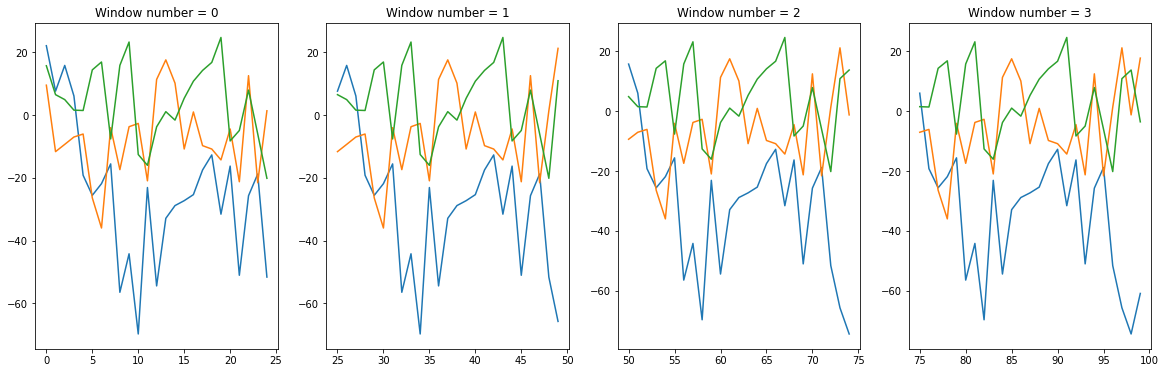

In [316]:
first_four_windows = [group for _, group in X_train_sliding_windows[X_train_sliding_windows.window_id < 4].groupby("window_id")]

fig, ax = plt.subplots(1, 4, figsize=(20, 6))

for i in range(4):
    ax[i].plot(first_four_windows[i]['gyro_x'])
    ax[i].plot(first_four_windows[i]['gyro_y'])
    ax[i].plot(first_four_windows[i]['gyro_z'])
    ax[i].set_title(f"Window number = {first_four_windows[i].window_id.values[0]}")

### Grouping Falling together, Lying together, Sitting/Standing together


In [9]:
grouped_falling_label = 'Falling (Grouped)'
grouped_lying_label = 'Lying (Grouped)'
grouped_sitting_or_standing_label = 'Sitting/Standing'


def grouping_activities_together(base_df, individual_activities_to_group, new_label):
    grouped_dataframes = []
    for act, group in base_df.groupby("activity_type"):
        if act in individual_activities_to_group:
            group['activity_type'] = new_label

        grouped_dataframes.append(group)
    base_df = pd.concat(grouped_dataframes)
    return base_df

#TODO: Could be done faster in one line or two
def group_falling_together(base_df):
    falling_activities= ['Falling on knees', 'Falling on the back', 'Falling on the left', 'Falling on the right']
    base_df = grouping_activities_together(base_df, falling_activities, grouped_falling_label)
    return base_df
  

def group_lying_together(base_df):
    lying_activities = ['Lying down left', 'Lying down right', 'Lying down on back', 'Lying down on stomach']
    base_df = grouping_activities_together(base_df, lying_activities, grouped_lying_label)
    return base_df
    
def group_sitting_and_standing_together(base_df):
    sitting_or_standing_activites= ['Sitting','Standing','Sitting bent forward', 'Sitting bent backward']
    base_df = grouping_activities_together(base_df, sitting_or_standing_activites, grouped_sitting_or_standing_label)
    return base_df
  


In [10]:
base_df = group_falling_together(base_df)
base_df = group_lying_together(base_df)
base_df = group_sitting_and_standing_together(base_df)


### Grouping by stationary vs non-stationary

In [167]:

stationary_activities= sorted(['Sitting','Standing', 'Lying down left', 'Lying down right',
 'Lying down on back', 'Lying down on stomach', 'Sitting bent forward',  'Sitting bent backward'])
non_stationary_activities = sorted(['Desk work', 'Movement', 'Walking at normal speed', 'Running', 'Climbing stairs', 'Descending stairs', grouped_falling_label])

#TODO: Could be done faster in one line or two
def group_stationary_vs_non_stationary(base_df):
    grouped_dataframes = []
    base_df = group_falling_together(base_df)
    for act, group in base_df.groupby("activity_type"):
        if act in stationary_activities:
            group['activity_type'] = 'Stationary'
        else:
            group['activity_type'] = 'Non-Stationary'
        grouped_dataframes.append(group)
    
    base_df = pd.concat(grouped_dataframes)
    return base_df
    



In [ ]:
base_df = group_stationary_vs_non_stationary(base_df)

## Generate class labels

In [13]:
class_labels = {}
label_to_activity = {}
activities = sorted(base_df.activity_type.unique())

for idx, activity in enumerate(activities):
    class_labels[activity] = idx
    label_to_activity[idx] = activity

print(class_labels)

{'Falling (Grouped)': 0, 'Lying (Grouped)': 1, 'Running': 2, 'Sitting/Standing': 3, 'Walking at normal speed': 4}


In [40]:

# window_id_class_labels = final_sliding_windows.groupby("window_id")[['activity_type']].agg(np.min).replace(class_labels)
# window_id_class_labels


           timestamp   accel_x   accel_y   accel_z      gyro_x     gyro_y  \
83326   1.633629e+12 -0.019775 -0.971741  0.170349   11.312500   1.843750   
83327   1.633629e+12 -0.004639 -0.904846  0.126648   18.312500   2.000000   
83328   1.633629e+12  0.024658 -0.914612  0.127869   23.187500   1.015625   
83329   1.633629e+12  0.016846 -0.908020  0.065857   29.281250   0.640625   
83330   1.633629e+12  0.060791 -0.789124  0.052673   35.343750   3.250000   
...              ...       ...       ...       ...         ...        ...   
418669  1.633295e+12  0.820068 -0.552063 -1.210022  -44.609375  -8.015625   
418670  1.633295e+12  1.833008 -2.000000 -1.062073   32.046875   1.203125   
418671  1.633295e+12  0.590576 -1.742493 -0.194885   70.343750  17.734375   
418672  1.633295e+12  0.343750 -0.438782  0.658142 -133.562500 -86.484375   
418673  1.633295e+12  0.435791 -0.920471 -0.194641 -118.093750 -96.390625   

           gyro_z sensor_type      activity_type  activity_code subject_id 

## Leave-one-subject-out cross-validation

One of the other reason our previous classifier functions so well is that each person performs activities in a very consistent manner. If a subject's data is both in the training set and the test set, it provides the model with an unfair advantage. Moreover, the results that your model will output will be falsely high. When you test your model on a completely new, unseen subject, your accuracy will drop considerably. 

This is why when training a HAR model you will want to do a special kind of cross-validation: Leave-One-Subject-Out (LOSOXV), where we leave one (or more) subject(s) in the testing set at each iteration.

![losoxv](../Images/LOOCV.png "losoxv")

This ensures that the results we get from our classifier are consistent to what we would get in real life, if we were to test the model on a new user.

### Setting up the model

In [67]:
filters = 64
kernel_size = 3
n_features = 6
activation='relu'
n_classes = len(class_labels)
# n_classes = 12

print(n_classes)

5


## Random forest

In [241]:
# now extract all features
feature_list_train = []

for col in columns_of_interest_training:
    new_features = tsfresh.extract_features(timeseries_container=X_train_sliding_windows, column_id='window_id',
                        column_value=col, default_fc_parameters=tsfresh.feature_extraction.MinimalFCParameters())
    
    feature_list_train.append(new_features)
    
feature_list_train = pd.concat(feature_list_train, axis=1)

feature_list_train

Feature Extraction: 100%|███████████████████████| 15/15 [00:11<00:00,  1.36it/s]


accel_x__sum_values  accel_x__median  accel_x__mean  accel_x__length  \
0               -13.829346        -0.955444      -0.987810             14.0   
1               -14.131348        -0.968384      -1.009382             14.0   
2               -14.284180        -0.949341      -1.020299             14.0   
3               -14.439453        -0.977295      -1.031390             14.0   
4               -14.219483        -0.982544      -1.015677             14.0   
...                    ...              ...            ...              ...   
75777            -7.021728        -0.499878      -0.501552             14.0   
75778            -6.954102        -0.496582      -0.496722             14.0   
75779            -6.907959        -0.492065      -0.493426             14.0   
75780            -6.914795        -0.492065      -0.493914             14.0   
75781            -7.001465        -0.499634      -0.500105             14.0   

       accel_x__standard_deviation  accel_x__variance  \
0                         0.193926           0.037607   
1                         0.185946           0.034576   
2                         0.232610           0.054107   
3                         0.212675           0.045231   
4                         0.182119           0.033167   
...                            ...                ...   
75777                     0.006364           0.000041   
75778                     0.004161           0.000017   
75779                     0.003277           0.000011   
75780                     0.004250           0.000018   
75781                     0.009445           0.000089   

       accel_x__root_mean_square  accel_x__maximum  accel_x__minimum  \
0                       1.006666         -0.748291         -1.337646   
1                       1.026366         -0.749268         -1.337646   
2                       1.046478         -0.700439         -1.373291   
3                       1.053088         -0.700439         -1.373291   
4                       1.031876         -0.700439         -1.373291   
...                          ...               ...               ...   
75777                   0.501592         -0.490967         -0.511230   
75778                   0.496739         -0.490967         -0.506104   
75779                   0.493437         -0.489014         -0.500488   
75780                   0.493932         -0.488770         -0.501953   
75781                   0.500194         -0.488770         -0.519043   

       accel_y__sum_values  ...  gyro_y__minimum  gyro_z__sum_values  \
0                 1.131958  ...       -36.015625           61.218750   
1                 1.194702  ...       -36.015625           76.578125   
2                 0.609253  ...       -21.593750           27.296875   
3                 1.235474  ...       -21.593750           58.171875   
4                 0.544067  ...       -24.656250          -31.968750   
...                    ...  ...              ...                 ...   
75777            -3.270386  ...        -0.175781            1.558594   
75778            -3.324097  ...        -0.175781            1.265625   
75779            -3.366333  ...        -0.351562            1.007812   
75780            -3.370972  ...        -0.925781            0.378906   
75781            -3.322876  ...        -0.925781           -0.390625   

       gyro_z__median  gyro_z__mean  gyro_z__length  \
0            3.210938      4.372768            14.0   
1            8.031250      5.469866            14.0   
2           -0.296875      1.949777            14.0   
3            6.617188      4.155134            14.0   
4           -3.335938     -2.283482            14.0   
...               ...           ...             ...   
75777        0.113281      0.111328            14.0   
75778        0.085938      0.090402            14.0   
75779        0.068359      0.071987            14.0   
75780        0.037109      0.027065            14.0   
75781       -0.041016     -0.027902   

In [242]:
# now extract all features
feature_list_test = []

for col in columns_of_interest_training:
    new_features = tsfresh.extract_features(timeseries_container=X_test_sliding_windows, column_id='window_id',
                        column_value=col, default_fc_parameters=tsfresh.feature_extraction.MinimalFCParameters())
    
    feature_list_test.append(new_features)
    
feature_list_test = pd.concat(feature_list_test, axis=1)

feature_list_test

Feature Extraction: 100%|███████████████████████| 15/15 [00:03<00:00,  4.68it/s]


accel_x__sum_values  accel_x__median  accel_x__mean  accel_x__length  \
0                -1.807861        -0.105957      -0.129133             14.0   
1                -1.473633        -0.088867      -0.105259             14.0   
2                -1.718750        -0.066895      -0.122768             14.0   
3                -2.724854        -0.188232      -0.194632             14.0   
4                -3.861572        -0.257935      -0.275827             14.0   
...                    ...              ...            ...              ...   
20834            -3.728760        -0.289307      -0.266340             14.0   
20835            -3.358643        -0.236572      -0.239903             14.0   
20836            -3.703125        -0.261841      -0.264509             14.0   
20837            -4.010986        -0.289673      -0.286499             14.0   
20838            -3.933350        -0.275269      -0.280954             14.0   

       accel_x__standard_deviation  accel_x__variance  \
0                         0.279945           0.078369   
1                         0.119717           0.014332   
2                         0.236256           0.055817   
3                         0.214564           0.046038   
4                         0.207991           0.043260   
...                            ...                ...   
20834                     0.085188           0.007257   
20835                     0.075101           0.005640   
20836                     0.071788           0.005154   
20837                     0.064935           0.004217   
20838                     0.069848           0.004879   

       accel_x__root_mean_square  accel_x__maximum  accel_x__minimum  \
0                       0.308293          0.246338         -0.935547   
1                       0.159410          0.141113         -0.293457   
2                       0.266250          0.141113         -0.850830   
3                       0.289689          0.127930         -0.850830   
4                       0.345457          0.127930         -0.850830   
...                          ...               ...               ...   
20834                   0.279632         -0.136475         -0.384033   
20835                   0.251383         -0.136475         -0.384033   
20836                   0.274078         -0.163086         -0.464111   
20837                   0.293766         -0.210938         -0.464111   
20838                   0.289506         -0.167236         -0.464111   

       accel_y__sum_values  ...  gyro_y__minimum  gyro_z__sum_values  \
0               -10.919495  ...        24.484375          144.812500   
1               -11.189270  ...        -6.453125          141.265625   
2               -12.911194  ...        -6.453125           36.203125   
3               -13.492981  ...        -6.453125          -99.734375   
4               -10.245972  ...        -7.062500          -41.828125   
...                    ...  ...              ...                 ...   
20834           -13.504272  ...       -16.328125          -22.687500   
20835           -13.209595  ...       -16.328125          -39.906250   
20836           -12.764282  ...        -2.328125          -29.531250   
20837           -13.066773  ...        -3.625000           -7.328125   
20838           -13.383667  ...        -8.093750           39.015625   

       gyro_z__median  gyro_z__mean  gyro_z__length  \
0           11.242188     10.343750            14.0   
1           12.632812     10.090402            14.0   
2            5.156250      2.585938            14.0   
3           -8.140625     -7.123884            14.0   
4           -1.148438     -2.987723            14.0   
...               ...           ...             ...   
20834       -2.140625     -1.620536            14.0   
20835       -3.375000     -2.850446            14.0   
20836        0.171875     -2.109375            14.0   
20837        1.140625     -0.523438            14.0   
20838        2.906250      2.786830   

In [243]:
window_id_class_labels_train = X_train_sliding_windows.groupby("window_id")[['activity_type']].agg(np.min).replace(class_labels)
window_id_class_labels_test = X_test_sliding_windows.groupby("window_id")[['activity_type']].agg(np.min).replace(class_labels)


In [244]:
rfc = RandomForestClassifier(n_estimators=10)

rfc.fit(feature_list_train, window_id_class_labels_train)

y_pred = rfc.predict(feature_list_test)

/afs/inf.ed.ac.uk/user/s18/s1870697/miniconda3/envs/pdiot/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [245]:
print(classification_report(y_pred=y_pred, y_true=window_id_class_labels_test))

              precision    recall  f1-score   support

           0       0.38      0.30      0.34      1375
           1       0.47      0.49      0.48      1356
           2       0.50      0.46      0.48      1506
           3       0.53      0.69      0.60       432
           4       0.95      0.99      0.97      5986
           5       0.42      0.61      0.50      1505
           6       0.98      0.91      0.94      1350
           7       0.88      0.84      0.86      5976
           8       0.51      0.38      0.43      1353

    accuracy                           0.75     20839
   macro avg       0.62      0.63      0.62     20839
weighted avg       0.75      0.75      0.75     20839



### LSTM

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import LSTM

def define_LSTM_model(window_size,n_features):
    timesteps = window_size
    model = Sequential()
    
    model.add(LSTM(256,  return_sequences=False,
                          input_shape=(timesteps,n_features)))

    # model.add(LSTM(64, input_shape=(timesteps,n_features)))
    # Dropout layer
#     model.add(Dropout(0.2)) 
    # Dense layer with ReLu
    # model.add(Dense(units = 32, activation='relu'))
    # model.add(Dropout(0.5)) 

    model.add(Dense(units = 100, activation='relu'))
    model.add(Dropout(0.2)) 

    # model.add(Dense(32, activation='relu',input_shape=(timesteps,n_features)))
    model.add(Dense(n_classes, activation='softmax'))
    
    print(model.summary())
    return model




In [14]:

from tensorflow.keras.layers import LSTM

def define_simple_LSTM_model(window_size,n_features):
    timesteps = window_size
    model = Sequential()
    
    model.add(LSTM(64, input_shape=(timesteps,n_features)))

    model.add(Dense(units = 128, activation='relu'))
    model.add(Dropout(0.2)) 
    model.add(Dense(n_classes, activation='softmax'))
    
    print(model.summary())
    return model

In [345]:
from tensorflow.keras.layers import LSTM, Bidirectional
def define_Bidirectional_LSTM_model(window_size,n_features):
    timesteps = window_size
    model = Sequential()
    
    model.add(Bidirectional(
        LSTM(units=64),
        input_shape=(timesteps,n_features)
        
    ))



    model.add(Dropout(0.2)) 
    model.add(Dense(units = 64, activation='relu'))

    model.add(Dense(n_classes, activation='softmax'))
    
    print(model.summary())
    return model


## CNN

There are some different preprocessing techniques you can apply when the resulting "datapoint" is an input to a convolutional neural network. 

You can use two types of convolutional layers:
* 1D Conv Layers - which will work on 1D data, for example a single axis from one single sensor (accel, gyro or mag)
* 2D Conv Layers - suitable if the input data is in the form of an image, for example

We will be demonstrating how to build a simple 1D CNN using 6 channels: the 3 axes of the accelerometer and the 3 axes of the gyroscope.

In [15]:

def define_CNN_model(filters,kernel_size,window_size,n_features,n_classes):
    model = Sequential()

    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='linear', 
                     input_shape=(window_size, n_features)))

    model.add(BatchNormalization())
    model.add(Activation(activation))
    model.add(Dropout(0.2))

    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='linear'))

    model.add(BatchNormalization())
    model.add(Activation(activation))
    model.add(Dropout(0.2))


    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='linear'))

    model.add(BatchNormalization())
    model.add(Activation(activation))
    model.add(Dropout(0.2))

    model.add(Flatten())

    model.add(Dense(128, activation='relu'))

    model.add(Dropout(0.1))

    model.add(Dense(n_classes, activation='softmax'))

    print(model.summary())
    return model
    

In [69]:
# https://machinelearningmastery.com/cnn-models-for-human-activity-recognition-time-series-classification/
def define_CNN_model_2(filters,kernel_size,window_size,n_features, n_classes):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(window_size,n_features)))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Dropout(0.2))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))
    print(model.summary())
    return model

In [37]:
def define_CNN_model_3(filters,kernel_size,window_size,n_features,n_classes):
    model = Sequential()

    model.add(Conv1D(filters=64, kernel_size=3, activation='linear', 
                     input_shape=(window_size, n_features)))

    model.add(BatchNormalization())
    model.add(Activation(activation))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='linear'))
    model.add(BatchNormalization())
    model.add(Activation(activation))
    model.add(Dropout(0.2))

    
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='linear'))
    model.add(BatchNormalization())
    model.add(Activation(activation))
    model.add(Dropout(0.2))

    
        
    model.add(Conv1D(filters=32, kernel_size=kernel_size, activation='linear'))
    model.add(BatchNormalization())
    model.add(Activation(activation))
    model.add(Dropout(0.2))


    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))

    print(model.summary())
    return model
    

In [408]:
# https://machinelearningmastery.com/cnn-models-for-human-activity-recognition-time-series-classification/
def define_CNN_model_4(filters,kernel_size,window_size,n_features, n_classes):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(window_size,n_features)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))
    print(model.summary())
    return model

In [462]:
def define_CNN_model_5():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(window_size,n_features)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(256))
    model.add(Dropout(0.1))
    model.add(Dense(n_classes, activation='softmax'))
    print(model.summary())
    return model


In [376]:
# https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9065078
def define_CNN_LSTM_approach():
    model = Sequential()
    
    model.add(TimeDistributed(
        Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'), 
                     input_shape=(None,window_size, n_features))
           )
    model.add(TimeDistributed(BatchNormalization()))
    

    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    
    
    


    
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(128))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.10))
    model.add(Dense(n_classes, activation='softmax'))
    print(model.summary())
    return model
    


In [ ]:
# https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9065078
def define_CNN_LSTM_approach_2():
    model = Sequential()
    
    model.add(TimeDistributed(
        Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'), 
                     input_shape=(None,window_size, n_features))
           )
    model.add(TimeDistributed(BatchNormalization()))

    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    


    
#     model.add(TimeDistributed(cnn))
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(64))

    model.add(Dense(n_classes, activation='softmax'))
    print(model.summary())
    return model
    

In [352]:
from tensorflow.keras.layers import GlobalAveragePooling1D
def define_LSTM_CNN_approach():
    model = Sequential()
    model.add(LSTM(32, input_shape=(window_size, n_features),return_sequences=True) )
    model.add(LSTM(32, return_sequences=True))
    model.add(Conv1D(filters=64, kernel_size=5, strides=2, activation='linear'))
    model.add(Activation(activation))

    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=128, kernel_size=3, strides=1, activation='linear'))
    model.add(Activation(activation))
    model.add(GlobalAveragePooling1D())
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(n_classes, activation='softmax'))

    return model
    

In [509]:
from tensorflow.keras.layers import Concatenate

def define_CNN_Bidirectional_LSTM():
    model= Sequential()
    lstm = Sequential()
    lstm.add(Bidirectional(
        LSTM(units=128),
        input_shape=(window_size,n_features)
        
    )) 
    lstm.add(Flatten())
    lstm.add(Dense(32))
    lstm.add(Dropout(0.05))
    cnn = Sequential()
    conv1 = Conv1D(filters=128, kernel_size=9, activation='relu', input_shape=(window_size,n_features))
    conv2 = Conv1D(filters=128, kernel_size=7, activation='relu', input_shape=(window_size,n_features))
    conv3 = Conv1D(filters=128, kernel_size=5, activation='relu', input_shape=(window_size,n_features))
    conv4 = Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(window_size,n_features))
    cnn.add(Concatenate([conv1,conv2,conv3,conv4]))
    
    cnn.add(MaxPooling1D(pool_size=2))
    
    conv1 = Conv1D(filters=128, kernel_size=9, activation='relu')
    conv2 = Conv1D(filters=128, kernel_size=7, activation='relu')
    conv3 = Conv1D(filters=128, kernel_size=5, activation='relu')
    conv4 = Conv1D(filters=128, kernel_size=2, activation='relu')    

    cnn.add(Concatenate([conv1,conv2,conv3,conv4]))
    cnn.add(MaxPooling1D(pool_size=2))
    
    cnn.add(Flatten())
    cnn.add(Dense(128))
    cnn.add(Dropout(0.1))
    
    lstm.add(Concatenate([lstm,cnn]))
    lstm.add(Flatten())
    lstm.add(Dense(n_classes, activation='softmax'))
    
    print(lstm.summary())

    return lstm



    

### Re-generating the data in the appropriate format

We need to do a bit more work with our data to bring it into a format fit for training a CNN. 

A CNN will take multi-dimensional arrays as input. We have already specified that the input shape is (window_size, n_features), i.e. (50, 6). 

Remember that we generated sliding windows before. Now we just need to take the raw values from each window and create a training set. 

In [16]:
#Subject id is of interest to us as we will split our dataset by subject_id
columns_of_interest_training = ['accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z']
columns_of_interest_training

['accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z']

In [17]:
def regenerate_data_from_sliding_windows(final_sliding_windows):
    X= []
    y= []

    for window_id, group in final_sliding_windows.groupby('window_id'):
        
#         print(f"window_id = {window_id}")

        shape = group[columns_of_interest_training].values.shape
#         print(f"shape = {shape}")

        X.append(group[columns_of_interest_training].values )
        y.append(class_labels[group["activity_type"].values[0]])
    
    return X,y


In [157]:
X_train_regenerated, y_train_regenerated = regenerate_data_from_sliding_windows(X_train_sliding_windows)
X_test_regenerated, y_test_regenerated = regenerate_data_from_sliding_windows(X_test_sliding_windows)


KeyboardInterrupt: 

We can do a similar test/train split for demonstration purposes. Remember that you will have to split your data by subjects, not radomly.

In [18]:
def convert_values_to_numpy_array(X_train_regenerated, y_train_regenerated, X_test_regenerated, y_test_regenerated):
    
    # #Convert categorical variable (labels) into dummy/indicator variables (one-hot encoding)
    y_train = np.asarray(pd.get_dummies(y_train_regenerated), dtype=np.float32)
    y_test = np.asarray(pd.get_dummies(y_test_regenerated), dtype=np.float32)

    X_train = np.asarray(X_train_regenerated)
    X_test = np.asarray(X_test_regenerated)

    print(f"X_train shape = {X_train.shape}")
    print(f"y_train shape = {y_train.shape}")

    print(f"X_test shape = {X_test.shape}")
    print(f"y_test shape = {y_test.shape}")
    return X_train, y_train, X_test, y_test

In [ ]:
X_train, y_train, X_test, y_test = convert_values_to_numpy_array(X_train_regenerated, y_train_regenerated, X_test_regenerated, y_test_regenerated)

Now we are ready to start the training process

In [341]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
# model.compile(
#     optimizer=optimizers.SGD(lr=0.01, momentum=0.9, decay=0.001, nesterov=True),
#     loss="categorical_crossentropy",
#     metrics = ['accuracy'])
model.compile(
      optimizer = optimizers.Adam(learning_rate=0.001),
          loss="categorical_crossentropy",
    metrics = ['accuracy'])

In [ ]:
model.fit(X_train, y_train,
            batch_size=4048, epochs=200, callbacks=[callback],
            validation_data=(X_test, y_test),
    )

In [303]:
X_test.shape

(10224, 25, 6)

In [304]:
X_train.shape

(37315, 25, 6)

In [53]:
base_df.loc[base_df['activity_type'].isin(['Desk work' 'Movement' 'Sitting bent forward' 'Walking at normal speed'
 'Sitting bent backward' 'Standing' 'Lying down left' 'Lying down right'
 'Lying down on back' 'Lying down on stomach' 'Running' 'Sitting'])]
ll = base_df[base_df['activity_type'].isin(['Desk work', 'Movement', 'Sitting bent forward', 'Walking at normal speed',
 'Sitting bent backward', 'Standing', 'Lying down left', 'Lying down right',
 'Lying down on back', 'Lying down on stomach', 'Running', 'Sitting'])]

ll['activity_code']

769       100.0
770       100.0
771       100.0
772       100.0
773       100.0
          ...  
492670      5.0
492671      5.0
492672      5.0
492673      5.0
492674      5.0
Name: activity_code, Length: 422481, dtype: float64

## Coding Playground

In [ ]:
temp_class_labels = ['Desk work', 'Movement', 'Sitting bent forward', 'Walking at normal speed',
 'Sitting bent backward', 'Standing', 'Lying down left', 'Lying down right',
 'Lying down on back', 'Lying down on stomach', 'Running', 'Sitting']

subset_base_df = base_df[base_df['activity_type'].isin(temp_class_labels)]

In [19]:
subset_base_df = base_df

In [39]:
from sklearn.model_selection import LeaveOneGroupOut, GroupShuffleSplit

X_with_subject_id = subset_base_df[columns_of_interest_initial].reset_index(drop=True)
X_with_subject_id = smooth_signal(X_with_subject_id)
y_with_subject_id = subset_base_df['activity_code'].reset_index(drop=True)

#Split by subject id
gs = GroupShuffleSplit(n_splits=2, test_size=0.2, random_state=1)
gs_generator = gs.split(X_with_subject_id, y_with_subject_id, groups=X_with_subject_id.subject_id)

logo = LeaveOneGroupOut()
logo_generator = logo.split(X_with_subject_id, y_with_subject_id, groups=X_with_subject_id.subject_id)


     accel_x   accel_y   accel_z     gyro_x     gyro_y     gyro_z subject_id  \
0  -0.282471 -0.904602  0.451111   9.078125  39.078125  -8.875000   s1541031   
1   0.222656 -1.020081  0.120544   2.484375 -14.640625   9.515625   s1541031   
2   0.327393 -0.915344  0.309509   8.984375  13.265625  -0.156250   s1541031   
3   0.093994 -0.904846  0.152771  11.281250   2.062500   0.390625   s1541031   
4   0.211426 -0.992737  0.173279  -1.828125   2.546875   3.453125   s1541031   
..       ...       ...       ...        ...        ...        ...        ...   
59  0.531250 -0.212708 -0.832092  46.562500  18.531250  21.312500   s1541031   
60  0.515869 -0.270325 -0.906311  37.265625   9.953125  17.593750   s1541031   
61  0.535400 -0.137512 -0.937073  39.859375  13.375000  18.062500   s1541031   
62  0.467773 -0.082581 -0.922180  39.515625  13.484375  13.484375   s1541031   
63  0.470215 -0.040833 -0.951233  23.062500  -0.531250   9.187500   s1541031   

    activity_code      activity_type  \

      accel_x   accel_y   accel_z      gyro_x      gyro_y     gyro_z  \
532  0.237305 -0.797668  0.339050   -8.140625   -2.109375   1.312500   
533 -0.330566 -0.833069  0.431091   -1.406250   -4.093750  -9.265625   
534 -0.001465 -0.820618  0.382751  -17.484375   14.453125  -2.515625   
535  0.312012 -0.698547  0.330017  -15.921875   11.156250  -3.515625   
536 -0.051270 -0.328186  0.315369   52.218750   13.718750  -1.468750   
537  0.063232  0.034119 -0.180725   66.765625    7.250000  26.890625   
538  0.747803 -0.633850 -1.776672   68.109375  -25.031250  67.328125   
539  1.999939 -2.000000  1.999939    9.281250   40.359375  69.187500   
540 -1.790771 -2.000000 -1.404114  208.750000  165.093750  76.078125   
541  1.983154 -1.322815 -1.015198  -18.250000  -49.796875  60.500000   
542  1.221435 -0.031799  0.225525   28.671875    2.890625  20.343750   
543  0.089600 -1.018127 -0.710754   53.187500   55.656250  24.906250   
544  0.192139 -0.354065 -0.541565  -10.812500  -24.031250   7.00

        accel_x   accel_y   accel_z     gyro_x     gyro_y     gyro_z  \
35390  0.161865 -0.931213  0.242615 -17.031250  -3.062500  -2.609375   
35391  0.098633 -0.910217  0.226746 -16.515625  -3.250000  -6.343750   
35392  0.130859 -0.845276  0.134705 -20.296875  -0.390625  -5.687500   
35393  0.172119 -0.897522  0.304626 -21.593750   6.453125  -8.031250   
35394  0.073730 -0.795471  0.308777 -22.421875   6.234375 -10.781250   
35395  0.000000 -0.765442  0.293884 -21.078125  21.781250  -9.437500   
35396  0.216064 -0.877991  0.369812 -28.375000  14.859375 -10.109375   
35397  0.230469 -0.775940  0.361999 -29.390625   3.468750 -14.234375   
35398  0.158203 -0.787170  0.426941 -42.062500  -5.109375 -16.203125   
35399  0.102295 -0.846741  0.370300 -44.593750 -23.703125 -14.203125   
35400  0.200928 -0.730286  0.420105 -34.171875  -7.015625 -14.156250   
35401 -0.094238 -0.875061  0.461121 -46.953125 -16.656250 -21.671875   
35402  0.093506 -0.790833  0.332458 -41.453125 -12.750000 -17.90

        accel_x   accel_y   accel_z     gyro_x     gyro_y    gyro_z  \
70367  0.163330 -0.951233  0.243835   3.750000   4.859375 -1.734375   
70368  0.163574 -0.960510  0.217224   5.625000   6.468750 -0.718750   
70369  0.182129 -0.895081  0.185730  11.859375   4.406250 -1.656250   
70370  0.125732 -0.901917  0.206970   4.062500   7.953125 -3.000000   
70371  0.179443 -0.956604  0.132263   7.937500   3.625000 -1.125000   
...         ...       ...       ...        ...        ...       ...   
70436 -0.953857 -0.279114  0.194275  -5.015625  11.140625 -0.250000   
70437 -0.931641 -0.265930  0.215027  -3.968750   7.984375  0.187500   
70438 -0.932861 -0.235168  0.268494   0.156250   4.734375 -1.140625   
70439 -0.927734 -0.251282  0.250427  -1.187500   1.031250  0.343750   
70440 -0.966309 -0.230774  0.200134   1.296875  -1.421875  0.734375   

      subject_id  activity_code      activity_type  \
70367   s1541031           45.0  Falling (Grouped)   
70368   s1541031           45.0  Fallin

         accel_x   accel_y   accel_z      gyro_x      gyro_y      gyro_z  \
104843  0.131348 -0.813049 -0.411682   -1.968750   -9.390625   -4.468750   
104844  0.139893 -0.687561 -0.295959    3.468750    5.078125   -5.328125   
104845  0.106934 -0.720520 -0.434387  -18.812500    5.703125   -9.125000   
104846  0.261963 -0.696106 -0.501038  -13.421875  -14.656250   -3.609375   
104847  0.189209 -0.594299 -0.416809   -5.390625   -8.109375   -6.828125   
104848  0.082764 -0.572327 -0.436096  -13.437500   -8.812500   -3.531250   
104849  0.013184 -0.752014 -0.469055  -15.781250  -12.296875    5.906250   
104850 -0.051514 -0.932678 -0.485657  -11.078125   -4.359375   17.093750   
104851  0.334717 -0.695129 -0.302795    1.796875  -26.781250   33.671875   
104852 -0.110840 -0.637512 -0.646790  -17.937500  -51.375000   34.171875   
104853 -0.107910 -0.782776 -0.657776  -14.375000  -22.343750   56.296875   
104854  0.903809 -0.326721 -0.463684   17.640625   -4.890625   70.234375   
104855  0.78

         accel_x   accel_y   accel_z     gyro_x     gyro_y     gyro_z  \
302658  0.090332 -0.045959  0.101746  19.656250  24.312500 -20.343750   
302659 -0.207275 -0.150452 -0.044983   1.859375  19.953125 -22.156250   
302660  0.166016 -0.031799  0.193054  15.578125 -14.812500  -9.234375   
302661 -0.035889  0.749939 -0.258850 -15.046875 -21.968750  -6.843750   
302662 -0.293945  1.239441 -0.147034 -81.921875 -21.609375  39.203125   
...          ...       ...       ...        ...        ...        ...   
303428 -0.410645  1.670105 -0.664612 -41.156250  10.578125  34.515625   
303429 -0.471924  1.999939  0.059753  45.562500  -0.968750  16.015625   
303430  0.073486  1.999939  0.428406 -38.250000   9.703125  -1.343750   
303431 -0.408691  1.861755  0.003845   0.359375  41.734375 -13.171875   
303432 -0.339844  0.486755  0.111755  14.906250  74.062500 -32.250000   

       subject_id  activity_code activity_type  \
302658   s1541031           11.0       Running   
302659   s1541031      

        accel_x   accel_y   accel_z      gyro_x      gyro_y      gyro_z  \
36899 -0.192871 -0.877258  0.429382   -2.687500    2.046875    0.093750   
36900 -0.177002 -0.918030  0.460388   -1.250000   -1.156250    0.625000   
36901 -0.187012 -0.882874  0.470154   -1.421875    0.984375   -1.062500   
36902 -0.179688 -0.898254  0.471863   -2.796875   -0.453125   -0.906250   
36903 -0.202881 -0.903625  0.513123   -1.453125   -2.343750    0.421875   
36904 -0.205322 -0.904602  0.476501   -4.875000    3.171875   -1.453125   
36905 -0.196045 -0.872620  0.514099   -4.437500    0.609375   -1.015625   
36906 -0.214111 -0.889954  0.533142   -8.656250    1.421875   -2.500000   
36907 -0.152832 -0.868958  0.501404   -4.578125   -4.968750   -3.062500   
36908 -0.198242 -0.889710  0.557800  -11.953125    4.843750   -1.546875   
36909 -0.239014 -0.848206  0.540466   -8.562500   -0.500000   -0.140625   
36910 -0.177002 -0.862366  0.584412   -7.468750    0.421875    0.328125   
36911 -0.181396 -0.823792

        accel_x   accel_y   accel_z    gyro_x     gyro_y     gyro_z  \
72038  0.012695 -0.928772  0.348083  5.671875   0.562500   0.765625   
72039  0.016846 -0.975403  0.334900  5.750000  -4.093750   1.218750   
72040  0.024414 -0.950256  0.336365  4.531250  -4.281250  -0.171875   
72041  0.009521 -0.947327  0.320984  5.562500  -5.046875   0.796875   
72042  0.006836 -0.954407  0.320984  5.640625  -5.359375  -2.046875   
...         ...       ...       ...       ...        ...        ...   
72095 -0.744873 -0.127014  0.263367  2.484375 -14.937500 -20.875000   
72096 -0.692871 -0.285706  0.188171 -6.953125  -9.875000   3.656250   
72097 -1.122070 -0.305481  0.162048 -6.343750  -5.375000  21.718750   
72098 -1.232422 -0.351135  0.119812 -7.593750   0.234375   0.687500   
72099 -1.200440 -0.314758  0.013855 -2.015625   2.468750  -4.531250   

      subject_id  activity_code      activity_type  \
72038   s1704145           45.0  Falling (Grouped)   
72039   s1704145           45.0  Fallin

         accel_x   accel_y   accel_z     gyro_x     gyro_y     gyro_z  \
106398 -0.071289 -0.905579  0.367126   4.812500   2.468750   2.234375   
106399 -0.118408 -0.924622  0.375671   3.156250   0.234375   2.765625   
106400 -0.130127 -0.939026  0.419617   0.359375   0.093750   1.625000   
106401 -0.103516 -0.932434  0.386902  -0.312500  -0.406250   0.687500   
106402 -0.093994 -0.916809  0.388855  -0.484375   4.890625   1.703125   
...          ...       ...       ...        ...        ...        ...   
106458  1.030029  0.482605  0.440857   6.031250 -50.375000 -34.328125   
106459  1.181396  0.420349  0.739929  42.062500 -52.078125 -38.468750   
106460  0.964600  0.055359  0.905701  25.546875 -29.093750 -26.437500   
106461  1.005127 -0.039856  0.935242   4.640625 -12.671875  -7.656250   
106462  0.915283 -0.178284  0.992126 -15.718750  13.562500  13.406250   

       subject_id  activity_code      activity_type  \
106398   s1704145           46.0  Falling (Grouped)   
106399   s170

       accel_x   accel_y   accel_z      gyro_x      gyro_y     gyro_z  \
2455  0.093994 -0.979309  0.110535    0.265625   -2.468750  -3.578125   
2456  0.052246 -0.984436  0.096619    0.843750   -1.015625  -2.593750   
2457  0.064697 -0.978821  0.065369    1.531250   -3.828125  -3.656250   
2458  0.045410 -1.001770  0.049011    2.281250   -3.937500  -2.250000   
2459 -0.005615 -0.983215  0.026062   -0.625000   -4.203125  -2.828125   
2460  0.031250 -0.949524  0.033630   -0.031250   -1.796875  -3.187500   
2461 -0.040039 -0.930481  0.045837    1.203125    3.843750  -2.453125   
2462  0.003906 -0.918762  0.070007    1.828125   10.062500  -3.546875   
2463  0.010254 -0.981262  0.077820    0.625000   17.984375  -4.218750   
2464 -0.010742 -1.034973 -0.001770   -9.296875   14.640625  -7.109375   
2465  0.057129 -0.931702  0.051697  -10.359375    8.750000  -9.546875   
2466  0.037109 -0.937317  0.136658   -5.218750    8.906250  -7.812500   
2467  0.123047 -0.788391  0.072449   -6.484375    1

       accel_x   accel_y   accel_z      gyro_x      gyro_y      gyro_z  \
3040 -0.071777 -0.908752 -0.004456  -12.578125    0.656250   -6.906250   
3041  0.011230 -0.848694  0.043396   -7.093750    3.265625   -3.812500   
3042 -0.084961 -0.987122  0.054138   -8.171875    4.828125   -2.375000   
3043 -0.000732 -0.937317  0.015076  -10.781250    3.328125   -0.078125   
3044  0.067139 -0.981262  0.088318  -10.203125   -5.546875   -1.468750   
3045 -0.057373 -1.007141  0.122742  -12.734375  -11.921875   -2.656250   
3046 -0.061035 -0.893860  0.150085   -9.468750  -11.484375   -4.015625   
3047 -0.048584 -0.851868  0.070496   -9.921875  -11.812500   -4.406250   
3048  0.045654 -0.683899 -0.007629   -5.921875  -20.750000   -4.062500   
3049  0.117920 -0.458069  0.105164    5.250000  -24.593750   -4.437500   
3050  0.006348 -0.381897 -0.063538   10.765625  -22.015625    0.859375   
3051 -0.194092 -0.344543 -0.032776    2.687500   -8.156250    2.718750   
3052 -0.103271 -0.260071 -0.063538   -

        accel_x   accel_y   accel_z      gyro_x      gyro_y      gyro_z  \
38126 -0.437988 -0.830872  0.001648  -14.078125    0.406250   -3.671875   
38127 -0.489502 -0.855286  0.047791   -7.359375   -4.343750   -2.031250   
38128 -0.567871 -0.862854  0.115173   -4.171875   -5.921875   -3.312500   
38129 -0.574219 -0.824524  0.111755   -3.937500    1.046875   -2.937500   
38130 -0.573242 -0.819397  0.074646   -1.171875    3.109375   -2.359375   
38131 -0.543945 -0.825745  0.080994    0.781250    1.328125   -3.687500   
38132 -0.515381 -0.855286  0.088562    3.406250   -2.093750   -2.734375   
38133 -0.545898 -0.856262  0.061707    3.171875    1.531250   -1.828125   
38134 -0.532471 -0.881897  0.061707    0.687500    2.828125   -2.671875   
38135 -0.502441 -0.882874  0.001160    0.203125    3.921875   -1.468750   
38136 -0.500732 -0.883118  0.010437   -0.984375    3.250000   -1.546875   
38137 -0.428711 -0.889221 -0.042786    1.125000   -0.546875    2.781250   
38138 -0.419922 -0.849915

        accel_x   accel_y   accel_z      gyro_x      gyro_y      gyro_z  \
73040  0.271729 -1.125305 -0.277405   -5.031250  -24.703125  -13.062500   
73041  0.492676 -0.963196 -0.221252   -0.250000  -25.625000   -5.875000   
73042  0.445801 -0.644592 -0.177307   15.968750  -24.859375    4.312500   
73043  0.326416 -0.793518 -0.070618   19.375000  -27.421875    2.218750   
73044  0.271240 -1.169739 -0.053040    7.859375  -18.953125   -3.187500   
73045  0.326416 -0.979553 -0.072083   -1.953125   -7.890625   -7.078125   
73046  0.319092 -0.971741 -0.020569   -2.250000   -5.015625   -8.750000   
73047  0.352295 -0.947083 -0.061340   -6.453125    0.312500   -7.812500   
73048  0.415039 -0.909973 -0.107727   -1.515625    3.125000   -6.703125   
73049  0.441650 -0.901428 -0.124573    0.312500    3.437500   -3.437500   
73050  0.311768 -0.800354 -0.113342    0.671875    7.531250   -0.875000   
73051  0.291016 -0.777405 -0.085266    4.515625   12.968750    2.453125   
73052  0.309570 -0.680969

         accel_x   accel_y   accel_z    gyro_x    gyro_y    gyro_z subject_id  \
149175 -0.915771  0.253601 -0.350159  0.609375 -0.140625 -0.015625   s1706154   
149176 -0.926025  0.252624 -0.353821  0.609375 -1.109375 -0.031250   s1706154   
149177 -0.899414  0.273621 -0.303528  1.953125  0.140625 -0.312500   s1706154   
149178 -0.931152  0.248230 -0.381897 -0.453125  0.046875  0.125000   s1706154   
149179 -0.916992  0.255310 -0.340393  1.375000  0.406250  0.281250   s1706154   
...          ...       ...       ...       ...       ...       ...        ...   
149932 -0.937500  0.225281 -0.356018  0.093750 -0.343750 -0.171875   s1706154   
149933 -0.918213  0.228943 -0.349426 -0.234375 -0.906250 -0.421875   s1706154   
149934 -0.932861  0.231384 -0.346252 -1.171875 -2.078125 -0.687500   s1706154   
149935 -0.936768  0.226990 -0.374329 -2.265625 -3.562500 -0.375000   s1706154   
149936 -0.897217  0.225037 -0.336487 -0.156250 -2.046875 -0.890625   s1706154   

        activity_code    ac

       accel_x   accel_y   accel_z      gyro_x     gyro_y     gyro_z  \
3456 -0.025391 -0.961487  0.284119   -1.296875   2.531250  -0.390625   
3457  0.003418 -0.954651  0.253113   -0.078125  -1.140625   0.484375   
3458 -0.047607 -0.954895  0.294617    0.171875  -1.093750   0.609375   
3459 -0.047607 -0.968323  0.282410   -3.500000  -2.859375   0.312500   
3460 -0.043213 -0.941711  0.266785   -4.218750  -2.015625   0.156250   
3461 -0.030029 -0.936585  0.302429   -2.281250  -1.812500  -0.125000   
3462 -0.038574 -0.939514  0.311707   -0.156250   0.921875  -0.281250   
3463 -0.039062 -0.923157  0.362488    2.890625   2.453125  -0.281250   
3464 -0.006836 -0.953186  0.301208   -0.468750   2.703125  -1.531250   
3465 -0.031982 -0.921692  0.241150   -1.890625   4.781250   0.859375   
3466 -0.016846 -0.851624  0.246033    6.500000   0.343750  -0.390625   
3467 -0.029541 -0.840637  0.272156   11.578125   5.671875   2.843750   
3468 -0.063232 -0.724426  0.159119   10.843750  10.937500   3.25

        accel_x   accel_y   accel_z     gyro_x     gyro_y    gyro_z  \
38533 -0.201904 -0.963928  0.164001  -2.031250   2.281250  0.562500   
38534 -0.151611 -0.969788  0.159119  -1.843750   0.781250 -0.437500   
38535 -0.164795 -0.971497  0.198914  -2.343750  -0.015625 -1.093750   
38536 -0.165527 -0.971008  0.172791  -3.078125   0.984375 -0.203125   
38537 -0.160156 -0.949768  0.169128  -3.562500   0.265625 -0.890625   
...         ...       ...       ...        ...        ...       ...   
38591 -0.481201 -0.051819  1.009460  -2.421875  10.968750  0.875000   
38592 -0.679932 -0.178284  1.160339   3.203125   9.359375  0.109375   
38593 -0.595459 -0.055481  1.230408   9.265625   5.765625  0.437500   
38594 -0.491211  0.014099  1.122986  19.468750  -1.468750  5.234375   
38595 -0.498291  0.039734  1.088074  30.453125  -1.359375  7.078125   

      subject_id  activity_code      activity_type  \
38533   s1711661           47.0  Falling (Grouped)   
38534   s1711661           47.0  Fallin

        accel_x   accel_y   accel_z     gyro_x     gyro_y     gyro_z  \
73578 -0.297852 -0.950256  0.220886   0.453125  -3.015625   0.156250   
73579 -0.308594 -0.956116  0.226990  -0.437500   0.218750   1.046875   
73580 -0.262939 -0.934143  0.210876  -0.984375   1.140625   0.218750   
73581 -0.311279 -0.950745  0.190369   0.265625  -1.031250   1.000000   
73582 -0.277100 -0.929016  0.170105   0.375000   0.062500   1.156250   
...         ...       ...       ...        ...        ...        ...   
73638 -0.947754 -0.096008 -0.021790 -13.125000  16.875000  46.109375   
73639 -1.074951 -0.216370 -0.178284  -4.234375  13.281250  52.406250   
73640 -1.032715 -0.476868 -0.311340  -5.296875   8.531250  51.031250   
73641 -1.121582 -0.467834 -0.266663  -6.515625   2.453125  43.875000   
73642 -1.058838 -0.515198 -0.105774  -4.609375   1.187500  41.156250   

      subject_id  activity_code      activity_type  \
73578   s1711661           45.0  Falling (Grouped)   
73579   s1711661           

         accel_x   accel_y   accel_z      gyro_x     gyro_y     gyro_z  \
108303 -0.284180 -0.940247  0.030945    0.562500   2.640625   4.546875   
108304 -0.317383 -0.942688  0.085632    1.406250   2.078125   4.625000   
108305 -0.329346 -0.942688  0.048279   -0.031250   3.625000   7.390625   
108306 -0.305420 -0.903137  0.018738    0.656250   4.796875   6.250000   
108307 -0.312988 -0.965393 -0.006897    0.687500   4.656250   7.750000   
108308 -0.260986 -0.978088 -0.047668   -2.062500   4.656250   8.500000   
108309 -0.259277 -0.926819 -0.041077    0.218750   0.593750   7.734375   
108310 -0.344238 -0.937805 -0.016663   -4.000000  -1.609375   7.984375   
108311 -0.348633 -0.910950 -0.022278   -9.109375  -3.000000   6.937500   
108312 -0.349609 -0.903625 -0.031311  -11.812500  -5.062500   5.968750   
108313 -0.299561 -0.814758 -0.030579  -13.343750  -3.468750   6.531250   
108314 -0.259521 -0.746643  0.007019  -12.328125  -5.859375   9.093750   
108315 -0.204834 -0.552795  0.086853  

         accel_x   accel_y   accel_z    gyro_x    gyro_y    gyro_z subject_id  \
254962  0.778809 -0.301331  0.554871 -0.500000  0.328125 -0.109375   s1718069   
254963  0.779053 -0.300598  0.540955 -1.328125  1.187500 -0.546875   s1718069   
254964  0.793213 -0.301575  0.533875 -2.046875  0.843750 -0.796875   s1718069   
254965  0.787109 -0.298645  0.541199 -2.718750  4.390625 -0.328125   s1718069   
254966  0.797119 -0.294739  0.529236 -1.343750  4.343750  0.296875   s1718069   
...          ...       ...       ...       ...       ...       ...        ...   
255738  0.768066 -0.310608  0.567566  1.046875  0.093750 -0.578125   s1718069   
255739  0.774414 -0.308167  0.564880  0.406250  0.437500 -0.156250   s1718069   
255740  0.782715 -0.291321  0.560242  1.031250  0.468750  0.171875   s1718069   
255741  0.771729 -0.291077  0.570251  0.875000 -0.281250 -0.265625   s1718069   
255742  0.760254 -0.305969  0.558777  0.750000 -0.187500  0.109375   s1718069   

        activity_code    ac

       accel_x   accel_y   accel_z      gyro_x      gyro_y      gyro_z  \
5070 -0.058105 -0.897522  0.394226    9.140625    8.796875    8.765625   
5071 -0.033447 -0.896301  0.374939   11.296875   13.171875    9.015625   
5072 -0.037598 -0.907043  0.378357   16.312500    5.250000   12.468750   
5073 -0.019043 -0.856506  0.354675   10.265625    8.750000   12.859375   
5074  0.014648 -0.924377  0.378601   12.296875   33.343750    7.953125   
5075  0.016357 -0.881897  0.305603    7.109375   42.171875    5.531250   
5076  0.024658 -0.840393  0.284607   17.718750   60.875000    0.375000   
5077  0.072754 -0.885071  0.274841   42.625000   73.156250   -8.421875   
5078  0.101318 -0.825989  0.219177   25.859375   62.031250    2.437500   
5079  0.043213 -0.779114  0.138367   30.859375   87.531250   -5.375000   
5080  0.031982 -0.785950  0.039490   61.296875  125.406250  -27.140625   
5081  0.049805 -0.816711 -0.149963   63.890625  121.859375  -32.765625   
5082  0.066406 -0.739563 -0.335022   7

        accel_x   accel_y   accel_z      gyro_x      gyro_y      gyro_z  \
40166 -0.231934 -0.916321  0.345642   -3.484375   -1.421875  -19.062500   
40167 -0.275635 -0.912903  0.366882  -12.156250    0.937500  -14.843750   
40168 -0.275146 -0.934143  0.404480  -16.015625    6.640625  -12.843750   
40169 -0.270264 -0.910950  0.352966  -17.312500   -7.265625  -10.625000   
40170 -0.245117 -0.866272  0.399353   -6.500000   -2.171875  -12.437500   
40171 -0.191650 -0.895081  0.410583  -10.078125    0.828125   -5.703125   
40172 -0.190186 -0.802063  0.333679  -10.437500   -0.828125    4.218750   
40173 -0.195557 -0.731262  0.289734  -29.609375  -16.093750    5.531250   
40174 -0.242432 -0.743713  0.311951  -46.640625   -0.890625  -11.500000   
40175 -0.194824 -0.552307  0.323669   29.984375   -5.828125   -5.968750   
40176 -0.260498 -0.627747  0.261169   15.812500    6.953125   -6.625000   
40177 -0.298340 -0.569641  0.246765  -11.265625  -12.734375   -7.671875   
40178 -0.318359 -0.608460

        accel_x   accel_y   accel_z      gyro_x      gyro_y      gyro_z  \
75182 -0.184570 -0.826965  0.466003    7.500000  -30.562500    4.953125   
75183 -0.164307 -0.821106  0.408874    3.125000   10.515625  -13.406250   
75184 -0.164795 -0.856018  0.411072   20.031250   49.140625  -29.453125   
75185 -0.162109 -0.888489  0.379822   20.625000   58.046875  -31.171875   
75186 -0.167969 -0.892395  0.363953   17.890625   57.781250  -38.046875   
75187 -0.151611 -0.819153  0.338318   22.734375   49.843750  -38.421875   
75188 -0.173828 -0.737122  0.223816   13.140625   33.828125  -28.062500   
75189 -0.242432 -0.824036  0.344666  -17.515625  -41.359375  -10.093750   
75190 -0.337646 -0.841858  0.187927   43.000000 -104.375000   29.203125   
75191 -0.192871 -0.797180  0.096130  -17.203125  -69.812500    4.640625   
75192 -0.175781 -0.767883  0.445496  -17.359375    7.906250  -23.703125   
75193 -0.215088 -0.562805  0.316833   66.015625    4.765625  -12.125000   
75194 -0.313477 -0.495422

         accel_x   accel_y   accel_z     gyro_x      gyro_y     gyro_z  \
109731 -0.116943 -0.856506  0.274109 -20.421875    3.140625  24.062500   
109732 -0.071045 -0.775208  0.350037 -15.343750   19.000000  20.843750   
109733  0.146729 -0.841858  0.402527  49.562500   96.109375 -14.890625   
109734  0.183105 -0.768860  0.205750  21.093750  103.140625  11.546875   
109735  0.140625 -0.705872  0.169128  -1.609375   91.187500   8.640625   
...          ...       ...       ...        ...         ...        ...   
109795  0.267822  0.099548  0.963806  18.078125   -9.921875  -3.250000   
109796  0.289551  0.087341  1.131775  19.578125   -7.421875  -3.937500   
109797  0.345215  0.069031  0.990906  17.218750   -6.750000  -4.968750   
109798  0.306885  0.112244  1.124451  29.750000  -12.000000  -0.671875   
109799  0.208984  0.040466  1.016785  30.046875  -20.046875   0.109375   

       subject_id  activity_code      activity_type  \
109731   s1721256           46.0  Falling (Grouped)   
1

       accel_x   accel_y   accel_z      gyro_x     gyro_y      gyro_z  \
5571 -0.172119 -0.782043  0.138123  -27.703125  -1.187500  -12.062500   
5572 -0.165039 -0.727844  0.164246  -15.406250  -1.656250   -6.984375   
5573 -0.244629 -0.539856  0.192566   -3.656250   5.859375    3.531250   
5574 -0.167725 -0.354797  0.078796    2.359375   0.328125    7.828125   
5575 -0.113525 -0.186340  0.030701   17.750000   0.015625   20.546875   
5576 -0.111816 -0.224915  0.015320   33.015625  -5.546875   30.109375   
5577  0.070801 -0.364075 -0.018127   42.421875 -16.609375   30.531250   
5578  0.359131 -0.708069 -0.859436   80.703125 -33.031250   40.578125   
5579  1.835693 -1.890442 -1.760315  164.203120 -25.703125   90.187500   
5580  0.928223 -2.000000 -1.540588   97.765625 -25.515625  129.343750   
5581 -1.614746 -0.216614  0.905945   17.906250   9.031250   68.031250   
5582  0.795166  0.013855 -1.186584   33.593750 -48.250000  140.375000   
5583  1.999939 -1.392883 -0.432922   78.546875  57.

       accel_x   accel_y   accel_z      gyro_x      gyro_y      gyro_z  \
5998  0.043457 -0.258362 -0.017395   18.703125   17.546875    8.921875   
5999  0.033203 -0.158752  0.015076   22.062500  -10.187500   13.796875   
6000  0.082520 -0.228577 -0.181702   23.437500  -11.468750   17.140625   
6001 -0.222168 -0.380920  0.155701   45.921875  -61.109375   28.953125   
6002 -0.159180 -0.598694 -0.873596   97.484375  -10.781250   71.828125   
6003  1.999939 -2.000000 -1.944397  225.578120   85.296875   76.421875   
6004  0.042969 -2.000000 -0.862366  135.234380  -34.562500  170.093750   
6005 -2.000000 -1.234436  0.641296  149.796880 -230.859380   70.687500   
6006  0.511230  0.469421 -1.068909  131.250000  243.375000   78.968750   
6007  1.999939 -1.573303 -0.972717   67.406250  -45.218750   98.500000   
6008 -1.154297 -0.747131 -0.903625  103.656250 -104.671875   28.593750   
6009  0.865234 -0.632385 -0.523010   64.859375   72.765625   82.484375   
6010  1.638184  0.155457 -1.676331   1

        accel_x   accel_y   accel_z      gyro_x      gyro_y     gyro_z  \
40682  0.076172 -0.361389  0.117615   -5.359375   36.625000   8.312500   
40683  0.064941 -0.264709  0.104431    0.375000   29.687500  11.734375   
40684  0.036621 -0.280090  0.106140   12.421875   18.046875  17.578125   
40685  0.031738 -0.309143  0.137878   14.937500   10.750000  23.156250   
40686  0.037354 -0.464417 -0.037415    5.843750   -7.687500  29.859375   
40687  0.046875 -0.399719  0.393738  -23.703125    1.562500  45.203125   
40688 -0.016602 -0.342102 -0.002502  -33.859375    2.765625  38.312500   
40689  0.452881 -0.685852  0.893250  -48.000000   10.515625   8.453125   
40690  1.999939 -2.000000  1.999939 -250.203120 -144.578120  -8.437500   
40691  1.112793 -2.000000  0.530457 -253.078120  -74.375000  22.718750   
40692 -1.076416  1.999939 -1.294006 -155.984380   35.390625  36.031250   
40693 -0.283691  1.999939  1.345154   32.812500  -35.750000 -35.093750   
40694  0.674316 -0.387024  1.900085   

        accel_x   accel_y   accel_z      gyro_x     gyro_y     gyro_z  \
41012 -0.060791 -0.742004 -0.198059   45.640625   5.046875   1.531250   
41013 -0.093750 -0.825989 -0.495911   12.734375   0.859375   5.484375   
41014  0.020996 -1.019592 -0.591614  -37.656250   5.140625  13.203125   
41015 -0.201904 -0.994446 -0.839661  -74.750000  -0.484375  17.031250   
41016 -0.054688 -1.168030 -0.521790  -98.734375  -8.140625  12.000000   
41017 -0.713623 -1.230774 -0.736877 -112.203125   5.312500 -12.625000   
41018  0.679443 -2.000000  0.806580 -100.750000   1.062500  22.140625   
41019 -0.811523 -2.000000 -1.617004 -196.078120  64.968750 -14.093750   
41020  1.834961  0.457458  1.199890 -196.125000 -43.218750  63.203125   
41021 -0.810547  0.593445 -0.977112 -186.468750  -4.750000  61.687500   
41022  0.320557  1.336853  0.616394  -67.234375 -64.265625  15.171875   
41023 -0.211914 -0.576721  0.322449  -56.765625 -47.031250  23.750000   
41024 -0.111816 -0.142151  0.481140  -83.187500 -17

        accel_x   accel_y   accel_z      gyro_x      gyro_y      gyro_z  \
75572  0.415039 -0.530090  0.000916   -3.812500   39.953125   20.078125   
75573  0.198242 -0.493469 -0.049377  -12.968750   35.968750   14.828125   
75574  0.305664 -0.332825  0.104919  -37.921875   14.421875   -8.250000   
75575  0.208252 -0.209290  0.172546  -31.859375   10.078125  -31.015625   
75576  0.218506 -0.182922 -0.166565  -18.750000   11.796875  -55.750000   
75577  0.270020 -0.539124 -0.035706  -12.718750   15.000000  -78.062500   
75578 -0.494629 -1.071594 -0.354065   11.703125   25.640625  -89.546875   
75579 -1.459229 -2.000000 -1.820374    2.187500   20.718750 -166.046880   
75580 -0.819580 -2.000000 -0.738586   18.593750   60.875000 -207.359380   
75581 -0.596680  1.553894 -0.184875  -11.437500 -113.281250  -51.359375   
75582 -0.305420 -0.561585 -0.071106    0.750000  -40.015625 -133.140620   
75583 -0.847168 -0.689758  0.068542  -13.312500  -42.265625  -84.734375   
75584 -1.132812 -0.250061

        accel_x   accel_y   accel_z      gyro_x      gyro_y      gyro_z  \
76066  0.114014 -0.345520 -0.021545   34.015625   20.718750   -0.453125   
76067  0.028076 -0.459045  0.091248   38.578125   41.781250   -6.343750   
76068 -0.062500 -0.395081 -0.137268   29.765625   33.125000  -16.515625   
76069 -0.096924 -0.483704 -0.011536   29.500000   48.500000  -39.468750   
76070  0.048096 -0.677307 -0.080627   14.625000   76.171875  -65.500000   
76071  0.245361 -0.389954 -0.151917  -23.515625   52.781250  -74.734375   
76072 -0.209473 -0.578186 -0.196350  -30.203125   43.125000  -55.234375   
76073 -2.000000 -2.000000 -1.136292  -58.328125   18.312500  -82.359375   
76074 -2.000000 -2.000000  0.226501 -150.406250  333.890620 -241.312500   
76075 -1.595947  0.358337  0.372009  -48.234375 -195.140620 -210.765620   
76076 -2.000000  0.817810 -0.399231   12.031250  -81.218750  -33.640625   
76077 -1.227051 -0.078430  0.851990   99.515625   42.031250  -26.578125   
76078 -0.475586 -0.101135

ValueError: If mode is 'interp', window_length must be less than or equal to the size of x.

In [38]:
from scipy import signal
def smooth_signal(df,window_size=9):
    new_df = pd.DataFrame()
    for rid, group in df.groupby("recording_id"):
        print(group)
        group[columns_of_interest_training] = group[columns_of_interest_training].apply(lambda x: signal.savgol_filter(x,window_size,3))
        new_df = pd.concat([new_df,group])
    return new_df

#### TODO:
#Make sure to polish the code, and add a try except statement when the generators are at the end of their iteration

In [69]:
print("*" * 80)

train_ix, test_ix = next(gs_generator)


X_train_df = X_with_subject_id.loc[train_ix]
X_test_df = X_with_subject_id.loc[test_ix]

y_train_df = y_with_subject_id.loc[train_ix]
y_test_df = y_with_subject_id.loc[test_ix]


print(X_test_df['activity_type'].unique())
print("Number of activities:", len(X_test_df['activity_type'].unique()))

#Check how many subject_ids are in each of training and test set
print(f"The subject IDs in the recordings are: {len(base_df.subject_id.unique())}")
print(f"The subject IDs in the training set are: {len(X_train_df.subject_id.unique())}")
print(f"The subject IDs in the test set are: {len(X_test_df.subject_id.unique())}")

print(f"Testing on subject id: {X_test_df.subject_id.unique()} ")

********************************************************************************
['Falling (Grouped)' 'Lying (Grouped)' 'Running' 'Sitting/Standing'
 'Walking at normal speed']
Number of activities: 5
The subject IDs in the recordings are: 46
The subject IDs in the training set are: 36
The subject IDs in the test set are: 10
Testing on subject id: ['s1813106' 's1704145' 's1761322' 's1801931' 's1822958' 's1824891'
 's1870697' 's1970333' 's2119637' 's2192970'] 


In [134]:
print("*" * 80)

train_ix, test_ix = next(logo_generator)
X_train_df = X_with_subject_id.loc[train_ix]
X_test_df = X_with_subject_id.loc[test_ix]

print("Activities in Test: ", X_test_df['activity_type'].unique())
print("Number of activities in train:", len(X_train_df['activity_type'].unique()))
print("Number of activities in test:", len(X_test_df['activity_type'].unique()))

#Check how many subject_ids are in each of training and test set
print(f"The subject IDs in the recordings are: {len(base_df.subject_id.unique())}")
print(f"The subject IDs in the training set are: {len(X_train_df.subject_id.unique())}")
print(f"The subject IDs in the test set are: {len(X_test_df.subject_id.unique())}")

print(f"Testing on subject id: {X_test_df.subject_id.unique()} ")


********************************************************************************
Activities in Test:  ['Falling (Grouped)' 'Lying (Grouped)' 'Running' 'Sitting/Standing'
 'Walking at normal speed']
Number of activities in train: 5
Number of activities in test: 5
The subject IDs in the recordings are: 46
The subject IDs in the training set are: 45
The subject IDs in the test set are: 1
Testing on subject id: ['s1721256'] 


In [70]:
window_size = 22 # 50 datapoints for the window size, which, at 25Hz, means 2 seconds
step_size = 18 # this is 50% overlap (step_size=25)
step_size_falling= 18

X_train_sliding_windows = group_into_sliding_windows(X_train_df,window_size,step_size,step_size_falling)
X_test_sliding_windows = group_into_sliding_windows(X_test_df,window_size,step_size,step_size_falling)
    
X_train_regenerated, y_train_regenerated = regenerate_data_from_sliding_windows(X_train_sliding_windows)
X_test_regenerated, y_test_regenerated = regenerate_data_from_sliding_windows(X_test_sliding_windows)



Processing rid = Respeck_s1541031_Falling on knees_06-10-2021_15-46-44
3
Processing rid = Respeck_s1541031_Falling on knees_06-10-2021_15-46-54
0
Processing rid = Respeck_s1541031_Falling on knees_06-10-2021_15-47-02
1
Processing rid = Respeck_s1541031_Falling on knees_06-10-2021_15-47-13
1
Processing rid = Respeck_s1541031_Falling on knees_06-10-2021_15-47-20
3
Processing rid = Respeck_s1541031_Falling on knees_06-10-2021_15-47-25
2
Processing rid = Respeck_s1541031_Falling on knees_06-10-2021_15-47-30
2
Processing rid = Respeck_s1541031_Falling on knees_06-10-2021_15-47-35
2
Processing rid = Respeck_s1541031_Falling on knees_06-10-2021_15-47-39
2
Processing rid = Respeck_s1541031_Falling on knees_06-10-2021_15-47-44
1
Processing rid = Respeck_s1541031_Falling on knees_06-10-2021_15-47-48
1
Processing rid = Respeck_s1541031_Falling on knees_06-10-2021_15-47-52
2
Processing rid = Respeck_s1541031_Falling on knees_06-10-2021_15-47-56
1
Processing rid = Respeck_s1541031_Falling on knees_

Processing rid = Respeck_s1706154_Falling on the left_06-10-2021_12-41-43
2
Processing rid = Respeck_s1706154_Falling on the left_06-10-2021_12-41-48
3
Processing rid = Respeck_s1706154_Falling on the left_06-10-2021_12-41-54
3
Processing rid = Respeck_s1706154_Falling on the left_06-10-2021_12-44-54
2
Processing rid = Respeck_s1706154_Falling on the left_06-10-2021_12-44-59
2
Processing rid = Respeck_s1706154_Falling on the left_06-10-2021_12-45-03
2
Processing rid = Respeck_s1706154_Falling on the left_06-10-2021_12-45-08
2
Processing rid = Respeck_s1706154_Falling on the right_06-10-2021_12-46-36
1
Processing rid = Respeck_s1706154_Falling on the right_06-10-2021_12-46-42
2
Processing rid = Respeck_s1706154_Falling on the right_06-10-2021_12-46-47
3
Processing rid = Respeck_s1706154_Falling on the right_06-10-2021_12-46-52
3
Processing rid = Respeck_s1706154_Falling on the right_06-10-2021_12-46-57
3
Processing rid = Respeck_s1706154_Falling on the right_06-10-2021_12-47-00
3
Proces

Processing rid = Respeck_s1721256_Falling on the back_02-10-2021_21-47-07
3
Processing rid = Respeck_s1721256_Falling on the back_02-10-2021_21-47-14
2
Processing rid = Respeck_s1721256_Falling on the left_02-10-2021_21-42-40
3
Processing rid = Respeck_s1721256_Falling on the left_02-10-2021_21-42-47
2
Processing rid = Respeck_s1721256_Falling on the left_02-10-2021_21-42-54
3
Processing rid = Respeck_s1721256_Falling on the left_02-10-2021_21-43-00
2
Processing rid = Respeck_s1721256_Falling on the left_02-10-2021_21-43-07
2
Processing rid = Respeck_s1721256_Falling on the left_02-10-2021_21-43-13
2
Processing rid = Respeck_s1721256_Falling on the left_02-10-2021_21-43-19
2
Processing rid = Respeck_s1721256_Falling on the left_02-10-2021_21-43-26
2
Processing rid = Respeck_s1721256_Falling on the left_02-10-2021_21-49-37
3
Processing rid = Respeck_s1721256_Falling on the left_02-10-2021_21-49-43
2
Processing rid = Respeck_s1721256_Falling on the left_02-10-2021_21-49-55
2
Processing r

Processing rid = Respeck_s1724067_Falling on the left_06-10-2021_18-39-47
1
Processing rid = Respeck_s1724067_Falling on the left_06-10-2021_18-40-00
1
Processing rid = Respeck_s1724067_Falling on the left_06-10-2021_18-40-09
1
Processing rid = Respeck_s1724067_Falling on the left_06-10-2021_18-40-18
1
Processing rid = Respeck_s1724067_Falling on the left_06-10-2021_18-40-29
1
Processing rid = Respeck_s1724067_Falling on the left_06-10-2021_18-40-47
1
Processing rid = Respeck_s1724067_Falling on the left_06-10-2021_18-40-57
1
Processing rid = Respeck_s1724067_Falling on the left_06-10-2021_18-41-09
1
Processing rid = Respeck_s1724067_Falling on the left_06-10-2021_18-41-20
1
Processing rid = Respeck_s1724067_Falling on the left_06-10-2021_18-41-36
0
Processing rid = Respeck_s1724067_Falling on the left_06-10-2021_18-41-44
1
Processing rid = Respeck_s1724067_Falling on the left_06-10-2021_18-43-15
0
Processing rid = Respeck_s1724067_Falling on the right_06-10-2021_18-46-23
1
Processing 

42
Processing rid = Respeck_s1724279_Lying down on back_30-09-2021_12-35-42
42
Processing rid = Respeck_s1724279_Lying down on stomach_30-09-2021_12-38-59
42
Processing rid = Respeck_s1724279_Lying down right_30-09-2021_12-37-51
42
Processing rid = Respeck_s1724279_Running_30-09-2021_12-40-35
42
Processing rid = Respeck_s1724279_Sitting bent backward_30-09-2021_12-34-01
42
Processing rid = Respeck_s1724279_Sitting bent forward_30-09-2021_12-33-17
42
Processing rid = Respeck_s1724279_Sitting_29-09-2021_12-47-37
42
Processing rid = Respeck_s1724279_Standing_30-09-2021_12-34-44
42
Processing rid = Respeck_s1724279_Walking at normal speed_30-09-2021_12-39-50
42
Processing rid = Respeck_s1727780_Falling on knees_29-09-2021_21-58-57
2
Processing rid = Respeck_s1727780_Falling on knees_29-09-2021_21-59-05
1
Processing rid = Respeck_s1727780_Falling on knees_29-09-2021_21-59-13
3
Processing rid = Respeck_s1727780_Falling on knees_29-09-2021_21-59-31
3
Processing rid = Respeck_s1727780_Falling 

Processing rid = Respeck_s1732873_Falling on the left_04-10-2021_13-10-32
1
Processing rid = Respeck_s1732873_Falling on the left_04-10-2021_13-10-39
2
Processing rid = Respeck_s1732873_Falling on the left_04-10-2021_13-10-47
1
Processing rid = Respeck_s1732873_Falling on the left_04-10-2021_13-10-55
1
Processing rid = Respeck_s1732873_Falling on the left_04-10-2021_13-11-01
2
Processing rid = Respeck_s1732873_Falling on the right_04-10-2021_13-12-16
1
Processing rid = Respeck_s1732873_Falling on the right_04-10-2021_13-12-22
0
Processing rid = Respeck_s1732873_Falling on the right_04-10-2021_13-12-28
3
Processing rid = Respeck_s1732873_Falling on the right_04-10-2021_13-12-34
0
Processing rid = Respeck_s1732873_Falling on the right_04-10-2021_13-12-40
1
Processing rid = Respeck_s1732873_Falling on the right_04-10-2021_13-12-48
1
Processing rid = Respeck_s1732873_Falling on the right_04-10-2021_13-12-57
1
Processing rid = Respeck_s1732873_Falling on the right_04-10-2021_13-13-08
0
Proc

2
Processing rid = Respeck_s1800883_Falling on the right_29-09-2021_14-30-11
2
Processing rid = Respeck_s1800883_Falling on the right_29-09-2021_14-30-17
2
Processing rid = Respeck_s1800883_Falling on the right_29-09-2021_14-30-23
2
Processing rid = Respeck_s1800883_Falling on the right_29-09-2021_14-30-29
2
Processing rid = Respeck_s1800883_Falling on the right_29-09-2021_14-30-35
1
Processing rid = Respeck_s1800883_Lying down left_29-09-2021_13-40-06
42
Processing rid = Respeck_s1800883_Lying down on back_29-09-2021_13-38-01
42
Processing rid = Respeck_s1800883_Lying down on stomach_29-09-2021_13-39-15
42
Processing rid = Respeck_s1800883_Lying down right_29-09-2021_13-41-27
42
Processing rid = Respeck_s1800883_Running_29-09-2021_14-41-45
42
Processing rid = Respeck_s1800883_Sitting bent backward_29-09-2021_13-35-01
42
Processing rid = Respeck_s1800883_Sitting bent forward_29-09-2021_13-33-04
42
Processing rid = Respeck_s1800883_Sitting_29-09-2021_13-31-04
42
Processing rid = Respeck

1
Processing rid = Respeck_s1817972_Falling on the back_05-10-2021_11-49-59
2
Processing rid = Respeck_s1817972_Falling on the back_05-10-2021_11-50-03
2
Processing rid = Respeck_s1817972_Falling on the back_05-10-2021_11-50-08
2
Processing rid = Respeck_s1817972_Falling on the back_05-10-2021_11-50-12
2
Processing rid = Respeck_s1817972_Falling on the back_05-10-2021_11-50-16
1
Processing rid = Respeck_s1817972_Falling on the left_05-10-2021_11-41-01
2
Processing rid = Respeck_s1817972_Falling on the left_05-10-2021_11-41-05
2
Processing rid = Respeck_s1817972_Falling on the left_05-10-2021_11-41-09
2
Processing rid = Respeck_s1817972_Falling on the left_05-10-2021_11-41-13
2
Processing rid = Respeck_s1817972_Falling on the left_05-10-2021_11-41-18
2
Processing rid = Respeck_s1817972_Falling on the left_05-10-2021_11-41-30
2
Processing rid = Respeck_s1817972_Falling on the left_05-10-2021_11-41-34
2
Processing rid = Respeck_s1817972_Falling on the left_05-10-2021_11-41-42
2
Processing

Processing rid = Respeck_s1826390_Falling on the right_08-10-2021_00-54-34
3
Processing rid = Respeck_s1826390_Falling on the right_08-10-2021_00-54-41
4
Processing rid = Respeck_s1826390_Falling on the right_08-10-2021_00-54-45
3
Processing rid = Respeck_s1826390_Falling on the right_08-10-2021_00-54-52
3
Processing rid = Respeck_s1826390_Falling on the right_08-10-2021_00-54-57
2
Processing rid = Respeck_s1826390_Falling on the right_08-10-2021_00-55-03
3
Processing rid = Respeck_s1826390_Falling on the right_08-10-2021_00-55-14
3
Processing rid = Respeck_s1826390_Falling on the right_08-10-2021_00-55-39
3
Processing rid = Respeck_s1826390_Falling on the right_08-10-2021_00-55-46
3
Processing rid = Respeck_s1826390_Falling on the right_08-10-2021_00-56-01
0
Processing rid = Respeck_s1826390_Lying down left_07-10-2021_01-39-23
41
Processing rid = Respeck_s1826390_Lying down on back_07-10-2021_01-34-01
41
Processing rid = Respeck_s1826390_Lying down on stomach_07-10-2021_02-07-31
41
Pr

Processing rid = Respeck_s1842093_Falling on the back_05-10-2021_22-35-54
1
Processing rid = Respeck_s1842093_Falling on the back_05-10-2021_22-36-07
1
Processing rid = Respeck_s1842093_Falling on the back_05-10-2021_22-36-18
1
Processing rid = Respeck_s1842093_Falling on the left_05-10-2021_20-18-19
1
Processing rid = Respeck_s1842093_Falling on the left_05-10-2021_20-18-32
1
Processing rid = Respeck_s1842093_Falling on the left_05-10-2021_20-18-48
1
Processing rid = Respeck_s1842093_Falling on the left_05-10-2021_20-20-17
1
Processing rid = Respeck_s1842093_Falling on the left_05-10-2021_20-20-33
1
Processing rid = Respeck_s1842093_Falling on the left_05-10-2021_20-20-52
1
Processing rid = Respeck_s1842093_Falling on the left_05-10-2021_20-21-21
1
Processing rid = Respeck_s1842093_Falling on the left_05-10-2021_20-21-28
1
Processing rid = Respeck_s1842093_Falling on the left_05-10-2021_20-22-10
1
Processing rid = Respeck_s1842093_Falling on the left_05-10-2021_20-22-32
1
Processing r

Processing rid = Respeck_s1850642_Falling on knees_06-10-2021_12-59-11
2
Processing rid = Respeck_s1850642_Falling on knees_06-10-2021_12-59-15
1
Processing rid = Respeck_s1850642_Falling on knees_06-10-2021_12-59-18
1
Processing rid = Respeck_s1850642_Falling on knees_06-10-2021_12-59-21
1
Processing rid = Respeck_s1850642_Falling on knees_06-10-2021_12-59-24
1
Processing rid = Respeck_s1850642_Falling on knees_06-10-2021_12-59-27
1
Processing rid = Respeck_s1850642_Falling on the back_06-10-2021_13-05-20
1
Processing rid = Respeck_s1850642_Falling on the back_06-10-2021_13-05-25
3
Processing rid = Respeck_s1850642_Falling on the back_06-10-2021_13-05-30
2
Processing rid = Respeck_s1850642_Falling on the back_06-10-2021_13-05-34
2
Processing rid = Respeck_s1850642_Falling on the back_06-10-2021_13-05-54
3
Processing rid = Respeck_s1850642_Falling on the back_06-10-2021_13-05-58
2
Processing rid = Respeck_s1850642_Falling on the back_06-10-2021_13-06-02
2
Processing rid = Respeck_s1850

Processing rid = Respeck_s1864705_Falling on the left_06-10-2021_23-14-45
1
Processing rid = Respeck_s1864705_Falling on the left_06-10-2021_23-14-50
1
Processing rid = Respeck_s1864705_Falling on the left_06-10-2021_23-14-55
1
Processing rid = Respeck_s1864705_Falling on the left_06-10-2021_23-15-00
1
Processing rid = Respeck_s1864705_Falling on the left_06-10-2021_23-15-11
1
Processing rid = Respeck_s1864705_Falling on the left_06-10-2021_23-15-17
1
Processing rid = Respeck_s1864705_Falling on the left_06-10-2021_23-15-22
1
Processing rid = Respeck_s1864705_Falling on the left_06-10-2021_23-15-27
1
Processing rid = Respeck_s1864705_Falling on the left_06-10-2021_23-15-33
1
Processing rid = Respeck_s1864705_Falling on the left_06-10-2021_23-15-39
1
Processing rid = Respeck_s1864705_Falling on the left_06-10-2021_23-15-45
1
Processing rid = Respeck_s1864705_Falling on the left_06-10-2021_23-15-53
1
Processing rid = Respeck_s1864705_Falling on the left_06-10-2021_23-16-00
1
Processing r

43
Processing rid = Respeck_s1865890_Lying down on stomach_05-10-2021_18-20-06
42
Processing rid = Respeck_s1865890_Lying down right_05-10-2021_18-19-15
42
Processing rid = Respeck_s1865890_Running_06-10-2021_10-07-41
43
Processing rid = Respeck_s1865890_Sitting bent backward_05-10-2021_18-14-54
43
Processing rid = Respeck_s1865890_Sitting bent forward_05-10-2021_18-10-45
41
Processing rid = Respeck_s1865890_Sitting_06-10-2021_10-31-42
43
Processing rid = Respeck_s1865890_Standing_05-10-2021_18-16-13
43
Processing rid = Respeck_s1865890_Walking at normal speed_06-10-2021_10-06-40
43
Processing rid = Respeck_s1870467_Falling on knees_07-10-2021_10-09-56
4
Processing rid = Respeck_s1870467_Falling on knees_07-10-2021_10-10-05
2
Processing rid = Respeck_s1870467_Falling on knees_07-10-2021_10-10-16
4
Processing rid = Respeck_s1870467_Falling on knees_07-10-2021_10-10-25
4
Processing rid = Respeck_s1870467_Falling on knees_07-10-2021_10-10-33
3
Processing rid = Respeck_s1870467_Falling on 

2
Processing rid = Respeck_s1891214_Falling on the right_07-10-2021_14-53-32
2
Processing rid = Respeck_s1891214_Falling on the right_07-10-2021_14-53-41
2
Processing rid = Respeck_s1891214_Falling on the right_07-10-2021_14-53-48
2
Processing rid = Respeck_s1891214_Falling on the right_07-10-2021_14-53-55
2
Processing rid = Respeck_s1891214_Falling on the right_07-10-2021_14-54-01
2
Processing rid = Respeck_s1891214_Falling on the right_07-10-2021_14-54-08
2
Processing rid = Respeck_s1891214_Falling on the right_07-10-2021_14-54-13
1
Processing rid = Respeck_s1891214_Lying down left_07-10-2021_14-20-01
41
Processing rid = Respeck_s1891214_Lying down on back_07-10-2021_14-18-50
41
Processing rid = Respeck_s1891214_Lying down on stomach_07-10-2021_14-21-21
41
Processing rid = Respeck_s1891214_Lying down right_07-10-2021_14-20-40
40
Processing rid = Respeck_s1891214_Running_07-10-2021_14-23-03
42
Processing rid = Respeck_s1891214_Sitting bent backward_07-10-2021_14-17-22
41
Processing ri

Processing rid = Respeck_s1894401_Falling on the back_01-10-2021_11-49-33
3
Processing rid = Respeck_s1894401_Falling on the back_01-10-2021_11-49-41
3
Processing rid = Respeck_s1894401_Falling on the back_01-10-2021_11-49-54
4
Processing rid = Respeck_s1894401_Falling on the left_01-10-2021_11-53-14
3
Processing rid = Respeck_s1894401_Falling on the left_01-10-2021_11-53-39
3
Processing rid = Respeck_s1894401_Falling on the left_01-10-2021_11-53-46
3
Processing rid = Respeck_s1894401_Falling on the left_01-10-2021_11-54-22
4
Processing rid = Respeck_s1894401_Falling on the left_01-10-2021_11-54-31
4
Processing rid = Respeck_s1894401_Falling on the left_01-10-2021_11-54-46
4
Processing rid = Respeck_s1894401_Falling on the left_01-10-2021_11-54-52
4
Processing rid = Respeck_s1894401_Falling on the left_01-10-2021_11-55-00
4
Processing rid = Respeck_s1894401_Falling on the left_01-10-2021_11-55-07
3
Processing rid = Respeck_s1894401_Falling on the left_01-10-2021_11-55-13
3
Processing r

Processing rid = Respeck_s2171825_Falling on the right_06-10-2021_15-33-58
1
Processing rid = Respeck_s2171825_Falling on the right_06-10-2021_15-34-05
2
Processing rid = Respeck_s2171825_Falling on the right_06-10-2021_15-34-12
2
Processing rid = Respeck_s2171825_Falling on the right_06-10-2021_15-34-20
2
Processing rid = Respeck_s2171825_Falling on the right_06-10-2021_15-34-28
2
Processing rid = Respeck_s2171825_Falling on the right_06-10-2021_15-34-35
2
Processing rid = Respeck_s2171825_Falling on the right_06-10-2021_15-34-43
2
Processing rid = Respeck_s2171825_Lying down left_03-10-2021_21-25-23
41
Processing rid = Respeck_s2171825_Lying down on back_03-10-2021_21-33-28
42
Processing rid = Respeck_s2171825_Lying down on stomach_03-10-2021_21-28-45
42
Processing rid = Respeck_s2171825_Lying down right_03-10-2021_21-26-27
42
Processing rid = Respeck_s2171825_Running_03-10-2021_22-06-19
42
Processing rid = Respeck_s2171825_Sitting bent backward_03-10-2021_21-19-24
42
Processing rid 

Processing rid = Respeck_s2173036_Falling on the left_06-10-2021_14-07-18
3
Processing rid = Respeck_s2173036_Falling on the left_06-10-2021_14-07-19
5
Processing rid = Respeck_s2173036_Falling on the left_06-10-2021_14-07-20
2
Processing rid = Respeck_s2173036_Falling on the left_06-10-2021_14-07-21
3
Processing rid = Respeck_s2173036_Falling on the left_06-10-2021_14-07-22
1
Processing rid = Respeck_s2173036_Falling on the left_06-10-2021_14-07-23
2
Processing rid = Respeck_s2173036_Falling on the right_06-10-2021_14-10-39
2
Processing rid = Respeck_s2173036_Falling on the right_06-10-2021_14-10-40
1
Processing rid = Respeck_s2173036_Falling on the right_06-10-2021_14-10-41
2
Processing rid = Respeck_s2173036_Falling on the right_06-10-2021_14-10-42
2
Processing rid = Respeck_s2173036_Falling on the right_06-10-2021_14-10-43
2
Processing rid = Respeck_s2173036_Falling on the right_06-10-2021_14-10-44
2
Processing rid = Respeck_s2173036_Falling on the right_06-10-2021_14-10-45
2
Proce

Processing rid = Respeck_s2211162_Falling on the right_28-09-2021_12-22-10
3
Processing rid = Respeck_s2211162_Falling on the right_28-09-2021_12-22-19
3
Processing rid = Respeck_s2211162_Falling on the right_28-09-2021_12-22-27
3
Processing rid = Respeck_s2211162_Falling on the right_28-09-2021_12-22-37
3
Processing rid = Respeck_s2211162_Falling on the right_28-09-2021_12-22-49
3
Processing rid = Respeck_s2211162_Falling on the right_28-09-2021_12-23-03
3
Processing rid = Respeck_s2211162_Falling on the right_28-09-2021_12-23-15
3
Processing rid = Respeck_s2211162_Falling on the right_28-09-2021_12-23-25
3
Processing rid = Respeck_s2211162_Falling on the right_28-09-2021_12-23-38
3
Processing rid = Respeck_s2211162_Falling on the right_28-09-2021_12-23-48
2
Processing rid = Respeck_s2211162_Falling on the right_28-09-2021_12-23-57
4
Processing rid = Respeck_s2211162_Falling on the right_28-09-2021_12-24-10
1
Processing rid = Respeck_s2211162_Lying down left_28-09-2021_10-28-12
42
Pro

42
Processing rid = Respeck_s2211228_Lying down right_06-10-2021_23-57-34
42
Processing rid = Respeck_s2211228_Running_29-09-2021_18-21-08
42
Processing rid = Respeck_s2211228_Sitting bent backward_29-09-2021_16-32-47
41
Processing rid = Respeck_s2211228_Sitting bent forward_06-10-2021_16-35-38
41
Processing rid = Respeck_s2211228_Sitting_06-10-2021_16-29-47
41
Processing rid = Respeck_s2211228_Standing_06-10-2021_19-41-22
41
Processing rid = Respeck_s2211228_Walking at normal speed_06-10-2021_19-48-09
42
Processing rid = Respeck_s2212045_Falling on knees_21-10-2021_11-25-19
5
Processing rid = Respeck_s2212045_Falling on knees_21-10-2021_11-25-26
5
Processing rid = Respeck_s2212045_Falling on knees_21-10-2021_11-25-33
5
Processing rid = Respeck_s2212045_Falling on knees_21-10-2021_11-25-41
5
Processing rid = Respeck_s2212045_Falling on knees_21-10-2021_11-25-49
5
Processing rid = Respeck_s2212045_Falling on knees_21-10-2021_11-25-56
5
Processing rid = Respeck_s2212045_Falling on knees_

Processing rid = Respeck_s2250677_Sitting bent forward_04-10-2021_16-07-07
42
Processing rid = Respeck_s2250677_Sitting_04-10-2021_16-06-14
42
Processing rid = Respeck_s2250677_Standing_04-10-2021_16-09-34
42
Processing rid = Respeck_s2250677_Walking at normal speed_04-10-2021_16-20-14
42
Processing rid = Respeck_s2254050_Falling on knees_02-10-2021_17-38-49
4
Processing rid = Respeck_s2254050_Falling on knees_02-10-2021_17-39-24
5
Processing rid = Respeck_s2254050_Falling on knees_02-10-2021_17-39-34
5
Processing rid = Respeck_s2254050_Falling on knees_02-10-2021_17-39-48
6
Processing rid = Respeck_s2254050_Falling on knees_02-10-2021_17-40-04
6
Processing rid = Respeck_s2254050_Falling on knees_02-10-2021_17-40-16
5
Processing rid = Respeck_s2254050_Falling on knees_02-10-2021_17-40-29
5
Processing rid = Respeck_s2254050_Falling on the back_02-10-2021_18-42-51
4
Processing rid = Respeck_s2254050_Falling on the back_02-10-2021_18-43-01
5
Processing rid = Respeck_s2254050_Falling on th

Processing rid = Respeck_s1761322_Falling on the back_06-10-2021_12-57-05
2
Processing rid = Respeck_s1761322_Falling on the back_06-10-2021_12-57-13
3
Processing rid = Respeck_s1761322_Falling on the back_06-10-2021_12-57-22
3
Processing rid = Respeck_s1761322_Falling on the back_06-10-2021_12-57-37
3
Processing rid = Respeck_s1761322_Falling on the back_06-10-2021_12-57-53
3
Processing rid = Respeck_s1761322_Falling on the left_06-10-2021_12-59-21
3
Processing rid = Respeck_s1761322_Falling on the left_06-10-2021_12-59-30
3
Processing rid = Respeck_s1761322_Falling on the left_06-10-2021_12-59-38
3
Processing rid = Respeck_s1761322_Falling on the left_06-10-2021_12-59-45
3
Processing rid = Respeck_s1761322_Falling on the left_06-10-2021_12-59-53
3
Processing rid = Respeck_s1761322_Falling on the left_06-10-2021_13-00-01
3
Processing rid = Respeck_s1761322_Falling on the left_06-10-2021_13-00-12
3
Processing rid = Respeck_s1761322_Falling on the left_06-10-2021_13-00-23
3
Processing r

42
Processing rid = Respeck_s1801931_Running_06-10-2021_00-28-00
42
Processing rid = Respeck_s1801931_Sitting bent backward_05-10-2021_22-58-02
42
Processing rid = Respeck_s1801931_Sitting bent forward_05-10-2021_22-56-09
43
Processing rid = Respeck_s1801931_Sitting_05-10-2021_22-46-37
42
Processing rid = Respeck_s1801931_Standing_05-10-2021_22-38-33
42
Processing rid = Respeck_s1801931_Walking at normal speed_06-10-2021_00-19-32
42
Processing rid = Respeck_s1813106_Falling on knees_07-10-2021_12-14-04
2
Processing rid = Respeck_s1813106_Falling on knees_07-10-2021_12-14-36
2
Processing rid = Respeck_s1813106_Falling on knees_07-10-2021_12-14-45
2
Processing rid = Respeck_s1813106_Falling on knees_07-10-2021_12-15-11
1
Processing rid = Respeck_s1813106_Falling on knees_07-10-2021_12-15-19
1
Processing rid = Respeck_s1813106_Falling on knees_07-10-2021_12-15-26
1
Processing rid = Respeck_s1813106_Falling on knees_07-10-2021_12-15-32
1
Processing rid = Respeck_s1813106_Falling on knees_0

Processing rid = Respeck_s1822958_Falling on the back_29-09-2021_16-35-41
2
Processing rid = Respeck_s1822958_Falling on the back_29-09-2021_16-35-46
2
Processing rid = Respeck_s1822958_Falling on the back_29-09-2021_16-35-52
2
Processing rid = Respeck_s1822958_Falling on the back_29-09-2021_16-35-57
3
Processing rid = Respeck_s1822958_Falling on the back_29-09-2021_16-36-03
3
Processing rid = Respeck_s1822958_Falling on the back_29-09-2021_16-36-06
2
Processing rid = Respeck_s1822958_Falling on the left_29-09-2021_16-38-48
2
Processing rid = Respeck_s1822958_Falling on the left_29-09-2021_16-38-53
3
Processing rid = Respeck_s1822958_Falling on the left_29-09-2021_16-38-58
1
Processing rid = Respeck_s1822958_Falling on the left_29-09-2021_16-39-04
2
Processing rid = Respeck_s1822958_Falling on the left_29-09-2021_16-39-10
2
Processing rid = Respeck_s1822958_Falling on the left_29-09-2021_16-39-14
2
Processing rid = Respeck_s1822958_Falling on the left_29-09-2021_16-39-22
1
Processing r

42
Processing rid = Respeck_s1824891_Lying down on stomach_06-10-2021_16-51-24
42
Processing rid = Respeck_s1824891_Lying down right_06-10-2021_16-49-56
42
Processing rid = Respeck_s1824891_Running_06-10-2021_17-05-47
42
Processing rid = Respeck_s1824891_Sitting bent backward_06-10-2021_16-42-14
42
Processing rid = Respeck_s1824891_Sitting bent forward_06-10-2021_16-41-00
42
Processing rid = Respeck_s1824891_Sitting_07-10-2021_22-17-50
42
Processing rid = Respeck_s1824891_Standing_07-10-2021_22-15-47
42
Processing rid = Respeck_s1824891_Walking at normal speed_06-10-2021_16-59-35
42
Processing rid = Respeck_s1870697_Falling on knees_04-10-2021_17-34-14
2
Processing rid = Respeck_s1870697_Falling on knees_04-10-2021_17-37-34
1
Processing rid = Respeck_s1870697_Falling on knees_04-10-2021_17-39-07
1
Processing rid = Respeck_s1870697_Falling on knees_04-10-2021_17-40-13
2
Processing rid = Respeck_s1870697_Falling on knees_04-10-2021_17-40-21
2
Processing rid = Respeck_s1870697_Falling on 

Processing rid = Respeck_s1970333_Falling on the left_14-10-2021_01-09-57
3
Processing rid = Respeck_s1970333_Falling on the left_14-10-2021_01-10-02
3
Processing rid = Respeck_s1970333_Falling on the right_14-10-2021_00-32-39
4
Processing rid = Respeck_s1970333_Falling on the right_14-10-2021_00-32-53
3
Processing rid = Respeck_s1970333_Falling on the right_14-10-2021_00-32-59
2
Processing rid = Respeck_s1970333_Falling on the right_14-10-2021_00-33-37
2
Processing rid = Respeck_s1970333_Falling on the right_14-10-2021_00-33-44
2
Processing rid = Respeck_s1970333_Falling on the right_14-10-2021_00-33-53
3
Processing rid = Respeck_s1970333_Falling on the right_14-10-2021_00-33-59
3
Processing rid = Respeck_s1970333_Falling on the right_14-10-2021_00-34-06
2
Processing rid = Respeck_s1970333_Falling on the right_14-10-2021_00-34-13
3
Processing rid = Respeck_s1970333_Falling on the right_14-10-2021_00-34-22
3
Processing rid = Respeck_s1970333_Falling on the right_14-10-2021_00-37-00
2
P

Processing rid = Respeck_s2119637_Lying down on back_03-10-2021_23-21-34
42
Processing rid = Respeck_s2119637_Lying down on stomach_03-10-2021_23-19-44
42
Processing rid = Respeck_s2119637_Lying down right_03-10-2021_23-18-45
42
Processing rid = Respeck_s2119637_Running_03-10-2021_23-39-21
41
Processing rid = Respeck_s2119637_Sitting bent backward_03-10-2021_23-15-46
42
Processing rid = Respeck_s2119637_Sitting bent forward_03-10-2021_23-14-56
42
Processing rid = Respeck_s2119637_Sitting_03-10-2021_23-13-48
42
Processing rid = Respeck_s2119637_Standing_03-10-2021_23-16-44
42
Processing rid = Respeck_s2119637_Walking at normal speed_03-10-2021_23-38-30
42
Processing rid = Respeck_s2192970_Falling on knees_06-10-2021_20-59-20
1
Processing rid = Respeck_s2192970_Falling on knees_06-10-2021_20-59-26
1
Processing rid = Respeck_s2192970_Falling on knees_06-10-2021_20-59-33
1
Processing rid = Respeck_s2192970_Falling on knees_06-10-2021_20-59-38
1
Processing rid = Respeck_s2192970_Falling on 

Processing rid = Respeck_s2192970_Falling on the right_06-10-2021_21-07-36
1
Processing rid = Respeck_s2192970_Falling on the right_06-10-2021_21-07-41
1
Processing rid = Respeck_s2192970_Falling on the right_06-10-2021_21-07-46
1
Processing rid = Respeck_s2192970_Falling on the right_06-10-2021_21-07-51
1
Processing rid = Respeck_s2192970_Falling on the right_06-10-2021_21-07-57
1
Processing rid = Respeck_s2192970_Falling on the right_06-10-2021_21-08-02
1
Processing rid = Respeck_s2192970_Falling on the right_06-10-2021_21-08-07
1
Processing rid = Respeck_s2192970_Falling on the right_06-10-2021_21-08-12
1
Processing rid = Respeck_s2192970_Falling on the right_06-10-2021_22-35-16
1
Processing rid = Respeck_s2192970_Falling on the right_06-10-2021_22-35-21
1
Processing rid = Respeck_s2192970_Falling on the right_06-10-2021_22-35-26
1
Processing rid = Respeck_s2192970_Falling on the right_06-10-2021_22-35-31
1
Processing rid = Respeck_s2192970_Falling on the right_06-10-2021_22-35-36
1

In [494]:
print("training")
for act in class_labels:
    print(act, " :" , len(X_train_sliding_windows[X_train_sliding_windows.activity_type == act]))
print()
print("testing")   
for act in class_labels:
    print(act, " :" , len(X_test_sliding_windows[X_test_sliding_windows.activity_type == act]))
    print(len(X_test_sliding_windows[X_test_sliding_windows.activity_type == act]) / len(X_train_sliding_windows[X_train_sliding_windows.activity_type == act]))

training
Falling (Grouped)  : 109280
Lying (Grouped)  : 137440
Running  : 34100
Sitting/Standing  : 135980
Walking at normal speed  : 34200

testing
Falling (Grouped)  : 26340
0.24103221083455345
Lying (Grouped)  : 37400
0.2721187427240978
Running  : 8440
0.2475073313782991
Sitting/Standing  : 37340
0.27459920576555374
Walking at normal speed  : 8460
0.24736842105263157


In [214]:
print("training")
for act in class_labels:
    print(act, " :" , len(X_train_sliding_windows[X_train_sliding_windows.activity_type == act]))
print()
print("testing")   
for act in class_labels:
    print(act, " :" , len(X_test_sliding_windows[X_test_sliding_windows.activity_type == act]))
    print(len(X_test_sliding_windows[X_test_sliding_windows.activity_type == act]) / len(X_train_sliding_windows[X_train_sliding_windows.activity_type == act]))

training
Falling (Grouped)  : 109280
Lying (Grouped)  : 137440
Running  : 34100
Sitting/Standing  : 135980
Walking at normal speed  : 34200

testing
Falling (Grouped)  : 26340
0.24103221083455345
Lying (Grouped)  : 37400
0.2721187427240978
Running  : 8440
0.2475073313782991
Sitting/Standing  : 37340
0.27459920576555374
Walking at normal speed  : 8460
0.24736842105263157


In [71]:
# #Convert categorical variable (labels) into dummy/indicator variables (one-hot encoding)
X_train, y_train, X_test, y_test = convert_values_to_numpy_array(X_train_regenerated, y_train_regenerated, X_test_regenerated, y_test_regenerated)

# X_train = X_train.reshape((X_train.shape[0], 1, window_size, n_features))
# X_test = X_test.reshape((X_test.shape[0], 1, window_size, n_features))

X_train shape = (19535, 22, 6)
y_train shape = (19535, 5)
X_test shape = (5604, 22, 6)
y_test shape = (5604, 5)


In [ ]:
X_train shape = (19935, 18, 6)
y_train shape = (19935, 5)
X_test shape = (5789, 18, 6)
y_test shape = (5789, 5)

In [72]:
print(f"Testing on subject id: {X_test_df.subject_id.unique()} ")


model = define_CNN_model(filters,kernel_size,window_size,n_features, n_classes)
# model = define_LSTM_model(window_size,n_features)
# model = define_CNN_model_2(filters,kernel_size,window_size,n_features, n_classes)
# model = define_CNN_model(filters,kernel_size,window_size,n_features, n_classes)
# model = define_CNN_model_3(filters,kernel_size,window_size,n_features, n_classes)

# model = define_CNN_model_4(filters,kernel_size,window_size,n_features, n_classes)
# model = define_CNN_model_5()

# model = define_CNN_LSTM_approach()
# model = define_LSTM_CNN_approach()
# model = define_CNN_Bidirectional_LSTM()
# model = define_Bidirectional_LSTM_model(window_size,n_features)
# model = define_simple_LSTM_model(window_size,n_features)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)


model.compile(
  optimizer = optimizers.Adam(learning_rate=0.0001),
      loss="categorical_crossentropy",
metrics = ['accuracy'])



history = model.fit(X_train, y_train,
    batch_size=64, epochs=50, callbacks=[callback],
    validation_data=(X_test, y_test),
    )


# 

Testing on subject id: ['s1813106' 's1704145' 's1761322' 's1801931' 's1822958' 's1824891'
 's1870697' 's1970333' 's2119637' 's2192970'] 
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_22 (Conv1D)           (None, 20, 64)            1216      
_________________________________________________________________
batch_normalization_22 (Batc (None, 20, 64)            256       
_________________________________________________________________
activation_22 (Activation)   (None, 20, 64)            0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 20, 64)            0         
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 18, 64)            12352     
_________________________________________________________________
batch_normalization_23 (Batc (None, 18, 64)      

KeyboardInterrupt: 

### Best so far: (Group shuffle)
batch_size=128
val_loss: 0.6519 - val_accuracy: 0.7816
define_CNN_model_2
window_size = 26 # 50 datapoints for the window size, which, at 25Hz, means 2 seconds

step_size = 10 # this is 50% overlap (step_size=25)

------------------
define_CNN_model_2
window_size = 50 # 50 datapoints for the window size, which, at 25Hz, means 2 seconds
step_size = 20 # this is 50% overlap (step_size=25)

Epoch 16/400
122/122 [==============================] - 3s 25ms/step - loss: 0.6044 - accuracy: 0.7684 - val_loss: 0.6291 - val_accuracy: 0.7950




-----------------
define_CNN_model_2

batch_size = 32
noise filtering, normalising, and robustscaler

Epoch 7/100
392/392 [==============================] - 10s 26ms/step - loss: 0.6684 - accuracy: 0.7501 - val_loss: 0.6063 - val_accuracy: 0.8028
stepsize=25
windowsize=50


-------------------------

using original raw unclean data
robustscaler
batch_size=64
learning_rate=0.0005
Epoch 10/100
480/480 [==============================] - 11s 24ms/step - loss: 0.2529 - accuracy: 0.9062 - val_loss: 0.6014 - val_accuracy: 0.8437

window_size = 22 # 50 datapoints for the window size, which, at 25Hz, means 2 seconds
step_size = 14 # this is 50% overlap (step_size=25)
step_size_falling=1
reduced number of labels (8 in total)

------------------------
using original raw unclean data
robustscaler
batch_size=64
learning_rate=0.0005
Epoch 10/100
480/480 [==============================] - 11s 24ms/step - loss: 0.2529 - accuracy: 0.9062 - val_loss: 0.6014 - val_accuracy: 0.8437

window_size = 22 # 50 datapoints for the window size, which, at 25Hz, means 2 seconds
step_size = 14 # this is 50% overlap (step_size=25)
step_size_falling=1

Epoch 28/100
480/480 [==============================] - 10s 21ms/step - loss: 0.1435 - accuracy: 0.9477 - val_loss: 0.7470 - val_accuracy: 0.8617

changed dropout to 0.2


--------------------
same as model before, but reduced number of labels (now 5)
getting val_accuracy of around 95%

-------------------

In [175]:
print(history)

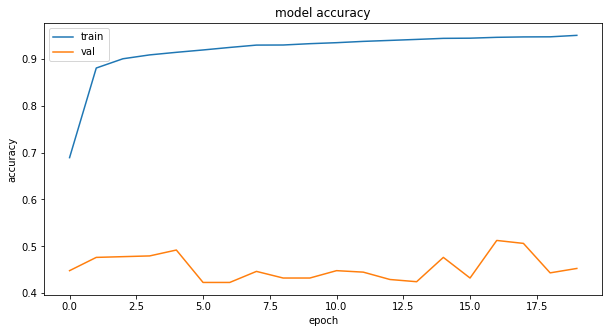

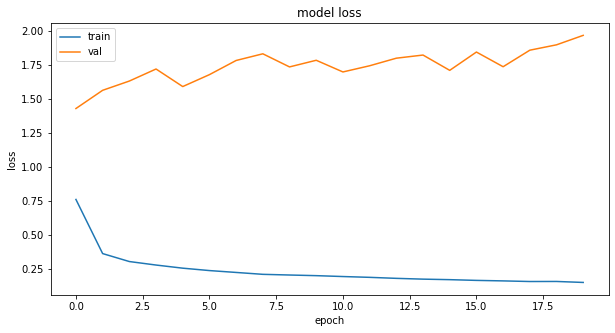

In [139]:

figure_1 = plt.figure(figsize=((10,5)))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
figure_2 = plt.figure(figsize=((10,5)))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Best so far (Leave one out)
### model = define_CNN_model_2(filters,kernel_size,window_size,n_features, n_classes)

#s1541031 - 159/159 [==============================] - 3s 18ms/step - loss: 0.6106 - accuracy: 0.7624 - val_loss: 1.2097 - val_accuracy: 0.5695
Epoch 30/400

#s1704145
Epoch 100/100
159/159 [==============================] - 2s 12ms/step - loss: 0.3188 - accuracy: 0.8775 - val_loss: 0.3718 - val_accuracy: 0.8514


#s1706154
Epoch 50/100
159/159 [==============================] - 2s 13ms/step - loss: 0.4778 - accuracy: 0.8072 - val_loss: 0.7150 - val_accuracy: 0.8221

#s1711661
Epoch 99/100
159/159 [==============================] - 3s 18ms/step - loss: 0.3149 - accuracy: 0.8762 - val_loss: 0.3597 - val_accuracy: 0.8784

In [398]:
loo_model_histories = {}
logo = LeaveOneGroupOut()

for train_ix, test_ix in logo.split(X_with_subject_id, y_with_subject_id, groups=X_with_subject_id.subject_id):
    

    X_train_df = X_with_subject_id.loc[train_ix]
    X_test_df = X_with_subject_id.loc[test_ix]

    y_train_df = y_with_subject_id.loc[train_ix]
    y_test_df = y_with_subject_id.loc[test_ix]
    
    window_size = 20 # 50 datapoints for the window size, which, at 25Hz, means 2 seconds
    step_size = 18 # this is 50% overlap (step_size=25)
    step_size_falling=18

    X_train_sliding_windows = group_into_sliding_windows(X_train_df,window_size,step_size,step_size_falling)
    X_test_sliding_windows = group_into_sliding_windows(X_test_df,window_size,step_size,step_size_falling)

    X_train_regenerated, y_train_regenerated = regenerate_data_from_sliding_windows(X_train_sliding_windows)
    X_test_regenerated, y_test_regenerated = regenerate_data_from_sliding_windows(X_test_sliding_windows)
    
    X_train, y_train, X_test, y_test = convert_values_to_numpy_array(X_train_regenerated, y_train_regenerated, X_test_regenerated, y_test_regenerated)


    print(f"Testing on subject id: {X_test_df.subject_id.unique()} ")


#     model = define_CNN_model(filters,kernel_size,window_size,n_features, n_classes)
    model = define_LSTM_model(window_size,n_features)
    # model = define_CNN_model_2(filters,kernel_size,window_size,n_features, n_classes)
    # model = define_CNN_LSTM_approach()
#     model = define_Bidirectional_LSTM_model(window_size,n_features)
    # model = define_simple_LSTM_model(window_size,n_features)

    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)


    model.compile(
      optimizer = optimizers.Adam(learning_rate=0.0005),
          loss="categorical_crossentropy",
    metrics = ['accuracy'])



    history = model.fit(X_train, y_train,
        batch_size=64, epochs=10, callbacks=[callback],
        validation_data=(X_test, y_test),
        )
    
    # stats
    y_pred_ohe = model.predict(X_test)
    y_pred_labels = np.argmax(y_pred_ohe, axis=1)
    y_true_labels = np.argmax(y_test, axis=1)
    print(y_pred_labels)
    
    print("*" * 80)
    print("Classification report")
    print("*" * 80)
    print(classification_report(y_true_labels, y_pred_labels))
    print(class_labels)
    
    loo_model_histories[X_test_df.subject_id.unique()[0]] = history


# 


Processing rid = Respeck_s1704145_Falling on knees_05-10-2021_12-52-17
3
Processing rid = Respeck_s1704145_Falling on knees_05-10-2021_12-52-32
4
Processing rid = Respeck_s1704145_Falling on knees_05-10-2021_12-52-40
6
Processing rid = Respeck_s1704145_Falling on knees_05-10-2021_12-52-48
5
Processing rid = Respeck_s1704145_Falling on knees_05-10-2021_12-53-14
5
Processing rid = Respeck_s1704145_Falling on knees_05-10-2021_12-53-32
5
Processing rid = Respeck_s1704145_Falling on knees_05-10-2021_12-53-41
5
Processing rid = Respeck_s1704145_Falling on knees_05-10-2021_12-53-48
4
Processing rid = Respeck_s1704145_Falling on the back_05-10-2021_12-55-01
3
Processing rid = Respeck_s1704145_Falling on the back_05-10-2021_12-55-09
4
Processing rid = Respeck_s1704145_Falling on the back_05-10-2021_12-55-17
3
Processing rid = Respeck_s1704145_Falling on the back_05-10-2021_12-55-24
3
Processing rid = Respeck_s1704145_Falling on the back_05-10-2021_12-55-30
3
Processing rid = Respeck_s1704145_Fa

Processing rid = Respeck_s1706154_Falling on the right_06-10-2021_12-47-20
2
Processing rid = Respeck_s1706154_Falling on the right_06-10-2021_12-47-25
3
Processing rid = Respeck_s1706154_Falling on the right_06-10-2021_12-47-30
2
Processing rid = Respeck_s1706154_Falling on the right_06-10-2021_12-50-15
2
Processing rid = Respeck_s1706154_Falling on the right_06-10-2021_12-50-19
1
Processing rid = Respeck_s1706154_Lying down left_05-10-2021_12-26-06
42
Processing rid = Respeck_s1706154_Lying down on back_05-10-2021_12-25-07
42
Processing rid = Respeck_s1706154_Lying down on stomach_05-10-2021_12-27-51
42
Processing rid = Respeck_s1706154_Lying down right_05-10-2021_12-26-56
42
Processing rid = Respeck_s1706154_Running_05-10-2021_12-29-15
42
Processing rid = Respeck_s1706154_Sitting bent backward_05-10-2021_12-23-22
42
Processing rid = Respeck_s1706154_Sitting bent forward_05-10-2021_12-22-40
42
Processing rid = Respeck_s1706154_Sitting_05-10-2021_12-21-52
42
Processing rid = Respeck_s

KeyboardInterrupt: 

In [110]:
avg_all_subjects = 0
for subject, history in loo_model_histories.items():
    print(subject , ": " , history.history['val_accuracy'][-1])
    avg_all_subjects += history.history['val_accuracy'][-1]

print("Model Accuracy - Leave one out: ", avg_all_subjects/len(loo_model_histories))

s1541031 :  0.8327272534370422
s1704145 :  0.98591548204422
s1706154 :  0.958781361579895
s1711661 :  0.998236358165741
s1718069 :  0.9830795526504517
s1721256 :  0.5634058117866516
s1724067 :  0.9885495901107788
Model Accuracy - Leave one out:  0.9015279156821114


## model = define_CNN_LSTM_approach()

Epoch 69/100
159/159 [==============================] - 1s 7ms/step - loss: 0.2718 - accuracy: 0.9107 - val_loss: 0.3340 - val_accuracy: 0.8491


We can now view the accuracy of our model on the test dataset.

In [228]:
# stats
y_pred_ohe = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_ohe, axis=1)
y_true_labels = np.argmax(y_test, axis=1)
print(y_pred_labels)

[0 0 0 ... 4 4 4]


In [229]:
print("*" * 80)
print("Classification report")
print("*" * 80)
print(classification_report(y_true_labels, y_pred_labels))
print(class_labels)

********************************************************************************
Classification report
********************************************************************************
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       780
           1       0.95      0.94      0.94      1482
           2       0.91      0.97      0.94       334
           3       0.92      0.94      0.93      1480
           4       0.90      0.75      0.81       335

    accuracy                           0.92      4411
   macro avg       0.91      0.90      0.91      4411
weighted avg       0.92      0.92      0.92      4411

{'Falling (Grouped)': 0, 'Lying (Grouped)': 1, 'Running': 2, 'Sitting/Standing': 3, 'Walking at normal speed': 4}


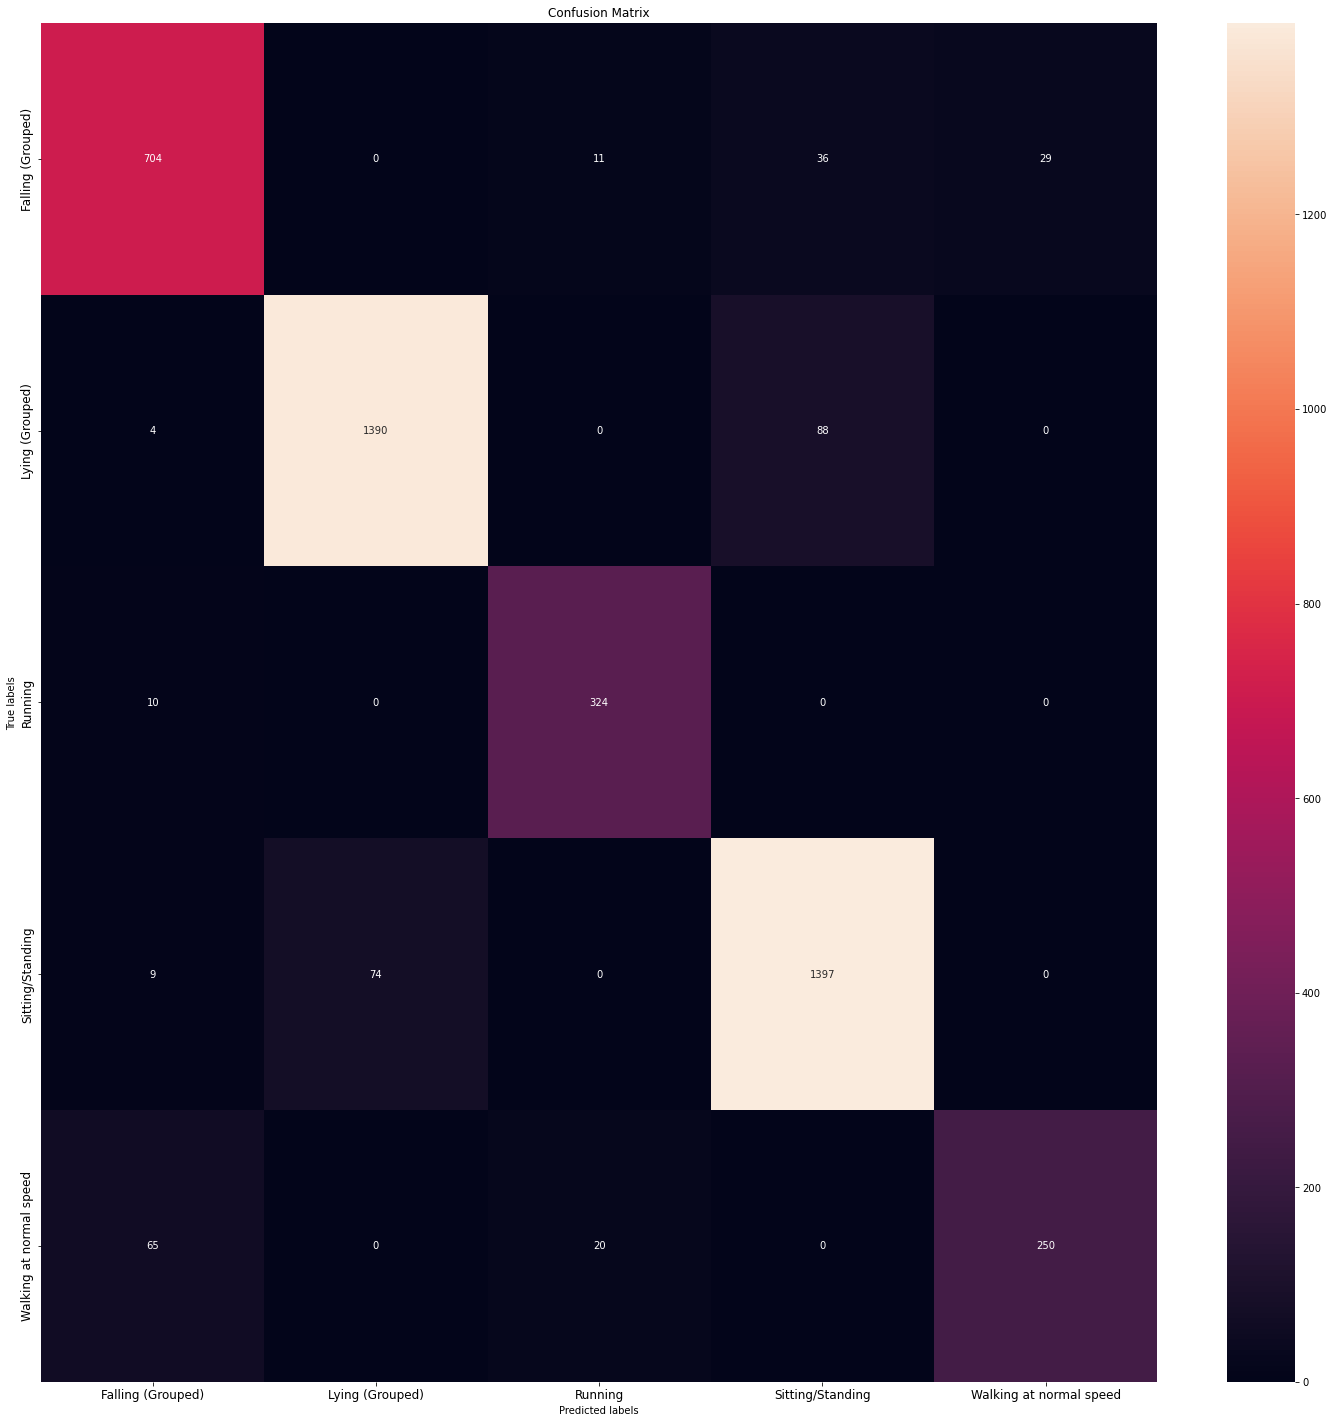

In [230]:
cm = confusion_matrix(y_true_labels,y_pred_labels)
fig, ax= plt.subplots(figsize=(25, 25))
# sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.tick_params(axis='both', which='major', labelsize=12)  # Adjust to fit
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(class_labels); ax.yaxis.set_ticklabels(class_labels);




NameError: name 'cm_normalized' is not defined

## Compute Hierarchy


## Compute best model over all test subjects

In [172]:
from sklearn.model_selection import LeaveOneGroupOut
subset_base_df = base_df

X_with_subject_id = subset_base_df[columns_of_interest_initial].reset_index(drop=True)
y_with_subject_id = subset_base_df['activity_code'].reset_index(drop=True)

#Split by subject id
logo = LeaveOneGroupOut()
logo_generator = logo.split(X_with_subject_id, y_with_subject_id, groups=X_with_subject_id.subject_id)




In [173]:
train_ix , test_ix = next(logo_generator)
X_train_df = X_with_subject_id.loc[train_ix]
X_test_df = X_with_subject_id.loc[test_ix]

window_size = 14 # 50 datapoints for the window size, which, at 25Hz, means 2 seconds
step_size = 8 # this is 50% overlap (step_size=25)

X_train_sliding_windows = group_into_sliding_windows(X_train_df,window_size,step_size)
X_test_sliding_windows = group_into_sliding_windows(X_test_df,window_size,step_size)

X_train_regenerated, y_train_regenerated = regenerate_data_from_sliding_windows(X_train_sliding_windows)
X_test_regenerated, y_test_regenerated = regenerate_data_from_sliding_windows(X_test_sliding_windows)

# #Convert categorical variable (labels) into dummy/indicator variables (one-hot encoding)
X_train, y_train, X_test, y_test = convert_values_to_numpy_array(X_train_regenerated, y_train_regenerated, X_test_regenerated, y_test_regenerated)

Processing rid = Respeck_s1704145_Climbing stairs_23-09-2021_11-34-34
94
Processing rid = Respeck_s1704145_Descending stairs_23-09-2021_11-30-25
94
Processing rid = Respeck_s1704145_Desk work_23-09-2021_11-44-47
94
Processing rid = Respeck_s1704145_Lying down left_23-09-2021_11-40-54
94
Processing rid = Respeck_s1704145_Lying down on back_23-09-2021_11-42-59
94
Processing rid = Respeck_s1704145_Lying down on stomach_05-10-2021_18-36-31
94
Processing rid = Respeck_s1704145_Lying down right_23-09-2021_11-41-34
94
Processing rid = Respeck_s1704145_Movement_23-09-2021_11-45-40
94
Processing rid = Respeck_s1704145_Running_23-09-2021_11-31-45
94
Processing rid = Respeck_s1704145_Sitting bent backward_23-09-2021_11-39-14
94
Processing rid = Respeck_s1704145_Sitting bent forward_23-09-2021_11-38-32
94
Processing rid = Respeck_s1704145_Sitting_23-09-2021_11-37-46
94
Processing rid = Respeck_s1704145_Standing_23-09-2021_11-40-05
94
Processing rid = Respeck_s1704145_Walking at normal speed_23-09-

Processing rid = Respeck_s1732873_Movement_04-10-2021_16-10-37
93
Processing rid = Respeck_s1732873_Running_04-10-2021_15-32-54
93
Processing rid = Respeck_s1732873_Sitting bent backward_04-10-2021_12-55-01
95
Processing rid = Respeck_s1732873_Sitting bent forward_04-10-2021_12-54-13
95
Processing rid = Respeck_s1732873_Sitting_04-10-2021_12-53-07
95
Processing rid = Respeck_s1732873_Standing_04-10-2021_12-55-45
91
Processing rid = Respeck_s1732873_Walking at normal speed_04-10-2021_15-30-06
94
Processing rid = Respeck_s1757177_Climbing stairs_06-10-2021_16-34-18
96
Processing rid = Respeck_s1757177_Descending stairs_02-10-2021_13-57-31
96
Processing rid = Respeck_s1757177_Desk work_02-10-2021_13-47-55
96
Processing rid = Respeck_s1757177_Lying down left_06-10-2021_20-37-42
96
Processing rid = Respeck_s1757177_Lying down on back_02-10-2021_19-55-43
96
Processing rid = Respeck_s1757177_Lying down on stomach_02-10-2021_20-00-57
96
Processing rid = Respeck_s1757177_Lying down right_06-10-

Processing rid = Respeck_s1823274_Lying down left_29-09-2021_12-26-28
96
Processing rid = Respeck_s1823274_Lying down on back_29-09-2021_12-25-45
95
Processing rid = Respeck_s1823274_Lying down on stomach_29-09-2021_12-27-51
96
Processing rid = Respeck_s1823274_Lying down right_29-09-2021_12-27-07
93
Processing rid = Respeck_s1823274_Movement_29-09-2021_12-34-25
95
Processing rid = Respeck_s1823274_Running_29-09-2021_15-11-43
95
Processing rid = Respeck_s1823274_Sitting bent backward_29-09-2021_12-22-22
95
Processing rid = Respeck_s1823274_Sitting bent forward_29-09-2021_12-21-37
95
Processing rid = Respeck_s1823274_Sitting_29-09-2021_12-20-53
95
Processing rid = Respeck_s1823274_Standing_29-09-2021_12-23-09
93
Processing rid = Respeck_s1823274_Walking at normal speed_29-09-2021_12-30-31
94
Processing rid = Respeck_s1824891_Climbing stairs_06-10-2021_17-03-00
95
Processing rid = Respeck_s1824891_Descending stairs_06-10-2021_17-01-27
95
Processing rid = Respeck_s1824891_Desk work_06-10-

93
Processing rid = Respeck_s1864705_Lying down on back_29-09-2021_20-51-06
93
Processing rid = Respeck_s1864705_Lying down on stomach_29-09-2021_20-55-09
88
Processing rid = Respeck_s1864705_Lying down right_06-10-2021_23-01-01
93
Processing rid = Respeck_s1864705_Movement_29-09-2021_21-48-22
93
Processing rid = Respeck_s1864705_Running_29-09-2021_21-47-40
93
Processing rid = Respeck_s1864705_Sitting bent backward_29-09-2021_20-46-59
93
Processing rid = Respeck_s1864705_Sitting bent forward_06-10-2021_23-02-03
93
Processing rid = Respeck_s1864705_Sitting_29-09-2021_20-44-14
93
Processing rid = Respeck_s1864705_Standing_29-09-2021_20-48-15
93
Processing rid = Respeck_s1864705_Walking at normal speed_29-09-2021_21-45-37
93
Processing rid = Respeck_s1865890_Climbing stairs_06-10-2021_10-01-56
96
Processing rid = Respeck_s1865890_Descending stairs_06-10-2021_10-03-51
96
Processing rid = Respeck_s1865890_Desk work_05-10-2021_18-26-33
94
Processing rid = Respeck_s1865890_Lying down left_05-

94
Processing rid = Respeck_s1894401_Sitting_01-10-2021_12-07-25
94
Processing rid = Respeck_s1894401_Standing_01-10-2021_12-04-49
93
Processing rid = Respeck_s1894401_Walking at normal speed_01-10-2021_12-18-36
94
Processing rid = Respeck_s1970333_Climbing stairs_13-10-2021_23-34-00
111
Processing rid = Respeck_s1970333_Descending stairs_13-10-2021_23-35-04
134
Processing rid = Respeck_s1970333_Desk work_13-10-2021_21-51-31
118
Processing rid = Respeck_s1970333_Lying down left_13-10-2021_21-32-18
133
Processing rid = Respeck_s1970333_Lying down on back_13-10-2021_21-35-14
155
Processing rid = Respeck_s1970333_Lying down on stomach_13-10-2021_21-39-42
170
Processing rid = Respeck_s1970333_Lying down right_13-10-2021_21-38-20
124
Processing rid = Respeck_s1970333_Movement_13-10-2021_21-54-21
127
Processing rid = Respeck_s1970333_Running_13-10-2021_22-08-22
114
Processing rid = Respeck_s1970333_Sitting bent backward_13-10-2021_21-26-03
108
Processing rid = Respeck_s1970333_Sitting bent f

94
Processing rid = Respeck_s2119637_Sitting_03-10-2021_23-13-48
94
Processing rid = Respeck_s2119637_Standing_03-10-2021_23-16-44
94
Processing rid = Respeck_s2119637_Walking at normal speed_03-10-2021_23-38-30
94
Processing rid = Respeck_s2125423_Desk work_03-10-2021_16-06-40
93
Processing rid = Respeck_s2125423_Lying down left_03-10-2021_15-55-43
94
Processing rid = Respeck_s2125423_Lying down on back_03-10-2021_15-59-06
93
Processing rid = Respeck_s2125423_Lying down on stomach_03-10-2021_16-01-39
93
Processing rid = Respeck_s2125423_Lying down right_03-10-2021_15-57-27
94
Processing rid = Respeck_s2125423_Movement_03-10-2021_16-04-42
93
Processing rid = Respeck_s2125423_Running_03-10-2021_17-35-53
94
Processing rid = Respeck_s2125423_Sitting bent backward_03-10-2021_15-52-10
93
Processing rid = Respeck_s2125423_Sitting bent forward_03-10-2021_15-50-43
94
Processing rid = Respeck_s2125423_Sitting_03-10-2021_15-49-17
94
Processing rid = Respeck_s2125423_Standing_03-10-2021_15-53-38


93
Processing rid = Respeck_s2171931_Walking at normal speed_29-09-2021_14-56-19
93
Processing rid = Respeck_s2173036_Climbing stairs_03-10-2021_23-05-39
95
Processing rid = Respeck_s2173036_Descending stairs_03-10-2021_23-01-56
94
Processing rid = Respeck_s2173036_Desk work_03-10-2021_22-46-58
95
Processing rid = Respeck_s2173036_Falling on knees_06-10-2021_13-39-32
4
Processing rid = Respeck_s2173036_Falling on knees_06-10-2021_13-39-33
3
Processing rid = Respeck_s2173036_Falling on knees_06-10-2021_13-39-34
2
Processing rid = Respeck_s2173036_Falling on knees_06-10-2021_13-39-35
4
Processing rid = Respeck_s2173036_Falling on knees_06-10-2021_13-39-36
3
Processing rid = Respeck_s2173036_Falling on knees_06-10-2021_13-39-37
2
Processing rid = Respeck_s2173036_Falling on knees_06-10-2021_13-39-38
2
Processing rid = Respeck_s2173036_Falling on knees_06-10-2021_13-39-39
4
Processing rid = Respeck_s2173036_Falling on knees_06-10-2021_13-39-40
4
Processing rid = Respeck_s2173036_Falling on

Processing rid = Respeck_s2211162_Lying down right_28-09-2021_10-29-37
94
Processing rid = Respeck_s2211162_Movement_28-09-2021_10-39-45
94
Processing rid = Respeck_s2211162_Running_28-09-2021_11-19-48
94
Processing rid = Respeck_s2211162_Sitting bent backward_28-09-2021_10-25-32
94
Processing rid = Respeck_s2211162_Sitting bent forward_28-09-2021_10-23-12
94
Processing rid = Respeck_s2211162_Sitting_28-09-2021_10-22-16
94
Processing rid = Respeck_s2211162_Standing_28-09-2021_10-26-50
94
Processing rid = Respeck_s2211162_Walking at normal speed_28-09-2021_11-03-08
94
Processing rid = Respeck_s2211228_Climbing stairs_07-10-2021_23-20-09
94
Processing rid = Respeck_s2211228_Descending stairs_07-10-2021_23-20-57
94
Processing rid = Respeck_s2211228_Desk work_06-10-2021_19-40-26
94
Processing rid = Respeck_s2211228_Lying down left_06-10-2021_19-44-52
94
Processing rid = Respeck_s2211228_Lying down on back_29-09-2021_16-35-03
94
Processing rid = Respeck_s2211228_Lying down on stomach_29-09-

In [175]:
print(f"Testing on subject id: {X_test_df.subject_id.unique()} ")

model = define_CNN_model_2(filters,kernel_size,window_size,n_features, n_classes)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)


model.compile(
  optimizer = optimizers.Adam(learning_rate=0.0001),
      loss="categorical_crossentropy",
metrics = ['accuracy'])



history = model.fit(X_train, y_train,
    batch_size=64, epochs=50, callbacks=[callback],
    validation_data=(X_test, y_test),
    )

y_pred_ohe = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_ohe, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_labels,y_pred_labels)
fig, ax= plt.subplots(figsize=(25, 25))
# sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.tick_params(axis='both', which='major', labelsize=12)  # Adjust to fit
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(class_labels); ax.yaxis.set_ticklabels(class_labels);



Testing on subject id: ['s1541031'] 
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 12, 64)            1216      
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 10, 64)            12352     
_________________________________________________________________
dropout_3 (Dropout)          (None, 10, 64)            0         
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 5, 64)             0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 320)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               32100     
_________________________________________________________________
dense_7 (Dense)  

KeyboardInterrupt: 

## Conclusion

You are now ready to start developing your own models for HAR. There are numerous tutorials online which you can follow to build models like LSTMs, CNNs, RFCs and many others. 

You have a wide choice of ways to solve this classification model. Here are a few things to think about:

* What type of preprocessing do you want to apply to your data? Examples include:
    * smoothing the sensor axes
    * performing axis fusion
    * extracting scalograms from the signal
    * manually extracting features from the signal
    * choosing to leave out certain axes

* What type of model do you want to train?
    * simple ML model
    * deep learning model
    
* Do you want a hierarchical model or a flat model?
    * hierarchical models means you don't have to train the same type of model for each activity
    * a flat model might be faster to train and apply in real time

## Save Model

In [69]:
models_directory = './models/'
current_model_path = models_directory + 'CNN_model_HAR_v4_accuracy_93/'

# tflite_model_filename = 'CNN_HAR_v1.tflite'#default features | Note: split randomly (around 40%)
# tflite_model_filename = 'CNN_HAR_v2.tflite' #default features + added dropout| Note: split by subject id, but sliding windows were grouped by activity_code (not good, mixed results)
# tflite_model_filename = 'CNN_HAR_v2_acc_86.tflite' #86 percent- information on this above
tflite_model_filename = 'CNN_HAR_v4_acc_93.tflite' #93 percent- Leave one out = Only 5 labels


In [70]:
#Save original model first. We will use the SavedModel to convert it to TFLite as recommended by the Tensorflow documentation.
tf.saved_model.save(model, current_model_path)

2021-11-18 20:12:26.127716: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./models/CNN_model_HAR_v4_accuracy_93/assets


## Convert SavedModel to TFLite

In [71]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model(current_model_path) # path to the SavedModel directory
tflite_model = converter.convert()
# Save the model.
with open(current_model_path+tflite_model_filename, 'wb') as f:
    f.write(tflite_model)

2021-11-18 20:12:30.470397: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:316] Ignored output_format.
2021-11-18 20:12:30.470435: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:319] Ignored drop_control_dependency.
2021-11-18 20:12:30.470443: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:325] Ignored change_concat_input_ranges.
2021-11-18 20:12:30.471290: I tensorflow/cc/saved_model/reader.cc:32] Reading SavedModel from: ./models/CNN_model_HAR_v4_accuracy_93/
2021-11-18 20:12:30.476544: I tensorflow/cc/saved_model/reader.cc:55] Reading meta graph with tags { serve }
2021-11-18 20:12:30.476580: I tensorflow/cc/saved_model/reader.cc:93] Reading SavedModel debug info (if present) from: ./models/CNN_model_HAR_v4_accuracy_93/
2021-11-18 20:12:30.476652: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2

## Quick Test on Python - Tensorflow Lite




In [351]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path=current_model_path+tflite_model_filename)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test model on random input data.
input_shape = input_details[0]['shape']
print("Input Shape")
print(input_shape)
test = X_test.astype(np.float32)
#Test data to feed as parameter
test_part = test[2:3]
print("See Test Shape")
print(test_part.shape)

interpreter.set_tensor(input_details[0]['index'], test_part)

interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])
output_results = np.squeeze(output_data)

print("Current output results")
print(output_results)
print(len(output_results))

print("Which is the most confident?")
max_index = np.argmax(output_results, axis=0)

print(max_index)



Input Shape
[ 1 22  6]
See Test Shape
(1, 22, 6)
Current output results
[9.4592655e-01 1.8510664e-03 2.0039419e-04 1.8852131e-06 5.1802486e-02
 5.8688329e-05 1.4491353e-04 1.4034421e-05]
8
Which is the most confident?
0
